In [10]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


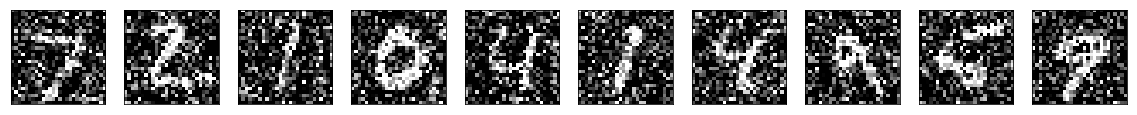

In [13]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [17]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])


Train on 60000 samples, validate on 10000 samples


Epoch 1/100


  128/60000 [..............................] - ETA: 399s - loss: 0.7029

  512/60000 [..............................] - ETA: 106s - loss: 0.6832

  768/60000 [..............................] - ETA: 74s - loss: 0.6641 



 1152/60000 [..............................] - ETA: 53s - loss: 0.6266



 1536/60000 [..............................] - ETA: 41s - loss: 0.5993



 1920/60000 [..............................] - ETA: 35s - loss: 0.5779



 2304/60000 [>.............................] - ETA: 30s - loss: 0.5619



 2688/60000 [>.............................] - ETA: 27s - loss: 0.5485



 3072/60000 [>.............................] - ETA: 25s - loss: 0.5363



 3456/60000 [>.............................] - ETA: 23s - loss: 0.5241



 3840/60000 [>.............................] - ETA: 21s - loss: 0.5135

 4224/60000 [=>............................] - ETA: 20s - loss: 0.5040

 4608/60000 [=>............................] - ETA: 19s - loss: 0.4953



 4864/60000 [=>............................] - ETA: 19s - loss: 0.4897



 5248/60000 [=>............................] - ETA: 18s - loss: 0.4821



 5632/60000 [=>............................] - ETA: 17s - loss: 0.4718

 6016/60000 [==>...........................] - ETA: 16s - loss: 0.4645



 6400/60000 [==>...........................] - ETA: 16s - loss: 0.4587

 6656/60000 [==>...........................] - ETA: 15s - loss: 0.4521

 7040/60000 [==>...........................] - ETA: 15s - loss: 0.4453

 7424/60000 [==>...........................] - ETA: 15s - loss: 0.4355



 7808/60000 [==>...........................] - ETA: 14s - loss: 0.4262

 8192/60000 [===>..........................] - ETA: 14s - loss: 0.4227



 8448/60000 [===>..........................] - ETA: 14s - loss: 0.4176



 8832/60000 [===>..........................] - ETA: 13s - loss: 0.4106

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.4063

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.4021

 9728/60000 [===>..........................] - ETA: 13s - loss: 0.3959

10112/60000 [====>.........................] - ETA: 13s - loss: 0.3900



10368/60000 [====>.........................] - ETA: 12s - loss: 0.3863



10624/60000 [====>.........................] - ETA: 12s - loss: 0.3826

11008/60000 [====>.........................] - ETA: 12s - loss: 0.3780



11392/60000 [====>.........................] - ETA: 12s - loss: 0.3725



11648/60000 [====>.........................] - ETA: 12s - loss: 0.3692



12032/60000 [=====>........................] - ETA: 11s - loss: 0.3647



12416/60000 [=====>........................] - ETA: 11s - loss: 0.3604

12800/60000 [=====>........................] - ETA: 11s - loss: 0.3561



13184/60000 [=====>........................] - ETA: 11s - loss: 0.3518



13568/60000 [=====>........................] - ETA: 11s - loss: 0.3478



13952/60000 [=====>........................] - ETA: 10s - loss: 0.3440



14336/60000 [======>.......................] - ETA: 10s - loss: 0.3403



14720/60000 [======>.......................] - ETA: 10s - loss: 0.3366



15104/60000 [======>.......................] - ETA: 10s - loss: 0.3333



15488/60000 [======>.......................] - ETA: 10s - loss: 0.3300



15872/60000 [======>.......................] - ETA: 10s - loss: 0.3269



16256/60000 [=======>......................] - ETA: 9s - loss: 0.3238 



16640/60000 [=======>......................] - ETA: 9s - loss: 0.3207



17024/60000 [=======>......................] - ETA: 9s - loss: 0.3178



17408/60000 [=======>......................] - ETA: 9s - loss: 0.3151



17792/60000 [=======>......................] - ETA: 9s - loss: 0.3123

18176/60000 [========>.....................] - ETA: 9s - loss: 0.3096

18560/60000 [========>.....................] - ETA: 9s - loss: 0.3070



18944/60000 [========>.....................] - ETA: 9s - loss: 0.3047



19328/60000 [========>.....................] - ETA: 8s - loss: 0.3022

19712/60000 [========>.....................] - ETA: 8s - loss: 0.2998

20096/60000 [=========>....................] - ETA: 8s - loss: 0.2975

20480/60000 [=========>....................] - ETA: 8s - loss: 0.2953



20864/60000 [=========>....................] - ETA: 8s - loss: 0.2931

21248/60000 [=========>....................] - ETA: 8s - loss: 0.2911

21632/60000 [=========>....................] - ETA: 8s - loss: 0.2890



21888/60000 [=========>....................] - ETA: 8s - loss: 0.2875

22272/60000 [==========>...................] - ETA: 8s - loss: 0.2855



22656/60000 [==========>...................] - ETA: 7s - loss: 0.2838

23040/60000 [==========>...................] - ETA: 7s - loss: 0.2820



23296/60000 [==========>...................] - ETA: 7s - loss: 0.2807



23552/60000 [==========>...................] - ETA: 7s - loss: 0.2795

23808/60000 [==========>...................] - ETA: 7s - loss: 0.2782



24064/60000 [===========>..................] - ETA: 7s - loss: 0.2771

24320/60000 [===========>..................] - ETA: 7s - loss: 0.2761



24704/60000 [===========>..................] - ETA: 7s - loss: 0.2744

24960/60000 [===========>..................] - ETA: 7s - loss: 0.2733



25344/60000 [===========>..................] - ETA: 7s - loss: 0.2716

25728/60000 [===========>..................] - ETA: 7s - loss: 0.2700



26112/60000 [============>.................] - ETA: 7s - loss: 0.2685



26368/60000 [============>.................] - ETA: 7s - loss: 0.2675

26624/60000 [============>.................] - ETA: 7s - loss: 0.2665

27008/60000 [============>.................] - ETA: 6s - loss: 0.2650



27392/60000 [============>.................] - ETA: 6s - loss: 0.2635

27776/60000 [============>.................] - ETA: 6s - loss: 0.2621

28160/60000 [=============>................] - ETA: 6s - loss: 0.2608

28544/60000 [=============>................] - ETA: 6s - loss: 0.2595

28928/60000 [=============>................] - ETA: 6s - loss: 0.2582

29312/60000 [=============>................] - ETA: 6s - loss: 0.2568



29696/60000 [=============>................] - ETA: 6s - loss: 0.2554



30080/60000 [==============>...............] - ETA: 6s - loss: 0.2542

30464/60000 [==============>...............] - ETA: 6s - loss: 0.2531



30720/60000 [==============>...............] - ETA: 6s - loss: 0.2523



31104/60000 [==============>...............] - ETA: 5s - loss: 0.2511

31488/60000 [==============>...............] - ETA: 5s - loss: 0.2499



31872/60000 [==============>...............] - ETA: 5s - loss: 0.2488

32256/60000 [===============>..............] - ETA: 5s - loss: 0.2476



32512/60000 [===============>..............] - ETA: 5s - loss: 0.2470



32768/60000 [===============>..............] - ETA: 5s - loss: 0.2462



33024/60000 [===============>..............] - ETA: 5s - loss: 0.2456

33152/60000 [===============>..............] - ETA: 5s - loss: 0.2452

33408/60000 [===============>..............] - ETA: 5s - loss: 0.2445

33536/60000 [===============>..............] - ETA: 5s - loss: 0.2441



33664/60000 [===============>..............] - ETA: 5s - loss: 0.2438



33792/60000 [===============>..............] - ETA: 5s - loss: 0.2434



34176/60000 [================>.............] - ETA: 5s - loss: 0.2424

34560/60000 [================>.............] - ETA: 5s - loss: 0.2414

34944/60000 [================>.............] - ETA: 5s - loss: 0.2405

35328/60000 [================>.............] - ETA: 5s - loss: 0.2395

35712/60000 [================>.............] - ETA: 5s - loss: 0.2386

36096/60000 [=================>............] - ETA: 4s - loss: 0.2376

36480/60000 [=================>............] - ETA: 4s - loss: 0.2367



36736/60000 [=================>............] - ETA: 4s - loss: 0.2361



37120/60000 [=================>............] - ETA: 4s - loss: 0.2352

37504/60000 [=================>............] - ETA: 4s - loss: 0.2342



37888/60000 [=================>............] - ETA: 4s - loss: 0.2334



38272/60000 [==================>...........] - ETA: 4s - loss: 0.2325



38656/60000 [==================>...........] - ETA: 4s - loss: 0.2317



39040/60000 [==================>...........] - ETA: 4s - loss: 0.2309



39424/60000 [==================>...........] - ETA: 4s - loss: 0.2300



39808/60000 [==================>...........] - ETA: 4s - loss: 0.2292



40192/60000 [===================>..........] - ETA: 4s - loss: 0.2284



40576/60000 [===================>..........] - ETA: 3s - loss: 0.2277

40960/60000 [===================>..........] - ETA: 3s - loss: 0.2269

41344/60000 [===================>..........] - ETA: 3s - loss: 0.2261



41472/60000 [===================>..........] - ETA: 3s - loss: 0.2258



41856/60000 [===================>..........] - ETA: 3s - loss: 0.2251

42112/60000 [====================>.........] - ETA: 3s - loss: 0.2246

42368/60000 [====================>.........] - ETA: 3s - loss: 0.2240

42624/60000 [====================>.........] - ETA: 3s - loss: 0.2235

43008/60000 [====================>.........] - ETA: 3s - loss: 0.2228



43392/60000 [====================>.........] - ETA: 3s - loss: 0.2221

43776/60000 [====================>.........] - ETA: 3s - loss: 0.2214



44160/60000 [=====================>........] - ETA: 3s - loss: 0.2207



44544/60000 [=====================>........] - ETA: 3s - loss: 0.2200



44928/60000 [=====================>........] - ETA: 3s - loss: 0.2194



45312/60000 [=====================>........] - ETA: 2s - loss: 0.2187



45696/60000 [=====================>........] - ETA: 2s - loss: 0.2180

46080/60000 [======================>.......] - ETA: 2s - loss: 0.2174

46464/60000 [======================>.......] - ETA: 2s - loss: 0.2168



46848/60000 [======================>.......] - ETA: 2s - loss: 0.2162

47232/60000 [======================>.......] - ETA: 2s - loss: 0.2156

47616/60000 [======================>.......] - ETA: 2s - loss: 0.2150



48000/60000 [=======================>......] - ETA: 2s - loss: 0.2144



48384/60000 [=======================>......] - ETA: 2s - loss: 0.2138



48768/60000 [=======================>......] - ETA: 2s - loss: 0.2132



49152/60000 [=======================>......] - ETA: 2s - loss: 0.2126



49536/60000 [=======================>......] - ETA: 2s - loss: 0.2121



49920/60000 [=======================>......] - ETA: 2s - loss: 0.2115



50304/60000 [========================>.....] - ETA: 1s - loss: 0.2110



50560/60000 [========================>.....] - ETA: 1s - loss: 0.2106



50944/60000 [========================>.....] - ETA: 1s - loss: 0.2101



51200/60000 [========================>.....] - ETA: 1s - loss: 0.2097



51584/60000 [========================>.....] - ETA: 1s - loss: 0.2091

51840/60000 [========================>.....] - ETA: 1s - loss: 0.2088

52224/60000 [=========================>....] - ETA: 1s - loss: 0.2083

52480/60000 [=========================>....] - ETA: 1s - loss: 0.2080



52864/60000 [=========================>....] - ETA: 1s - loss: 0.2074



53248/60000 [=========================>....] - ETA: 1s - loss: 0.2069



53504/60000 [=========================>....] - ETA: 1s - loss: 0.2066

53760/60000 [=========================>....] - ETA: 1s - loss: 0.2063

54144/60000 [==========================>...] - ETA: 1s - loss: 0.2058

54400/60000 [==========================>...] - ETA: 1s - loss: 0.2054



54784/60000 [==========================>...] - ETA: 1s - loss: 0.2049

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2046



55296/60000 [==========================>...] - ETA: 0s - loss: 0.2043

55680/60000 [==========================>...] - ETA: 0s - loss: 0.2038



55936/60000 [==========================>...] - ETA: 0s - loss: 0.2035



56320/60000 [===========================>..] - ETA: 0s - loss: 0.2030

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2027



56960/60000 [===========================>..] - ETA: 0s - loss: 0.2023



57344/60000 [===========================>..] - ETA: 0s - loss: 0.2018

57728/60000 [===========================>..] - ETA: 0s - loss: 0.2014



58112/60000 [============================>.] - ETA: 0s - loss: 0.2010

58496/60000 [============================>.] - ETA: 0s - loss: 0.2005

58752/60000 [============================>.] - ETA: 0s - loss: 0.2002

59136/60000 [============================>.] - ETA: 0s - loss: 0.1998



59520/60000 [============================>.] - ETA: 0s - loss: 0.1993



59904/60000 [============================>.] - ETA: 0s - loss: 0.1989

60000/60000 [==============================] - 12s - loss: 0.1988 - val_loss: 0.1327


Epoch 2/100
  128/60000 [..............................] - ETA: 13s - loss: 0.1353

  384/60000 [..............................] - ETA: 12s - loss: 0.1337

  768/60000 [..............................] - ETA: 10s - loss: 0.1316



 1152/60000 [..............................] - ETA: 10s - loss: 0.1304



 1536/60000 [..............................] - ETA: 10s - loss: 0.1304



 1920/60000 [..............................] - ETA: 10s - loss: 0.1313



 2304/60000 [>.............................] - ETA: 9s - loss: 0.1318 



 2688/60000 [>.............................] - ETA: 9s - loss: 0.1321



 3072/60000 [>.............................] - ETA: 9s - loss: 0.1320



 3456/60000 [>.............................] - ETA: 9s - loss: 0.1320

 3712/60000 [>.............................] - ETA: 9s - loss: 0.1319



 4096/60000 [=>............................] - ETA: 9s - loss: 0.1321

 4352/60000 [=>............................] - ETA: 9s - loss: 0.1320



 4608/60000 [=>............................] - ETA: 9s - loss: 0.1322



 4864/60000 [=>............................] - ETA: 10s - loss: 0.1321

 5120/60000 [=>............................] - ETA: 10s - loss: 0.1322

 5376/60000 [=>............................] - ETA: 10s - loss: 0.1321

 5760/60000 [=>............................] - ETA: 10s - loss: 0.1321



 6016/60000 [==>...........................] - ETA: 10s - loss: 0.1322

 6400/60000 [==>...........................] - ETA: 10s - loss: 0.1321



 6784/60000 [==>...........................] - ETA: 10s - loss: 0.1321



 7168/60000 [==>...........................] - ETA: 10s - loss: 0.1321

 7552/60000 [==>...........................] - ETA: 10s - loss: 0.1320

 7936/60000 [==>...........................] - ETA: 9s - loss: 0.1319 



 8320/60000 [===>..........................] - ETA: 9s - loss: 0.1318

 8704/60000 [===>..........................] - ETA: 9s - loss: 0.1315

 9088/60000 [===>..........................] - ETA: 9s - loss: 0.1316



 9472/60000 [===>..........................] - ETA: 9s - loss: 0.1317



 9856/60000 [===>..........................] - ETA: 9s - loss: 0.1317

10240/60000 [====>.........................] - ETA: 9s - loss: 0.1315



10624/60000 [====>.........................] - ETA: 9s - loss: 0.1314



11008/60000 [====>.........................] - ETA: 8s - loss: 0.1311



11392/60000 [====>.........................] - ETA: 8s - loss: 0.1310



11776/60000 [====>.........................] - ETA: 8s - loss: 0.1309



12160/60000 [=====>........................] - ETA: 8s - loss: 0.1310



12416/60000 [=====>........................] - ETA: 8s - loss: 0.1309

12672/60000 [=====>........................] - ETA: 8s - loss: 0.1308

12928/60000 [=====>........................] - ETA: 8s - loss: 0.1308

13312/60000 [=====>........................] - ETA: 8s - loss: 0.1307



13696/60000 [=====>........................] - ETA: 8s - loss: 0.1305



14080/60000 [======>.......................] - ETA: 8s - loss: 0.1304



14464/60000 [======>.......................] - ETA: 8s - loss: 0.1305



14848/60000 [======>.......................] - ETA: 8s - loss: 0.1305



15104/60000 [======>.......................] - ETA: 8s - loss: 0.1304

15360/60000 [======>.......................] - ETA: 8s - loss: 0.1303

15616/60000 [======>.......................] - ETA: 8s - loss: 0.1302

16000/60000 [=======>......................] - ETA: 8s - loss: 0.1301



16384/60000 [=======>......................] - ETA: 7s - loss: 0.1301



16768/60000 [=======>......................] - ETA: 7s - loss: 0.1301



17152/60000 [=======>......................] - ETA: 7s - loss: 0.1300



17408/60000 [=======>......................] - ETA: 7s - loss: 0.1300



17792/60000 [=======>......................] - ETA: 7s - loss: 0.1299



18176/60000 [========>.....................] - ETA: 7s - loss: 0.1299



18560/60000 [========>.....................] - ETA: 7s - loss: 0.1299

18944/60000 [========>.....................] - ETA: 7s - loss: 0.1297

19328/60000 [========>.....................] - ETA: 7s - loss: 0.1297

19712/60000 [========>.....................] - ETA: 7s - loss: 0.1296



20096/60000 [=========>....................] - ETA: 7s - loss: 0.1295

20480/60000 [=========>....................] - ETA: 7s - loss: 0.1295

20864/60000 [=========>....................] - ETA: 7s - loss: 0.1294



21248/60000 [=========>....................] - ETA: 6s - loss: 0.1293



21632/60000 [=========>....................] - ETA: 6s - loss: 0.1294



22016/60000 [==========>...................] - ETA: 6s - loss: 0.1293

22400/60000 [==========>...................] - ETA: 6s - loss: 0.1292

22784/60000 [==========>...................] - ETA: 6s - loss: 0.1291



23168/60000 [==========>...................] - ETA: 6s - loss: 0.1291

23552/60000 [==========>...................] - ETA: 6s - loss: 0.1290



23808/60000 [==========>...................] - ETA: 6s - loss: 0.1290



24192/60000 [===========>..................] - ETA: 6s - loss: 0.1289



24576/60000 [===========>..................] - ETA: 6s - loss: 0.1288



24960/60000 [===========>..................] - ETA: 6s - loss: 0.1287



25344/60000 [===========>..................] - ETA: 6s - loss: 0.1286

25600/60000 [===========>..................] - ETA: 6s - loss: 0.1286

25984/60000 [===========>..................] - ETA: 6s - loss: 0.1285

26368/60000 [============>.................] - ETA: 6s - loss: 0.1284

26752/60000 [============>.................] - ETA: 6s - loss: 0.1283



27136/60000 [============>.................] - ETA: 5s - loss: 0.1282



27392/60000 [============>.................] - ETA: 5s - loss: 0.1282

27648/60000 [============>.................] - ETA: 5s - loss: 0.1282

27904/60000 [============>.................] - ETA: 5s - loss: 0.1281

28288/60000 [=============>................] - ETA: 5s - loss: 0.1280

28672/60000 [=============>................] - ETA: 5s - loss: 0.1279



29056/60000 [=============>................] - ETA: 5s - loss: 0.1279

29440/60000 [=============>................] - ETA: 5s - loss: 0.1278

29824/60000 [=============>................] - ETA: 5s - loss: 0.1278

30208/60000 [==============>...............] - ETA: 5s - loss: 0.1277

30592/60000 [==============>...............] - ETA: 5s - loss: 0.1277

30976/60000 [==============>...............] - ETA: 5s - loss: 0.1276



31360/60000 [==============>...............] - ETA: 5s - loss: 0.1275



31744/60000 [==============>...............] - ETA: 5s - loss: 0.1274



32000/60000 [===============>..............] - ETA: 5s - loss: 0.1274

32256/60000 [===============>..............] - ETA: 5s - loss: 0.1274

32512/60000 [===============>..............] - ETA: 4s - loss: 0.1274

32896/60000 [===============>..............] - ETA: 4s - loss: 0.1273



33280/60000 [===============>..............] - ETA: 4s - loss: 0.1273

33664/60000 [===============>..............] - ETA: 4s - loss: 0.1272



34048/60000 [================>.............] - ETA: 4s - loss: 0.1271



34432/60000 [================>.............] - ETA: 4s - loss: 0.1271

34688/60000 [================>.............] - ETA: 4s - loss: 0.1270

34944/60000 [================>.............] - ETA: 4s - loss: 0.1269

35328/60000 [================>.............] - ETA: 4s - loss: 0.1269



35584/60000 [================>.............] - ETA: 4s - loss: 0.1269

35840/60000 [================>.............] - ETA: 4s - loss: 0.1268

36224/60000 [=================>............] - ETA: 4s - loss: 0.1268



36608/60000 [=================>............] - ETA: 4s - loss: 0.1267



36864/60000 [=================>............] - ETA: 4s - loss: 0.1267

37248/60000 [=================>............] - ETA: 4s - loss: 0.1266

37504/60000 [=================>............] - ETA: 4s - loss: 0.1265



37888/60000 [=================>............] - ETA: 4s - loss: 0.1265

38144/60000 [==================>...........] - ETA: 3s - loss: 0.1265



38528/60000 [==================>...........] - ETA: 3s - loss: 0.1265

38784/60000 [==================>...........] - ETA: 3s - loss: 0.1265

39040/60000 [==================>...........] - ETA: 3s - loss: 0.1264

39424/60000 [==================>...........] - ETA: 3s - loss: 0.1264



39808/60000 [==================>...........] - ETA: 3s - loss: 0.1263

40192/60000 [===================>..........] - ETA: 3s - loss: 0.1263

40576/60000 [===================>..........] - ETA: 3s - loss: 0.1262



40960/60000 [===================>..........] - ETA: 3s - loss: 0.1262

41344/60000 [===================>..........] - ETA: 3s - loss: 0.1261



41728/60000 [===================>..........] - ETA: 3s - loss: 0.1260



42112/60000 [====================>.........] - ETA: 3s - loss: 0.1260



42496/60000 [====================>.........] - ETA: 3s - loss: 0.1259

42880/60000 [====================>.........] - ETA: 3s - loss: 0.1259

43264/60000 [====================>.........] - ETA: 3s - loss: 0.1258



43648/60000 [====================>.........] - ETA: 2s - loss: 0.1258



43904/60000 [====================>.........] - ETA: 2s - loss: 0.1257



44160/60000 [=====================>........] - ETA: 2s - loss: 0.1257

44416/60000 [=====================>........] - ETA: 2s - loss: 0.1257

44672/60000 [=====================>........] - ETA: 2s - loss: 0.1257

45056/60000 [=====================>........] - ETA: 2s - loss: 0.1256



45440/60000 [=====================>........] - ETA: 2s - loss: 0.1256

45824/60000 [=====================>........] - ETA: 2s - loss: 0.1255

46208/60000 [======================>.......] - ETA: 2s - loss: 0.1255

46592/60000 [======================>.......] - ETA: 2s - loss: 0.1254

46976/60000 [======================>.......] - ETA: 2s - loss: 0.1254



47360/60000 [======================>.......] - ETA: 2s - loss: 0.1253



47616/60000 [======================>.......] - ETA: 2s - loss: 0.1253



48000/60000 [=======================>......] - ETA: 2s - loss: 0.1253



48384/60000 [=======================>......] - ETA: 2s - loss: 0.1252

48640/60000 [=======================>......] - ETA: 2s - loss: 0.1251

49024/60000 [=======================>......] - ETA: 1s - loss: 0.1251



49408/60000 [=======================>......] - ETA: 1s - loss: 0.1251



49792/60000 [=======================>......] - ETA: 1s - loss: 0.1250

50176/60000 [========================>.....] - ETA: 1s - loss: 0.1250



50560/60000 [========================>.....] - ETA: 1s - loss: 0.1250

50944/60000 [========================>.....] - ETA: 1s - loss: 0.1249



51328/60000 [========================>.....] - ETA: 1s - loss: 0.1249

51712/60000 [========================>.....] - ETA: 1s - loss: 0.1249

51968/60000 [========================>.....] - ETA: 1s - loss: 0.1248

52352/60000 [=========================>....] - ETA: 1s - loss: 0.1248

52736/60000 [=========================>....] - ETA: 1s - loss: 0.1248

53120/60000 [=========================>....] - ETA: 1s - loss: 0.1247

53504/60000 [=========================>....] - ETA: 1s - loss: 0.1247



53888/60000 [=========================>....] - ETA: 1s - loss: 0.1246



54272/60000 [==========================>...] - ETA: 1s - loss: 0.1246



54656/60000 [==========================>...] - ETA: 0s - loss: 0.1246



55040/60000 [==========================>...] - ETA: 0s - loss: 0.1246



55424/60000 [==========================>...] - ETA: 0s - loss: 0.1245



55808/60000 [==========================>...] - ETA: 0s - loss: 0.1245



56192/60000 [===========================>..] - ETA: 0s - loss: 0.1245



56448/60000 [===========================>..] - ETA: 0s - loss: 0.1245

56704/60000 [===========================>..] - ETA: 0s - loss: 0.1244

56960/60000 [===========================>..] - ETA: 0s - loss: 0.1244

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1244

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1243

58112/60000 [============================>.] - ETA: 0s - loss: 0.1243

58496/60000 [============================>.] - ETA: 0s - loss: 0.1242

58880/60000 [============================>.] - ETA: 0s - loss: 0.1242

59264/60000 [============================>.] - ETA: 0s - loss: 0.1242



59648/60000 [============================>.] - ETA: 0s - loss: 0.1241

60000/60000 [==============================] - 11s - loss: 0.1241 - val_loss: 0.1152


Epoch 3/100
  128/60000 [..............................] - ETA: 9s - loss: 0.1162

  512/60000 [..............................] - ETA: 9s - loss: 0.1163

  896/60000 [..............................] - ETA: 9s - loss: 0.1162



 1280/60000 [..............................] - ETA: 9s - loss: 0.1166



 1664/60000 [..............................] - ETA: 9s - loss: 0.1172



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1173



 2432/60000 [>.............................] - ETA: 9s - loss: 0.1175



 2816/60000 [>.............................] - ETA: 9s - loss: 0.1176



 3200/60000 [>.............................] - ETA: 9s - loss: 0.1177



 3584/60000 [>.............................] - ETA: 9s - loss: 0.1178



 3968/60000 [>.............................] - ETA: 9s - loss: 0.1181



 4224/60000 [=>............................] - ETA: 9s - loss: 0.1181



 4608/60000 [=>............................] - ETA: 9s - loss: 0.1181



 4864/60000 [=>............................] - ETA: 9s - loss: 0.1179

 5120/60000 [=>............................] - ETA: 9s - loss: 0.1177



 5504/60000 [=>............................] - ETA: 9s - loss: 0.1175

 5760/60000 [=>............................] - ETA: 9s - loss: 0.1175

 6016/60000 [==>...........................] - ETA: 9s - loss: 0.1176

 6400/60000 [==>...........................] - ETA: 9s - loss: 0.1176



 6784/60000 [==>...........................] - ETA: 9s - loss: 0.1175



 7168/60000 [==>...........................] - ETA: 9s - loss: 0.1175



 7552/60000 [==>...........................] - ETA: 9s - loss: 0.1176

 7936/60000 [==>...........................] - ETA: 8s - loss: 0.1176



 8320/60000 [===>..........................] - ETA: 8s - loss: 0.1177



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1177

 8832/60000 [===>..........................] - ETA: 8s - loss: 0.1177



 9088/60000 [===>..........................] - ETA: 9s - loss: 0.1176



 9472/60000 [===>..........................] - ETA: 8s - loss: 0.1176

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1176



10112/60000 [====>.........................] - ETA: 8s - loss: 0.1176



10496/60000 [====>.........................] - ETA: 8s - loss: 0.1175



10880/60000 [====>.........................] - ETA: 8s - loss: 0.1173

11264/60000 [====>.........................] - ETA: 8s - loss: 0.1173

11648/60000 [====>.........................] - ETA: 8s - loss: 0.1173



12032/60000 [=====>........................] - ETA: 8s - loss: 0.1173



12416/60000 [=====>........................] - ETA: 8s - loss: 0.1173

12800/60000 [=====>........................] - ETA: 8s - loss: 0.1173

13184/60000 [=====>........................] - ETA: 8s - loss: 0.1173



13568/60000 [=====>........................] - ETA: 8s - loss: 0.1173

13952/60000 [=====>........................] - ETA: 8s - loss: 0.1172



14336/60000 [======>.......................] - ETA: 8s - loss: 0.1172



14720/60000 [======>.......................] - ETA: 7s - loss: 0.1172



15104/60000 [======>.......................] - ETA: 7s - loss: 0.1173

15488/60000 [======>.......................] - ETA: 7s - loss: 0.1172



15872/60000 [======>.......................] - ETA: 7s - loss: 0.1171



16256/60000 [=======>......................] - ETA: 7s - loss: 0.1171

16640/60000 [=======>......................] - ETA: 7s - loss: 0.1171

17024/60000 [=======>......................] - ETA: 7s - loss: 0.1172

17408/60000 [=======>......................] - ETA: 7s - loss: 0.1172



17792/60000 [=======>......................] - ETA: 7s - loss: 0.1172

18176/60000 [========>.....................] - ETA: 7s - loss: 0.1171

18560/60000 [========>.....................] - ETA: 7s - loss: 0.1170

18944/60000 [========>.....................] - ETA: 7s - loss: 0.1170



19328/60000 [========>.....................] - ETA: 7s - loss: 0.1170

19712/60000 [========>.....................] - ETA: 7s - loss: 0.1170

20096/60000 [=========>....................] - ETA: 6s - loss: 0.1170



20480/60000 [=========>....................] - ETA: 6s - loss: 0.1170



20864/60000 [=========>....................] - ETA: 6s - loss: 0.1170



21248/60000 [=========>....................] - ETA: 6s - loss: 0.1169



21632/60000 [=========>....................] - ETA: 6s - loss: 0.1169



22016/60000 [==========>...................] - ETA: 6s - loss: 0.1167

22400/60000 [==========>...................] - ETA: 6s - loss: 0.1167

22784/60000 [==========>...................] - ETA: 6s - loss: 0.1166

23168/60000 [==========>...................] - ETA: 6s - loss: 0.1166



23552/60000 [==========>...................] - ETA: 6s - loss: 0.1165

23936/60000 [==========>...................] - ETA: 6s - loss: 0.1165



24320/60000 [===========>..................] - ETA: 6s - loss: 0.1165



24704/60000 [===========>..................] - ETA: 6s - loss: 0.1164



25088/60000 [===========>..................] - ETA: 5s - loss: 0.1163

25472/60000 [===========>..................] - ETA: 5s - loss: 0.1163

25856/60000 [===========>..................] - ETA: 5s - loss: 0.1164



26240/60000 [============>.................] - ETA: 5s - loss: 0.1164

26624/60000 [============>.................] - ETA: 5s - loss: 0.1164

27008/60000 [============>.................] - ETA: 5s - loss: 0.1163

27392/60000 [============>.................] - ETA: 5s - loss: 0.1163



27776/60000 [============>.................] - ETA: 5s - loss: 0.1163



28160/60000 [=============>................] - ETA: 5s - loss: 0.1162



28544/60000 [=============>................] - ETA: 5s - loss: 0.1162



28928/60000 [=============>................] - ETA: 5s - loss: 0.1162



29312/60000 [=============>................] - ETA: 5s - loss: 0.1162

29696/60000 [=============>................] - ETA: 5s - loss: 0.1162

29952/60000 [=============>................] - ETA: 5s - loss: 0.1162

30336/60000 [==============>...............] - ETA: 5s - loss: 0.1161



30720/60000 [==============>...............] - ETA: 4s - loss: 0.1161



31104/60000 [==============>...............] - ETA: 4s - loss: 0.1161



31488/60000 [==============>...............] - ETA: 4s - loss: 0.1161



31872/60000 [==============>...............] - ETA: 4s - loss: 0.1161



32256/60000 [===============>..............] - ETA: 4s - loss: 0.1161



32640/60000 [===============>..............] - ETA: 4s - loss: 0.1162

33024/60000 [===============>..............] - ETA: 4s - loss: 0.1161

33408/60000 [===============>..............] - ETA: 4s - loss: 0.1160

33792/60000 [===============>..............] - ETA: 4s - loss: 0.1160



34176/60000 [================>.............] - ETA: 4s - loss: 0.1160

34560/60000 [================>.............] - ETA: 4s - loss: 0.1160

34944/60000 [================>.............] - ETA: 4s - loss: 0.1160

35328/60000 [================>.............] - ETA: 4s - loss: 0.1159



35712/60000 [================>.............] - ETA: 4s - loss: 0.1159



36096/60000 [=================>............] - ETA: 4s - loss: 0.1159



36480/60000 [=================>............] - ETA: 3s - loss: 0.1159



36864/60000 [=================>............] - ETA: 3s - loss: 0.1159



37248/60000 [=================>............] - ETA: 3s - loss: 0.1159



37632/60000 [=================>............] - ETA: 3s - loss: 0.1158

38016/60000 [==================>...........] - ETA: 3s - loss: 0.1158

38400/60000 [==================>...........] - ETA: 3s - loss: 0.1159

38784/60000 [==================>...........] - ETA: 3s - loss: 0.1158



39168/60000 [==================>...........] - ETA: 3s - loss: 0.1158



39552/60000 [==================>...........] - ETA: 3s - loss: 0.1158



39936/60000 [==================>...........] - ETA: 3s - loss: 0.1158



40320/60000 [===================>..........] - ETA: 3s - loss: 0.1158



40704/60000 [===================>..........] - ETA: 3s - loss: 0.1158

40960/60000 [===================>..........] - ETA: 3s - loss: 0.1157

41344/60000 [===================>..........] - ETA: 3s - loss: 0.1157

41728/60000 [===================>..........] - ETA: 3s - loss: 0.1157



42112/60000 [====================>.........] - ETA: 2s - loss: 0.1156

42368/60000 [====================>.........] - ETA: 2s - loss: 0.1156

42624/60000 [====================>.........] - ETA: 2s - loss: 0.1156

42880/60000 [====================>.........] - ETA: 2s - loss: 0.1156

43136/60000 [====================>.........] - ETA: 2s - loss: 0.1156

43520/60000 [====================>.........] - ETA: 2s - loss: 0.1156



43904/60000 [====================>.........] - ETA: 2s - loss: 0.1156



44288/60000 [=====================>........] - ETA: 2s - loss: 0.1156

44672/60000 [=====================>........] - ETA: 2s - loss: 0.1156

45056/60000 [=====================>........] - ETA: 2s - loss: 0.1156



45184/60000 [=====================>........] - ETA: 2s - loss: 0.1156



45312/60000 [=====================>........] - ETA: 2s - loss: 0.1156

45696/60000 [=====================>........] - ETA: 2s - loss: 0.1156



46080/60000 [======================>.......] - ETA: 2s - loss: 0.1155



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1155



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1155



47232/60000 [======================>.......] - ETA: 2s - loss: 0.1154

47616/60000 [======================>.......] - ETA: 2s - loss: 0.1154



48000/60000 [=======================>......] - ETA: 2s - loss: 0.1154

48384/60000 [=======================>......]

 - ETA: 1s - loss: 0.1154



48768/60000 [=======================>......] - ETA: 1s - loss: 0.1154



49152/60000 [=======================>......] - ETA: 1s - loss: 0.1154

49536/60000 [=======================>......] - ETA: 1s - loss: 0.1153



49920/60000 [=======================>......] - ETA: 1s - loss: 0.1153



50304/60000 [========================>.....] - ETA: 1s - loss: 0.1153



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1153

51072/60000 [========================>.....] - ETA: 1s - loss: 0.1153



51456/60000 [========================>.....] - ETA: 1s - loss: 0.1152



51840/60000 [========================>.....] - ETA: 1s - loss: 0.1152

52224/60000 [=========================>....] - ETA: 1s - loss: 0.1152



52608/60000 [=========================>....] - ETA: 1s - loss: 0.1151



52992/60000 [=========================>....] - ETA: 1s - loss: 0.1151

53376/60000 [=========================>....] - ETA: 1s - loss: 0.1150

53760/60000 [=========================>....] - ETA: 1s - loss: 0.1150

54144/60000 [==========================>...] - ETA: 0s - loss: 0.1150



54528/60000 [==========================>...] - ETA: 0s - loss: 0.1150

54912/60000 [==========================>...] - ETA: 0s - loss: 0.1150

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1150

55680/60000 [==========================>...] - ETA: 0s - loss: 0.1150

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1149

56448/60000 [===========================>..] - ETA: 0s - loss: 0.1149



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1149

57216/60000 [===========================>..] - ETA: 0s - loss: 0.1148

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1148

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1148

58368/60000 [============================>.] - ETA: 0s - loss: 0.1148



58752/60000 [============================>.] - ETA: 0s - loss: 0.1148

59136/60000 [============================>.] - ETA: 0s - loss: 0.1148

59520/60000 [============================>.] - ETA: 0s - loss: 0.1148



59904/60000 [============================>.] - ETA: 0s - loss: 0.1148

60000/60000 [==============================] - 10s - loss: 0.1148 - val_loss: 0.1103


Epoch 4/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1143

  384/60000 [..............................] - ETA: 12s - loss: 0.1122

  768/60000 [..............................] - ETA: 11s - loss: 0.1116

 1152/60000 [..............................] - ETA: 10s - loss: 0.1110



 1536/60000 [..............................] - ETA: 10s - loss: 0.1113

 1920/60000 [..............................] - ETA: 10s - loss: 0.1123

 2304/60000 [>.............................] - ETA: 10s - loss: 0.1122

 2688/60000 [>.............................] - ETA: 10s - loss: 0.1117



 3072/60000 [>.............................] - ETA: 10s - loss: 0.1117



 3456/60000 [>.............................] - ETA: 9s - loss: 0.1119 



 3840/60000 [>.............................] - ETA: 9s - loss: 0.1119



 4224/60000 [=>............................] - ETA: 9s - loss: 0.1118



 4608/60000 [=>............................] - ETA: 9s - loss: 0.1115

 4992/60000 [=>............................] - ETA: 9s - loss: 0.1115

 5376/60000 [=>............................] - ETA: 9s - loss: 0.1114

 5760/60000 [=>............................] - ETA: 9s - loss: 0.1113



 6144/60000 [==>...........................] - ETA: 9s - loss: 0.1115

 6528/60000 [==>...........................] - ETA: 9s - loss: 0.1115

 6912/60000 [==>...........................] - ETA: 9s - loss: 0.1115



 7296/60000 [==>...........................] - ETA: 9s - loss: 0.1114

 7680/60000 [==>...........................] - ETA: 9s - loss: 0.1114

 8064/60000 [===>..........................] - ETA: 8s - loss: 0.1114

 8448/60000 [===>..........................] - ETA: 8s - loss: 0.1114



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.1114



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.1115

 9600/60000 [===>..........................] - ETA: 8s - loss: 0.1116

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.1115



10368/60000 [====>.........................] - ETA: 8s - loss: 0.1116

10752/60000 [====>.........................] - ETA: 8s - loss: 0.1116



11136/60000 [====>.........................] - ETA: 8s - loss: 0.1115

11520/60000 [====>.........................] - ETA: 8s - loss: 0.1115

11776/60000 [====>.........................] - ETA: 8s - loss: 0.1115

12160/60000 [=====>........................] - ETA: 8s - loss: 0.1116

12544/60000 [=====>........................] - ETA: 8s - loss: 0.1116

12928/60000 [=====>........................] - ETA: 8s - loss: 0.1116

13312/60000 [=====>........................] - ETA: 8s - loss: 0.1115



13696/60000 [=====>........................] - ETA: 7s - loss: 0.1115



14080/60000 [======>.......................] - ETA: 7s - loss: 0.1115



14464/60000 [======>.......................] - ETA: 7s - loss: 0.1115



14848/60000 [======>.......................] - ETA: 7s - loss: 0.1114

15232/60000 [======>.......................] - ETA: 7s - loss: 0.1114

15616/60000 [======>.......................] - ETA: 7s - loss: 0.1114



16000/60000 [=======>......................] - ETA: 7s - loss: 0.1114

16384/60000 [=======>......................] - ETA: 7s - loss: 0.1114



16768/60000 [=======>......................] - ETA: 7s - loss: 0.1115



17152/60000 [=======>......................] - ETA: 7s - loss: 0.1115



17536/60000 [=======>......................] - ETA: 7s - loss: 0.1115



17920/60000 [=======>......................] - ETA: 7s - loss: 0.1114



18304/60000 [========>.....................] - ETA: 7s - loss: 0.1114

18688/60000 [========>.....................] - ETA: 7s - loss: 0.1114

19072/60000 [========>.....................] - ETA: 6s - loss: 0.1115

19456/60000 [========>.....................] - ETA: 6s - loss: 0.1115



19840/60000 [========>.....................] - ETA: 6s - loss: 0.1115



20224/60000 [=========>....................] - ETA: 6s - loss: 0.1114



20608/60000 [=========>....................] - ETA: 6s - loss: 0.1114



20992/60000 [=========>....................] - ETA: 6s - loss: 0.1114



21376/60000 [=========>....................] - ETA: 6s - loss: 0.1114



21760/60000 [=========>....................] - ETA: 6s - loss: 0.1113



22144/60000 [==========>...................] - ETA: 6s - loss: 0.1113



22528/60000 [==========>...................] - ETA: 6s - loss: 0.1113

22912/60000 [==========>...................] - ETA: 6s - loss: 0.1113

23296/60000 [==========>...................] - ETA: 6s - loss: 0.1113

23680/60000 [==========>...................] - ETA: 6s - loss: 0.1113



24064/60000 [===========>..................] - ETA: 6s - loss: 0.1114

24448/60000 [===========>..................] - ETA: 6s - loss: 0.1114

24832/60000 [===========>..................] - ETA: 5s - loss: 0.1113



25216/60000 [===========>..................] - ETA: 5s - loss: 0.1113



25600/60000 [===========>..................] - ETA: 5s - loss: 0.1113



25984/60000 [===========>..................] - ETA: 5s - loss: 0.1112

26368/60000 [============>.................] - ETA: 5s - loss: 0.1112

26752/60000 [============>.................] - ETA: 5s - loss: 0.1112



27136/60000 [============>.................] - ETA: 5s - loss: 0.1112

27520/60000 [============>.................] - ETA: 5s - loss: 0.1112

27904/60000 [============>.................] - ETA: 5s - loss: 0.1112



28288/60000 [=============>................] - ETA: 5s - loss: 0.1111



28672/60000 [=============>................] - ETA: 5s - loss: 0.1111

29056/60000 [=============>................] - ETA: 5s - loss: 0.1110

29440/60000 [=============>................] - ETA: 5s - loss: 0.1110



29824/60000 [=============>................] - ETA: 5s - loss: 0.1111



30208/60000 [==============>...............] - ETA: 5s - loss: 0.1111

30464/60000 [==============>...............] - ETA: 4s - loss: 0.1111

30848/60000 [==============>...............] - ETA: 4s - loss: 0.1111

31232/60000 [==============>...............] - ETA: 4s - loss: 0.1111



31616/60000 [==============>...............] - ETA: 4s - loss: 0.1111



32000/60000 [===============>..............] - ETA: 4s - loss: 0.1110

32384/60000 [===============>..............] - ETA: 4s - loss: 0.1110



32768/60000 [===============>..............] - ETA: 4s - loss: 0.1110

33152/60000 [===============>..............] - ETA: 4s - loss: 0.1110

33536/60000 [===============>..............] - ETA: 4s - loss: 0.1110

33920/60000 [===============>..............] - ETA: 4s - loss: 0.1109

34304/60000 [================>.............] - ETA: 4s - loss: 0.1110

34688/60000 [================>.............] - ETA: 4s - loss: 0.1110

35072/60000 [================>.............] - ETA: 4s - loss: 0.1109



35456/60000 [================>.............] - ETA: 4s - loss: 0.1109



35840/60000 [================>.............] - ETA: 4s - loss: 0.1109

36224/60000 [=================>............]

 - ETA: 3s - loss: 0.1109

36608/60000 [=================>............] - ETA: 3s - loss: 0.1109

36992/60000 [=================>............] - ETA: 3s - loss: 0.1108



37376/60000 [=================>............] - ETA: 3s - loss: 0.1109



37760/60000 [=================>............] - ETA: 3s - loss: 0.1109



38144/60000 [==================>...........] - ETA: 3s - loss: 0.1109

38528/60000 [==================>...........] - ETA: 3s - loss: 0.1109

38912/60000 [==================>...........] - ETA: 3s - loss: 0.1109



39296/60000 [==================>...........] - ETA: 3s - loss: 0.1109



39680/60000 [==================>...........] - ETA: 3s - loss: 0.1108



40064/60000 [===================>..........] - ETA: 3s - loss: 0.1108



40448/60000 [===================>..........] - ETA: 3s - loss: 0.1108



40832/60000 [===================>..........] - ETA: 3s - loss: 0.1108



41216/60000 [===================>..........] - ETA: 3s - loss: 0.1108



41472/60000 [===================>..........] - ETA: 3s - loss: 0.1108

41856/60000 [===================>..........] - ETA: 3s - loss: 0.1108

42240/60000 [====================>.........] - ETA: 2s - loss: 0.1108

42624/60000 [====================>.........] - ETA: 2s - loss: 0.1108



43008/60000 [====================>.........] - ETA: 2s - loss: 0.1108



43392/60000 [====================>.........] - ETA: 2s - loss: 0.1108

43776/60000 [====================>.........] - ETA: 2s - loss: 0.1108

44160/60000 [=====================>........] - ETA: 2s - loss: 0.1108

44544/60000 [=====================>........] - ETA: 2s - loss: 0.1108



44928/60000 [=====================>........] - ETA: 2s - loss: 0.1107

45312/60000 [=====================>........] - ETA: 2s - loss: 0.1108

45696/60000 [=====================>........] - ETA: 2s - loss: 0.1107

46080/60000 [======================>.......] - ETA: 2s - loss: 0.1107



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1107



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1107



47232/60000 [======================>.......] - ETA: 2s - loss: 0.1107



47616/60000 [======================>.......] - ETA: 2s - loss: 0.1107



48000/60000 [=======================>......] - ETA: 1s - loss: 0.1106



48384/60000 [=======================>......] - ETA: 1s - loss: 0.1106

48768/60000 [=======================>......] - ETA: 1s - loss: 0.1106

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1106

49536/60000 [=======================>......] - ETA: 1s - loss: 0.1106



49920/60000 [=======================>......] - ETA: 1s - loss: 0.1106

50304/60000 [========================>.....] - ETA: 1s - loss: 0.1105

50688/60000 [========================>.....] - ETA: 1s - loss: 0.1105



51072/60000 [========================>.....] - ETA: 1s - loss: 0.1105

51456/60000 [========================>.....] - ETA: 1s - loss: 0.1105



51840/60000 [========================>.....] - ETA: 1s - loss: 0.1105



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1105



52608/60000 [=========================>....] - ETA: 1s - loss: 0.1105



52992/60000 [=========================>....] - ETA: 1s - loss: 0.1104



53248/60000 [=========================>....] - ETA: 1s - loss: 0.1104



53504/60000 [=========================>....] - ETA: 1s - loss: 0.1104

53760/60000 [=========================>....] - ETA: 1s - loss: 0.1104

54016/60000 [==========================>...] - ETA: 1s - loss: 0.1104

54400/60000 [==========================>...] - ETA: 0s - loss: 0.1104

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1104

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1104

55424/60000 [==========================>...] - ETA: 0s - loss: 0.1104

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1104



56192/60000 [===========================>..] - ETA: 0s - loss: 0.1104



56576/60000 [===========================>..] - ETA: 0s - loss: 0.1104

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1104



57216/60000 [===========================>..] - ETA: 0s - loss: 0.1104

57472/60000 [===========================>..] - ETA: 0s - loss: 0.1104



57856/60000 [===========================>..] - ETA: 0s - loss: 0.1104



58240/60000 [============================>.] - ETA: 0s - loss: 0.1104

58624/60000 [============================>.] - ETA: 0s - loss: 0.1104

59008/60000 [============================>.] - ETA: 0s - loss: 0.1103



59264/60000 [============================>.] - ETA: 0s - loss: 0.1104



59520/60000 [============================>.] - ETA: 0s - loss: 0.1104



59904/60000 [============================>.] - ETA: 0s - loss: 0.1103

60000/60000 [==============================] - 10s - loss: 0.1103 - val_loss: 0.1074


Epoch 5/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1075

  512/60000 [..............................] - ETA: 10s - loss: 0.1097

  896/60000 [..............................] - ETA: 10s - loss: 0.1091

 1280/60000 [..............................] - ETA: 9s - loss: 0.1086 



 1664/60000 [..............................] - ETA: 9s - loss: 0.1095



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1099



 2304/60000 [>.............................] - ETA: 10s - loss: 0.1100



 2560/60000 [>.............................] - ETA: 10s - loss: 0.1094

 2944/60000 [>.............................] - ETA: 10s - loss: 0.1095



 3328/60000 [>.............................] - ETA: 10s - loss: 0.1096



 3712/60000 [>.............................] - ETA: 9s - loss: 0.1097 



 4096/60000 [=>............................] - ETA: 9s - loss: 0.1097



 4480/60000 [=>............................] - ETA: 9s - loss: 0.1097

 4864/60000 [=>............................] - ETA: 9s - loss: 0.1097

 5248/60000 [=>............................] - ETA: 9s - loss: 0.1096

 5632/60000 [=>............................] - ETA: 9s - loss: 0.1095



 6016/60000 [==>...........................] - ETA: 9s - loss: 0.1093



 6400/60000 [==>...........................] - ETA: 8s - loss: 0.1091

 6784/60000 [==>...........................] - ETA: 8s - loss: 0.1089

 7168/60000 [==>...........................] - ETA: 8s - loss: 0.1088

 7552/60000 [==>...........................] - ETA: 8s - loss: 0.1088



 7936/60000 [==>...........................] - ETA: 8s - loss: 0.1087



 8320/60000 [===>..........................] - ETA: 8s - loss: 0.1088



 8704/60000 [===>..........................] - ETA: 8s - loss: 0.1090

 9088/60000 [===>..........................] - ETA: 8s - loss: 0.1090

 9472/60000 [===>..........................] - ETA: 8s - loss: 0.1090

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1089



10112/60000 [====>.........................] - ETA: 8s - loss: 0.1090

10496/60000 [====>.........................] - ETA: 8s - loss: 0.1089

10880/60000 [====>.........................] - ETA: 8s - loss: 0.1088



11264/60000 [====>.........................] - ETA: 8s - loss: 0.1088

11648/60000 [====>.........................] - ETA: 8s - loss: 0.1088

11904/60000 [====>.........................] - ETA: 8s - loss: 0.1087

12160/60000 [=====>........................] - ETA: 8s - loss: 0.1087

12544/60000 [=====>........................] - ETA: 8s - loss: 0.1087



12800/60000 [=====>........................] - ETA: 8s - loss: 0.1086



13184/60000 [=====>........................] - ETA: 8s - loss: 0.1085

13440/60000 [=====>........................] - ETA: 8s - loss: 0.1085



13824/60000 [=====>........................] - ETA: 8s - loss: 0.1085



14208/60000 [======>.......................] - ETA: 7s - loss: 0.1084

14592/60000 [======>.......................] - ETA: 7s - loss: 0.1084



14976/60000 [======>.......................] - ETA: 7s - loss: 0.1084



15360/60000 [======>.......................] - ETA: 7s - loss: 0.1084



15744/60000 [======>.......................] - ETA: 7s - loss: 0.1084



16128/60000 [=======>......................] - ETA: 7s - loss: 0.1083



16512/60000 [=======>......................] - ETA: 7s - loss: 0.1083



16896/60000 [=======>......................] - ETA: 7s - loss: 0.1082



17280/60000 [=======>......................] - ETA: 7s - loss: 0.1083

17664/60000 [=======>......................] - ETA: 7s - loss: 0.1083



18048/60000 [========>.....................] - ETA: 7s - loss: 0.1083

18432/60000 [========>.....................] - ETA: 7s - loss: 0.1084

18816/60000 [========>.....................] - ETA: 7s - loss: 0.1084



19200/60000 [========>.....................] - ETA: 7s - loss: 0.1084



19584/60000 [========>.....................] - ETA: 6s - loss: 0.1083



19968/60000 [========>.....................] - ETA: 6s - loss: 0.1083



20352/60000 [=========>....................] - ETA: 6s - loss: 0.1083

20736/60000 [=========>....................] - ETA: 6s - loss: 0.1083

21120/60000 [=========>....................] - ETA: 6s - loss: 0.1082

21504/60000 [=========>....................] - ETA: 6s - loss: 0.1083

21888/60000 [=========>....................] - ETA: 6s - loss: 0.1082

22272/60000 [==========>...................] - ETA: 6s - loss: 0.1082

22656/60000 [==========>...................] - ETA: 6s - loss: 0.1082



23040/60000 [==========>...................] - ETA: 6s - loss: 0.1082



23424/60000 [==========>...................] - ETA: 6s - loss: 0.1082

23808/60000 [==========>...................] - ETA: 6s - loss: 0.1082



24192/60000 [===========>..................] - ETA: 6s - loss: 0.1081

24576/60000 [===========>..................] - ETA: 6s - loss: 0.1081

24960/60000 [===========>..................] - ETA: 5s - loss: 0.1081



25344/60000 [===========>..................] - ETA: 5s - loss: 0.1081



25728/60000 [===========>..................] - ETA: 5s - loss: 0.1081



26112/60000 [============>.................] - ETA: 5s - loss: 0.1081



26496/60000 [============>.................] - ETA: 5s - loss: 0.1081



26880/60000 [============>.................] - ETA: 5s - loss: 0.1081



27264/60000 [============>.................] - ETA: 5s - loss: 0.1081



27648/60000 [============>.................] - ETA: 5s - loss: 0.1081



28032/60000 [=============>................] - ETA: 5s - loss: 0.1081



28416/60000 [=============>................] - ETA: 5s - loss: 0.1081



28800/60000 [=============>................] - ETA: 5s - loss: 0.1080



29184/60000 [=============>................] - ETA: 5s - loss: 0.1081



29568/60000 [=============>................] - ETA: 5s - loss: 0.1081



29952/60000 [=============>................] - ETA: 5s - loss: 0.1081



30336/60000 [==============>...............] - ETA: 5s - loss: 0.1081



30720/60000 [==============>...............] - ETA: 4s - loss: 0.1081



31104/60000 [==============>...............] - ETA: 4s - loss: 0.1082

31488/60000 [==============>...............] - ETA: 4s - loss: 0.1082

31744/60000 [==============>...............] - ETA: 4s - loss: 0.1082

32000/60000 [===============>..............] - ETA: 4s - loss: 0.1082



32384/60000 [===============>..............] - ETA: 4s - loss: 0.1082



32768/60000 [===============>..............] - ETA: 4s - loss: 0.1081



33152/60000 [===============>..............] - ETA: 4s - loss: 0.1081



33536/60000 [===============>..............] - ETA: 4s - loss: 0.1082



33920/60000 [===============>..............] - ETA: 4s - loss: 0.1082

34176/60000 [================>.............] - ETA: 4s - loss: 0.1082

34560/60000 [================>.............] - ETA: 4s - loss: 0.1082

34944/60000 [================>.............] - ETA: 4s - loss: 0.1082



35328/60000 [================>.............] - ETA: 4s - loss: 0.1082



35712/60000 [================>.............] - ETA: 4s - loss: 0.1082



36096/60000 [=================>............] - ETA: 4s - loss: 0.1082

36480/60000 [=================>............] - ETA: 3s - loss: 0.1082



36864/60000 [=================>............] - ETA: 3s - loss: 0.1082



37248/60000 [=================>............] - ETA: 3s - loss: 0.1081



37632/60000 [=================>............] - ETA: 3s - loss: 0.1081



38016/60000 [==================>...........] - ETA: 3s - loss: 0.1081

38400/60000 [==================>...........] - ETA: 3s - loss: 0.1081

38784/60000 [==================>...........] - ETA: 3s - loss: 0.1081



39168/60000 [==================>...........] - ETA: 3s - loss: 0.1081



39552/60000 [==================>...........] - ETA: 3s - loss: 0.1081



39936/60000 [==================>...........] - ETA: 3s - loss: 0.1081



40320/60000 [===================>..........] - ETA: 3s - loss: 0.1081



40704/60000 [===================>..........] - ETA: 3s - loss: 0.1080



41088/60000 [===================>..........] - ETA: 3s - loss: 0.1080



41472/60000 [===================>..........] - ETA: 3s - loss: 0.1080



41856/60000 [===================>..........] - ETA: 3s - loss: 0.1080

42240/60000 [====================>.........] - ETA: 2s - loss: 0.1080

42624/60000 [====================>.........] - ETA: 2s - loss: 0.1080

43008/60000 [====================>.........] - ETA: 2s - loss: 0.1080



43392/60000 [====================>.........] - ETA: 2s - loss: 0.1080



43776/60000 [====================>.........] - ETA: 2s - loss: 0.1080



44160/60000 [=====================>........] - ETA: 2s - loss: 0.1080

44544/60000 [=====================>........] - ETA: 2s - loss: 0.1080

44928/60000 [=====================>........] - ETA: 2s - loss: 0.1080

45312/60000 [=====================>........] - ETA: 2s - loss: 0.1079

45696/60000 [=====================>........] - ETA: 2s - loss: 0.1080

46080/60000 [======================>.......] - ETA: 2s - loss: 0.1080



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1080



46720/60000 [======================>.......] - ETA: 2s - loss: 0.1080



47104/60000 [======================>.......] - ETA: 2s - loss: 0.1080

47488/60000 [======================>.......] - ETA: 2s - loss: 0.1079



47872/60000 [======================>.......] - ETA: 2s - loss: 0.1079



48256/60000 [=======================>......] - ETA: 1s - loss: 0.1079



48640/60000 [=======================>......] - ETA: 1s - loss: 0.1079



49024/60000 [=======================>......] - ETA: 1s - loss: 0.1079



49408/60000 [=======================>......] - ETA: 1s - loss: 0.1079



49792/60000 [=======================>......] - ETA: 1s - loss: 0.1079

50176/60000 [========================>.....] - ETA: 1s - loss: 0.1079

50560/60000 [========================>.....] - ETA: 1s - loss: 0.1079

50944/60000 [========================>.....] - ETA: 1s - loss: 0.1079



51328/60000 [========================>.....] - ETA: 1s - loss: 0.1079

51712/60000 [========================>.....] - ETA: 1s - loss: 0.1079

52096/60000 [=========================>....] - ETA: 1s - loss: 0.1079

52480/60000 [=========================>....] - ETA: 1s - loss: 0.1079



52864/60000 [=========================>....] - ETA: 1s - loss: 0.1079



53248/60000 [=========================>....] - ETA: 1s - loss: 0.1078



53632/60000 [=========================>....] - ETA: 1s - loss: 0.1078



54016/60000 [==========================>...] - ETA: 0s - loss: 0.1078



54400/60000 [==========================>...] - ETA: 0s - loss: 0.1078

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1078



55168/60000 [==========================>...] - ETA: 0s - loss: 0.1078



55552/60000 [==========================>...] - ETA: 0s - loss: 0.1077



55936/60000 [==========================>...] - ETA: 0s - loss: 0.1077



56320/60000 [===========================>..] - ETA: 0s - loss: 0.1077



56704/60000 [===========================>..] - ETA: 0s - loss: 0.1077

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1077

57472/60000 [===========================>..] - ETA: 0s - loss: 0.1077

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1077



58240/60000 [============================>.] - ETA: 0s - loss: 0.1077

58624/60000 [============================>.] - ETA: 0s - loss: 0.1077

59008/60000 [============================>.] - ETA: 0s - loss: 0.1077

59264/60000 [============================>.] - ETA: 0s - loss: 0.1077

59648/60000 [============================>.] - ETA: 0s - loss: 0.1077

60000/60000 [==============================] - 10s - loss: 0.1077 - val_loss: 0.1054


Epoch 6/100
  128/60000 [..............................] - ETA: 11s - loss: 0.1043

  512/60000 [..............................] - ETA: 10s - loss: 0.1059

  896/60000 [..............................] - ETA: 10s - loss: 0.1068

 1280/60000 [..............................] - ETA: 10s - loss: 0.1063



 1664/60000 [..............................] - ETA: 9s - loss: 0.1064 



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1059



 2432/60000 [>.............................] - ETA: 9s - loss: 0.1063

 2816/60000 [>.............................] - ETA: 9s - loss: 0.1065

 3200/60000 [>.............................] - ETA: 9s - loss: 0.1069

 3584/60000 [>.............................] - ETA: 9s - loss: 0.1071



 3968/60000 [>.............................] - ETA: 8s - loss: 0.1071

 4352/60000 [=>............................] - ETA: 8s - loss: 0.1071

 4736/60000 [=>............................] - ETA: 8s - loss: 0.1069

 5120/60000 [=>............................] - ETA: 8s - loss: 0.1066



 5504/60000 [=>............................] - ETA: 8s - loss: 0.1066

 5888/60000 [=>............................] - ETA: 8s - loss: 0.1065

 6272/60000 [==>...........................] - ETA: 8s - loss: 0.1063

 6656/60000 [==>...........................] - ETA: 8s - loss: 0.1063



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.1065



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1065



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1066



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1066

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1066



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.1066



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.1066

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1065

10112/60000 [====>.........................] - ETA: 7s - loss: 0.1064

10496/60000 [====>.........................] - ETA: 7s - loss: 0.1064



10880/60000 [====>.........................] - ETA: 7s - loss: 0.1063



11264/60000 [====>.........................] - ETA: 7s - loss: 0.1063



11648/60000 [====>.........................] - ETA: 7s - loss: 0.1064



12032/60000 [=====>........................] - ETA: 7s - loss: 0.1064



12416/60000 [=====>........................] - ETA: 7s - loss: 0.1064



12800/60000 [=====>........................] - ETA: 7s - loss: 0.1063

13184/60000 [=====>........................] - ETA: 7s - loss: 0.1063

13568/60000 [=====>........................] - ETA: 7s - loss: 0.1062



13696/60000 [=====>........................] - ETA: 7s - loss: 0.1062

14080/60000 [======>.......................] - ETA: 7s - loss: 0.1062

14464/60000 [======>.......................] - ETA: 7s - loss: 0.1062



14848/60000 [======>.......................] - ETA: 7s - loss: 0.1063



15232/60000 [======>.......................] - ETA: 7s - loss: 0.1063

15616/60000 [======>.......................] - ETA: 7s - loss: 0.1063

16000/60000 [=======>......................] - ETA: 7s - loss: 0.1063

16384/60000 [=======>......................] - ETA: 7s - loss: 0.1063



16768/60000 [=======>......................] - ETA: 7s - loss: 0.1063



17152/60000 [=======>......................] - ETA: 6s - loss: 0.1063



17536/60000 [=======>......................] - ETA: 6s - loss: 0.1063



17920/60000 [=======>......................] - ETA: 6s - loss: 0.1063

18304/60000 [========>.....................] - ETA: 6s - loss: 0.1063

18688/60000 [========>.....................] - ETA: 6s - loss: 0.1063

19072/60000 [========>.....................] - ETA: 6s - loss: 0.1063



19456/60000 [========>.....................] - ETA: 6s - loss: 0.1063



19840/60000 [========>.....................] - ETA: 6s - loss: 0.1062



20224/60000 [=========>....................] - ETA: 6s - loss: 0.1062

20608/60000 [=========>....................] - ETA: 6s - loss: 0.1062



20992/60000 [=========>....................] - ETA: 6s - loss: 0.1064



21376/60000 [=========>....................] - ETA: 6s - loss: 0.1064

21760/60000 [=========>....................] - ETA: 6s - loss: 0.1064



22144/60000 [==========>...................] - ETA: 6s - loss: 0.1064



22528/60000 [==========>...................] - ETA: 6s - loss: 0.1064



22912/60000 [==========>...................] - ETA: 6s - loss: 0.1065



23296/60000 [==========>...................] - ETA: 5s - loss: 0.1064



23680/60000 [==========>...................] - ETA: 5s - loss: 0.1064



24064/60000 [===========>..................] - ETA: 5s - loss: 0.1064



24448/60000 [===========>..................] - ETA: 5s - loss: 0.1065



24832/60000 [===========>..................] - ETA: 5s - loss: 0.1064



25216/60000 [===========>..................] - ETA: 5s - loss: 0.1064

25600/60000 [===========>..................] - ETA: 5s - loss: 0.1064

25984/60000 [===========>..................] - ETA: 5s - loss: 0.1064

26368/60000 [============>.................] - ETA: 5s - loss: 0.1064



26752/60000 [============>.................] - ETA: 5s - loss: 0.1064



27136/60000 [============>.................] - ETA: 5s - loss: 0.1064

27520/60000 [============>.................] - ETA: 5s - loss: 0.1064

27904/60000 [============>.................] - ETA: 5s - loss: 0.1064

28288/60000 [=============>................] - ETA: 5s - loss: 0.1064



28672/60000 [=============>................] - ETA: 5s - loss: 0.1064



29056/60000 [=============>................] - ETA: 4s - loss: 0.1064

29440/60000 [=============>................]

 - ETA: 4s - loss: 0.1063

29824/60000 [=============>................] - ETA: 4s - loss: 0.1063

30208/60000 [==============>...............] - ETA: 4s - loss: 0.1063



30592/60000 [==============>...............] - ETA: 4s - loss: 0.1064



30976/60000 [==============>...............] - ETA: 4s - loss: 0.1064



31360/60000 [==============>...............] - ETA: 4s - loss: 0.1064



31744/60000 [==============>...............] - ETA: 4s - loss: 0.1063

32128/60000 [===============>..............] - ETA: 4s - loss: 0.1063

32512/60000 [===============>..............] - ETA: 4s - loss: 0.1063

32896/60000 [===============>..............] - ETA: 4s - loss: 0.1063



33280/60000 [===============>..............] - ETA: 4s - loss: 0.1063



33664/60000 [===============>..............] - ETA: 4s - loss: 0.1062



34048/60000 [================>.............] - ETA: 4s - loss: 0.1062



34432/60000 [================>.............] - ETA: 4s - loss: 0.1062



34816/60000 [================>.............] - ETA: 4s - loss: 0.1062



35200/60000 [================>.............] - ETA: 3s - loss: 0.1062

35584/60000 [================>.............] - ETA: 3s - loss: 0.1062



35968/60000 [================>.............] - ETA: 3s - loss: 0.1062



36352/60000 [=================>............] - ETA: 3s - loss: 0.1062

36736/60000 [=================>............] - ETA: 3s - loss: 0.1062

37120/60000 [=================>............] - ETA: 3s - loss: 0.1062

37504/60000 [=================>............] - ETA: 3s - loss: 0.1062



37760/60000 [=================>............] - ETA: 3s - loss: 0.1061



38144/60000 [==================>...........] - ETA: 3s - loss: 0.1062



38528/60000 [==================>...........] - ETA: 3s - loss: 0.1062



38912/60000 [==================>...........] - ETA: 3s - loss: 0.1062



39296/60000 [==================>...........] - ETA: 3s - loss: 0.1061



39680/60000 [==================>...........] - ETA: 3s - loss: 0.1061



40064/60000 [===================>..........] - ETA: 3s - loss: 0.1061



40448/60000 [===================>..........] - ETA: 3s - loss: 0.1061

40832/60000 [===================>..........] - ETA: 3s - loss: 0.1061

41216/60000 [===================>..........] - ETA: 3s - loss: 0.1061

41600/60000 [===================>..........] - ETA: 2s - loss: 0.1061

41984/60000 [===================>..........] - ETA: 2s - loss: 0.1061



42368/60000 [====================>.........] - ETA: 2s - loss: 0.1061



42752/60000 [====================>.........] - ETA: 2s - loss: 0.1061

43136/60000 [====================>.........] - ETA: 2s - loss: 0.1061

43520/60000 [====================>.........] - ETA: 2s - loss: 0.1061



43904/60000 [====================>.........] - ETA: 2s - loss: 0.1061



44288/60000 [=====================>........] - ETA: 2s - loss: 0.1061



44672/60000 [=====================>........] - ETA: 2s - loss: 0.1061



45056/60000 [=====================>........] - ETA: 2s - loss: 0.1061



45440/60000 [=====================>........] - ETA: 2s - loss: 0.1061



45824/60000 [=====================>........] - ETA: 2s - loss: 0.1061



46208/60000 [======================>.......] - ETA: 2s - loss: 0.1061



46592/60000 [======================>.......] - ETA: 2s - loss: 0.1061



46976/60000 [======================>.......] - ETA: 2s - loss: 0.1060



47360/60000 [======================>.......] - ETA: 2s - loss: 0.1060

47744/60000 [======================>.......] - ETA: 1s - loss: 0.1061



48128/60000 [=======================>......] - ETA: 1s - loss: 0.1061



48512/60000 [=======================>......] - ETA: 1s - loss: 0.1060



48896/60000 [=======================>......] - ETA: 1s - loss: 0.1060

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1060

49536/60000 [=======================>......] - ETA: 1s - loss: 0.1060

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1060

50304/60000 [========================>.....] - ETA: 1s - loss: 0.1060

50688/60000 [========================>.....] - ETA: 1s - loss: 0.1060

51072/60000 [========================>.....] - ETA: 1s - loss: 0.1060



51456/60000 [========================>.....] - ETA: 1s - loss: 0.1060



51840/60000 [========================>.....] - ETA: 1s - loss: 0.1060



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1060



52608/60000 [=========================>....] - ETA: 1s - loss: 0.1060

52992/60000 [=========================>....]

 - ETA: 1s - loss: 0.1060



53376/60000 [=========================>....] - ETA: 1s - loss: 0.1060

53760/60000 [=========================>....] - ETA: 1s - loss: 0.1060



54144/60000 [==========================>...] - ETA: 0s - loss: 0.1060

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1060



54912/60000 [==========================>...] - ETA: 0s - loss: 0.1060

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1060

55680/60000 [==========================>...] - ETA: 0s - loss: 0.1060

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1060



56448/60000 [===========================>..] - ETA: 0s - loss: 0.1060

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1060

57216/60000 [===========================>..] - ETA: 0s - loss: 0.1060

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1060



57984/60000 [===========================>..] - ETA: 0s - loss: 0.1060



58368/60000 [============================>.] - ETA: 0s - loss: 0.1060



58752/60000 [============================>.] - ETA: 0s - loss: 0.1060



59136/60000 [============================>.] - ETA: 0s - loss: 0.1059



59520/60000 [============================>.] - ETA: 0s - loss: 0.1059



59904/60000 [============================>.] - ETA: 0s - loss: 0.1059

60000/60000 [==============================] - 10s - loss: 0.1059 - val_loss: 0.1060


Epoch 7/100
  128/60000 [..............................] - ETA: 9s - loss: 0.1086

  512/60000 [..............................] - ETA: 9s - loss: 0.1053

  896/60000 [..............................] - ETA: 9s - loss: 0.1052



 1280/60000 [..............................] - ETA: 9s - loss: 0.1058



 1664/60000 [..............................] - ETA: 9s - loss: 0.1058



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1055



 2432/60000 [>.............................] - ETA: 9s - loss: 0.1056



 2816/60000 [>.............................] - ETA: 9s - loss: 0.1054



 3200/60000 [>.............................] - ETA: 9s - loss: 0.1056

 3584/60000 [>.............................] - ETA: 9s - loss: 0.1057

 3968/60000 [>.............................] - ETA: 8s - loss: 0.1058

 4352/60000 [=>............................] - ETA: 8s - loss: 0.1056



 4736/60000 [=>............................] - ETA: 8s - loss: 0.1054



 5120/60000 [=>............................] - ETA: 8s - loss: 0.1054

 5504/60000 [=>............................] - ETA: 8s - loss: 0.1054

 5888/60000 [=>............................] - ETA: 8s - loss: 0.1054

 6272/60000 [==>...........................] - ETA: 8s - loss: 0.1055



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.1055



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.1054



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1054



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1054



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1055



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1055



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.1055



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.1056



 9728/60000 [===>..........................] - ETA: 7s - loss: 0.1056

10112/60000 [====>.........................] - ETA: 7s - loss: 0.1056

10496/60000 [====>.........................] - ETA: 7s - loss: 0.1056



10880/60000 [====>.........................] - ETA: 7s - loss: 0.1055



11264/60000 [====>.........................] - ETA: 7s - loss: 0.1055



11648/60000 [====>.........................] - ETA: 7s - loss: 0.1054

12032/60000 [=====>........................] - ETA: 7s - loss: 0.1054



12416/60000 [=====>........................] - ETA: 7s - loss: 0.1054

12800/60000 [=====>........................] - ETA: 7s - loss: 0.1054



13184/60000 [=====>........................] - ETA: 7s - loss: 0.1053



13568/60000 [=====>........................] - ETA: 7s - loss: 0.1052



13952/60000 [=====>........................] - ETA: 7s - loss: 0.1053



14336/60000 [======>.......................] - ETA: 7s - loss: 0.1053

14720/60000 [======>.......................] - ETA: 7s - loss: 0.1052

15104/60000 [======>.......................] - ETA: 7s - loss: 0.1052

15488/60000 [======>.......................] - ETA: 7s - loss: 0.1052



15872/60000 [======>.......................] - ETA: 6s - loss: 0.1052

16256/60000 [=======>......................] - ETA: 6s - loss: 0.1052

16640/60000 [=======>......................] - ETA: 6s - loss: 0.1052

17024/60000 [=======>......................] - ETA: 6s - loss: 0.1052



17408/60000 [=======>......................] - ETA: 6s - loss: 0.1052

17792/60000 [=======>......................] - ETA: 6s - loss: 0.1052

18176/60000 [========>.....................] - ETA: 6s - loss: 0.1052

18560/60000 [========>.....................] - ETA: 6s - loss: 0.1051



18944/60000 [========>.....................] - ETA: 6s - loss: 0.1052

19328/60000 [========>.....................] - ETA: 6s - loss: 0.1052

19712/60000 [========>.....................] - ETA: 6s - loss: 0.1052

20096/60000 [=========>....................] - ETA: 6s - loss: 0.1052



20480/60000 [=========>....................] - ETA: 6s - loss: 0.1052



20864/60000 [=========>....................] - ETA: 6s - loss: 0.1052



21120/60000 [=========>....................] - ETA: 6s - loss: 0.1051



21504/60000 [=========>....................] - ETA: 6s - loss: 0.1051



21888/60000 [=========>....................] - ETA: 6s - loss: 0.1051

22272/60000 [==========>...................] - ETA: 6s - loss: 0.1051



22656/60000 [==========>...................] - ETA: 5s - loss: 0.1051



23040/60000 [==========>...................] - ETA: 5s - loss: 0.1051



23424/60000 [==========>...................] - ETA: 5s - loss: 0.1050

23808/60000 [==========>...................] - ETA: 5s - loss: 0.1050

24192/60000 [===========>..................] - ETA: 5s - loss: 0.1049

24576/60000 [===========>..................] - ETA: 5s - loss: 0.1049

24960/60000 [===========>..................] - ETA: 5s - loss: 0.1049



25344/60000 [===========>..................] - ETA: 5s - loss: 0.1049



25728/60000 [===========>..................] - ETA: 5s - loss: 0.1049



26112/60000 [============>.................] - ETA: 5s - loss: 0.1049



26496/60000 [============>.................] - ETA: 5s - loss: 0.1049



26880/60000 [============>.................] - ETA: 5s - loss: 0.1049



27264/60000 [============>.................] - ETA: 5s - loss: 0.1049



27648/60000 [============>.................] - ETA: 5s - loss: 0.1049

28032/60000 [=============>................] - ETA: 5s - loss: 0.1049



28416/60000 [=============>................] - ETA: 5s - loss: 0.1049



28800/60000 [=============>................] - ETA: 4s - loss: 0.1049



29184/60000 [=============>................] - ETA: 4s - loss: 0.1049



29568/60000 [=============>................] - ETA: 4s - loss: 0.1049

29952/60000 [=============>................] - ETA: 4s - loss: 0.1049

30336/60000 [==============>...............] - ETA: 4s - loss: 0.1049

30720/60000 [==============>...............] - ETA: 4s - loss: 0.1049



31104/60000 [==============>...............] - ETA: 4s - loss: 0.1049



31488/60000 [==============>...............] - ETA: 4s - loss: 0.1049

31872/60000 [==============>...............] - ETA: 4s - loss: 0.1049

32256/60000 [===============>..............] - ETA: 4s - loss: 0.1049

32640/60000 [===============>..............] - ETA: 4s - loss: 0.1049

33024/60000 [===============>..............] - ETA: 4s - loss: 0.1049



33408/60000 [===============>..............] - ETA: 4s - loss: 0.1049



33792/60000 [===============>..............] - ETA: 4s - loss: 0.1049



34176/60000 [================>.............] - ETA: 4s - loss: 0.1049



34560/60000 [================>.............] - ETA: 4s - loss: 0.1048



34944/60000 [================>.............] - ETA: 3s - loss: 0.1048



35328/60000 [================>.............] - ETA: 3s - loss: 0.1048



35712/60000 [================>.............] - ETA: 3s - loss: 0.1049

36096/60000 [=================>............] - ETA: 3s - loss: 0.1049



36480/60000 [=================>............] - ETA: 3s - loss: 0.1049

36864/60000 [=================>............] - ETA: 3s - loss: 0.1049

37248/60000 [=================>............] - ETA: 3s - loss: 0.1049

37632/60000 [=================>............] - ETA: 3s - loss: 0.1049



38016/60000 [==================>...........] - ETA: 3s - loss: 0.1048



38400/60000 [==================>...........] - ETA: 3s - loss: 0.1049



38784/60000 [==================>...........] - ETA: 3s - loss: 0.1048



39168/60000 [==================>...........] - ETA: 3s - loss: 0.1048

39552/60000 [==================>...........] - ETA: 3s - loss: 0.1048



39936/60000 [==================>...........] - ETA: 3s - loss: 0.1048



40320/60000 [===================>..........] - ETA: 3s - loss: 0.1048



40704/60000 [===================>..........] - ETA: 3s - loss: 0.1048



41088/60000 [===================>..........] - ETA: 3s - loss: 0.1048



41472/60000 [===================>..........] - ETA: 2s - loss: 0.1048



41856/60000 [===================>..........] - ETA: 2s - loss: 0.1049



42240/60000 [====================>.........] - ETA: 2s - loss: 0.1049



42624/60000 [====================>.........] - ETA: 2s - loss: 0.1048



43008/60000 [====================>.........] - ETA: 2s - loss: 0.1049

43392/60000 [====================>.........] - ETA: 2s - loss: 0.1048

43776/60000 [====================>.........] - ETA: 2s - loss: 0.1048

44160/60000 [=====================>........] - ETA: 2s - loss: 0.1048

44544/60000 [=====================>........] - ETA: 2s - loss: 0.1048



44928/60000 [=====================>........] - ETA: 2s - loss: 0.1048

45312/60000 [=====================>........] - ETA: 2s - loss: 0.1048



45696/60000 [=====================>........] - ETA: 2s - loss: 0.1048

46080/60000 [======================>.......] - ETA: 2s - loss: 0.1048



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1048



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1048



47232/60000 [======================>.......] - ETA: 2s - loss: 0.1048



47616/60000 [======================>.......] - ETA: 1s - loss: 0.1047



48000/60000 [=======================>......] - ETA: 1s - loss: 0.1047



48384/60000 [=======================>......] - ETA: 1s - loss: 0.1047



48768/60000 [=======================>......] - ETA: 1s - loss: 0.1047



49152/60000 [=======================>......] - ETA: 1s - loss: 0.1047



49536/60000 [=======================>......] - ETA: 1s - loss: 0.1047



49920/60000 [=======================>......] - ETA: 1s - loss: 0.1047



50304/60000 [========================>.....] - ETA: 1s - loss: 0.1047



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1047



51072/60000 [========================>.....] - ETA: 1s - loss: 0.1047

51456/60000 [========================>.....] - ETA: 1s - loss: 0.1047



51840/60000 [========================>.....] - ETA: 1s - loss: 0.1047



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1047

52608/60000 [=========================>....] - ETA: 1s - loss: 0.1046

52992/60000 [=========================>....] - ETA: 1s - loss: 0.1047

53376/60000 [=========================>....] - ETA: 1s - loss: 0.1047



53760/60000 [=========================>....] - ETA: 0s - loss: 0.1047

54144/60000 [==========================>...] - ETA: 0s - loss: 0.1046



54528/60000 [==========================>...] - ETA: 0s - loss: 0.1046

54912/60000 [==========================>...] - ETA: 0s - loss: 0.1046

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1046

55680/60000 [==========================>...] - ETA: 0s - loss: 0.1046

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1046



56448/60000 [===========================>..] - ETA: 0s - loss: 0.1046



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1046

57216/60000 [===========================>..] - ETA: 0s - loss: 0.1046



57600/60000 [===========================>..] - ETA: 0s - loss: 0.1046



57984/60000 [===========================>..] - ETA: 0s - loss: 0.1046



58368/60000 [============================>.] - ETA: 0s - loss: 0.1046

58624/60000 [============================>.] - ETA: 0s - loss: 0.1046



59008/60000 [============================>.] - ETA: 0s - loss: 0.1046



59392/60000 [============================>.] - ETA: 0s - loss: 0.1046

59776/60000 [============================>.] - ETA: 0s - loss: 0.1046

60000/60000 [==============================] - 10s - loss: 0.1046 - val_loss: 0.1040


Epoch 8/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1042

  512/60000 [..............................] - ETA: 10s - loss: 0.1037

  896/60000 [..............................] - ETA: 9s - loss: 0.1041 

 1280/60000 [..............................] - ETA: 9s - loss: 0.1053



 1664/60000 [..............................] - ETA: 9s - loss: 0.1046



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1042

 2432/60000 [>.............................] - ETA: 9s - loss: 0.1043

 2816/60000 [>.............................] - ETA: 9s - loss: 0.1043

 3200/60000 [>.............................] - ETA: 8s - loss: 0.1045



 3584/60000 [>.............................] - ETA: 8s - loss: 0.1048



 3968/60000 [>.............................] - ETA: 8s - loss: 0.1050



 4352/60000 [=>............................] - ETA: 8s - loss: 0.1048

 4736/60000 [=>............................]

 - ETA: 8s - loss: 0.1047

 5120/60000 [=>............................] - ETA: 8s - loss: 0.1046

 5504/60000 [=>............................] - ETA: 8s - loss: 0.1047



 5888/60000 [=>............................] - ETA: 8s - loss: 0.1045



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.1045



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.1045

 7040/60000 [==>...........................] - ETA: 8s - loss: 0.1045

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1045

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1047



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1046



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.1047



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.1046



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.1046

 9600/60000 [===>..........................] - ETA: 8s - loss: 0.1045

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.1046



10368/60000 [====>.........................] - ETA: 8s - loss: 0.1046



10752/60000 [====>.........................] - ETA: 7s - loss: 0.1045



11136/60000 [====>.........................] - ETA: 7s - loss: 0.1045



11520/60000 [====>.........................] - ETA: 7s - loss: 0.1044



11904/60000 [====>.........................] - ETA: 7s - loss: 0.1044



12288/60000 [=====>........................] - ETA: 7s - loss: 0.1043

12672/60000 [=====>........................] - ETA: 7s - loss: 0.1043

13056/60000 [=====>........................] - ETA: 7s - loss: 0.1044

13440/60000 [=====>........................] - ETA: 7s - loss: 0.1043



13824/60000 [=====>........................] - ETA: 7s - loss: 0.1043



14208/60000 [======>.......................] - ETA: 7s - loss: 0.1043



14592/60000 [======>.......................] - ETA: 7s - loss: 0.1043



14976/60000 [======>.......................] - ETA: 7s - loss: 0.1044



15360/60000 [======>.......................] - ETA: 7s - loss: 0.1044



15744/60000 [======>.......................] - ETA: 7s - loss: 0.1044



16128/60000 [=======>......................] - ETA: 7s - loss: 0.1044



16512/60000 [=======>......................] - ETA: 7s - loss: 0.1045



16896/60000 [=======>......................] - ETA: 6s - loss: 0.1045



17280/60000 [=======>......................] - ETA: 6s - loss: 0.1044

17664/60000 [=======>......................] - ETA: 6s - loss: 0.1044

17920/60000 [=======>......................] - ETA: 6s - loss: 0.1044

18304/60000 [========>.....................] - ETA: 6s - loss: 0.1044



18688/60000 [========>.....................] - ETA: 6s - loss: 0.1044

19072/60000 [========>.....................] - ETA: 6s - loss: 0.1044

19456/60000 [========>.....................] - ETA: 6s - loss: 0.1044

19840/60000 [========>.....................] - ETA: 6s - loss: 0.1043



20224/60000 [=========>....................] - ETA: 6s - loss: 0.1043



20608/60000 [=========>....................] - ETA: 6s - loss: 0.1043



20992/60000 [=========>....................] - ETA: 6s - loss: 0.1043

21376/60000 [=========>....................] - ETA: 6s - loss: 0.1042

21760/60000 [=========>....................] - ETA: 6s - loss: 0.1042

22144/60000 [==========>...................] - ETA: 6s - loss: 0.1042



22528/60000 [==========>...................] - ETA: 6s - loss: 0.1042



22912/60000 [==========>...................] - ETA: 6s - loss: 0.1042



23296/60000 [==========>...................] - ETA: 6s - loss: 0.1042

23680/60000 [==========>...................] - ETA: 5s - loss: 0.1042

24064/60000 [===========>..................] - ETA: 5s - loss: 0.1042

24448/60000 [===========>..................] - ETA: 5s - loss: 0.1042



24832/60000 [===========>..................] - ETA: 5s - loss: 0.1041

25216/60000 [===========>..................] - ETA: 5s - loss: 0.1041

25600/60000 [===========>..................] - ETA: 5s - loss: 0.1041

25984/60000 [===========>..................] - ETA: 5s - loss: 0.1041



26368/60000 [============>.................] - ETA: 5s - loss: 0.1041



26752/60000 [============>.................] - ETA: 5s - loss: 0.1041



27136/60000 [============>.................] - ETA: 5s - loss: 0.1041



27520/60000 [============>.................] - ETA: 5s - loss: 0.1041



27904/60000 [============>.................] - ETA: 5s - loss: 0.1041



28288/60000 [=============>................] - ETA: 5s - loss: 0.1041



28672/60000 [=============>................] - ETA: 5s - loss: 0.1040



29056/60000 [=============>................] - ETA: 5s - loss: 0.1040



29440/60000 [=============>................] - ETA: 4s - loss: 0.1040



29824/60000 [=============>................] - ETA: 4s - loss: 0.1040



30208/60000 [==============>...............] - ETA: 4s - loss: 0.1040

30464/60000 [==============>...............] - ETA: 4s - loss: 0.1040

30848/60000 [==============>...............] - ETA: 4s - loss: 0.1040

31232/60000 [==============>...............] - ETA: 4s - loss: 0.1040

31616/60000 [==============>...............] - ETA: 4s - loss: 0.1040

32000/60000 [===============>..............] - ETA: 4s - loss: 0.1040

32384/60000 [===============>..............] - ETA: 4s - loss: 0.1040



32768/60000 [===============>..............] - ETA: 4s - loss: 0.1040

33152/60000 [===============>..............] - ETA: 4s - loss: 0.1039



33536/60000 [===============>..............] - ETA: 4s - loss: 0.1039



33920/60000 [===============>..............] - ETA: 4s - loss: 0.1039



34304/60000 [================>.............] - ETA: 4s - loss: 0.1039



34688/60000 [================>.............] - ETA: 4s - loss: 0.1039



35072/60000 [================>.............] - ETA: 4s - loss: 0.1039



35456/60000 [================>.............] - ETA: 3s - loss: 0.1039



35840/60000 [================>.............] - ETA: 3s - loss: 0.1039



36224/60000 [=================>............] - ETA: 3s - loss: 0.1039



36608/60000 [=================>............] - ETA: 3s - loss: 0.1040

36992/60000 [=================>............] - ETA: 3s - loss: 0.1040

37376/60000 [=================>............] - ETA: 3s - loss: 0.1040

37760/60000 [=================>............] - ETA: 3s - loss: 0.1040



38144/60000 [==================>...........] - ETA: 3s - loss: 0.1040



38528/60000 [==================>...........] - ETA: 3s - loss: 0.1040

38912/60000 [==================>...........] - ETA: 3s - loss: 0.1040

39296/60000 [==================>...........] - ETA: 3s - loss: 0.1040

39680/60000 [==================>...........] - ETA: 3s - loss: 0.1040



40064/60000 [===================>..........] - ETA: 3s - loss: 0.1040



40448/60000 [===================>..........] - ETA: 3s - loss: 0.1040



40832/60000 [===================>..........] - ETA: 3s - loss: 0.1040



41216/60000 [===================>..........] - ETA: 3s - loss: 0.1040



41600/60000 [===================>..........] - ETA: 2s - loss: 0.1040



41984/60000 [===================>..........] - ETA: 2s - loss: 0.1040



42368/60000 [====================>.........] - ETA: 2s - loss: 0.1040



42752/60000 [====================>.........] - ETA: 2s - loss: 0.1039



43136/60000 [====================>.........] - ETA: 2s - loss: 0.1039



43520/60000 [====================>.........] - ETA: 2s - loss: 0.1039

43904/60000 [====================>.........] - ETA: 2s - loss: 0.1039

44288/60000 [=====================>........] - ETA: 2s - loss: 0.1039

44672/60000 [=====================>........] - ETA: 2s - loss: 0.1039



45056/60000 [=====================>........] - ETA: 2s - loss: 0.1038



45440/60000 [=====================>........] - ETA: 2s - loss: 0.1038



45824/60000 [=====================>........] - ETA: 2s - loss: 0.1038



46208/60000 [======================>.......] - ETA: 2s - loss: 0.1038

46592/60000 [======================>.......] - ETA: 2s - loss: 0.1038



46976/60000 [======================>.......] - ETA: 2s - loss: 0.1038



47360/60000 [======================>.......] - ETA: 2s - loss: 0.1038



47744/60000 [======================>.......] - ETA: 1s - loss: 0.1038



48128/60000 [=======================>......] - ETA: 1s - loss: 0.1038



48512/60000 [=======================>......] - ETA: 1s - loss: 0.1038



48896/60000 [=======================>......] - ETA: 1s - loss: 0.1038



49280/60000 [=======================>......] - ETA: 1s - loss: 0.1038



49664/60000 [=======================>......] - ETA: 1s - loss: 0.1038



50048/60000 [========================>.....] - ETA: 1s - loss: 0.1038

50432/60000 [========================>.....] - ETA: 1s - loss: 0.1037

50816/60000 [========================>.....] - ETA: 1s - loss: 0.1038

51200/60000 [========================>.....] - ETA: 1s - loss: 0.1038



51584/60000 [========================>.....] - ETA: 1s - loss: 0.1038



51968/60000 [========================>.....] - ETA: 1s - loss: 0.1038

52352/60000 [=========================>....] - ETA: 1s - loss: 0.1038

52736/60000 [=========================>....] - ETA: 1s - loss: 0.1037

53120/60000 [=========================>....] - ETA: 1s - loss: 0.1037



53504/60000 [=========================>....] - ETA: 1s - loss: 0.1037



53888/60000 [=========================>....] - ETA: 0s - loss: 0.1037



54272/60000 [==========================>...] - ETA: 0s - loss: 0.1037



54656/60000 [==========================>...] - ETA: 0s - loss: 0.1037



55040/60000 [==========================>...] - ETA: 0s - loss: 0.1037

55424/60000 [==========================>...] - ETA: 0s - loss: 0.1037



55808/60000 [==========================>...] - ETA: 0s - loss: 0.1037



56192/60000 [===========================>..] - ETA: 0s - loss: 0.1037

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1037

56960/60000 [===========================>..] - ETA: 0s - loss: 0.1037



57344/60000 [===========================>..] - ETA: 0s - loss: 0.1037



57728/60000 [===========================>..] - ETA: 0s - loss: 0.1037



58112/60000 [============================>.] - ETA: 0s - loss: 0.1037



58496/60000 [============================>.] - ETA: 0s - loss: 0.1037



58880/60000 [============================>.] - ETA: 0s - loss: 0.1037



59264/60000 [============================>.] - ETA: 0s - loss: 0.1037



59648/60000 [============================>.] - ETA: 0s - loss: 0.1037

60000/60000 [==============================] - 10s - loss: 0.1037 - val_loss: 0.1015


Epoch 9/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1039

  512/60000 [..............................] - ETA: 9s - loss: 0.1033 

  896/60000 [..............................] - ETA: 9s - loss: 0.1035



 1280/60000 [..............................] - ETA: 9s - loss: 0.1034



 1664/60000 [..............................] - ETA: 8s - loss: 0.1038



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1035



 2432/60000 [>.............................] - ETA: 9s - loss: 0.1033



 2816/60000 [>.............................] - ETA: 9s - loss: 0.1032



 3200/60000 [>.............................] - ETA: 9s - loss: 0.1033

 3584/60000 [>.............................] - ETA: 9s - loss: 0.1036



 3968/60000 [>.............................] - ETA: 8s - loss: 0.1038



 4352/60000 [=>............................] - ETA: 8s - loss: 0.1038



 4736/60000 [=>............................] - ETA: 8s - loss: 0.1036



 5120/60000 [=>............................] - ETA: 8s - loss: 0.1035



 5504/60000 [=>............................] - ETA: 8s - loss: 0.1035



 5888/60000 [=>............................] - ETA: 8s - loss: 0.1033



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.1033



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.1034



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.1033



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1033



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1032



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1032



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1032

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.1033

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.1033



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1033



10112/60000 [====>.........................] - ETA: 8s - loss: 0.1033



10496/60000 [====>.........................] - ETA: 8s - loss: 0.1032



10880/60000 [====>.........................] - ETA: 8s - loss: 0.1032



11264/60000 [====>.........................] - ETA: 7s - loss: 0.1032



11648/60000 [====>.........................] - ETA: 7s - loss: 0.1032



12032/60000 [=====>........................] - ETA: 7s - loss: 0.1032



12416/60000 [=====>........................] - ETA: 7s - loss: 0.1032

12800/60000 [=====>........................] - ETA: 7s - loss: 0.1032



13184/60000 [=====>........................] - ETA: 7s - loss: 0.1032



13568/60000 [=====>........................] - ETA: 7s - loss: 0.1032



13952/60000 [=====>........................] - ETA: 7s - loss: 0.1032

14336/60000 [======>.......................] - ETA: 7s - loss: 0.1032

14720/60000 [======>.......................] - ETA: 7s - loss: 0.1032



15104/60000 [======>.......................] - ETA: 7s - loss: 0.1032



15488/60000 [======>.......................] - ETA: 7s - loss: 0.1032



15872/60000 [======>.......................] - ETA: 7s - loss: 0.1032



16256/60000 [=======>......................] - ETA: 7s - loss: 0.1031



16640/60000 [=======>......................] - ETA: 7s - loss: 0.1031



17024/60000 [=======>......................] - ETA: 6s - loss: 0.1031



17408/60000 [=======>......................] - ETA: 6s - loss: 0.1032

17792/60000 [=======>......................] - ETA: 6s - loss: 0.1032

18176/60000 [========>.....................] - ETA: 6s - loss: 0.1032

18560/60000 [========>.....................] - ETA: 6s - loss: 0.1032

18944/60000 [========>.....................] - ETA: 6s - loss: 0.1032



19328/60000 [========>.....................] - ETA: 6s - loss: 0.1031

19712/60000 [========>.....................] - ETA: 6s - loss: 0.1032



20096/60000 [=========>....................] - ETA: 6s - loss: 0.1032



20480/60000 [=========>....................] - ETA: 6s - loss: 0.1032



20864/60000 [=========>....................] - ETA: 6s - loss: 0.1032



21248/60000 [=========>....................] - ETA: 6s - loss: 0.1032



21632/60000 [=========>....................] - ETA: 6s - loss: 0.1032



22016/60000 [==========>...................] - ETA: 6s - loss: 0.1032



22400/60000 [==========>...................] - ETA: 6s - loss: 0.1032



22784/60000 [==========>...................] - ETA: 6s - loss: 0.1032



23168/60000 [==========>...................] - ETA: 5s - loss: 0.1032



23552/60000 [==========>...................] - ETA: 5s - loss: 0.1032



23936/60000 [==========>...................] - ETA: 5s - loss: 0.1032



24320/60000 [===========>..................] - ETA: 5s - loss: 0.1031



24704/60000 [===========>..................] - ETA: 5s - loss: 0.1031

25088/60000 [===========>..................] - ETA: 5s - loss: 0.1031

25472/60000 [===========>..................] - ETA: 5s - loss: 0.1031

25856/60000 [===========>..................] - ETA: 5s - loss: 0.1031



26240/60000 [============>.................] - ETA: 5s - loss: 0.1031



26624/60000 [============>.................] - ETA: 5s - loss: 0.1031



27008/60000 [============>.................] - ETA: 5s - loss: 0.1031



27392/60000 [============>.................] - ETA: 5s - loss: 0.1031



27776/60000 [============>.................] - ETA: 5s - loss: 0.1030



28160/60000 [=============>................] - ETA: 5s - loss: 0.1030

28544/60000 [=============>................] - ETA: 5s - loss: 0.1031



28928/60000 [=============>................] - ETA: 5s - loss: 0.1031

29312/60000 [=============>................] - ETA: 4s - loss: 0.1031

29696/60000 [=============>................] - ETA: 4s - loss: 0.1031

30080/60000 [==============>...............] - ETA: 4s - loss: 0.1030



30464/60000 [==============>...............] - ETA: 4s - loss: 0.1031



30848/60000 [==============>...............] - ETA: 4s - loss: 0.1031



31232/60000 [==============>...............] - ETA: 4s - loss: 0.1031



31616/60000 [==============>...............] - ETA: 4s - loss: 0.1030



32000/60000 [===============>..............] - ETA: 4s - loss: 0.1031



32384/60000 [===============>..............] - ETA: 4s - loss: 0.1030



32768/60000 [===============>..............] - ETA: 4s - loss: 0.1030



33152/60000 [===============>..............] - ETA: 4s - loss: 0.1030



33536/60000 [===============>..............] - ETA: 4s - loss: 0.1030



33920/60000 [===============>..............] - ETA: 4s - loss: 0.1030



34304/60000 [================>.............] - ETA: 4s - loss: 0.1030



34688/60000 [================>.............] - ETA: 4s - loss: 0.1030



35072/60000 [================>.............] - ETA: 4s - loss: 0.1030



35456/60000 [================>.............] - ETA: 3s - loss: 0.1030

35840/60000 [================>.............] - ETA: 3s - loss: 0.1030



36224/60000 [=================>............] - ETA: 3s - loss: 0.1030



36608/60000 [=================>............] - ETA: 3s - loss: 0.1030



36992/60000 [=================>............] - ETA: 3s - loss: 0.1030

37376/60000 [=================>............] - ETA: 3s - loss: 0.1030

37760/60000 [=================>............] - ETA: 3s - loss: 0.1030

38144/60000 [==================>...........] - ETA: 3s - loss: 0.1030

38528/60000 [==================>...........] - ETA: 3s - loss: 0.1030

38912/60000 [==================>...........] - ETA: 3s - loss: 0.1030



39296/60000 [==================>...........] - ETA: 3s - loss: 0.1030



39680/60000 [==================>...........] - ETA: 3s - loss: 0.1030



40064/60000 [===================>..........] - ETA: 3s - loss: 0.1030



40448/60000 [===================>..........] - ETA: 3s - loss: 0.1030



40832/60000 [===================>..........] - ETA: 3s - loss: 0.1030



41216/60000 [===================>..........] - ETA: 3s - loss: 0.1030



41600/60000 [===================>..........] - ETA: 2s - loss: 0.1030



41984/60000 [===================>..........] - ETA: 2s - loss: 0.1030



42368/60000 [====================>.........] - ETA: 2s - loss: 0.1029



42752/60000 [====================>.........] - ETA: 2s - loss: 0.1029



43136/60000 [====================>.........] - ETA: 2s - loss: 0.1029



43520/60000 [====================>.........] - ETA: 2s - loss: 0.1029

43904/60000 [====================>.........] - ETA: 2s - loss: 0.1029

44288/60000 [=====================>........] - ETA: 2s - loss: 0.1029

44672/60000 [=====================>........] - ETA: 2s - loss: 0.1029



45056/60000 [=====================>........] - ETA: 2s - loss: 0.1029



45440/60000 [=====================>........] - ETA: 2s - loss: 0.1029



45824/60000 [=====================>........] - ETA: 2s - loss: 0.1029

46208/60000 [======================>.......] - ETA: 2s - loss: 0.1028



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1028



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1028



47232/60000 [======================>.......] - ETA: 2s - loss: 0.1028



47616/60000 [======================>.......] - ETA: 1s - loss: 0.1029



48000/60000 [=======================>......] - ETA: 1s - loss: 0.1029

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1029

48768/60000 [=======================>......] - ETA: 1s - loss: 0.1029

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1028



49536/60000 [=======================>......] - ETA: 1s - loss: 0.1028



49920/60000 [=======================>......] - ETA: 1s - loss: 0.1028



50304/60000 [========================>.....] - ETA: 1s - loss: 0.1028



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1028

50944/60000 [========================>.....] - ETA: 1s - loss: 0.1028

51200/60000 [========================>.....] - ETA: 1s - loss: 0.1028

51584/60000 [========================>.....] - ETA: 1s - loss: 0.1028

51968/60000 [========================>.....] - ETA: 1s - loss: 0.1028



52352/60000 [=========================>....] - ETA: 1s - loss: 0.1028



52736/60000 [=========================>....] - ETA: 1s - loss: 0.1028

53120/60000 [=========================>....] - ETA: 1s - loss: 0.1028

53504/60000 [=========================>....] - ETA: 1s - loss: 0.1028

53888/60000 [=========================>....] - ETA: 0s - loss: 0.1028

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1028



54656/60000 [==========================>...] - ETA: 0s - loss: 0.1028



55040/60000 [==========================>...] - ETA: 0s - loss: 0.1028



55424/60000 [==========================>...] - ETA: 0s - loss: 0.1028



55808/60000 [==========================>...] - ETA: 0s - loss: 0.1028



56192/60000 [===========================>..] - ETA: 0s - loss: 0.1028



56576/60000 [===========================>..] - ETA: 0s - loss: 0.1028



56960/60000 [===========================>..] - ETA: 0s - loss: 0.1028



57344/60000 [===========================>..] - ETA: 0s - loss: 0.1028



57728/60000 [===========================>..] - ETA: 0s - loss: 0.1028



58112/60000 [============================>.] - ETA: 0s - loss: 0.1027



58496/60000 [============================>.] - ETA: 0s - loss: 0.1028

58880/60000 [============================>.] - ETA: 0s - loss: 0.1028

59264/60000 [============================>.] - ETA: 0s - loss: 0.1027



59648/60000 [============================>.] - ETA: 0s - loss: 0.1028

60000/60000 [==============================] - 10s - loss: 0.1028 - val_loss: 0.1011


Epoch 10/100
  128/60000 [..............................] - ETA: 11s - loss: 0.1002

  512/60000 [..............................] - ETA: 10s - loss: 0.0996

  896/60000 [..............................] - ETA: 9s - loss: 0.1005 

 1280/60000 [..............................] - ETA: 9s - loss: 0.1010



 1664/60000 [..............................] - ETA: 9s - loss: 0.1012



 2048/60000 [>.............................] - ETA: 9s - loss: 0.1014



 2432/60000 [>.............................] - ETA: 9s - loss: 0.1016



 2816/60000 [>.............................] - ETA: 9s - loss: 0.1019



 3200/60000 [>.............................] - ETA: 9s - loss: 0.1020



 3584/60000 [>.............................] - ETA: 9s - loss: 0.1021



 3968/60000 [>.............................] - ETA: 9s - loss: 0.1020



 4352/60000 [=>............................] - ETA: 9s - loss: 0.1022



 4736/60000 [=>............................] - ETA: 9s - loss: 0.1021



 5120/60000 [=>............................] - ETA: 8s - loss: 0.1020

 5504/60000 [=>............................] - ETA: 8s - loss: 0.1019



 5888/60000 [=>............................] - ETA: 8s - loss: 0.1019



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.1019



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.1019



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.1019



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1019



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1019



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1020



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1020



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.1021



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.1021

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1022



10112/60000 [====>.........................] - ETA: 8s - loss: 0.1022



10496/60000 [====>.........................] - ETA: 8s - loss: 0.1022



10880/60000 [====>.........................] - ETA: 7s - loss: 0.1021



11264/60000 [====>.........................] - ETA: 7s - loss: 0.1022



11648/60000 [====>.........................] - ETA: 7s - loss: 0.1022



12032/60000 [=====>........................] - ETA: 7s - loss: 0.1023



12416/60000 [=====>........................] - ETA: 7s - loss: 0.1022



12800/60000 [=====>........................] - ETA: 7s - loss: 0.1023



13184/60000 [=====>........................] - ETA: 7s - loss: 0.1022



13568/60000 [=====>........................] - ETA: 7s - loss: 0.1022



13952/60000 [=====>........................] - ETA: 7s - loss: 0.1022

14336/60000 [======>.......................] - ETA: 7s - loss: 0.1022



14720/60000 [======>.......................] - ETA: 7s - loss: 0.1022



15104/60000 [======>.......................] - ETA: 7s - loss: 0.1021



15488/60000 [======>.......................] - ETA: 7s - loss: 0.1020



15872/60000 [======>.......................] - ETA: 7s - loss: 0.1020



16256/60000 [=======>......................] - ETA: 7s - loss: 0.1021



16640/60000 [=======>......................] - ETA: 7s - loss: 0.1021



17024/60000 [=======>......................] - ETA: 7s - loss: 0.1021



17408/60000 [=======>......................] - ETA: 6s - loss: 0.1021



17792/60000 [=======>......................] - ETA: 6s - loss: 0.1021

18176/60000 [========>.....................] - ETA: 6s - loss: 0.1021

18560/60000 [========>.....................] - ETA: 6s - loss: 0.1021



18944/60000 [========>.....................] - ETA: 6s - loss: 0.1021

19328/60000 [========>.....................] - ETA: 6s - loss: 0.1021

19712/60000 [========>.....................] - ETA: 6s - loss: 0.1021

20096/60000 [=========>....................] - ETA: 6s - loss: 0.1021



20480/60000 [=========>....................] - ETA: 6s - loss: 0.1021



20864/60000 [=========>....................] - ETA: 6s - loss: 0.1021



21248/60000 [=========>....................] - ETA: 6s - loss: 0.1021



21632/60000 [=========>....................] - ETA: 6s - loss: 0.1021



22016/60000 [==========>...................] - ETA: 6s - loss: 0.1021



22400/60000 [==========>...................] - ETA: 6s - loss: 0.1021



22784/60000 [==========>...................] - ETA: 6s - loss: 0.1021



23168/60000 [==========>...................] - ETA: 6s - loss: 0.1021



23552/60000 [==========>...................] - ETA: 5s - loss: 0.1021



23680/60000 [==========>...................] - ETA: 5s - loss: 0.1021

23936/60000 [==========>...................] - ETA: 5s - loss: 0.1021

24192/60000 [===========>..................] - ETA: 5s - loss: 0.1021

24576/60000 [===========>..................] - ETA: 5s - loss: 0.1020

24960/60000 [===========>..................] - ETA: 5s - loss: 0.1020



25344/60000 [===========>..................] - ETA: 5s - loss: 0.1021



25728/60000 [===========>..................] - ETA: 5s - loss: 0.1021



26112/60000 [============>.................] - ETA: 5s - loss: 0.1020

26496/60000 [============>.................] - ETA: 5s - loss: 0.1020

26880/60000 [============>.................] - ETA: 5s - loss: 0.1021

27264/60000 [============>.................] - ETA: 5s - loss: 0.1021



27648/60000 [============>.................] - ETA: 5s - loss: 0.1021



28032/60000 [=============>................] - ETA: 5s - loss: 0.1021



28416/60000 [=============>................] - ETA: 5s - loss: 0.1021

28800/60000 [=============>................] - ETA: 5s - loss: 0.1021

29184/60000 [=============>................] - ETA: 5s - loss: 0.1021

29568/60000 [=============>................] - ETA: 4s - loss: 0.1021



29952/60000 [=============>................] - ETA: 4s - loss: 0.1021



30336/60000 [==============>...............] - ETA: 4s - loss: 0.1021



30720/60000 [==============>...............] - ETA: 4s - loss: 0.1022



31104/60000 [==============>...............] - ETA: 4s - loss: 0.1022



31488/60000 [==============>...............] - ETA: 4s - loss: 0.1022



31872/60000 [==============>...............] - ETA: 4s - loss: 0.1022



32256/60000 [===============>..............] - ETA: 4s - loss: 0.1023



32640/60000 [===============>..............] - ETA: 4s - loss: 0.1022



33024/60000 [===============>..............] - ETA: 4s - loss: 0.1022



33408/60000 [===============>..............] - ETA: 4s - loss: 0.1022



33792/60000 [===============>..............] - ETA: 4s - loss: 0.1021



34176/60000 [================>.............] - ETA: 4s - loss: 0.1021



34560/60000 [================>.............] - ETA: 4s - loss: 0.1021

34944/60000 [================>.............] - ETA: 4s - loss: 0.1021



35328/60000 [================>.............] - ETA: 4s - loss: 0.1021

35712/60000 [================>.............] - ETA: 3s - loss: 0.1021

36096/60000 [=================>............] - ETA: 3s - loss: 0.1021

36480/60000 [=================>............] - ETA: 3s - loss: 0.1021

36864/60000 [=================>............] - ETA: 3s - loss: 0.1021

37248/60000 [=================>............] - ETA: 3s - loss: 0.1021



37632/60000 [=================>............] - ETA: 3s - loss: 0.1021



38016/60000 [==================>...........] - ETA: 3s - loss: 0.1021



38400/60000 [==================>...........] - ETA: 3s - loss: 0.1021



38784/60000 [==================>...........] - ETA: 3s - loss: 0.1021



39168/60000 [==================>...........] - ETA: 3s - loss: 0.1021



39552/60000 [==================>...........] - ETA: 3s - loss: 0.1021

39936/60000 [==================>...........] - ETA: 3s - loss: 0.1021

40320/60000 [===================>..........] - ETA: 3s - loss: 0.1021

40704/60000 [===================>..........] - ETA: 3s - loss: 0.1021



41088/60000 [===================>..........] - ETA: 3s - loss: 0.1021



41472/60000 [===================>..........] - ETA: 3s - loss: 0.1021



41856/60000 [===================>..........] - ETA: 2s - loss: 0.1021

42240/60000 [====================>.........] - ETA: 2s - loss: 0.1021



42624/60000 [====================>.........] - ETA: 2s - loss: 0.1021

43008/60000 [====================>.........] - ETA: 2s - loss: 0.1021



43392/60000 [====================>.........] - ETA: 2s - loss: 0.1021



43776/60000 [====================>.........] - ETA: 2s - loss: 0.1021

44160/60000 [=====================>........] - ETA: 2s - loss: 0.1020



44544/60000 [=====================>........] - ETA: 2s - loss: 0.1020



44928/60000 [=====================>........] - ETA: 2s - loss: 0.1021



45312/60000 [=====================>........] - ETA: 2s - loss: 0.1020



45696/60000 [=====================>........] - ETA: 2s - loss: 0.1020



46080/60000 [======================>.......] - ETA: 2s - loss: 0.1021



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1021



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1021



47232/60000 [======================>.......] - ETA: 2s - loss: 0.1020

47616/60000 [======================>.......] - ETA: 2s - loss: 0.1020



48000/60000 [=======================>......] - ETA: 1s - loss: 0.1020

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1020

48768/60000 [=======================>......] - ETA: 1s - loss: 0.1021



49152/60000 [=======================>......] - ETA: 1s - loss: 0.1021



49536/60000 [=======================>......] - ETA: 1s - loss: 0.1020



49920/60000 [=======================>......] - ETA: 1s - loss: 0.1020



50304/60000 [========================>.....] - ETA: 1s - loss: 0.1020



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1020



51072/60000 [========================>.....] - ETA: 1s - loss: 0.1020

51456/60000 [========================>.....] - ETA: 1s - loss: 0.1021

51840/60000 [========================>.....] - ETA: 1s - loss: 0.1021



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1020



52608/60000 [=========================>....] - ETA: 1s - loss: 0.1020



52992/60000 [=========================>....] - ETA: 1s - loss: 0.1020



53376/60000 [=========================>....] - ETA: 1s - loss: 0.1020



53760/60000 [=========================>....] - ETA: 1s - loss: 0.1020



54144/60000 [==========================>...] - ETA: 0s - loss: 0.1020



54528/60000 [==========================>...] - ETA: 0s - loss: 0.1020

54912/60000 [==========================>...] - ETA: 0s - loss: 0.1020

55168/60000 [==========================>...] - ETA: 0s - loss: 0.1020

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1020

55936/60000 [==========================>...] - ETA: 0s - loss: 0.1020

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1020

56704/60000 [===========================>..] - ETA: 0s - loss: 0.1020



57088/60000 [===========================>..] - ETA: 0s - loss: 0.1020



57472/60000 [===========================>..] - ETA: 0s - loss: 0.1021



57856/60000 [===========================>..] - ETA: 0s - loss: 0.1021



58240/60000 [============================>.] - ETA: 0s - loss: 0.1021



58624/60000 [============================>.] - ETA: 0s - loss: 0.1021



59008/60000 [============================>.] - ETA: 0s - loss: 0.1021



59392/60000 [============================>.] - ETA: 0s - loss: 0.1021



59776/60000 [============================>.] - ETA: 0s - loss: 0.1021

60000/60000 [==============================] - 10s - loss: 0.1021 - val_loss: 0.1014


Epoch 11/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0993

  512/60000 [..............................] - ETA: 9s - loss: 0.1009

  896/60000 [..............................] - ETA: 9s - loss: 0.1009

 1280/60000 [..............................] - ETA: 9s - loss: 0.1012



 1664/60000 [..............................] - ETA: 9s - loss: 0.1010

 2048/60000 [>.............................] - ETA: 9s - loss: 0.1009



 2432/60000 [>.............................] - ETA: 9s - loss: 0.1012



 2816/60000 [>.............................] - ETA: 9s - loss: 0.1014



 3200/60000 [>.............................] - ETA: 9s - loss: 0.1014



 3584/60000 [>.............................] - ETA: 8s - loss: 0.1014



 3968/60000 [>.............................] - ETA: 8s - loss: 0.1013

 4352/60000 [=>............................] - ETA: 8s - loss: 0.1013

 4736/60000 [=>............................] - ETA: 8s - loss: 0.1013

 5120/60000 [=>............................] - ETA: 8s - loss: 0.1014



 5504/60000 [=>............................] - ETA: 8s - loss: 0.1014



 5760/60000 [=>............................] - ETA: 8s - loss: 0.1015

 6016/60000 [==>...........................] - ETA: 8s - loss: 0.1017

 6400/60000 [==>...........................] - ETA: 8s - loss: 0.1017

 6784/60000 [==>...........................] - ETA: 8s - loss: 0.1018



 7168/60000 [==>...........................] - ETA: 8s - loss: 0.1018



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1018



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1018



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1019



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1019



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.1020

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.1021



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1021

10112/60000 [====>.........................] - ETA: 8s - loss: 0.1021



10496/60000 [====>.........................] - ETA: 8s - loss: 0.1021

10880/60000 [====>.........................] - ETA: 8s - loss: 0.1022



11264/60000 [====>.........................] - ETA: 8s - loss: 0.1022



11648/60000 [====>.........................] - ETA: 7s - loss: 0.1022



12032/60000 [=====>........................] - ETA: 7s - loss: 0.1021



12416/60000 [=====>........................] - ETA: 7s - loss: 0.1020



12800/60000 [=====>........................] - ETA: 7s - loss: 0.1020



13184/60000 [=====>........................] - ETA: 7s - loss: 0.1019



13568/60000 [=====>........................] - ETA: 7s - loss: 0.1019



13952/60000 [=====>........................] - ETA: 7s - loss: 0.1019



14336/60000 [======>.......................] - ETA: 7s - loss: 0.1019

14720/60000 [======>.......................] - ETA: 7s - loss: 0.1019

15104/60000 [======>.......................] - ETA: 7s - loss: 0.1020

15488/60000 [======>.......................] - ETA: 7s - loss: 0.1020



15872/60000 [======>.......................] - ETA: 7s - loss: 0.1019



16256/60000 [=======>......................] - ETA: 7s - loss: 0.1019



16640/60000 [=======>......................] - ETA: 7s - loss: 0.1019



17024/60000 [=======>......................] - ETA: 7s - loss: 0.1018



17408/60000 [=======>......................] - ETA: 6s - loss: 0.1018



17792/60000 [=======>......................] - ETA: 6s - loss: 0.1018



18048/60000 [========>.....................] - ETA: 6s - loss: 0.1018



18432/60000 [========>.....................] - ETA: 6s - loss: 0.1018



18816/60000 [========>.....................] - ETA: 6s - loss: 0.1017

19200/60000 [========>.....................] - ETA: 6s - loss: 0.1017

19584/60000 [========>.....................] - ETA: 6s - loss: 0.1017

19968/60000 [========>.....................] - ETA: 6s - loss: 0.1017

20352/60000 [=========>....................] - ETA: 6s - loss: 0.1017

20736/60000 [=========>....................] - ETA: 6s - loss: 0.1017



21120/60000 [=========>....................] - ETA: 6s - loss: 0.1017

21504/60000 [=========>....................] - ETA: 6s - loss: 0.1017

21888/60000 [=========>....................] - ETA: 6s - loss: 0.1017

22272/60000 [==========>...................] - ETA: 6s - loss: 0.1018

22656/60000 [==========>...................] - ETA: 6s - loss: 0.1017



23040/60000 [==========>...................] - ETA: 6s - loss: 0.1017



23424/60000 [==========>...................] - ETA: 5s - loss: 0.1017

23808/60000 [==========>...................] - ETA: 5s - loss: 0.1016

24192/60000 [===========>..................] - ETA: 5s - loss: 0.1017



24576/60000 [===========>..................] - ETA: 5s - loss: 0.1017



24960/60000 [===========>..................] - ETA: 5s - loss: 0.1017



25344/60000 [===========>..................] - ETA: 5s - loss: 0.1016

25728/60000 [===========>..................] - ETA: 5s - loss: 0.1016



26112/60000 [============>.................] - ETA: 5s - loss: 0.1016



26496/60000 [============>.................] - ETA: 5s - loss: 0.1016



26880/60000 [============>.................] - ETA: 5s - loss: 0.1017



27264/60000 [============>.................] - ETA: 5s - loss: 0.1017

27648/60000 [============>.................] - ETA: 5s - loss: 0.1016

28032/60000 [=============>................] - ETA: 5s - loss: 0.1016

28416/60000 [=============>................] - ETA: 5s - loss: 0.1016



28800/60000 [=============>................] - ETA: 5s - loss: 0.1016



29184/60000 [=============>................] - ETA: 5s - loss: 0.1016



29568/60000 [=============>................] - ETA: 4s - loss: 0.1016



29952/60000 [=============>................] - ETA: 4s - loss: 0.1016



30336/60000 [==============>...............] - ETA: 4s - loss: 0.1016



30720/60000 [==============>...............] - ETA: 4s - loss: 0.1016

31104/60000 [==============>...............] - ETA: 4s - loss: 0.1016

31488/60000 [==============>...............] - ETA: 4s - loss: 0.1016

31872/60000 [==============>...............] - ETA: 4s - loss: 0.1016



32256/60000 [===============>..............] - ETA: 4s - loss: 0.1016



32640/60000 [===============>..............] - ETA: 4s - loss: 0.1016



33024/60000 [===============>..............] - ETA: 4s - loss: 0.1016

33408/60000 [===============>..............] - ETA: 4s - loss: 0.1016

33792/60000 [===============>..............] - ETA: 4s - loss: 0.1016

34176/60000 [================>.............] - ETA: 4s - loss: 0.1016



34560/60000 [================>.............] - ETA: 4s - loss: 0.1016



34944/60000 [================>.............] - ETA: 4s - loss: 0.1016

35328/60000 [================>.............] - ETA: 4s - loss: 0.1015

35712/60000 [================>.............] - ETA: 3s - loss: 0.1015

36096/60000 [=================>............] - ETA: 3s - loss: 0.1015



36480/60000 [=================>............] - ETA: 3s - loss: 0.1015



36864/60000 [=================>............] - ETA: 3s - loss: 0.1015



37248/60000 [=================>............] - ETA: 3s - loss: 0.1015



37632/60000 [=================>............] - ETA: 3s - loss: 0.1015

38016/60000 [==================>...........] - ETA: 3s - loss: 0.1015



38400/60000 [==================>...........] - ETA: 3s - loss: 0.1015

38784/60000 [==================>...........] - ETA: 3s - loss: 0.1015

39168/60000 [==================>...........] - ETA: 3s - loss: 0.1015



39552/60000 [==================>...........] - ETA: 3s - loss: 0.1015



39936/60000 [==================>...........] - ETA: 3s - loss: 0.1015



40320/60000 [===================>..........] - ETA: 3s - loss: 0.1015



40704/60000 [===================>..........] - ETA: 3s - loss: 0.1015



41088/60000 [===================>..........] - ETA: 3s - loss: 0.1015



41472/60000 [===================>..........] - ETA: 3s - loss: 0.1015



41856/60000 [===================>..........] - ETA: 2s - loss: 0.1015



42240/60000 [====================>.........] - ETA: 2s - loss: 0.1015



42624/60000 [====================>.........] - ETA: 2s - loss: 0.1015



43008/60000 [====================>.........] - ETA: 2s - loss: 0.1015



43392/60000 [====================>.........] - ETA: 2s - loss: 0.1015



43776/60000 [====================>.........] - ETA: 2s - loss: 0.1015



44160/60000 [=====================>........] - ETA: 2s - loss: 0.1015



44544/60000 [=====================>........] - ETA: 2s - loss: 0.1015

44928/60000 [=====================>........] - ETA: 2s - loss: 0.1015



45312/60000 [=====================>........] - ETA: 2s - loss: 0.1015



45696/60000 [=====================>........] - ETA: 2s - loss: 0.1015

46080/60000 [======================>.......] - ETA: 2s - loss: 0.1015



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1015



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1016



47232/60000 [======================>.......] - ETA: 2s - loss: 0.1015



47616/60000 [======================>.......] - ETA: 2s - loss: 0.1015



48000/60000 [=======================>......] - ETA: 1s - loss: 0.1015



48384/60000 [=======================>......] - ETA: 1s - loss: 0.1015

48768/60000 [=======================>......] - ETA: 1s - loss: 0.1015



49152/60000 [=======================>......] - ETA: 1s - loss: 0.1015

49536/60000 [=======================>......] - ETA: 1s - loss: 0.1015

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1015

50304/60000 [========================>.....] - ETA: 1s - loss: 0.1015



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1015

51072/60000 [========================>.....] - ETA: 1s - loss: 0.1015

51456/60000 [========================>.....] - ETA: 1s - loss: 0.1015



51840/60000 [========================>.....] - ETA: 1s - loss: 0.1015



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1015

52608/60000 [=========================>....] - ETA: 1s - loss: 0.1015

52992/60000 [=========================>....] - ETA: 1s - loss: 0.1015



53376/60000 [=========================>....] - ETA: 1s - loss: 0.1015



53760/60000 [=========================>....] - ETA: 1s - loss: 0.1015



54144/60000 [==========================>...] - ETA: 0s - loss: 0.1015



54528/60000 [==========================>...] - ETA: 0s - loss: 0.1015



54912/60000 [==========================>...] - ETA: 0s - loss: 0.1015



55296/60000 [==========================>...] - ETA: 0s - loss: 0.1015



55680/60000 [==========================>...] - ETA: 0s - loss: 0.1015



56064/60000 [===========================>..] - ETA: 0s - loss: 0.1015



56448/60000 [===========================>..] - ETA: 0s - loss: 0.1015



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1015



57216/60000 [===========================>..] - ETA: 0s - loss: 0.1015



57472/60000 [===========================>..] - ETA: 0s - loss: 0.1015



57856/60000 [===========================>..] - ETA: 0s - loss: 0.1015

58240/60000 [============================>.] - ETA: 0s - loss: 0.1015

58624/60000 [============================>.] - ETA: 0s - loss: 0.1015

59008/60000 [============================>.] - ETA: 0s - loss: 0.1015

59392/60000 [============================>.] - ETA: 0s - loss: 0.1014



59776/60000 [============================>.] - ETA: 0s - loss: 0.1014

60000/60000 [==============================] - 10s - loss: 0.1015 - val_loss: 0.1007


Epoch 12/100
  128/60000 [..............................] - ETA: 11s - loss: 0.1008

  512/60000 [..............................] - ETA: 9s - loss: 0.1016 

  896/60000 [..............................] - ETA: 9s - loss: 0.1020



 1280/60000 [..............................] - ETA: 9s - loss: 0.1019

 1536/60000 [..............................] - ETA: 9s - loss: 0.1023

 1920/60000 [..............................] - ETA: 9s - loss: 0.1022

 2304/60000 [>.............................] - ETA: 9s - loss: 0.1023



 2688/60000 [>.............................] - ETA: 9s - loss: 0.1021



 3072/60000 [>.............................] - ETA: 9s - loss: 0.1018



 3456/60000 [>.............................] - ETA: 9s - loss: 0.1015



 3840/60000 [>.............................] - ETA: 9s - loss: 0.1013

 4096/60000 [=>............................] - ETA: 9s - loss: 0.1012



 4480/60000 [=>............................] - ETA: 9s - loss: 0.1013



 4736/60000 [=>............................] - ETA: 9s - loss: 0.1013

 5120/60000 [=>............................] - ETA: 9s - loss: 0.1012



 5376/60000 [=>............................] - ETA: 9s - loss: 0.1011



 5632/60000 [=>............................] - ETA: 9s - loss: 0.1011

 5888/60000 [=>............................] - ETA: 9s - loss: 0.1011

 6144/60000 [==>...........................] - ETA: 9s - loss: 0.1011

 6528/60000 [==>...........................] - ETA: 9s - loss: 0.1012



 6912/60000 [==>...........................] - ETA: 9s - loss: 0.1012

 7296/60000 [==>...........................] - ETA: 9s - loss: 0.1013



 7680/60000 [==>...........................] - ETA: 9s - loss: 0.1012



 8064/60000 [===>..........................] - ETA: 9s - loss: 0.1012



 8448/60000 [===>..........................] - ETA: 9s - loss: 0.1011



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.1011



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.1011



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.1011



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.1011

10368/60000 [====>.........................] - ETA: 8s - loss: 0.1010

10752/60000 [====>.........................] - ETA: 8s - loss: 0.1009



11136/60000 [====>.........................] - ETA: 8s - loss: 0.1010



11520/60000 [====>.........................] - ETA: 8s - loss: 0.1011



11904/60000 [====>.........................] - ETA: 8s - loss: 0.1011



12288/60000 [=====>........................] - ETA: 8s - loss: 0.1012



12672/60000 [=====>........................] - ETA: 8s - loss: 0.1013



13056/60000 [=====>........................] - ETA: 8s - loss: 0.1012



13440/60000 [=====>........................] - ETA: 7s - loss: 0.1012



13824/60000 [=====>........................] - ETA: 7s - loss: 0.1011



14208/60000 [======>.......................] - ETA: 7s - loss: 0.1010



14592/60000 [======>.......................] - ETA: 7s - loss: 0.1010



14976/60000 [======>.......................] - ETA: 7s - loss: 0.1010



15360/60000 [======>.......................] - ETA: 7s - loss: 0.1011

15744/60000 [======>.......................] - ETA: 7s - loss: 0.1011



16128/60000 [=======>......................] - ETA: 7s - loss: 0.1011

16384/60000 [=======>......................] - ETA: 7s - loss: 0.1011



16768/60000 [=======>......................] - ETA: 7s - loss: 0.1011

17152/60000 [=======>......................] - ETA: 7s - loss: 0.1011



17536/60000 [=======>......................] - ETA: 7s - loss: 0.1011

17920/60000 [=======>......................] - ETA: 7s - loss: 0.1011

18304/60000 [========>.....................] - ETA: 7s - loss: 0.1011



18688/60000 [========>.....................] - ETA: 7s - loss: 0.1011



19072/60000 [========>.....................] - ETA: 6s - loss: 0.1011



19456/60000 [========>.....................] - ETA: 6s - loss: 0.1011



19840/60000 [========>.....................] - ETA: 6s - loss: 0.1011



20224/60000 [=========>....................] - ETA: 6s - loss: 0.1011



20608/60000 [=========>....................] - ETA: 6s - loss: 0.1011

20992/60000 [=========>....................] - ETA: 6s - loss: 0.1011



21376/60000 [=========>....................] - ETA: 6s - loss: 0.1011



21760/60000 [=========>....................] - ETA: 6s - loss: 0.1012



22144/60000 [==========>...................] - ETA: 6s - loss: 0.1011

22528/60000 [==========>...................] - ETA: 6s - loss: 0.1012



22912/60000 [==========>...................] - ETA: 6s - loss: 0.1012



23296/60000 [==========>...................] - ETA: 6s - loss: 0.1012



23680/60000 [==========>...................] - ETA: 6s - loss: 0.1012



24064/60000 [===========>..................] - ETA: 6s - loss: 0.1012

24448/60000 [===========>..................] - ETA: 6s - loss: 0.1012

24832/60000 [===========>..................] - ETA: 5s - loss: 0.1012

25216/60000 [===========>..................] - ETA: 5s - loss: 0.1012

25600/60000 [===========>..................] - ETA: 5s - loss: 0.1012

25856/60000 [===========>..................] - ETA: 5s - loss: 0.1012



26112/60000 [============>.................] - ETA: 5s - loss: 0.1012

26496/60000 [============>.................] - ETA: 5s - loss: 0.1012



26880/60000 [============>.................] - ETA: 5s - loss: 0.1012



27264/60000 [============>.................] - ETA: 5s - loss: 0.1012



27648/60000 [============>.................] - ETA: 5s - loss: 0.1013



28032/60000 [=============>................] - ETA: 5s - loss: 0.1012



28416/60000 [=============>................] - ETA: 5s - loss: 0.1012

28800/60000 [=============>................] - ETA: 5s - loss: 0.1012



29184/60000 [=============>................] - ETA: 5s - loss: 0.1012



29568/60000 [=============>................] - ETA: 5s - loss: 0.1012

29952/60000 [=============>................] - ETA: 5s - loss: 0.1012



30336/60000 [==============>...............] - ETA: 5s - loss: 0.1012



30720/60000 [==============>...............] - ETA: 4s - loss: 0.1011

31104/60000 [==============>...............] - ETA: 4s - loss: 0.1011



31488/60000 [==============>...............] - ETA: 4s - loss: 0.1011



31872/60000 [==============>...............] - ETA: 4s - loss: 0.1011



32256/60000 [===============>..............] - ETA: 4s - loss: 0.1011



32640/60000 [===============>..............] - ETA: 4s - loss: 0.1011

33024/60000 [===============>..............] - ETA: 4s - loss: 0.1011



33408/60000 [===============>..............] - ETA: 4s - loss: 0.1011



33792/60000 [===============>..............] - ETA: 4s - loss: 0.1011



34048/60000 [================>.............] - ETA: 4s - loss: 0.1011

34432/60000 [================>.............] - ETA: 4s - loss: 0.1011

34816/60000 [================>.............] - ETA: 4s - loss: 0.1011



35200/60000 [================>.............] - ETA: 4s - loss: 0.1011



35584/60000 [================>.............] - ETA: 4s - loss: 0.1010



35968/60000 [================>.............] - ETA: 4s - loss: 0.1010



36352/60000 [=================>............] - ETA: 3s - loss: 0.1010



36736/60000 [=================>............] - ETA: 3s - loss: 0.1010



37120/60000 [=================>............] - ETA: 3s - loss: 0.1010



37504/60000 [=================>............] - ETA: 3s - loss: 0.1010

37888/60000 [=================>............] - ETA: 3s - loss: 0.1010

38272/60000 [==================>...........] - ETA: 3s - loss: 0.1010

38656/60000 [==================>...........] - ETA: 3s - loss: 0.1010



39040/60000 [==================>...........] - ETA: 3s - loss: 0.1010



39424/60000 [==================>...........] - ETA: 3s - loss: 0.1010

39808/60000 [==================>...........]

 - ETA: 3s - loss: 0.1010



40192/60000 [===================>..........] - ETA: 3s - loss: 0.1010



40576/60000 [===================>..........] - ETA: 3s - loss: 0.1010

40960/60000 [===================>..........] - ETA: 3s - loss: 0.1010



41344/60000 [===================>..........] - ETA: 3s - loss: 0.1010



41728/60000 [===================>..........] - ETA: 3s - loss: 0.1010

41984/60000 [===================>..........] - ETA: 3s - loss: 0.1010



42368/60000 [====================>.........] - ETA: 2s - loss: 0.1010



42752/60000 [====================>.........] - ETA: 2s - loss: 0.1010



43136/60000 [====================>.........] - ETA: 2s - loss: 0.1011



43520/60000 [====================>.........] - ETA: 2s - loss: 0.1011



43904/60000 [====================>.........] - ETA: 2s - loss: 0.1011



44288/60000 [=====================>........] - ETA: 2s - loss: 0.1010



44672/60000 [=====================>........] - ETA: 2s - loss: 0.1010



45056/60000 [=====================>........] - ETA: 2s - loss: 0.1010



45440/60000 [=====================>........] - ETA: 2s - loss: 0.1010



45824/60000 [=====================>........] - ETA: 2s - loss: 0.1010

46208/60000 [======================>.......] - ETA: 2s - loss: 0.1010

46592/60000 [======================>.......] - ETA: 2s - loss: 0.1010

46976/60000 [======================>.......] - ETA: 2s - loss: 0.1010



47360/60000 [======================>.......] - ETA: 2s - loss: 0.1010



47744/60000 [======================>.......] - ETA: 2s - loss: 0.1010

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1010

48512/60000 [=======================>......] - ETA: 1s - loss: 0.1010

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1010



49280/60000 [=======================>......] - ETA: 1s - loss: 0.1010



49664/60000 [=======================>......] - ETA: 1s - loss: 0.1010



50048/60000 [========================>.....] - ETA: 1s - loss: 0.1010



50304/60000 [========================>.....] - ETA: 1s - loss: 0.1010



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1010

51072/60000 [========================>.....] - ETA: 1s - loss: 0.1010



51456/60000 [========================>.....] - ETA: 1s - loss: 0.1010



51840/60000 [========================>.....] - ETA: 1s - loss: 0.1010



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1010



52480/60000 [=========================>....] - ETA: 1s - loss: 0.1010



52864/60000 [=========================>....] - ETA: 1s - loss: 0.1010

53248/60000 [=========================>....] - ETA: 1s - loss: 0.1010



53632/60000 [=========================>....] - ETA: 1s - loss: 0.1010



53888/60000 [=========================>....] - ETA: 1s - loss: 0.1010



54144/60000 [==========================>...] - ETA: 0s - loss: 0.1010



54400/60000 [==========================>...] - ETA: 0s - loss: 0.1010

54656/60000 [==========================>...] - ETA: 0s - loss: 0.1010



55040/60000 [==========================>...] - ETA: 0s - loss: 0.1010

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1010



55680/60000 [==========================>...] - ETA: 0s - loss: 0.1010



56064/60000 [===========================>..] - ETA: 0s - loss: 0.1010

56448/60000 [===========================>..] - ETA: 0s - loss: 0.1011



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1011

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1011

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1010

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1011



58112/60000 [============================>.] - ETA: 0s - loss: 0.1010

58496/60000 [============================>.] - ETA: 0s - loss: 0.1010

58880/60000 [============================>.] - ETA: 0s - loss: 0.1010



59264/60000 [============================>.] - ETA: 0s - loss: 0.1010



59648/60000 [============================>.] - ETA: 0s - loss: 0.1010

60000/60000 [==============================] - 10s - loss: 0.1010 - val_loss: 0.1000


Epoch 13/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0984

  512/60000 [..............................] - ETA: 9s - loss: 0.1011 

  896/60000 [..............................] - ETA: 9s - loss: 0.1006

 1280/60000 [..............................] - ETA: 9s - loss: 0.1006

 1664/60000 [..............................] - ETA: 9s - loss: 0.1011



 1920/60000 [..............................] - ETA: 10s - loss: 0.1011



 2304/60000 [>.............................] - ETA: 10s - loss: 0.1005



 2688/60000 [>.............................] - ETA: 10s - loss: 0.1003



 3072/60000 [>.............................] - ETA: 9s - loss: 0.1002 



 3456/60000 [>.............................] - ETA: 9s - loss: 0.1004

 3840/60000 [>.............................] - ETA: 9s - loss: 0.1004

 4224/60000 [=>............................] - ETA: 9s - loss: 0.1005

 4608/60000 [=>............................] - ETA: 9s - loss: 0.1006

 4992/60000 [=>............................] - ETA: 9s - loss: 0.1007

 5376/60000 [=>............................] - ETA: 9s - loss: 0.1007



 5760/60000 [=>............................] - ETA: 9s - loss: 0.1007



 6144/60000 [==>...........................] - ETA: 9s - loss: 0.1008



 6528/60000 [==>...........................] - ETA: 8s - loss: 0.1007

 6912/60000 [==>...........................] - ETA: 8s - loss: 0.1008

 7296/60000 [==>...........................] - ETA: 8s - loss: 0.1007



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.1008



 8064/60000 [===>..........................] - ETA: 8s - loss: 0.1007



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.1005



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.1005



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.1005



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.1006



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.1005



10368/60000 [====>.........................] - ETA: 8s - loss: 0.1005



10752/60000 [====>.........................] - ETA: 8s - loss: 0.1005



11136/60000 [====>.........................] - ETA: 8s - loss: 0.1006



11520/60000 [====>.........................] - ETA: 8s - loss: 0.1005



11904/60000 [====>.........................] - ETA: 8s - loss: 0.1005

12160/60000 [=====>........................] - ETA: 7s - loss: 0.1004

12544/60000 [=====>........................] - ETA: 7s - loss: 0.1004

12928/60000 [=====>........................] - ETA: 7s - loss: 0.1005



13312/60000 [=====>........................] - ETA: 7s - loss: 0.1005



13696/60000 [=====>........................] - ETA: 7s - loss: 0.1005



14080/60000 [======>.......................] - ETA: 7s - loss: 0.1005



14464/60000 [======>.......................] - ETA: 7s - loss: 0.1005



14848/60000 [======>.......................] - ETA: 7s - loss: 0.1006



15232/60000 [======>.......................] - ETA: 7s - loss: 0.1006



15616/60000 [======>.......................] - ETA: 7s - loss: 0.1006

16000/60000 [=======>......................] - ETA: 7s - loss: 0.1007



16384/60000 [=======>......................] - ETA: 7s - loss: 0.1007



16768/60000 [=======>......................] - ETA: 7s - loss: 0.1006



17152/60000 [=======>......................] - ETA: 7s - loss: 0.1006

17536/60000 [=======>......................] - ETA: 7s - loss: 0.1006

17920/60000 [=======>......................] - ETA: 7s - loss: 0.1007

18304/60000 [========>.....................] - ETA: 6s - loss: 0.1007



18688/60000 [========>.....................] - ETA: 6s - loss: 0.1007

18944/60000 [========>.....................] - ETA: 6s - loss: 0.1007

19328/60000 [========>.....................] - ETA: 6s - loss: 0.1007

19712/60000 [========>.....................] - ETA: 6s - loss: 0.1007



20096/60000 [=========>....................] - ETA: 6s - loss: 0.1007



20480/60000 [=========>....................] - ETA: 6s - loss: 0.1007



20864/60000 [=========>....................] - ETA: 6s - loss: 0.1006



21248/60000 [=========>....................] - ETA: 6s - loss: 0.1007



21632/60000 [=========>....................] - ETA: 6s - loss: 0.1007



22016/60000 [==========>...................] - ETA: 6s - loss: 0.1006



22400/60000 [==========>...................] - ETA: 6s - loss: 0.1006

22784/60000 [==========>...................] - ETA: 6s - loss: 0.1006

23168/60000 [==========>...................] - ETA: 6s - loss: 0.1006

23552/60000 [==========>...................] - ETA: 6s - loss: 0.1007



23936/60000 [==========>...................] - ETA: 5s - loss: 0.1007



24320/60000 [===========>..................] - ETA: 5s - loss: 0.1006



24704/60000 [===========>..................] - ETA: 5s - loss: 0.1006



25088/60000 [===========>..................] - ETA: 5s - loss: 0.1006



25472/60000 [===========>..................] - ETA: 5s - loss: 0.1005



25856/60000 [===========>..................] - ETA: 5s - loss: 0.1006



26240/60000 [============>.................] - ETA: 5s - loss: 0.1005

26624/60000 [============>.................] - ETA: 5s - loss: 0.1005

27008/60000 [============>.................] - ETA: 5s - loss: 0.1005



27392/60000 [============>.................] - ETA: 5s - loss: 0.1005



27776/60000 [============>.................] - ETA: 5s - loss: 0.1004



28160/60000 [=============>................] - ETA: 5s - loss: 0.1004



28544/60000 [=============>................] - ETA: 5s - loss: 0.1004



28928/60000 [=============>................] - ETA: 5s - loss: 0.1004



29312/60000 [=============>................] - ETA: 5s - loss: 0.1005



29696/60000 [=============>................] - ETA: 5s - loss: 0.1005



30080/60000 [==============>...............] - ETA: 4s - loss: 0.1005



30464/60000 [==============>...............] - ETA: 4s - loss: 0.1006



30848/60000 [==============>...............] - ETA: 4s - loss: 0.1006

31232/60000 [==============>...............] - ETA: 4s - loss: 0.1006



31616/60000 [==============>...............] - ETA: 4s - loss: 0.1006



32000/60000 [===============>..............] - ETA: 4s - loss: 0.1005

32384/60000 [===============>..............] - ETA: 4s - loss: 0.1005

32768/60000 [===============>..............] - ETA: 4s - loss: 0.1005

33152/60000 [===============>..............] - ETA: 4s - loss: 0.1005



33536/60000 [===============>..............] - ETA: 4s - loss: 0.1006



33920/60000 [===============>..............] - ETA: 4s - loss: 0.1006



34304/60000 [================>.............] - ETA: 4s - loss: 0.1006



34688/60000 [================>.............] - ETA: 4s - loss: 0.1006



35072/60000 [================>.............] - ETA: 4s - loss: 0.1006

35456/60000 [================>.............] - ETA: 4s - loss: 0.1006

35840/60000 [================>.............] - ETA: 3s - loss: 0.1006

36224/60000 [=================>............] - ETA: 3s - loss: 0.1006



36608/60000 [=================>............] - ETA: 3s - loss: 0.1007

36992/60000 [=================>............] - ETA: 3s - loss: 0.1006

37376/60000 [=================>............] - ETA: 3s - loss: 0.1006



37760/60000 [=================>............] - ETA: 3s - loss: 0.1006

38144/60000 [==================>...........] - ETA: 3s - loss: 0.1006

38528/60000 [==================>...........] - ETA: 3s - loss: 0.1006



38912/60000 [==================>...........] - ETA: 3s - loss: 0.1006



39296/60000 [==================>...........] - ETA: 3s - loss: 0.1006



39680/60000 [==================>...........] - ETA: 3s - loss: 0.1006



40064/60000 [===================>..........] - ETA: 3s - loss: 0.1006



40448/60000 [===================>..........] - ETA: 3s - loss: 0.1007



40832/60000 [===================>..........] - ETA: 3s - loss: 0.1007

41216/60000 [===================>..........] - ETA: 3s - loss: 0.1007



41600/60000 [===================>..........] - ETA: 3s - loss: 0.1007



41984/60000 [===================>..........] - ETA: 2s - loss: 0.1007



42368/60000 [====================>.........] - ETA: 2s - loss: 0.1007



42752/60000 [====================>.........] - ETA: 2s - loss: 0.1007



43136/60000 [====================>.........] - ETA: 2s - loss: 0.1007



43520/60000 [====================>.........] - ETA: 2s - loss: 0.1007

43904/60000 [====================>.........] - ETA: 2s - loss: 0.1007



44160/60000 [=====================>........] - ETA: 2s - loss: 0.1007

44544/60000 [=====================>........] - ETA: 2s - loss: 0.1007

44928/60000 [=====================>........] - ETA: 2s - loss: 0.1007



45312/60000 [=====================>........] - ETA: 2s - loss: 0.1007



45696/60000 [=====================>........] - ETA: 2s - loss: 0.1007



46080/60000 [======================>.......] - ETA: 2s - loss: 0.1007



46464/60000 [======================>.......] - ETA: 2s - loss: 0.1007



46848/60000 [======================>.......] - ETA: 2s - loss: 0.1007

47232/60000 [======================>.......] - ETA: 2s - loss: 0.1007

47616/60000 [======================>.......] - ETA: 2s - loss: 0.1007

48000/60000 [=======================>......] - ETA: 1s - loss: 0.1007



48384/60000 [=======================>......] - ETA: 1s - loss: 0.1007



48768/60000 [=======================>......] - ETA: 1s - loss: 0.1007

49152/60000 [=======================>......] - ETA: 1s - loss: 0.1007

49536/60000 [=======================>......] - ETA: 1s - loss: 0.1007



49920/60000 [=======================>......] - ETA: 1s - loss: 0.1007



50176/60000 [========================>.....] - ETA: 1s - loss: 0.1007



50560/60000 [========================>.....] - ETA: 1s - loss: 0.1007

50944/60000 [========================>.....] - ETA: 1s - loss: 0.1007



51328/60000 [========================>.....] - ETA: 1s - loss: 0.1007



51712/60000 [========================>.....] - ETA: 1s - loss: 0.1007



52096/60000 [=========================>....] - ETA: 1s - loss: 0.1007



52480/60000 [=========================>....] - ETA: 1s - loss: 0.1007



52864/60000 [=========================>....] - ETA: 1s - loss: 0.1007



53248/60000 [=========================>....] - ETA: 1s - loss: 0.1007

53632/60000 [=========================>....] - ETA: 1s - loss: 0.1007

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1007

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1007



54656/60000 [==========================>...] - ETA: 0s - loss: 0.1007



55040/60000 [==========================>...] - ETA: 0s - loss: 0.1007



55424/60000 [==========================>...] - ETA: 0s - loss: 0.1007



55808/60000 [==========================>...] - ETA: 0s - loss: 0.1007



56192/60000 [===========================>..] - ETA: 0s - loss: 0.1007



56576/60000 [===========================>..] - ETA: 0s - loss: 0.1007



56960/60000 [===========================>..] - ETA: 0s - loss: 0.1007



57344/60000 [===========================>..] - ETA: 0s - loss: 0.1007



57728/60000 [===========================>..] - ETA: 0s - loss: 0.1007



58112/60000 [============================>.] - ETA: 0s - loss: 0.1007

58496/60000 [============================>.] - ETA: 0s - loss: 0.1007



58880/60000 [============================>.] - ETA: 0s - loss: 0.1007



59264/60000 [============================>.] - ETA: 0s - loss: 0.1007

59648/60000 [============================>.] - ETA: 0s - loss: 0.1007

60000/60000 [==============================] - 10s - loss: 0.1007 - val_loss: 0.1007


Epoch 14/100
  128/60000 [..............................] - ETA: 11s - loss: 0.1007

  512/60000 [..............................] - ETA: 10s - loss: 0.0989

  896/60000 [..............................] - ETA: 10s - loss: 0.0996

 1280/60000 [..............................] - ETA: 9s - loss: 0.0994 



 1664/60000 [..............................] - ETA: 9s - loss: 0.0992



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0995



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0999

 2816/60000 [>.............................] - ETA: 9s - loss: 0.1003



 3200/60000 [>.............................] - ETA: 9s - loss: 0.1005

 3584/60000 [>.............................] - ETA: 9s - loss: 0.1007

 3968/60000 [>.............................] - ETA: 9s - loss: 0.1008



 4352/60000 [=>............................] - ETA: 9s - loss: 0.1007



 4736/60000 [=>............................] - ETA: 9s - loss: 0.1006



 5120/60000 [=>............................] - ETA: 9s - loss: 0.1005

 5504/60000 [=>............................] - ETA: 8s - loss: 0.1005

 5888/60000 [=>............................] - ETA: 8s - loss: 0.1006

 6272/60000 [==>...........................] - ETA: 8s - loss: 0.1006



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.1006



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.1005



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.1006

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.1005

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.1006

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.1006



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.1007

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.1008

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.1007

10112/60000 [====>.........................] - ETA: 8s - loss: 0.1007



10496/60000 [====>.........................] - ETA: 7s - loss: 0.1007



10880/60000 [====>.........................] - ETA: 7s - loss: 0.1005



11264/60000 [====>.........................] - ETA: 7s - loss: 0.1005



11648/60000 [====>.........................] - ETA: 7s - loss: 0.1005

12032/60000 [=====>........................] - ETA: 7s - loss: 0.1004

12416/60000 [=====>........................] - ETA: 7s - loss: 0.1004



12800/60000 [=====>........................] - ETA: 7s - loss: 0.1003



13184/60000 [=====>........................] - ETA: 7s - loss: 0.1002



13568/60000 [=====>........................] - ETA: 7s - loss: 0.1002



13952/60000 [=====>........................] - ETA: 7s - loss: 0.1002



14336/60000 [======>.......................] - ETA: 7s - loss: 0.1003



14720/60000 [======>.......................] - ETA: 7s - loss: 0.1002

15104/60000 [======>.......................] - ETA: 7s - loss: 0.1003



15488/60000 [======>.......................] - ETA: 7s - loss: 0.1002



15872/60000 [======>.......................] - ETA: 7s - loss: 0.1002



16256/60000 [=======>......................] - ETA: 7s - loss: 0.1002

16640/60000 [=======>......................] - ETA: 7s - loss: 0.1002

17024/60000 [=======>......................] - ETA: 7s - loss: 0.1002

17408/60000 [=======>......................] - ETA: 6s - loss: 0.1002

17792/60000 [=======>......................] - ETA: 6s - loss: 0.1002



18176/60000 [========>.....................] - ETA: 6s - loss: 0.1002



18560/60000 [========>.....................] - ETA: 6s - loss: 0.1002



18944/60000 [========>.....................] - ETA: 6s - loss: 0.1003



19328/60000 [========>.....................] - ETA: 6s - loss: 0.1002



19712/60000 [========>.....................] - ETA: 6s - loss: 0.1002

20096/60000 [=========>....................] - ETA: 6s - loss: 0.1002

20480/60000 [=========>....................] - ETA: 6s - loss: 0.1002

20864/60000 [=========>....................] - ETA: 6s - loss: 0.1003



21248/60000 [=========>....................] - ETA: 6s - loss: 0.1002



21632/60000 [=========>....................] - ETA: 6s - loss: 0.1002

22016/60000 [==========>...................] - ETA: 6s - loss: 0.1002



22400/60000 [==========>...................] - ETA: 6s - loss: 0.1003



22784/60000 [==========>...................] - ETA: 6s - loss: 0.1003



23168/60000 [==========>...................] - ETA: 5s - loss: 0.1003



23552/60000 [==========>...................] - ETA: 5s - loss: 0.1003



23936/60000 [==========>...................] - ETA: 5s - loss: 0.1003



24192/60000 [===========>..................] - ETA: 5s - loss: 0.1003

24448/60000 [===========>..................] - ETA: 5s - loss: 0.1003

24832/60000 [===========>..................] - ETA: 5s - loss: 0.1002

25216/60000 [===========>..................] - ETA: 5s - loss: 0.1002



25600/60000 [===========>..................] - ETA: 5s - loss: 0.1002



25984/60000 [===========>..................] - ETA: 5s - loss: 0.1002



26368/60000 [============>.................] - ETA: 5s - loss: 0.1002

26752/60000 [============>.................] - ETA: 5s - loss: 0.1002

27136/60000 [============>.................] - ETA: 5s - loss: 0.1002

27520/60000 [============>.................] - ETA: 5s - loss: 0.1002



27904/60000 [============>.................] - ETA: 5s - loss: 0.1002



28288/60000 [=============>................] - ETA: 5s - loss: 0.1002



28672/60000 [=============>................] - ETA: 5s - loss: 0.1002

28928/60000 [=============>................] - ETA: 5s - loss: 0.1002

29056/60000 [=============>................] - ETA: 5s - loss: 0.1002

29312/60000 [=============>................] - ETA: 5s - loss: 0.1002



29696/60000 [=============>................] - ETA: 5s - loss: 0.1002



30080/60000 [==============>...............] - ETA: 4s - loss: 0.1002



30464/60000 [==============>...............] - ETA: 4s - loss: 0.1002



30848/60000 [==============>...............] - ETA: 4s - loss: 0.1002



31232/60000 [==============>...............] - ETA: 4s - loss: 0.1002

31616/60000 [==============>...............] - ETA: 4s - loss: 0.1002

32000/60000 [===============>..............] - ETA: 4s - loss: 0.1002

32384/60000 [===============>..............] - ETA: 4s - loss: 0.1002



32768/60000 [===============>..............] - ETA: 4s - loss: 0.1002



33152/60000 [===============>..............] - ETA: 4s - loss: 0.1002



33536/60000 [===============>..............] - ETA: 4s - loss: 0.1002



33920/60000 [===============>..............] - ETA: 4s - loss: 0.1002



34304/60000 [================>.............] - ETA: 4s - loss: 0.1002

34688/60000 [================>.............] - ETA: 4s - loss: 0.1003

35072/60000 [================>.............] - ETA: 4s - loss: 0.1002



35456/60000 [================>.............] - ETA: 4s - loss: 0.1003



35840/60000 [================>.............] - ETA: 4s - loss: 0.1003



36224/60000 [=================>............] - ETA: 3s - loss: 0.1003

36608/60000 [=================>............] - ETA: 3s - loss: 0.1003

36992/60000 [=================>............] - ETA: 3s - loss: 0.1003



37376/60000 [=================>............] - ETA: 3s - loss: 0.1003



37760/60000 [=================>............] - ETA: 3s - loss: 0.1003



38144/60000 [==================>...........] - ETA: 3s - loss: 0.1003



38528/60000 [==================>...........] - ETA: 3s - loss: 0.1003

38912/60000 [==================>...........] - ETA: 3s - loss: 0.1003



39296/60000 [==================>...........] - ETA: 3s - loss: 0.1003

39680/60000 [==================>...........] - ETA: 3s - loss: 0.1003



40064/60000 [===================>..........] - ETA: 3s - loss: 0.1003

40448/60000 [===================>..........] - ETA: 3s - loss: 0.1003

40832/60000 [===================>..........] - ETA: 3s - loss: 0.1003



41216/60000 [===================>..........] - ETA: 3s - loss: 0.1003



41600/60000 [===================>..........] - ETA: 3s - loss: 0.1003



41984/60000 [===================>..........] - ETA: 2s - loss: 0.1003



42368/60000 [====================>.........] - ETA: 2s - loss: 0.1003

42752/60000 [====================>.........] - ETA: 2s - loss: 0.1003



43136/60000 [====================>.........] - ETA: 2s - loss: 0.1003



43520/60000 [====================>.........] - ETA: 2s - loss: 0.1003



43904/60000 [====================>.........] - ETA: 2s - loss: 0.1003

44288/60000 [=====================>........] - ETA: 2s - loss: 0.1003

44672/60000 [=====================>........] - ETA: 2s - loss: 0.1003



45056/60000 [=====================>........] - ETA: 2s - loss: 0.1002



45440/60000 [=====================>........] - ETA: 2s - loss: 0.1002



45824/60000 [=====================>........] - ETA: 2s - loss: 0.1002



46208/60000 [======================>.......] - ETA: 2s - loss: 0.1002



46592/60000 [======================>.......] - ETA: 2s - loss: 0.1002



46976/60000 [======================>.......] - ETA: 2s - loss: 0.1002

47360/60000 [======================>.......] - ETA: 2s - loss: 0.1002



47744/60000 [======================>.......] - ETA: 2s - loss: 0.1002



48128/60000 [=======================>......] - ETA: 1s - loss: 0.1002



48384/60000 [=======================>......] - ETA: 1s - loss: 0.1002



48768/60000 [=======================>......] - ETA: 1s - loss: 0.1002



49152/60000 [=======================>......] - ETA: 1s - loss: 0.1002

49536/60000 [=======================>......] - ETA: 1s - loss: 0.1002

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1002



50304/60000 [========================>.....] - ETA: 1s - loss: 0.1002



50688/60000 [========================>.....] - ETA: 1s - loss: 0.1002

51072/60000 [========================>.....] - ETA: 1s - loss: 0.1002



51456/60000 [========================>.....] - ETA: 1s - loss: 0.1002

51840/60000 [========================>.....] - ETA: 1s - loss: 0.1002



52224/60000 [=========================>....] - ETA: 1s - loss: 0.1002

52608/60000 [=========================>....] - ETA: 1s - loss: 0.1002

52992/60000 [=========================>....] - ETA: 1s - loss: 0.1002



53376/60000 [=========================>....] - ETA: 1s - loss: 0.1002



53760/60000 [=========================>....] - ETA: 1s - loss: 0.1002



54144/60000 [==========================>...] - ETA: 0s - loss: 0.1002

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1002

54912/60000 [==========================>...] - ETA: 0s - loss: 0.1002

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1002



55680/60000 [==========================>...] - ETA: 0s - loss: 0.1002



56064/60000 [===========================>..] - ETA: 0s - loss: 0.1002



56448/60000 [===========================>..] - ETA: 0s - loss: 0.1002



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1002

57216/60000 [===========================>..] - ETA: 0s - loss: 0.1002

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1002



57984/60000 [===========================>..] - ETA: 0s - loss: 0.1002



58368/60000 [============================>.] - ETA: 0s - loss: 0.1002



58752/60000 [============================>.] - ETA: 0s - loss: 0.1002



59136/60000 [============================>.] - ETA: 0s - loss: 0.1002



59520/60000 [============================>.] - ETA: 0s - loss: 0.1002



59904/60000 [============================>.] - ETA: 0s - loss: 0.1002

60000/60000 [==============================] - 10s - loss: 0.1002 - val_loss: 0.0996


Epoch 15/100
  128/60000 [..............................] - ETA: 9s - loss: 0.1030

  512/60000 [..............................] - ETA: 9s - loss: 0.1009

  896/60000 [..............................] - ETA: 9s - loss: 0.1001

 1280/60000 [..............................] - ETA: 9s - loss: 0.0998



 1664/60000 [..............................] - ETA: 9s - loss: 0.0997



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0995



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0998

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0998

 3200/60000 [>.............................] - ETA: 9s - loss: 0.0999

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0998



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0999

 4352/60000 [=>............................] - ETA: 8s - loss: 0.0999



 4736/60000 [=>............................] - ETA: 8s - loss: 0.1000

 4992/60000 [=>............................]

 - ETA: 8s - loss: 0.1000

 5376/60000 [=>............................] - ETA: 8s - loss: 0.1000

 5760/60000 [=>............................] - ETA: 8s - loss: 0.0999



 6144/60000 [==>...........................] - ETA: 8s - loss: 0.1000

 6528/60000 [==>...........................] - ETA: 8s - loss: 0.1000



 6912/60000 [==>...........................] - ETA: 8s - loss: 0.1000

 7296/60000 [==>...........................] - ETA: 8s - loss: 0.1000

 7680/60000 [==>...........................] - ETA: 8s - loss: 0.1000

 8064/60000 [===>..........................] - ETA: 8s - loss: 0.1000



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.1000



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0999



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0999



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0999



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0999

10368/60000 [====>.........................] - ETA: 8s - loss: 0.1000

10752/60000 [====>.........................] - ETA: 8s - loss: 0.1000

11136/60000 [====>.........................] - ETA: 7s - loss: 0.0999

11520/60000 [====>.........................] - ETA: 7s - loss: 0.0998

11904/60000 [====>.........................] - ETA: 7s - loss: 0.0998



12288/60000 [=====>........................] - ETA: 7s - loss: 0.0998



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0999



13056/60000 [=====>........................] - ETA: 7s - loss: 0.0999



13440/60000 [=====>........................] - ETA: 7s - loss: 0.1000



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0999



14208/60000 [======>.......................] - ETA: 7s - loss: 0.1000

14592/60000 [======>.......................] - ETA: 7s - loss: 0.1000

14976/60000 [======>.......................] - ETA: 7s - loss: 0.1000

15360/60000 [======>.......................] - ETA: 7s - loss: 0.1001



15744/60000 [======>.......................] - ETA: 7s - loss: 0.1001



16128/60000 [=======>......................] - ETA: 7s - loss: 0.1002



16512/60000 [=======>......................] - ETA: 7s - loss: 0.1002



16896/60000 [=======>......................] - ETA: 7s - loss: 0.1002

17280/60000 [=======>......................] - ETA: 6s - loss: 0.1001

17664/60000 [=======>......................] - ETA: 6s - loss: 0.1001



18048/60000 [========>.....................] - ETA: 6s - loss: 0.1001



18432/60000 [========>.....................] - ETA: 6s - loss: 0.1001

18816/60000 [========>.....................] - ETA: 6s - loss: 0.1001

19200/60000 [========>.....................] - ETA: 6s - loss: 0.1001



19584/60000 [========>.....................] - ETA: 6s - loss: 0.1001



19968/60000 [========>.....................] - ETA: 6s - loss: 0.1001



20352/60000 [=========>....................] - ETA: 6s - loss: 0.1001



20736/60000 [=========>....................] - ETA: 6s - loss: 0.1001



21120/60000 [=========>....................] - ETA: 6s - loss: 0.1001



21504/60000 [=========>....................] - ETA: 6s - loss: 0.1000



21888/60000 [=========>....................] - ETA: 6s - loss: 0.1000



22272/60000 [==========>...................] - ETA: 6s - loss: 0.1000



22656/60000 [==========>...................] - ETA: 6s - loss: 0.1001

23040/60000 [==========>...................] - ETA: 6s - loss: 0.1001

23424/60000 [==========>...................] - ETA: 6s - loss: 0.1001

23808/60000 [==========>...................] - ETA: 5s - loss: 0.1001



24192/60000 [===========>..................] - ETA: 5s - loss: 0.1001

24576/60000 [===========>..................] - ETA: 5s - loss: 0.1001

24960/60000 [===========>..................] - ETA: 5s - loss: 0.1001



25344/60000 [===========>..................] - ETA: 5s - loss: 0.1001



25728/60000 [===========>..................] - ETA: 5s - loss: 0.1001



26112/60000 [============>.................] - ETA: 5s - loss: 0.1001

26496/60000 [============>.................] - ETA: 5s - loss: 0.1000

26880/60000 [============>.................] - ETA: 5s - loss: 0.1000

27264/60000 [============>.................] - ETA: 5s - loss: 0.1001



27648/60000 [============>.................] - ETA: 5s - loss: 0.1001

28032/60000 [=============>................] - ETA: 5s - loss: 0.1001

28416/60000 [=============>................] - ETA: 5s - loss: 0.1001



28800/60000 [=============>................] - ETA: 5s - loss: 0.1000



29184/60000 [=============>................] - ETA: 5s - loss: 0.1000



29568/60000 [=============>................] - ETA: 5s - loss: 0.1000

29952/60000 [=============>................] - ETA: 4s - loss: 0.1000



30336/60000 [==============>...............] - ETA: 4s - loss: 0.1000



30720/60000 [==============>...............] - ETA: 4s - loss: 0.1000

31104/60000 [==============>...............] - ETA: 4s - loss: 0.1000



31488/60000 [==============>...............] - ETA: 4s - loss: 0.1001



31872/60000 [==============>...............] - ETA: 4s - loss: 0.1001



32256/60000 [===============>..............] - ETA: 4s - loss: 0.1001



32640/60000 [===============>..............] - ETA: 4s - loss: 0.1000

33024/60000 [===============>..............] - ETA: 4s - loss: 0.1001



33408/60000 [===============>..............] - ETA: 4s - loss: 0.1001



33792/60000 [===============>..............] - ETA: 4s - loss: 0.1001



34176/60000 [================>.............] - ETA: 4s - loss: 0.1001



34560/60000 [================>.............] - ETA: 4s - loss: 0.1001

34944/60000 [================>.............] - ETA: 4s - loss: 0.1001

35328/60000 [================>.............] - ETA: 4s - loss: 0.1001



35712/60000 [================>.............] - ETA: 4s - loss: 0.1001



36096/60000 [=================>............] - ETA: 3s - loss: 0.1001

36480/60000 [=================>............] - ETA: 3s - loss: 0.1001

36864/60000 [=================>............] - ETA: 3s - loss: 0.1001



37248/60000 [=================>............] - ETA: 3s - loss: 0.1001



37632/60000 [=================>............] - ETA: 3s - loss: 0.1001



38016/60000 [==================>...........] - ETA: 3s - loss: 0.1001



38400/60000 [==================>...........] - ETA: 3s - loss: 0.1000



38784/60000 [==================>...........] - ETA: 3s - loss: 0.1000



39168/60000 [==================>...........] - ETA: 3s - loss: 0.1000



39552/60000 [==================>...........] - ETA: 3s - loss: 0.1000

39936/60000 [==================>...........] - ETA: 3s - loss: 0.1000



40320/60000 [===================>..........] - ETA: 3s - loss: 0.1000



40704/60000 [===================>..........] - ETA: 3s - loss: 0.1000



41088/60000 [===================>..........] - ETA: 3s - loss: 0.1000

41472/60000 [===================>..........] - ETA: 3s - loss: 0.1000

41856/60000 [===================>..........] - ETA: 3s - loss: 0.1000



42240/60000 [====================>.........] - ETA: 2s - loss: 0.1000



42624/60000 [====================>.........] - ETA: 2s - loss: 0.1000

43008/60000 [====================>.........] - ETA: 2s - loss: 0.1000



43392/60000 [====================>.........] - ETA: 2s - loss: 0.1000



43776/60000 [====================>.........] - ETA: 2s - loss: 0.1000



44160/60000 [=====================>........] - ETA: 2s - loss: 0.1000



44544/60000 [=====================>........] - ETA: 2s - loss: 0.1000



44928/60000 [=====================>........] - ETA: 2s - loss: 0.1000



45312/60000 [=====================>........] - ETA: 2s - loss: 0.1000



45696/60000 [=====================>........] - ETA: 2s - loss: 0.1000



45952/60000 [=====================>........] - ETA: 2s - loss: 0.1000



46336/60000 [======================>.......] - ETA: 2s - loss: 0.1000



46720/60000 [======================>.......] - ETA: 2s - loss: 0.1000

47104/60000 [======================>.......] - ETA: 2s - loss: 0.0999



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0999



47872/60000 [======================>.......] - ETA: 2s - loss: 0.0999



48256/60000 [=======================>......] - ETA: 1s - loss: 0.0999

48640/60000 [=======================>......] - ETA: 1s - loss: 0.0999



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0999



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0999



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0999



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0999



50560/60000 [========================>.....] - ETA: 1s - loss: 0.0999

50944/60000 [========================>.....] - ETA: 1s - loss: 0.0999

51328/60000 [========================>.....] - ETA: 1s - loss: 0.0999

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0999



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0999



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0999



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0999

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0999

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0999

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0999

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0999

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0999



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0999

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0999



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0999



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0999

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0999



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0999



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0999



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0999



58112/60000 [============================>.] - ETA: 0s - loss: 0.0999



58496/60000 [============================>.] - ETA: 0s - loss: 0.0999



58880/60000 [============================>.] - ETA: 0s - loss: 0.0999



59264/60000 [============================>.] - ETA: 0s - loss: 0.0999



59520/60000 [============================>.] - ETA: 0s - loss: 0.0998



59904/60000 [============================>.] - ETA: 0s - loss: 0.0998

60000/60000 [==============================] - 10s - loss: 0.0998 - val_loss: 0.0985


Epoch 16/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1024

  512/60000 [..............................] - ETA: 10s - loss: 0.1002

  896/60000 [..............................] - ETA: 10s - loss: 0.0995



 1280/60000 [..............................] - ETA: 9s - loss: 0.0994 



 1664/60000 [..............................] - ETA: 9s - loss: 0.0992



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0994



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0996

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0995



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0997

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0996



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0996



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0996



 4736/60000 [=>............................] - ETA: 9s - loss: 0.0997



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0999



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0999



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0999



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0999



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0998



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0998



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0998



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0997

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0996



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0996

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0997



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0996

 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0997



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0997

10368/60000 [====>.........................] - ETA: 8s - loss: 0.0997



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0997



11136/60000 [====>.........................] - ETA: 8s - loss: 0.0997

11520/60000 [====>.........................] - ETA: 8s - loss: 0.0996



11904/60000 [====>.........................] - ETA: 7s - loss: 0.0996



12288/60000 [=====>........................] - ETA: 7s - loss: 0.0995



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0995



13056/60000 [=====>........................] - ETA: 7s - loss: 0.0994

13440/60000 [=====>........................] - ETA: 7s - loss: 0.0995



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0995

14208/60000 [======>.......................] - ETA: 7s - loss: 0.0994



14592/60000 [======>.......................] - ETA: 7s - loss: 0.0994

14976/60000 [======>.......................] - ETA: 7s - loss: 0.0994

15360/60000 [======>.......................] - ETA: 7s - loss: 0.0994



15744/60000 [======>.......................] - ETA: 7s - loss: 0.0994

16128/60000 [=======>......................] - ETA: 7s - loss: 0.0994



16512/60000 [=======>......................] - ETA: 7s - loss: 0.0994



16768/60000 [=======>......................] - ETA: 7s - loss: 0.0994

17152/60000 [=======>......................] - ETA: 7s - loss: 0.0995

17536/60000 [=======>......................] - ETA: 7s - loss: 0.0994



17920/60000 [=======>......................] - ETA: 7s - loss: 0.0994



18304/60000 [========>.....................] - ETA: 6s - loss: 0.0995



18688/60000 [========>.....................] - ETA: 6s - loss: 0.0995



19072/60000 [========>.....................] - ETA: 6s - loss: 0.0994

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0994

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0995

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0995



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0996



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0996



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0996

21632/60000 [=========>....................] - ETA: 6s - loss: 0.0996

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0996



22400/60000 [==========>...................] - ETA: 6s - loss: 0.0996

22784/60000 [==========>...................] - ETA: 6s - loss: 0.0996



23168/60000 [==========>...................] - ETA: 6s - loss: 0.0996



23552/60000 [==========>...................] - ETA: 6s - loss: 0.0996

23936/60000 [==========>...................] - ETA: 6s - loss: 0.0996



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0996



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0995



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0995



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0995



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0995



26240/60000 [============>.................] - ETA: 5s - loss: 0.0995



26624/60000 [============>.................] - ETA: 5s - loss: 0.0996

27008/60000 [============>.................] - ETA: 5s - loss: 0.0996

27392/60000 [============>.................] - ETA: 5s - loss: 0.0996



27776/60000 [============>.................] - ETA: 5s - loss: 0.0995

28160/60000 [=============>................] - ETA: 5s - loss: 0.0995



28544/60000 [=============>................] - ETA: 5s - loss: 0.0995



28928/60000 [=============>................] - ETA: 5s - loss: 0.0995



29312/60000 [=============>................] - ETA: 5s - loss: 0.0995

29696/60000 [=============>................] - ETA: 5s - loss: 0.0995

30080/60000 [==============>...............] - ETA: 4s - loss: 0.0995



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0995



30848/60000 [==============>...............] - ETA: 4s - loss: 0.0995



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0995

31616/60000 [==============>...............] - ETA: 4s - loss: 0.0995



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0996



32384/60000 [===============>..............] - ETA: 4s - loss: 0.0995



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0995



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0995



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0995

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0995

34304/60000 [================>.............] - ETA: 4s - loss: 0.0995



34688/60000 [================>.............] - ETA: 4s - loss: 0.0995



34944/60000 [================>.............] - ETA: 4s - loss: 0.0995

35200/60000 [================>.............] - ETA: 4s - loss: 0.0995

35584/60000 [================>.............] - ETA: 4s - loss: 0.0995



35840/60000 [================>.............] - ETA: 4s - loss: 0.0995

36224/60000 [=================>............] - ETA: 4s - loss: 0.0995



36608/60000 [=================>............] - ETA: 3s - loss: 0.0995



36992/60000 [=================>............] - ETA: 3s - loss: 0.0995



37376/60000 [=================>............] - ETA: 3s - loss: 0.0995



37760/60000 [=================>............] - ETA: 3s - loss: 0.0995



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0995



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0995



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0995



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0995

39680/60000 [==================>...........] - ETA: 3s - loss: 0.0995

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0995

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0995



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0995



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0995

41600/60000 [===================>..........] - ETA: 3s - loss: 0.0995



41984/60000 [===================>..........] - ETA: 3s - loss: 0.0995

42368/60000 [====================>.........] - ETA: 2s - loss: 0.0995



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0995

43008/60000 [====================>.........] - ETA: 2s - loss: 0.0995



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0995



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0995

44160/60000 [=====================>........] - ETA: 2s - loss: 0.0995

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0995



44928/60000 [=====================>........] - ETA: 2s - loss: 0.0995



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0995



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0995



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0995



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0995



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0995



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0995



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0995



48000/60000 [=======================>......] - ETA: 2s - loss: 0.0995

48384/60000 [=======================>......] - ETA: 1s - loss: 0.0995

48768/60000 [=======================>......] - ETA: 1s - loss: 0.0995

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0995

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0995



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0995



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0995

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0995



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0995



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0995

51840/60000 [========================>.....] - ETA: 1s - loss: 0.0995

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0995



52608/60000 [=========================>....] - ETA: 1s - loss: 0.0995



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0995



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0995



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0995



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0995



54528/60000 [==========================>...] - ETA: 0s - loss: 0.0995



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0995

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0995

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0995



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0995

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0995



56576/60000 [===========================>..] - ETA: 0s - loss: 0.0995

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0995

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0995



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0995



58112/60000 [============================>.] - ETA: 0s - loss: 0.0995



58496/60000 [============================>.] - ETA: 0s - loss: 0.0995



58880/60000 [============================>.] - ETA: 0s - loss: 0.0995



59264/60000 [============================>.] - ETA: 0s - loss: 0.0995

59648/60000 [============================>.] - ETA: 0s - loss: 0.0995

60000/60000 [==============================] - 10s - loss: 0.0995 - val_loss: 0.0993


Epoch 17/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0988

  512/60000 [..............................] - ETA: 10s - loss: 0.0988

  896/60000 [..............................] - ETA: 9s - loss: 0.0979 

 1280/60000 [..............................] - ETA: 9s - loss: 0.0981

 1664/60000 [..............................] - ETA: 9s - loss: 0.0986

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0988

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0990



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0989



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0990

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0993



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0991



 4224/60000 [=>............................] - ETA: 9s - loss: 0.0992



 4608/60000 [=>............................] - ETA: 9s - loss: 0.0993



 4992/60000 [=>............................] - ETA: 9s - loss: 0.0993

 5376/60000 [=>............................] - ETA: 9s - loss: 0.0994

 5760/60000 [=>............................] - ETA: 9s - loss: 0.0994

 6144/60000 [==>...........................] - ETA: 9s - loss: 0.0994



 6528/60000 [==>...........................] - ETA: 9s - loss: 0.0994

 6912/60000 [==>...........................] - ETA: 8s - loss: 0.0995

 7296/60000 [==>...........................] - ETA: 8s - loss: 0.0996



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.0995



 8064/60000 [===>..........................] - ETA: 8s - loss: 0.0996



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.0996



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0996



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0997



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0996



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0996

10368/60000 [====>.........................] - ETA: 8s - loss: 0.0996



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0996



11136/60000 [====>.........................] - ETA: 8s - loss: 0.0996



11520/60000 [====>.........................] - ETA: 8s - loss: 0.0996



11904/60000 [====>.........................] - ETA: 8s - loss: 0.0996



12288/60000 [=====>........................] - ETA: 7s - loss: 0.0995



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0995

13056/60000 [=====>........................] - ETA: 7s - loss: 0.0995

13440/60000 [=====>........................] - ETA: 7s - loss: 0.0995



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0995



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0994



14464/60000 [======>.......................] - ETA: 7s - loss: 0.0994



14848/60000 [======>.......................] - ETA: 7s - loss: 0.0995

15232/60000 [======>.......................] - ETA: 7s - loss: 0.0995

15616/60000 [======>.......................] - ETA: 7s - loss: 0.0994



16000/60000 [=======>......................] - ETA: 7s - loss: 0.0994

16384/60000 [=======>......................] - ETA: 7s - loss: 0.0994

16768/60000 [=======>......................] - ETA: 7s - loss: 0.0995



17152/60000 [=======>......................] - ETA: 7s - loss: 0.0994

17536/60000 [=======>......................] - ETA: 7s - loss: 0.0994



17920/60000 [=======>......................] - ETA: 7s - loss: 0.0994



18304/60000 [========>.....................] - ETA: 6s - loss: 0.0993



18688/60000 [========>.....................] - ETA: 6s - loss: 0.0993

19072/60000 [========>.....................] - ETA: 6s - loss: 0.0994

19456/60000 [========>.....................] - ETA: 6s - loss: 0.0994

19840/60000 [========>.....................] - ETA: 6s - loss: 0.0994



20224/60000 [=========>....................] - ETA: 6s - loss: 0.0994



20608/60000 [=========>....................] - ETA: 6s - loss: 0.0995



20992/60000 [=========>....................] - ETA: 6s - loss: 0.0995

21376/60000 [=========>....................] - ETA: 6s - loss: 0.0995

21760/60000 [=========>....................] - ETA: 6s - loss: 0.0995



22144/60000 [==========>...................] - ETA: 6s - loss: 0.0994



22528/60000 [==========>...................] - ETA: 6s - loss: 0.0994



22912/60000 [==========>...................] - ETA: 6s - loss: 0.0994



23296/60000 [==========>...................] - ETA: 6s - loss: 0.0994



23680/60000 [==========>...................] - ETA: 6s - loss: 0.0994



23936/60000 [==========>...................] - ETA: 6s - loss: 0.0994

24320/60000 [===========>..................] - ETA: 5s - loss: 0.0994



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0994



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0993

25344/60000 [===========>..................] - ETA: 5s - loss: 0.0994

25728/60000 [===========>..................] - ETA: 5s - loss: 0.0994

26112/60000 [============>.................] - ETA: 5s - loss: 0.0994



26496/60000 [============>.................] - ETA: 5s - loss: 0.0995



26880/60000 [============>.................] - ETA: 5s - loss: 0.0994



27264/60000 [============>.................] - ETA: 5s - loss: 0.0994



27648/60000 [============>.................] - ETA: 5s - loss: 0.0994



27904/60000 [============>.................] - ETA: 5s - loss: 0.0994

28160/60000 [=============>................] - ETA: 5s - loss: 0.0994

28544/60000 [=============>................] - ETA: 5s - loss: 0.0994

28928/60000 [=============>................] - ETA: 5s - loss: 0.0994



29312/60000 [=============>................] - ETA: 5s - loss: 0.0994

29696/60000 [=============>................] - ETA: 5s - loss: 0.0994



30080/60000 [==============>...............] - ETA: 5s - loss: 0.0994



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0994



30848/60000 [==============>...............] - ETA: 4s - loss: 0.0994

31232/60000 [==============>...............] - ETA: 4s - loss: 0.0994



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0994



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0994

32384/60000 [===============>..............] - ETA: 4s - loss: 0.0993



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0993



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0993

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0993



33920/60000 [===============>..............] - ETA: 4s - loss: 0.0994



34304/60000 [================>.............] - ETA: 4s - loss: 0.0994



34688/60000 [================>.............] - ETA: 4s - loss: 0.0994



35072/60000 [================>.............] - ETA: 4s - loss: 0.0994



35456/60000 [================>.............] - ETA: 4s - loss: 0.0994



35840/60000 [================>.............] - ETA: 4s - loss: 0.0994



36224/60000 [=================>............] - ETA: 3s - loss: 0.0994

36608/60000 [=================>............] - ETA: 3s - loss: 0.0994

36992/60000 [=================>............] - ETA: 3s - loss: 0.0994

37376/60000 [=================>............] - ETA: 3s - loss: 0.0994



37760/60000 [=================>............] - ETA: 3s - loss: 0.0993



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0993



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0993



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0993



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0993



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0993



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0993



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0993



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0993

41088/60000 [===================>..........] - ETA: 3s - loss: 0.0993

41472/60000 [===================>..........] - ETA: 3s - loss: 0.0993

41856/60000 [===================>..........] - ETA: 3s - loss: 0.0993



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0993

42624/60000 [====================>.........] - ETA: 2s - loss: 0.0993

43008/60000 [====================>.........] - ETA: 2s - loss: 0.0993



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0993



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0993



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0993



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0993



44928/60000 [=====================>........] - ETA: 2s - loss: 0.0993



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0993



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0993



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0993



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0993



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0993



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0993

47488/60000 [======================>.......] - ETA: 2s - loss: 0.0993

47872/60000 [======================>.......] - ETA: 2s - loss: 0.0993

48256/60000 [=======================>......] - ETA: 1s - loss: 0.0993



48640/60000 [=======================>......] - ETA: 1s - loss: 0.0993



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0993



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0993



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0993



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0993

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0993

50944/60000 [========================>.....] - ETA: 1s - loss: 0.0993



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0993



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0993



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0993



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0993



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0993

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0993

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0993



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0993



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0993



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0993



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0993



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0993



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0993



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0993



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0993



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0993



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0993



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0993



58240/60000 [============================>.] - ETA: 0s - loss: 0.0993



58624/60000 [============================>.] - ETA: 0s - loss: 0.0993



59008/60000 [============================>.] - ETA: 0s - loss: 0.0993

59392/60000 [============================>.] - ETA: 0s - loss: 0.0993



59776/60000 [============================>.] - ETA: 0s - loss: 0.0993

60000/60000 [==============================] - 10s - loss: 0.0993 - val_loss: 0.0983


Epoch 18/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1028

  512/60000 [..............................] - ETA: 10s - loss: 0.0995

  896/60000 [..............................] - ETA: 9s - loss: 0.1003 



 1280/60000 [..............................] - ETA: 9s - loss: 0.0999

 1664/60000 [..............................] - ETA: 9s - loss: 0.0997

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0995



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0997

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0993

 3200/60000 [>.............................] - ETA: 9s - loss: 0.0992

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0991



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0991

 4352/60000 [=>............................] - ETA: 9s - loss: 0.0990

 4736/60000 [=>............................] - ETA: 9s - loss: 0.0990

 5120/60000 [=>............................] - ETA: 9s - loss: 0.0989



 5504/60000 [=>............................] - ETA: 9s - loss: 0.0989



 5888/60000 [=>............................] - ETA: 9s - loss: 0.0988



 6272/60000 [==>...........................] - ETA: 9s - loss: 0.0988



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0990



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0990



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0991



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0991

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0990



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0990

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0990



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0990

10880/60000 [====>.........................] - ETA: 8s - loss: 0.0991



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0990



11648/60000 [====>.........................] - ETA: 8s - loss: 0.0990



12032/60000 [=====>........................] - ETA: 8s - loss: 0.0990



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0991



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0991

13184/60000 [=====>........................] - ETA: 7s - loss: 0.0992

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0992

13952/60000 [=====>........................] - ETA: 7s - loss: 0.0993

14336/60000 [======>.......................] - ETA: 7s - loss: 0.0992



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0991

15104/60000 [======>.......................] - ETA: 7s - loss: 0.0992

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0992



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0992



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0992

16640/60000 [=======>......................] - ETA: 7s - loss: 0.0991

17024/60000 [=======>......................] - ETA: 7s - loss: 0.0992

17408/60000 [=======>......................]

 - ETA: 7s - loss: 0.0992



17792/60000 [=======>......................] - ETA: 7s - loss: 0.0992



18176/60000 [========>.....................] - ETA: 7s - loss: 0.0992



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0992

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0992

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0992



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0992

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0992



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0992



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0991



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0991



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0992



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0992



22400/60000 [==========>...................] - ETA: 6s - loss: 0.0992

22784/60000 [==========>...................] - ETA: 6s - loss: 0.0992

23168/60000 [==========>...................] - ETA: 6s - loss: 0.0991



23552/60000 [==========>...................] - ETA: 6s - loss: 0.0991



23936/60000 [==========>...................] - ETA: 6s - loss: 0.0991



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0991



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0991



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0991



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0991



25728/60000 [===========>..................] - ETA: 5s - loss: 0.0991

25984/60000 [===========>..................] - ETA: 5s - loss: 0.0991

26368/60000 [============>.................] - ETA: 5s - loss: 0.0991

26752/60000 [============>.................] - ETA: 5s - loss: 0.0991

27008/60000 [============>.................] - ETA: 5s - loss: 0.0991

27392/60000 [============>.................] - ETA: 5s - loss: 0.0991

27776/60000 [============>.................] - ETA: 5s - loss: 0.0991



28160/60000 [=============>................] - ETA: 5s - loss: 0.0992



28544/60000 [=============>................] - ETA: 5s - loss: 0.0992



28928/60000 [=============>................] - ETA: 5s - loss: 0.0992

29184/60000 [=============>................] - ETA: 5s - loss: 0.0992

29568/60000 [=============>................] - ETA: 5s - loss: 0.0991

29952/60000 [=============>................] - ETA: 5s - loss: 0.0991



30336/60000 [==============>...............] - ETA: 5s - loss: 0.0991



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0991



31104/60000 [==============>...............] - ETA: 4s - loss: 0.0991

31488/60000 [==============>...............] - ETA: 4s - loss: 0.0991

31872/60000 [==============>...............] - ETA: 4s - loss: 0.0991



32256/60000 [===============>..............] - ETA: 4s - loss: 0.0991



32640/60000 [===============>..............] - ETA: 4s - loss: 0.0991



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0991



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0990



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0990



34176/60000 [================>.............] - ETA: 4s - loss: 0.0990



34560/60000 [================>.............] - ETA: 4s - loss: 0.0990



34944/60000 [================>.............] - ETA: 4s - loss: 0.0990



35328/60000 [================>.............] - ETA: 4s - loss: 0.0990



35712/60000 [================>.............] - ETA: 4s - loss: 0.0990

36096/60000 [=================>............] - ETA: 4s - loss: 0.0990

36480/60000 [=================>............] - ETA: 3s - loss: 0.0990



36864/60000 [=================>............] - ETA: 3s - loss: 0.0990

37120/60000 [=================>............] - ETA: 3s - loss: 0.0990

37504/60000 [=================>............] - ETA: 3s - loss: 0.0990



37888/60000 [=================>............] - ETA: 3s - loss: 0.0990

38272/60000 [==================>...........] - ETA: 3s - loss: 0.0990

38656/60000 [==================>...........] - ETA: 3s - loss: 0.0990



39040/60000 [==================>...........] - ETA: 3s - loss: 0.0990



39424/60000 [==================>...........] - ETA: 3s - loss: 0.0990



39808/60000 [==================>...........] - ETA: 3s - loss: 0.0990

40192/60000 [===================>..........] - ETA: 3s - loss: 0.0990



40576/60000 [===================>..........] - ETA: 3s - loss: 0.0990

40960/60000 [===================>..........] - ETA: 3s - loss: 0.0990

41344/60000 [===================>..........] - ETA: 3s - loss: 0.0990



41728/60000 [===================>..........] - ETA: 3s - loss: 0.0990



42112/60000 [====================>.........] - ETA: 3s - loss: 0.0990



42496/60000 [====================>.........] - ETA: 2s - loss: 0.0991



42880/60000 [====================>.........] - ETA: 2s - loss: 0.0990



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0990



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0990



44032/60000 [=====================>........] - ETA: 2s - loss: 0.0991

44416/60000 [=====================>........] - ETA: 2s - loss: 0.0990



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0990



45184/60000 [=====================>........] - ETA: 2s - loss: 0.0990



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0990



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0990



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0990



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0990



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0990



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0990



47872/60000 [======================>.......] - ETA: 2s - loss: 0.0990



48256/60000 [=======================>......] - ETA: 1s - loss: 0.0990



48640/60000 [=======================>......] - ETA: 1s - loss: 0.0990



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0990

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0991

49664/60000 [=======================>......] - ETA: 1s - loss: 0.0990

49920/60000 [=======================>......] - ETA: 1s - loss: 0.0990



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0990



50560/60000 [========================>.....] - ETA: 1s - loss: 0.0990



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0990



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0991



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0991



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0991



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0990



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0990



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0990



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0990



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0990



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0990



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0990

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0990

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0990



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0990



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0990



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0990



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0990



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0990

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0990



58240/60000 [============================>.] - ETA: 0s - loss: 0.0990



58624/60000 [============================>.] - ETA: 0s - loss: 0.0990



59008/60000 [============================>.] - ETA: 0s - loss: 0.0990



59392/60000 [============================>.] - ETA: 0s - loss: 0.0990



59776/60000 [============================>.] - ETA: 0s - loss: 0.0990

60000/60000 [==============================] - 10s - loss: 0.0990 - val_loss: 0.0980


Epoch 19/100
  128/60000 [..............................] - ETA: 9s - loss: 0.1005

  512/60000 [..............................] - ETA: 10s - loss: 0.0997

  896/60000 [..............................] - ETA: 10s - loss: 0.0988

 1280/60000 [..............................] - ETA: 10s - loss: 0.0988

 1664/60000 [..............................] - ETA: 9s - loss: 0.0991 



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0989

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0987

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0989



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0988



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0988



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0985



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0988

 4736/60000 [=>............................] - ETA: 9s - loss: 0.0986

 5120/60000 [=>............................] - ETA: 9s - loss: 0.0988



 5504/60000 [=>............................] - ETA: 9s - loss: 0.0987



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0987



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0988



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0988



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0988



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0989



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0989



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0988



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0988



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0990



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0990



10880/60000 [====>.........................] - ETA: 8s - loss: 0.0989



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0989



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0989

12032/60000 [=====>........................] - ETA: 7s - loss: 0.0989

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0989



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0989



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0989

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0989

13952/60000 [=====>........................] - ETA: 7s - loss: 0.0989

14336/60000 [======>.......................] - ETA: 7s - loss: 0.0988



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0988



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0987

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0987



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0986



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0987



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0987



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0988



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0988



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0987



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0987



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0987

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0987

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0987

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0987



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0987



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0987



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0987



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0986



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0987



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0986



22400/60000 [==========>...................] - ETA: 6s - loss: 0.0986

22784/60000 [==========>...................] - ETA: 6s - loss: 0.0987

23168/60000 [==========>...................] - ETA: 6s - loss: 0.0986



23552/60000 [==========>...................] - ETA: 5s - loss: 0.0986



23936/60000 [==========>...................] - ETA: 5s - loss: 0.0986



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0986



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0986



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0986



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0986

25856/60000 [===========>..................] - ETA: 5s - loss: 0.0986



26240/60000 [============>.................] - ETA: 5s - loss: 0.0986

26624/60000 [============>.................] - ETA: 5s - loss: 0.0986

27008/60000 [============>.................] - ETA: 5s - loss: 0.0986



27392/60000 [============>.................] - ETA: 5s - loss: 0.0986

27776/60000 [============>.................] - ETA: 5s - loss: 0.0986

28160/60000 [=============>................] - ETA: 5s - loss: 0.0986

28544/60000 [=============>................] - ETA: 5s - loss: 0.0986

28928/60000 [=============>................] - ETA: 5s - loss: 0.0986



29312/60000 [=============>................] - ETA: 5s - loss: 0.0986



29696/60000 [=============>................] - ETA: 4s - loss: 0.0987



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0987

30464/60000 [==============>...............] - ETA: 4s - loss: 0.0987

30848/60000 [==============>...............] - ETA: 4s - loss: 0.0987



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0987



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0987



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0988



32384/60000 [===============>..............] - ETA: 4s - loss: 0.0988



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0988



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0988



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0988

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0987

34304/60000 [================>.............] - ETA: 4s - loss: 0.0987

34688/60000 [================>.............] - ETA: 4s - loss: 0.0987



35072/60000 [================>.............] - ETA: 4s - loss: 0.0987

35456/60000 [================>.............] - ETA: 4s - loss: 0.0987

35840/60000 [================>.............] - ETA: 3s - loss: 0.0987



36224/60000 [=================>............] - ETA: 3s - loss: 0.0987

36608/60000 [=================>............] - ETA: 3s - loss: 0.0987



36992/60000 [=================>............] - ETA: 3s - loss: 0.0987

37376/60000 [=================>............] - ETA: 3s - loss: 0.0987

37760/60000 [=================>............] - ETA: 3s - loss: 0.0987



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0987



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0987



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0987



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0987



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0987



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0987



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0987



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0987



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0987



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0987

41984/60000 [===================>..........] - ETA: 2s - loss: 0.0987

42368/60000 [====================>.........] - ETA: 2s - loss: 0.0987

42752/60000 [====================>.........] - ETA: 2s - loss: 0.0987



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0986



43520/60000 [====================>.........] - ETA: 2s - loss: 0.0986



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0986



44288/60000 [=====================>........] - ETA: 2s - loss: 0.0986



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0986



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0987



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0986



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0987



46208/60000 [======================>.......] - ETA: 2s - loss: 0.0987

46592/60000 [======================>.......] - ETA: 2s - loss: 0.0987



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0987



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0987

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0987

48000/60000 [=======================>......] - ETA: 1s - loss: 0.0987

48384/60000 [=======================>......] - ETA: 1s - loss: 0.0987



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0987



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0987



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0987



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0987



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0987

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0988



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0988



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0988



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0988



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0988



52608/60000 [=========================>....] - ETA: 1s - loss: 0.0987



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0987



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0987



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0987

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0987



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0987

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0987

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0987

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0987

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0987



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0987



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0987



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0987



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0987



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0987



58240/60000 [============================>.] - ETA: 0s - loss: 0.0987



58624/60000 [============================>.] - ETA: 0s - loss: 0.0987



59008/60000 [============================>.] - ETA: 0s - loss: 0.0987



59392/60000 [============================>.] - ETA: 0s - loss: 0.0987

59776/60000 [============================>.] - ETA: 0s - loss: 0.0987

60000/60000 [==============================] - 10s - loss: 0.0987 - val_loss: 0.0982


Epoch 20/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0978

  512/60000 [..............................] - ETA: 10s - loss: 0.0995

  896/60000 [..............................] - ETA: 9s - loss: 0.1002 

 1280/60000 [..............................] - ETA: 9s - loss: 0.0992

 1664/60000 [..............................] - ETA: 9s - loss: 0.0993



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0990



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0987



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0986



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0986

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0984



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0986



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0989



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0988

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0988

 5504/60000 [=>............................] - ETA: 8s - loss: 0.0989

 5888/60000 [=>............................] - ETA: 8s - loss: 0.0989



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0990



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0988



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0989



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0988



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0987



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0988



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0988

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0988



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0988



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0988

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0988



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0988

10752/60000 [====>.........................] - ETA: 8s - loss: 0.0988

11136/60000 [====>.........................] - ETA: 8s - loss: 0.0988



11520/60000 [====>.........................] - ETA: 7s - loss: 0.0988

11904/60000 [====>.........................] - ETA: 7s - loss: 0.0988

12288/60000 [=====>........................] - ETA: 7s - loss: 0.0988

12672/60000 [=====>........................] - ETA: 7s - loss: 0.0988



13056/60000 [=====>........................] - ETA: 7s - loss: 0.0987



13312/60000 [=====>........................] - ETA: 7s - loss: 0.0988

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0988

13952/60000 [=====>........................] - ETA: 7s - loss: 0.0988

14336/60000 [======>.......................] - ETA: 7s - loss: 0.0988



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0988

14976/60000 [======>.......................] - ETA: 7s - loss: 0.0988



15360/60000 [======>.......................] - ETA: 7s - loss: 0.0988

15744/60000 [======>.......................] - ETA: 7s - loss: 0.0988



16128/60000 [=======>......................] - ETA: 7s - loss: 0.0987



16512/60000 [=======>......................] - ETA: 7s - loss: 0.0988



16896/60000 [=======>......................] - ETA: 7s - loss: 0.0988



17280/60000 [=======>......................] - ETA: 7s - loss: 0.0988



17664/60000 [=======>......................] - ETA: 7s - loss: 0.0987



18048/60000 [========>.....................] - ETA: 6s - loss: 0.0987



18432/60000 [========>.....................] - ETA: 6s - loss: 0.0987



18816/60000 [========>.....................] - ETA: 6s - loss: 0.0987



19200/60000 [========>.....................] - ETA: 6s - loss: 0.0987



19584/60000 [========>.....................] - ETA: 6s - loss: 0.0987

19968/60000 [========>.....................] - ETA: 6s - loss: 0.0987

20352/60000 [=========>....................] - ETA: 6s - loss: 0.0987

20736/60000 [=========>....................] - ETA: 6s - loss: 0.0987



20992/60000 [=========>....................] - ETA: 6s - loss: 0.0987



21376/60000 [=========>....................] - ETA: 6s - loss: 0.0987



21760/60000 [=========>....................] - ETA: 6s - loss: 0.0987

22144/60000 [==========>...................] - ETA: 6s - loss: 0.0987

22528/60000 [==========>...................] - ETA: 6s - loss: 0.0987



22912/60000 [==========>...................] - ETA: 6s - loss: 0.0988



23296/60000 [==========>...................] - ETA: 6s - loss: 0.0987

23680/60000 [==========>...................] - ETA: 6s - loss: 0.0987

24064/60000 [===========>..................] - ETA: 5s - loss: 0.0987

24448/60000 [===========>..................] - ETA: 5s - loss: 0.0987



24832/60000 [===========>..................] - ETA: 5s - loss: 0.0987



25216/60000 [===========>..................] - ETA: 5s - loss: 0.0987



25600/60000 [===========>..................] - ETA: 5s - loss: 0.0987



25984/60000 [===========>..................] - ETA: 5s - loss: 0.0987



26368/60000 [============>.................] - ETA: 5s - loss: 0.0987



26752/60000 [============>.................] - ETA: 5s - loss: 0.0987



27136/60000 [============>.................] - ETA: 5s - loss: 0.0987



27520/60000 [============>.................] - ETA: 5s - loss: 0.0987



27904/60000 [============>.................] - ETA: 5s - loss: 0.0987



28288/60000 [=============>................] - ETA: 5s - loss: 0.0987



28672/60000 [=============>................] - ETA: 5s - loss: 0.0987



29056/60000 [=============>................] - ETA: 5s - loss: 0.0987



29440/60000 [=============>................] - ETA: 5s - loss: 0.0987



29824/60000 [=============>................] - ETA: 5s - loss: 0.0987



30208/60000 [==============>...............] - ETA: 4s - loss: 0.0987



30592/60000 [==============>...............] - ETA: 4s - loss: 0.0987



30976/60000 [==============>...............] - ETA: 4s - loss: 0.0987



31360/60000 [==============>...............] - ETA: 4s - loss: 0.0987



31744/60000 [==============>...............] - ETA: 4s - loss: 0.0987

32128/60000 [===============>..............] - ETA: 4s - loss: 0.0987

32512/60000 [===============>..............] - ETA: 4s - loss: 0.0987

32896/60000 [===============>..............] - ETA: 4s - loss: 0.0987



33280/60000 [===============>..............] - ETA: 4s - loss: 0.0987



33664/60000 [===============>..............] - ETA: 4s - loss: 0.0987



34048/60000 [================>.............] - ETA: 4s - loss: 0.0986

34432/60000 [================>.............] - ETA: 4s - loss: 0.0986

34816/60000 [================>.............] - ETA: 4s - loss: 0.0986

35200/60000 [================>.............] - ETA: 4s - loss: 0.0986

35456/60000 [================>.............] - ETA: 4s - loss: 0.0986



35840/60000 [================>.............] - ETA: 4s - loss: 0.0986

36224/60000 [=================>............] - ETA: 3s - loss: 0.0986

36608/60000 [=================>............] - ETA: 3s - loss: 0.0986

36992/60000 [=================>............] - ETA: 3s - loss: 0.0986



37376/60000 [=================>............] - ETA: 3s - loss: 0.0986

37760/60000 [=================>............] - ETA: 3s - loss: 0.0986

38144/60000 [==================>...........] - ETA: 3s - loss: 0.0986

38528/60000 [==================>...........] - ETA: 3s - loss: 0.0986

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0986

39296/60000 [==================>...........] - ETA: 3s - loss: 0.0986



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0985



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0986



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0985



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0985



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0985



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0985



41984/60000 [===================>..........] - ETA: 2s - loss: 0.0985



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0985



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0985

43008/60000 [====================>.........] - ETA: 2s - loss: 0.0986

43392/60000 [====================>.........] - ETA: 2s - loss: 0.0985

43776/60000 [====================>.........] - ETA: 2s - loss: 0.0985



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0985



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0985

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0986



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0986



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0986



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0986



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0986



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0986



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0986



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0986



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0985



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0985



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0986



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0986

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0986

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0986

50176/60000 [========================>.....] - ETA: 1s - loss: 0.0986



50560/60000 [========================>.....] - ETA: 1s - loss: 0.0986



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0985



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0985



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0985



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0985



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0986

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0985



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0985



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0985



54016/60000 [==========================>...] - ETA: 0s - loss: 0.0985

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0985



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0985

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0985



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0985



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0985



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0985



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0985



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0985



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0985

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0985

58240/60000 [============================>.] - ETA: 0s - loss: 0.0985



58624/60000 [============================>.] - ETA: 0s - loss: 0.0985



59008/60000 [============================>.] - ETA: 0s - loss: 0.0985

59392/60000 [============================>.] - ETA: 0s - loss: 0.0985

59776/60000 [============================>.] - ETA: 0s - loss: 0.0985

60000/60000 [==============================] - 10s - loss: 0.0985 - val_loss: 0.0975


Epoch 21/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0956

  512/60000 [..............................] - ETA: 9s - loss: 0.0984 

  896/60000 [..............................] - ETA: 9s - loss: 0.0981

 1280/60000 [..............................] - ETA: 9s - loss: 0.0981

 1664/60000 [..............................] - ETA: 9s - loss: 0.0991

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0988



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0987



 2816/60000 [>.............................] - ETA: 8s - loss: 0.0987



 3200/60000 [>.............................] - ETA: 8s - loss: 0.0986

 3584/60000 [>.............................] - ETA: 8s - loss: 0.0988



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0987



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0987



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0986



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0985



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0984



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0984



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0984



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0984



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0985



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0985



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0985



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0986

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0985

 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0985

 9088/60000 [===>..........................] - ETA: 8s - loss: 0.0985



 9472/60000 [===>..........................] - ETA: 8s - loss: 0.0985



 9856/60000 [===>..........................] - ETA: 8s - loss: 0.0986



10240/60000 [====>.........................] - ETA: 8s - loss: 0.0986



10624/60000 [====>.........................] - ETA: 8s - loss: 0.0986



11008/60000 [====>.........................] - ETA: 8s - loss: 0.0985

11392/60000 [====>.........................] - ETA: 8s - loss: 0.0985

11776/60000 [====>.........................] - ETA: 8s - loss: 0.0984

12160/60000 [=====>........................] - ETA: 8s - loss: 0.0984

12544/60000 [=====>........................] - ETA: 7s - loss: 0.0984

12928/60000 [=====>........................] - ETA: 7s - loss: 0.0984



13312/60000 [=====>........................] - ETA: 7s - loss: 0.0984



13696/60000 [=====>........................] - ETA: 7s - loss: 0.0985



14080/60000 [======>.......................] - ETA: 7s - loss: 0.0984



14464/60000 [======>.......................] - ETA: 7s - loss: 0.0984



14848/60000 [======>.......................] - ETA: 7s - loss: 0.0984



15232/60000 [======>.......................] - ETA: 7s - loss: 0.0983



15616/60000 [======>.......................] - ETA: 7s - loss: 0.0983



16000/60000 [=======>......................] - ETA: 7s - loss: 0.0983



16384/60000 [=======>......................] - ETA: 7s - loss: 0.0984



16768/60000 [=======>......................] - ETA: 7s - loss: 0.0984



17152/60000 [=======>......................] - ETA: 7s - loss: 0.0984



17536/60000 [=======>......................] - ETA: 7s - loss: 0.0984



17920/60000 [=======>......................] - ETA: 6s - loss: 0.0984



18304/60000 [========>.....................] - ETA: 6s - loss: 0.0984



18688/60000 [========>.....................] - ETA: 6s - loss: 0.0984

19072/60000 [========>.....................] - ETA: 6s - loss: 0.0984

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0984

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0984

19968/60000 [========>.....................] - ETA: 6s - loss: 0.0984

20224/60000 [=========>....................] - ETA: 6s - loss: 0.0984



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0985



20736/60000 [=========>....................] - ETA: 6s - loss: 0.0984

20992/60000 [=========>....................] - ETA: 6s - loss: 0.0984

21248/60000 [=========>....................] - ETA: 6s - loss: 0.0984

21504/60000 [=========>....................] - ETA: 6s - loss: 0.0984

21760/60000 [=========>....................] - ETA: 6s - loss: 0.0984



22144/60000 [==========>...................] - ETA: 6s - loss: 0.0984



22400/60000 [==========>...................] - ETA: 6s - loss: 0.0984

22656/60000 [==========>...................] - ETA: 6s - loss: 0.0984



22912/60000 [==========>...................] - ETA: 6s - loss: 0.0984



23168/60000 [==========>...................] - ETA: 6s - loss: 0.0984

23424/60000 [==========>...................] - ETA: 6s - loss: 0.0984



23680/60000 [==========>...................] - ETA: 6s - loss: 0.0984

23936/60000 [==========>...................] - ETA: 6s - loss: 0.0984

24320/60000 [===========>..................] - ETA: 6s - loss: 0.0984



24704/60000 [===========>..................] - ETA: 6s - loss: 0.0984

25088/60000 [===========>..................] - ETA: 6s - loss: 0.0983

25472/60000 [===========>..................] - ETA: 6s - loss: 0.0984

25856/60000 [===========>..................] - ETA: 6s - loss: 0.0984

26240/60000 [============>.................] - ETA: 6s - loss: 0.0984



26624/60000 [============>.................] - ETA: 5s - loss: 0.0983

27008/60000 [============>.................] - ETA: 5s - loss: 0.0984

27392/60000 [============>.................] - ETA: 5s - loss: 0.0984

27776/60000 [============>.................] - ETA: 5s - loss: 0.0984



28160/60000 [=============>................] - ETA: 5s - loss: 0.0984



28544/60000 [=============>................] - ETA: 5s - loss: 0.0984



28800/60000 [=============>................] - ETA: 5s - loss: 0.0984

29056/60000 [=============>................] - ETA: 5s - loss: 0.0983

29312/60000 [=============>................] - ETA: 5s - loss: 0.0983



29568/60000 [=============>................] - ETA: 5s - loss: 0.0984

29824/60000 [=============>................] - ETA: 5s - loss: 0.0984

30080/60000 [==============>...............] - ETA: 5s - loss: 0.0984

30336/60000 [==============>...............] - ETA: 5s - loss: 0.0984

30720/60000 [==============>...............] - ETA: 5s - loss: 0.0984

31104/60000 [==============>...............] - ETA: 5s - loss: 0.0984

31360/60000 [==============>...............] - ETA: 5s - loss: 0.0984



31616/60000 [==============>...............] - ETA: 5s - loss: 0.0984

31872/60000 [==============>...............] - ETA: 5s - loss: 0.0984



32256/60000 [===============>..............] - ETA: 5s - loss: 0.0984

32512/60000 [===============>..............] - ETA: 5s - loss: 0.0984



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0984

33152/60000 [===============>..............] - ETA: 4s - loss: 0.0984



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0984

33664/60000 [===============>..............] - ETA: 4s - loss: 0.0984

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0984

34176/60000 [================>.............] - ETA: 4s - loss: 0.0984



34560/60000 [================>.............] - ETA: 4s - loss: 0.0984



34944/60000 [================>.............] - ETA: 4s - loss: 0.0984

35328/60000 [================>.............] - ETA: 4s - loss: 0.0984

35712/60000 [================>.............] - ETA: 4s - loss: 0.0984

36096/60000 [=================>............] - ETA: 4s - loss: 0.0984

36480/60000 [=================>............] - ETA: 4s - loss: 0.0984

36736/60000 [=================>............] - ETA: 4s - loss: 0.0984

37120/60000 [=================>............] - ETA: 4s - loss: 0.0984



37376/60000 [=================>............] - ETA: 4s - loss: 0.0984



37760/60000 [=================>............] - ETA: 4s - loss: 0.0984

38016/60000 [==================>...........] - ETA: 4s - loss: 0.0984



38400/60000 [==================>...........] - ETA: 4s - loss: 0.0984

38656/60000 [==================>...........] - ETA: 3s - loss: 0.0984



39040/60000 [==================>...........] - ETA: 3s - loss: 0.0984

39424/60000 [==================>...........] - ETA: 3s - loss: 0.0984



39808/60000 [==================>...........] - ETA: 3s - loss: 0.0984

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0984

40320/60000 [===================>..........] - ETA: 3s - loss: 0.0984



40576/60000 [===================>..........] - ETA: 3s - loss: 0.0984

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0984

41088/60000 [===================>..........] - ETA: 3s - loss: 0.0984



41344/60000 [===================>..........] - ETA: 3s - loss: 0.0984

41600/60000 [===================>..........] - ETA: 3s - loss: 0.0984



41984/60000 [===================>..........] - ETA: 3s - loss: 0.0984

42112/60000 [====================>.........] - ETA: 3s - loss: 0.0984

42496/60000 [====================>.........] - ETA: 3s - loss: 0.0984



42752/60000 [====================>.........] - ETA: 3s - loss: 0.0984



43008/60000 [====================>.........] - ETA: 3s - loss: 0.0985



43264/60000 [====================>.........] - ETA: 3s - loss: 0.0985



43520/60000 [====================>.........] - ETA: 3s - loss: 0.0985

43776/60000 [====================>.........] - ETA: 3s - loss: 0.0985

44032/60000 [=====================>........] - ETA: 3s - loss: 0.0985

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0985

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0985

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0985



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0984

45568/60000 [=====================>........] - ETA: 2s - loss: 0.0984



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0984

46336/60000 [======================>.......] - ETA: 2s - loss: 0.0984



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0984



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0984



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0984

47488/60000 [======================>.......] - ETA: 2s - loss: 0.0984



47872/60000 [======================>.......] - ETA: 2s - loss: 0.0984



48128/60000 [=======================>......] - ETA: 2s - loss: 0.0984



48384/60000 [=======================>......] - ETA: 2s - loss: 0.0984

48640/60000 [=======================>......] - ETA: 2s - loss: 0.0984

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0984



49152/60000 [=======================>......] - ETA: 2s - loss: 0.0984



49408/60000 [=======================>......] - ETA: 2s - loss: 0.0984



49664/60000 [=======================>......] - ETA: 1s - loss: 0.0984

50048/60000 [========================>.....] - ETA: 1s - loss: 0.0984



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0984

50816/60000 [========================>.....] - ETA: 1s - loss: 0.0984



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0984



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0984



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0984



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0984

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0984

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0984

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0984



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0984



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0984

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0984



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0984



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0984

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0984



55424/60000 [==========================>...] - ETA: 0s - loss: 0.0984



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0984



56192/60000 [===========================>..] - ETA: 0s - loss: 0.0984



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0984

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0984

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0984

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0984



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0984



58112/60000 [============================>.] - ETA: 0s - loss: 0.0984

58368/60000 [============================>.] - ETA: 0s - loss: 0.0984

58624/60000 [============================>.] - ETA: 0s - loss: 0.0984

58880/60000 [============================>.] - ETA: 0s - loss: 0.0984



59264/60000 [============================>.] - ETA: 0s - loss: 0.0984



59520/60000 [============================>.] - ETA: 0s - loss: 0.0984



59776/60000 [============================>.] - ETA: 0s - loss: 0.0984

60000/60000 [==============================] - 11s - loss: 0.0984 - val_loss: 0.0976


Epoch 22/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0981

  512/60000 [..............................] - ETA: 9s - loss: 0.0979

  896/60000 [..............................] - ETA: 10s - loss: 0.0974

 1152/60000 [..............................] - ETA: 10s - loss: 0.0982



 1536/60000 [..............................] - ETA: 10s - loss: 0.0986

 1792/60000 [..............................] - ETA: 10s - loss: 0.0988

 2048/60000 [>.............................] - ETA: 10s - loss: 0.0988

 2304/60000 [>.............................] - ETA: 10s - loss: 0.0988



 2688/60000 [>.............................] - ETA: 10s - loss: 0.0989



 3072/60000 [>.............................] - ETA: 10s - loss: 0.0987

 3456/60000 [>.............................] - ETA: 10s - loss: 0.0986



 3840/60000 [>.............................] - ETA: 10s - loss: 0.0987



 4224/60000 [=>............................] - ETA: 9s - loss: 0.0988 



 4608/60000 [=>............................] - ETA: 9s - loss: 0.0988

 4992/60000 [=>............................] - ETA: 9s - loss: 0.0989



 5376/60000 [=>............................] - ETA: 9s - loss: 0.0990



 5760/60000 [=>............................] - ETA: 9s - loss: 0.0991



 6144/60000 [==>...........................] - ETA: 9s - loss: 0.0991



 6528/60000 [==>...........................] - ETA: 9s - loss: 0.0991



 6784/60000 [==>...........................] - ETA: 9s - loss: 0.0989



 7168/60000 [==>...........................] - ETA: 9s - loss: 0.0989



 7552/60000 [==>...........................] - ETA: 9s - loss: 0.0990



 7936/60000 [==>...........................] - ETA: 9s - loss: 0.0990

 8320/60000 [===>..........................] - ETA: 9s - loss: 0.0990

 8704/60000 [===>..........................] - ETA: 9s - loss: 0.0990



 8960/60000 [===>..........................] - ETA: 9s - loss: 0.0990

 9344/60000 [===>..........................] - ETA: 9s - loss: 0.0989



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0989



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0990



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0990



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0989



11008/60000 [====>.........................] - ETA: 8s - loss: 0.0989

11392/60000 [====>.........................] - ETA: 8s - loss: 0.0989



11776/60000 [====>.........................] - ETA: 8s - loss: 0.0989



12160/60000 [=====>........................] - ETA: 8s - loss: 0.0989



12416/60000 [=====>........................] - ETA: 8s - loss: 0.0989



12800/60000 [=====>........................] - ETA: 8s - loss: 0.0989



13184/60000 [=====>........................] - ETA: 8s - loss: 0.0988

13568/60000 [=====>........................] - ETA: 8s - loss: 0.0988

13824/60000 [=====>........................] - ETA: 8s - loss: 0.0987



14208/60000 [======>.......................] - ETA: 8s - loss: 0.0987

14464/60000 [======>.......................] - ETA: 8s - loss: 0.0987



14848/60000 [======>.......................] - ETA: 8s - loss: 0.0987

15232/60000 [======>.......................] - ETA: 8s - loss: 0.0987

15616/60000 [======>.......................] - ETA: 8s - loss: 0.0986

16000/60000 [=======>......................] - ETA: 8s - loss: 0.0986

16384/60000 [=======>......................] - ETA: 7s - loss: 0.0986

16768/60000 [=======>......................] - ETA: 7s - loss: 0.0986



17152/60000 [=======>......................] - ETA: 7s - loss: 0.0985



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0985



17664/60000 [=======>......................] - ETA: 7s - loss: 0.0985



18048/60000 [========>.....................] - ETA: 7s - loss: 0.0985

18304/60000 [========>.....................] - ETA: 7s - loss: 0.0985



18688/60000 [========>.....................] - ETA: 7s - loss: 0.0985

18944/60000 [========>.....................] - ETA: 7s - loss: 0.0985



19328/60000 [========>.....................] - ETA: 7s - loss: 0.0985



19712/60000 [========>.....................] - ETA: 7s - loss: 0.0985



20096/60000 [=========>....................] - ETA: 7s - loss: 0.0985



20480/60000 [=========>....................] - ETA: 7s - loss: 0.0985



20864/60000 [=========>....................] - ETA: 7s - loss: 0.0985



21120/60000 [=========>....................] - ETA: 7s - loss: 0.0985



21376/60000 [=========>....................] - ETA: 7s - loss: 0.0985

21632/60000 [=========>....................] - ETA: 7s - loss: 0.0985

21888/60000 [=========>....................] - ETA: 7s - loss: 0.0985



22144/60000 [==========>...................] - ETA: 6s - loss: 0.0985

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0985



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0985



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0984



23424/60000 [==========>...................] - ETA: 6s - loss: 0.0984



23808/60000 [==========>...................] - ETA: 6s - loss: 0.0984

24192/60000 [===========>..................] - ETA: 6s - loss: 0.0984



24576/60000 [===========>..................] - ETA: 6s - loss: 0.0984



24832/60000 [===========>..................] - ETA: 6s - loss: 0.0984



25088/60000 [===========>..................] - ETA: 6s - loss: 0.0984

25344/60000 [===========>..................] - ETA: 6s - loss: 0.0984



25728/60000 [===========>..................] - ETA: 6s - loss: 0.0984

25984/60000 [===========>..................] - ETA: 6s - loss: 0.0984



26240/60000 [============>.................] - ETA: 6s - loss: 0.0984

26496/60000 [============>.................] - ETA: 6s - loss: 0.0984



26880/60000 [============>.................] - ETA: 6s - loss: 0.0985



27264/60000 [============>.................] - ETA: 6s - loss: 0.0985



27520/60000 [============>.................] - ETA: 6s - loss: 0.0984

27776/60000 [============>.................] - ETA: 6s - loss: 0.0984

28032/60000 [=============>................] - ETA: 5s - loss: 0.0984

28288/60000 [=============>................] - ETA: 5s - loss: 0.0984

28672/60000 [=============>................] - ETA: 5s - loss: 0.0984



28928/60000 [=============>................] - ETA: 5s - loss: 0.0984



29184/60000 [=============>................] - ETA: 5s - loss: 0.0984

29440/60000 [=============>................] - ETA: 5s - loss: 0.0984

29696/60000 [=============>................] - ETA: 5s - loss: 0.0983

30080/60000 [==============>...............] - ETA: 5s - loss: 0.0983

30464/60000 [==============>...............] - ETA: 5s - loss: 0.0983

30848/60000 [==============>...............] - ETA: 5s - loss: 0.0983

31232/60000 [==============>...............] - ETA: 5s - loss: 0.0983



31616/60000 [==============>...............] - ETA: 5s - loss: 0.0983



32000/60000 [===============>..............] - ETA: 5s - loss: 0.0983



32256/60000 [===============>..............] - ETA: 5s - loss: 0.0984



32384/60000 [===============>..............] - ETA: 5s - loss: 0.0984



32768/60000 [===============>..............] - ETA: 5s - loss: 0.0984



33152/60000 [===============>..............] - ETA: 5s - loss: 0.0984

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0984

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0983

34176/60000 [================>.............] - ETA: 4s - loss: 0.0983

34560/60000 [================>.............] - ETA: 4s - loss: 0.0983

34944/60000 [================>.............] - ETA: 4s - loss: 0.0983

35200/60000 [================>.............] - ETA: 4s - loss: 0.0984



35584/60000 [================>.............] - ETA: 4s - loss: 0.0984



35968/60000 [================>.............] - ETA: 4s - loss: 0.0983



36224/60000 [=================>............] - ETA: 4s - loss: 0.0983

36480/60000 [=================>............] - ETA: 4s - loss: 0.0983

36864/60000 [=================>............] - ETA: 4s - loss: 0.0983



37248/60000 [=================>............] - ETA: 4s - loss: 0.0983



37504/60000 [=================>............] - ETA: 4s - loss: 0.0983

37888/60000 [=================>............] - ETA: 4s - loss: 0.0983



38144/60000 [==================>...........] - ETA: 4s - loss: 0.0983



38400/60000 [==================>...........] - ETA: 4s - loss: 0.0983

38656/60000 [==================>...........] - ETA: 4s - loss: 0.0983

39040/60000 [==================>...........] - ETA: 3s - loss: 0.0983



39424/60000 [==================>...........] - ETA: 3s - loss: 0.0984

39808/60000 [==================>...........] - ETA: 3s - loss: 0.0983



40192/60000 [===================>..........] - ETA: 3s - loss: 0.0984



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0984

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0984



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0984

41344/60000 [===================>..........] - ETA: 3s - loss: 0.0984



41728/60000 [===================>..........] - ETA: 3s - loss: 0.0984

41984/60000 [===================>..........] - ETA: 3s - loss: 0.0984



42368/60000 [====================>.........] - ETA: 3s - loss: 0.0983

42752/60000 [====================>.........] - ETA: 3s - loss: 0.0983



43136/60000 [====================>.........] - ETA: 3s - loss: 0.0983



43520/60000 [====================>.........] - ETA: 3s - loss: 0.0983



43904/60000 [====================>.........] - ETA: 3s - loss: 0.0983



44288/60000 [=====================>........] - ETA: 2s - loss: 0.0983

44672/60000 [=====================>........] - ETA: 2s - loss: 0.0983



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0984



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0984



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0984

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0984

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0983

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0983



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0983

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0983

48000/60000 [=======================>......] - ETA: 2s - loss: 0.0983



48384/60000 [=======================>......] - ETA: 2s - loss: 0.0983

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0983

49152/60000 [=======================>......] - ETA: 2s - loss: 0.0983



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0983



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0983



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0983



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0982



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0982



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0982

51584/60000 [========================>.....] - ETA: 1s - loss: 0.0982



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0982



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0982



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0982



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0982



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0982



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0982



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0982

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0982

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0982

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0982



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0982



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0982



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0982



56576/60000 [===========================>..] - ETA: 0s - loss: 0.0982



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0982



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0982

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0982

58112/60000 [============================>.] - ETA: 0s - loss: 0.0982

58496/60000 [============================>.] - ETA: 0s - loss: 0.0982



58880/60000 [============================>.] - ETA: 0s - loss: 0.0982



59264/60000 [============================>.] - ETA: 0s - loss: 0.0982



59648/60000 [============================>.] - ETA: 0s - loss: 0.0982

60000/60000 [==============================] - 11s - loss: 0.0982 - val_loss: 0.0979


Epoch 23/100
  128/60000 [..............................] - ETA: 15s - loss: 0.0986

  512/60000 [..............................] - ETA: 11s - loss: 0.0979

  896/60000 [..............................] - ETA: 10s - loss: 0.0984

 1152/60000 [..............................] - ETA: 11s - loss: 0.0983



 1536/60000 [..............................] - ETA: 10s - loss: 0.0980

 1792/60000 [..............................] - ETA: 11s - loss: 0.0982



 2176/60000 [>.............................] - ETA: 11s - loss: 0.0983



 2432/60000 [>.............................] - ETA: 11s - loss: 0.0982

 2688/60000 [>.............................] - ETA: 11s - loss: 0.0983

 2944/60000 [>.............................] - ETA: 11s - loss: 0.0986

 3328/60000 [>.............................] - ETA: 10s - loss: 0.0986



 3712/60000 [>.............................] - ETA: 10s - loss: 0.0985

 4096/60000 [=>............................] - ETA: 10s - loss: 0.0985

 4480/60000 [=>............................] - ETA: 10s - loss: 0.0986

 4864/60000 [=>............................] - ETA: 10s - loss: 0.0986

 5248/60000 [=>............................] - ETA: 10s - loss: 0.0987



 5632/60000 [=>............................] - ETA: 10s - loss: 0.0985



 6016/60000 [==>...........................] - ETA: 9s - loss: 0.0984 



 6400/60000 [==>...........................] - ETA: 9s - loss: 0.0983



 6784/60000 [==>...........................] - ETA: 9s - loss: 0.0982

 7168/60000 [==>...........................] - ETA: 9s - loss: 0.0981



 7552/60000 [==>...........................] - ETA: 9s - loss: 0.0982



 7936/60000 [==>...........................] - ETA: 9s - loss: 0.0982

 8192/60000 [===>..........................] - ETA: 9s - loss: 0.0982

 8448/60000 [===>..........................] - ETA: 9s - loss: 0.0982

 8832/60000 [===>..........................] - ETA: 9s - loss: 0.0982



 9216/60000 [===>..........................] - ETA: 9s - loss: 0.0982

 9472/60000 [===>..........................] - ETA: 9s - loss: 0.0981

 9856/60000 [===>..........................] - ETA: 9s - loss: 0.0983

10240/60000 [====>.........................] - ETA: 9s - loss: 0.0983



10624/60000 [====>.........................] - ETA: 9s - loss: 0.0983

11008/60000 [====>.........................] - ETA: 8s - loss: 0.0983



11392/60000 [====>.........................] - ETA: 8s - loss: 0.0983



11776/60000 [====>.........................] - ETA: 8s - loss: 0.0983



12160/60000 [=====>........................] - ETA: 8s - loss: 0.0984



12544/60000 [=====>........................] - ETA: 8s - loss: 0.0984



12928/60000 [=====>........................] - ETA: 8s - loss: 0.0983

13184/60000 [=====>........................] - ETA: 8s - loss: 0.0983



13440/60000 [=====>........................] - ETA: 8s - loss: 0.0983

13696/60000 [=====>........................] - ETA: 8s - loss: 0.0982



14080/60000 [======>.......................] - ETA: 8s - loss: 0.0983



14464/60000 [======>.......................] - ETA: 8s - loss: 0.0982



14720/60000 [======>.......................] - ETA: 8s - loss: 0.0982



15104/60000 [======>.......................] - ETA: 8s - loss: 0.0982

15360/60000 [======>.......................] - ETA: 8s - loss: 0.0982

15616/60000 [======>.......................] - ETA: 8s - loss: 0.0982

16000/60000 [=======>......................] - ETA: 8s - loss: 0.0981



16384/60000 [=======>......................] - ETA: 8s - loss: 0.0980



16640/60000 [=======>......................] - ETA: 8s - loss: 0.0981

17024/60000 [=======>......................] - ETA: 7s - loss: 0.0981



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0980



17664/60000 [=======>......................] - ETA: 7s - loss: 0.0981



18048/60000 [========>.....................] - ETA: 7s - loss: 0.0981

18304/60000 [========>.....................] - ETA: 7s - loss: 0.0981



18688/60000 [========>.....................] - ETA: 7s - loss: 0.0981



18944/60000 [========>.....................] - ETA: 7s - loss: 0.0981



19328/60000 [========>.....................] - ETA: 7s - loss: 0.0981



19712/60000 [========>.....................] - ETA: 7s - loss: 0.0981



19968/60000 [========>.....................] - ETA: 7s - loss: 0.0982

20224/60000 [=========>....................] - ETA: 7s - loss: 0.0981

20480/60000 [=========>....................] - ETA: 7s - loss: 0.0982

20736/60000 [=========>....................] - ETA: 7s - loss: 0.0981

20992/60000 [=========>....................] - ETA: 7s - loss: 0.0981

21248/60000 [=========>....................] - ETA: 7s - loss: 0.0981

21504/60000 [=========>....................] - ETA: 7s - loss: 0.0981

21760/60000 [=========>....................] - ETA: 7s - loss: 0.0981

22016/60000 [==========>...................] - ETA: 7s - loss: 0.0981

22272/60000 [==========>...................] - ETA: 7s - loss: 0.0980

22656/60000 [==========>...................] - ETA: 7s - loss: 0.0981



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0981

23424/60000 [==========>...................] - ETA: 6s - loss: 0.0980



23808/60000 [==========>...................] - ETA: 6s - loss: 0.0980

24192/60000 [===========>..................] - ETA: 6s - loss: 0.0980



24576/60000 [===========>..................] - ETA: 6s - loss: 0.0980



24960/60000 [===========>..................] - ETA: 6s - loss: 0.0979

25344/60000 [===========>..................] - ETA: 6s - loss: 0.0979

25728/60000 [===========>..................] - ETA: 6s - loss: 0.0979



26112/60000 [============>.................] - ETA: 6s - loss: 0.0979



26496/60000 [============>.................] - ETA: 6s - loss: 0.0980



26880/60000 [============>.................] - ETA: 6s - loss: 0.0979



27264/60000 [============>.................] - ETA: 6s - loss: 0.0979



27648/60000 [============>.................] - ETA: 5s - loss: 0.0979



28032/60000 [=============>................] - ETA: 5s - loss: 0.0979

28416/60000 [=============>................] - ETA: 5s - loss: 0.0980

28800/60000 [=============>................] - ETA: 5s - loss: 0.0980



29184/60000 [=============>................] - ETA: 5s - loss: 0.0980



29568/60000 [=============>................] - ETA: 5s - loss: 0.0979

29952/60000 [=============>................] - ETA: 5s - loss: 0.0979

30336/60000 [==============>...............] - ETA: 5s - loss: 0.0979



30720/60000 [==============>...............] - ETA: 5s - loss: 0.0979



31104/60000 [==============>...............] - ETA: 5s - loss: 0.0980

31360/60000 [==============>...............] - ETA: 5s - loss: 0.0980

31744/60000 [==============>...............] - ETA: 5s - loss: 0.0980

32128/60000 [===============>..............] - ETA: 5s - loss: 0.0980



32512/60000 [===============>..............] - ETA: 5s - loss: 0.0979

32768/60000 [===============>..............] - ETA: 4s - loss: 0.0979

33152/60000 [===============>..............] - ETA: 4s - loss: 0.0980

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0979



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0980

34048/60000 [================>.............] - ETA: 4s - loss: 0.0980

34432/60000 [================>.............] - ETA: 4s - loss: 0.0979



34816/60000 [================>.............] - ETA: 4s - loss: 0.0979



35072/60000 [================>.............] - ETA: 4s - loss: 0.0979



35328/60000 [================>.............] - ETA: 4s - loss: 0.0980

35712/60000 [================>.............] - ETA: 4s - loss: 0.0980



36096/60000 [=================>............] - ETA: 4s - loss: 0.0980



36352/60000 [=================>............] - ETA: 4s - loss: 0.0980



36608/60000 [=================>............] - ETA: 4s - loss: 0.0980



36992/60000 [=================>............] - ETA: 4s - loss: 0.0980



37376/60000 [=================>............] - ETA: 4s - loss: 0.0980

37760/60000 [=================>............] - ETA: 4s - loss: 0.0980

38144/60000 [==================>...........] - ETA: 4s - loss: 0.0981



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0981

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0981



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0981



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0981

39936/60000 [==================>...........] - ETA: 3s - loss: 0.0980

40320/60000 [===================>..........] - ETA: 3s - loss: 0.0980



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0980



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0980

41344/60000 [===================>..........] - ETA: 3s - loss: 0.0980

41728/60000 [===================>..........] - ETA: 3s - loss: 0.0980



42112/60000 [====================>.........] - ETA: 3s - loss: 0.0980

42496/60000 [====================>.........] - ETA: 3s - loss: 0.0980

42880/60000 [====================>.........] - ETA: 3s - loss: 0.0980



43264/60000 [====================>.........] - ETA: 3s - loss: 0.0980



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0980



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0980



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0980

44416/60000 [=====================>........] - ETA: 2s - loss: 0.0980



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0980



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0980



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0980

45568/60000 [=====================>........] - ETA: 2s - loss: 0.0979

45952/60000 [=====================>........] - ETA: 2s - loss: 0.0980



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0979



46592/60000 [======================>.......] - ETA: 2s - loss: 0.0979

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0979

47104/60000 [======================>.......] - ETA: 2s - loss: 0.0979



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0979

47744/60000 [======================>.......] - ETA: 2s - loss: 0.0979

48128/60000 [=======================>......] - ETA: 2s - loss: 0.0979



48512/60000 [=======================>......] - ETA: 2s - loss: 0.0979

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0979

49280/60000 [=======================>......] - ETA: 1s - loss: 0.0979



49664/60000 [=======================>......] - ETA: 1s - loss: 0.0980



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0980



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0980



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0980



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0980



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0980

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0980



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0980

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0980

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0981

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0981



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0981



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0981



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0981



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0981

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0981



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0981



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0981

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0981

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0981

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0981



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0981



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0981

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0980



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0980



58240/60000 [============================>.] - ETA: 0s - loss: 0.0980



58624/60000 [============================>.] - ETA: 0s - loss: 0.0980



59008/60000 [============================>.] - ETA: 0s - loss: 0.0980



59392/60000 [============================>.] - ETA: 0s - loss: 0.0980

59776/60000 [============================>.] - ETA: 0s - loss: 0.0981

60000/60000 [==============================] - 11s - loss: 0.0981 - val_loss: 0.0988


Epoch 24/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1003

  512/60000 [..............................] - ETA: 9s - loss: 0.0984 

  896/60000 [..............................] - ETA: 9s - loss: 0.0983

 1280/60000 [..............................] - ETA: 9s - loss: 0.0977



 1664/60000 [..............................] - ETA: 9s - loss: 0.0975

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0977



 2304/60000 [>.............................] - ETA: 10s - loss: 0.0974



 2560/60000 [>.............................] - ETA: 10s - loss: 0.0974

 2816/60000 [>.............................] - ETA: 10s - loss: 0.0975

 3200/60000 [>.............................] - ETA: 10s - loss: 0.0975

 3584/60000 [>.............................] - ETA: 10s - loss: 0.0977



 3968/60000 [>.............................] - ETA: 10s - loss: 0.0977



 4224/60000 [=>............................] - ETA: 10s - loss: 0.0976

 4480/60000 [=>............................] - ETA: 10s - loss: 0.0977

 4736/60000 [=>............................] - ETA: 10s - loss: 0.0977

 4992/60000 [=>............................] - ETA: 10s - loss: 0.0977

 5376/60000 [=>............................] - ETA: 10s - loss: 0.0979



 5760/60000 [=>............................] - ETA: 10s - loss: 0.0980



 6016/60000 [==>...........................] - ETA: 10s - loss: 0.0979



 6400/60000 [==>...........................] - ETA: 9s - loss: 0.0980 



 6784/60000 [==>...........................] - ETA: 9s - loss: 0.0980

 7168/60000 [==>...........................] - ETA: 9s - loss: 0.0979

 7552/60000 [==>...........................] - ETA: 9s - loss: 0.0979



 7936/60000 [==>...........................] - ETA: 9s - loss: 0.0979



 8192/60000 [===>..........................] - ETA: 9s - loss: 0.0979

 8576/60000 [===>..........................] - ETA: 9s - loss: 0.0980



 8960/60000 [===>..........................] - ETA: 9s - loss: 0.0978



 9344/60000 [===>..........................] - ETA: 9s - loss: 0.0978



 9600/60000 [===>..........................] - ETA: 9s - loss: 0.0978

 9856/60000 [===>..........................] - ETA: 9s - loss: 0.0978

10112/60000 [====>.........................] - ETA: 9s - loss: 0.0978



10496/60000 [====>.........................] - ETA: 9s - loss: 0.0977



10880/60000 [====>.........................] - ETA: 9s - loss: 0.0977

11136/60000 [====>.........................] - ETA: 9s - loss: 0.0977



11520/60000 [====>.........................] - ETA: 9s - loss: 0.0976

11904/60000 [====>.........................] - ETA: 9s - loss: 0.0977

12288/60000 [=====>........................] - ETA: 8s - loss: 0.0977



12544/60000 [=====>........................] - ETA: 8s - loss: 0.0977

12800/60000 [=====>........................] - ETA: 8s - loss: 0.0977

13184/60000 [=====>........................] - ETA: 8s - loss: 0.0977



13568/60000 [=====>........................] - ETA: 8s - loss: 0.0978



13824/60000 [=====>........................] - ETA: 8s - loss: 0.0978



14208/60000 [======>.......................] - ETA: 8s - loss: 0.0978



14464/60000 [======>.......................] - ETA: 8s - loss: 0.0978

14720/60000 [======>.......................] - ETA: 8s - loss: 0.0978

14976/60000 [======>.......................] - ETA: 8s - loss: 0.0978

15360/60000 [======>.......................] - ETA: 8s - loss: 0.0978



15744/60000 [======>.......................] - ETA: 8s - loss: 0.0978

16128/60000 [=======>......................] - ETA: 8s - loss: 0.0978

16384/60000 [=======>......................] - ETA: 8s - loss: 0.0978



16768/60000 [=======>......................] - ETA: 8s - loss: 0.0979



17152/60000 [=======>......................] - ETA: 8s - loss: 0.0979



17408/60000 [=======>......................] - ETA: 8s - loss: 0.0979

17792/60000 [=======>......................] - ETA: 7s - loss: 0.0979



18176/60000 [========>.....................] - ETA: 7s - loss: 0.0978

18560/60000 [========>.....................] - ETA: 7s - loss: 0.0979

18944/60000 [========>.....................] - ETA: 7s - loss: 0.0979



19328/60000 [========>.....................] - ETA: 7s - loss: 0.0979



19712/60000 [========>.....................] - ETA: 7s - loss: 0.0980



19968/60000 [========>.....................] - ETA: 7s - loss: 0.0980

20352/60000 [=========>....................] - ETA: 7s - loss: 0.0980



20736/60000 [=========>....................] - ETA: 7s - loss: 0.0980



21120/60000 [=========>....................] - ETA: 7s - loss: 0.0980

21504/60000 [=========>....................] - ETA: 7s - loss: 0.0980

21888/60000 [=========>....................] - ETA: 7s - loss: 0.0980



22272/60000 [==========>...................] - ETA: 7s - loss: 0.0980



22528/60000 [==========>...................] - ETA: 7s - loss: 0.0980



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0980



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0980



23296/60000 [==========>...................] - ETA: 6s - loss: 0.0980



23552/60000 [==========>...................] - ETA: 6s - loss: 0.0980

23808/60000 [==========>...................] - ETA: 6s - loss: 0.0980

24064/60000 [===========>..................] - ETA: 6s - loss: 0.0980

24448/60000 [===========>..................] - ETA: 6s - loss: 0.0981

24704/60000 [===========>..................] - ETA: 6s - loss: 0.0981



25088/60000 [===========>..................] - ETA: 6s - loss: 0.0981



25344/60000 [===========>..................] - ETA: 6s - loss: 0.0981



25600/60000 [===========>..................] - ETA: 6s - loss: 0.0981

25856/60000 [===========>..................] - ETA: 6s - loss: 0.0981



26112/60000 [============>.................] - ETA: 6s - loss: 0.0981

26368/60000 [============>.................] - ETA: 6s - loss: 0.0981



26752/60000 [============>.................] - ETA: 6s - loss: 0.0981



27136/60000 [============>.................] - ETA: 6s - loss: 0.0981



27392/60000 [============>.................] - ETA: 6s - loss: 0.0981



27776/60000 [============>.................] - ETA: 6s - loss: 0.0981

28160/60000 [=============>................] - ETA: 6s - loss: 0.0981

28544/60000 [=============>................] - ETA: 6s - loss: 0.0981



28928/60000 [=============>................] - ETA: 5s - loss: 0.0980

29312/60000 [=============>................] - ETA: 5s - loss: 0.0980

29696/60000 [=============>................] - ETA: 5s - loss: 0.0980



30080/60000 [==============>...............] - ETA: 5s - loss: 0.0980



30464/60000 [==============>...............] - ETA: 5s - loss: 0.0980

30848/60000 [==============>...............] - ETA: 5s - loss: 0.0980

31232/60000 [==============>...............] - ETA: 5s - loss: 0.0980

31616/60000 [==============>...............] - ETA: 5s - loss: 0.0980



31872/60000 [==============>...............] - ETA: 5s - loss: 0.0980



32256/60000 [===============>..............] - ETA: 5s - loss: 0.0980



32640/60000 [===============>..............] - ETA: 5s - loss: 0.0980

33024/60000 [===============>..............] - ETA: 5s - loss: 0.0980



33408/60000 [===============>..............] - ETA: 5s - loss: 0.0980



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0980



34176/60000 [================>.............] - ETA: 4s - loss: 0.0980



34432/60000 [================>.............] - ETA: 4s - loss: 0.0980

34688/60000 [================>.............] - ETA: 4s - loss: 0.0980

34944/60000 [================>.............] - ETA: 4s - loss: 0.0980

35200/60000 [================>.............] - ETA: 4s - loss: 0.0980



35584/60000 [================>.............] - ETA: 4s - loss: 0.0980

35840/60000 [================>.............] - ETA: 4s - loss: 0.0980



36096/60000 [=================>............] - ETA: 4s - loss: 0.0980

36352/60000 [=================>............] - ETA: 4s - loss: 0.0980



36736/60000 [=================>............] - ETA: 4s - loss: 0.0980



36992/60000 [=================>............] - ETA: 4s - loss: 0.0980



37248/60000 [=================>............] - ETA: 4s - loss: 0.0980

37632/60000 [=================>............] - ETA: 4s - loss: 0.0981



38016/60000 [==================>...........] - ETA: 4s - loss: 0.0980



38272/60000 [==================>...........] - ETA: 4s - loss: 0.0980

38528/60000 [==================>...........] - ETA: 4s - loss: 0.0980

38784/60000 [==================>...........] - ETA: 4s - loss: 0.0980

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0980

39424/60000 [==================>...........] - ETA: 3s - loss: 0.0980



39808/60000 [==================>...........] - ETA: 3s - loss: 0.0980



40192/60000 [===================>..........] - ETA: 3s - loss: 0.0980

40576/60000 [===================>..........] - ETA: 3s - loss: 0.0980

40960/60000 [===================>..........] - ETA: 3s - loss: 0.0980



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0980

41600/60000 [===================>..........] - ETA: 3s - loss: 0.0980



41984/60000 [===================>..........] - ETA: 3s - loss: 0.0980



42368/60000 [====================>.........] - ETA: 3s - loss: 0.0980



42752/60000 [====================>.........] - ETA: 3s - loss: 0.0980



43136/60000 [====================>.........] - ETA: 3s - loss: 0.0980

43520/60000 [====================>.........] - ETA: 3s - loss: 0.0980

43776/60000 [====================>.........] - ETA: 3s - loss: 0.0980

44160/60000 [=====================>........] - ETA: 2s - loss: 0.0980

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0980

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0980

45312/60000 [=====================>........] - ETA: 2s - loss: 0.0980

45696/60000 [=====================>........] - ETA: 2s - loss: 0.0980



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0980



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0980

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0980

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0980



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0980

48000/60000 [=======================>......] - ETA: 2s - loss: 0.0980

48384/60000 [=======================>......] - ETA: 2s - loss: 0.0980

48768/60000 [=======================>......] - ETA: 2s - loss: 0.0979

49152/60000 [=======================>......] - ETA: 2s - loss: 0.0979



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0979

49920/60000 [=======================>......] - ETA: 1s - loss: 0.0979

50304/60000 [========================>.....] - ETA: 1s - loss: 0.0979



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0979



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0979



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0979



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0979

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0979



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0979



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0979



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0979



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0979

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0979

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0979

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0979



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0979

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0979

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0979

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0979

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0979

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0979

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0979

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0979

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0979

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0979

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0979



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0979



58112/60000 [============================>.] - ETA: 0s - loss: 0.0979



58368/60000 [============================>.] - ETA: 0s - loss: 0.0979

58624/60000 [============================>.] - ETA: 0s - loss: 0.0979

58880/60000 [============================>.] - ETA: 0s - loss: 0.0979

59136/60000 [============================>.] - ETA: 0s - loss: 0.0979



59520/60000 [============================>.] - ETA: 0s - loss: 0.0979

59776/60000 [============================>.] - ETA: 0s - loss: 0.0979

60000/60000 [==============================] - 11s - loss: 0.0979 - val_loss: 0.0975


Epoch 25/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0992

  384/60000 [..............................] - ETA: 11s - loss: 0.0982

  768/60000 [..............................] - ETA: 10s - loss: 0.0986



 1152/60000 [..............................] - ETA: 10s - loss: 0.0986

 1408/60000 [..............................] - ETA: 11s - loss: 0.0978



 1792/60000 [..............................] - ETA: 10s - loss: 0.0984



 2176/60000 [>.............................] - ETA: 10s - loss: 0.0980



 2432/60000 [>.............................] - ETA: 11s - loss: 0.0980



 2688/60000 [>.............................] - ETA: 11s - loss: 0.0980

 2944/60000 [>.............................] - ETA: 11s - loss: 0.0979

 3328/60000 [>.............................] - ETA: 11s - loss: 0.0980



 3712/60000 [>.............................] - ETA: 10s - loss: 0.0980



 3968/60000 [>.............................] - ETA: 10s - loss: 0.0978

 4224/60000 [=>............................] - ETA: 10s - loss: 0.0978



 4608/60000 [=>............................] - ETA: 10s - loss: 0.0979



 4864/60000 [=>............................] - ETA: 10s - loss: 0.0979



 5120/60000 [=>............................] - ETA: 10s - loss: 0.0979



 5376/60000 [=>............................] - ETA: 10s - loss: 0.0979

 5632/60000 [=>............................]

 - ETA: 10s - loss: 0.0979



 5888/60000 [=>............................] - ETA: 10s - loss: 0.0979

 6144/60000 [==>...........................] - ETA: 10s - loss: 0.0978



 6400/60000 [==>...........................] - ETA: 11s - loss: 0.0979

 6528/60000 [==>...........................] - ETA: 11s - loss: 0.0979

 6784/60000 [==>...........................] - ETA: 11s - loss: 0.0979

 7040/60000 [==>...........................] - ETA: 11s - loss: 0.0980



 7424/60000 [==>...........................] - ETA: 11s - loss: 0.0980



 7808/60000 [==>...........................] - ETA: 11s - loss: 0.0980

 8192/60000 [===>..........................] - ETA: 10s - loss: 0.0980

 8576/60000 [===>..........................] - ETA: 10s - loss: 0.0980



 8960/60000 [===>..........................] - ETA: 10s - loss: 0.0979



 9344/60000 [===>..........................] - ETA: 10s - loss: 0.0978



 9728/60000 [===>..........................] - ETA: 10s - loss: 0.0978



 9984/60000 [===>..........................] - ETA: 10s - loss: 0.0978

10240/60000 [====>.........................] - ETA: 10s - loss: 0.0978

10624/60000 [====>.........................] - ETA: 10s - loss: 0.0978



11008/60000 [====>.........................] - ETA: 9s - loss: 0.0978 

11392/60000 [====>.........................] - ETA: 9s - loss: 0.0978



11776/60000 [====>.........................] - ETA: 9s - loss: 0.0978



12032/60000 [=====>........................] - ETA: 9s - loss: 0.0978

12288/60000 [=====>........................] - ETA: 9s - loss: 0.0977

12544/60000 [=====>........................] - ETA: 9s - loss: 0.0977

12928/60000 [=====>........................] - ETA: 9s - loss: 0.0977



13312/60000 [=====>........................] - ETA: 9s - loss: 0.0977

13696/60000 [=====>........................] - ETA: 9s - loss: 0.0977

14080/60000 [======>.......................] - ETA: 9s - loss: 0.0977

14464/60000 [======>.......................] - ETA: 9s - loss: 0.0977



14720/60000 [======>.......................] - ETA: 8s - loss: 0.0977

14976/60000 [======>.......................] - ETA: 8s - loss: 0.0978

15360/60000 [======>.......................] - ETA: 8s - loss: 0.0978

15744/60000 [======>.......................] - ETA: 8s - loss: 0.0978



16000/60000 [=======>......................] - ETA: 8s - loss: 0.0978

16256/60000 [=======>......................] - ETA: 8s - loss: 0.0978

16640/60000 [=======>......................] - ETA: 8s - loss: 0.0978

17024/60000 [=======>......................] - ETA: 8s - loss: 0.0979



17408/60000 [=======>......................] - ETA: 8s - loss: 0.0978



17664/60000 [=======>......................] - ETA: 8s - loss: 0.0979

17920/60000 [=======>......................] - ETA: 8s - loss: 0.0979



18304/60000 [========>.....................] - ETA: 8s - loss: 0.0979



18688/60000 [========>.....................] - ETA: 8s - loss: 0.0979

19072/60000 [========>.....................] - ETA: 7s - loss: 0.0979

19456/60000 [========>.....................] - ETA: 7s - loss: 0.0979



19712/60000 [========>.....................] - ETA: 7s - loss: 0.0979

19968/60000 [========>.....................] - ETA: 7s - loss: 0.0979



20352/60000 [=========>....................] - ETA: 7s - loss: 0.0979

20736/60000 [=========>....................] - ETA: 7s - loss: 0.0979

21120/60000 [=========>....................] - ETA: 7s - loss: 0.0979

21504/60000 [=========>....................] - ETA: 7s - loss: 0.0979

21888/60000 [=========>....................] - ETA: 7s - loss: 0.0978



22272/60000 [==========>...................] - ETA: 7s - loss: 0.0978



22656/60000 [==========>...................] - ETA: 7s - loss: 0.0978



23040/60000 [==========>...................] - ETA: 7s - loss: 0.0979



23296/60000 [==========>...................] - ETA: 7s - loss: 0.0978



23552/60000 [==========>...................] - ETA: 7s - loss: 0.0978

23808/60000 [==========>...................] - ETA: 6s - loss: 0.0978

24064/60000 [===========>..................] - ETA: 6s - loss: 0.0978

24320/60000 [===========>..................] - ETA: 6s - loss: 0.0978

24576/60000 [===========>..................] - ETA: 6s - loss: 0.0978

24960/60000 [===========>..................] - ETA: 6s - loss: 0.0978



25344/60000 [===========>..................] - ETA: 6s - loss: 0.0979

25728/60000 [===========>..................] - ETA: 6s - loss: 0.0978

26112/60000 [============>.................] - ETA: 6s - loss: 0.0979

26496/60000 [============>.................] - ETA: 6s - loss: 0.0978

26880/60000 [============>.................] - ETA: 6s - loss: 0.0978

27136/60000 [============>.................] - ETA: 6s - loss: 0.0978

27392/60000 [============>.................] - ETA: 6s - loss: 0.0978

27776/60000 [============>.................] - ETA: 6s - loss: 0.0978



28160/60000 [=============>................] - ETA: 6s - loss: 0.0978



28544/60000 [=============>................] - ETA: 6s - loss: 0.0978



28928/60000 [=============>................] - ETA: 5s - loss: 0.0978



29312/60000 [=============>................] - ETA: 5s - loss: 0.0978



29696/60000 [=============>................] - ETA: 5s - loss: 0.0978

30080/60000 [==============>...............] - ETA: 5s - loss: 0.0978

30464/60000 [==============>...............] - ETA: 5s - loss: 0.0978



30848/60000 [==============>...............] - ETA: 5s - loss: 0.0978



31232/60000 [==============>...............] - ETA: 5s - loss: 0.0978

31616/60000 [==============>...............] - ETA: 5s - loss: 0.0978

32000/60000 [===============>..............] - ETA: 5s - loss: 0.0978



32384/60000 [===============>..............] - ETA: 5s - loss: 0.0978



32768/60000 [===============>..............] - ETA: 5s - loss: 0.0978



33152/60000 [===============>..............] - ETA: 5s - loss: 0.0978

33408/60000 [===============>..............] - ETA: 5s - loss: 0.0979

33792/60000 [===============>..............] - ETA: 4s - loss: 0.0978



34176/60000 [================>.............] - ETA: 4s - loss: 0.0978

34560/60000 [================>.............] - ETA: 4s - loss: 0.0978

34944/60000 [================>.............] - ETA: 4s - loss: 0.0978



35328/60000 [================>.............] - ETA: 4s - loss: 0.0978



35712/60000 [================>.............] - ETA: 4s - loss: 0.0978

36096/60000 [=================>............] - ETA: 4s - loss: 0.0978

36480/60000 [=================>............] - ETA: 4s - loss: 0.0978



36864/60000 [=================>............] - ETA: 4s - loss: 0.0978

37248/60000 [=================>............] - ETA: 4s - loss: 0.0978

37632/60000 [=================>............] - ETA: 4s - loss: 0.0978



38016/60000 [==================>...........] - ETA: 4s - loss: 0.0978



38400/60000 [==================>...........] - ETA: 4s - loss: 0.0978

38784/60000 [==================>...........] - ETA: 3s - loss: 0.0978



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0978



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0978



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0978



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0978



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0978

41088/60000 [===================>..........] - ETA: 3s - loss: 0.0978



41472/60000 [===================>..........] - ETA: 3s - loss: 0.0978



41856/60000 [===================>..........] - ETA: 3s - loss: 0.0978

42240/60000 [====================>.........] - ETA: 3s - loss: 0.0978



42624/60000 [====================>.........] - ETA: 3s - loss: 0.0978

42880/60000 [====================>.........] - ETA: 3s - loss: 0.0978



43264/60000 [====================>.........] - ETA: 3s - loss: 0.0978



43648/60000 [====================>.........] - ETA: 3s - loss: 0.0978

44032/60000 [=====================>........] - ETA: 2s - loss: 0.0978



44416/60000 [=====================>........] - ETA: 2s - loss: 0.0978

44800/60000 [=====================>........] - ETA: 2s - loss: 0.0978

45184/60000 [=====================>........] - ETA: 2s - loss: 0.0978

45568/60000 [=====================>........] - ETA: 2s - loss: 0.0978



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0978

46208/60000 [======================>.......] - ETA: 2s - loss: 0.0978



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0978



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0978

46976/60000 [======================>.......] - ETA: 2s - loss: 0.0978



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0978



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0978

47744/60000 [======================>.......] - ETA: 2s - loss: 0.0978

47872/60000 [======================>.......] - ETA: 2s - loss: 0.0978

48128/60000 [=======================>......] - ETA: 2s - loss: 0.0978

48384/60000 [=======================>......] - ETA: 2s - loss: 0.0978

48640/60000 [=======================>......] - ETA: 2s - loss: 0.0978

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0978



49280/60000 [=======================>......] - ETA: 2s - loss: 0.0978

49664/60000 [=======================>......] - ETA: 1s - loss: 0.0978



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0978

50304/60000 [========================>.....] - ETA: 1s - loss: 0.0978

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0978

51072/60000 [========================>.....] - ETA: 1s - loss: 0.0978

51456/60000 [========================>.....] - ETA: 1s - loss: 0.0978

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0978

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0978

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0978



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0978

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0978

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0978



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0978



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0978

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0977

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0978



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0978



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0978

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0978



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0978

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0977



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0977



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0977

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0977



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0977



58112/60000 [============================>.] - ETA: 0s - loss: 0.0977



58496/60000 [============================>.] - ETA: 0s - loss: 0.0977

58880/60000 [============================>.] - ETA: 0s - loss: 0.0977

59264/60000 [============================>.] - ETA: 0s - loss: 0.0977



59648/60000 [============================>.] - ETA: 0s - loss: 0.0977

60000/60000 [==============================] - 11s - loss: 0.0977 - val_loss: 0.0969


Epoch 26/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0970

  512/60000 [..............................] - ETA: 10s - loss: 0.0987

  896/60000 [..............................] - ETA: 10s - loss: 0.0983

 1280/60000 [..............................] - ETA: 9s - loss: 0.0983 



 1664/60000 [..............................] - ETA: 9s - loss: 0.0980



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0980



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0975



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0975



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0976



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0975



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0974

 4224/60000 [=>............................] - ETA: 9s - loss: 0.0973

 4608/60000 [=>............................] - ETA: 9s - loss: 0.0974



 4992/60000 [=>............................] - ETA: 9s - loss: 0.0977



 5376/60000 [=>............................] - ETA: 9s - loss: 0.0976



 5760/60000 [=>............................] - ETA: 9s - loss: 0.0977

 6144/60000 [==>...........................] - ETA: 9s - loss: 0.0977

 6528/60000 [==>...........................] - ETA: 9s - loss: 0.0978

 6912/60000 [==>...........................] - ETA: 9s - loss: 0.0978



 7296/60000 [==>...........................] - ETA: 9s - loss: 0.0978



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.0978

 7936/60000 [==>...........................] - ETA: 8s - loss: 0.0978



 8320/60000 [===>..........................] - ETA: 8s - loss: 0.0979

 8704/60000 [===>..........................] - ETA: 8s - loss: 0.0979



 9088/60000 [===>..........................] - ETA: 8s - loss: 0.0980



 9472/60000 [===>..........................] - ETA: 8s - loss: 0.0980



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0980



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0980

10240/60000 [====>.........................] - ETA: 8s - loss: 0.0979

10624/60000 [====>.........................] - ETA: 8s - loss: 0.0979



11008/60000 [====>.........................] - ETA: 8s - loss: 0.0979



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0979



11648/60000 [====>.........................] - ETA: 8s - loss: 0.0979

12032/60000 [=====>........................] - ETA: 8s - loss: 0.0980



12416/60000 [=====>........................] - ETA: 8s - loss: 0.0979



12672/60000 [=====>........................] - ETA: 8s - loss: 0.0979

13056/60000 [=====>........................] - ETA: 8s - loss: 0.0979



13440/60000 [=====>........................] - ETA: 8s - loss: 0.0978



13824/60000 [=====>........................] - ETA: 8s - loss: 0.0978

14080/60000 [======>.......................] - ETA: 8s - loss: 0.0978

14464/60000 [======>.......................] - ETA: 8s - loss: 0.0977

14720/60000 [======>.......................] - ETA: 8s - loss: 0.0977



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0977



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0977



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0977



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0977



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0977

17024/60000 [=======>......................] - ETA: 7s - loss: 0.0977

17408/60000 [=======>......................] - ETA: 7s - loss: 0.0977



17792/60000 [=======>......................] - ETA: 7s - loss: 0.0977



18176/60000 [========>.....................] - ETA: 7s - loss: 0.0978

18560/60000 [========>.....................] - ETA: 7s - loss: 0.0978

18944/60000 [========>.....................] - ETA: 7s - loss: 0.0977

19328/60000 [========>.....................] - ETA: 7s - loss: 0.0977



19712/60000 [========>.....................] - ETA: 7s - loss: 0.0977



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0976

20480/60000 [=========>....................] - ETA: 6s - loss: 0.0977



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0977



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0977



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0977



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0977

22144/60000 [==========>...................] - ETA: 6s - loss: 0.0977

22528/60000 [==========>...................] - ETA: 6s - loss: 0.0977



22912/60000 [==========>...................] - ETA: 6s - loss: 0.0976



23296/60000 [==========>...................] - ETA: 6s - loss: 0.0976

23680/60000 [==========>...................] - ETA: 6s - loss: 0.0976

24064/60000 [===========>..................]

 - ETA: 6s - loss: 0.0977



24448/60000 [===========>..................] - ETA: 6s - loss: 0.0977

24832/60000 [===========>..................] - ETA: 6s - loss: 0.0977



25216/60000 [===========>..................] - ETA: 6s - loss: 0.0977



25600/60000 [===========>..................] - ETA: 5s - loss: 0.0977



25984/60000 [===========>..................] - ETA: 5s - loss: 0.0977

26368/60000 [============>.................] - ETA: 5s - loss: 0.0977

26752/60000 [============>.................] - ETA: 5s - loss: 0.0977



27136/60000 [============>.................] - ETA: 5s - loss: 0.0977

27520/60000 [============>.................] - ETA: 5s - loss: 0.0977



27904/60000 [============>.................] - ETA: 5s - loss: 0.0977



28288/60000 [=============>................] - ETA: 5s - loss: 0.0977

28544/60000 [=============>................] - ETA: 5s - loss: 0.0977

28928/60000 [=============>................] - ETA: 5s - loss: 0.0977

29312/60000 [=============>................] - ETA: 5s - loss: 0.0977



29696/60000 [=============>................] - ETA: 5s - loss: 0.0977



30080/60000 [==============>...............] - ETA: 5s - loss: 0.0977



30464/60000 [==============>...............] - ETA: 5s - loss: 0.0976



30848/60000 [==============>...............] - ETA: 5s - loss: 0.0976



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0977



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0977

32000/60000 [===============>..............] - ETA: 4s - loss: 0.0977

32384/60000 [===============>..............] - ETA: 4s - loss: 0.0977

32768/60000 [===============>..............] - ETA: 4s - loss: 0.0976

33152/60000 [===============>..............] - ETA: 4s - loss: 0.0977

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0977

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0976



34304/60000 [================>.............] - ETA: 4s - loss: 0.0976



34688/60000 [================>.............] - ETA: 4s - loss: 0.0976



35072/60000 [================>.............] - ETA: 4s - loss: 0.0976



35456/60000 [================>.............] - ETA: 4s - loss: 0.0977



35840/60000 [================>.............] - ETA: 4s - loss: 0.0976



36224/60000 [=================>............] - ETA: 4s - loss: 0.0977

36608/60000 [=================>............] - ETA: 4s - loss: 0.0977



36992/60000 [=================>............] - ETA: 3s - loss: 0.0977



37376/60000 [=================>............] - ETA: 3s - loss: 0.0977

37760/60000 [=================>............] - ETA: 3s - loss: 0.0977



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0977



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0977



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0977

39040/60000 [==================>...........] - ETA: 3s - loss: 0.0977

39424/60000 [==================>...........] - ETA: 3s - loss: 0.0977

39808/60000 [==================>...........] - ETA: 3s - loss: 0.0977



40192/60000 [===================>..........] - ETA: 3s - loss: 0.0977



40576/60000 [===================>..........] - ETA: 3s - loss: 0.0977



40960/60000 [===================>..........] - ETA: 3s - loss: 0.0977

41344/60000 [===================>..........] - ETA: 3s - loss: 0.0977



41728/60000 [===================>..........] - ETA: 3s - loss: 0.0977



42112/60000 [====================>.........] - ETA: 3s - loss: 0.0977



42496/60000 [====================>.........] - ETA: 2s - loss: 0.0977



42880/60000 [====================>.........] - ETA: 2s - loss: 0.0977



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0977



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0977

43776/60000 [====================>.........] - ETA: 2s - loss: 0.0977

44160/60000 [=====================>........] - ETA: 2s - loss: 0.0977

44416/60000 [=====================>........] - ETA: 2s - loss: 0.0977

44672/60000 [=====================>........] - ETA: 2s - loss: 0.0977

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0977

45056/60000 [=====================>........] - ETA: 2s - loss: 0.0977



45184/60000 [=====================>........] - ETA: 2s - loss: 0.0977



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0977



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0977

45824/60000 [=====================>........] - ETA: 2s - loss: 0.0977

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0977

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0977

46720/60000 [======================>.......] - ETA: 2s - loss: 0.0977



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0977



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0977



47872/60000 [======================>.......] - ETA: 2s - loss: 0.0977



48128/60000 [=======================>......] - ETA: 2s - loss: 0.0977

48384/60000 [=======================>......] - ETA: 2s - loss: 0.0977



48640/60000 [=======================>......] - ETA: 2s - loss: 0.0977

48896/60000 [=======================>......] - ETA: 1s - loss: 0.0977

49024/60000 [=======================>......] - ETA: 1s - loss: 0.0977

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0977

49280/60000 [=======================>......] - ETA: 1s - loss: 0.0977

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0977



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0977



49664/60000 [=======================>......] - ETA: 1s - loss: 0.0977

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0977



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0977

50304/60000 [========================>.....] - ETA: 1s - loss: 0.0977



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0977

50944/60000 [========================>.....] - ETA: 1s - loss: 0.0977



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0977

51584/60000 [========================>.....] - ETA: 1s - loss: 0.0977



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0977

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0977

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0977

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0977



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0977



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0977

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0977



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0977

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0977



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0977



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0977



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0977



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0977



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0977



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0977

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0977



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0977

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0977

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0977



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0977

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0977

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0977

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0977

58368/60000 [============================>.] - ETA: 0s - loss: 0.0977

58752/60000 [============================>.] - ETA: 0s - loss: 0.0976



59008/60000 [============================>.] - ETA: 0s - loss: 0.0976

59264/60000 [============================>.] - ETA: 0s - loss: 0.0976

59648/60000 [============================>.] - ETA: 0s - loss: 0.0976

60000/60000 [==============================] - 12s - loss: 0.0976 - val_loss: 0.0976


Epoch 27/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0974

  384/60000 [..............................] - ETA: 11s - loss: 0.0989

  640/60000 [..............................] - ETA: 13s - loss: 0.0981

 1024/60000 [..............................] - ETA: 12s - loss: 0.0982



 1408/60000 [..............................] - ETA: 11s - loss: 0.0984

 1792/60000 [..............................] - ETA: 11s - loss: 0.0986

 2176/60000 [>.............................] - ETA: 11s - loss: 0.0983



 2560/60000 [>.............................] - ETA: 10s - loss: 0.0978

 2688/60000 [>.............................] - ETA: 11s - loss: 0.0977



 2944/60000 [>.............................] - ETA: 11s - loss: 0.0978

 3200/60000 [>.............................] - ETA: 11s - loss: 0.0977



 3456/60000 [>.............................] - ETA: 11s - loss: 0.0978



 3840/60000 [>.............................] - ETA: 11s - loss: 0.0978

 4096/60000 [=>............................] - ETA: 11s - loss: 0.0980

 4480/60000 [=>............................] - ETA: 11s - loss: 0.0978



 4736/60000 [=>............................] - ETA: 11s - loss: 0.0977



 4992/60000 [=>............................] - ETA: 11s - loss: 0.0976



 5248/60000 [=>............................] - ETA: 11s - loss: 0.0974

 5504/60000 [=>............................] - ETA: 11s - loss: 0.0975



 5888/60000 [=>............................] - ETA: 11s - loss: 0.0976



 6144/60000 [==>...........................] - ETA: 11s - loss: 0.0975

 6400/60000 [==>...........................] - ETA: 11s - loss: 0.0975

 6784/60000 [==>...........................] - ETA: 11s - loss: 0.0975



 7040/60000 [==>...........................] - ETA: 11s - loss: 0.0975



 7296/60000 [==>...........................] - ETA: 11s - loss: 0.0974

 7552/60000 [==>...........................] - ETA: 11s - loss: 0.0973



 7936/60000 [==>...........................] - ETA: 11s - loss: 0.0973



 8320/60000 [===>..........................] - ETA: 10s - loss: 0.0973

 8576/60000 [===>..........................] - ETA: 10s - loss: 0.0974

 8960/60000 [===>..........................] - ETA: 10s - loss: 0.0975



 9344/60000 [===>..........................] - ETA: 10s - loss: 0.0975



 9600/60000 [===>..........................] - ETA: 10s - loss: 0.0975



 9856/60000 [===>..........................] - ETA: 10s - loss: 0.0975



10240/60000 [====>.........................] - ETA: 10s - loss: 0.0974

10496/60000 [====>.........................] - ETA: 10s - loss: 0.0974



10880/60000 [====>.........................] - ETA: 10s - loss: 0.0974



11264/60000 [====>.........................] - ETA: 10s - loss: 0.0974

11392/60000 [====>.........................] - ETA: 10s - loss: 0.0974



11776/60000 [====>.........................] - ETA: 10s - loss: 0.0974

12160/60000 [=====>........................] - ETA: 9s - loss: 0.0974 

12544/60000 [=====>........................] - ETA: 9s - loss: 0.0974

12928/60000 [=====>........................] - ETA: 9s - loss: 0.0974

13312/60000 [=====>........................] - ETA: 9s - loss: 0.0975



13696/60000 [=====>........................] - ETA: 9s - loss: 0.0975



13952/60000 [=====>........................] - ETA: 9s - loss: 0.0974

14208/60000 [======>.......................] - ETA: 9s - loss: 0.0975

14592/60000 [======>.......................] - ETA: 9s - loss: 0.0975



14848/60000 [======>.......................] - ETA: 9s - loss: 0.0974



15104/60000 [======>.......................] - ETA: 9s - loss: 0.0975

15488/60000 [======>.......................] - ETA: 9s - loss: 0.0975

15744/60000 [======>.......................] - ETA: 9s - loss: 0.0975



16128/60000 [=======>......................] - ETA: 8s - loss: 0.0974

16384/60000 [=======>......................] - ETA: 8s - loss: 0.0974



16640/60000 [=======>......................] - ETA: 9s - loss: 0.0974



16768/60000 [=======>......................] - ETA: 9s - loss: 0.0974

16896/60000 [=======>......................] - ETA: 9s - loss: 0.0974



17280/60000 [=======>......................] - ETA: 9s - loss: 0.0974

17536/60000 [=======>......................] - ETA: 9s - loss: 0.0974

17920/60000 [=======>......................] - ETA: 8s - loss: 0.0975

18176/60000 [========>.....................] - ETA: 8s - loss: 0.0975

18432/60000 [========>.....................] - ETA: 8s - loss: 0.0975



18688/60000 [========>.....................] - ETA: 8s - loss: 0.0975

18944/60000 [========>.....................] - ETA: 8s - loss: 0.0974



19200/60000 [========>.....................] - ETA: 8s - loss: 0.0974



19456/60000 [========>.....................] - ETA: 8s - loss: 0.0974



19712/60000 [========>.....................] - ETA: 8s - loss: 0.0974

19968/60000 [========>.....................] - ETA: 8s - loss: 0.0974

20096/60000 [=========>....................] - ETA: 8s - loss: 0.0974

20352/60000 [=========>....................] - ETA: 8s - loss: 0.0974

20480/60000 [=========>....................] - ETA: 8s - loss: 0.0974

20864/60000 [=========>....................] - ETA: 8s - loss: 0.0974

20992/60000 [=========>....................] - ETA: 8s - loss: 0.0974

21120/60000 [=========>....................] - ETA: 8s - loss: 0.0975

21248/60000 [=========>....................] - ETA: 8s - loss: 0.0975

21504/60000 [=========>....................] - ETA: 8s - loss: 0.0975

21760/60000 [=========>....................] - ETA: 8s - loss: 0.0974

21888/60000 [=========>....................] - ETA: 8s - loss: 0.0974

22144/60000 [==========>...................] - ETA: 8s - loss: 0.0975



22400/60000 [==========>...................] - ETA: 8s - loss: 0.0975

22656/60000 [==========>...................] - ETA: 8s - loss: 0.0976

22912/60000 [==========>...................] - ETA: 8s - loss: 0.0976

23168/60000 [==========>...................] - ETA: 8s - loss: 0.0976



23424/60000 [==========>...................] - ETA: 8s - loss: 0.0976

23552/60000 [==========>...................] - ETA: 8s - loss: 0.0976



23808/60000 [==========>...................] - ETA: 8s - loss: 0.0976



24064/60000 [===========>..................] - ETA: 8s - loss: 0.0975

24320/60000 [===========>..................] - ETA: 8s - loss: 0.0976

24576/60000 [===========>..................] - ETA: 8s - loss: 0.0976

24832/60000 [===========>..................] - ETA: 8s - loss: 0.0976

25088/60000 [===========>..................] - ETA: 8s - loss: 0.0976

25344/60000 [===========>..................] - ETA: 8s - loss: 0.0976

25600/60000 [===========>..................] - ETA: 8s - loss: 0.0976



25856/60000 [===========>..................] - ETA: 8s - loss: 0.0976

26240/60000 [============>.................] - ETA: 7s - loss: 0.0975



26368/60000 [============>.................] - ETA: 7s - loss: 0.0975

26496/60000 [============>.................] - ETA: 8s - loss: 0.0975

26624/60000 [============>.................] - ETA: 8s - loss: 0.0975

26880/60000 [============>.................] - ETA: 7s - loss: 0.0975

27136/60000 [============>.................] - ETA: 7s - loss: 0.0975



27392/60000 [============>.................] - ETA: 7s - loss: 0.0975



27648/60000 [============>.................] - ETA: 7s - loss: 0.0975



27904/60000 [============>.................] - ETA: 7s - loss: 0.0975



28288/60000 [=============>................] - ETA: 7s - loss: 0.0975



28544/60000 [=============>................] - ETA: 7s - loss: 0.0975

28800/60000 [=============>................] - ETA: 7s - loss: 0.0975

29184/60000 [=============>................] - ETA: 7s - loss: 0.0975

29440/60000 [=============>................] - ETA: 7s - loss: 0.0975

29696/60000 [=============>................] - ETA: 7s - loss: 0.0975



29952/60000 [=============>................] - ETA: 7s - loss: 0.0975

30208/60000 [==============>...............] - ETA: 7s - loss: 0.0975

30464/60000 [==============>...............] - ETA: 7s - loss: 0.0975

30720/60000 [==============>...............] - ETA: 7s - loss: 0.0974



30976/60000 [==============>...............] - ETA: 7s - loss: 0.0974

31232/60000 [==============>...............] - ETA: 6s - loss: 0.0974



31488/60000 [==============>...............] - ETA: 6s - loss: 0.0975



31744/60000 [==============>...............] - ETA: 6s - loss: 0.0975



32000/60000 [===============>..............] - ETA: 6s - loss: 0.0975



32256/60000 [===============>..............] - ETA: 6s - loss: 0.0975

32512/60000 [===============>..............] - ETA: 6s - loss: 0.0975

32768/60000 [===============>..............] - ETA: 6s - loss: 0.0975



33024/60000 [===============>..............] - ETA: 6s - loss: 0.0975



33408/60000 [===============>..............] - ETA: 6s - loss: 0.0975

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0975



33792/60000 [===============>..............] - ETA: 6s - loss: 0.0975



34176/60000 [================>.............] - ETA: 6s - loss: 0.0975

34560/60000 [================>.............] - ETA: 6s - loss: 0.0975



34816/60000 [================>.............] - ETA: 6s - loss: 0.0975



35072/60000 [================>.............] - ETA: 6s - loss: 0.0975

35456/60000 [================>.............] - ETA: 5s - loss: 0.0975



35712/60000 [================>.............] - ETA: 5s - loss: 0.0975



36096/60000 [=================>............] - ETA: 5s - loss: 0.0975



36480/60000 [=================>............] - ETA: 5s - loss: 0.0975



36864/60000 [=================>............] - ETA: 5s - loss: 0.0975

37120/60000 [=================>............] - ETA: 5s - loss: 0.0975

37504/60000 [=================>............] - ETA: 5s - loss: 0.0975

37888/60000 [=================>............] - ETA: 5s - loss: 0.0975



38272/60000 [==================>...........] - ETA: 5s - loss: 0.0975



38656/60000 [==================>...........] - ETA: 5s - loss: 0.0975



39040/60000 [==================>...........] - ETA: 4s - loss: 0.0975

39424/60000 [==================>...........] - ETA: 4s - loss: 0.0975

39808/60000 [==================>...........] - ETA: 4s - loss: 0.0975

40192/60000 [===================>..........] - ETA: 4s - loss: 0.0975

40576/60000 [===================>..........] - ETA: 4s - loss: 0.0975



40960/60000 [===================>..........] - ETA: 4s - loss: 0.0974

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0974

41728/60000 [===================>..........] - ETA: 4s - loss: 0.0974

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0974

42496/60000 [====================>.........] - ETA: 4s - loss: 0.0974

42880/60000 [====================>.........] - ETA: 3s - loss: 0.0974



43264/60000 [====================>.........] - ETA: 3s - loss: 0.0974



43648/60000 [====================>.........] - ETA: 3s - loss: 0.0974

44032/60000 [=====================>........] - ETA: 3s - loss: 0.0974

44416/60000 [=====================>........] - ETA: 3s - loss: 0.0974

44800/60000 [=====================>........] - ETA: 3s - loss: 0.0974



45184/60000 [=====================>........] - ETA: 3s - loss: 0.0974

45568/60000 [=====================>........] - ETA: 3s - loss: 0.0974

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0974

46336/60000 [======================>.......] - ETA: 3s - loss: 0.0974



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0974



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0974



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0974

47872/60000 [======================>.......] - ETA: 2s - loss: 0.0974

48256/60000 [=======================>......] - ETA: 2s - loss: 0.0974



48640/60000 [=======================>......] - ETA: 2s - loss: 0.0975



49024/60000 [=======================>......] - ETA: 2s - loss: 0.0974



49408/60000 [=======================>......] - ETA: 2s - loss: 0.0975



49792/60000 [=======================>......] - ETA: 2s - loss: 0.0974

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0974

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0974



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0974

51328/60000 [========================>.....] - ETA: 1s - loss: 0.0974

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0974



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0974



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0974



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0974

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0974



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0974



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0974



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0974

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0974

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0974



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0974



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0974

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0974



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0974



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0974



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0974

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0974

58240/60000 [============================>.] - ETA: 0s - loss: 0.0974

58624/60000 [============================>.] - ETA: 0s - loss: 0.0974



59008/60000 [============================>.] - ETA: 0s - loss: 0.0974



59392/60000 [============================>.] - ETA: 0s - loss: 0.0974



59776/60000 [============================>.] - ETA: 0s - loss: 0.0974

60000/60000 [==============================] - 12s - loss: 0.0974 - val_loss: 0.0968


Epoch 28/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0953

  512/60000 [..............................] - ETA: 9s - loss: 0.0971 

  896/60000 [..............................] - ETA: 9s - loss: 0.0969

 1280/60000 [..............................] - ETA: 9s - loss: 0.0974



 1664/60000 [..............................] - ETA: 9s - loss: 0.0973

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0973

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0971

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0971



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0971



 3584/60000 [>.............................] - ETA: 8s - loss: 0.0971



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0972



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0973

 4736/60000 [=>............................] - ETA: 8s - loss: 0.0974



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0972



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0973



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0974



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0974

 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0972

 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0972

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0972



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0972



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0973

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0974

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0974

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0973

 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0973

 9984/60000 [===>..........................] - ETA: 7s - loss: 0.0974

10368/60000 [====>.........................] - ETA: 7s - loss: 0.0974

10752/60000 [====>.........................] - ETA: 7s - loss: 0.0974



11136/60000 [====>.........................] - ETA: 7s - loss: 0.0974



11520/60000 [====>.........................] - ETA: 7s - loss: 0.0973



11904/60000 [====>.........................] - ETA: 7s - loss: 0.0974

12288/60000 [=====>........................] - ETA: 7s - loss: 0.0974



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0974



13056/60000 [=====>........................] - ETA: 7s - loss: 0.0974



13440/60000 [=====>........................] - ETA: 7s - loss: 0.0974



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0974



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0974



14592/60000 [======>.......................] - ETA: 7s - loss: 0.0974

14976/60000 [======>.......................] - ETA: 7s - loss: 0.0973

15360/60000 [======>.......................] - ETA: 7s - loss: 0.0974

15744/60000 [======>.......................] - ETA: 7s - loss: 0.0974



16128/60000 [=======>......................] - ETA: 6s - loss: 0.0974



16512/60000 [=======>......................] - ETA: 6s - loss: 0.0974



16896/60000 [=======>......................] - ETA: 6s - loss: 0.0974



17280/60000 [=======>......................] - ETA: 6s - loss: 0.0974



17664/60000 [=======>......................] - ETA: 6s - loss: 0.0974



18048/60000 [========>.....................] - ETA: 6s - loss: 0.0974



18432/60000 [========>.....................] - ETA: 6s - loss: 0.0974



18816/60000 [========>.....................] - ETA: 6s - loss: 0.0975



19200/60000 [========>.....................] - ETA: 6s - loss: 0.0975

19584/60000 [========>.....................] - ETA: 6s - loss: 0.0975

19968/60000 [========>.....................] - ETA: 6s - loss: 0.0975



20352/60000 [=========>....................] - ETA: 6s - loss: 0.0975



20736/60000 [=========>....................] - ETA: 6s - loss: 0.0975



21120/60000 [=========>....................] - ETA: 6s - loss: 0.0975

21504/60000 [=========>....................] - ETA: 6s - loss: 0.0975



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0975



22272/60000 [==========>...................] - ETA: 6s - loss: 0.0976

22656/60000 [==========>...................] - ETA: 6s - loss: 0.0975



23040/60000 [==========>...................] - ETA: 5s - loss: 0.0976



23424/60000 [==========>...................] - ETA: 5s - loss: 0.0976



23808/60000 [==========>...................] - ETA: 5s - loss: 0.0976



24192/60000 [===========>..................] - ETA: 5s - loss: 0.0976



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0976



24960/60000 [===========>..................] - ETA: 5s - loss: 0.0976



25344/60000 [===========>..................] - ETA: 5s - loss: 0.0976



25728/60000 [===========>..................] - ETA: 5s - loss: 0.0976



26112/60000 [============>.................] - ETA: 5s - loss: 0.0976



26496/60000 [============>.................] - ETA: 5s - loss: 0.0976



26880/60000 [============>.................] - ETA: 5s - loss: 0.0975



27264/60000 [============>.................] - ETA: 5s - loss: 0.0975



27648/60000 [============>.................] - ETA: 5s - loss: 0.0975



28032/60000 [=============>................] - ETA: 5s - loss: 0.0975



28416/60000 [=============>................] - ETA: 5s - loss: 0.0975



28800/60000 [=============>................] - ETA: 5s - loss: 0.0975



29184/60000 [=============>................] - ETA: 4s - loss: 0.0975



29568/60000 [=============>................] - ETA: 4s - loss: 0.0975



29952/60000 [=============>................] - ETA: 4s - loss: 0.0974



30336/60000 [==============>...............] - ETA: 4s - loss: 0.0974



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0975



31104/60000 [==============>...............] - ETA: 4s - loss: 0.0975



31488/60000 [==============>...............] - ETA: 4s - loss: 0.0975



31872/60000 [==============>...............] - ETA: 4s - loss: 0.0975

32256/60000 [===============>..............]

 - ETA: 4s - loss: 0.0975

32640/60000 [===============>..............] - ETA: 4s - loss: 0.0975

33024/60000 [===============>..............] - ETA: 4s - loss: 0.0975



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0975



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0975



34176/60000 [================>.............] - ETA: 4s - loss: 0.0975

34432/60000 [================>.............] - ETA: 4s - loss: 0.0975

34816/60000 [================>.............] - ETA: 4s - loss: 0.0975

35200/60000 [================>.............] - ETA: 4s - loss: 0.0975



35584/60000 [================>.............] - ETA: 3s - loss: 0.0975



35968/60000 [================>.............] - ETA: 3s - loss: 0.0975



36352/60000 [=================>............] - ETA: 3s - loss: 0.0975

36736/60000 [=================>............] - ETA: 3s - loss: 0.0975

37120/60000 [=================>............] - ETA: 3s - loss: 0.0975



37504/60000 [=================>............] - ETA: 3s - loss: 0.0974



37888/60000 [=================>............] - ETA: 3s - loss: 0.0974



38272/60000 [==================>...........] - ETA: 3s - loss: 0.0974



38656/60000 [==================>...........] - ETA: 3s - loss: 0.0974



39040/60000 [==================>...........] - ETA: 3s - loss: 0.0974



39424/60000 [==================>...........] - ETA: 3s - loss: 0.0974



39808/60000 [==================>...........] - ETA: 3s - loss: 0.0974



40192/60000 [===================>..........] - ETA: 3s - loss: 0.0974



40576/60000 [===================>..........] - ETA: 3s - loss: 0.0974



40960/60000 [===================>..........] - ETA: 3s - loss: 0.0974



41344/60000 [===================>..........] - ETA: 3s - loss: 0.0974



41728/60000 [===================>..........] - ETA: 2s - loss: 0.0975

42112/60000 [====================>.........] - ETA: 2s - loss: 0.0975

42496/60000 [====================>.........] - ETA: 2s - loss: 0.0975

42880/60000 [====================>.........] - ETA: 2s - loss: 0.0975

43264/60000 [====================>.........] - ETA: 2s - loss: 0.0975



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0975



44032/60000 [=====================>........] - ETA: 2s - loss: 0.0975



44416/60000 [=====================>........] - ETA: 2s - loss: 0.0975



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0975



45184/60000 [=====================>........] - ETA: 2s - loss: 0.0975

45568/60000 [=====================>........] - ETA: 2s - loss: 0.0975

45952/60000 [=====================>........] - ETA: 2s - loss: 0.0975

46336/60000 [======================>.......] - ETA: 2s - loss: 0.0975

46592/60000 [======================>.......] - ETA: 2s - loss: 0.0975



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0975

47360/60000 [======================>.......] - ETA: 2s - loss: 0.0975



47744/60000 [======================>.......] - ETA: 1s - loss: 0.0974



48128/60000 [=======================>......] - ETA: 1s - loss: 0.0974



48512/60000 [=======================>......] - ETA: 1s - loss: 0.0974



48896/60000 [=======================>......] - ETA: 1s - loss: 0.0974

49280/60000 [=======================>......] - ETA: 1s - loss: 0.0974

49664/60000 [=======================>......] - ETA: 1s - loss: 0.0974

50048/60000 [========================>.....] - ETA: 1s - loss: 0.0974



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0974



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0974



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0974



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0974



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0974



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0974



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0974



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0974



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0974

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0974

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0974



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0974



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0974



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0974

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0974

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0974



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0974



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0974



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0974

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0974

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0974

58368/60000 [============================>.] - ETA: 0s - loss: 0.0974

58752/60000 [============================>.] - ETA: 0s - loss: 0.0974



59136/60000 [============================>.] - ETA: 0s - loss: 0.0974



59520/60000 [============================>.] - ETA: 0s - loss: 0.0974



59904/60000 [============================>.] - ETA: 0s - loss: 0.0974

60000/60000 [==============================] - 10s - loss: 0.0974 - val_loss: 0.0972


Epoch 29/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0969

  512/60000 [..............................] - ETA: 9s - loss: 0.0967 

  896/60000 [..............................] - ETA: 9s - loss: 0.0968



 1280/60000 [..............................] - ETA: 9s - loss: 0.0964

 1664/60000 [..............................] - ETA: 9s - loss: 0.0962



 2048/60000 [>.............................] - ETA: 8s - loss: 0.0963



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0961



 2816/60000 [>.............................] - ETA: 8s - loss: 0.0963



 3200/60000 [>.............................] - ETA: 8s - loss: 0.0963



 3584/60000 [>.............................] - ETA: 8s - loss: 0.0963



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0965



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0968



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0971

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0970

 5504/60000 [=>............................] - ETA: 8s - loss: 0.0971

 5888/60000 [=>............................] - ETA: 8s - loss: 0.0969



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0969



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0970



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0970



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0970



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0970



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0970



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0971

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0971

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0971



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0972



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0972

10496/60000 [====>.........................] - ETA: 8s - loss: 0.0972



10880/60000 [====>.........................] - ETA: 7s - loss: 0.0972



11264/60000 [====>.........................] - ETA: 7s - loss: 0.0972

11648/60000 [====>.........................] - ETA: 7s - loss: 0.0972

12032/60000 [=====>........................] - ETA: 7s - loss: 0.0972



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0971



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0972



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0972



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0972



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0972



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0972



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0973



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0972



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0972



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0972



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0972



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0973



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0973



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0973



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0973



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0973

18560/60000 [========>.....................] - ETA: 6s - loss: 0.0973

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0973

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0973



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0972



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0972



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0972



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0972

21120/60000 [=========>....................] - ETA: 6s - loss: 0.0972



21504/60000 [=========>....................] - ETA: 6s - loss: 0.0972



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0972

22272/60000 [==========>...................] - ETA: 6s - loss: 0.0972



22656/60000 [==========>...................] - ETA: 6s - loss: 0.0972



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0972

23424/60000 [==========>...................] - ETA: 5s - loss: 0.0972



23808/60000 [==========>...................] - ETA: 5s - loss: 0.0972



24192/60000 [===========>..................] - ETA: 5s - loss: 0.0972



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0972



24960/60000 [===========>..................] - ETA: 5s - loss: 0.0972



25344/60000 [===========>..................] - ETA: 5s - loss: 0.0972

25728/60000 [===========>..................] - ETA: 5s - loss: 0.0972

26112/60000 [============>.................] - ETA: 5s - loss: 0.0972

26496/60000 [============>.................] - ETA: 5s - loss: 0.0972



26880/60000 [============>.................] - ETA: 5s - loss: 0.0972



27264/60000 [============>.................] - ETA: 5s - loss: 0.0972



27648/60000 [============>.................] - ETA: 5s - loss: 0.0972



28032/60000 [=============>................] - ETA: 5s - loss: 0.0972



28416/60000 [=============>................] - ETA: 5s - loss: 0.0972



28800/60000 [=============>................] - ETA: 5s - loss: 0.0972

29184/60000 [=============>................] - ETA: 4s - loss: 0.0972

29568/60000 [=============>................] - ETA: 4s - loss: 0.0972

29952/60000 [=============>................] - ETA: 4s - loss: 0.0972



30336/60000 [==============>...............] - ETA: 4s - loss: 0.0972



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0972



31104/60000 [==============>...............] - ETA: 4s - loss: 0.0972



31488/60000 [==============>...............] - ETA: 4s - loss: 0.0971

31872/60000 [==============>...............] - ETA: 4s - loss: 0.0972

32256/60000 [===============>..............] - ETA: 4s - loss: 0.0972



32640/60000 [===============>..............] - ETA: 4s - loss: 0.0971



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0972

33408/60000 [===============>..............] - ETA: 4s - loss: 0.0972

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0972

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0972

34304/60000 [================>.............] - ETA: 4s - loss: 0.0972



34688/60000 [================>.............] - ETA: 4s - loss: 0.0972



35072/60000 [================>.............] - ETA: 4s - loss: 0.0972



35456/60000 [================>.............] - ETA: 4s - loss: 0.0972



35840/60000 [================>.............] - ETA: 3s - loss: 0.0972

36224/60000 [=================>............] - ETA: 3s - loss: 0.0972



36608/60000 [=================>............] - ETA: 3s - loss: 0.0972



36992/60000 [=================>............] - ETA: 3s - loss: 0.0972

37376/60000 [=================>............] - ETA: 3s - loss: 0.0972



37760/60000 [=================>............] - ETA: 3s - loss: 0.0971

38144/60000 [==================>...........] - ETA: 3s - loss: 0.0971

38528/60000 [==================>...........] - ETA: 3s - loss: 0.0972

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0972



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0971

39680/60000 [==================>...........] - ETA: 3s - loss: 0.0971

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0971

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0971

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0971



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0972



41600/60000 [===================>..........] - ETA: 2s - loss: 0.0971

41984/60000 [===================>..........] - ETA: 2s - loss: 0.0971



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0971



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0971



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0971



43520/60000 [====================>.........] - ETA: 2s - loss: 0.0971

43904/60000 [====================>.........] - ETA: 2s - loss: 0.0971

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0971

44672/60000 [=====================>........] - ETA: 2s - loss: 0.0971



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0971

45312/60000 [=====================>........] - ETA: 2s - loss: 0.0972



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0972

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0972



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0972



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0972

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0972

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0971



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0972



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0972

48768/60000 [=======================>......] - ETA: 1s - loss: 0.0972

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0972

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0972



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0972



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0971



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0971

51072/60000 [========================>.....] - ETA: 1s - loss: 0.0972



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0972



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0972



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0971



52608/60000 [=========================>....] - ETA: 1s - loss: 0.0972



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0972



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0972



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0972



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0972



54528/60000 [==========================>...] - ETA: 0s - loss: 0.0971



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0972



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0972



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0972



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0971



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0972



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0971



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0972

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0972

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0972

58240/60000 [============================>.] - ETA: 0s - loss: 0.0972



58624/60000 [============================>.] - ETA: 0s - loss: 0.0972



59008/60000 [============================>.] - ETA: 0s - loss: 0.0972

59392/60000 [============================>.] - ETA: 0s - loss: 0.0972

59776/60000 [============================>.] - ETA: 0s - loss: 0.0972

60000/60000 [==============================] - 10s - loss: 0.0972 - val_loss: 0.0966


Epoch 30/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0996

  512/60000 [..............................] - ETA: 9s - loss: 0.0981 

  896/60000 [..............................] - ETA: 9s - loss: 0.0976

 1280/60000 [..............................] - ETA: 10s - loss: 0.0971

 1664/60000 [..............................] - ETA: 9s - loss: 0.0976 

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0976



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0979



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0976



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0973



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0972



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0970



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0968



 4736/60000 [=>............................] - ETA: 9s - loss: 0.0968



 5120/60000 [=>............................] - ETA: 9s - loss: 0.0968



 5504/60000 [=>............................] - ETA: 9s - loss: 0.0967



 5888/60000 [=>............................] - ETA: 9s - loss: 0.0967



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0968



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0969



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0969

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0969

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0970



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0970



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0970

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0970

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0970

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0970



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0969



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0970

10880/60000 [====>.........................] - ETA: 8s - loss: 0.0970

11264/60000 [====>.........................] - ETA: 8s - loss: 0.0970

11648/60000 [====>.........................] - ETA: 7s - loss: 0.0969



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0969

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0970

12800/60000 [=====>........................] - ETA: 7s - loss: 0.0970

13184/60000 [=====>........................] - ETA: 7s - loss: 0.0970



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0970



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0971



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0971



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0971



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0972



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0972



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0972



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0972

16640/60000 [=======>......................] - ETA: 7s - loss: 0.0973



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0972

17408/60000 [=======>......................] - ETA: 6s - loss: 0.0973



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0972



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0973



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0973



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0973



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0973



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0972

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0972



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0972



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0972



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0972



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0972



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0972



22400/60000 [==========>...................] - ETA: 6s - loss: 0.0972



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0972



23168/60000 [==========>...................] - ETA: 6s - loss: 0.0972



23552/60000 [==========>...................] - ETA: 5s - loss: 0.0972



23936/60000 [==========>...................] - ETA: 5s - loss: 0.0972



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0972



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0972



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0971



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0971

25856/60000 [===========>..................] - ETA: 5s - loss: 0.0971

26240/60000 [============>.................] - ETA: 5s - loss: 0.0971

26624/60000 [============>.................] - ETA: 5s - loss: 0.0972



27008/60000 [============>.................] - ETA: 5s - loss: 0.0972

27392/60000 [============>.................] - ETA: 5s - loss: 0.0971



27776/60000 [============>.................] - ETA: 5s - loss: 0.0971



28160/60000 [=============>................] - ETA: 5s - loss: 0.0971



28544/60000 [=============>................] - ETA: 5s - loss: 0.0972

28928/60000 [=============>................] - ETA: 5s - loss: 0.0972

29312/60000 [=============>................] - ETA: 5s - loss: 0.0972



29696/60000 [=============>................] - ETA: 4s - loss: 0.0972



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0972



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0972

30848/60000 [==============>...............] - ETA: 4s - loss: 0.0972

31232/60000 [==============>...............] - ETA: 4s - loss: 0.0972

31616/60000 [==============>...............] - ETA: 4s - loss: 0.0972



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0972

32384/60000 [===============>..............] - ETA: 4s - loss: 0.0972

32768/60000 [===============>..............] - ETA: 4s - loss: 0.0972



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0973



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0973



33920/60000 [===============>..............] - ETA: 4s - loss: 0.0973



34304/60000 [================>.............] - ETA: 4s - loss: 0.0973



34688/60000 [================>.............] - ETA: 4s - loss: 0.0973



35072/60000 [================>.............] - ETA: 4s - loss: 0.0973



35456/60000 [================>.............] - ETA: 4s - loss: 0.0972



35840/60000 [================>.............] - ETA: 3s - loss: 0.0972



36224/60000 [=================>............] - ETA: 3s - loss: 0.0972



36608/60000 [=================>............] - ETA: 3s - loss: 0.0972



36992/60000 [=================>............] - ETA: 3s - loss: 0.0972

37376/60000 [=================>............] - ETA: 3s - loss: 0.0972

37760/60000 [=================>............] - ETA: 3s - loss: 0.0972

38144/60000 [==================>...........] - ETA: 3s - loss: 0.0972



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0972

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0972



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0972

39680/60000 [==================>...........] - ETA: 3s - loss: 0.0972

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0972

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0972



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0972



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0972



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0972



41984/60000 [===================>..........] - ETA: 2s - loss: 0.0972



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0972



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0972

43136/60000 [====================>.........] - ETA: 2s - loss: 0.0972

43520/60000 [====================>.........] - ETA: 2s - loss: 0.0972

43904/60000 [====================>.........] - ETA: 2s - loss: 0.0972



44288/60000 [=====================>........] - ETA: 2s - loss: 0.0972

44672/60000 [=====================>........] - ETA: 2s - loss: 0.0972



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0972



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0972



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0971



46208/60000 [======================>.......] - ETA: 2s - loss: 0.0971



46592/60000 [======================>.......] - ETA: 2s - loss: 0.0971



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0971



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0972

47744/60000 [======================>.......] - ETA: 1s - loss: 0.0972

48128/60000 [=======================>......] - ETA: 1s - loss: 0.0972

48512/60000 [=======================>......] - ETA: 1s - loss: 0.0971



48896/60000 [=======================>......] - ETA: 1s - loss: 0.0972



49280/60000 [=======================>......] - ETA: 1s - loss: 0.0972



49664/60000 [=======================>......] - ETA: 1s - loss: 0.0972



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0972



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0972



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0972



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0971



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0971

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0971

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0971



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0971



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0971



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0971



53888/60000 [=========================>....] - ETA: 0s - loss: 0.0971



54272/60000 [==========================>...] - ETA: 0s - loss: 0.0971



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0971



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0971



55424/60000 [==========================>...] - ETA: 0s - loss: 0.0971



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0971



56192/60000 [===========================>..] - ETA: 0s - loss: 0.0971

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0971

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0971



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0971



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0971



58112/60000 [============================>.] - ETA: 0s - loss: 0.0971

58496/60000 [============================>.] - ETA: 0s - loss: 0.0971



58880/60000 [============================>.] - ETA: 0s - loss: 0.0971



59264/60000 [============================>.] - ETA: 0s - loss: 0.0971



59648/60000 [============================>.] - ETA: 0s - loss: 0.0971

60000/60000 [==============================] - 10s - loss: 0.0971 - val_loss: 0.0979


Epoch 31/100
  128/60000 [..............................] - ETA: 10s - loss: 0.1009

  512/60000 [..............................] - ETA: 9s - loss: 0.0984 

  896/60000 [..............................] - ETA: 10s - loss: 0.0969

 1280/60000 [..............................] - ETA: 9s - loss: 0.0977 



 1664/60000 [..............................] - ETA: 9s - loss: 0.0978

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0974



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0974

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0974

 3200/60000 [>.............................] - ETA: 9s - loss: 0.0977



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0979



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0978



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0976



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0976



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0974



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0972



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0973



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0972

 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0972

 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0971



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0972

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0972

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0971



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0972



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0972



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0971



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0971

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0971



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0970



10880/60000 [====>.........................] - ETA: 8s - loss: 0.0971



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0971



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0971



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0971



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0970



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0971



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0971

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0970

13952/60000 [=====>........................] - ETA: 7s - loss: 0.0971



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0971



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0971



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0970



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0970



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0970



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0970



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0970



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0970



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0970



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0970



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0970



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0969



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0969



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0969

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0969

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0969



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0969



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0969



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0970



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0969



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0968

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0968



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0968

23168/60000 [==========>...................] - ETA: 6s - loss: 0.0968

23552/60000 [==========>...................] - ETA: 6s - loss: 0.0968

23936/60000 [==========>...................] - ETA: 5s - loss: 0.0968



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0968



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0968



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0968



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0968



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0968



26240/60000 [============>.................] - ETA: 5s - loss: 0.0968



26624/60000 [============>.................] - ETA: 5s - loss: 0.0969



27008/60000 [============>.................] - ETA: 5s - loss: 0.0969



27392/60000 [============>.................] - ETA: 5s - loss: 0.0969



27776/60000 [============>.................] - ETA: 5s - loss: 0.0969



28160/60000 [=============>................] - ETA: 5s - loss: 0.0969



28544/60000 [=============>................] - ETA: 5s - loss: 0.0969

28928/60000 [=============>................] - ETA: 5s - loss: 0.0969

29312/60000 [=============>................] - ETA: 5s - loss: 0.0969

29696/60000 [=============>................] - ETA: 4s - loss: 0.0969



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0969

30464/60000 [==============>...............] - ETA: 4s - loss: 0.0968

30848/60000 [==============>...............] - ETA: 4s - loss: 0.0968



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0968



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0968

32000/60000 [===============>..............] - ETA: 4s - loss: 0.0968

32384/60000 [===============>..............] - ETA: 4s - loss: 0.0968

32768/60000 [===============>..............] - ETA: 4s - loss: 0.0968



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0968



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0968

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0968

34304/60000 [================>.............] - ETA: 4s - loss: 0.0968

34688/60000 [================>.............] - ETA: 4s - loss: 0.0969



35072/60000 [================>.............] - ETA: 4s - loss: 0.0969



35456/60000 [================>.............] - ETA: 4s - loss: 0.0969



35840/60000 [================>.............] - ETA: 3s - loss: 0.0968



36224/60000 [=================>............] - ETA: 3s - loss: 0.0968



36608/60000 [=================>............] - ETA: 3s - loss: 0.0969



36992/60000 [=================>............] - ETA: 3s - loss: 0.0969



37376/60000 [=================>............] - ETA: 3s - loss: 0.0969



37760/60000 [=================>............] - ETA: 3s - loss: 0.0969



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0969



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0969



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0969

39296/60000 [==================>...........] - ETA: 3s - loss: 0.0969

39680/60000 [==================>...........] - ETA: 3s - loss: 0.0969

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0969

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0969

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0969



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0969



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0970

41984/60000 [===================>..........] - ETA: 2s - loss: 0.0969



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0969



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0969



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0969



43520/60000 [====================>.........] - ETA: 2s - loss: 0.0969



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0969



44288/60000 [=====================>........] - ETA: 2s - loss: 0.0969



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0969



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0969



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0969



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0969



46208/60000 [======================>.......] - ETA: 2s - loss: 0.0969



46592/60000 [======================>.......] - ETA: 2s - loss: 0.0969



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0969



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0969



47744/60000 [======================>.......] - ETA: 2s - loss: 0.0969

48128/60000 [=======================>......] - ETA: 1s - loss: 0.0969



48512/60000 [=======================>......] - ETA: 1s - loss: 0.0970



48896/60000 [=======================>......] - ETA: 1s - loss: 0.0970



49280/60000 [=======================>......] - ETA: 1s - loss: 0.0969



49664/60000 [=======================>......] - ETA: 1s - loss: 0.0969



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0969



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0969



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0969



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0969



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0969



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0969



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0969

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0969



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0970



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0970



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0970

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0970



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0970



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0970

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0970



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0970

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0970

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0970

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0970



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0970



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0970



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0970



58368/60000 [============================>.] - ETA: 0s - loss: 0.0970

58752/60000 [============================>.] - ETA: 0s - loss: 0.0970

59136/60000 [============================>.] - ETA: 0s - loss: 0.0970



59520/60000 [============================>.] - ETA: 0s - loss: 0.0970



59904/60000 [============================>.] - ETA: 0s - loss: 0.0970

60000/60000 [==============================] - 10s - loss: 0.0970 - val_loss: 0.0964


Epoch 32/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0973

  512/60000 [..............................] - ETA: 9s - loss: 0.0974 

  896/60000 [..............................] - ETA: 9s - loss: 0.0970

 1280/60000 [..............................] - ETA: 9s - loss: 0.0981



 1664/60000 [..............................] - ETA: 9s - loss: 0.0983

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0979

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0978

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0980



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0980

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0979

 3968/60000 [>.............................] - ETA: 9s - loss: 0.0979



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0978

 4736/60000 [=>............................] - ETA: 8s - loss: 0.0977

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0975

 5504/60000 [=>............................] - ETA: 8s - loss: 0.0976

 5888/60000 [=>............................] - ETA: 8s - loss: 0.0975



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0976

 6528/60000 [==>...........................] - ETA: 9s - loss: 0.0975

 6912/60000 [==>...........................] - ETA: 8s - loss: 0.0976

 7296/60000 [==>...........................] - ETA: 8s - loss: 0.0975



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.0975



 7936/60000 [==>...........................] - ETA: 8s - loss: 0.0975

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0976



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0975



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0975

 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0975



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0974

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0974



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0974



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0974



11136/60000 [====>.........................] - ETA: 8s - loss: 0.0974



11392/60000 [====>.........................] - ETA: 8s - loss: 0.0973



11648/60000 [====>.........................] - ETA: 8s - loss: 0.0973



12032/60000 [=====>........................] - ETA: 8s - loss: 0.0973



12288/60000 [=====>........................] - ETA: 8s - loss: 0.0973



12672/60000 [=====>........................] - ETA: 8s - loss: 0.0972



13056/60000 [=====>........................] - ETA: 8s - loss: 0.0973



13440/60000 [=====>........................] - ETA: 8s - loss: 0.0973

13824/60000 [=====>........................] - ETA: 8s - loss: 0.0973

14208/60000 [======>.......................] - ETA: 8s - loss: 0.0973

14592/60000 [======>.......................] - ETA: 8s - loss: 0.0973



14848/60000 [======>.......................] - ETA: 8s - loss: 0.0973



15232/60000 [======>.......................] - ETA: 8s - loss: 0.0973



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0973

15744/60000 [======>.......................] - ETA: 7s - loss: 0.0973

16128/60000 [=======>......................] - ETA: 7s - loss: 0.0973



16512/60000 [=======>......................] - ETA: 7s - loss: 0.0972



16768/60000 [=======>......................] - ETA: 7s - loss: 0.0972



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0972

17280/60000 [=======>......................] - ETA: 7s - loss: 0.0972

17536/60000 [=======>......................] - ETA: 7s - loss: 0.0972

17920/60000 [=======>......................]

 - ETA: 7s - loss: 0.0972

18304/60000 [========>.....................] - ETA: 7s - loss: 0.0972

18688/60000 [========>.....................] - ETA: 7s - loss: 0.0973

18944/60000 [========>.....................] - ETA: 7s - loss: 0.0972



19328/60000 [========>.....................] - ETA: 7s - loss: 0.0972



19584/60000 [========>.....................] - ETA: 7s - loss: 0.0972

19968/60000 [========>.....................] - ETA: 7s - loss: 0.0972

20224/60000 [=========>....................] - ETA: 7s - loss: 0.0972

20480/60000 [=========>....................] - ETA: 7s - loss: 0.0972

20864/60000 [=========>....................] - ETA: 7s - loss: 0.0972



21248/60000 [=========>....................] - ETA: 7s - loss: 0.0972

21632/60000 [=========>....................] - ETA: 7s - loss: 0.0972

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0972

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0972

22784/60000 [==========>...................] - ETA: 6s - loss: 0.0972

23168/60000 [==========>...................] - ETA: 6s - loss: 0.0972



23552/60000 [==========>...................] - ETA: 6s - loss: 0.0972



23936/60000 [==========>...................] - ETA: 6s - loss: 0.0971



24320/60000 [===========>..................] - ETA: 6s - loss: 0.0972



24704/60000 [===========>..................] - ETA: 6s - loss: 0.0972



25088/60000 [===========>..................] - ETA: 6s - loss: 0.0972



25472/60000 [===========>..................] - ETA: 6s - loss: 0.0971

25856/60000 [===========>..................] - ETA: 6s - loss: 0.0972

26240/60000 [============>.................] - ETA: 6s - loss: 0.0972



26624/60000 [============>.................] - ETA: 6s - loss: 0.0972

27008/60000 [============>.................] - ETA: 5s - loss: 0.0971



27264/60000 [============>.................] - ETA: 5s - loss: 0.0971



27648/60000 [============>.................] - ETA: 5s - loss: 0.0971



28032/60000 [=============>................] - ETA: 5s - loss: 0.0971



28416/60000 [=============>................] - ETA: 5s - loss: 0.0971

28800/60000 [=============>................] - ETA: 5s - loss: 0.0971



29184/60000 [=============>................] - ETA: 5s - loss: 0.0970

29568/60000 [=============>................] - ETA: 5s - loss: 0.0970

29952/60000 [=============>................] - ETA: 5s - loss: 0.0970



30336/60000 [==============>...............] - ETA: 5s - loss: 0.0970



30720/60000 [==============>...............] - ETA: 5s - loss: 0.0970



31104/60000 [==============>...............] - ETA: 5s - loss: 0.0970

31488/60000 [==============>...............] - ETA: 5s - loss: 0.0970

31872/60000 [==============>...............] - ETA: 5s - loss: 0.0970

32256/60000 [===============>..............] - ETA: 4s - loss: 0.0970



32640/60000 [===============>..............] - ETA: 4s - loss: 0.0970



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0970



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0970



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0970



34176/60000 [================>.............] - ETA: 4s - loss: 0.0970



34560/60000 [================>.............] - ETA: 4s - loss: 0.0970

34944/60000 [================>.............] - ETA: 4s - loss: 0.0970



35328/60000 [================>.............] - ETA: 4s - loss: 0.0970



35712/60000 [================>.............] - ETA: 4s - loss: 0.0970



36096/60000 [=================>............] - ETA: 4s - loss: 0.0970



36480/60000 [=================>............] - ETA: 4s - loss: 0.0970



36736/60000 [=================>............] - ETA: 4s - loss: 0.0970



36992/60000 [=================>............] - ETA: 4s - loss: 0.0970

37376/60000 [=================>............] - ETA: 4s - loss: 0.0970



37760/60000 [=================>............] - ETA: 3s - loss: 0.0970



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0970



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0970



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0970



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0969

39680/60000 [==================>...........] - ETA: 3s - loss: 0.0969

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0969

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0969



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0969



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0969



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0969



41984/60000 [===================>..........] - ETA: 3s - loss: 0.0969



42368/60000 [====================>.........] - ETA: 3s - loss: 0.0969



42752/60000 [====================>.........] - ETA: 3s - loss: 0.0970



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0969



43520/60000 [====================>.........] - ETA: 2s - loss: 0.0969



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0969



44288/60000 [=====================>........] - ETA: 2s - loss: 0.0969



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0969



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0969



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0969

45824/60000 [=====================>........] - ETA: 2s - loss: 0.0969



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0969



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0969



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0969

46976/60000 [======================>.......] - ETA: 2s - loss: 0.0969



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0969

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0969



48000/60000 [=======================>......] - ETA: 2s - loss: 0.0969



48384/60000 [=======================>......] - ETA: 2s - loss: 0.0969

48768/60000 [=======================>......] - ETA: 1s - loss: 0.0969

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0969

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0969



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0969



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0969

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0969

50944/60000 [========================>.....] - ETA: 1s - loss: 0.0969



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0969

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0969



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0969



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0969

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0969



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0969



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0969



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0969

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0969

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0969



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0969



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0969



55424/60000 [==========================>...] - ETA: 0s - loss: 0.0969

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0969

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0969

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0969



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0969



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0969

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0969

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0969



58368/60000 [============================>.] - ETA: 0s - loss: 0.0969



58752/60000 [============================>.] - ETA: 0s - loss: 0.0969



59136/60000 [============================>.] - ETA: 0s - loss: 0.0969



59392/60000 [============================>.] - ETA: 0s - loss: 0.0969



59776/60000 [============================>.] - ETA: 0s - loss: 0.0969

60000/60000 [==============================] - 11s - loss: 0.0969 - val_loss: 0.0960


Epoch 33/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0967

  512/60000 [..............................] - ETA: 9s - loss: 0.0966 

  896/60000 [..............................] - ETA: 9s - loss: 0.0969

 1280/60000 [..............................] - ETA: 9s - loss: 0.0977



 1664/60000 [..............................] - ETA: 9s - loss: 0.0971



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0968



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0966

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0962

 3200/60000 [>.............................] - ETA: 9s - loss: 0.0962



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0963



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0964



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0965



 4608/60000 [=>............................] - ETA: 9s - loss: 0.0964



 4992/60000 [=>............................] - ETA: 9s - loss: 0.0964



 5376/60000 [=>............................] - ETA: 9s - loss: 0.0964

 5760/60000 [=>............................] - ETA: 9s - loss: 0.0965



 6016/60000 [==>...........................] - ETA: 9s - loss: 0.0966

 6400/60000 [==>...........................] - ETA: 9s - loss: 0.0967

 6784/60000 [==>...........................] - ETA: 9s - loss: 0.0966

 7168/60000 [==>...........................] - ETA: 9s - loss: 0.0966



 7552/60000 [==>...........................] - ETA: 9s - loss: 0.0967

 7936/60000 [==>...........................] - ETA: 8s - loss: 0.0968



 8320/60000 [===>..........................] - ETA: 8s - loss: 0.0967



 8704/60000 [===>..........................] - ETA: 8s - loss: 0.0968



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0969

 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0969



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0970

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0970

10368/60000 [====>.........................] - ETA: 8s - loss: 0.0970



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0970

11136/60000 [====>.........................] - ETA: 8s - loss: 0.0971

11520/60000 [====>.........................] - ETA: 8s - loss: 0.0971

11904/60000 [====>.........................] - ETA: 8s - loss: 0.0971



12288/60000 [=====>........................] - ETA: 8s - loss: 0.0971



12672/60000 [=====>........................] - ETA: 8s - loss: 0.0971

13056/60000 [=====>........................] - ETA: 8s - loss: 0.0970

13440/60000 [=====>........................] - ETA: 8s - loss: 0.0971

13824/60000 [=====>........................] - ETA: 8s - loss: 0.0971



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0971



14592/60000 [======>.......................] - ETA: 7s - loss: 0.0970



14976/60000 [======>.......................] - ETA: 7s - loss: 0.0970



15360/60000 [======>.......................] - ETA: 7s - loss: 0.0970

15744/60000 [======>.......................] - ETA: 7s - loss: 0.0970

16128/60000 [=======>......................] - ETA: 7s - loss: 0.0970



16512/60000 [=======>......................] - ETA: 7s - loss: 0.0970



16896/60000 [=======>......................] - ETA: 7s - loss: 0.0970



17280/60000 [=======>......................] - ETA: 7s - loss: 0.0971



17664/60000 [=======>......................] - ETA: 7s - loss: 0.0970



18048/60000 [========>.....................] - ETA: 7s - loss: 0.0970



18432/60000 [========>.....................] - ETA: 7s - loss: 0.0970

18816/60000 [========>.....................] - ETA: 7s - loss: 0.0970



19200/60000 [========>.....................] - ETA: 7s - loss: 0.0970

19584/60000 [========>.....................] - ETA: 6s - loss: 0.0970



19840/60000 [========>.....................] - ETA: 6s - loss: 0.0971



20224/60000 [=========>....................] - ETA: 6s - loss: 0.0970



20608/60000 [=========>....................] - ETA: 6s - loss: 0.0970

20992/60000 [=========>....................] - ETA: 6s - loss: 0.0970

21376/60000 [=========>....................] - ETA: 6s - loss: 0.0970



21760/60000 [=========>....................] - ETA: 6s - loss: 0.0970



22144/60000 [==========>...................] - ETA: 6s - loss: 0.0969



22528/60000 [==========>...................] - ETA: 6s - loss: 0.0969

22912/60000 [==========>...................] - ETA: 6s - loss: 0.0969

23296/60000 [==========>...................] - ETA: 6s - loss: 0.0969

23680/60000 [==========>...................] - ETA: 6s - loss: 0.0969



24064/60000 [===========>..................] - ETA: 6s - loss: 0.0969



24448/60000 [===========>..................] - ETA: 6s - loss: 0.0969



24832/60000 [===========>..................] - ETA: 6s - loss: 0.0969



25216/60000 [===========>..................] - ETA: 5s - loss: 0.0969



25600/60000 [===========>..................] - ETA: 5s - loss: 0.0969

25984/60000 [===========>..................] - ETA: 5s - loss: 0.0969



26368/60000 [============>.................] - ETA: 5s - loss: 0.0969



26752/60000 [============>.................] - ETA: 5s - loss: 0.0969



27136/60000 [============>.................] - ETA: 5s - loss: 0.0969



27520/60000 [============>.................] - ETA: 5s - loss: 0.0969



27904/60000 [============>.................] - ETA: 5s - loss: 0.0969



28288/60000 [=============>................] - ETA: 5s - loss: 0.0969



28672/60000 [=============>................] - ETA: 5s - loss: 0.0969

29056/60000 [=============>................] - ETA: 5s - loss: 0.0969

29440/60000 [=============>................] - ETA: 5s - loss: 0.0969

29824/60000 [=============>................] - ETA: 5s - loss: 0.0969



30208/60000 [==============>...............] - ETA: 5s - loss: 0.0969



30592/60000 [==============>...............] - ETA: 5s - loss: 0.0969



30848/60000 [==============>...............] - ETA: 4s - loss: 0.0969



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0969

31488/60000 [==============>...............] - ETA: 4s - loss: 0.0969



31872/60000 [==============>...............] - ETA: 4s - loss: 0.0969



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0969

32384/60000 [===============>..............] - ETA: 4s - loss: 0.0969

32640/60000 [===============>..............] - ETA: 4s - loss: 0.0969

32896/60000 [===============>..............] - ETA: 4s - loss: 0.0968

33152/60000 [===============>..............] - ETA: 4s - loss: 0.0968

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0968

33792/60000 [===============>..............] - ETA: 4s - loss: 0.0968

34048/60000 [================>.............] - ETA: 4s - loss: 0.0968



34432/60000 [================>.............] - ETA: 4s - loss: 0.0968



34816/60000 [================>.............] - ETA: 4s - loss: 0.0968

35200/60000 [================>.............] - ETA: 4s - loss: 0.0968

35584/60000 [================>.............] - ETA: 4s - loss: 0.0968



35968/60000 [================>.............] - ETA: 4s - loss: 0.0969



36352/60000 [=================>............] - ETA: 4s - loss: 0.0969



36736/60000 [=================>............] - ETA: 4s - loss: 0.0969

37120/60000 [=================>............] - ETA: 3s - loss: 0.0969

37504/60000 [=================>............] - ETA: 3s - loss: 0.0969



37888/60000 [=================>............] - ETA: 3s - loss: 0.0969



38272/60000 [==================>...........] - ETA: 3s - loss: 0.0968

38656/60000 [==================>...........] - ETA: 3s - loss: 0.0968



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0968

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0968

39424/60000 [==================>...........] - ETA: 3s - loss: 0.0969



39808/60000 [==================>...........] - ETA: 3s - loss: 0.0969



40192/60000 [===================>..........] - ETA: 3s - loss: 0.0969

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0969

40704/60000 [===================>..........] - ETA: 3s - loss: 0.0969

41088/60000 [===================>..........] - ETA: 3s - loss: 0.0968

41344/60000 [===================>..........] - ETA: 3s - loss: 0.0968



41728/60000 [===================>..........] - ETA: 3s - loss: 0.0968



41984/60000 [===================>..........] - ETA: 3s - loss: 0.0968

42240/60000 [====================>.........] - ETA: 3s - loss: 0.0968

42496/60000 [====================>.........] - ETA: 3s - loss: 0.0968

42752/60000 [====================>.........] - ETA: 3s - loss: 0.0968



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0968



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0968



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0969



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0969

44160/60000 [=====================>........] - ETA: 2s - loss: 0.0969

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0969

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0969



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0969

45696/60000 [=====================>........] - ETA: 2s - loss: 0.0969

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0968



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0968



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0968



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0969



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0968



47872/60000 [======================>.......] - ETA: 2s - loss: 0.0968



48256/60000 [=======================>......] - ETA: 2s - loss: 0.0968



48640/60000 [=======================>......] - ETA: 2s - loss: 0.0968



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0968

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0968

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0968



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0968

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0968

50944/60000 [========================>.....] - ETA: 1s - loss: 0.0968

51328/60000 [========================>.....] - ETA: 1s - loss: 0.0968



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0968

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0968

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0968



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0968



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0968

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0968

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0968



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0968



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0968



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0968



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0968



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0968



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0968



56320/60000 [===========================>..] - ETA: 0s - loss: 0.0968

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0968



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0968



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0968

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0968



58240/60000 [============================>.] - ETA: 0s - loss: 0.0968



58624/60000 [============================>.] - ETA: 0s - loss: 0.0968



59008/60000 [============================>.] - ETA: 0s - loss: 0.0968



59392/60000 [============================>.] - ETA: 0s - loss: 0.0968



59776/60000 [============================>.] - ETA: 0s - loss: 0.0968

60000/60000 [==============================] - 10s - loss: 0.0968 - val_loss: 0.0965


Epoch 34/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0978

  512/60000 [..............................] - ETA: 9s - loss: 0.0963

  896/60000 [..............................] - ETA: 9s - loss: 0.0974



 1280/60000 [..............................] - ETA: 9s - loss: 0.0971



 1664/60000 [..............................] - ETA: 9s - loss: 0.0971



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0973



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0968

 2688/60000 [>.............................] - ETA: 9s - loss: 0.0970

 3072/60000 [>.............................] - ETA: 9s - loss: 0.0968



 3456/60000 [>.............................] - ETA: 9s - loss: 0.0970

 3840/60000 [>.............................] - ETA: 9s - loss: 0.0969



 4224/60000 [=>............................] - ETA: 9s - loss: 0.0970



 4608/60000 [=>............................] - ETA: 9s - loss: 0.0972



 4992/60000 [=>............................] - ETA: 9s - loss: 0.0971



 5376/60000 [=>............................] - ETA: 9s - loss: 0.0971



 5760/60000 [=>............................] - ETA: 8s - loss: 0.0969



 6144/60000 [==>...........................] - ETA: 8s - loss: 0.0968



 6528/60000 [==>...........................] - ETA: 8s - loss: 0.0968



 6912/60000 [==>...........................] - ETA: 8s - loss: 0.0967



 7296/60000 [==>...........................] - ETA: 8s - loss: 0.0968



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.0967



 8064/60000 [===>..........................] - ETA: 8s - loss: 0.0967



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.0967

 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0966

 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0965

 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0966



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0967



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0967



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0967



11136/60000 [====>.........................] - ETA: 8s - loss: 0.0968



11520/60000 [====>.........................] - ETA: 7s - loss: 0.0967



11904/60000 [====>.........................] - ETA: 7s - loss: 0.0967



12288/60000 [=====>........................] - ETA: 7s - loss: 0.0968



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0967



13056/60000 [=====>........................] - ETA: 7s - loss: 0.0967



13440/60000 [=====>........................] - ETA: 7s - loss: 0.0967

13824/60000 [=====>........................] - ETA: 7s - loss: 0.0967



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0967

14592/60000 [======>.......................] - ETA: 7s - loss: 0.0966

14976/60000 [======>.......................] - ETA: 7s - loss: 0.0967

15360/60000 [======>.......................] - ETA: 7s - loss: 0.0967



15744/60000 [======>.......................] - ETA: 7s - loss: 0.0967



16128/60000 [=======>......................] - ETA: 7s - loss: 0.0966



16512/60000 [=======>......................] - ETA: 7s - loss: 0.0967



16896/60000 [=======>......................] - ETA: 7s - loss: 0.0966

17280/60000 [=======>......................] - ETA: 7s - loss: 0.0967

17664/60000 [=======>......................] - ETA: 7s - loss: 0.0967



18048/60000 [========>.....................] - ETA: 6s - loss: 0.0967



18432/60000 [========>.....................] - ETA: 6s - loss: 0.0967



18816/60000 [========>.....................] - ETA: 6s - loss: 0.0967



19200/60000 [========>.....................] - ETA: 6s - loss: 0.0966

19584/60000 [========>.....................] - ETA: 6s - loss: 0.0966



19968/60000 [========>.....................] - ETA: 6s - loss: 0.0967



20352/60000 [=========>....................] - ETA: 6s - loss: 0.0967

20736/60000 [=========>....................] - ETA: 6s - loss: 0.0967

21120/60000 [=========>....................] - ETA: 6s - loss: 0.0967



21504/60000 [=========>....................] - ETA: 6s - loss: 0.0967



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0967



22272/60000 [==========>...................] - ETA: 6s - loss: 0.0967



22656/60000 [==========>...................] - ETA: 6s - loss: 0.0967



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0967



23424/60000 [==========>...................] - ETA: 6s - loss: 0.0967



23808/60000 [==========>...................] - ETA: 5s - loss: 0.0967



24192/60000 [===========>..................] - ETA: 5s - loss: 0.0967



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0966

24960/60000 [===========>..................] - ETA: 5s - loss: 0.0966



25344/60000 [===========>..................] - ETA: 5s - loss: 0.0966



25728/60000 [===========>..................] - ETA: 5s - loss: 0.0966



26112/60000 [============>.................] - ETA: 5s - loss: 0.0966



26496/60000 [============>.................] - ETA: 5s - loss: 0.0966

26752/60000 [============>.................] - ETA: 5s - loss: 0.0966



27136/60000 [============>.................] - ETA: 5s - loss: 0.0966



27520/60000 [============>.................] - ETA: 5s - loss: 0.0966

27904/60000 [============>.................] - ETA: 5s - loss: 0.0966



28288/60000 [=============>................] - ETA: 5s - loss: 0.0967

28672/60000 [=============>................] - ETA: 5s - loss: 0.0967

29056/60000 [=============>................] - ETA: 5s - loss: 0.0967



29440/60000 [=============>................] - ETA: 5s - loss: 0.0967



29824/60000 [=============>................] - ETA: 4s - loss: 0.0967



30208/60000 [==============>...............] - ETA: 4s - loss: 0.0967



30592/60000 [==============>...............] - ETA: 4s - loss: 0.0967

30976/60000 [==============>...............] - ETA: 4s - loss: 0.0967

31360/60000 [==============>...............] - ETA: 4s - loss: 0.0966

31744/60000 [==============>...............] - ETA: 4s - loss: 0.0966



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0966



32512/60000 [===============>..............] - ETA: 4s - loss: 0.0966



32896/60000 [===============>..............] - ETA: 4s - loss: 0.0967



33280/60000 [===============>..............] - ETA: 4s - loss: 0.0966



33664/60000 [===============>..............] - ETA: 4s - loss: 0.0967



34048/60000 [================>.............] - ETA: 4s - loss: 0.0967



34432/60000 [================>.............] - ETA: 4s - loss: 0.0966



34816/60000 [================>.............] - ETA: 4s - loss: 0.0966



35200/60000 [================>.............] - ETA: 4s - loss: 0.0966



35584/60000 [================>.............] - ETA: 4s - loss: 0.0966

35968/60000 [================>.............] - ETA: 3s - loss: 0.0966



36352/60000 [=================>............] - ETA: 3s - loss: 0.0966



36736/60000 [=================>............] - ETA: 3s - loss: 0.0966



37120/60000 [=================>............] - ETA: 3s - loss: 0.0966



37504/60000 [=================>............] - ETA: 3s - loss: 0.0966



37888/60000 [=================>............] - ETA: 3s - loss: 0.0966



38272/60000 [==================>...........] - ETA: 3s - loss: 0.0966



38656/60000 [==================>...........] - ETA: 3s - loss: 0.0966

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0966

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0966

39552/60000 [==================>...........] - ETA: 3s - loss: 0.0966

39936/60000 [==================>...........] - ETA: 3s - loss: 0.0966

40320/60000 [===================>..........] - ETA: 3s - loss: 0.0966

40576/60000 [===================>..........] - ETA: 3s - loss: 0.0966

40960/60000 [===================>..........] - ETA: 3s - loss: 0.0967

41344/60000 [===================>..........] - ETA: 3s - loss: 0.0967



41728/60000 [===================>..........] - ETA: 3s - loss: 0.0967



42112/60000 [====================>.........] - ETA: 2s - loss: 0.0967

42496/60000 [====================>.........] - ETA: 2s - loss: 0.0967

42880/60000 [====================>.........] - ETA: 2s - loss: 0.0967

43264/60000 [====================>.........] - ETA: 2s - loss: 0.0967

43648/60000 [====================>.........] - ETA: 2s - loss: 0.0967

44032/60000 [=====================>........] - ETA: 2s - loss: 0.0967



44416/60000 [=====================>........] - ETA: 2s - loss: 0.0967



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0967



45184/60000 [=====================>........] - ETA: 2s - loss: 0.0967



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0967



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0967



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0967



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0967



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0967

47488/60000 [======================>.......] - ETA: 2s - loss: 0.0967

47872/60000 [======================>.......] - ETA: 2s - loss: 0.0967

48256/60000 [=======================>......] - ETA: 1s - loss: 0.0967



48640/60000 [=======================>......] - ETA: 1s - loss: 0.0967



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0967



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0967



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0967



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0967



50560/60000 [========================>.....] - ETA: 1s - loss: 0.0967

50816/60000 [========================>.....] - ETA: 1s - loss: 0.0967



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0967



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0967

51968/60000 [========================>.....] - ETA: 1s - loss: 0.0967



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0967

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0967

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0967



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0967



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0967

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0967



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0967

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0967



55424/60000 [==========================>...] - ETA: 0s - loss: 0.0967



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0967

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0967



56576/60000 [===========================>..] - ETA: 0s - loss: 0.0967



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0967



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0967



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0967

58112/60000 [============================>.] - ETA: 0s - loss: 0.0967

58496/60000 [============================>.] - ETA: 0s - loss: 0.0967



58880/60000 [============================>.] - ETA: 0s - loss: 0.0967



59264/60000 [============================>.] - ETA: 0s - loss: 0.0967



59648/60000 [============================>.] - ETA: 0s - loss: 0.0967

60000/60000 [==============================] - 10s - loss: 0.0967 - val_loss: 0.0961


Epoch 35/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0962

  384/60000 [..............................] - ETA: 11s - loss: 0.0966

  768/60000 [..............................] - ETA: 10s - loss: 0.0965

 1152/60000 [..............................] - ETA: 10s - loss: 0.0967



 1536/60000 [..............................] - ETA: 10s - loss: 0.0971



 1920/60000 [..............................] - ETA: 10s - loss: 0.0970



 2304/60000 [>.............................] - ETA: 10s - loss: 0.0968

 2688/60000 [>.............................] - ETA: 9s - loss: 0.0969 



 3072/60000 [>.............................] - ETA: 9s - loss: 0.0969

 3456/60000 [>.............................] - ETA: 9s - loss: 0.0967



 3840/60000 [>.............................] - ETA: 9s - loss: 0.0969



 4224/60000 [=>............................] - ETA: 9s - loss: 0.0968



 4608/60000 [=>............................] - ETA: 9s - loss: 0.0968

 4992/60000 [=>............................] - ETA: 9s - loss: 0.0968



 5376/60000 [=>............................] - ETA: 9s - loss: 0.0967



 5760/60000 [=>............................] - ETA: 9s - loss: 0.0966



 6144/60000 [==>...........................] - ETA: 9s - loss: 0.0967

 6528/60000 [==>...........................] - ETA: 8s - loss: 0.0968



 6912/60000 [==>...........................] - ETA: 8s - loss: 0.0967



 7296/60000 [==>...........................] - ETA: 8s - loss: 0.0966



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.0966



 8064/60000 [===>..........................] - ETA: 8s - loss: 0.0966



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.0967



 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0967



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0966



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0967



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0966



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0966



10752/60000 [====>.........................] - ETA: 8s - loss: 0.0965



11136/60000 [====>.........................] - ETA: 8s - loss: 0.0965



11520/60000 [====>.........................] - ETA: 8s - loss: 0.0966



11904/60000 [====>.........................] - ETA: 7s - loss: 0.0966



12288/60000 [=====>........................] - ETA: 7s - loss: 0.0966



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0966

13056/60000 [=====>........................] - ETA: 7s - loss: 0.0966



13440/60000 [=====>........................] - ETA: 7s - loss: 0.0965



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0966



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0966

14592/60000 [======>.......................] - ETA: 7s - loss: 0.0966



14976/60000 [======>.......................] - ETA: 7s - loss: 0.0966



15360/60000 [======>.......................] - ETA: 7s - loss: 0.0966



15744/60000 [======>.......................] - ETA: 7s - loss: 0.0966



16128/60000 [=======>......................] - ETA: 7s - loss: 0.0966



16512/60000 [=======>......................] - ETA: 7s - loss: 0.0967



16896/60000 [=======>......................] - ETA: 7s - loss: 0.0967



17280/60000 [=======>......................] - ETA: 7s - loss: 0.0967



17664/60000 [=======>......................] - ETA: 7s - loss: 0.0967



18048/60000 [========>.....................] - ETA: 6s - loss: 0.0967



18432/60000 [========>.....................] - ETA: 6s - loss: 0.0967



18816/60000 [========>.....................] - ETA: 6s - loss: 0.0967

19200/60000 [========>.....................] - ETA: 6s - loss: 0.0967



19584/60000 [========>.....................] - ETA: 6s - loss: 0.0966



19968/60000 [========>.....................] - ETA: 6s - loss: 0.0966



20352/60000 [=========>....................] - ETA: 6s - loss: 0.0966



20736/60000 [=========>....................] - ETA: 6s - loss: 0.0966



21120/60000 [=========>....................] - ETA: 6s - loss: 0.0966



21504/60000 [=========>....................] - ETA: 6s - loss: 0.0966



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0966



22272/60000 [==========>...................] - ETA: 6s - loss: 0.0966



22656/60000 [==========>...................] - ETA: 6s - loss: 0.0966



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0966



23424/60000 [==========>...................] - ETA: 6s - loss: 0.0966



23808/60000 [==========>...................] - ETA: 5s - loss: 0.0966



24192/60000 [===========>..................] - ETA: 5s - loss: 0.0966



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0966



24832/60000 [===========>..................] - ETA: 5s - loss: 0.0966



25216/60000 [===========>..................] - ETA: 5s - loss: 0.0966



25600/60000 [===========>..................] - ETA: 5s - loss: 0.0966

25984/60000 [===========>..................] - ETA: 5s - loss: 0.0965

26368/60000 [============>.................] - ETA: 5s - loss: 0.0965



26752/60000 [============>.................] - ETA: 5s - loss: 0.0965



27136/60000 [============>.................] - ETA: 5s - loss: 0.0965



27520/60000 [============>.................] - ETA: 5s - loss: 0.0965

27904/60000 [============>.................] - ETA: 5s - loss: 0.0965

28288/60000 [=============>................] - ETA: 5s - loss: 0.0965



28672/60000 [=============>................] - ETA: 5s - loss: 0.0965



29056/60000 [=============>................] - ETA: 5s - loss: 0.0965



29440/60000 [=============>................] - ETA: 5s - loss: 0.0965



29824/60000 [=============>................] - ETA: 5s - loss: 0.0965

30208/60000 [==============>...............] - ETA: 4s - loss: 0.0965

30592/60000 [==============>...............] - ETA: 4s - loss: 0.0965

30976/60000 [==============>...............] - ETA: 4s - loss: 0.0965



31360/60000 [==============>...............] - ETA: 4s - loss: 0.0965



31744/60000 [==============>...............] - ETA: 4s - loss: 0.0965



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0965



32512/60000 [===============>..............] - ETA: 4s - loss: 0.0965



32896/60000 [===============>..............] - ETA: 4s - loss: 0.0965



33280/60000 [===============>..............] - ETA: 4s - loss: 0.0965



33664/60000 [===============>..............] - ETA: 4s - loss: 0.0964



34048/60000 [================>.............] - ETA: 4s - loss: 0.0964



34432/60000 [================>.............] - ETA: 4s - loss: 0.0965

34816/60000 [================>.............] - ETA: 4s - loss: 0.0965



35200/60000 [================>.............] - ETA: 4s - loss: 0.0965



35584/60000 [================>.............] - ETA: 4s - loss: 0.0965



35968/60000 [================>.............] - ETA: 3s - loss: 0.0965



36352/60000 [=================>............] - ETA: 3s - loss: 0.0964

36608/60000 [=================>............] - ETA: 3s - loss: 0.0965

36992/60000 [=================>............] - ETA: 3s - loss: 0.0965

37376/60000 [=================>............] - ETA: 3s - loss: 0.0965



37760/60000 [=================>............] - ETA: 3s - loss: 0.0965



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0965



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0965



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0965



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0965



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0965



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0965



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0966

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0966

41216/60000 [===================>..........] - ETA: 3s - loss: 0.0966

41600/60000 [===================>..........] - ETA: 3s - loss: 0.0966



41984/60000 [===================>..........] - ETA: 2s - loss: 0.0966



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0966



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0966



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0966



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0966

43520/60000 [====================>.........] - ETA: 2s - loss: 0.0966

43904/60000 [====================>.........] - ETA: 2s - loss: 0.0966

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0966



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0966

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0965

45312/60000 [=====================>........] - ETA: 2s - loss: 0.0965

45696/60000 [=====================>........] - ETA: 2s - loss: 0.0965



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0966

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0966



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0965

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0965



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0965



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0965



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0965



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0965



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0965

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0965



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0966



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0966

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0966



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0966



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0966

51840/60000 [========================>.....] - ETA: 1s - loss: 0.0966

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0966

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0966

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0966

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0966

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0965



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0966



54528/60000 [==========================>...] - ETA: 0s - loss: 0.0965



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0966



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0966



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0966



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0966



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0966



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0966



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0966



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0966



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0966



58368/60000 [============================>.] - ETA: 0s - loss: 0.0966



58752/60000 [============================>.] - ETA: 0s - loss: 0.0966



59136/60000 [============================>.] - ETA: 0s - loss: 0.0966



59520/60000 [============================>.] - ETA: 0s - loss: 0.0966



59904/60000 [============================>.] - ETA: 0s - loss: 0.0966

60000/60000 [==============================] - 10s - loss: 0.0966 - val_loss: 0.0959


Epoch 36/100
  128/60000 [..............................] - ETA: 12s - loss: 0.0976

  512/60000 [..............................] - ETA: 10s - loss: 0.0967

  896/60000 [..............................] - ETA: 10s - loss: 0.0955

 1152/60000 [..............................] - ETA: 10s - loss: 0.0952

 1536/60000 [..............................] - ETA: 10s - loss: 0.0962

 1920/60000 [..............................] - ETA: 10s - loss: 0.0959



 2304/60000 [>.............................] - ETA: 9s - loss: 0.0960 



 2688/60000 [>.............................] - ETA: 9s - loss: 0.0959



 3072/60000 [>.............................] - ETA: 9s - loss: 0.0959



 3456/60000 [>.............................] - ETA: 9s - loss: 0.0963



 3840/60000 [>.............................] - ETA: 9s - loss: 0.0962

 4224/60000 [=>............................] - ETA: 9s - loss: 0.0962

 4480/60000 [=>............................] - ETA: 9s - loss: 0.0963

 4864/60000 [=>............................] - ETA: 9s - loss: 0.0964



 5248/60000 [=>............................] - ETA: 9s - loss: 0.0963



 5632/60000 [=>............................] - ETA: 9s - loss: 0.0963



 6016/60000 [==>...........................] - ETA: 9s - loss: 0.0960



 6400/60000 [==>...........................] - ETA: 9s - loss: 0.0961



 6784/60000 [==>...........................] - ETA: 9s - loss: 0.0961

 7040/60000 [==>...........................] - ETA: 9s - loss: 0.0962

 7424/60000 [==>...........................] - ETA: 9s - loss: 0.0963

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0964



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0964



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0965



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0964



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0963



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0964

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0964

10496/60000 [====>.........................] - ETA: 8s - loss: 0.0964



10880/60000 [====>.........................] - ETA: 8s - loss: 0.0964

11264/60000 [====>.........................] - ETA: 8s - loss: 0.0964

11648/60000 [====>.........................] - ETA: 8s - loss: 0.0964



12032/60000 [=====>........................] - ETA: 8s - loss: 0.0964

12416/60000 [=====>........................] - ETA: 8s - loss: 0.0965



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0965

13184/60000 [=====>........................] - ETA: 7s - loss: 0.0966

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0966



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0966



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0966



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0966



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0966

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0967

15872/60000 [======>.......................] - ETA: 7s - loss: 0.0967

16256/60000 [=======>......................] - ETA: 7s - loss: 0.0967



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0967



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0967



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0966



17792/60000 [=======>......................] - ETA: 7s - loss: 0.0966

18176/60000 [========>.....................] - ETA: 6s - loss: 0.0966



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0967

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0967



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0966



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0966



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0966



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0966

20864/60000 [=========>....................] - ETA: 6s - loss: 0.0967



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0967

21632/60000 [=========>....................] - ETA: 6s - loss: 0.0966



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0967

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0967

22784/60000 [==========>...................] - ETA: 6s - loss: 0.0967



23168/60000 [==========>...................] - ETA: 6s - loss: 0.0967



23552/60000 [==========>...................] - ETA: 6s - loss: 0.0967

23936/60000 [==========>...................] - ETA: 6s - loss: 0.0967

24320/60000 [===========>..................] - ETA: 5s - loss: 0.0967



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0967



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0967



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0967



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0967



26240/60000 [============>.................] - ETA: 5s - loss: 0.0967



26624/60000 [============>.................] - ETA: 5s - loss: 0.0967



26880/60000 [============>.................] - ETA: 5s - loss: 0.0967



27264/60000 [============>.................] - ETA: 5s - loss: 0.0966

27648/60000 [============>.................] - ETA: 5s - loss: 0.0967

28032/60000 [=============>................] - ETA: 5s - loss: 0.0966

28416/60000 [=============>................] - ETA: 5s - loss: 0.0967



28800/60000 [=============>................] - ETA: 5s - loss: 0.0967



29184/60000 [=============>................] - ETA: 5s - loss: 0.0967



29568/60000 [=============>................] - ETA: 5s - loss: 0.0966



29952/60000 [=============>................] - ETA: 5s - loss: 0.0966



30336/60000 [==============>...............] - ETA: 4s - loss: 0.0966



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0966

31104/60000 [==============>...............] - ETA: 4s - loss: 0.0966

31488/60000 [==============>...............] - ETA: 4s - loss: 0.0966

31872/60000 [==============>...............] - ETA: 4s - loss: 0.0967



32256/60000 [===============>..............] - ETA: 4s - loss: 0.0967

32640/60000 [===============>..............] - ETA: 4s - loss: 0.0967



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0967

33408/60000 [===============>..............] - ETA: 4s - loss: 0.0967



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0967



34176/60000 [================>.............] - ETA: 4s - loss: 0.0967

34560/60000 [================>.............] - ETA: 4s - loss: 0.0967

34944/60000 [================>.............] - ETA: 4s - loss: 0.0967



35328/60000 [================>.............] - ETA: 4s - loss: 0.0967



35712/60000 [================>.............] - ETA: 4s - loss: 0.0967



36096/60000 [=================>............] - ETA: 3s - loss: 0.0967



36480/60000 [=================>............] - ETA: 3s - loss: 0.0967



36864/60000 [=================>............] - ETA: 3s - loss: 0.0967



37248/60000 [=================>............] - ETA: 3s - loss: 0.0967



37632/60000 [=================>............] - ETA: 3s - loss: 0.0967



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0968



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0967



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0968



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0968

39552/60000 [==================>...........]

 - ETA: 3s - loss: 0.0968

39936/60000 [==================>...........] - ETA: 3s - loss: 0.0967

40320/60000 [===================>..........] - ETA: 3s - loss: 0.0967



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0967



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0967

41472/60000 [===================>..........] - ETA: 3s - loss: 0.0967

41856/60000 [===================>..........] - ETA: 3s - loss: 0.0967



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0967

42624/60000 [====================>.........] - ETA: 2s - loss: 0.0967

43008/60000 [====================>.........] - ETA: 2s - loss: 0.0967

43392/60000 [====================>.........] - ETA: 2s - loss: 0.0967



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0967



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0966



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0966

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0966



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0966

45696/60000 [=====================>........] - ETA: 2s - loss: 0.0966

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0966

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0966



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0966

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0966

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0966



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0966



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0966



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0966



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0966



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0966



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0966



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0966



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0966



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0966



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0966



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0966



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0966

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0966

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0966

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0966

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0966



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0966

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0966



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0966

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0966

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0966



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0966

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0966



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0966



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0966



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0966



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0966

58368/60000 [============================>.] - ETA: 0s - loss: 0.0966

58752/60000 [============================>.] - ETA: 0s - loss: 0.0966

59136/60000 [============================>.] - ETA: 0s - loss: 0.0966



59520/60000 [============================>.] - ETA: 0s - loss: 0.0966



59904/60000 [============================>.] - ETA: 0s - loss: 0.0966

60000/60000 [==============================] - 10s - loss: 0.0966 - val_loss: 0.0965


Epoch 37/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0990

  512/60000 [..............................] - ETA: 9s - loss: 0.0980

  896/60000 [..............................] - ETA: 9s - loss: 0.0973



 1280/60000 [..............................] - ETA: 9s - loss: 0.0969



 1664/60000 [..............................] - ETA: 9s - loss: 0.0962



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0959



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0961



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0962



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0962



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0964



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0963



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0963



 4736/60000 [=>............................] - ETA: 9s - loss: 0.0963



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0962

 5504/60000 [=>............................] - ETA: 8s - loss: 0.0962



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0963



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0962



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0962



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0962



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0961

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0961



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0961



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0961



10880/60000 [====>.........................] - ETA: 8s - loss: 0.0962



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0962



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0962



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0962



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0962



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0962



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0963



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0963



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0962



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0962



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0962



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0962



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0962



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0963

16256/60000 [=======>......................] - ETA: 7s - loss: 0.0963

16640/60000 [=======>......................] - ETA: 7s - loss: 0.0963



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0963



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0964

17792/60000 [=======>......................] - ETA: 6s - loss: 0.0964

18176/60000 [========>.....................] - ETA: 6s - loss: 0.0964

18560/60000 [========>.....................] - ETA: 6s - loss: 0.0964

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0964

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0964



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0964



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0964



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0964

20864/60000 [=========>....................] - ETA: 6s - loss: 0.0964

21248/60000 [=========>....................] - ETA: 6s - loss: 0.0963

21632/60000 [=========>....................] - ETA: 6s - loss: 0.0964



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0964

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0963



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0963



23168/60000 [==========>...................] - ETA: 6s - loss: 0.0963



23552/60000 [==========>...................] - ETA: 5s - loss: 0.0963

23936/60000 [==========>...................] - ETA: 5s - loss: 0.0963

24320/60000 [===========>..................] - ETA: 5s - loss: 0.0963



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0963



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0963



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0963



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0963



26240/60000 [============>.................] - ETA: 5s - loss: 0.0963

26624/60000 [============>.................] - ETA: 5s - loss: 0.0963

27008/60000 [============>.................] - ETA: 5s - loss: 0.0963

27392/60000 [============>.................] - ETA: 5s - loss: 0.0963



27776/60000 [============>.................] - ETA: 5s - loss: 0.0963



28160/60000 [=============>................] - ETA: 5s - loss: 0.0963



28544/60000 [=============>................] - ETA: 5s - loss: 0.0963



28928/60000 [=============>................] - ETA: 5s - loss: 0.0962



29312/60000 [=============>................] - ETA: 5s - loss: 0.0962



29696/60000 [=============>................] - ETA: 4s - loss: 0.0962

30080/60000 [==============>...............] - ETA: 4s - loss: 0.0963



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0963



30848/60000 [==============>...............] - ETA: 4s - loss: 0.0963



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0963



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0963



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0963

32384/60000 [===============>..............] - ETA: 4s - loss: 0.0963



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0963



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0963

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0963



33920/60000 [===============>..............] - ETA: 4s - loss: 0.0963



34304/60000 [================>.............] - ETA: 4s - loss: 0.0963

34560/60000 [================>.............] - ETA: 4s - loss: 0.0963



34944/60000 [================>.............] - ETA: 4s - loss: 0.0963



35328/60000 [================>.............] - ETA: 4s - loss: 0.0963



35712/60000 [================>.............] - ETA: 3s - loss: 0.0963



36096/60000 [=================>............] - ETA: 3s - loss: 0.0963



36480/60000 [=================>............] - ETA: 3s - loss: 0.0963

36864/60000 [=================>............] - ETA: 3s - loss: 0.0963

37248/60000 [=================>............] - ETA: 3s - loss: 0.0963

37632/60000 [=================>............] - ETA: 3s - loss: 0.0963



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0963



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0963

38784/60000 [==================>...........] - ETA: 3s - loss: 0.0963

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0963

39552/60000 [==================>...........] - ETA: 3s - loss: 0.0963



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0964



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0964



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0964



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0963



41472/60000 [===================>..........] - ETA: 3s - loss: 0.0963



41856/60000 [===================>..........] - ETA: 2s - loss: 0.0963



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0964



42624/60000 [====================>.........] - ETA: 2s - loss: 0.0964



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0964



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0964



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0964



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0964

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0964

44928/60000 [=====================>........]

 - ETA: 2s - loss: 0.0964

45184/60000 [=====================>........] - ETA: 2s - loss: 0.0964

45568/60000 [=====================>........] - ETA: 2s - loss: 0.0964



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0964



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0964

46720/60000 [======================>.......]

 - ETA: 2s - loss: 0.0964

47104/60000 [======================>.......] - ETA: 2s - loss: 0.0964

47488/60000 [======================>.......] - ETA: 2s - loss: 0.0964



47872/60000 [======================>.......] - ETA: 1s - loss: 0.0964



48256/60000 [=======================>......] - ETA: 1s - loss: 0.0964



48640/60000 [=======================>......] - ETA: 1s - loss: 0.0964



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0964



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0964

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0964



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0964



50560/60000 [========================>.....] - ETA: 1s - loss: 0.0964



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0964



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0964



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0964



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0964



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0964



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0964

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0964

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0964

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0964



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0964



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0964



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0964



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0964



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0964

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0964

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0964

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0964



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0964



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0964



58112/60000 [============================>.] - ETA: 0s - loss: 0.0964

58496/60000 [============================>.] - ETA: 0s - loss: 0.0964

58880/60000 [============================>.] - ETA: 0s - loss: 0.0964

59264/60000 [============================>.] - ETA: 0s - loss: 0.0964

59648/60000 [============================>.] - ETA: 0s - loss: 0.0964

60000/60000 [==============================] - 10s - loss: 0.0964 - val_loss: 0.0957


Epoch 38/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0957

  512/60000 [..............................] - ETA: 9s - loss: 0.0949 

  896/60000 [..............................] - ETA: 9s - loss: 0.0956



 1280/60000 [..............................] - ETA: 9s - loss: 0.0957

 1664/60000 [..............................] - ETA: 9s - loss: 0.0961



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0957



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0957



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0959



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0959



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0963



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0961



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0962



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0962

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0961



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0962



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0963



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0964



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0964



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0962



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0962

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0963



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0963



10880/60000 [====>.........................] - ETA: 7s - loss: 0.0964

11264/60000 [====>.........................] - ETA: 7s - loss: 0.0964



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0963



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0963



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0963

12800/60000 [=====>........................] - ETA: 7s - loss: 0.0964

13184/60000 [=====>........................] - ETA: 7s - loss: 0.0964

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0964

13952/60000 [=====>........................] - ETA: 7s - loss: 0.0964



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0964

14720/60000 [======>.......................] - ETA: 7s - loss: 0.0963



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0964



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0964



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0964



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0964



16640/60000 [=======>......................] - ETA: 6s - loss: 0.0965



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0964



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0964

17664/60000 [=======>......................] - ETA: 6s - loss: 0.0964

18048/60000 [========>.....................] - ETA: 6s - loss: 0.0964

18432/60000 [========>.....................] - ETA: 6s - loss: 0.0964



18816/60000 [========>.....................] - ETA: 6s - loss: 0.0964



19200/60000 [========>.....................] - ETA: 6s - loss: 0.0964

19584/60000 [========>.....................] - ETA: 6s - loss: 0.0965

19968/60000 [========>.....................] - ETA: 6s - loss: 0.0965

20352/60000 [=========>....................] - ETA: 6s - loss: 0.0966



20736/60000 [=========>....................] - ETA: 6s - loss: 0.0966



21120/60000 [=========>....................] - ETA: 6s - loss: 0.0966



21504/60000 [=========>....................] - ETA: 6s - loss: 0.0966



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0966



22272/60000 [==========>...................] - ETA: 6s - loss: 0.0967



22656/60000 [==========>...................] - ETA: 6s - loss: 0.0966



23040/60000 [==========>...................] - ETA: 5s - loss: 0.0967



23424/60000 [==========>...................] - ETA: 5s - loss: 0.0966



23808/60000 [==========>...................] - ETA: 5s - loss: 0.0966

24192/60000 [===========>..................] - ETA: 5s - loss: 0.0966

24576/60000 [===========>..................] - ETA: 5s - loss: 0.0967

24960/60000 [===========>..................] - ETA: 5s - loss: 0.0966



25344/60000 [===========>..................] - ETA: 5s - loss: 0.0966



25728/60000 [===========>..................] - ETA: 5s - loss: 0.0966



26112/60000 [============>.................] - ETA: 5s - loss: 0.0966

26496/60000 [============>.................] - ETA: 5s - loss: 0.0966

26752/60000 [============>.................] - ETA: 5s - loss: 0.0966

27136/60000 [============>.................] - ETA: 5s - loss: 0.0966



27520/60000 [============>.................] - ETA: 5s - loss: 0.0966



27904/60000 [============>.................] - ETA: 5s - loss: 0.0966



28288/60000 [=============>................] - ETA: 5s - loss: 0.0966



28672/60000 [=============>................] - ETA: 5s - loss: 0.0966



29056/60000 [=============>................] - ETA: 5s - loss: 0.0966

29440/60000 [=============>................] - ETA: 4s - loss: 0.0966

29824/60000 [=============>................] - ETA: 4s - loss: 0.0965

30208/60000 [==============>...............] - ETA: 4s - loss: 0.0965



30592/60000 [==============>...............] - ETA: 4s - loss: 0.0965

30976/60000 [==============>...............] - ETA: 4s - loss: 0.0965

31360/60000 [==============>...............] - ETA: 4s - loss: 0.0965

31744/60000 [==============>...............] - ETA: 4s - loss: 0.0965



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0965



32512/60000 [===============>..............] - ETA: 4s - loss: 0.0965



32896/60000 [===============>..............] - ETA: 4s - loss: 0.0965



33280/60000 [===============>..............] - ETA: 4s - loss: 0.0965



33664/60000 [===============>..............] - ETA: 4s - loss: 0.0965



34048/60000 [================>.............] - ETA: 4s - loss: 0.0965



34432/60000 [================>.............] - ETA: 4s - loss: 0.0965

34688/60000 [================>.............] - ETA: 4s - loss: 0.0965

34944/60000 [================>.............] - ETA: 4s - loss: 0.0965

35328/60000 [================>.............] - ETA: 3s - loss: 0.0965

35712/60000 [================>.............] - ETA: 3s - loss: 0.0965

36096/60000 [=================>............] - ETA: 3s - loss: 0.0965



36480/60000 [=================>............] - ETA: 3s - loss: 0.0965



36864/60000 [=================>............] - ETA: 3s - loss: 0.0965



37248/60000 [=================>............] - ETA: 3s - loss: 0.0965



37632/60000 [=================>............] - ETA: 3s - loss: 0.0965



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0965



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0965

38784/60000 [==================>...........] - ETA: 3s - loss: 0.0965

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0965

39552/60000 [==================>...........] - ETA: 3s - loss: 0.0965



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0965



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0965

40704/60000 [===================>..........] - ETA: 3s - loss: 0.0965



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0965



41472/60000 [===================>..........] - ETA: 2s - loss: 0.0965



41856/60000 [===================>..........] - ETA: 2s - loss: 0.0965



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0965



42624/60000 [====================>.........] - ETA: 2s - loss: 0.0965



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0965

43392/60000 [====================>.........] - ETA: 2s - loss: 0.0965



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0965



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0965



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0965



44928/60000 [=====================>........] - ETA: 2s - loss: 0.0965



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0965



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0965



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0965



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0965



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0965



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0965



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0965



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0965



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0965



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0965

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0965

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0965

49920/60000 [=======================>......] - ETA: 1s - loss: 0.0965



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0965



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0965



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0964



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0964



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0964



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0964

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0964

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0964

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0964



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0964



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0964

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0964



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0964



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0964



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0964



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0964



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0964



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0964



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0964

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0964

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0964



58368/60000 [============================>.] - ETA: 0s - loss: 0.0964



58752/60000 [============================>.] - ETA: 0s - loss: 0.0964



59136/60000 [============================>.] - ETA: 0s - loss: 0.0964



59520/60000 [============================>.] - ETA: 0s - loss: 0.0964



59904/60000 [============================>.] - ETA: 0s - loss: 0.0964

60000/60000 [==============================] - 10s - loss: 0.0964 - val_loss: 0.0956


Epoch 39/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0954

  512/60000 [..............................] - ETA: 9s - loss: 0.0943 

  896/60000 [..............................] - ETA: 9s - loss: 0.0951

 1280/60000 [..............................] - ETA: 9s - loss: 0.0956

 1664/60000 [..............................] - ETA: 9s - loss: 0.0963

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0961



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0960

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0962



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0963



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0966



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0967



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0967



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0966



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0968



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0967

 5888/60000 [=>............................]

 - ETA: 8s - loss: 0.0966

 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0966

 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0965



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0963

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0964

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0963



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0964



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0965



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0965



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0966

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0965

10496/60000 [====>.........................] - ETA: 7s - loss: 0.0965

10880/60000 [====>.........................] - ETA: 7s - loss: 0.0966

11264/60000 [====>.........................] - ETA: 7s - loss: 0.0966

11648/60000 [====>.........................] - ETA: 7s - loss: 0.0966

12032/60000 [=====>........................] - ETA: 7s - loss: 0.0967



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0966



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0966

13184/60000 [=====>........................] - ETA: 7s - loss: 0.0965



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0965



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0964



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0965

14720/60000 [======>.......................] - ETA: 7s - loss: 0.0965

15104/60000 [======>.......................] - ETA: 7s - loss: 0.0965

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0965



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0964



16256/60000 [=======>......................] - ETA: 6s - loss: 0.0964



16640/60000 [=======>......................] - ETA: 6s - loss: 0.0964



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0964



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0965



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0964



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0964



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0964



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0964



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0963



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0964



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0964



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0963



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0963



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0963



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0963



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0963

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0963



22784/60000 [==========>...................] - ETA: 5s - loss: 0.0963



23168/60000 [==========>...................] - ETA: 5s - loss: 0.0963



23552/60000 [==========>...................] - ETA: 5s - loss: 0.0963



23936/60000 [==========>...................] - ETA: 5s - loss: 0.0962



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0962



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0963



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0963

25472/60000 [===========>..................] - ETA: 5s - loss: 0.0963

25856/60000 [===========>..................] - ETA: 5s - loss: 0.0963

26240/60000 [============>.................] - ETA: 5s - loss: 0.0963



26624/60000 [============>.................] - ETA: 5s - loss: 0.0963



27008/60000 [============>.................] - ETA: 5s - loss: 0.0963



27392/60000 [============>.................] - ETA: 5s - loss: 0.0963

27776/60000 [============>.................] - ETA: 5s - loss: 0.0963



28160/60000 [=============>................] - ETA: 5s - loss: 0.0963



28544/60000 [=============>................] - ETA: 5s - loss: 0.0963



28928/60000 [=============>................] - ETA: 4s - loss: 0.0962



29312/60000 [=============>................] - ETA: 4s - loss: 0.0962



29696/60000 [=============>................] - ETA: 4s - loss: 0.0962



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0962



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0962



30848/60000 [==============>...............] - ETA: 4s - loss: 0.0962



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0962



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0962



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0962



32384/60000 [===============>..............] - ETA: 4s - loss: 0.0962



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0962



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0962

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0961

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0961



34304/60000 [================>.............] - ETA: 4s - loss: 0.0961



34688/60000 [================>.............] - ETA: 4s - loss: 0.0961



35072/60000 [================>.............] - ETA: 4s - loss: 0.0961

35456/60000 [================>.............] - ETA: 3s - loss: 0.0962

35840/60000 [================>.............] - ETA: 3s - loss: 0.0962

36224/60000 [=================>............] - ETA: 3s - loss: 0.0962

36608/60000 [=================>............] - ETA: 3s - loss: 0.0962

36992/60000 [=================>............] - ETA: 3s - loss: 0.0962

37376/60000 [=================>............] - ETA: 3s - loss: 0.0962



37760/60000 [=================>............] - ETA: 3s - loss: 0.0962



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0962



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0962



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0962



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0962

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0962



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0962



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0962

41600/60000 [===================>..........] - ETA: 2s - loss: 0.0962



41984/60000 [===================>..........] - ETA: 2s - loss: 0.0962



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0962



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0962

43136/60000 [====================>.........] - ETA: 2s - loss: 0.0962

43520/60000 [====================>.........] - ETA: 2s - loss: 0.0962

43904/60000 [====================>.........] - ETA: 2s - loss: 0.0962



44288/60000 [=====================>........] - ETA: 2s - loss: 0.0962



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0962



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0963



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0963



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0963



46208/60000 [======================>.......] - ETA: 2s - loss: 0.0963



46592/60000 [======================>.......] - ETA: 2s - loss: 0.0963



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0963



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0963



47744/60000 [======================>.......] - ETA: 1s - loss: 0.0963



48128/60000 [=======================>......] - ETA: 1s - loss: 0.0963

48512/60000 [=======================>......] - ETA: 1s - loss: 0.0963

48896/60000 [=======================>......] - ETA: 1s - loss: 0.0963

49280/60000 [=======================>......] - ETA: 1s - loss: 0.0963

49664/60000 [=======================>......] - ETA: 1s - loss: 0.0963



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0963



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0963



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0963



51200/60000 [========================>.....] - ETA: 1s - loss: 0.0963



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0963



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0963



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0963



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0963



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0963



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0963



53888/60000 [=========================>....] - ETA: 0s - loss: 0.0963



54272/60000 [==========================>...] - ETA: 0s - loss: 0.0963



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0963



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0963



55424/60000 [==========================>...] - ETA: 0s - loss: 0.0963



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0963



56192/60000 [===========================>..] - ETA: 0s - loss: 0.0963



56576/60000 [===========================>..] - ETA: 0s - loss: 0.0963



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0963



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0963



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0963



58112/60000 [============================>.] - ETA: 0s - loss: 0.0963



58496/60000 [============================>.] - ETA: 0s - loss: 0.0963



58880/60000 [============================>.] - ETA: 0s - loss: 0.0963



59264/60000 [============================>.] - ETA: 0s - loss: 0.0963



59648/60000 [============================>.] - ETA: 0s - loss: 0.0963

60000/60000 [==============================] - 10s - loss: 0.0963 - val_loss: 0.0955


Epoch 40/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0969

  512/60000 [..............................] - ETA: 9s - loss: 0.0963 

  896/60000 [..............................] - ETA: 9s - loss: 0.0963



 1280/60000 [..............................] - ETA: 9s - loss: 0.0959



 1664/60000 [..............................] - ETA: 9s - loss: 0.0958



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0953



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0954



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0956



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0954



 3584/60000 [>.............................] - ETA: 8s - loss: 0.0957



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0958

 4352/60000 [=>............................] - ETA: 8s - loss: 0.0959

 4736/60000 [=>............................] - ETA: 8s - loss: 0.0958

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0959



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0959



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0958



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0958



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0958



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0958

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0958



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0958



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0961

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0961

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0961

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0961

10496/60000 [====>.........................] - ETA: 7s - loss: 0.0960



10880/60000 [====>.........................] - ETA: 7s - loss: 0.0959



11264/60000 [====>.........................] - ETA: 7s - loss: 0.0960



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0960



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0960



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0960



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0959



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0959



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0959

13952/60000 [=====>........................] - ETA: 7s - loss: 0.0958

14336/60000 [======>.......................] - ETA: 7s - loss: 0.0958

14720/60000 [======>.......................] - ETA: 7s - loss: 0.0958



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0958



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0957



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0957



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0957



16640/60000 [=======>......................] - ETA: 6s - loss: 0.0958



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0958



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0958



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0959

18176/60000 [========>.....................] - ETA: 6s - loss: 0.0959

18560/60000 [========>.....................] - ETA: 6s - loss: 0.0959

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0959



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0959



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0959



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0959

20352/60000 [=========>....................] - ETA: 6s - loss: 0.0959

20608/60000 [=========>....................] - ETA: 6s - loss: 0.0959

20992/60000 [=========>....................] - ETA: 6s - loss: 0.0959

21376/60000 [=========>....................] - ETA: 6s - loss: 0.0959



21760/60000 [=========>....................] - ETA: 6s - loss: 0.0959

22144/60000 [==========>...................] - ETA: 6s - loss: 0.0959

22528/60000 [==========>...................] - ETA: 6s - loss: 0.0959

22912/60000 [==========>...................] - ETA: 6s - loss: 0.0959



23296/60000 [==========>...................] - ETA: 6s - loss: 0.0959



23680/60000 [==========>...................] - ETA: 5s - loss: 0.0959



24064/60000 [===========>..................] - ETA: 5s - loss: 0.0960

24448/60000 [===========>..................] - ETA: 5s - loss: 0.0960



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0960



24832/60000 [===========>..................] - ETA: 5s - loss: 0.0960

25216/60000 [===========>..................] - ETA: 5s - loss: 0.0960

25600/60000 [===========>..................] - ETA: 5s - loss: 0.0960



25984/60000 [===========>..................] - ETA: 5s - loss: 0.0960



26368/60000 [============>.................] - ETA: 5s - loss: 0.0960



26752/60000 [============>.................] - ETA: 5s - loss: 0.0960



27136/60000 [============>.................] - ETA: 5s - loss: 0.0961



27520/60000 [============>.................] - ETA: 5s - loss: 0.0960



27904/60000 [============>.................] - ETA: 5s - loss: 0.0960



28288/60000 [=============>................] - ETA: 5s - loss: 0.0960



28672/60000 [=============>................] - ETA: 5s - loss: 0.0960

29056/60000 [=============>................] - ETA: 5s - loss: 0.0960

29440/60000 [=============>................] - ETA: 5s - loss: 0.0960

29824/60000 [=============>................] - ETA: 4s - loss: 0.0960



30208/60000 [==============>...............] - ETA: 4s - loss: 0.0960

30592/60000 [==============>...............] - ETA: 4s - loss: 0.0960



30976/60000 [==============>...............] - ETA: 4s - loss: 0.0961



31360/60000 [==============>...............] - ETA: 4s - loss: 0.0960

31744/60000 [==============>...............] - ETA: 4s - loss: 0.0960



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0960



32384/60000 [===============>..............] - ETA: 4s - loss: 0.0961



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0961



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0961



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0961

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0961

34304/60000 [================>.............] - ETA: 4s - loss: 0.0961

34688/60000 [================>.............] - ETA: 4s - loss: 0.0961



35072/60000 [================>.............] - ETA: 4s - loss: 0.0961



35456/60000 [================>.............] - ETA: 4s - loss: 0.0961

35840/60000 [================>.............] - ETA: 3s - loss: 0.0961

36224/60000 [=================>............] - ETA: 3s - loss: 0.0961

36608/60000 [=================>............] - ETA: 3s - loss: 0.0961



36992/60000 [=================>............] - ETA: 3s - loss: 0.0961



37376/60000 [=================>............] - ETA: 3s - loss: 0.0961



37760/60000 [=================>............] - ETA: 3s - loss: 0.0961

38144/60000 [==================>...........] - ETA: 3s - loss: 0.0961

38528/60000 [==================>...........] - ETA: 3s - loss: 0.0961

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0962



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0962

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0962



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0962

41216/60000 [===================>..........] - ETA: 3s - loss: 0.0962



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0962

41984/60000 [===================>..........] - ETA: 2s - loss: 0.0962



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0962



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0962

43136/60000 [====================>.........] - ETA: 2s - loss: 0.0962



43520/60000 [====================>.........] - ETA: 2s - loss: 0.0962



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0962

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0962



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0962



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0962



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0962



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0962



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0962



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0962



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0962

47104/60000 [======================>.......] - ETA: 2s - loss: 0.0962



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0962



47872/60000 [======================>.......] - ETA: 1s - loss: 0.0962

48256/60000 [=======================>......] - ETA: 1s - loss: 0.0962



48512/60000 [=======================>......] - ETA: 1s - loss: 0.0962



48896/60000 [=======================>......] - ETA: 1s - loss: 0.0962



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0962



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0962



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0962



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0962



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0962



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0962



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0962



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0962

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0962



52608/60000 [=========================>....] - ETA: 1s - loss: 0.0962



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0962



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0962

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0962

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0962

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0962



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0962



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0962



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0962

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0962

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0962

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0962



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0962

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0962

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0962



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0962



58368/60000 [============================>.] - ETA: 0s - loss: 0.0962



58752/60000 [============================>.] - ETA: 0s - loss: 0.0962



59136/60000 [============================>.] - ETA: 0s - loss: 0.0962



59520/60000 [============================>.] - ETA: 0s - loss: 0.0962



59904/60000 [============================>.] - ETA: 0s - loss: 0.0962

60000/60000 [==============================] - 10s - loss: 0.0962 - val_loss: 0.0954


Epoch 41/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0919

  512/60000 [..............................] - ETA: 9s - loss: 0.0946

  896/60000 [..............................] - ETA: 9s - loss: 0.0960

 1280/60000 [..............................] - ETA: 9s - loss: 0.0960

 1664/60000 [..............................] - ETA: 9s - loss: 0.0957

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0958



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0959

 2816/60000 [>.............................] - ETA: 8s - loss: 0.0958

 3200/60000 [>.............................] - ETA: 8s - loss: 0.0958

 3584/60000 [>.............................] - ETA: 8s - loss: 0.0959



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0959



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0958



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0957



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0959



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0960



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0961



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0961



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0961



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0962



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0961



10112/60000 [====>.........................] - ETA: 7s - loss: 0.0960

10496/60000 [====>.........................] - ETA: 7s - loss: 0.0959

10880/60000 [====>.........................] - ETA: 7s - loss: 0.0959

11264/60000 [====>.........................] - ETA: 7s - loss: 0.0959



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0959



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0959

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0958

12800/60000 [=====>........................] - ETA: 7s - loss: 0.0959

13184/60000 [=====>........................] - ETA: 7s - loss: 0.0959



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0959



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0959



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0960



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0960



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0959



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0960



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0959



16256/60000 [=======>......................] - ETA: 6s - loss: 0.0959



16640/60000 [=======>......................] - ETA: 6s - loss: 0.0959



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0960



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0959



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0959



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0960



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0960



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0960

19328/60000 [========>.....................] - ETA: 6s - loss: 0.0960

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0960



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0960

20480/60000 [=========>....................] - ETA: 6s - loss: 0.0961

20864/60000 [=========>....................] - ETA: 6s - loss: 0.0961

21248/60000 [=========>....................]

 - ETA: 6s - loss: 0.0961

21632/60000 [=========>....................] - ETA: 6s - loss: 0.0961

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0960



22400/60000 [==========>...................] - ETA: 5s - loss: 0.0960



22784/60000 [==========>...................] - ETA: 5s - loss: 0.0961

23168/60000 [==========>...................] - ETA: 5s - loss: 0.0961

23552/60000 [==========>...................] - ETA: 5s - loss: 0.0961

23936/60000 [==========>...................] - ETA: 5s - loss: 0.0961



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0961



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0961

25600/60000 [===========>..................] - ETA: 5s - loss: 0.0961

25984/60000 [===========>..................] - ETA: 5s - loss: 0.0961

26240/60000 [============>.................] - ETA: 5s - loss: 0.0961



26624/60000 [============>.................] - ETA: 5s - loss: 0.0961



27008/60000 [============>.................] - ETA: 5s - loss: 0.0961



27392/60000 [============>.................] - ETA: 5s - loss: 0.0961



27776/60000 [============>.................] - ETA: 5s - loss: 0.0961



28160/60000 [=============>................] - ETA: 5s - loss: 0.0961

28544/60000 [=============>................] - ETA: 5s - loss: 0.0961

28928/60000 [=============>................] - ETA: 4s - loss: 0.0961



29312/60000 [=============>................] - ETA: 4s - loss: 0.0961

29696/60000 [=============>................] - ETA: 4s - loss: 0.0961

30080/60000 [==============>...............] - ETA: 4s - loss: 0.0961



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0961



30848/60000 [==============>...............] - ETA: 4s - loss: 0.0961



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0961



31616/60000 [==============>...............] - ETA: 4s - loss: 0.0961



32000/60000 [===============>..............] - ETA: 4s - loss: 0.0961



32384/60000 [===============>..............] - ETA: 4s - loss: 0.0962



32768/60000 [===============>..............] - ETA: 4s - loss: 0.0962



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0962

33536/60000 [===============>..............] - ETA: 4s - loss: 0.0962

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0962

34304/60000 [================>.............] - ETA: 4s - loss: 0.0962



34688/60000 [================>.............] - ETA: 4s - loss: 0.0962



35072/60000 [================>.............] - ETA: 4s - loss: 0.0962



35456/60000 [================>.............] - ETA: 3s - loss: 0.0962



35840/60000 [================>.............] - ETA: 3s - loss: 0.0962



36096/60000 [=================>............] - ETA: 3s - loss: 0.0962



36480/60000 [=================>............] - ETA: 3s - loss: 0.0962

36864/60000 [=================>............] - ETA: 3s - loss: 0.0962



37248/60000 [=================>............] - ETA: 3s - loss: 0.0962



37632/60000 [=================>............] - ETA: 3s - loss: 0.0962



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0962



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0962



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0962

39936/60000 [==================>...........] - ETA: 3s - loss: 0.0962



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0962



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0962



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0962

41472/60000 [===================>..........] - ETA: 2s - loss: 0.0962

41856/60000 [===================>..........] - ETA: 2s - loss: 0.0962



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0962



42624/60000 [====================>.........] - ETA: 2s - loss: 0.0962



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0962



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0962

43776/60000 [====================>.........] - ETA: 2s - loss: 0.0962



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0962



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0962

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0961



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0961



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0961



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0961

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0961

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0961

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0961



47616/60000 [======================>.......] - ETA: 1s - loss: 0.0961

48000/60000 [=======================>......] - ETA: 1s - loss: 0.0961

48384/60000 [=======================>......] - ETA: 1s - loss: 0.0961

48768/60000 [=======================>......] - ETA: 1s - loss: 0.0962



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0962



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0962



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0962

50304/60000 [========================>.....] - ETA: 1s - loss: 0.0962

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0962

51072/60000 [========================>.....] - ETA: 1s - loss: 0.0962

51456/60000 [========================>.....] - ETA: 1s - loss: 0.0961

51840/60000 [========================>.....] - ETA: 1s - loss: 0.0961

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0961

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0961



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0961

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0961

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0961

54144/60000 [==========================>...] - ETA: 0s - loss: 0.0961



54528/60000 [==========================>...] - ETA: 0s - loss: 0.0961



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0961

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0961

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0961



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0961

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0961



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0961

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0961



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0961



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0961

58368/60000 [============================>.] - ETA: 0s - loss: 0.0961



58752/60000 [============================>.] - ETA: 0s - loss: 0.0961

59136/60000 [============================>.] - ETA: 0s - loss: 0.0961

59520/60000 [============================>.] - ETA: 0s - loss: 0.0961

59904/60000 [============================>.] - ETA: 0s - loss: 0.0962

60000/60000 [==============================] - 10s - loss: 0.0962 - val_loss: 0.0960


Epoch 42/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0960

  512/60000 [..............................] - ETA: 9s - loss: 0.0948 

  896/60000 [..............................] - ETA: 9s - loss: 0.0956

 1280/60000 [..............................] - ETA: 9s - loss: 0.0960

 1664/60000 [..............................] - ETA: 9s - loss: 0.0964

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0967



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0965



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0967



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0969



 3584/60000 [>.............................] - ETA: 8s - loss: 0.0966



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0963



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0963



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0961



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0960



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0961



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0961



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0961



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0961



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0962



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0961

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0960

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0961

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0961



 9728/60000 [===>..........................] - ETA: 7s - loss: 0.0961



10112/60000 [====>.........................] - ETA: 7s - loss: 0.0961

10496/60000 [====>.........................] - ETA: 7s - loss: 0.0961

10880/60000 [====>.........................] - ETA: 7s - loss: 0.0961

11264/60000 [====>.........................] - ETA: 7s - loss: 0.0961



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0961



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0962

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0963



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0962



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0963

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0963



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0963

14336/60000 [======>.......................] - ETA: 7s - loss: 0.0963



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0963

15104/60000 [======>.......................] - ETA: 7s - loss: 0.0963

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0962

15872/60000 [======>.......................] - ETA: 7s - loss: 0.0962



16256/60000 [=======>......................] - ETA: 6s - loss: 0.0962



16640/60000 [=======>......................] - ETA: 6s - loss: 0.0962



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0962



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0962



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0962



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0962



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0961



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0961



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0961



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0960



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0960

20480/60000 [=========>....................] - ETA: 6s - loss: 0.0960

20864/60000 [=========>....................] - ETA: 6s - loss: 0.0961

21248/60000 [=========>....................] - ETA: 6s - loss: 0.0961



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0961



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0960

22400/60000 [==========>...................] - ETA: 5s - loss: 0.0960

22784/60000 [==========>...................] - ETA: 5s - loss: 0.0961

23168/60000 [==========>...................] - ETA: 5s - loss: 0.0961

23552/60000 [==========>...................] - ETA: 5s - loss: 0.0961

23936/60000 [==========>...................] - ETA: 5s - loss: 0.0961

24320/60000 [===========>..................] - ETA: 5s - loss: 0.0961



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0961



26240/60000 [============>.................] - ETA: 5s - loss: 0.0961



26624/60000 [============>.................] - ETA: 5s - loss: 0.0961



27008/60000 [============>.................] - ETA: 5s - loss: 0.0961



27392/60000 [============>.................] - ETA: 5s - loss: 0.0961



27776/60000 [============>.................] - ETA: 5s - loss: 0.0961



28160/60000 [=============>................] - ETA: 5s - loss: 0.0961



28544/60000 [=============>................] - ETA: 4s - loss: 0.0961



28928/60000 [=============>................] - ETA: 4s - loss: 0.0961



29312/60000 [=============>................] - ETA: 4s - loss: 0.0961

29568/60000 [=============>................] - ETA: 4s - loss: 0.0961

29952/60000 [=============>................] - ETA: 4s - loss: 0.0961

30336/60000 [==============>...............] - ETA: 4s - loss: 0.0961



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0961



31104/60000 [==============>...............] - ETA: 4s - loss: 0.0961

31488/60000 [==============>...............] - ETA: 4s - loss: 0.0961

31872/60000 [==============>...............] - ETA: 4s - loss: 0.0961



32256/60000 [===============>..............] - ETA: 4s - loss: 0.0961

32640/60000 [===============>..............] - ETA: 4s - loss: 0.0961

33024/60000 [===============>..............] - ETA: 4s - loss: 0.0961

33408/60000 [===============>..............] - ETA: 4s - loss: 0.0961



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0961



34176/60000 [================>.............] - ETA: 4s - loss: 0.0961



34560/60000 [================>.............] - ETA: 4s - loss: 0.0961



34944/60000 [================>.............] - ETA: 3s - loss: 0.0961



35328/60000 [================>.............] - ETA: 3s - loss: 0.0961

35712/60000 [================>.............] - ETA: 3s - loss: 0.0961

36096/60000 [=================>............] - ETA: 3s - loss: 0.0961

36480/60000 [=================>............] - ETA: 3s - loss: 0.0961



36864/60000 [=================>............] - ETA: 3s - loss: 0.0961



37248/60000 [=================>............] - ETA: 3s - loss: 0.0961



37632/60000 [=================>............] - ETA: 3s - loss: 0.0961



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0961



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0961



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0961



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0961



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0961



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0961



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0961



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0961



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0961



41472/60000 [===================>..........] - ETA: 2s - loss: 0.0961

41856/60000 [===================>..........] - ETA: 2s - loss: 0.0961



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0961



42624/60000 [====================>.........] - ETA: 2s - loss: 0.0961

43008/60000 [====================>.........] - ETA: 2s - loss: 0.0961



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0961



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0961



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0961



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0961



44928/60000 [=====================>........] - ETA: 2s - loss: 0.0961



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0961

45696/60000 [=====================>........] - ETA: 2s - loss: 0.0961

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0961

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0961

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0961

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0961

47616/60000 [======================>.......] - ETA: 1s - loss: 0.0961



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0961



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0961



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0961



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0961



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0961



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0961



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0961



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0961



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0961



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0961

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0961



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0961



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0961

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0961



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0961



54528/60000 [==========================>...] - ETA: 0s - loss: 0.0961



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0961



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0961



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0961



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0961



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0961



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0961



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0961



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0961



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0961



58368/60000 [============================>.] - ETA: 0s - loss: 0.0961

58752/60000 [============================>.] - ETA: 0s - loss: 0.0961

59136/60000 [============================>.] - ETA: 0s - loss: 0.0961

59520/60000 [============================>.] - ETA: 0s - loss: 0.0961



59904/60000 [============================>.] - ETA: 0s - loss: 0.0961

60000/60000 [==============================] - 10s - loss: 0.0961 - val_loss: 0.0954


Epoch 43/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0979

  512/60000 [..............................] - ETA: 10s - loss: 0.0954

  896/60000 [..............................] - ETA: 10s - loss: 0.0959

 1280/60000 [..............................] - ETA: 10s - loss: 0.0959



 1664/60000 [..............................] - ETA: 9s - loss: 0.0960 

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0964

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0964

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0964

 3200/60000 [>.............................] - ETA: 9s - loss: 0.0966



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0962



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0962



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0962



 4736/60000 [=>............................] - ETA: 9s - loss: 0.0962



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0962



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0963



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0963



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0963

 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0964

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0963

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0963



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0962



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0962

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0962

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0962

10112/60000 [====>.........................] - ETA: 7s - loss: 0.0961



10496/60000 [====>.........................] - ETA: 7s - loss: 0.0960

10880/60000 [====>.........................] - ETA: 7s - loss: 0.0961

11264/60000 [====>.........................] - ETA: 7s - loss: 0.0960

11648/60000 [====>.........................] - ETA: 7s - loss: 0.0960



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0961



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0961



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0961



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0962



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0961



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0961



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0960



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0960



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0960



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0959



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0960

16256/60000 [=======>......................] - ETA: 6s - loss: 0.0960



16640/60000 [=======>......................] - ETA: 6s - loss: 0.0960



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0960

17408/60000 [=======>......................] - ETA: 6s - loss: 0.0959



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0959



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0959



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0959



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0960



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0960



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0960



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0959



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0960



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0960



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0960

21632/60000 [=========>....................] - ETA: 6s - loss: 0.0960

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0960

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0960



22784/60000 [==========>...................] - ETA: 5s - loss: 0.0960



23168/60000 [==========>...................] - ETA: 5s - loss: 0.0960

23552/60000 [==========>...................] - ETA: 5s - loss: 0.0960



23936/60000 [==========>...................] - ETA: 5s - loss: 0.0960



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0961



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0961



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0961



26240/60000 [============>.................] - ETA: 5s - loss: 0.0961

26624/60000 [============>.................] - ETA: 5s - loss: 0.0962



27008/60000 [============>.................] - ETA: 5s - loss: 0.0962



27392/60000 [============>.................] - ETA: 5s - loss: 0.0962



27776/60000 [============>.................] - ETA: 5s - loss: 0.0962



28160/60000 [=============>................] - ETA: 5s - loss: 0.0961



28544/60000 [=============>................] - ETA: 5s - loss: 0.0961

28928/60000 [=============>................] - ETA: 5s - loss: 0.0961

29312/60000 [=============>................] - ETA: 4s - loss: 0.0961



29696/60000 [=============>................] - ETA: 4s - loss: 0.0961



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0961



30336/60000 [==============>...............] - ETA: 4s - loss: 0.0961



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0962

31104/60000 [==============>...............] - ETA: 4s - loss: 0.0962

31488/60000 [==============>...............] - ETA: 4s - loss: 0.0962



31872/60000 [==============>...............] - ETA: 4s - loss: 0.0962



32256/60000 [===============>..............] - ETA: 4s - loss: 0.0962



32640/60000 [===============>..............] - ETA: 4s - loss: 0.0962



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0962

33408/60000 [===============>..............] - ETA: 4s - loss: 0.0962

33792/60000 [===============>..............] - ETA: 4s - loss: 0.0962

34176/60000 [================>.............] - ETA: 4s - loss: 0.0962



34560/60000 [================>.............] - ETA: 4s - loss: 0.0961



34944/60000 [================>.............] - ETA: 4s - loss: 0.0961



35328/60000 [================>.............] - ETA: 4s - loss: 0.0961



35712/60000 [================>.............] - ETA: 3s - loss: 0.0961



36096/60000 [=================>............] - ETA: 3s - loss: 0.0961



36480/60000 [=================>............] - ETA: 3s - loss: 0.0961



36864/60000 [=================>............] - ETA: 3s - loss: 0.0961

37248/60000 [=================>............] - ETA: 3s - loss: 0.0961



37632/60000 [=================>............] - ETA: 3s - loss: 0.0961



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0962

38400/60000 [==================>...........] - ETA: 3s - loss: 0.0962

38784/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0962

39552/60000 [==================>...........] - ETA: 3s - loss: 0.0962



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0961



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0961



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0961



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0961

41472/60000 [===================>..........] - ETA: 3s - loss: 0.0961



41856/60000 [===================>..........] - ETA: 2s - loss: 0.0962



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0962

42624/60000 [====================>.........] - ETA: 2s - loss: 0.0961



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0961



43392/60000 [====================>.........] - ETA: 2s - loss: 0.0961



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0962



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0961



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0962



44928/60000 [=====================>........] - ETA: 2s - loss: 0.0962



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0961



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0961

46080/60000 [======================>.......] - ETA: 2s - loss: 0.0961

46464/60000 [======================>.......] - ETA: 2s - loss: 0.0961

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0961



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0961



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0961



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0961



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0961



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0961

50304/60000 [========================>.....] - ETA: 1s - loss: 0.0961

50432/60000 [========================>.....] - ETA: 1s - loss: 0.0961



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0961



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0961

51456/60000 [========================>.....] - ETA: 1s - loss: 0.0961



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0961



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0961

52608/60000 [=========================>....] - ETA: 1s - loss: 0.0961



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0961



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0961



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0961



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0961



54528/60000 [==========================>...] - ETA: 0s - loss: 0.0961



54912/60000 [==========================>...] - ETA: 0s - loss: 0.0961



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0961



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0961



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0961



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0961



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0961

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0961

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0961

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0961



58368/60000 [============================>.] - ETA: 0s - loss: 0.0961



58752/60000 [============================>.] - ETA: 0s - loss: 0.0961



59136/60000 [============================>.] - ETA: 0s - loss: 0.0961

59520/60000 [============================>.] - ETA: 0s - loss: 0.0961

59904/60000 [============================>.] - ETA: 0s - loss: 0.0961

60000/60000 [==============================] - 10s - loss: 0.0961 - val_loss: 0.0955


Epoch 44/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0928

  512/60000 [..............................] - ETA: 9s - loss: 0.0959

  896/60000 [..............................] - ETA: 9s - loss: 0.0967

 1280/60000 [..............................] - ETA: 9s - loss: 0.0963



 1664/60000 [..............................] - ETA: 9s - loss: 0.0963



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0959



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0957



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0958



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0956

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0955

 3968/60000 [>.............................] - ETA: 9s - loss: 0.0954



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0954



 4736/60000 [=>............................] - ETA: 9s - loss: 0.0953



 5120/60000 [=>............................] - ETA: 9s - loss: 0.0955



 5504/60000 [=>............................] - ETA: 9s - loss: 0.0957



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0957



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0959



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0959



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0960

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0959

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0960

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0960



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0960



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0960

 9344/60000 [===>..........................]

 - ETA: 8s - loss: 0.0960

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0959

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0959



10496/60000 [====>.........................] - ETA: 7s - loss: 0.0959



10880/60000 [====>.........................] - ETA: 7s - loss: 0.0959



11264/60000 [====>.........................] - ETA: 7s - loss: 0.0959



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0959



12032/60000 [=====>........................] - ETA: 7s - loss: 0.0960

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0960



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0960



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0960



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0959



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0959



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0959



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0959



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0959



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0959



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0959



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0959



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0960



17024/60000 [=======>......................] - ETA: 6s - loss: 0.0960



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0960



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0959



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0960



18560/60000 [========>.....................] - ETA: 6s - loss: 0.0960



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0960



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0959

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0960

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0959

20480/60000 [=========>....................] - ETA: 6s - loss: 0.0960



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0960



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0960



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0960

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0960

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0960

22784/60000 [==========>...................] - ETA: 5s - loss: 0.0960

23168/60000 [==========>...................] - ETA: 5s - loss: 0.0960

23552/60000 [==========>...................] - ETA: 5s - loss: 0.0960

23936/60000 [==========>...................] - ETA: 5s - loss: 0.0960



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0960



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0960



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0960



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0960

25856/60000 [===========>..................] - ETA: 5s - loss: 0.0960



26240/60000 [============>.................] - ETA: 5s - loss: 0.0960



26624/60000 [============>.................] - ETA: 5s - loss: 0.0961



27008/60000 [============>.................] - ETA: 5s - loss: 0.0960



27392/60000 [============>.................] - ETA: 5s - loss: 0.0960

27776/60000 [============>.................] - ETA: 5s - loss: 0.0960

28160/60000 [=============>................] - ETA: 5s - loss: 0.0960



28544/60000 [=============>................] - ETA: 5s - loss: 0.0960



28928/60000 [=============>................] - ETA: 5s - loss: 0.0960



29312/60000 [=============>................] - ETA: 4s - loss: 0.0960



29696/60000 [=============>................] - ETA: 4s - loss: 0.0960



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0960



30464/60000 [==============>...............] - ETA: 4s - loss: 0.0960



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0960

31104/60000 [==============>...............] - ETA: 4s - loss: 0.0959



31488/60000 [==============>...............] - ETA: 4s - loss: 0.0959



31872/60000 [==============>...............] - ETA: 4s - loss: 0.0959

32256/60000 [===============>..............] - ETA: 4s - loss: 0.0959

32640/60000 [===============>..............] - ETA: 4s - loss: 0.0959

33024/60000 [===============>..............] - ETA: 4s - loss: 0.0960



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0960



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0960



34176/60000 [================>.............] - ETA: 4s - loss: 0.0960



34560/60000 [================>.............] - ETA: 4s - loss: 0.0960



34944/60000 [================>.............] - ETA: 4s - loss: 0.0960



35328/60000 [================>.............] - ETA: 3s - loss: 0.0960



35712/60000 [================>.............] - ETA: 3s - loss: 0.0960



36096/60000 [=================>............] - ETA: 3s - loss: 0.0960

36480/60000 [=================>............] - ETA: 3s - loss: 0.0960



36864/60000 [=================>............] - ETA: 3s - loss: 0.0960



37248/60000 [=================>............] - ETA: 3s - loss: 0.0960

37632/60000 [=================>............] - ETA: 3s - loss: 0.0960



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0960



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0960

38784/60000 [==================>...........] - ETA: 3s - loss: 0.0960



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0960



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0960



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0960



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0960



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0960



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0960



41472/60000 [===================>..........] - ETA: 3s - loss: 0.0960



41856/60000 [===================>..........] - ETA: 2s - loss: 0.0960



42240/60000 [====================>.........] - ETA: 2s - loss: 0.0960



42624/60000 [====================>.........] - ETA: 2s - loss: 0.0960



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0960

43392/60000 [====================>.........] - ETA: 2s - loss: 0.0960



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0961



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0961

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0960

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0960

45312/60000 [=====================>........] - ETA: 2s - loss: 0.0960



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0960



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0960



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0960

46848/60000 [======================>.......] - ETA: 2s - loss: 0.0960

47232/60000 [======================>.......] - ETA: 2s - loss: 0.0960

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0960



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0961



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0961



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0961



49152/60000 [=======================>......] - ETA: 1s - loss: 0.0960



49536/60000 [=======================>......] - ETA: 1s - loss: 0.0961

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0961

50176/60000 [========================>.....] - ETA: 1s - loss: 0.0961

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0961

50944/60000 [========================>.....] - ETA: 1s - loss: 0.0961

51328/60000 [========================>.....] - ETA: 1s - loss: 0.0960

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0960



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0960



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0960



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0960



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0960



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0961



53888/60000 [=========================>....] - ETA: 0s - loss: 0.0960



54272/60000 [==========================>...] - ETA: 0s - loss: 0.0960



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0960



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0960

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0960

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0960

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0960

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0960



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0960

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0960

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0960



58112/60000 [============================>.] - ETA: 0s - loss: 0.0960



58496/60000 [============================>.] - ETA: 0s - loss: 0.0960



58880/60000 [============================>.] - ETA: 0s - loss: 0.0960



59264/60000 [============================>.] - ETA: 0s - loss: 0.0960



59648/60000 [============================>.] - ETA: 0s - loss: 0.0960

60000/60000 [==============================] - 10s - loss: 0.0960 - val_loss: 0.0954


Epoch 45/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0976

  384/60000 [..............................] - ETA: 11s - loss: 0.0958

  768/60000 [..............................] - ETA: 10s - loss: 0.0959



 1152/60000 [..............................] - ETA: 10s - loss: 0.0962



 1536/60000 [..............................] - ETA: 9s - loss: 0.0965 



 1920/60000 [..............................] - ETA: 9s - loss: 0.0961



 2304/60000 [>.............................] - ETA: 9s - loss: 0.0959

 2688/60000 [>.............................] - ETA: 9s - loss: 0.0959

 3072/60000 [>.............................] - ETA: 9s - loss: 0.0960



 3456/60000 [>.............................] - ETA: 9s - loss: 0.0960



 3712/60000 [>.............................] - ETA: 9s - loss: 0.0960

 3968/60000 [>.............................] - ETA: 9s - loss: 0.0960



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0962

 4608/60000 [=>............................] - ETA: 9s - loss: 0.0962



 4864/60000 [=>............................] - ETA: 9s - loss: 0.0963

 5248/60000 [=>............................] - ETA: 9s - loss: 0.0965



 5632/60000 [=>............................] - ETA: 9s - loss: 0.0966

 6016/60000 [==>...........................] - ETA: 9s - loss: 0.0965

 6400/60000 [==>...........................] - ETA: 9s - loss: 0.0964



 6784/60000 [==>...........................] - ETA: 9s - loss: 0.0962



 7040/60000 [==>...........................] - ETA: 9s - loss: 0.0961



 7424/60000 [==>...........................] - ETA: 9s - loss: 0.0960



 7808/60000 [==>...........................] - ETA: 9s - loss: 0.0960



 8192/60000 [===>..........................] - ETA: 9s - loss: 0.0960



 8576/60000 [===>..........................] - ETA: 9s - loss: 0.0960



 8960/60000 [===>..........................] - ETA: 9s - loss: 0.0959



 9344/60000 [===>..........................] - ETA: 9s - loss: 0.0960

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0960



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0960



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0960



10880/60000 [====>.........................] - ETA: 8s - loss: 0.0960

11264/60000 [====>.........................] - ETA: 8s - loss: 0.0960

11648/60000 [====>.........................] - ETA: 8s - loss: 0.0961

12032/60000 [=====>........................] - ETA: 8s - loss: 0.0960



12416/60000 [=====>........................] - ETA: 8s - loss: 0.0960



12800/60000 [=====>........................] - ETA: 8s - loss: 0.0960



12928/60000 [=====>........................] - ETA: 8s - loss: 0.0961



13056/60000 [=====>........................] - ETA: 8s - loss: 0.0961

13184/60000 [=====>........................] - ETA: 8s - loss: 0.0960



13440/60000 [=====>........................] - ETA: 8s - loss: 0.0960

13568/60000 [=====>........................] - ETA: 9s - loss: 0.0960

13824/60000 [=====>........................] - ETA: 9s - loss: 0.0960



14080/60000 [======>.......................] - ETA: 9s - loss: 0.0960



14336/60000 [======>.......................] - ETA: 9s - loss: 0.0961



14592/60000 [======>.......................] - ETA: 9s - loss: 0.0961

14848/60000 [======>.......................] - ETA: 9s - loss: 0.0962

15104/60000 [======>.......................] - ETA: 9s - loss: 0.0961

15488/60000 [======>.......................] - ETA: 8s - loss: 0.0961



15744/60000 [======>.......................] - ETA: 8s - loss: 0.0961

16128/60000 [=======>......................] - ETA: 8s - loss: 0.0961

16512/60000 [=======>......................] - ETA: 8s - loss: 0.0961

16896/60000 [=======>......................] - ETA: 8s - loss: 0.0961

17280/60000 [=======>......................] - ETA: 8s - loss: 0.0961

17664/60000 [=======>......................] - ETA: 8s - loss: 0.0961



18048/60000 [========>.....................] - ETA: 8s - loss: 0.0960



18304/60000 [========>.....................] - ETA: 8s - loss: 0.0961



18688/60000 [========>.....................] - ETA: 8s - loss: 0.0961



18944/60000 [========>.....................] - ETA: 8s - loss: 0.0960



19200/60000 [========>.....................] - ETA: 8s - loss: 0.0961

19456/60000 [========>.....................] - ETA: 8s - loss: 0.0961



19840/60000 [========>.....................] - ETA: 8s - loss: 0.0961



20096/60000 [=========>....................] - ETA: 7s - loss: 0.0960



20352/60000 [=========>....................] - ETA: 7s - loss: 0.0960

20608/60000 [=========>....................] - ETA: 7s - loss: 0.0960

20992/60000 [=========>....................] - ETA: 7s - loss: 0.0960

21248/60000 [=========>....................] - ETA: 7s - loss: 0.0960



21504/60000 [=========>....................] - ETA: 7s - loss: 0.0960



21760/60000 [=========>....................] - ETA: 7s - loss: 0.0960



22016/60000 [==========>...................] - ETA: 7s - loss: 0.0960



22272/60000 [==========>...................] - ETA: 7s - loss: 0.0960



22656/60000 [==========>...................] - ETA: 7s - loss: 0.0960



22912/60000 [==========>...................] - ETA: 7s - loss: 0.0960



23168/60000 [==========>...................] - ETA: 7s - loss: 0.0960

23424/60000 [==========>...................] - ETA: 7s - loss: 0.0960

23808/60000 [==========>...................] - ETA: 7s - loss: 0.0960

24064/60000 [===========>..................] - ETA: 7s - loss: 0.0960



24320/60000 [===========>..................] - ETA: 7s - loss: 0.0960



24704/60000 [===========>..................] - ETA: 7s - loss: 0.0960



24960/60000 [===========>..................] - ETA: 7s - loss: 0.0960



25216/60000 [===========>..................] - ETA: 7s - loss: 0.0960

25472/60000 [===========>..................] - ETA: 7s - loss: 0.0960



25856/60000 [===========>..................] - ETA: 6s - loss: 0.0960

26112/60000 [============>.................] - ETA: 6s - loss: 0.0960



26496/60000 [============>.................] - ETA: 6s - loss: 0.0960



26880/60000 [============>.................] - ETA: 6s - loss: 0.0959



27136/60000 [============>.................] - ETA: 6s - loss: 0.0959



27392/60000 [============>.................] - ETA: 6s - loss: 0.0959



27776/60000 [============>.................] - ETA: 6s - loss: 0.0959

28160/60000 [=============>................] - ETA: 6s - loss: 0.0959



28416/60000 [=============>................] - ETA: 6s - loss: 0.0959

28672/60000 [=============>................] - ETA: 6s - loss: 0.0959

28928/60000 [=============>................] - ETA: 6s - loss: 0.0959



29312/60000 [=============>................] - ETA: 6s - loss: 0.0960

29568/60000 [=============>................] - ETA: 6s - loss: 0.0960



29952/60000 [=============>................] - ETA: 6s - loss: 0.0960

30208/60000 [==============>...............] - ETA: 6s - loss: 0.0959



30464/60000 [==============>...............] - ETA: 5s - loss: 0.0960

30848/60000 [==============>...............] - ETA: 5s - loss: 0.0959



31104/60000 [==============>...............] - ETA: 5s - loss: 0.0959

31360/60000 [==============>...............] - ETA: 5s - loss: 0.0959



31744/60000 [==============>...............] - ETA: 5s - loss: 0.0960



32000/60000 [===============>..............] - ETA: 5s - loss: 0.0959

32384/60000 [===============>..............] - ETA: 5s - loss: 0.0959

32640/60000 [===============>..............] - ETA: 5s - loss: 0.0959



33024/60000 [===============>..............] - ETA: 5s - loss: 0.0959



33408/60000 [===============>..............] - ETA: 5s - loss: 0.0959



33664/60000 [===============>..............] - ETA: 5s - loss: 0.0959



33920/60000 [===============>..............] - ETA: 5s - loss: 0.0959



34304/60000 [================>.............] - ETA: 5s - loss: 0.0959



34688/60000 [================>.............] - ETA: 5s - loss: 0.0959

35072/60000 [================>.............] - ETA: 5s - loss: 0.0959

35456/60000 [================>.............] - ETA: 4s - loss: 0.0959



35712/60000 [================>.............] - ETA: 4s - loss: 0.0959

35968/60000 [================>.............] - ETA: 4s - loss: 0.0959



36352/60000 [=================>............] - ETA: 4s - loss: 0.0959



36608/60000 [=================>............] - ETA: 4s - loss: 0.0959



36992/60000 [=================>............] - ETA: 4s - loss: 0.0959

37376/60000 [=================>............] - ETA: 4s - loss: 0.0959



37760/60000 [=================>............] - ETA: 4s - loss: 0.0959



38144/60000 [==================>...........] - ETA: 4s - loss: 0.0959

38528/60000 [==================>...........] - ETA: 4s - loss: 0.0959

38912/60000 [==================>...........] - ETA: 4s - loss: 0.0959



39296/60000 [==================>...........] - ETA: 4s - loss: 0.0959



39680/60000 [==================>...........] - ETA: 4s - loss: 0.0959



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0959



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0959



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0959

41088/60000 [===================>..........] - ETA: 3s - loss: 0.0959



41344/60000 [===================>..........] - ETA: 3s - loss: 0.0959

41728/60000 [===================>..........] - ETA: 3s - loss: 0.0959



41984/60000 [===================>..........] - ETA: 3s - loss: 0.0959



42240/60000 [====================>.........] - ETA: 3s - loss: 0.0959

42624/60000 [====================>.........] - ETA: 3s - loss: 0.0959



43008/60000 [====================>.........] - ETA: 3s - loss: 0.0959



43264/60000 [====================>.........] - ETA: 3s - loss: 0.0959



43648/60000 [====================>.........] - ETA: 3s - loss: 0.0959

44032/60000 [=====================>........] - ETA: 3s - loss: 0.0959

44416/60000 [=====================>........] - ETA: 3s - loss: 0.0959

44672/60000 [=====================>........] - ETA: 3s - loss: 0.0959



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0959



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0959



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0959

45824/60000 [=====================>........] - ETA: 2s - loss: 0.0959

46208/60000 [======================>.......] - ETA: 2s - loss: 0.0959



46592/60000 [======================>.......] - ETA: 2s - loss: 0.0959



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0959



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0959



47744/60000 [======================>.......] - ETA: 2s - loss: 0.0958

48128/60000 [=======================>......] - ETA: 2s - loss: 0.0958



48512/60000 [=======================>......] - ETA: 2s - loss: 0.0959



48896/60000 [=======================>......] - ETA: 2s - loss: 0.0959



49280/60000 [=======================>......] - ETA: 2s - loss: 0.0959

49664/60000 [=======================>......] - ETA: 2s - loss: 0.0959

50048/60000 [========================>.....] - ETA: 1s - loss: 0.0959



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0959

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0959

51072/60000 [========================>.....] - ETA: 1s - loss: 0.0959

51456/60000 [========================>.....] - ETA: 1s - loss: 0.0959

51840/60000 [========================>.....] - ETA: 1s - loss: 0.0959

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0959

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0959



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0959



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0959



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0959

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0959



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0959

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0959

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0959

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0959

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0959

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0959



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0959



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0959

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0959

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0959



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0959



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0959



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0959

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0959

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0959



58112/60000 [============================>.] - ETA: 0s - loss: 0.0959

58368/60000 [============================>.] - ETA: 0s - loss: 0.0959



58496/60000 [============================>.] - ETA: 0s - loss: 0.0959

58624/60000 [============================>.] - ETA: 0s - loss: 0.0959



58880/60000 [============================>.] - ETA: 0s - loss: 0.0959



59136/60000 [============================>.] - ETA: 0s - loss: 0.0959

59392/60000 [============================>.] - ETA: 0s - loss: 0.0959

59520/60000 [============================>.] - ETA: 0s - loss: 0.0959



59648/60000 [============================>.] - ETA: 0s - loss: 0.0959

59776/60000 [============================>.] - ETA: 0s - loss: 0.0959



59904/60000 [============================>.] - ETA: 0s - loss: 0.0959

60000/60000 [==============================] - 15s - loss: 0.0959 - val_loss: 0.0959


Epoch 46/100
  128/60000 [..............................] - ETA: 22s - loss: 0.0964

  384/60000 [..............................] - ETA: 31s - loss: 0.0962

  512/60000 [..............................] - ETA: 32s - loss: 0.0960

  640/60000 [..............................] - ETA: 32s - loss: 0.0962

  768/60000 [..............................] - ETA: 33s - loss: 0.0963

  896/60000 [..............................] - ETA: 33s - loss: 0.0961

 1024/60000 [..............................] - ETA: 33s - loss: 0.0961

 1152/60000 [..............................] - ETA: 32s - loss: 0.0959

 1408/60000 [..............................] - ETA: 29s - loss: 0.0959

 1664/60000 [..............................] - ETA: 29s - loss: 0.0957

 1920/60000 [..............................] - ETA: 29s - loss: 0.0957

 2048/60000 [>.............................] - ETA: 29s - loss: 0.0957



 2304/60000 [>.............................] - ETA: 29s - loss: 0.0955

 2432/60000 [>.............................] - ETA: 29s - loss: 0.0955

 2560/60000 [>.............................] - ETA: 30s - loss: 0.0955

 2688/60000 [>.............................] - ETA: 31s - loss: 0.0954

 2944/60000 [>.............................] - ETA: 31s - loss: 0.0954

 3072/60000 [>.............................] - ETA: 31s - loss: 0.0954

 3200/60000 [>.............................] - ETA: 31s - loss: 0.0954

 3328/60000 [>.............................] - ETA: 32s - loss: 0.0955

 3456/60000 [>.............................] - ETA: 33s - loss: 0.0953



 3584/60000 [>.............................] - ETA: 33s - loss: 0.0952

 3712/60000 [>.............................] - ETA: 34s - loss: 0.0951

 3840/60000 [>.............................] - ETA: 35s - loss: 0.0950

 4096/60000 [=>............................] - ETA: 35s - loss: 0.0950

 4224/60000 [=>............................] - ETA: 35s - loss: 0.0951



 4352/60000 [=>............................] - ETA: 35s - loss: 0.0951



 4480/60000 [=>............................] - ETA: 35s - loss: 0.0950

 4736/60000 [=>............................] - ETA: 34s - loss: 0.0951

 4992/60000 [=>............................] - ETA: 33s - loss: 0.0952



 5248/60000 [=>............................] - ETA: 31s - loss: 0.0952

 5504/60000 [=>............................] - ETA: 31s - loss: 0.0953

 5632/60000 [=>............................] - ETA: 31s - loss: 0.0953

 5888/60000 [=>............................] - ETA: 30s - loss: 0.0953



 6144/60000 [==>...........................] - ETA: 29s - loss: 0.0953

 6272/60000 [==>...........................] - ETA: 29s - loss: 0.0953

 6528/60000 [==>...........................] - ETA: 28s - loss: 0.0953

 6784/60000 [==>...........................] - ETA: 27s - loss: 0.0954



 7168/60000 [==>...........................] - ETA: 26s - loss: 0.0955



 7296/60000 [==>...........................] - ETA: 26s - loss: 0.0955



 7424/60000 [==>...........................] - ETA: 26s - loss: 0.0955

 7808/60000 [==>...........................] - ETA: 25s - loss: 0.0957



 8192/60000 [===>..........................] - ETA: 24s - loss: 0.0956



 8448/60000 [===>..........................] - ETA: 23s - loss: 0.0956



 8704/60000 [===>..........................] - ETA: 23s - loss: 0.0956

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0955



 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0956

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0955



 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0956

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0955



10240/60000 [====>.........................] - ETA: 21s - loss: 0.0956

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0956

10624/60000 [====>.........................] - ETA: 20s - loss: 0.0956

10880/60000 [====>.........................] - ETA: 20s - loss: 0.0955

11136/60000 [====>.........................] - ETA: 20s - loss: 0.0956

11392/60000 [====>.........................] - ETA: 20s - loss: 0.0956



11648/60000 [====>.........................] - ETA: 20s - loss: 0.0956

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0956

12032/60000 [=====>........................] - ETA: 19s - loss: 0.0956

12416/60000 [=====>........................] - ETA: 19s - loss: 0.0957

12672/60000 [=====>........................] - ETA: 19s - loss: 0.0957

12928/60000 [=====>........................] - ETA: 18s - loss: 0.0957

13056/60000 [=====>........................] - ETA: 18s - loss: 0.0957

13440/60000 [=====>........................] - ETA: 18s - loss: 0.0957

13696/60000 [=====>........................] - ETA: 18s - loss: 0.0957

14080/60000 [======>.......................] - ETA: 17s - loss: 0.0956

14336/60000 [======>.......................] - ETA: 17s - loss: 0.0957

14720/60000 [======>.......................] - ETA: 17s - loss: 0.0957



14976/60000 [======>.......................] - ETA: 17s - loss: 0.0956

15232/60000 [======>.......................] - ETA: 16s - loss: 0.0957

15616/60000 [======>.......................] - ETA: 16s - loss: 0.0957



15744/60000 [======>.......................] - ETA: 16s - loss: 0.0957

15872/60000 [======>.......................] - ETA: 16s - loss: 0.0957

16128/60000 [=======>......................] - ETA: 16s - loss: 0.0957

16384/60000 [=======>......................] - ETA: 16s - loss: 0.0957

16640/60000 [=======>......................] - ETA: 16s - loss: 0.0957

16768/60000 [=======>......................] - ETA: 15s - loss: 0.0957



16896/60000 [=======>......................] - ETA: 15s - loss: 0.0957

17024/60000 [=======>......................] - ETA: 16s - loss: 0.0957

17152/60000 [=======>......................] - ETA: 15s - loss: 0.0957

17408/60000 [=======>......................] - ETA: 15s - loss: 0.0957

17664/60000 [=======>......................] - ETA: 15s - loss: 0.0957

17920/60000 [=======>......................] - ETA: 15s - loss: 0.0958



18176/60000 [========>.....................] - ETA: 15s - loss: 0.0958

18304/60000 [========>.....................] - ETA: 15s - loss: 0.0958

18560/60000 [========>.....................] - ETA: 15s - loss: 0.0958

18816/60000 [========>.....................] - ETA: 15s - loss: 0.0958

19200/60000 [========>.....................] - ETA: 14s - loss: 0.0958

19584/60000 [========>.....................] - ETA: 14s - loss: 0.0958



19712/60000 [========>.....................] - ETA: 14s - loss: 0.0958

19840/60000 [========>.....................] - ETA: 14s - loss: 0.0958

20096/60000 [=========>....................] - ETA: 14s - loss: 0.0958

20352/60000 [=========>....................] - ETA: 14s - loss: 0.0958



20608/60000 [=========>....................] - ETA: 14s - loss: 0.0958



20992/60000 [=========>....................] - ETA: 13s - loss: 0.0958



21376/60000 [=========>....................] - ETA: 13s - loss: 0.0957



21632/60000 [=========>....................] - ETA: 13s - loss: 0.0957

21888/60000 [=========>....................] - ETA: 13s - loss: 0.0957



22144/60000 [==========>...................] - ETA: 13s - loss: 0.0957

22400/60000 [==========>...................] - ETA: 13s - loss: 0.0958

22656/60000 [==========>...................] - ETA: 13s - loss: 0.0958

22912/60000 [==========>...................] - ETA: 12s - loss: 0.0958

23168/60000 [==========>...................] - ETA: 12s - loss: 0.0958

23424/60000 [==========>...................] - ETA: 12s - loss: 0.0958

23680/60000 [==========>...................] - ETA: 12s - loss: 0.0958



23936/60000 [==========>...................] - ETA: 12s - loss: 0.0958

24064/60000 [===========>..................] - ETA: 12s - loss: 0.0958



24448/60000 [===========>..................] - ETA: 12s - loss: 0.0958



24576/60000 [===========>..................] - ETA: 12s - loss: 0.0958

24704/60000 [===========>..................] - ETA: 12s - loss: 0.0958

24960/60000 [===========>..................] - ETA: 12s - loss: 0.0958



25216/60000 [===========>..................] - ETA: 11s - loss: 0.0958



25472/60000 [===========>..................] - ETA: 11s - loss: 0.0958

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0958

25984/60000 [===========>..................] - ETA: 11s - loss: 0.0958



26240/60000 [============>.................] - ETA: 11s - loss: 0.0958



26496/60000 [============>.................] - ETA: 11s - loss: 0.0958

26880/60000 [============>.................] - ETA: 11s - loss: 0.0957



27264/60000 [============>.................] - ETA: 10s - loss: 0.0957



27392/60000 [============>.................] - ETA: 10s - loss: 0.0957



27648/60000 [============>.................] - ETA: 10s - loss: 0.0957

27904/60000 [============>.................] - ETA: 10s - loss: 0.0957

28288/60000 [=============>................] - ETA: 10s - loss: 0.0957

28672/60000 [=============>................] - ETA: 10s - loss: 0.0957

29056/60000 [=============>................] - ETA: 10s - loss: 0.0957



29312/60000 [=============>................] - ETA: 10s - loss: 0.0957

29568/60000 [=============>................] - ETA: 9s - loss: 0.0957 



29824/60000 [=============>................] - ETA: 9s - loss: 0.0957

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0957



30336/60000 [==============>...............] - ETA: 9s - loss: 0.0957



30592/60000 [==============>...............] - ETA: 9s - loss: 0.0957

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31360/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31488/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31616/60000 [==============>...............] - ETA: 9s - loss: 0.0957



31744/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31872/60000 [==============>...............] - ETA: 9s - loss: 0.0957



32000/60000 [===============>..............] - ETA: 9s - loss: 0.0957



32384/60000 [===============>..............] - ETA: 8s - loss: 0.0957

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0957



32768/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33536/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0957

34048/60000 [================>.............] - ETA: 8s - loss: 0.0957

34432/60000 [================>.............] - ETA: 8s - loss: 0.0957



34688/60000 [================>.............] - ETA: 8s - loss: 0.0957



34816/60000 [================>.............] - ETA: 8s - loss: 0.0957

35072/60000 [================>.............] - ETA: 8s - loss: 0.0957



35328/60000 [================>.............] - ETA: 7s - loss: 0.0957



35584/60000 [================>.............] - ETA: 7s - loss: 0.0957

35712/60000 [================>.............] - ETA: 7s - loss: 0.0957

35968/60000 [================>.............] - ETA: 7s - loss: 0.0957



36224/60000 [=================>............] - ETA: 7s - loss: 0.0957



36480/60000 [=================>............] - ETA: 7s - loss: 0.0957

36864/60000 [=================>............] - ETA: 7s - loss: 0.0958

37248/60000 [=================>............] - ETA: 7s - loss: 0.0958

37632/60000 [=================>............] - ETA: 7s - loss: 0.0958



37888/60000 [=================>............] - ETA: 6s - loss: 0.0958

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0958

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0958

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0958



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0958



39680/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0957

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0957



40448/60000 [===================>..........] - ETA: 6s - loss: 0.0957



40576/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41600/60000 [===================>..........] - ETA: 5s - loss: 0.0957

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0958

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0958



42624/60000 [====================>.........] - ETA: 5s - loss: 0.0958

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0958

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0958



43520/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43904/60000 [====================>.........] - ETA: 5s - loss: 0.0958

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0958

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0958

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0958



44928/60000 [=====================>........] - ETA: 4s - loss: 0.0958

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0958

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0958

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0958

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0958

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0958

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0958

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0958



47360/60000 [======================>.......] - ETA: 3s - loss: 0.0958

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0958

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0958

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0958



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0958

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0958

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0958

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0958

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0958

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0958

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0958



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0958



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0958

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0958

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0958

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0958

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0958

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0958

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0958

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0958

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0958

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0958

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0958

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0959

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0959

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0958

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0959

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0959



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0959

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0959



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0958



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0958

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0958

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0958

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0958

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0958

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0958

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0958

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0958

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0958



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0958



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0958

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0958

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0958

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0958



56576/60000 [===========================>..] - ETA: 1s - loss: 0.0958



56832/60000 [===========================>..] - ETA: 1s - loss: 0.0958

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0958

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0958

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0958

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0958

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0959

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0959



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0959



58112/60000 [============================>.] - ETA: 0s - loss: 0.0959

58240/60000 [============================>.] - ETA: 0s - loss: 0.0959

58368/60000 [============================>.] - ETA: 0s - loss: 0.0959

58624/60000 [============================>.] - ETA: 0s - loss: 0.0959

58752/60000 [============================>.] - ETA: 0s - loss: 0.0959



58880/60000 [============================>.] - ETA: 0s - loss: 0.0959

59008/60000 [============================>.] - ETA: 0s - loss: 0.0959



59136/60000 [============================>.] - ETA: 0s - loss: 0.0959

59264/60000 [============================>.] - ETA: 0s - loss: 0.0959



59392/60000 [============================>.] - ETA: 0s - loss: 0.0959

59520/60000 [============================>.] - ETA: 0s - loss: 0.0959



59648/60000 [============================>.] - ETA: 0s - loss: 0.0958



59776/60000 [============================>.] - ETA: 0s - loss: 0.0958

59904/60000 [============================>.] - ETA: 0s - loss: 0.0958

60000/60000 [==============================] - 23s - loss: 0.0958 - val_loss: 0.0952


Epoch 47/100
  128/60000 [..............................] - ETA: 19s - loss: 0.0926

  384/60000 [..............................] - ETA: 15s - loss: 0.0947



  640/60000 [..............................] - ETA: 16s - loss: 0.0946

  896/60000 [..............................] - ETA: 16s - loss: 0.0945

 1152/60000 [..............................] - ETA: 15s - loss: 0.0944



 1408/60000 [..............................] - ETA: 15s - loss: 0.0947

 1664/60000 [..............................] - ETA: 15s - loss: 0.0952

 1920/60000 [..............................] - ETA: 15s - loss: 0.0952

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0954

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0953

 2688/60000 [>.............................] - ETA: 15s - loss: 0.0957

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0957

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0958

 3328/60000 [>.............................] - ETA: 16s - loss: 0.0959

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0958



 3712/60000 [>.............................] - ETA: 16s - loss: 0.0960



 3968/60000 [>.............................] - ETA: 16s - loss: 0.0959

 4096/60000 [=>............................] - ETA: 16s - loss: 0.0959

 4352/60000 [=>............................] - ETA: 16s - loss: 0.0959

 4608/60000 [=>............................] - ETA: 16s - loss: 0.0959

 4864/60000 [=>............................] - ETA: 16s - loss: 0.0958

 5120/60000 [=>............................] - ETA: 16s - loss: 0.0959

 5248/60000 [=>............................] - ETA: 16s - loss: 0.0959

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0960



 5760/60000 [=>............................] - ETA: 16s - loss: 0.0960

 6016/60000 [==>...........................] - ETA: 16s - loss: 0.0960

 6272/60000 [==>...........................] - ETA: 15s - loss: 0.0960



 6400/60000 [==>...........................] - ETA: 16s - loss: 0.0960

 6656/60000 [==>...........................] - ETA: 15s - loss: 0.0959

 6912/60000 [==>...........................] - ETA: 15s - loss: 0.0958

 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0959

 7424/60000 [==>...........................] - ETA: 15s - loss: 0.0960

 7680/60000 [==>...........................] - ETA: 15s - loss: 0.0960

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0960



 8192/60000 [===>..........................] - ETA: 15s - loss: 0.0960

 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0960

 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0960

 8960/60000 [===>..........................] - ETA: 15s - loss: 0.0960

 9216/60000 [===>..........................] - ETA: 15s - loss: 0.0960



 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0961



 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0961

 9728/60000 [===>..........................] - ETA: 15s - loss: 0.0960

 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0960

10112/60000 [====>.........................] - ETA: 16s - loss: 0.0960

10368/60000 [====>.........................] - ETA: 16s - loss: 0.0960

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0960

10752/60000 [====>.........................] - ETA: 16s - loss: 0.0960

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0960

11264/60000 [====>.........................] - ETA: 15s - loss: 0.0960



11520/60000 [====>.........................] - ETA: 15s - loss: 0.0960

11648/60000 [====>.........................] - ETA: 16s - loss: 0.0960

11776/60000 [====>.........................] - ETA: 16s - loss: 0.0960

11904/60000 [====>.........................] - ETA: 16s - loss: 0.0960

12032/60000 [=====>........................] - ETA: 16s - loss: 0.0960

12288/60000 [=====>........................] - ETA: 16s - loss: 0.0960

12544/60000 [=====>........................] - ETA: 16s - loss: 0.0960

12800/60000 [=====>........................] - ETA: 15s - loss: 0.0960



12928/60000 [=====>........................] - ETA: 15s - loss: 0.0961

13056/60000 [=====>........................] - ETA: 15s - loss: 0.0961



13312/60000 [=====>........................] - ETA: 15s - loss: 0.0960

13568/60000 [=====>........................] - ETA: 15s - loss: 0.0960

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0961



13824/60000 [=====>........................] - ETA: 15s - loss: 0.0961

14080/60000 [======>.......................] - ETA: 15s - loss: 0.0961

14336/60000 [======>.......................] - ETA: 15s - loss: 0.0961

14464/60000 [======>.......................] - ETA: 15s - loss: 0.0961

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0961



14976/60000 [======>.......................] - ETA: 15s - loss: 0.0961

15104/60000 [======>.......................] - ETA: 15s - loss: 0.0961



15360/60000 [======>.......................] - ETA: 15s - loss: 0.0961

15616/60000 [======>.......................] - ETA: 14s - loss: 0.0961

15744/60000 [======>.......................] - ETA: 14s - loss: 0.0961

16000/60000 [=======>......................] - ETA: 14s - loss: 0.0961

16256/60000 [=======>......................] - ETA: 14s - loss: 0.0961

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0961

16768/60000 [=======>......................] - ETA: 14s - loss: 0.0960

16896/60000 [=======>......................] - ETA: 14s - loss: 0.0961

17024/60000 [=======>......................] - ETA: 14s - loss: 0.0961

17280/60000 [=======>......................] - ETA: 14s - loss: 0.0960

17536/60000 [=======>......................] - ETA: 14s - loss: 0.0960

17664/60000 [=======>......................] - ETA: 14s - loss: 0.0960

17920/60000 [=======>......................] - ETA: 14s - loss: 0.0960

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0960



18304/60000 [========>.....................] - ETA: 14s - loss: 0.0960



18432/60000 [========>.....................] - ETA: 14s - loss: 0.0960

18560/60000 [========>.....................] - ETA: 14s - loss: 0.0959

18816/60000 [========>.....................] - ETA: 14s - loss: 0.0959

18944/60000 [========>.....................] - ETA: 14s - loss: 0.0959

19200/60000 [========>.....................] - ETA: 14s - loss: 0.0959

19456/60000 [========>.....................] - ETA: 13s - loss: 0.0959

19712/60000 [========>.....................] - ETA: 13s - loss: 0.0959



19968/60000 [========>.....................] - ETA: 13s - loss: 0.0958

20224/60000 [=========>....................] - ETA: 13s - loss: 0.0958

20480/60000 [=========>....................] - ETA: 13s - loss: 0.0958

20736/60000 [=========>....................] - ETA: 13s - loss: 0.0958

20992/60000 [=========>....................] - ETA: 13s - loss: 0.0958

21248/60000 [=========>....................] - ETA: 13s - loss: 0.0958

21504/60000 [=========>....................] - ETA: 13s - loss: 0.0958

21760/60000 [=========>....................] - ETA: 12s - loss: 0.0958

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0958

22272/60000 [==========>...................] - ETA: 12s - loss: 0.0958

22528/60000 [==========>...................] - ETA: 12s - loss: 0.0958

22784/60000 [==========>...................] - ETA: 12s - loss: 0.0958

22912/60000 [==========>...................] - ETA: 12s - loss: 0.0958

23168/60000 [==========>...................] - ETA: 12s - loss: 0.0958

23424/60000 [==========>...................] - ETA: 12s - loss: 0.0958

23680/60000 [==========>...................] - ETA: 12s - loss: 0.0958



23936/60000 [==========>...................] - ETA: 12s - loss: 0.0958

24192/60000 [===========>..................] - ETA: 11s - loss: 0.0957

24320/60000 [===========>..................] - ETA: 12s - loss: 0.0957

24448/60000 [===========>..................] - ETA: 11s - loss: 0.0957

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0957

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0957

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0957

25472/60000 [===========>..................] - ETA: 11s - loss: 0.0957

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0957

25984/60000 [===========>..................] - ETA: 11s - loss: 0.0957

26240/60000 [============>.................] - ETA: 11s - loss: 0.0957

26496/60000 [============>.................] - ETA: 11s - loss: 0.0956

26752/60000 [============>.................] - ETA: 11s - loss: 0.0957

26880/60000 [============>.................] - ETA: 11s - loss: 0.0956

27136/60000 [============>.................] - ETA: 10s - loss: 0.0956

27392/60000 [============>.................] - ETA: 10s - loss: 0.0957

27648/60000 [============>.................] - ETA: 10s - loss: 0.0957

27904/60000 [============>.................] - ETA: 10s - loss: 0.0957

28160/60000 [=============>................] - ETA: 10s - loss: 0.0957



28416/60000 [=============>................] - ETA: 10s - loss: 0.0957



28672/60000 [=============>................] - ETA: 10s - loss: 0.0957



28800/60000 [=============>................] - ETA: 10s - loss: 0.0957



29056/60000 [=============>................] - ETA: 10s - loss: 0.0958



29312/60000 [=============>................] - ETA: 10s - loss: 0.0957



29568/60000 [=============>................] - ETA: 10s - loss: 0.0958

29824/60000 [=============>................] - ETA: 9s - loss: 0.0958 



30080/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31360/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31488/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31744/60000 [==============>...............] - ETA: 9s - loss: 0.0957

32000/60000 [===============>..............] - ETA: 9s - loss: 0.0957

32256/60000 [===============>..............] - ETA: 9s - loss: 0.0957

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0957

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33408/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0957

34048/60000 [================>.............] - ETA: 8s - loss: 0.0957



34304/60000 [================>.............] - ETA: 8s - loss: 0.0957

34560/60000 [================>.............] - ETA: 8s - loss: 0.0957

34816/60000 [================>.............] - ETA: 8s - loss: 0.0958

35072/60000 [================>.............] - ETA: 8s - loss: 0.0958

35328/60000 [================>.............] - ETA: 8s - loss: 0.0957

35456/60000 [================>.............] - ETA: 8s - loss: 0.0957



35712/60000 [================>.............] - ETA: 7s - loss: 0.0958



35968/60000 [================>.............] - ETA: 7s - loss: 0.0957



36224/60000 [=================>............] - ETA: 7s - loss: 0.0958

36352/60000 [=================>............] - ETA: 7s - loss: 0.0957

36608/60000 [=================>............] - ETA: 7s - loss: 0.0957

36864/60000 [=================>............] - ETA: 7s - loss: 0.0958

37120/60000 [=================>............] - ETA: 7s - loss: 0.0957

37376/60000 [=================>............] - ETA: 7s - loss: 0.0957



37632/60000 [=================>............] - ETA: 7s - loss: 0.0957

37760/60000 [=================>............] - ETA: 7s - loss: 0.0957

38016/60000 [==================>...........]

 - ETA: 7s - loss: 0.0957



38272/60000 [==================>...........] - ETA: 7s - loss: 0.0957



38528/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0957

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0957



39296/60000 [==================>...........] - ETA: 6s - loss: 0.0957



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0957



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0957

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0957



40320/60000 [===================>..........] - ETA: 6s - loss: 0.0957



40576/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40832/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41088/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41216/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41600/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41984/60000 [===================>..........] - ETA: 5s - loss: 0.0957

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0957



43648/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43904/60000 [====================>.........] - ETA: 5s - loss: 0.0957



44160/60000 [=====================>........] - ETA: 5s - loss: 0.0957

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0957

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0957

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0957

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0957



46976/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0957



47232/60000 [======================>.......] - ETA: 4s - loss: 0.0957



47488/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0957



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0957



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0957

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0957



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0957

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0957

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0957

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0957



51200/60000 [========================>.....] - ETA: 2s - loss: 0.0957



51328/60000 [========================>.....] - ETA: 2s - loss: 0.0957



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0957

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0957



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0957



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0957

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0957

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0957



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0957

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0957

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0957

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0957

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0958

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0958



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0958



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0957



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0957

58240/60000 [============================>.] - ETA: 0s - loss: 0.0957



58496/60000 [============================>.] - ETA: 0s - loss: 0.0957

58752/60000 [============================>.] - ETA: 0s - loss: 0.0957

59008/60000 [============================>.] - ETA: 0s - loss: 0.0957



59264/60000 [============================>.] - ETA: 0s - loss: 0.0957

59520/60000 [============================>.] - ETA: 0s - loss: 0.0958

59776/60000 [============================>.] - ETA: 0s - loss: 0.0958

60000/60000 [==============================] - 19s - loss: 0.0958 - val_loss: 0.0951


Epoch 48/100
  128/60000 [..............................] - ETA: 19s - loss: 0.0944

  384/60000 [..............................] - ETA: 17s - loss: 0.0952



  640/60000 [..............................] - ETA: 17s - loss: 0.0960

  896/60000 [..............................] - ETA: 17s - loss: 0.0964

 1152/60000 [..............................] - ETA: 17s - loss: 0.0960

 1408/60000 [..............................] - ETA: 16s - loss: 0.0960



 1664/60000 [..............................] - ETA: 16s - loss: 0.0963

 1920/60000 [..............................] - ETA: 16s - loss: 0.0960

 2176/60000 [>.............................] - ETA: 16s - loss: 0.0955

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0954

 2688/60000 [>.............................] - ETA: 16s - loss: 0.0952

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0952

 3200/60000 [>.............................] - ETA: 16s - loss: 0.0952

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0950

 3584/60000 [>.............................] - ETA: 16s - loss: 0.0951



 3840/60000 [>.............................] - ETA: 16s - loss: 0.0952

 4096/60000 [=>............................] - ETA: 16s - loss: 0.0952

 4224/60000 [=>............................] - ETA: 17s - loss: 0.0953

 4480/60000 [=>............................] - ETA: 17s - loss: 0.0953

 4736/60000 [=>............................] - ETA: 17s - loss: 0.0955



 4992/60000 [=>............................] - ETA: 17s - loss: 0.0954



 5248/60000 [=>............................] - ETA: 17s - loss: 0.0955

 5376/60000 [=>............................] - ETA: 17s - loss: 0.0955

 5760/60000 [=>............................] - ETA: 17s - loss: 0.0956

 6016/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 6272/60000 [==>...........................] - ETA: 16s - loss: 0.0957

 6528/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 6784/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 6912/60000 [==>...........................] - ETA: 16s - loss: 0.0958

 7168/60000 [==>...........................] - ETA: 16s - loss: 0.0958

 7424/60000 [==>...........................] - ETA: 16s - loss: 0.0958

 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0957

 7936/60000 [==>...........................] - ETA: 16s - loss: 0.0958

 8192/60000 [===>..........................] - ETA: 16s - loss: 0.0959

 8448/60000 [===>..........................] - ETA: 16s - loss: 0.0959

 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0959

 8960/60000 [===>..........................] - ETA: 15s - loss: 0.0960

 9216/60000 [===>..........................] - ETA: 15s - loss: 0.0959

 9472/60000 [===>..........................] - ETA: 15s - loss: 0.0960



 9728/60000 [===>..........................] - ETA: 15s - loss: 0.0960



 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0960

10240/60000 [====>.........................] - ETA: 14s - loss: 0.0960

10496/60000 [====>.........................] - ETA: 14s - loss: 0.0960

10752/60000 [====>.........................] - ETA: 14s - loss: 0.0960

10880/60000 [====>.........................] - ETA: 14s - loss: 0.0960

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0960

11264/60000 [====>.........................] - ETA: 14s - loss: 0.0960

11392/60000 [====>.........................] - ETA: 14s - loss: 0.0959

11648/60000 [====>.........................] - ETA: 14s - loss: 0.0959

11904/60000 [====>.........................] - ETA: 14s - loss: 0.0959

12160/60000 [=====>........................] - ETA: 14s - loss: 0.0959

12416/60000 [=====>........................] - ETA: 14s - loss: 0.0959

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0958

12800/60000 [=====>........................] - ETA: 14s - loss: 0.0959

13056/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13312/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0957

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0958

14080/60000 [======>.......................] - ETA: 13s - loss: 0.0958

14336/60000 [======>.......................] - ETA: 13s - loss: 0.0958

14464/60000 [======>.......................] - ETA: 13s - loss: 0.0958



14720/60000 [======>.......................] - ETA: 13s - loss: 0.0958

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0958

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0958



15488/60000 [======>.......................] - ETA: 13s - loss: 0.0958



15744/60000 [======>.......................] - ETA: 13s - loss: 0.0958



15872/60000 [======>.......................] - ETA: 13s - loss: 0.0958



16000/60000 [=======>......................] - ETA: 13s - loss: 0.0958

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0958

16512/60000 [=======>......................] - ETA: 13s - loss: 0.0958

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0958

17024/60000 [=======>......................] - ETA: 12s - loss: 0.0958



17280/60000 [=======>......................] - ETA: 12s - loss: 0.0958

17408/60000 [=======>......................] - ETA: 12s - loss: 0.0958

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0958

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0958

17792/60000 [=======>......................] - ETA: 13s - loss: 0.0958



17920/60000 [=======>......................] - ETA: 13s - loss: 0.0958

18176/60000 [========>.....................] - ETA: 13s - loss: 0.0958

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0957

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0957

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19072/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19328/60000 [========>.....................] - ETA: 12s - loss: 0.0957

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19712/60000 [========>.....................] - ETA: 12s - loss: 0.0957

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0957



20096/60000 [=========>....................] - ETA: 12s - loss: 0.0957

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0957



20608/60000 [=========>....................] - ETA: 12s - loss: 0.0957

20736/60000 [=========>....................] - ETA: 12s - loss: 0.0957

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0957

21248/60000 [=========>....................] - ETA: 12s - loss: 0.0957

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0957

21760/60000 [=========>....................] - ETA: 11s - loss: 0.0957

22016/60000 [==========>...................] - ETA: 11s - loss: 0.0957

22272/60000 [==========>...................] - ETA: 11s - loss: 0.0957

22528/60000 [==========>...................] - ETA: 11s - loss: 0.0957

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0957



23040/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23424/60000 [==========>...................] - ETA: 11s - loss: 0.0958



23680/60000 [==========>...................] - ETA: 11s - loss: 0.0958



23808/60000 [==========>...................] - ETA: 11s - loss: 0.0958



24064/60000 [===========>..................] - ETA: 11s - loss: 0.0958



24320/60000 [===========>..................] - ETA: 11s - loss: 0.0958

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0958

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0958

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0958



25216/60000 [===========>..................] - ETA: 10s - loss: 0.0958



25472/60000 [===========>..................] - ETA: 10s - loss: 0.0958



25728/60000 [===========>..................] - ETA: 10s - loss: 0.0958

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0958

26240/60000 [============>.................] - ETA: 10s - loss: 0.0958

26496/60000 [============>.................] - ETA: 10s - loss: 0.0959

26752/60000 [============>.................] - ETA: 10s - loss: 0.0959



26880/60000 [============>.................] - ETA: 10s - loss: 0.0959

27008/60000 [============>.................] - ETA: 10s - loss: 0.0958



27264/60000 [============>.................] - ETA: 10s - loss: 0.0958

27520/60000 [============>.................] - ETA: 10s - loss: 0.0958



27648/60000 [============>.................] - ETA: 10s - loss: 0.0958

27904/60000 [============>.................] - ETA: 10s - loss: 0.0958

28160/60000 [=============>................] - ETA: 9s - loss: 0.0958 

28288/60000 [=============>................] - ETA: 9s - loss: 0.0958

28544/60000 [=============>................] - ETA: 9s - loss: 0.0958



28800/60000 [=============>................] - ETA: 9s - loss: 0.0958

29056/60000 [=============>................] - ETA: 9s - loss: 0.0958

29312/60000 [=============>................] - ETA: 9s - loss: 0.0958



29568/60000 [=============>................] - ETA: 9s - loss: 0.0958



29824/60000 [=============>................] - ETA: 9s - loss: 0.0958

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0958



30208/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0958

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0958



31360/60000 [==============>...............] - ETA: 8s - loss: 0.0958

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0958

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0958

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0958

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0958

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0958

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33920/60000 [===============>..............] - ETA: 8s - loss: 0.0958

34176/60000 [================>.............] - ETA: 7s - loss: 0.0958

34432/60000 [================>.............] - ETA: 7s - loss: 0.0958

34688/60000 [================>.............] - ETA: 7s - loss: 0.0958

34944/60000 [================>.............] - ETA: 7s - loss: 0.0958

35200/60000 [================>.............] - ETA: 7s - loss: 0.0958

35456/60000 [================>.............] - ETA: 7s - loss: 0.0958



35712/60000 [================>.............] - ETA: 7s - loss: 0.0958

35968/60000 [================>.............] - ETA: 7s - loss: 0.0958

36224/60000 [=================>............] - ETA: 7s - loss: 0.0958

36480/60000 [=================>............] - ETA: 7s - loss: 0.0958

36736/60000 [=================>............] - ETA: 7s - loss: 0.0958

36992/60000 [=================>............] - ETA: 7s - loss: 0.0958

37248/60000 [=================>............] - ETA: 6s - loss: 0.0958

37504/60000 [=================>............] - ETA: 6s - loss: 0.0958



37760/60000 [=================>............] - ETA: 6s - loss: 0.0958

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0958

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0958

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0958

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0957

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0958



39680/60000 [==================>...........] - ETA: 6s - loss: 0.0958



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0958



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0958



40192/60000 [===================>..........] - ETA: 6s - loss: 0.0958

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0958

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0958



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0958



41088/60000 [===================>..........] - ETA: 5s - loss: 0.0958



41344/60000 [===================>..........] - ETA: 5s - loss: 0.0958



41472/60000 [===================>..........] - ETA: 5s - loss: 0.0958

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0958



41856/60000 [===================>..........] - ETA: 5s - loss: 0.0958

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0958

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0958



42496/60000 [====================>.........] - ETA: 5s - loss: 0.0958

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0958

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0958



43648/60000 [====================>.........] - ETA: 5s - loss: 0.0958

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0958

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0958

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0957

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0957

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0957



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0957



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0957



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0957



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0957



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0957



47104/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0957

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0957

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0957

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0957



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0957



50304/60000 [========================>.....] - ETA: 2s - loss: 0.0957



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0957

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0957



51840/60000 [========================>.....] - ETA: 2s - loss: 0.0957

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0958

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0958

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0958

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0958



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0958



53376/60000 [=========================>....] - ETA: 2s - loss: 0.0958

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0958

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0958

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0957



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0957

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0957

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0957

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0957



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0957

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0957

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0957



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0957

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0957

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0957



58112/60000 [============================>.] - ETA: 0s - loss: 0.0957

58240/60000 [============================>.] - ETA: 0s - loss: 0.0957

58496/60000 [============================>.] - ETA: 0s - loss: 0.0957

58624/60000 [============================>.] - ETA: 0s - loss: 0.0957

58880/60000 [============================>.] - ETA: 0s - loss: 0.0957

59136/60000 [============================>.] - ETA: 0s - loss: 0.0957



59392/60000 [============================>.] - ETA: 0s - loss: 0.0957



59648/60000 [============================>.] - ETA: 0s - loss: 0.0957



59904/60000 [============================>.] - ETA: 0s - loss: 0.0957

60000/60000 [==============================] - 19s - loss: 0.0957 - val_loss: 0.0951


Epoch 49/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0958

  384/60000 [..............................] - ETA: 14s - loss: 0.0947

  640/60000 [..............................] - ETA: 15s - loss: 0.0960

  768/60000 [..............................] - ETA: 18s - loss: 0.0956



 1024/60000 [..............................] - ETA: 17s - loss: 0.0960



 1152/60000 [..............................] - ETA: 17s - loss: 0.0961

 1280/60000 [..............................] - ETA: 19s - loss: 0.0962

 1408/60000 [..............................] - ETA: 19s - loss: 0.0962

 1536/60000 [..............................] - ETA: 20s - loss: 0.0963



 1664/60000 [..............................] - ETA: 21s - loss: 0.0960

 1920/60000 [..............................] - ETA: 20s - loss: 0.0962

 2048/60000 [>.............................] - ETA: 21s - loss: 0.0964

 2176/60000 [>.............................] - ETA: 21s - loss: 0.0964

 2432/60000 [>.............................] - ETA: 21s - loss: 0.0965

 2560/60000 [>.............................] - ETA: 21s - loss: 0.0965



 2688/60000 [>.............................] - ETA: 21s - loss: 0.0964

 2944/60000 [>.............................] - ETA: 21s - loss: 0.0964



 3200/60000 [>.............................] - ETA: 21s - loss: 0.0964

 3328/60000 [>.............................] - ETA: 21s - loss: 0.0965



 3456/60000 [>.............................] - ETA: 22s - loss: 0.0964

 3584/60000 [>.............................] - ETA: 22s - loss: 0.0963

 3840/60000 [>.............................] - ETA: 22s - loss: 0.0962



 3968/60000 [>.............................] - ETA: 22s - loss: 0.0962

 4096/60000 [=>............................] - ETA: 22s - loss: 0.0962



 4224/60000 [=>............................] - ETA: 22s - loss: 0.0961

 4352/60000 [=>............................] - ETA: 22s - loss: 0.0961



 4608/60000 [=>............................] - ETA: 22s - loss: 0.0960

 4736/60000 [=>............................] - ETA: 22s - loss: 0.0959

 4864/60000 [=>............................] - ETA: 22s - loss: 0.0959



 4992/60000 [=>............................] - ETA: 23s - loss: 0.0959



 5248/60000 [=>............................] - ETA: 22s - loss: 0.0960

 5504/60000 [=>............................] - ETA: 22s - loss: 0.0961



 5760/60000 [=>............................] - ETA: 22s - loss: 0.0960



 6016/60000 [==>...........................] - ETA: 21s - loss: 0.0958

 6144/60000 [==>...........................] - ETA: 21s - loss: 0.0958



 6272/60000 [==>...........................] - ETA: 21s - loss: 0.0957

 6528/60000 [==>...........................] - ETA: 21s - loss: 0.0958

 6656/60000 [==>...........................] - ETA: 21s - loss: 0.0958

 6784/60000 [==>...........................] - ETA: 21s - loss: 0.0957



 6912/60000 [==>...........................] - ETA: 21s - loss: 0.0958



 7168/60000 [==>...........................] - ETA: 21s - loss: 0.0957

 7424/60000 [==>...........................] - ETA: 21s - loss: 0.0958

 7680/60000 [==>...........................] - ETA: 20s - loss: 0.0959

 7936/60000 [==>...........................] - ETA: 20s - loss: 0.0959

 8064/60000 [===>..........................] - ETA: 20s - loss: 0.0958

 8192/60000 [===>..........................] - ETA: 20s - loss: 0.0958



 8320/60000 [===>..........................] - ETA: 20s - loss: 0.0957



 8448/60000 [===>..........................] - ETA: 20s - loss: 0.0958

 8576/60000 [===>..........................] - ETA: 20s - loss: 0.0958



 8704/60000 [===>..........................] - ETA: 20s - loss: 0.0958

 8960/60000 [===>..........................] - ETA: 20s - loss: 0.0959

 9216/60000 [===>..........................] - ETA: 20s - loss: 0.0959



 9344/60000 [===>..........................] - ETA: 20s - loss: 0.0959

 9600/60000 [===>..........................] - ETA: 19s - loss: 0.0958



 9728/60000 [===>..........................] - ETA: 19s - loss: 0.0958



 9856/60000 [===>..........................] - ETA: 19s - loss: 0.0958



 9984/60000 [===>..........................] - ETA: 19s - loss: 0.0958



10112/60000 [====>.........................] - ETA: 19s - loss: 0.0958

10368/60000 [====>.........................] - ETA: 19s - loss: 0.0958

10624/60000 [====>.........................] - ETA: 19s - loss: 0.0957

10752/60000 [====>.........................] - ETA: 20s - loss: 0.0957

11008/60000 [====>.........................] - ETA: 19s - loss: 0.0957

11264/60000 [====>.........................] - ETA: 19s - loss: 0.0958



11520/60000 [====>.........................] - ETA: 19s - loss: 0.0958



11648/60000 [====>.........................] - ETA: 19s - loss: 0.0958



11776/60000 [====>.........................] - ETA: 19s - loss: 0.0958

11904/60000 [====>.........................] - ETA: 19s - loss: 0.0958

12160/60000 [=====>........................] - ETA: 19s - loss: 0.0958

12416/60000 [=====>........................] - ETA: 18s - loss: 0.0958

12672/60000 [=====>........................] - ETA: 18s - loss: 0.0959



12928/60000 [=====>........................] - ETA: 18s - loss: 0.0959

13184/60000 [=====>........................] - ETA: 18s - loss: 0.0959



13440/60000 [=====>........................] - ETA: 17s - loss: 0.0959



13696/60000 [=====>........................] - ETA: 17s - loss: 0.0959



13952/60000 [=====>........................] - ETA: 17s - loss: 0.0959

14208/60000 [======>.......................] - ETA: 17s - loss: 0.0959

14464/60000 [======>.......................] - ETA: 17s - loss: 0.0959



14720/60000 [======>.......................] - ETA: 17s - loss: 0.0959



14976/60000 [======>.......................] - ETA: 16s - loss: 0.0958

15232/60000 [======>.......................] - ETA: 16s - loss: 0.0958

15488/60000 [======>.......................] - ETA: 16s - loss: 0.0958

15744/60000 [======>.......................] - ETA: 16s - loss: 0.0958

16000/60000 [=======>......................] - ETA: 16s - loss: 0.0958

16256/60000 [=======>......................] - ETA: 16s - loss: 0.0958



16512/60000 [=======>......................] - ETA: 15s - loss: 0.0958



16768/60000 [=======>......................] - ETA: 15s - loss: 0.0958

17024/60000 [=======>......................] - ETA: 15s - loss: 0.0958

17280/60000 [=======>......................] - ETA: 15s - loss: 0.0958

17536/60000 [=======>......................] - ETA: 15s - loss: 0.0958

17792/60000 [=======>......................] - ETA: 15s - loss: 0.0958

18048/60000 [========>.....................] - ETA: 14s - loss: 0.0958



18304/60000 [========>.....................] - ETA: 14s - loss: 0.0959

18432/60000 [========>.....................] - ETA: 15s - loss: 0.0959

18688/60000 [========>.....................] - ETA: 14s - loss: 0.0958

18944/60000 [========>.....................] - ETA: 14s - loss: 0.0958

19200/60000 [========>.....................] - ETA: 14s - loss: 0.0958



19456/60000 [========>.....................] - ETA: 14s - loss: 0.0958



19584/60000 [========>.....................] - ETA: 14s - loss: 0.0958

19712/60000 [========>.....................] - ETA: 14s - loss: 0.0958



19968/60000 [========>.....................] - ETA: 14s - loss: 0.0958

20096/60000 [=========>....................] - ETA: 14s - loss: 0.0958

20352/60000 [=========>....................] - ETA: 14s - loss: 0.0958

20608/60000 [=========>....................] - ETA: 14s - loss: 0.0958

20864/60000 [=========>....................] - ETA: 13s - loss: 0.0958

21120/60000 [=========>....................] - ETA: 13s - loss: 0.0958

21376/60000 [=========>....................] - ETA: 13s - loss: 0.0958

21632/60000 [=========>....................] - ETA: 13s - loss: 0.0959

21888/60000 [=========>....................] - ETA: 13s - loss: 0.0959



22144/60000 [==========>...................] - ETA: 13s - loss: 0.0959

22400/60000 [==========>...................] - ETA: 13s - loss: 0.0959



22656/60000 [==========>...................] - ETA: 13s - loss: 0.0959



22912/60000 [==========>...................] - ETA: 12s - loss: 0.0959



23168/60000 [==========>...................] - ETA: 12s - loss: 0.0959



23424/60000 [==========>...................] - ETA: 12s - loss: 0.0959

23680/60000 [==========>...................] - ETA: 12s - loss: 0.0959

23936/60000 [==========>...................] - ETA: 12s - loss: 0.0959



24192/60000 [===========>..................] - ETA: 12s - loss: 0.0959

24448/60000 [===========>..................] - ETA: 12s - loss: 0.0959

24704/60000 [===========>..................] - ETA: 12s - loss: 0.0959

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0959

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0959

25472/60000 [===========>..................] - ETA: 11s - loss: 0.0958

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0959



25984/60000 [===========>..................] - ETA: 11s - loss: 0.0959



26240/60000 [============>.................] - ETA: 11s - loss: 0.0959

26496/60000 [============>.................] - ETA: 11s - loss: 0.0958



26752/60000 [============>.................] - ETA: 11s - loss: 0.0958



27008/60000 [============>.................] - ETA: 11s - loss: 0.0959



27136/60000 [============>.................] - ETA: 11s - loss: 0.0959

27392/60000 [============>.................] - ETA: 10s - loss: 0.0958



27648/60000 [============>.................] - ETA: 10s - loss: 0.0958

27904/60000 [============>.................] - ETA: 10s - loss: 0.0958

28160/60000 [=============>................] - ETA: 10s - loss: 0.0958

28416/60000 [=============>................] - ETA: 10s - loss: 0.0959

28544/60000 [=============>................] - ETA: 10s - loss: 0.0958



28672/60000 [=============>................] - ETA: 10s - loss: 0.0958



28800/60000 [=============>................] - ETA: 10s - loss: 0.0959

29056/60000 [=============>................] - ETA: 10s - loss: 0.0959

29312/60000 [=============>................] - ETA: 10s - loss: 0.0959



29568/60000 [=============>................] - ETA: 10s - loss: 0.0958

29824/60000 [=============>................] - ETA: 10s - loss: 0.0958

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0958 

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0958

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0958

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0958

31360/60000 [==============>...............] - ETA: 9s - loss: 0.0958

31616/60000 [==============>...............] - ETA: 9s - loss: 0.0958



31872/60000 [==============>...............] - ETA: 9s - loss: 0.0958

32128/60000 [===============>..............] - ETA: 9s - loss: 0.0958

32384/60000 [===============>..............] - ETA: 9s - loss: 0.0958

32640/60000 [===============>..............] - ETA: 9s - loss: 0.0958

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0958

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0958



34048/60000 [================>.............] - ETA: 8s - loss: 0.0958



34176/60000 [================>.............] - ETA: 8s - loss: 0.0958



34304/60000 [================>.............] - ETA: 8s - loss: 0.0958

34560/60000 [================>.............] - ETA: 8s - loss: 0.0958

34816/60000 [================>.............] - ETA: 8s - loss: 0.0958

35072/60000 [================>.............] - ETA: 8s - loss: 0.0958

35328/60000 [================>.............] - ETA: 8s - loss: 0.0958

35584/60000 [================>.............] - ETA: 8s - loss: 0.0958

35840/60000 [================>.............] - ETA: 7s - loss: 0.0958



36096/60000 [=================>............] - ETA: 7s - loss: 0.0958

36352/60000 [=================>............] - ETA: 7s - loss: 0.0958

36608/60000 [=================>............] - ETA: 7s - loss: 0.0958

36864/60000 [=================>............] - ETA: 7s - loss: 0.0958



37120/60000 [=================>............] - ETA: 7s - loss: 0.0958



37376/60000 [=================>............] - ETA: 7s - loss: 0.0958

37632/60000 [=================>............] - ETA: 7s - loss: 0.0957



37888/60000 [=================>............] - ETA: 7s - loss: 0.0957



38144/60000 [==================>...........] - ETA: 7s - loss: 0.0958



38400/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0957



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0958



39168/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0958

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0957



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0957



40192/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41216/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0957

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0957

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0957



43264/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0957

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0957



44288/60000 [=====================>........] - ETA: 4s - loss: 0.0957

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0957

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0957

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0957



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0957

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0957



47872/60000 [======================>.......] - ETA: 3s - loss: 0.0957



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0957



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0957

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0957

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0957

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0957

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0957



51072/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0957

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0957

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0957



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0957

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0957



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0956

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0956



56320/60000 [===========================>..] - ETA: 1s - loss: 0.0956



56576/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0956



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0956

58112/60000 [============================>.] - ETA: 0s - loss: 0.0956

58368/60000 [============================>.] - ETA: 0s - loss: 0.0956



58624/60000 [============================>.] - ETA: 0s - loss: 0.0956

58880/60000 [============================>.] - ETA: 0s - loss: 0.0956

59008/60000 [============================>.] - ETA: 0s - loss: 0.0956



59264/60000 [============================>.] - ETA: 0s - loss: 0.0956



59520/60000 [============================>.] - ETA: 0s - loss: 0.0956



59648/60000 [============================>.] - ETA: 0s - loss: 0.0956



59776/60000 [============================>.] - ETA: 0s - loss: 0.0956

60000/60000 [==============================] - 19s - loss: 0.0956 - val_loss: 0.0959


Epoch 50/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0968

  256/60000 [..............................] - ETA: 19s - loss: 0.0956

  512/60000 [..............................] - ETA: 17s - loss: 0.0952

  768/60000 [..............................] - ETA: 16s - loss: 0.0956

 1024/60000 [..............................] - ETA: 16s - loss: 0.0958



 1152/60000 [..............................] - ETA: 17s - loss: 0.0958

 1408/60000 [..............................] - ETA: 17s - loss: 0.0957

 1664/60000 [..............................] - ETA: 17s - loss: 0.0960

 1920/60000 [..............................] - ETA: 17s - loss: 0.0957

 2176/60000 [>.............................] - ETA: 17s - loss: 0.0956

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0956

 2688/60000 [>.............................] - ETA: 16s - loss: 0.0956

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0956

 3200/60000 [>.............................] - ETA: 16s - loss: 0.0955

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0954

 3712/60000 [>.............................] - ETA: 16s - loss: 0.0954

 3840/60000 [>.............................] - ETA: 16s - loss: 0.0954



 4096/60000 [=>............................] - ETA: 16s - loss: 0.0955

 4224/60000 [=>............................] - ETA: 16s - loss: 0.0956



 4480/60000 [=>............................] - ETA: 16s - loss: 0.0956



 4608/60000 [=>............................] - ETA: 16s - loss: 0.0957



 4736/60000 [=>............................] - ETA: 16s - loss: 0.0958

 4864/60000 [=>............................] - ETA: 17s - loss: 0.0958



 5120/60000 [=>............................] - ETA: 16s - loss: 0.0959



 5376/60000 [=>............................] - ETA: 16s - loss: 0.0960

 5632/60000 [=>............................] - ETA: 16s - loss: 0.0960

 5888/60000 [=>............................] - ETA: 16s - loss: 0.0960

 6144/60000 [==>...........................] - ETA: 16s - loss: 0.0959

 6400/60000 [==>...........................] - ETA: 16s - loss: 0.0959

 6656/60000 [==>...........................] - ETA: 16s - loss: 0.0959



 6912/60000 [==>...........................] - ETA: 15s - loss: 0.0959

 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0958



 7296/60000 [==>...........................] - ETA: 15s - loss: 0.0957

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0958



 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0958



 8064/60000 [===>..........................] - ETA: 15s - loss: 0.0957



 8192/60000 [===>..........................] - ETA: 16s - loss: 0.0957

 8448/60000 [===>..........................] - ETA: 16s - loss: 0.0957



 8704/60000 [===>..........................] - ETA: 16s - loss: 0.0957

 8960/60000 [===>..........................] - ETA: 16s - loss: 0.0957

 9216/60000 [===>..........................] - ETA: 16s - loss: 0.0958

 9472/60000 [===>..........................] - ETA: 16s - loss: 0.0958

 9728/60000 [===>..........................] - ETA: 16s - loss: 0.0958

 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0958

10240/60000 [====>.........................] - ETA: 15s - loss: 0.0959



10496/60000 [====>.........................] - ETA: 15s - loss: 0.0959

10752/60000 [====>.........................] - ETA: 15s - loss: 0.0959



10880/60000 [====>.........................] - ETA: 15s - loss: 0.0958

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0958

11264/60000 [====>.........................] - ETA: 15s - loss: 0.0959

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0959

11776/60000 [====>.........................] - ETA: 15s - loss: 0.0958

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0959

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0958

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0958

12800/60000 [=====>........................] - ETA: 14s - loss: 0.0958



13056/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13312/60000 [=====>........................] - ETA: 14s - loss: 0.0958



13440/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0958

14208/60000 [======>.......................] - ETA: 14s - loss: 0.0958

14464/60000 [======>.......................] - ETA: 14s - loss: 0.0958

14720/60000 [======>.......................] - ETA: 14s - loss: 0.0958

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0958

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0958

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0957



15744/60000 [======>.......................] - ETA: 13s - loss: 0.0958

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0958

16128/60000 [=======>......................] - ETA: 13s - loss: 0.0958



16256/60000 [=======>......................] - ETA: 13s - loss: 0.0958



16384/60000 [=======>......................] - ETA: 13s - loss: 0.0957



16640/60000 [=======>......................] - ETA: 13s - loss: 0.0957

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0957



17152/60000 [=======>......................] - ETA: 13s - loss: 0.0957

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0956



17536/60000 [=======>......................] - ETA: 13s - loss: 0.0957



17792/60000 [=======>......................] - ETA: 13s - loss: 0.0957



18048/60000 [========>.....................] - ETA: 12s - loss: 0.0957



18176/60000 [========>.....................] - ETA: 12s - loss: 0.0957

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0957

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0957

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19072/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19328/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19584/60000 [========>.....................] - ETA: 12s - loss: 0.0957



19840/60000 [========>.....................] - ETA: 12s - loss: 0.0957

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0957

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0957



20608/60000 [=========>....................] - ETA: 12s - loss: 0.0957



20864/60000 [=========>....................] - ETA: 11s - loss: 0.0957

21120/60000 [=========>....................] - ETA: 11s - loss: 0.0957



21248/60000 [=========>....................] - ETA: 11s - loss: 0.0957



21376/60000 [=========>....................] - ETA: 11s - loss: 0.0956



21632/60000 [=========>....................] - ETA: 11s - loss: 0.0957

21888/60000 [=========>....................] - ETA: 11s - loss: 0.0957

22016/60000 [==========>...................] - ETA: 11s - loss: 0.0957

22144/60000 [==========>...................] - ETA: 11s - loss: 0.0957

22272/60000 [==========>...................] - ETA: 11s - loss: 0.0957



22400/60000 [==========>...................] - ETA: 11s - loss: 0.0957



22656/60000 [==========>...................] - ETA: 11s - loss: 0.0957

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0957

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0957

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0957



24576/60000 [===========>..................] - ETA: 10s - loss: 0.0957



24832/60000 [===========>..................] - ETA: 10s - loss: 0.0957



24960/60000 [===========>..................] - ETA: 10s - loss: 0.0957



25216/60000 [===========>..................] - ETA: 10s - loss: 0.0956

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0957

25728/60000 [===========>..................] - ETA: 10s - loss: 0.0957

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0957



26112/60000 [============>.................] - ETA: 10s - loss: 0.0957



26240/60000 [============>.................] - ETA: 10s - loss: 0.0957

26496/60000 [============>.................] - ETA: 10s - loss: 0.0957

26752/60000 [============>.................] - ETA: 10s - loss: 0.0957

27008/60000 [============>.................] - ETA: 10s - loss: 0.0957

27136/60000 [============>.................] - ETA: 10s - loss: 0.0957

27392/60000 [============>.................] - ETA: 10s - loss: 0.0957

27648/60000 [============>.................] - ETA: 9s - loss: 0.0957 

27904/60000 [============>.................] - ETA: 9s - loss: 0.0957

28160/60000 [=============>................] - ETA: 9s - loss: 0.0957

28288/60000 [=============>................] - ETA: 9s - loss: 0.0957

28416/60000 [=============>................] - ETA: 9s - loss: 0.0958

28672/60000 [=============>................] - ETA: 9s - loss: 0.0958

28928/60000 [=============>................] - ETA: 9s - loss: 0.0958



29184/60000 [=============>................] - ETA: 9s - loss: 0.0958

29312/60000 [=============>................] - ETA: 9s - loss: 0.0958

29440/60000 [=============>................] - ETA: 9s - loss: 0.0958

29696/60000 [=============>................] - ETA: 9s - loss: 0.0958



29824/60000 [=============>................] - ETA: 9s - loss: 0.0958

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0957



30336/60000 [==============>...............] - ETA: 9s - loss: 0.0957

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0957

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0957

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0957



31104/60000 [==============>...............] - ETA: 9s - loss: 0.0957



31232/60000 [==============>...............] - ETA: 9s - loss: 0.0958



31360/60000 [==============>...............] - ETA: 9s - loss: 0.0958

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0958



31872/60000 [==============>...............] - ETA: 8s - loss: 0.0958

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0957

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0957

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0957



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33664/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33920/60000 [===============>..............] - ETA: 8s - loss: 0.0957

34176/60000 [================>.............] - ETA: 8s - loss: 0.0957

34432/60000 [================>.............] - ETA: 7s - loss: 0.0957



34688/60000 [================>.............] - ETA: 7s - loss: 0.0957

34944/60000 [================>.............] - ETA: 7s - loss: 0.0957

35200/60000 [================>.............] - ETA: 7s - loss: 0.0957



35456/60000 [================>.............] - ETA: 7s - loss: 0.0957

35712/60000 [================>.............] - ETA: 7s - loss: 0.0957

35968/60000 [================>.............] - ETA: 7s - loss: 0.0957

36224/60000 [=================>............] - ETA: 7s - loss: 0.0956

36480/60000 [=================>............] - ETA: 7s - loss: 0.0957

36736/60000 [=================>............] - ETA: 7s - loss: 0.0957



36992/60000 [=================>............] - ETA: 7s - loss: 0.0957

37248/60000 [=================>............] - ETA: 7s - loss: 0.0957

37504/60000 [=================>............] - ETA: 6s - loss: 0.0957

37760/60000 [=================>............] - ETA: 6s - loss: 0.0957

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0957



38272/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0957



38784/60000 [==================>...........] - ETA: 6s - loss: 0.0957



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0957



39168/60000 [==================>...........] - ETA: 6s - loss: 0.0956



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0956

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0956

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0956

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0956

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0956

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0956

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0956

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0956

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0956



43904/60000 [====================>.........] - ETA: 4s - loss: 0.0956



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0956



44416/60000 [=====================>........] - ETA: 4s - loss: 0.0956



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0956



44928/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0956

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0956



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0956

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0956

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0956

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0956

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0956

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0956



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0956



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0956



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0957



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0957

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0957



50304/60000 [========================>.....] - ETA: 2s - loss: 0.0956

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0956



50816/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0956



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0956



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0956



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0956

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0957

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0957

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0957



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0957

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0957

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0957



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0957

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0957

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0957



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0957



55808/60000 [==========================>...] - ETA: 1s - loss: 0.0957

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0957

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0956

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0956

58240/60000 [============================>.] - ETA: 0s - loss: 0.0956

58496/60000 [============================>.] - ETA: 0s - loss: 0.0956

58752/60000 [============================>.] - ETA: 0s - loss: 0.0956

59008/60000 [============================>.] - ETA: 0s - loss: 0.0956

59264/60000 [============================>.] - ETA: 0s - loss: 0.0956

59520/60000 [============================>.] - ETA: 0s - loss: 0.0957

59776/60000 [============================>.] - ETA: 0s - loss: 0.0957

60000/60000 [==============================] - 19s - loss: 0.0957 - val_loss: 0.0956


Epoch 51/100
  128/60000 [..............................] - ETA: 21s - loss: 0.0972

  384/60000 [..............................] - ETA: 19s - loss: 0.0954

  768/60000 [..............................] - ETA: 16s - loss: 0.0945

 1024/60000 [..............................] - ETA: 15s - loss: 0.0941



 1280/60000 [..............................] - ETA: 15s - loss: 0.0939



 1536/60000 [..............................] - ETA: 15s - loss: 0.0943



 1792/60000 [..............................] - ETA: 15s - loss: 0.0947

 2048/60000 [>.............................] - ETA: 15s - loss: 0.0947

 2304/60000 [>.............................] - ETA: 14s - loss: 0.0948



 2560/60000 [>.............................] - ETA: 14s - loss: 0.0950



 2816/60000 [>.............................] - ETA: 14s - loss: 0.0950



 2944/60000 [>.............................] - ETA: 15s - loss: 0.0950

 3072/60000 [>.............................] - ETA: 15s - loss: 0.0950



 3200/60000 [>.............................] - ETA: 16s - loss: 0.0952

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0953

 3712/60000 [>.............................] - ETA: 16s - loss: 0.0953



 3968/60000 [>.............................] - ETA: 16s - loss: 0.0953

 4096/60000 [=>............................] - ETA: 16s - loss: 0.0954

 4352/60000 [=>............................] - ETA: 16s - loss: 0.0953



 4608/60000 [=>............................] - ETA: 16s - loss: 0.0954



 4736/60000 [=>............................] - ETA: 16s - loss: 0.0955

 4992/60000 [=>............................] - ETA: 16s - loss: 0.0955



 5248/60000 [=>............................] - ETA: 16s - loss: 0.0957

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0957

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0956

 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0956



 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0956

 6400/60000 [==>...........................] - ETA: 15s - loss: 0.0957

 6528/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 6784/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 7040/60000 [==>...........................] - ETA: 15s - loss: 0.0956

 7296/60000 [==>...........................] - ETA: 16s - loss: 0.0955



 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0956

 7808/60000 [==>...........................] - ETA: 16s - loss: 0.0956



 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0956

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0956

 8448/60000 [===>..........................] - ETA: 16s - loss: 0.0956

 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0956

 8704/60000 [===>..........................] - ETA: 16s - loss: 0.0957



 8960/60000 [===>..........................] - ETA: 16s - loss: 0.0957

 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0957

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0956

 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0956

 9728/60000 [===>..........................] - ETA: 16s - loss: 0.0956



 9984/60000 [===>..........................] - ETA: 16s - loss: 0.0956



10112/60000 [====>.........................] - ETA: 16s - loss: 0.0957

10240/60000 [====>.........................] - ETA: 16s - loss: 0.0956



10496/60000 [====>.........................] - ETA: 16s - loss: 0.0956

10624/60000 [====>.........................] - ETA: 16s - loss: 0.0956

10752/60000 [====>.........................] - ETA: 16s - loss: 0.0957

11008/60000 [====>.........................] - ETA: 16s - loss: 0.0956

11264/60000 [====>.........................] - ETA: 16s - loss: 0.0956

11392/60000 [====>.........................] - ETA: 16s - loss: 0.0956

11520/60000 [====>.........................] - ETA: 16s - loss: 0.0956



11648/60000 [====>.........................] - ETA: 16s - loss: 0.0956



11776/60000 [====>.........................] - ETA: 16s - loss: 0.0956



11904/60000 [====>.........................] - ETA: 16s - loss: 0.0956

12032/60000 [=====>........................] - ETA: 16s - loss: 0.0956

12288/60000 [=====>........................] - ETA: 16s - loss: 0.0956

12416/60000 [=====>........................] - ETA: 16s - loss: 0.0956

12544/60000 [=====>........................] - ETA: 16s - loss: 0.0956



12800/60000 [=====>........................] - ETA: 16s - loss: 0.0956

12928/60000 [=====>........................] - ETA: 16s - loss: 0.0956



13184/60000 [=====>........................] - ETA: 16s - loss: 0.0956



13440/60000 [=====>........................] - ETA: 16s - loss: 0.0955

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0956



13952/60000 [=====>........................] - ETA: 15s - loss: 0.0955



14208/60000 [======>.......................] - ETA: 15s - loss: 0.0955

14464/60000 [======>.......................] - ETA: 15s - loss: 0.0956

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0956

14976/60000 [======>.......................] - ETA: 15s - loss: 0.0956

15232/60000 [======>.......................] - ETA: 14s - loss: 0.0956



15488/60000 [======>.......................] - ETA: 14s - loss: 0.0956

15616/60000 [======>.......................] - ETA: 14s - loss: 0.0956

15872/60000 [======>.......................] - ETA: 14s - loss: 0.0957



16128/60000 [=======>......................] - ETA: 14s - loss: 0.0957

16256/60000 [=======>......................] - ETA: 14s - loss: 0.0957

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0957



16768/60000 [=======>......................] - ETA: 14s - loss: 0.0957

16896/60000 [=======>......................] - ETA: 14s - loss: 0.0957



17024/60000 [=======>......................] - ETA: 14s - loss: 0.0957

17152/60000 [=======>......................] - ETA: 14s - loss: 0.0957

17408/60000 [=======>......................] - ETA: 14s - loss: 0.0956



17664/60000 [=======>......................] - ETA: 14s - loss: 0.0956

17920/60000 [=======>......................] - ETA: 14s - loss: 0.0956

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0956

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0956

18688/60000 [========>.....................] - ETA: 13s - loss: 0.0956

18944/60000 [========>.....................] - ETA: 13s - loss: 0.0956

19200/60000 [========>.....................] - ETA: 13s - loss: 0.0956

19456/60000 [========>.....................] - ETA: 13s - loss: 0.0956

19584/60000 [========>.....................] - ETA: 13s - loss: 0.0956



19840/60000 [========>.....................] - ETA: 13s - loss: 0.0956

20096/60000 [=========>....................] - ETA: 13s - loss: 0.0957

20352/60000 [=========>....................] - ETA: 13s - loss: 0.0957

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0957



20864/60000 [=========>....................] - ETA: 12s - loss: 0.0957

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0957

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0957



21632/60000 [=========>....................] - ETA: 12s - loss: 0.0957

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0957

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0957

22400/60000 [==========>...................] - ETA: 12s - loss: 0.0957

22656/60000 [==========>...................] - ETA: 12s - loss: 0.0957

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0957



23168/60000 [==========>...................] - ETA: 11s - loss: 0.0957



23424/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23680/60000 [==========>...................] - ETA: 11s - loss: 0.0957

23936/60000 [==========>...................] - ETA: 11s - loss: 0.0957



24192/60000 [===========>..................] - ETA: 11s - loss: 0.0957



24448/60000 [===========>..................] - ETA: 11s - loss: 0.0957

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0957



24960/60000 [===========>..................] - ETA: 11s - loss: 0.0957



25216/60000 [===========>..................] - ETA: 11s - loss: 0.0957



25472/60000 [===========>..................] - ETA: 10s - loss: 0.0957

25728/60000 [===========>..................] - ETA: 10s - loss: 0.0957

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0957

26240/60000 [============>.................] - ETA: 10s - loss: 0.0957

26496/60000 [============>.................] - ETA: 10s - loss: 0.0957

26752/60000 [============>.................] - ETA: 10s - loss: 0.0957

27008/60000 [============>.................] - ETA: 10s - loss: 0.0957

27264/60000 [============>.................] - ETA: 10s - loss: 0.0957

27520/60000 [============>.................] - ETA: 10s - loss: 0.0957



27776/60000 [============>.................] - ETA: 10s - loss: 0.0957



28032/60000 [=============>................] - ETA: 10s - loss: 0.0957

28288/60000 [=============>................] - ETA: 9s - loss: 0.0957 

28544/60000 [=============>................] - ETA: 9s - loss: 0.0957

28800/60000 [=============>................] - ETA: 9s - loss: 0.0957



29056/60000 [=============>................] - ETA: 9s - loss: 0.0957

29312/60000 [=============>................] - ETA: 9s - loss: 0.0957

29568/60000 [=============>................] - ETA: 9s - loss: 0.0957

29824/60000 [=============>................] - ETA: 9s - loss: 0.0957

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0957

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0957

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0957



30848/60000 [==============>...............] - ETA: 9s - loss: 0.0957

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0957

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0958



31488/60000 [==============>...............] - ETA: 8s - loss: 0.0957

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0957

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0957

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0958



32512/60000 [===============>..............] - ETA: 8s - loss: 0.0957



32640/60000 [===============>..............] - ETA: 8s - loss: 0.0957



32768/60000 [===============>..............] - ETA: 8s - loss: 0.0957



33024/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0957

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0958



34048/60000 [================>.............] - ETA: 8s - loss: 0.0958

34304/60000 [================>.............] - ETA: 7s - loss: 0.0957

34560/60000 [================>.............] - ETA: 7s - loss: 0.0958

34816/60000 [================>.............] - ETA: 7s - loss: 0.0958

35072/60000 [================>.............] - ETA: 7s - loss: 0.0957

35328/60000 [================>.............] - ETA: 7s - loss: 0.0958

35584/60000 [================>.............] - ETA: 7s - loss: 0.0957

35840/60000 [================>.............] - ETA: 7s - loss: 0.0957

36096/60000 [=================>............] - ETA: 7s - loss: 0.0957

36352/60000 [=================>............] - ETA: 7s - loss: 0.0957

36608/60000 [=================>............] - ETA: 7s - loss: 0.0957

36864/60000 [=================>............] - ETA: 7s - loss: 0.0957

37120/60000 [=================>............] - ETA: 6s - loss: 0.0957

37376/60000 [=================>............] - ETA: 6s - loss: 0.0957

37632/60000 [=================>............] - ETA: 6s - loss: 0.0957

37888/60000 [=================>............] - ETA: 6s - loss: 0.0957

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0957

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0957



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0957

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0957

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0957

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0957



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0957



40192/60000 [===================>..........] - ETA: 5s - loss: 0.0957

40448/60000 [===================>..........] - ETA: 5s - loss: 0.0957

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0957

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0957

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0957

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0957



41984/60000 [===================>..........] - ETA: 5s - loss: 0.0957

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0956

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0956

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0956



43520/60000 [====================>.........] - ETA: 4s - loss: 0.0956

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0956



44032/60000 [=====================>........] - ETA: 4s - loss: 0.0956



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0956

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0956

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0956

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0956



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0956



46464/60000 [======================>.......] - ETA: 4s - loss: 0.0956

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0956



46976/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0956

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0956



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49920/60000 [=======================>......] - ETA: 2s - loss: 0.0956



50176/60000 [========================>.....] - ETA: 2s - loss: 0.0955

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0955

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0956



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0956



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0956

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0956

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0955



52608/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0956

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0956

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0955

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0955

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0955

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0955



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0955



54912/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55296/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0956

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0956



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0956



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0955

58112/60000 [============================>.] - ETA: 0s - loss: 0.0955

58368/60000 [============================>.] - ETA: 0s - loss: 0.0955

58624/60000 [============================>.] - ETA: 0s - loss: 0.0956

58752/60000 [============================>.] - ETA: 0s - loss: 0.0956

59008/60000 [============================>.] - ETA: 0s - loss: 0.0956

59136/60000 [============================>.] - ETA: 0s - loss: 0.0956



59264/60000 [============================>.] - ETA: 0s - loss: 0.0956

59520/60000 [============================>.] - ETA: 0s - loss: 0.0956

59776/60000 [============================>.] - ETA: 0s - loss: 0.0956

60000/60000 [==============================] - 18s - loss: 0.0956 - val_loss: 0.0952


Epoch 52/100
  128/60000 [..............................] - ETA: 16s - loss: 0.0928

  384/60000 [..............................] - ETA: 15s - loss: 0.0961

  640/60000 [..............................] - ETA: 15s - loss: 0.0954

  896/60000 [..............................] - ETA: 15s - loss: 0.0950

 1152/60000 [..............................] - ETA: 15s - loss: 0.0948

 1408/60000 [..............................] - ETA: 15s - loss: 0.0945

 1664/60000 [..............................] - ETA: 16s - loss: 0.0946

 1792/60000 [..............................] - ETA: 16s - loss: 0.0944

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0947

 2176/60000 [>.............................] - ETA: 16s - loss: 0.0949

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0947

 2688/60000 [>.............................] - ETA: 16s - loss: 0.0949

 2816/60000 [>.............................] - ETA: 17s - loss: 0.0948



 3072/60000 [>.............................] - ETA: 17s - loss: 0.0949



 3200/60000 [>.............................] - ETA: 17s - loss: 0.0948

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0952



 3712/60000 [>.............................] - ETA: 16s - loss: 0.0951



 3840/60000 [>.............................] - ETA: 17s - loss: 0.0952



 4096/60000 [=>............................] - ETA: 16s - loss: 0.0953



 4352/60000 [=>............................] - ETA: 16s - loss: 0.0952

 4608/60000 [=>............................] - ETA: 16s - loss: 0.0953

 4864/60000 [=>............................] - ETA: 16s - loss: 0.0954

 4992/60000 [=>............................] - ETA: 16s - loss: 0.0954

 5120/60000 [=>............................] - ETA: 16s - loss: 0.0955



 5248/60000 [=>............................] - ETA: 17s - loss: 0.0954



 5376/60000 [=>............................] - ETA: 17s - loss: 0.0955



 5632/60000 [=>............................] - ETA: 17s - loss: 0.0955



 5888/60000 [=>............................] - ETA: 17s - loss: 0.0956

 6144/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 6272/60000 [==>...........................] - ETA: 17s - loss: 0.0956

 6528/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 6784/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 7040/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 7296/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 7424/60000 [==>...........................] - ETA: 17s - loss: 0.0956



 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0956

 7808/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 8064/60000 [===>..........................] - ETA: 17s - loss: 0.0956

 8320/60000 [===>..........................] - ETA: 17s - loss: 0.0955

 8448/60000 [===>..........................] - ETA: 17s - loss: 0.0956

 8704/60000 [===>..........................] - ETA: 16s - loss: 0.0955



 8960/60000 [===>..........................] - ETA: 16s - loss: 0.0955



 9216/60000 [===>..........................] - ETA: 16s - loss: 0.0955

 9472/60000 [===>..........................] - ETA: 16s - loss: 0.0955

 9728/60000 [===>..........................] - ETA: 16s - loss: 0.0955



 9984/60000 [===>..........................] - ETA: 16s - loss: 0.0955

10240/60000 [====>.........................] - ETA: 15s - loss: 0.0954

10496/60000 [====>.........................] - ETA: 15s - loss: 0.0954



10624/60000 [====>.........................] - ETA: 15s - loss: 0.0954



10880/60000 [====>.........................] - ETA: 15s - loss: 0.0954

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0953

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0953

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0953



11904/60000 [====>.........................] - ETA: 15s - loss: 0.0953

12160/60000 [=====>........................] - ETA: 15s - loss: 0.0953

12416/60000 [=====>........................] - ETA: 14s - loss: 0.0954



12672/60000 [=====>........................] - ETA: 14s - loss: 0.0954



12928/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0953

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0953

14208/60000 [======>.......................] - ETA: 14s - loss: 0.0953

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0953



14464/60000 [======>.......................] - ETA: 14s - loss: 0.0953

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0953

14848/60000 [======>.......................] - ETA: 15s - loss: 0.0953



15104/60000 [======>.......................] - ETA: 15s - loss: 0.0953

15360/60000 [======>.......................] - ETA: 14s - loss: 0.0953

15488/60000 [======>.......................] - ETA: 14s - loss: 0.0953

15744/60000 [======>.......................] - ETA: 14s - loss: 0.0953

15872/60000 [======>.......................] - ETA: 14s - loss: 0.0953

16128/60000 [=======>......................] - ETA: 14s - loss: 0.0953



16384/60000 [=======>......................] - ETA: 14s - loss: 0.0954



16640/60000 [=======>......................] - ETA: 14s - loss: 0.0954



16896/60000 [=======>......................] - ETA: 14s - loss: 0.0954



17152/60000 [=======>......................] - ETA: 14s - loss: 0.0954



17280/60000 [=======>......................] - ETA: 14s - loss: 0.0954



17536/60000 [=======>......................] - ETA: 14s - loss: 0.0954

17664/60000 [=======>......................] - ETA: 14s - loss: 0.0954

17920/60000 [=======>......................] - ETA: 13s - loss: 0.0954



18176/60000 [========>.....................] - ETA: 13s - loss: 0.0954

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0954

18688/60000 [========>.....................] - ETA: 13s - loss: 0.0954



18944/60000 [========>.....................] - ETA: 13s - loss: 0.0954



19200/60000 [========>.....................] - ETA: 13s - loss: 0.0954

19456/60000 [========>.....................] - ETA: 13s - loss: 0.0954

19712/60000 [========>.....................] - ETA: 13s - loss: 0.0954

19840/60000 [========>.....................] - ETA: 13s - loss: 0.0954

20096/60000 [=========>....................] - ETA: 13s - loss: 0.0954

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0954



20736/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0954

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0954



21376/60000 [=========>....................] - ETA: 12s - loss: 0.0954

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0955

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0955

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0955

22400/60000 [==========>...................] - ETA: 12s - loss: 0.0955



22656/60000 [==========>...................] - ETA: 12s - loss: 0.0955

22784/60000 [==========>...................] - ETA: 12s - loss: 0.0955

22912/60000 [==========>...................] - ETA: 12s - loss: 0.0955

23040/60000 [==========>...................] - ETA: 12s - loss: 0.0955



23168/60000 [==========>...................] - ETA: 12s - loss: 0.0955



23424/60000 [==========>...................] - ETA: 12s - loss: 0.0955

23552/60000 [==========>...................] - ETA: 12s - loss: 0.0955

23680/60000 [==========>...................] - ETA: 12s - loss: 0.0955



23936/60000 [==========>...................] - ETA: 12s - loss: 0.0955

24192/60000 [===========>..................] - ETA: 12s - loss: 0.0955

24448/60000 [===========>..................] - ETA: 11s - loss: 0.0956

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0956

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0956

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0956



25472/60000 [===========>..................] - ETA: 11s - loss: 0.0955



25728/60000 [===========>..................] - ETA: 11s - loss: 0.0956

25984/60000 [===========>..................] - ETA: 11s - loss: 0.0955

26240/60000 [============>.................] - ETA: 11s - loss: 0.0955

26368/60000 [============>.................] - ETA: 11s - loss: 0.0955

26496/60000 [============>.................] - ETA: 11s - loss: 0.0955

26752/60000 [============>.................] - ETA: 11s - loss: 0.0955

27008/60000 [============>.................] - ETA: 10s - loss: 0.0955

27264/60000 [============>.................] - ETA: 10s - loss: 0.0955

27520/60000 [============>.................] - ETA: 10s - loss: 0.0955



27776/60000 [============>.................] - ETA: 10s - loss: 0.0955



28032/60000 [=============>................] - ETA: 10s - loss: 0.0955

28288/60000 [=============>................] - ETA: 10s - loss: 0.0955

28544/60000 [=============>................] - ETA: 10s - loss: 0.0955

28800/60000 [=============>................] - ETA: 10s - loss: 0.0955

29056/60000 [=============>................] - ETA: 10s - loss: 0.0955

29312/60000 [=============>................] - ETA: 10s - loss: 0.0955



29568/60000 [=============>................] - ETA: 9s - loss: 0.0955 

29696/60000 [=============>................] - ETA: 9s - loss: 0.0955

29824/60000 [=============>................] - ETA: 9s - loss: 0.0955



30080/60000 [==============>...............] - ETA: 9s - loss: 0.0955

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0955



30592/60000 [==============>...............] - ETA: 9s - loss: 0.0955



30848/60000 [==============>...............] - ETA: 9s - loss: 0.0955

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0955



31360/60000 [==============>...............] - ETA: 9s - loss: 0.0955

31616/60000 [==============>...............] - ETA: 9s - loss: 0.0955

31872/60000 [==============>...............] - ETA: 9s - loss: 0.0955

32128/60000 [===============>..............] - ETA: 9s - loss: 0.0955

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0955

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0955



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0955

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0955



33280/60000 [===============>..............] - ETA: 8s - loss: 0.0955



33408/60000 [===============>..............] - ETA: 8s - loss: 0.0955

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0955



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0955

34048/60000 [================>.............] - ETA: 8s - loss: 0.0955

34176/60000 [================>.............] - ETA: 8s - loss: 0.0955

34432/60000 [================>.............] - ETA: 8s - loss: 0.0955

34688/60000 [================>.............] - ETA: 8s - loss: 0.0955

34944/60000 [================>.............] - ETA: 8s - loss: 0.0955

35200/60000 [================>.............] - ETA: 8s - loss: 0.0955

35456/60000 [================>.............] - ETA: 7s - loss: 0.0955



35712/60000 [================>.............] - ETA: 7s - loss: 0.0955

35968/60000 [================>.............] - ETA: 7s - loss: 0.0955

36224/60000 [=================>............] - ETA: 7s - loss: 0.0955

36352/60000 [=================>............] - ETA: 7s - loss: 0.0955

36480/60000 [=================>............] - ETA: 7s - loss: 0.0955

36736/60000 [=================>............] - ETA: 7s - loss: 0.0955



36864/60000 [=================>............] - ETA: 7s - loss: 0.0955

37120/60000 [=================>............] - ETA: 7s - loss: 0.0956

37376/60000 [=================>............] - ETA: 7s - loss: 0.0956

37632/60000 [=================>............] - ETA: 7s - loss: 0.0956



37888/60000 [=================>............] - ETA: 7s - loss: 0.0956



38144/60000 [==================>...........] - ETA: 7s - loss: 0.0956

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0956

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0956

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0957

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0957

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0957

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0956

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0956

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41216/60000 [===================>..........] - ETA: 6s - loss: 0.0957

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0957

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0957

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0957

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0957

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0957

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0957



43520/60000 [====================>.........] - ETA: 5s - loss: 0.0957



43776/60000 [====================>.........] - ETA: 5s - loss: 0.0957



43904/60000 [====================>.........] - ETA: 5s - loss: 0.0957

44160/60000 [=====================>........] - ETA: 5s - loss: 0.0957



44416/60000 [=====================>........] - ETA: 4s - loss: 0.0957



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0957



44928/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0957

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0957

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0957

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47360/60000 [======================>.......] - ETA: 4s - loss: 0.0957

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0957



47872/60000 [======================>.......] - ETA: 3s - loss: 0.0957

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0957



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0957



48512/60000 [=======================>......] - ETA: 3s - loss: 0.0957

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0957

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0957



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0957



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0956

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0956

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0956



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0956

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0956



51328/60000 [========================>.....] - ETA: 2s - loss: 0.0956



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0956

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0956

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0956

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0956

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0956

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0956



52864/60000 [=========================>....] - ETA: 2s - loss: 0.0956

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0956

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0956

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0956

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0956

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0956

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0956

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0956

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0956

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0956

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0956

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0956



55296/60000 [==========================>...] - ETA: 1s - loss: 0.0956

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0956

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0956

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0956

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0956



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0956



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0956



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0956

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0956



58112/60000 [============================>.] - ETA: 0s - loss: 0.0956



58368/60000 [============================>.] - ETA: 0s - loss: 0.0956



58624/60000 [============================>.] - ETA: 0s - loss: 0.0956



58752/60000 [============================>.] - ETA: 0s - loss: 0.0956



59008/60000 [============================>.] - ETA: 0s - loss: 0.0956

59264/60000 [============================>.] - ETA: 0s - loss: 0.0956

59520/60000 [============================>.] - ETA: 0s - loss: 0.0956



59648/60000 [============================>.] - ETA: 0s - loss: 0.0956

59776/60000 [============================>.] - ETA: 0s - loss: 0.0956

60000/60000 [==============================] - 19s - loss: 0.0956 - val_loss: 0.0963


Epoch 53/100
  128/60000 [..............................] - ETA: 16s - loss: 0.0979

  384/60000 [..............................] - ETA: 15s - loss: 0.0966

  640/60000 [..............................] - ETA: 15s - loss: 0.0956

  896/60000 [..............................] - ETA: 15s - loss: 0.0957

 1152/60000 [..............................] - ETA: 15s - loss: 0.0960

 1408/60000 [..............................] - ETA: 15s - loss: 0.0957



 1664/60000 [..............................] - ETA: 15s - loss: 0.0957

 1920/60000 [..............................] - ETA: 15s - loss: 0.0954



 2176/60000 [>.............................] - ETA: 15s - loss: 0.0954

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0953

 2688/60000 [>.............................] - ETA: 14s - loss: 0.0953



 2944/60000 [>.............................] - ETA: 14s - loss: 0.0955

 3200/60000 [>.............................] - ETA: 14s - loss: 0.0956

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0957



 3712/60000 [>.............................] - ETA: 14s - loss: 0.0956



 3968/60000 [>.............................] - ETA: 14s - loss: 0.0955

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0955

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0954

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0956

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0957

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0958

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0960



 5760/60000 [=>............................] - ETA: 14s - loss: 0.0959

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0959

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0958

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0958

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0958

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0959

 7168/60000 [==>...........................] - ETA: 14s - loss: 0.0958

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0958

 7552/60000 [==>...........................] - ETA: 14s - loss: 0.0959

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.0960

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0960

 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0960

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0960

 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0959

 9088/60000 [===>..........................] - ETA: 14s - loss: 0.0959

 9344/60000 [===>..........................] - ETA: 14s - loss: 0.0959

 9600/60000 [===>..........................] - ETA: 14s - loss: 0.0959

 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0958



10112/60000 [====>.........................] - ETA: 14s - loss: 0.0958

10240/60000 [====>.........................] - ETA: 14s - loss: 0.0958

10368/60000 [====>.........................] - ETA: 14s - loss: 0.0958

10496/60000 [====>.........................] - ETA: 14s - loss: 0.0958



10624/60000 [====>.........................] - ETA: 15s - loss: 0.0958



10880/60000 [====>.........................] - ETA: 15s - loss: 0.0958

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0958

11264/60000 [====>.........................] - ETA: 15s - loss: 0.0958



11520/60000 [====>.........................] - ETA: 15s - loss: 0.0958

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0958



11776/60000 [====>.........................] - ETA: 15s - loss: 0.0959

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0959



12160/60000 [=====>........................] - ETA: 15s - loss: 0.0959

12416/60000 [=====>........................] - ETA: 15s - loss: 0.0959

12672/60000 [=====>........................] - ETA: 15s - loss: 0.0960

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0959

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0958

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0958



13952/60000 [=====>........................] - ETA: 14s - loss: 0.0958



14208/60000 [======>.......................] - ETA: 14s - loss: 0.0958

14464/60000 [======>.......................] - ETA: 14s - loss: 0.0958



14720/60000 [======>.......................] - ETA: 14s - loss: 0.0957



14848/60000 [======>.......................] - ETA: 14s - loss: 0.0957



15104/60000 [======>.......................] - ETA: 13s - loss: 0.0957



15360/60000 [======>.......................] - ETA: 13s - loss: 0.0957

15616/60000 [======>.......................] - ETA: 13s - loss: 0.0957

15872/60000 [======>.......................] - ETA: 13s - loss: 0.0957

16128/60000 [=======>......................] - ETA: 13s - loss: 0.0957

16384/60000 [=======>......................] - ETA: 13s - loss: 0.0957

16640/60000 [=======>......................] - ETA: 13s - loss: 0.0957

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0957

17152/60000 [=======>......................] - ETA: 13s - loss: 0.0957

17408/60000 [=======>......................] - ETA: 13s - loss: 0.0957

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0957

17920/60000 [=======>......................] - ETA: 12s - loss: 0.0957

18176/60000 [========>.....................] - ETA: 12s - loss: 0.0957

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0956

18688/60000 [========>.....................] - ETA: 12s - loss: 0.0956

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0956

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0956

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0956

19712/60000 [========>.....................] - ETA: 12s - loss: 0.0956

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0956

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0956

20480/60000 [=========>....................] - ETA: 11s - loss: 0.0956



20736/60000 [=========>....................] - ETA: 11s - loss: 0.0956

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0956



21248/60000 [=========>....................] - ETA: 11s - loss: 0.0956

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0956

21760/60000 [=========>....................] - ETA: 11s - loss: 0.0956

22016/60000 [==========>...................] - ETA: 11s - loss: 0.0956

22272/60000 [==========>...................] - ETA: 11s - loss: 0.0955

22528/60000 [==========>...................] - ETA: 11s - loss: 0.0956

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0955

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0955

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0955

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0955

23808/60000 [==========>...................] - ETA: 10s - loss: 0.0955

24064/60000 [===========>..................] - ETA: 10s - loss: 0.0955

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0955

24576/60000 [===========>..................] - ETA: 10s - loss: 0.0955

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0955



25088/60000 [===========>..................] - ETA: 10s - loss: 0.0955

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0954

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0954

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0954

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0954

26112/60000 [============>.................] - ETA: 10s - loss: 0.0954



26368/60000 [============>.................] - ETA: 10s - loss: 0.0954

26624/60000 [============>.................] - ETA: 10s - loss: 0.0954

26880/60000 [============>.................] - ETA: 10s - loss: 0.0954

27136/60000 [============>.................] - ETA: 9s - loss: 0.0954 



27392/60000 [============>.................] - ETA: 9s - loss: 0.0954

27648/60000 [============>.................] - ETA: 9s - loss: 0.0954



27904/60000 [============>.................] - ETA: 9s - loss: 0.0954



28160/60000 [=============>................] - ETA: 9s - loss: 0.0954



28416/60000 [=============>................] - ETA: 9s - loss: 0.0954

28672/60000 [=============>................] - ETA: 9s - loss: 0.0954



28928/60000 [=============>................] - ETA: 9s - loss: 0.0954

29184/60000 [=============>................] - ETA: 9s - loss: 0.0954



29440/60000 [=============>................] - ETA: 9s - loss: 0.0954

29696/60000 [=============>................] - ETA: 9s - loss: 0.0954

29952/60000 [=============>................] - ETA: 8s - loss: 0.0954



30080/60000 [==============>...............] - ETA: 8s - loss: 0.0954

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0954

30592/60000 [==============>...............] - ETA: 8s - loss: 0.0954

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0954

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0954

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0954

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0954



31872/60000 [==============>...............] - ETA: 8s - loss: 0.0954

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0955

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0955

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0955

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0955



33280/60000 [===============>..............] - ETA: 7s - loss: 0.0955

33536/60000 [===============>..............] - ETA: 7s - loss: 0.0955



33792/60000 [===============>..............] - ETA: 7s - loss: 0.0955

34048/60000 [================>.............] - ETA: 7s - loss: 0.0955

34304/60000 [================>.............] - ETA: 7s - loss: 0.0955

34560/60000 [================>.............] - ETA: 7s - loss: 0.0955

34688/60000 [================>.............] - ETA: 7s - loss: 0.0955

34944/60000 [================>.............] - ETA: 7s - loss: 0.0955

35200/60000 [================>.............] - ETA: 7s - loss: 0.0955

35456/60000 [================>.............] - ETA: 7s - loss: 0.0955

35712/60000 [================>.............] - ETA: 7s - loss: 0.0955

35968/60000 [================>.............] - ETA: 7s - loss: 0.0955

36224/60000 [=================>............] - ETA: 7s - loss: 0.0955

36480/60000 [=================>............] - ETA: 6s - loss: 0.0955

36608/60000 [=================>............] - ETA: 6s - loss: 0.0955



36864/60000 [=================>............] - ETA: 6s - loss: 0.0955

37120/60000 [=================>............] - ETA: 6s - loss: 0.0955

37376/60000 [=================>............] - ETA: 6s - loss: 0.0955

37632/60000 [=================>............] - ETA: 6s - loss: 0.0956

37888/60000 [=================>............] - ETA: 6s - loss: 0.0955



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0956

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0956



38528/60000 [==================>...........] - ETA: 6s - loss: 0.0956

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0956

39936/60000 [==================>...........] - ETA: 5s - loss: 0.0956

40192/60000 [===================>..........] - ETA: 5s - loss: 0.0956

40448/60000 [===================>..........] - ETA: 5s - loss: 0.0956

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0956

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0956



42112/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0956

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0956



43136/60000 [====================>.........] - ETA: 4s - loss: 0.0956



43392/60000 [====================>.........] - ETA: 4s - loss: 0.0956

43520/60000 [====================>.........] - ETA: 4s - loss: 0.0956



43776/60000 [====================>.........] - ETA: 4s - loss: 0.0956

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0956

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0956

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0956

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0956



45056/60000 [=====================>........] - ETA: 4s - loss: 0.0956



45312/60000 [=====================>........] - ETA: 4s - loss: 0.0956



45440/60000 [=====================>........] - ETA: 4s - loss: 0.0956

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0956



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0956

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0956

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0956

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0956

46848/60000 [======================>.......] - ETA: 3s - loss: 0.0956

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0956



47360/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0955

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0955



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0956

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0956



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0956

49920/60000 [=======================>......] - ETA: 2s - loss: 0.0956

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0956

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0956

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0955

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0955

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0955

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0955

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0955

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0955

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0955

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0955

58240/60000 [============================>.]

 - ETA: 0s - loss: 0.0955

58496/60000 [============================>.] - ETA: 0s - loss: 0.0955

58752/60000 [============================>.] - ETA: 0s - loss: 0.0955

59008/60000 [============================>.] - ETA: 0s - loss: 0.0955

59264/60000 [============================>.] - ETA: 0s - loss: 0.0955

59520/60000 [============================>.] - ETA: 0s - loss: 0.0955



59776/60000 [============================>.] - ETA: 0s - loss: 0.0955

60000/60000 [==============================] - 18s - loss: 0.0955 - val_loss: 0.0953


Epoch 54/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0960

  384/60000 [..............................] - ETA: 14s - loss: 0.0948

  640/60000 [..............................] - ETA: 13s - loss: 0.0948

  896/60000 [..............................] - ETA: 15s - loss: 0.0948

 1152/60000 [..............................] - ETA: 15s - loss: 0.0945

 1408/60000 [..............................] - ETA: 15s - loss: 0.0943



 1536/60000 [..............................] - ETA: 15s - loss: 0.0945



 1792/60000 [..............................] - ETA: 15s - loss: 0.0947

 2048/60000 [>.............................] - ETA: 15s - loss: 0.0949



 2304/60000 [>.............................] - ETA: 16s - loss: 0.0950



 2432/60000 [>.............................] - ETA: 17s - loss: 0.0951

 2560/60000 [>.............................] - ETA: 18s - loss: 0.0953

 2816/60000 [>.............................] - ETA: 18s - loss: 0.0951

 2944/60000 [>.............................] - ETA: 18s - loss: 0.0952

 3200/60000 [>.............................] - ETA: 18s - loss: 0.0952

 3456/60000 [>.............................] - ETA: 18s - loss: 0.0950

 3712/60000 [>.............................] - ETA: 18s - loss: 0.0949

 3968/60000 [>.............................] - ETA: 17s - loss: 0.0949

 4224/60000 [=>............................] - ETA: 17s - loss: 0.0949



 4480/60000 [=>............................] - ETA: 17s - loss: 0.0951



 4736/60000 [=>............................] - ETA: 16s - loss: 0.0952



 4992/60000 [=>............................] - ETA: 16s - loss: 0.0952



 5248/60000 [=>............................] - ETA: 16s - loss: 0.0952



 5504/60000 [=>............................] - ETA: 16s - loss: 0.0952

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0950

 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0950



 6272/60000 [==>...........................] - ETA: 15s - loss: 0.0950



 6528/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 6784/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 7040/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 7296/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.0951



 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0952

 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0952

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0951

 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0951

 9088/60000 [===>..........................] - ETA: 14s - loss: 0.0951

 9344/60000 [===>..........................] - ETA: 14s - loss: 0.0951

 9600/60000 [===>..........................] - ETA: 14s - loss: 0.0952

 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0952



 9984/60000 [===>..........................] - ETA: 14s - loss: 0.0951



10240/60000 [====>.........................] - ETA: 14s - loss: 0.0952

10496/60000 [====>.........................] - ETA: 14s - loss: 0.0952

10752/60000 [====>.........................] - ETA: 14s - loss: 0.0952

11008/60000 [====>.........................] - ETA: 13s - loss: 0.0952

11264/60000 [====>.........................] - ETA: 13s - loss: 0.0952

11520/60000 [====>.........................] - ETA: 13s - loss: 0.0952



11776/60000 [====>.........................] - ETA: 13s - loss: 0.0952

12032/60000 [=====>........................] - ETA: 13s - loss: 0.0952

12288/60000 [=====>........................] - ETA: 13s - loss: 0.0952

12544/60000 [=====>........................] - ETA: 13s - loss: 0.0953



12800/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13056/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13184/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13440/60000 [=====>........................] - ETA: 13s - loss: 0.0953



13696/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0953

14080/60000 [======>.......................] - ETA: 13s - loss: 0.0953



14336/60000 [======>.......................] - ETA: 12s - loss: 0.0953

14592/60000 [======>.......................] - ETA: 12s - loss: 0.0953

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0953

15104/60000 [======>.......................] - ETA: 12s - loss: 0.0952



15360/60000 [======>.......................] - ETA: 12s - loss: 0.0952



15488/60000 [======>.......................] - ETA: 12s - loss: 0.0953



15616/60000 [======>.......................] - ETA: 12s - loss: 0.0952

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0952



16000/60000 [=======>......................] - ETA: 12s - loss: 0.0952



16256/60000 [=======>......................] - ETA: 12s - loss: 0.0952

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0952

16768/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17024/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17280/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17536/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0952

18048/60000 [========>.....................] - ETA: 12s - loss: 0.0952

18304/60000 [========>.....................] - ETA: 12s - loss: 0.0953

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0953

18688/60000 [========>.....................] - ETA: 11s - loss: 0.0953

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0953

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0953

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0953

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0953

19712/60000 [========>.....................] - ETA: 12s - loss: 0.0953

19840/60000 [========>.....................] - ETA: 12s - loss: 0.0953

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0953

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0953

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0954



20864/60000 [=========>....................] - ETA: 12s - loss: 0.0953



20992/60000 [=========>....................] - ETA: 12s - loss: 0.0953

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0953

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0953

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0953

21760/60000 [=========>....................] - ETA: 12s - loss: 0.0953

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0953

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0953

22272/60000 [==========>...................] - ETA: 12s - loss: 0.0953

22400/60000 [==========>...................] - ETA: 12s - loss: 0.0953

22528/60000 [==========>...................] - ETA: 12s - loss: 0.0953

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0953



22912/60000 [==========>...................] - ETA: 11s - loss: 0.0953

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0953

23424/60000 [==========>...................] - ETA: 11s - loss: 0.0953

23680/60000 [==========>...................] - ETA: 11s - loss: 0.0953

23936/60000 [==========>...................] - ETA: 11s - loss: 0.0953

24192/60000 [===========>..................] - ETA: 11s - loss: 0.0953



24448/60000 [===========>..................] - ETA: 11s - loss: 0.0954

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0954

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0954

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0954

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0954



25728/60000 [===========>..................] - ETA: 10s - loss: 0.0954



25984/60000 [===========>..................] - ETA: 10s - loss: 0.0953

26240/60000 [============>.................] - ETA: 10s - loss: 0.0953

26496/60000 [============>.................] - ETA: 10s - loss: 0.0954



26752/60000 [============>.................] - ETA: 10s - loss: 0.0954

27008/60000 [============>.................] - ETA: 10s - loss: 0.0954

27264/60000 [============>.................] - ETA: 10s - loss: 0.0954

27520/60000 [============>.................] - ETA: 10s - loss: 0.0954

27776/60000 [============>.................] - ETA: 10s - loss: 0.0954

27904/60000 [============>.................] - ETA: 10s - loss: 0.0954

28032/60000 [=============>................] - ETA: 10s - loss: 0.0954



28160/60000 [=============>................] - ETA: 10s - loss: 0.0954



28288/60000 [=============>................] - ETA: 10s - loss: 0.0954

28544/60000 [=============>................] - ETA: 10s - loss: 0.0954

28800/60000 [=============>................] - ETA: 9s - loss: 0.0954 

29056/60000 [=============>................] - ETA: 9s - loss: 0.0954



29312/60000 [=============>................] - ETA: 9s - loss: 0.0954

29568/60000 [=============>................] - ETA: 9s - loss: 0.0954

29824/60000 [=============>................] - ETA: 9s - loss: 0.0954

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0954



30464/60000 [==============>...............] - ETA: 9s - loss: 0.0954

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0954

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0954

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0953



31616/60000 [==============>...............] - ETA: 8s - loss: 0.0953

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0954

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0954



33024/60000 [===============>..............] - ETA: 8s - loss: 0.0954



33152/60000 [===============>..............] - ETA: 8s - loss: 0.0954



33280/60000 [===============>..............] - ETA: 8s - loss: 0.0954



33408/60000 [===============>..............] - ETA: 8s - loss: 0.0954



33536/60000 [===============>..............] - ETA: 8s - loss: 0.0954

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0954

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0954



34048/60000 [================>.............] - ETA: 8s - loss: 0.0954

34176/60000 [================>.............] - ETA: 8s - loss: 0.0954

34304/60000 [================>.............] - ETA: 8s - loss: 0.0954

34560/60000 [================>.............] - ETA: 8s - loss: 0.0955



34688/60000 [================>.............] - ETA: 8s - loss: 0.0955

34816/60000 [================>.............] - ETA: 8s - loss: 0.0955

35072/60000 [================>.............] - ETA: 7s - loss: 0.0955

35200/60000 [================>.............] - ETA: 7s - loss: 0.0955



35456/60000 [================>.............] - ETA: 7s - loss: 0.0955

35584/60000 [================>.............] - ETA: 7s - loss: 0.0955

35712/60000 [================>.............] - ETA: 7s - loss: 0.0955

35840/60000 [================>.............] - ETA: 7s - loss: 0.0955

36224/60000 [=================>............] - ETA: 7s - loss: 0.0955

36352/60000 [=================>............] - ETA: 7s - loss: 0.0955

36480/60000 [=================>............] - ETA: 7s - loss: 0.0955

36608/60000 [=================>............] - ETA: 7s - loss: 0.0955



36736/60000 [=================>............] - ETA: 7s - loss: 0.0955

36992/60000 [=================>............] - ETA: 7s - loss: 0.0955

37248/60000 [=================>............]

 - ETA: 7s - loss: 0.0955

37376/60000 [=================>............] - ETA: 7s - loss: 0.0955

37632/60000 [=================>............] - ETA: 7s - loss: 0.0955

37888/60000 [=================>............] - ETA: 7s - loss: 0.0955

38144/60000 [==================>...........] - ETA: 7s - loss: 0.0955

38400/60000 [==================>...........] - ETA: 7s - loss: 0.0955



38656/60000 [==================>...........] - ETA: 6s - loss: 0.0955

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0955



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0955



39296/60000 [==================>...........] - ETA: 6s - loss: 0.0955



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0955

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0955

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0955

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0955

40832/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41088/60000 [===================>..........] - ETA: 6s - loss: 0.0955



41344/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41472/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0955

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0955

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0955

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0955



42752/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0955

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0955

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0955



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0955



44800/60000 [=====================>........] - ETA: 4s - loss: 0.0955

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0955

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0955



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0955



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0955

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0955

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0955



46592/60000 [======================>.......] - ETA: 4s - loss: 0.0955

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0955

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0955

47232/60000 [======================>.......] - ETA: 4s - loss: 0.0955

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0955

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0955

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0955

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0955



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0955

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0955

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0955



50304/60000 [========================>.....] - ETA: 3s - loss: 0.0955



50432/60000 [========================>.....] - ETA: 3s - loss: 0.0955

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0955

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0955



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0955



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0955



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0955



52480/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0955



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0955



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0955



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0955



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0955



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55168/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0955

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0955



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0955

58240/60000 [============================>.] - ETA: 0s - loss: 0.0955



58368/60000 [============================>.] - ETA: 0s - loss: 0.0955



58496/60000 [============================>.] - ETA: 0s - loss: 0.0955



58624/60000 [============================>.] - ETA: 0s - loss: 0.0955



58752/60000 [============================>.] - ETA: 0s - loss: 0.0955



58880/60000 [============================>.] - ETA: 0s - loss: 0.0955

59008/60000 [============================>.] - ETA: 0s - loss: 0.0955



59136/60000 [============================>.] - ETA: 0s - loss: 0.0955

59392/60000 [============================>.] - ETA: 0s - loss: 0.0955

59520/60000 [============================>.] - ETA: 0s - loss: 0.0955

59776/60000 [============================>.] - ETA: 0s - loss: 0.0955

59904/60000 [============================>.] - ETA: 0s - loss: 0.0955

60000/60000 [==============================] - 21s - loss: 0.0955 - val_loss: 0.0948


Epoch 55/100
  128/60000 [..............................] - ETA: 25s - loss: 0.0960

  384/60000 [..............................] - ETA: 21s - loss: 0.0965

  640/60000 [..............................] - ETA: 19s - loss: 0.0958

  768/60000 [..............................] - ETA: 22s - loss: 0.0962

  896/60000 [..............................] - ETA: 24s - loss: 0.0965

 1024/60000 [..............................] - ETA: 24s - loss: 0.0965

 1280/60000 [..............................] - ETA: 23s - loss: 0.0963

 1536/60000 [..............................] - ETA: 21s - loss: 0.0960



 1664/60000 [..............................] - ETA: 21s - loss: 0.0959

 1920/60000 [..............................] - ETA: 21s - loss: 0.0957

 2048/60000 [>.............................] - ETA: 22s - loss: 0.0958

 2176/60000 [>.............................] - ETA: 22s - loss: 0.0957

 2432/60000 [>.............................] - ETA: 21s - loss: 0.0953

 2688/60000 [>.............................] - ETA: 21s - loss: 0.0953

 2944/60000 [>.............................] - ETA: 20s - loss: 0.0949



 3200/60000 [>.............................] - ETA: 19s - loss: 0.0949

 3456/60000 [>.............................] - ETA: 19s - loss: 0.0949

 3712/60000 [>.............................] - ETA: 19s - loss: 0.0950

 3840/60000 [>.............................] - ETA: 19s - loss: 0.0950



 4096/60000 [=>............................] - ETA: 19s - loss: 0.0950



 4352/60000 [=>............................] - ETA: 18s - loss: 0.0952

 4608/60000 [=>............................] - ETA: 18s - loss: 0.0952



 4864/60000 [=>............................] - ETA: 18s - loss: 0.0954



 5120/60000 [=>............................] - ETA: 17s - loss: 0.0955

 5376/60000 [=>............................] - ETA: 17s - loss: 0.0955

 5632/60000 [=>............................] - ETA: 17s - loss: 0.0954

 5888/60000 [=>............................] - ETA: 17s - loss: 0.0955

 6016/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 6272/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 6400/60000 [==>...........................] - ETA: 17s - loss: 0.0954



 6656/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 6912/60000 [==>...........................] - ETA: 17s - loss: 0.0955

 7168/60000 [==>...........................] - ETA: 17s - loss: 0.0955



 7424/60000 [==>...........................] - ETA: 16s - loss: 0.0955



 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0955

 7808/60000 [==>...........................] - ETA: 16s - loss: 0.0955

 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0955

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 8448/60000 [===>..........................] - ETA: 16s - loss: 0.0954



 8704/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 8832/60000 [===>..........................] - ETA: 16s - loss: 0.0954



 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 9728/60000 [===>..........................] - ETA: 16s - loss: 0.0954



 9984/60000 [===>..........................] - ETA: 16s - loss: 0.0954



10112/60000 [====>.........................] - ETA: 16s - loss: 0.0954

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0954



10624/60000 [====>.........................] - ETA: 15s - loss: 0.0954

10880/60000 [====>.........................] - ETA: 15s - loss: 0.0954



11136/60000 [====>.........................] - ETA: 15s - loss: 0.0955

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0954

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0954

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0954

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0954

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0953

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0953

12800/60000 [=====>........................] - ETA: 14s - loss: 0.0952

13056/60000 [=====>........................] - ETA: 14s - loss: 0.0952

13312/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0953

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0953

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0952

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0952



14592/60000 [======>.......................] - ETA: 14s - loss: 0.0952



14848/60000 [======>.......................] - ETA: 13s - loss: 0.0952



15104/60000 [======>.......................] - ETA: 13s - loss: 0.0952



15360/60000 [======>.......................] - ETA: 13s - loss: 0.0952

15616/60000 [======>.......................] - ETA: 13s - loss: 0.0952

15744/60000 [======>.......................] - ETA: 13s - loss: 0.0952

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0952



16256/60000 [=======>......................] - ETA: 13s - loss: 0.0952

16512/60000 [=======>......................] - ETA: 13s - loss: 0.0953

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0953



17024/60000 [=======>......................] - ETA: 13s - loss: 0.0953



17280/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17536/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17920/60000 [=======>......................] - ETA: 12s - loss: 0.0954

18176/60000 [========>.....................] - ETA: 12s - loss: 0.0954



18432/60000 [========>.....................] - ETA: 12s - loss: 0.0954

18688/60000 [========>.....................] - ETA: 12s - loss: 0.0954

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0954

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0954

19072/60000 [========>.....................] - ETA: 12s - loss: 0.0954

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0954

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0954

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0954



19712/60000 [========>.....................] - ETA: 12s - loss: 0.0954

19840/60000 [========>.....................] - ETA: 12s - loss: 0.0954



19968/60000 [========>.....................] - ETA: 12s - loss: 0.0954



20096/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0955

20864/60000 [=========>....................] - ETA: 12s - loss: 0.0955

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0955



21248/60000 [=========>....................] - ETA: 12s - loss: 0.0955

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0955

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0955



21760/60000 [=========>....................] - ETA: 12s - loss: 0.0955

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0955

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0955

22400/60000 [==========>...................] - ETA: 11s - loss: 0.0954

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0954

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0954

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0954

23424/60000 [==========>...................] - ETA: 11s - loss: 0.0954

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0954

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0954

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0954

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0954

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0955

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0955

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0955



25216/60000 [===========>..................] - ETA: 11s - loss: 0.0955

25472/60000 [===========>..................] - ETA: 11s - loss: 0.0955

25728/60000 [===========>..................] - ETA: 10s - loss: 0.0955

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0955

26240/60000 [============>.................] - ETA: 10s - loss: 0.0955



26496/60000 [============>.................] - ETA: 10s - loss: 0.0955

26752/60000 [============>.................] - ETA: 10s - loss: 0.0955

26880/60000 [============>.................] - ETA: 10s - loss: 0.0955

27008/60000 [============>.................] - ETA: 10s - loss: 0.0954

27264/60000 [============>.................] - ETA: 10s - loss: 0.0954



27392/60000 [============>.................] - ETA: 10s - loss: 0.0954

27520/60000 [============>.................] - ETA: 10s - loss: 0.0954

27648/60000 [============>.................] - ETA: 10s - loss: 0.0955



27776/60000 [============>.................] - ETA: 10s - loss: 0.0954



27904/60000 [============>.................] - ETA: 10s - loss: 0.0954



28032/60000 [=============>................] - ETA: 10s - loss: 0.0954

28160/60000 [=============>................] - ETA: 10s - loss: 0.0955



28288/60000 [=============>................] - ETA: 10s - loss: 0.0955

28544/60000 [=============>................] - ETA: 10s - loss: 0.0955



28672/60000 [=============>................] - ETA: 10s - loss: 0.0955

28800/60000 [=============>................] - ETA: 10s - loss: 0.0955

29056/60000 [=============>................] - ETA: 10s - loss: 0.0955

29312/60000 [=============>................] - ETA: 10s - loss: 0.0955

29440/60000 [=============>................] - ETA: 10s - loss: 0.0955

29696/60000 [=============>................] - ETA: 10s - loss: 0.0955

29952/60000 [=============>................] - ETA: 10s - loss: 0.0955

30208/60000 [==============>...............] - ETA: 10s - loss: 0.0955

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0955 

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0955

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0955



31232/60000 [==============>...............] - ETA: 9s - loss: 0.0955

31488/60000 [==============>...............] - ETA: 9s - loss: 0.0955

31744/60000 [==============>...............] - ETA: 9s - loss: 0.0955

32000/60000 [===============>..............] - ETA: 9s - loss: 0.0956

32256/60000 [===============>..............] - ETA: 9s - loss: 0.0955

32512/60000 [===============>..............] - ETA: 9s - loss: 0.0955

32768/60000 [===============>..............] - ETA: 9s - loss: 0.0955

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0955

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0955

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0955



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0955

34048/60000 [================>.............] - ETA: 8s - loss: 0.0954

34304/60000 [================>.............] - ETA: 8s - loss: 0.0954

34560/60000 [================>.............] - ETA: 8s - loss: 0.0954

34816/60000 [================>.............] - ETA: 8s - loss: 0.0955

34944/60000 [================>.............] - ETA: 8s - loss: 0.0955



35200/60000 [================>.............] - ETA: 8s - loss: 0.0955

35456/60000 [================>.............] - ETA: 8s - loss: 0.0955

35584/60000 [================>.............] - ETA: 8s - loss: 0.0955

35840/60000 [================>.............] - ETA: 8s - loss: 0.0955



36096/60000 [=================>............] - ETA: 7s - loss: 0.0955

36224/60000 [=================>............] - ETA: 7s - loss: 0.0955

36480/60000 [=================>............] - ETA: 7s - loss: 0.0955

36736/60000 [=================>............] - ETA: 7s - loss: 0.0955

36864/60000 [=================>............] - ETA: 7s - loss: 0.0955

37120/60000 [=================>............] - ETA: 7s - loss: 0.0955

37248/60000 [=================>............] - ETA: 7s - loss: 0.0955

37376/60000 [=================>............] - ETA: 7s - loss: 0.0955

37632/60000 [=================>............] - ETA: 7s - loss: 0.0955

37888/60000 [=================>............] - ETA: 7s - loss: 0.0955

38016/60000 [==================>...........] - ETA: 7s - loss: 0.0955

38144/60000 [==================>...........] - ETA: 7s - loss: 0.0955

38272/60000 [==================>...........] - ETA: 7s - loss: 0.0955



38528/60000 [==================>...........] - ETA: 7s - loss: 0.0955

38656/60000 [==================>...........] - ETA: 7s - loss: 0.0955

38912/60000 [==================>...........] - ETA: 7s - loss: 0.0955

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0955

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0955

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0955

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0955



40960/60000 [===================>..........] - ETA: 6s - loss: 0.0955



41088/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41216/60000 [===================>..........] - ETA: 6s - loss: 0.0955



41472/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41600/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41728/60000 [===================>..........] - ETA: 6s - loss: 0.0955

41984/60000 [===================>..........] - ETA: 6s - loss: 0.0955



42112/60000 [====================>.........] - ETA: 5s - loss: 0.0955

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0955



42624/60000 [====================>.........] - ETA: 5s - loss: 0.0955

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0955

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0955

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0955

44544/60000 [=====================>........] - ETA: 5s - loss: 0.0955

44800/60000 [=====================>........] - ETA: 5s - loss: 0.0955



44928/60000 [=====================>........] - ETA: 5s - loss: 0.0955

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0955



45312/60000 [=====================>........] - ETA: 4s - loss: 0.0955

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0955

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0955

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0955



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0955

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0955

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0955

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0955



47232/60000 [======================>.......] - ETA: 4s - loss: 0.0955

47488/60000 [======================>.......] - ETA: 4s - loss: 0.0955

47616/60000 [======================>.......] - ETA: 4s - loss: 0.0955

47744/60000 [======================>.......] - ETA: 4s - loss: 0.0955



48000/60000 [=======================>......] - ETA: 4s - loss: 0.0955



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0955

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0955

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0955



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0955



49792/60000 [=======================>......] - ETA: 3s - loss: 0.0955

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0955

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0955

50560/60000 [========================>.....] - ETA: 3s - loss: 0.0955

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0955

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0955



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0955



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0955



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0955



53760/60000 [=========================>....] - ETA: 2s - loss: 0.0955

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0955

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0955



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0955

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0955

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0955

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0955



56960/60000 [===========================>..] - ETA: 1s - loss: 0.0955

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0955



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0955

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0955



58112/60000 [============================>.] - ETA: 0s - loss: 0.0955

58368/60000 [============================>.] - ETA: 0s - loss: 0.0955

58624/60000 [============================>.] - ETA: 0s - loss: 0.0955

58752/60000 [============================>.] - ETA: 0s - loss: 0.0955

59008/60000 [============================>.] - ETA: 0s - loss: 0.0955



59136/60000 [============================>.] - ETA: 0s - loss: 0.0955

59264/60000 [============================>.] - ETA: 0s - loss: 0.0955

59392/60000 [============================>.] - ETA: 0s - loss: 0.0955

59648/60000 [============================>.] - ETA: 0s - loss: 0.0955

59904/60000 [============================>.] - ETA: 0s - loss: 0.0954

60000/60000 [==============================] - 21s - loss: 0.0954 - val_loss: 0.0949


Epoch 56/100
  128/60000 [..............................] - ETA: 15s - loss: 0.0960

  384/60000 [..............................] - ETA: 14s - loss: 0.0964

  640/60000 [..............................] - ETA: 15s - loss: 0.0954

  896/60000 [..............................] - ETA: 15s - loss: 0.0952

 1152/60000 [..............................] - ETA: 16s - loss: 0.0952

 1280/60000 [..............................] - ETA: 17s - loss: 0.0953

 1408/60000 [..............................] - ETA: 18s - loss: 0.0954



 1536/60000 [..............................] - ETA: 19s - loss: 0.0952

 1792/60000 [..............................] - ETA: 19s - loss: 0.0954



 1920/60000 [..............................] - ETA: 19s - loss: 0.0954

 2176/60000 [>.............................] - ETA: 19s - loss: 0.0956

 2432/60000 [>.............................] - ETA: 19s - loss: 0.0955

 2688/60000 [>.............................] - ETA: 18s - loss: 0.0958

 2944/60000 [>.............................] - ETA: 18s - loss: 0.0958

 3200/60000 [>.............................] - ETA: 18s - loss: 0.0958



 3456/60000 [>.............................] - ETA: 17s - loss: 0.0959

 3712/60000 [>.............................] - ETA: 17s - loss: 0.0958

 3968/60000 [>.............................] - ETA: 17s - loss: 0.0956



 4224/60000 [=>............................] - ETA: 16s - loss: 0.0955



 4480/60000 [=>............................] - ETA: 16s - loss: 0.0953



 4736/60000 [=>............................] - ETA: 16s - loss: 0.0952



 4992/60000 [=>............................] - ETA: 16s - loss: 0.0952



 5248/60000 [=>............................] - ETA: 16s - loss: 0.0951

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0951



 5632/60000 [=>............................] - ETA: 16s - loss: 0.0951

 5760/60000 [=>............................] - ETA: 16s - loss: 0.0951

 5888/60000 [=>............................] - ETA: 16s - loss: 0.0952



 6144/60000 [==>...........................] - ETA: 16s - loss: 0.0953

 6400/60000 [==>...........................] - ETA: 16s - loss: 0.0953

 6656/60000 [==>...........................] - ETA: 16s - loss: 0.0953

 6912/60000 [==>...........................] - ETA: 15s - loss: 0.0953

 7040/60000 [==>...........................] - ETA: 16s - loss: 0.0953

 7296/60000 [==>...........................] - ETA: 16s - loss: 0.0952

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0952

 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0952

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0952



 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0953

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0953

 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0952



 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0953

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0953



10112/60000 [====>.........................] - ETA: 15s - loss: 0.0952



10368/60000 [====>.........................] - ETA: 15s - loss: 0.0953



10624/60000 [====>.........................] - ETA: 14s - loss: 0.0953



10880/60000 [====>.........................] - ETA: 14s - loss: 0.0954

11136/60000 [====>.........................] - ETA: 14s - loss: 0.0954

11392/60000 [====>.........................] - ETA: 14s - loss: 0.0954

11648/60000 [====>.........................] - ETA: 14s - loss: 0.0954

11904/60000 [====>.........................] - ETA: 14s - loss: 0.0954

12160/60000 [=====>........................] - ETA: 14s - loss: 0.0954

12416/60000 [=====>........................] - ETA: 14s - loss: 0.0954

12672/60000 [=====>........................] - ETA: 14s - loss: 0.0953

12928/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13184/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13440/60000 [=====>........................] - ETA: 13s - loss: 0.0954

13696/60000 [=====>........................] - ETA: 13s - loss: 0.0954



13952/60000 [=====>........................] - ETA: 13s - loss: 0.0953

14208/60000 [======>.......................] - ETA: 13s - loss: 0.0954



14464/60000 [======>.......................] - ETA: 13s - loss: 0.0953

14720/60000 [======>.......................] - ETA: 13s - loss: 0.0954

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0953

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0953

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0953

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0953

16000/60000 [=======>......................] - ETA: 12s - loss: 0.0953

16128/60000 [=======>......................] - ETA: 12s - loss: 0.0953



16384/60000 [=======>......................] - ETA: 12s - loss: 0.0954



16640/60000 [=======>......................] - ETA: 12s - loss: 0.0954

16896/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17152/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17408/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17664/60000 [=======>......................] - ETA: 12s - loss: 0.0954



17920/60000 [=======>......................] - ETA: 12s - loss: 0.0954



18176/60000 [========>.....................] - ETA: 12s - loss: 0.0954

18432/60000 [========>.....................] - ETA: 11s - loss: 0.0954



18688/60000 [========>.....................] - ETA: 11s - loss: 0.0954



18944/60000 [========>.....................] - ETA: 11s - loss: 0.0954



19200/60000 [========>.....................] - ETA: 11s - loss: 0.0954

19456/60000 [========>.....................] - ETA: 11s - loss: 0.0954

19712/60000 [========>.....................] - ETA: 11s - loss: 0.0954

19968/60000 [========>.....................] - ETA: 11s - loss: 0.0954



20224/60000 [=========>....................] - ETA: 11s - loss: 0.0954



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0954



20736/60000 [=========>....................] - ETA: 11s - loss: 0.0954

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0954

21248/60000 [=========>....................] - ETA: 11s - loss: 0.0955

21504/60000 [=========>....................] - ETA: 10s - loss: 0.0954



21760/60000 [=========>....................] - ETA: 10s - loss: 0.0954

22016/60000 [==========>...................] - ETA: 10s - loss: 0.0955

22272/60000 [==========>...................] - ETA: 10s - loss: 0.0954



22400/60000 [==========>...................] - ETA: 10s - loss: 0.0955

22528/60000 [==========>...................] - ETA: 10s - loss: 0.0955



22656/60000 [==========>...................] - ETA: 10s - loss: 0.0954



22912/60000 [==========>...................] - ETA: 10s - loss: 0.0954

23168/60000 [==========>...................] - ETA: 10s - loss: 0.0954

23424/60000 [==========>...................] - ETA: 10s - loss: 0.0955

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0954

23808/60000 [==========>...................] - ETA: 10s - loss: 0.0954

24064/60000 [===========>..................] - ETA: 10s - loss: 0.0955

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0955



24576/60000 [===========>..................] - ETA: 10s - loss: 0.0955

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0955

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0955



25344/60000 [===========>..................] - ETA: 9s - loss: 0.0955 

25600/60000 [===========>..................] - ETA: 9s - loss: 0.0955



25856/60000 [===========>..................] - ETA: 9s - loss: 0.0955



26112/60000 [============>.................] - ETA: 9s - loss: 0.0955

26368/60000 [============>.................] - ETA: 9s - loss: 0.0955



26624/60000 [============>.................] - ETA: 9s - loss: 0.0955

26752/60000 [============>.................] - ETA: 9s - loss: 0.0956

27008/60000 [============>.................] - ETA: 9s - loss: 0.0955

27264/60000 [============>.................] - ETA: 9s - loss: 0.0956

27520/60000 [============>.................] - ETA: 9s - loss: 0.0956



27776/60000 [============>.................] - ETA: 9s - loss: 0.0956



27904/60000 [============>.................] - ETA: 9s - loss: 0.0956

28160/60000 [=============>................] - ETA: 9s - loss: 0.0956

28416/60000 [=============>................] - ETA: 9s - loss: 0.0956

28672/60000 [=============>................] - ETA: 9s - loss: 0.0956

28800/60000 [=============>................] - ETA: 9s - loss: 0.0955

29056/60000 [=============>................] - ETA: 9s - loss: 0.0956

29184/60000 [=============>................] - ETA: 9s - loss: 0.0956

29440/60000 [=============>................] - ETA: 8s - loss: 0.0955

29696/60000 [=============>................] - ETA: 8s - loss: 0.0955

29952/60000 [=============>................] - ETA: 8s - loss: 0.0955



30208/60000 [==============>...............] - ETA: 8s - loss: 0.0955

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0955



30720/60000 [==============>...............] - ETA: 8s - loss: 0.0955



30976/60000 [==============>...............] - ETA: 8s - loss: 0.0955



31232/60000 [==============>...............] - ETA: 8s - loss: 0.0955



31488/60000 [==============>...............] - ETA: 8s - loss: 0.0955



31744/60000 [==============>...............] - ETA: 8s - loss: 0.0955



32000/60000 [===============>..............] - ETA: 8s - loss: 0.0955



32256/60000 [===============>..............] - ETA: 8s - loss: 0.0955

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0955

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0955



32896/60000 [===============>..............] - ETA: 7s - loss: 0.0955



33152/60000 [===============>..............] - ETA: 7s - loss: 0.0954



33280/60000 [===============>..............] - ETA: 7s - loss: 0.0955

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0954

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0954

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0954



34048/60000 [================>.............] - ETA: 7s - loss: 0.0954

34176/60000 [================>.............] - ETA: 7s - loss: 0.0954

34432/60000 [================>.............] - ETA: 7s - loss: 0.0954



34688/60000 [================>.............] - ETA: 7s - loss: 0.0955



34816/60000 [================>.............] - ETA: 7s - loss: 0.0955



35072/60000 [================>.............] - ETA: 7s - loss: 0.0955

35200/60000 [================>.............] - ETA: 7s - loss: 0.0955

35456/60000 [================>.............] - ETA: 7s - loss: 0.0955



35712/60000 [================>.............] - ETA: 7s - loss: 0.0954

35840/60000 [================>.............] - ETA: 7s - loss: 0.0954

36096/60000 [=================>............] - ETA: 7s - loss: 0.0955

36352/60000 [=================>............] - ETA: 6s - loss: 0.0955

36608/60000 [=================>............] - ETA: 6s - loss: 0.0955

36864/60000 [=================>............] - ETA: 6s - loss: 0.0955

36992/60000 [=================>............] - ETA: 6s - loss: 0.0955

37248/60000 [=================>............] - ETA: 6s - loss: 0.0955



37504/60000 [=================>............] - ETA: 6s - loss: 0.0955

37632/60000 [=================>............] - ETA: 6s - loss: 0.0955

37888/60000 [=================>............] - ETA: 6s - loss: 0.0955

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0955

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0955

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0955

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0955

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0955



39808/60000 [==================>...........] - ETA: 5s - loss: 0.0955

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0955



40320/60000 [===================>..........] - ETA: 5s - loss: 0.0955



40576/60000 [===================>..........] - ETA: 5s - loss: 0.0955



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0955

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0955

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0955

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0955

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0955

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0955

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0955

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0955

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0955

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0955

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0955

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0955

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0955

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0954

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0954



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0955

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0955



45056/60000 [=====================>........] - ETA: 4s - loss: 0.0955



45312/60000 [=====================>........] - ETA: 4s - loss: 0.0955

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0955

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0955

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0955



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0955



46592/60000 [======================>.......] - ETA: 3s - loss: 0.0955

46848/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0955

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0955

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0955

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0954

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0954

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0954



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0954

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0954

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0954

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0954

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0954



50176/60000 [========================>.....] - ETA: 2s - loss: 0.0954



50432/60000 [========================>.....] - ETA: 2s - loss: 0.0955

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0955

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0955



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0955

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0955



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0955

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0955

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0955



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0955



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0954

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0955

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0954



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0954

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0954

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0954

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0954

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0954

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0954

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0954



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0954

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0954

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0954

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0954

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0954

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0954

58112/60000 [============================>.] - ETA: 0s - loss: 0.0954

58368/60000 [============================>.] - ETA: 0s - loss: 0.0954

58624/60000 [============================>.] - ETA: 0s - loss: 0.0954

58880/60000 [============================>.] - ETA: 0s - loss: 0.0954

59136/60000 [============================>.] - ETA: 0s - loss: 0.0954



59392/60000 [============================>.] - ETA: 0s - loss: 0.0954

59648/60000 [============================>.] - ETA: 0s - loss: 0.0954

59904/60000 [============================>.] - ETA: 0s - loss: 0.0954

60000/60000 [==============================] - 18s - loss: 0.0954 - val_loss: 0.0949


Epoch 57/100
  128/60000 [..............................] - ETA: 15s - loss: 0.0956

  384/60000 [..............................] - ETA: 15s - loss: 0.0953

  640/60000 [..............................] - ETA: 15s - loss: 0.0957



  896/60000 [..............................] - ETA: 19s - loss: 0.0962

 1152/60000 [..............................] - ETA: 20s - loss: 0.0961



 1408/60000 [..............................] - ETA: 20s - loss: 0.0959

 1536/60000 [..............................] - ETA: 20s - loss: 0.0959

 1792/60000 [..............................] - ETA: 20s - loss: 0.0961



 2048/60000 [>.............................] - ETA: 19s - loss: 0.0962

 2304/60000 [>.............................] - ETA: 18s - loss: 0.0963

 2560/60000 [>.............................] - ETA: 18s - loss: 0.0964

 2816/60000 [>.............................] - ETA: 18s - loss: 0.0964

 3072/60000 [>.............................] - ETA: 17s - loss: 0.0963

 3328/60000 [>.............................] - ETA: 17s - loss: 0.0962



 3584/60000 [>.............................] - ETA: 17s - loss: 0.0962



 3840/60000 [>.............................] - ETA: 17s - loss: 0.0962

 4096/60000 [=>............................] - ETA: 17s - loss: 0.0962

 4352/60000 [=>............................] - ETA: 17s - loss: 0.0961

 4608/60000 [=>............................] - ETA: 17s - loss: 0.0958

 4864/60000 [=>............................] - ETA: 16s - loss: 0.0958

 4992/60000 [=>............................] - ETA: 17s - loss: 0.0959



 5120/60000 [=>............................] - ETA: 17s - loss: 0.0958

 5376/60000 [=>............................] - ETA: 17s - loss: 0.0958

 5504/60000 [=>............................] - ETA: 17s - loss: 0.0957

 5632/60000 [=>............................] - ETA: 18s - loss: 0.0957

 5888/60000 [=>............................]

 - ETA: 17s - loss: 0.0956

 6144/60000 [==>...........................] - ETA: 17s - loss: 0.0956

 6400/60000 [==>...........................] - ETA: 17s - loss: 0.0956

 6656/60000 [==>...........................] - ETA: 17s - loss: 0.0957



 6912/60000 [==>...........................] - ETA: 16s - loss: 0.0957

 7168/60000 [==>...........................] - ETA: 16s - loss: 0.0957

 7424/60000 [==>...........................] - ETA: 16s - loss: 0.0957



 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 7936/60000 [==>...........................] - ETA: 16s - loss: 0.0957



 8192/60000 [===>..........................] - ETA: 16s - loss: 0.0957



 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0957



 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0957



 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0957

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0956

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0956

 9472/60000 [===>..........................] - ETA: 15s - loss: 0.0956

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0957

 9728/60000 [===>..........................] - ETA: 16s - loss: 0.0957

 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0957

10112/60000 [====>.........................] - ETA: 16s - loss: 0.0957

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0957



10624/60000 [====>.........................] - ETA: 15s - loss: 0.0956

10880/60000 [====>.........................] - ETA: 15s - loss: 0.0956

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0956

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0956

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0956



11904/60000 [====>.........................] - ETA: 15s - loss: 0.0955

12160/60000 [=====>........................] - ETA: 14s - loss: 0.0955



12416/60000 [=====>........................] - ETA: 14s - loss: 0.0955

12672/60000 [=====>........................] - ETA: 14s - loss: 0.0955

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0955

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0955

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0955

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0954

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0954

14208/60000 [======>.......................] - ETA: 14s - loss: 0.0954

14464/60000 [======>.......................] - ETA: 13s - loss: 0.0954



14720/60000 [======>.......................] - ETA: 13s - loss: 0.0954



14976/60000 [======>.......................] - ETA: 13s - loss: 0.0954



15232/60000 [======>.......................] - ETA: 13s - loss: 0.0954

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0954

15616/60000 [======>.......................] - ETA: 13s - loss: 0.0954



15872/60000 [======>.......................] - ETA: 13s - loss: 0.0954

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0954

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0954

16512/60000 [=======>......................] - ETA: 13s - loss: 0.0954

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0954

17024/60000 [=======>......................] - ETA: 13s - loss: 0.0954

17280/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17536/60000 [=======>......................] - ETA: 12s - loss: 0.0954

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0954



18048/60000 [========>.....................] - ETA: 12s - loss: 0.0954

18304/60000 [========>.....................] - ETA: 12s - loss: 0.0955

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0955

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0955



19072/60000 [========>.....................] - ETA: 12s - loss: 0.0955

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0955

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0955

19840/60000 [========>.....................] - ETA: 12s - loss: 0.0955

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0955

20352/60000 [=========>....................] - ETA: 11s - loss: 0.0955



20608/60000 [=========>....................] - ETA: 11s - loss: 0.0955



20864/60000 [=========>....................] - ETA: 11s - loss: 0.0955



21120/60000 [=========>....................] - ETA: 11s - loss: 0.0955

21376/60000 [=========>....................] - ETA: 11s - loss: 0.0955

21632/60000 [=========>....................] - ETA: 11s - loss: 0.0955

21888/60000 [=========>....................] - ETA: 11s - loss: 0.0955

22144/60000 [==========>...................] - ETA: 11s - loss: 0.0955



22400/60000 [==========>...................] - ETA: 11s - loss: 0.0955



22528/60000 [==========>...................] - ETA: 11s - loss: 0.0955

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0955

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0955

23296/60000 [==========>...................] - ETA: 10s - loss: 0.0955

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0955

23808/60000 [==========>...................] - ETA: 10s - loss: 0.0954

24064/60000 [===========>..................] - ETA: 10s - loss: 0.0954

24192/60000 [===========>..................] - ETA: 10s - loss: 0.0954

24448/60000 [===========>..................] - ETA: 10s - loss: 0.0954

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0954

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0954

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0954



25472/60000 [===========>..................] - ETA: 10s - loss: 0.0954



25600/60000 [===========>..................] - ETA: 10s - loss: 0.0955



25856/60000 [===========>..................] - ETA: 10s - loss: 0.0955

26112/60000 [============>.................] - ETA: 10s - loss: 0.0955

26240/60000 [============>.................] - ETA: 10s - loss: 0.0955

26496/60000 [============>.................] - ETA: 10s - loss: 0.0955



26752/60000 [============>.................] - ETA: 9s - loss: 0.0955 



27008/60000 [============>.................] - ETA: 9s - loss: 0.0955



27264/60000 [============>.................] - ETA: 9s - loss: 0.0955



27392/60000 [============>.................] - ETA: 9s - loss: 0.0955

27648/60000 [============>.................] - ETA: 9s - loss: 0.0955

27904/60000 [============>.................] - ETA: 9s - loss: 0.0955

28160/60000 [=============>................] - ETA: 9s - loss: 0.0955



28416/60000 [=============>................] - ETA: 9s - loss: 0.0955



28672/60000 [=============>................] - ETA: 9s - loss: 0.0954



28928/60000 [=============>................] - ETA: 9s - loss: 0.0954

29184/60000 [=============>................] - ETA: 9s - loss: 0.0954

29440/60000 [=============>................] - ETA: 9s - loss: 0.0954

29696/60000 [=============>................] - ETA: 8s - loss: 0.0954

29952/60000 [=============>................] - ETA: 8s - loss: 0.0954

30208/60000 [==============>...............] - ETA: 8s - loss: 0.0954

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0954

30592/60000 [==============>...............] - ETA: 8s - loss: 0.0954

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0954



31104/60000 [==============>...............] - ETA: 8s - loss: 0.0954

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0954

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0954

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0954

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0954

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33280/60000 [===============>..............] - ETA: 7s - loss: 0.0954

33536/60000 [===============>..............] - ETA: 7s - loss: 0.0954

33792/60000 [===============>..............] - ETA: 7s - loss: 0.0954

34048/60000 [================>.............] - ETA: 7s - loss: 0.0954

34304/60000 [================>.............] - ETA: 7s - loss: 0.0954

34560/60000 [================>.............] - ETA: 7s - loss: 0.0953



34816/60000 [================>.............] - ETA: 7s - loss: 0.0953

35072/60000 [================>.............] - ETA: 7s - loss: 0.0953



35200/60000 [================>.............] - ETA: 7s - loss: 0.0954



35328/60000 [================>.............] - ETA: 7s - loss: 0.0954

35456/60000 [================>.............] - ETA: 7s - loss: 0.0954



35712/60000 [================>.............] - ETA: 7s - loss: 0.0954



35840/60000 [================>.............] - ETA: 7s - loss: 0.0954

36096/60000 [=================>............] - ETA: 7s - loss: 0.0953

36224/60000 [=================>............] - ETA: 7s - loss: 0.0953



36352/60000 [=================>............] - ETA: 7s - loss: 0.0953

36608/60000 [=================>............] - ETA: 6s - loss: 0.0953

36864/60000 [=================>............] - ETA: 6s - loss: 0.0953

37120/60000 [=================>............] - ETA: 6s - loss: 0.0953

37376/60000 [=================>............] - ETA: 6s - loss: 0.0953

37632/60000 [=================>............] - ETA: 6s - loss: 0.0953

37888/60000 [=================>............] - ETA: 6s - loss: 0.0954



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0953



38272/60000 [==================>...........] - ETA: 6s - loss: 0.0953



38528/60000 [==================>...........] - ETA: 6s - loss: 0.0953



38784/60000 [==================>...........] - ETA: 6s - loss: 0.0953



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0953



39296/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0953



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0953



40064/60000 [===================>..........] - ETA: 6s - loss: 0.0953

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0953

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0953

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0953



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0953



40960/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0953

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0954

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0953

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0954

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0954

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0954

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0954



43648/60000 [====================>.........] - ETA: 5s - loss: 0.0954

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0954

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0954



44416/60000 [=====================>........] - ETA: 4s - loss: 0.0954



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0954



44800/60000 [=====================>........] - ETA: 4s - loss: 0.0954

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0954

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0954



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0954

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0954

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0954

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0954

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0954

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0954

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0954



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0954



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0954



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0954



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0954



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0954

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0954

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0954



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0954

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0954



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0954



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0954



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0954

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0954

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0954

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0954



50816/60000 [========================>.....] - ETA: 2s - loss: 0.0954



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0954

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0954

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0954

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0954

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0954

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0954

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0954



52480/60000 [=========================>....] - ETA: 2s - loss: 0.0953



52608/60000 [=========================>....] - ETA: 2s - loss: 0.0953

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0953



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0953

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0953

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0953

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0953

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0953

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0953



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0953

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0953

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0953

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0953

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0953

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0953

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0953

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0953

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0953

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0953



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0953



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0953



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0953



58112/60000 [============================>.] - ETA: 0s - loss: 0.0953



58368/60000 [============================>.] - ETA: 0s - loss: 0.0953

58624/60000 [============================>.] - ETA: 0s - loss: 0.0953

58880/60000 [============================>.] - ETA: 0s - loss: 0.0953

59136/60000 [============================>.] - ETA: 0s - loss: 0.0953

59392/60000 [============================>.] - ETA: 0s - loss: 0.0953

59648/60000 [============================>.] - ETA: 0s - loss: 0.0953



59904/60000 [============================>.] - ETA: 0s - loss: 0.0953

60000/60000 [==============================] - 19s - loss: 0.0953 - val_loss: 0.0948


Epoch 58/100
  128/60000 [..............................] - ETA: 34s - loss: 0.0969

  384/60000 [..............................] - ETA: 21s - loss: 0.0962

  640/60000 [..............................] - ETA: 19s - loss: 0.0971

  768/60000 [..............................] - ETA: 19s - loss: 0.0959



 1024/60000 [..............................] - ETA: 19s - loss: 0.0957

 1280/60000 [..............................] - ETA: 19s - loss: 0.0962

 1536/60000 [..............................] - ETA: 18s - loss: 0.0961

 1792/60000 [..............................] - ETA: 18s - loss: 0.0955

 2048/60000 [>.............................] - ETA: 18s - loss: 0.0954

 2304/60000 [>.............................] - ETA: 17s - loss: 0.0954



 2560/60000 [>.............................] - ETA: 17s - loss: 0.0956

 2816/60000 [>.............................] - ETA: 17s - loss: 0.0956

 3072/60000 [>.............................] - ETA: 16s - loss: 0.0957

 3328/60000 [>.............................] - ETA: 16s - loss: 0.0957

 3584/60000 [>.............................] - ETA: 16s - loss: 0.0956



 3840/60000 [>.............................] - ETA: 16s - loss: 0.0956



 4096/60000 [=>............................] - ETA: 15s - loss: 0.0955

 4352/60000 [=>............................] - ETA: 15s - loss: 0.0956



 4608/60000 [=>............................] - ETA: 15s - loss: 0.0954



 4864/60000 [=>............................] - ETA: 15s - loss: 0.0954



 5120/60000 [=>............................] - ETA: 15s - loss: 0.0955

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0955

 5504/60000 [=>............................] - ETA: 15s - loss: 0.0955



 5632/60000 [=>............................] - ETA: 15s - loss: 0.0956



 5760/60000 [=>............................] - ETA: 15s - loss: 0.0955

 5888/60000 [=>............................] - ETA: 16s - loss: 0.0955

 6016/60000 [==>...........................] - ETA: 17s - loss: 0.0955



 6144/60000 [==>...........................] - ETA: 17s - loss: 0.0956

 6272/60000 [==>...........................] - ETA: 17s - loss: 0.0956

 6400/60000 [==>...........................] - ETA: 18s - loss: 0.0957

 6528/60000 [==>...........................] - ETA: 18s - loss: 0.0956

 6656/60000 [==>...........................] - ETA: 18s - loss: 0.0957

 6784/60000 [==>...........................] - ETA: 19s - loss: 0.0956

 7040/60000 [==>...........................] - ETA: 18s - loss: 0.0956

 7296/60000 [==>...........................] - ETA: 18s - loss: 0.0956

 7552/60000 [==>...........................] - ETA: 18s - loss: 0.0956

 7808/60000 [==>...........................] - ETA: 18s - loss: 0.0956

 8064/60000 [===>..........................] - ETA: 18s - loss: 0.0956



 8320/60000 [===>..........................] - ETA: 18s - loss: 0.0956

 8576/60000 [===>..........................] - ETA: 18s - loss: 0.0956



 8832/60000 [===>..........................] - ETA: 18s - loss: 0.0956



 8960/60000 [===>..........................] - ETA: 18s - loss: 0.0955

 9216/60000 [===>..........................] - ETA: 18s - loss: 0.0956



 9472/60000 [===>..........................] - ETA: 17s - loss: 0.0955



 9728/60000 [===>..........................] - ETA: 17s - loss: 0.0956



 9856/60000 [===>..........................] - ETA: 17s - loss: 0.0955

 9984/60000 [===>..........................] - ETA: 17s - loss: 0.0956



10240/60000 [====>.........................] - ETA: 17s - loss: 0.0955

10368/60000 [====>.........................] - ETA: 17s - loss: 0.0955

10624/60000 [====>.........................] - ETA: 17s - loss: 0.0955



10752/60000 [====>.........................] - ETA: 17s - loss: 0.0955

11008/60000 [====>.........................] - ETA: 17s - loss: 0.0955

11264/60000 [====>.........................] - ETA: 17s - loss: 0.0955

11520/60000 [====>.........................] - ETA: 16s - loss: 0.0955

11776/60000 [====>.........................] - ETA: 16s - loss: 0.0956



12032/60000 [=====>........................] - ETA: 16s - loss: 0.0955



12288/60000 [=====>........................] - ETA: 16s - loss: 0.0955



12544/60000 [=====>........................] - ETA: 16s - loss: 0.0955

12800/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13056/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13184/60000 [=====>........................] - ETA: 15s - loss: 0.0955



13312/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13440/60000 [=====>........................] - ETA: 15s - loss: 0.0954



13696/60000 [=====>........................] - ETA: 15s - loss: 0.0955



13952/60000 [=====>........................] - ETA: 15s - loss: 0.0954

14208/60000 [======>.......................] - ETA: 15s - loss: 0.0954

14464/60000 [======>.......................] - ETA: 15s - loss: 0.0954

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0954



14976/60000 [======>.......................] - ETA: 15s - loss: 0.0954



15232/60000 [======>.......................] - ETA: 14s - loss: 0.0955

15488/60000 [======>.......................] - ETA: 14s - loss: 0.0955



15744/60000 [======>.......................] - ETA: 14s - loss: 0.0955

16000/60000 [=======>......................] - ETA: 14s - loss: 0.0954

16256/60000 [=======>......................] - ETA: 14s - loss: 0.0955



16512/60000 [=======>......................] - ETA: 14s - loss: 0.0955

16768/60000 [=======>......................] - ETA: 14s - loss: 0.0955

17024/60000 [=======>......................] - ETA: 13s - loss: 0.0955



17280/60000 [=======>......................] - ETA: 13s - loss: 0.0955



17536/60000 [=======>......................] - ETA: 13s - loss: 0.0955

17792/60000 [=======>......................] - ETA: 13s - loss: 0.0955

18048/60000 [========>.....................] - ETA: 13s - loss: 0.0955

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0955

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0955

18560/60000 [========>.....................] - ETA: 13s - loss: 0.0955



18688/60000 [========>.....................] - ETA: 13s - loss: 0.0955

18944/60000 [========>.....................] - ETA: 13s - loss: 0.0955

19200/60000 [========>.....................] - ETA: 13s - loss: 0.0955

19328/60000 [========>.....................] - ETA: 13s - loss: 0.0955



19456/60000 [========>.....................] - ETA: 14s - loss: 0.0955

19584/60000 [========>.....................] - ETA: 14s - loss: 0.0955

19712/60000 [========>.....................] - ETA: 14s - loss: 0.0955



19968/60000 [========>.....................] - ETA: 13s - loss: 0.0955

20224/60000 [=========>....................] - ETA: 13s - loss: 0.0955

20480/60000 [=========>....................] - ETA: 13s - loss: 0.0955



20608/60000 [=========>....................] - ETA: 13s - loss: 0.0955

20864/60000 [=========>....................] - ETA: 13s - loss: 0.0955

21120/60000 [=========>....................] - ETA: 13s - loss: 0.0955

21376/60000 [=========>....................] - ETA: 13s - loss: 0.0955



21632/60000 [=========>....................] - ETA: 13s - loss: 0.0955



21760/60000 [=========>....................] - ETA: 13s - loss: 0.0955

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0955



22272/60000 [==========>...................] - ETA: 12s - loss: 0.0955

22528/60000 [==========>...................] - ETA: 12s - loss: 0.0954

22784/60000 [==========>...................] - ETA: 12s - loss: 0.0954

23040/60000 [==========>...................] - ETA: 12s - loss: 0.0955

23296/60000 [==========>...................] - ETA: 12s - loss: 0.0955

23552/60000 [==========>...................] - ETA: 12s - loss: 0.0955



23808/60000 [==========>...................] - ETA: 12s - loss: 0.0955



24064/60000 [===========>..................] - ETA: 12s - loss: 0.0955

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0955

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0955

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0955

25088/60000 [===========>..................] - ETA: 11s - loss: 0.0955

25344/60000 [===========>..................] - ETA: 11s - loss: 0.0955



25600/60000 [===========>..................] - ETA: 11s - loss: 0.0955



25728/60000 [===========>..................] - ETA: 11s - loss: 0.0954



25984/60000 [===========>..................] - ETA: 11s - loss: 0.0954

26112/60000 [============>.................] - ETA: 11s - loss: 0.0954



26368/60000 [============>.................] - ETA: 11s - loss: 0.0954

26624/60000 [============>.................] - ETA: 11s - loss: 0.0954

26880/60000 [============>.................] - ETA: 10s - loss: 0.0954

27136/60000 [============>.................] - ETA: 10s - loss: 0.0954

27264/60000 [============>.................] - ETA: 10s - loss: 0.0954

27520/60000 [============>.................] - ETA: 10s - loss: 0.0954

27776/60000 [============>.................] - ETA: 10s - loss: 0.0954

27904/60000 [============>.................] - ETA: 10s - loss: 0.0954

28160/60000 [=============>................] - ETA: 10s - loss: 0.0954



28416/60000 [=============>................] - ETA: 10s - loss: 0.0954

28544/60000 [=============>................] - ETA: 10s - loss: 0.0954



28800/60000 [=============>................] - ETA: 10s - loss: 0.0954



29056/60000 [=============>................] - ETA: 10s - loss: 0.0954



29184/60000 [=============>................] - ETA: 10s - loss: 0.0954

29312/60000 [=============>................] - ETA: 10s - loss: 0.0954



29568/60000 [=============>................] - ETA: 10s - loss: 0.0954

29824/60000 [=============>................] - ETA: 9s - loss: 0.0954 

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0954

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0954

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0954



30848/60000 [==============>...............] - ETA: 9s - loss: 0.0954



31104/60000 [==============>...............] - ETA: 9s - loss: 0.0954

31360/60000 [==============>...............] - ETA: 9s - loss: 0.0954



31616/60000 [==============>...............] - ETA: 9s - loss: 0.0953



31872/60000 [==============>...............] - ETA: 9s - loss: 0.0953



32128/60000 [===============>..............] - ETA: 9s - loss: 0.0953

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0953



33664/60000 [===============>..............] - ETA: 8s - loss: 0.0953



33920/60000 [===============>..............] - ETA: 8s - loss: 0.0953

34176/60000 [================>.............] - ETA: 8s - loss: 0.0953

34432/60000 [================>.............] - ETA: 8s - loss: 0.0953

34688/60000 [================>.............] - ETA: 8s - loss: 0.0953

34944/60000 [================>.............] - ETA: 8s - loss: 0.0953

35200/60000 [================>.............] - ETA: 7s - loss: 0.0953

35328/60000 [================>.............] - ETA: 7s - loss: 0.0953

35584/60000 [================>.............] - ETA: 7s - loss: 0.0953

35840/60000 [================>.............] - ETA: 7s - loss: 0.0953

36096/60000 [=================>............] - ETA: 7s - loss: 0.0953

36352/60000 [=================>............] - ETA: 7s - loss: 0.0953

36480/60000 [=================>............] - ETA: 7s - loss: 0.0953

36736/60000 [=================>............] - ETA: 7s - loss: 0.0953



36992/60000 [=================>............] - ETA: 7s - loss: 0.0953



37248/60000 [=================>............] - ETA: 7s - loss: 0.0953

37376/60000 [=================>............] - ETA: 7s - loss: 0.0953

37632/60000 [=================>............] - ETA: 7s - loss: 0.0953

37888/60000 [=================>............] - ETA: 7s - loss: 0.0953

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0953

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0953



38656/60000 [==================>...........] - ETA: 6s - loss: 0.0953



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0953

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0953

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0953

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0953

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0953



41216/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0953



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0953



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0953

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0953

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0953

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0953

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0953



43264/60000 [====================>.........] - ETA: 5s - loss: 0.0953

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0953

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0953

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0953



44288/60000 [=====================>........] - ETA: 4s - loss: 0.0953

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0953

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0952

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0952

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0952

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0952

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0952



50688/60000 [========================>.....] - ETA: 2s - loss: 0.0952

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0952



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0952



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0952

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0952



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0952

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0952

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0952

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0952

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0952

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0952



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0952



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0952



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0952



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0952



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0952

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0952

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0952



58112/60000 [============================>.] - ETA: 0s - loss: 0.0952



58240/60000 [============================>.] - ETA: 0s - loss: 0.0952



58368/60000 [============================>.] - ETA: 0s - loss: 0.0952

58496/60000 [============================>.] - ETA: 0s - loss: 0.0953



58752/60000 [============================>.] - ETA: 0s - loss: 0.0953

58880/60000 [============================>.] - ETA: 0s - loss: 0.0953

59008/60000 [============================>.] - ETA: 0s - loss: 0.0953

59264/60000 [============================>.] - ETA: 0s - loss: 0.0953



59392/60000 [============================>.] - ETA: 0s - loss: 0.0953



59520/60000 [============================>.] - ETA: 0s - loss: 0.0953

59648/60000 [============================>.] - ETA: 0s - loss: 0.0953

59904/60000 [============================>.] - ETA: 0s - loss: 0.0953

60000/60000 [==============================] - 19s - loss: 0.0953 - val_loss: 0.0947


Epoch 59/100
  128/60000 [..............................] - ETA: 20s - loss: 0.0904

  384/60000 [..............................] - ETA: 17s - loss: 0.0931

  640/60000 [..............................] - ETA: 16s - loss: 0.0935

  896/60000 [..............................] - ETA: 16s - loss: 0.0938



 1152/60000 [..............................] - ETA: 15s - loss: 0.0939

 1408/60000 [..............................] - ETA: 15s - loss: 0.0940

 1664/60000 [..............................] - ETA: 16s - loss: 0.0943

 1792/60000 [..............................] - ETA: 16s - loss: 0.0944

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0943

 2304/60000 [>.............................] - ETA: 16s - loss: 0.0945

 2560/60000 [>.............................] - ETA: 16s - loss: 0.0944

 2688/60000 [>.............................] - ETA: 17s - loss: 0.0943

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0945

 3200/60000 [>.............................] - ETA: 16s - loss: 0.0945

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0946

 3712/60000 [>.............................] - ETA: 16s - loss: 0.0945

 3968/60000 [>.............................] - ETA: 16s - loss: 0.0946



 4224/60000 [=>............................] - ETA: 16s - loss: 0.0947

 4480/60000 [=>............................] - ETA: 16s - loss: 0.0948



 4736/60000 [=>............................] - ETA: 15s - loss: 0.0946



 4992/60000 [=>............................] - ETA: 15s - loss: 0.0947

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0947



 5504/60000 [=>............................] - ETA: 15s - loss: 0.0947

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0948



 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0949



 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0949



 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0949

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0948

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0948



 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0949



 7424/60000 [==>...........................] - ETA: 14s - loss: 0.0949

 7552/60000 [==>...........................] - ETA: 14s - loss: 0.0949

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.0949

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0948



 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0948



 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0948



 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0947



 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0947



 9216/60000 [===>..........................] - ETA: 14s - loss: 0.0947

 9344/60000 [===>..........................] - ETA: 14s - loss: 0.0948

 9472/60000 [===>..........................] - ETA: 14s - loss: 0.0948

 9728/60000 [===>..........................] - ETA: 14s - loss: 0.0949

 9984/60000 [===>..........................] - ETA: 14s - loss: 0.0949

10240/60000 [====>.........................] - ETA: 14s - loss: 0.0949

10496/60000 [====>.........................] - ETA: 14s - loss: 0.0949

10752/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11008/60000 [====>.........................] - ETA: 13s - loss: 0.0950



11264/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11520/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11776/60000 [====>.........................] - ETA: 13s - loss: 0.0950

12032/60000 [=====>........................] - ETA: 13s - loss: 0.0950



12288/60000 [=====>........................] - ETA: 13s - loss: 0.0950

12544/60000 [=====>........................] - ETA: 13s - loss: 0.0950

12800/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13056/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13312/60000 [=====>........................] - ETA: 13s - loss: 0.0950



13568/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13824/60000 [=====>........................] - ETA: 12s - loss: 0.0950

14080/60000 [======>.......................] - ETA: 12s - loss: 0.0950



14336/60000 [======>.......................] - ETA: 12s - loss: 0.0950



14592/60000 [======>.......................] - ETA: 12s - loss: 0.0950

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0950

15104/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15360/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15616/60000 [======>.......................] - ETA: 12s - loss: 0.0951



15872/60000 [======>.......................] - ETA: 12s - loss: 0.0951



16128/60000 [=======>......................] - ETA: 12s - loss: 0.0951



16384/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16768/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16896/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17024/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17152/60000 [=======>......................] - ETA: 12s - loss: 0.0951



17408/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17664/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17920/60000 [=======>......................] - ETA: 11s - loss: 0.0950

18176/60000 [========>.....................] - ETA: 11s - loss: 0.0950

18432/60000 [========>.....................] - ETA: 11s - loss: 0.0951

18688/60000 [========>.....................] - ETA: 11s - loss: 0.0951

18944/60000 [========>.....................] - ETA: 11s - loss: 0.0951

19200/60000 [========>.....................] - ETA: 11s - loss: 0.0951

19456/60000 [========>.....................] - ETA: 11s - loss: 0.0951



19712/60000 [========>.....................] - ETA: 11s - loss: 0.0951



19840/60000 [========>.....................] - ETA: 11s - loss: 0.0951



20096/60000 [=========>....................] - ETA: 11s - loss: 0.0951

20352/60000 [=========>....................] - ETA: 11s - loss: 0.0951

20608/60000 [=========>....................] - ETA: 11s - loss: 0.0951

20864/60000 [=========>....................] - ETA: 11s - loss: 0.0951

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0951



21376/60000 [=========>....................] - ETA: 10s - loss: 0.0951



21504/60000 [=========>....................] - ETA: 10s - loss: 0.0951



21760/60000 [=========>....................] - ETA: 10s - loss: 0.0951



22016/60000 [==========>...................] - ETA: 10s - loss: 0.0952



22144/60000 [==========>...................] - ETA: 10s - loss: 0.0952

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0952



22656/60000 [==========>...................] - ETA: 10s - loss: 0.0952

22912/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23168/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23296/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0952



23808/60000 [==========>...................] - ETA: 10s - loss: 0.0952



23936/60000 [==========>...................] - ETA: 10s - loss: 0.0952

24192/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24448/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24576/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0952



25088/60000 [===========>..................] - ETA: 9s - loss: 0.0953 

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0953



25472/60000 [===========>..................] - ETA: 9s - loss: 0.0953

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0953



25984/60000 [===========>..................] - ETA: 9s - loss: 0.0953



26240/60000 [============>.................] - ETA: 9s - loss: 0.0954

26368/60000 [============>.................] - ETA: 9s - loss: 0.0954



26624/60000 [============>.................] - ETA: 9s - loss: 0.0954



26880/60000 [============>.................] - ETA: 9s - loss: 0.0954

27136/60000 [============>.................] - ETA: 9s - loss: 0.0953



27392/60000 [============>.................] - ETA: 9s - loss: 0.0953



27648/60000 [============>.................] - ETA: 9s - loss: 0.0953



27904/60000 [============>.................] - ETA: 9s - loss: 0.0953



28160/60000 [=============>................] - ETA: 9s - loss: 0.0953



28416/60000 [=============>................] - ETA: 8s - loss: 0.0953



28672/60000 [=============>................] - ETA: 8s - loss: 0.0953

28928/60000 [=============>................] - ETA: 8s - loss: 0.0953

29184/60000 [=============>................] - ETA: 8s - loss: 0.0953

29440/60000 [=============>................] - ETA: 8s - loss: 0.0953

29696/60000 [=============>................] - ETA: 8s - loss: 0.0953

29952/60000 [=============>................] - ETA: 8s - loss: 0.0953



30208/60000 [==============>...............] - ETA: 8s - loss: 0.0953

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0953

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0953

30592/60000 [==============>...............] - ETA: 8s - loss: 0.0953

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0953

30976/60000 [==============>...............] - ETA: 8s - loss: 0.0953

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0953

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0953

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0953

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0953



32000/60000 [===============>..............] - ETA: 8s - loss: 0.0953



32128/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0953

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0953

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0953



33536/60000 [===============>..............] - ETA: 8s - loss: 0.0954

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0953



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0953



33920/60000 [===============>..............] - ETA: 7s - loss: 0.0953

34048/60000 [================>.............] - ETA: 7s - loss: 0.0953



34304/60000 [================>.............] - ETA: 7s - loss: 0.0953

34432/60000 [================>.............] - ETA: 7s - loss: 0.0953

34560/60000 [================>.............] - ETA: 7s - loss: 0.0953

34816/60000 [================>.............] - ETA: 7s - loss: 0.0953

35072/60000 [================>.............] - ETA: 7s - loss: 0.0953

35328/60000 [================>.............] - ETA: 7s - loss: 0.0953

35584/60000 [================>.............] - ETA: 7s - loss: 0.0953

35840/60000 [================>.............] - ETA: 7s - loss: 0.0952



36096/60000 [=================>............] - ETA: 7s - loss: 0.0952

36352/60000 [=================>............] - ETA: 7s - loss: 0.0952

36608/60000 [=================>............] - ETA: 7s - loss: 0.0953



36864/60000 [=================>............] - ETA: 7s - loss: 0.0952

37120/60000 [=================>............] - ETA: 7s - loss: 0.0952



37248/60000 [=================>............] - ETA: 6s - loss: 0.0952



37504/60000 [=================>............] - ETA: 6s - loss: 0.0952

37632/60000 [=================>............] - ETA: 6s - loss: 0.0952

37888/60000 [=================>............] - ETA: 6s - loss: 0.0952



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0952



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0952



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0952



40192/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0952



40704/60000 [===================>..........] - ETA: 5s - loss: 0.0952

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0952



41216/60000 [===================>..........] - ETA: 5s - loss: 0.0952

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0952

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0952

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0952



42112/60000 [====================>.........] - ETA: 5s - loss: 0.0952

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0952



42624/60000 [====================>.........] - ETA: 5s - loss: 0.0952

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0952

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0952

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0952



43520/60000 [====================>.........] - ETA: 5s - loss: 0.0952

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0952



43776/60000 [====================>.........] - ETA: 5s - loss: 0.0952



44032/60000 [=====================>........] - ETA: 4s - loss: 0.0952



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0952

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0952



44416/60000 [=====================>........] - ETA: 4s - loss: 0.0952

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0952

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45440/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0952



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46464/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46720/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46976/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0952



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0952



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0952

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0952



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0953



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0953



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0953



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0953



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0953



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0952

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0953

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0953

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0952

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0953

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0953

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0953



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0953

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0953

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0953

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0953



52864/60000 [=========================>....] - ETA: 2s - loss: 0.0953

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0953

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0953

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0953

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0953

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0953

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0953



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0953

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0953

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0953



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0953



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0953

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0953

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0953

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0953



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0953

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0953



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0953

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0953

58112/60000 [============================>.] - ETA: 0s - loss: 0.0953



58368/60000 [============================>.] - ETA: 0s - loss: 0.0953



58624/60000 [============================>.] - ETA: 0s - loss: 0.0953

58880/60000 [============================>.] - ETA: 0s - loss: 0.0953



59136/60000 [============================>.] - ETA: 0s - loss: 0.0953

59392/60000 [============================>.] - ETA: 0s - loss: 0.0953

59520/60000 [============================>.] - ETA: 0s - loss: 0.0953

59776/60000 [============================>.] - ETA: 0s - loss: 0.0953

59904/60000 [============================>.] - ETA: 0s - loss: 0.0953

60000/60000 [==============================] - 19s - loss: 0.0953 - val_loss: 0.0948


Epoch 60/100
  128/60000 [..............................] - ETA: 17s - loss: 0.0959

  384/60000 [..............................] - ETA: 18s - loss: 0.0939



  512/60000 [..............................] - ETA: 19s - loss: 0.0946

  640/60000 [..............................] - ETA: 21s - loss: 0.0943

  768/60000 [..............................] - ETA: 21s - loss: 0.0947



 1024/60000 [..............................] - ETA: 20s - loss: 0.0954

 1280/60000 [..............................] - ETA: 20s - loss: 0.0949

 1536/60000 [..............................] - ETA: 20s - loss: 0.0951

 1792/60000 [..............................] - ETA: 19s - loss: 0.0952

 1920/60000 [..............................] - ETA: 20s - loss: 0.0953



 2176/60000 [>.............................] - ETA: 19s - loss: 0.0951

 2432/60000 [>.............................] - ETA: 18s - loss: 0.0953



 2688/60000 [>.............................] - ETA: 18s - loss: 0.0955

 2944/60000 [>.............................] - ETA: 17s - loss: 0.0955

 3200/60000 [>.............................] - ETA: 17s - loss: 0.0954

 3456/60000 [>.............................] - ETA: 17s - loss: 0.0952



 3712/60000 [>.............................] - ETA: 17s - loss: 0.0954

 3968/60000 [>.............................] - ETA: 17s - loss: 0.0955

 4096/60000 [=>............................] - ETA: 17s - loss: 0.0955

 4352/60000 [=>............................] - ETA: 17s - loss: 0.0956



 4480/60000 [=>............................] - ETA: 17s - loss: 0.0956

 4736/60000 [=>............................] - ETA: 17s - loss: 0.0957

 4864/60000 [=>............................] - ETA: 17s - loss: 0.0957

 5120/60000 [=>............................] - ETA: 17s - loss: 0.0958



 5376/60000 [=>............................] - ETA: 17s - loss: 0.0957

 5632/60000 [=>............................] - ETA: 17s - loss: 0.0957

 5888/60000 [=>............................] - ETA: 17s - loss: 0.0956

 6144/60000 [==>...........................] - ETA: 16s - loss: 0.0956



 6400/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 6656/60000 [==>...........................] - ETA: 16s - loss: 0.0956

 7040/60000 [==>...........................] - ETA: 16s - loss: 0.0955

 7296/60000 [==>...........................] - ETA: 16s - loss: 0.0955

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0954

 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0954

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0955

 8192/60000 [===>..........................] - ETA: 15s - loss: 0.0954

 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0954



 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0954



 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 8832/60000 [===>..........................] - ETA: 16s - loss: 0.0954

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0954

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0954

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0954

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0955

 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0955

10112/60000 [====>.........................] - ETA: 16s - loss: 0.0955



10240/60000 [====>.........................] - ETA: 16s - loss: 0.0955

10368/60000 [====>.........................] - ETA: 16s - loss: 0.0955



10496/60000 [====>.........................] - ETA: 16s - loss: 0.0955

10752/60000 [====>.........................] - ETA: 16s - loss: 0.0955

11008/60000 [====>.........................] - ETA: 16s - loss: 0.0955

11264/60000 [====>.........................] - ETA: 16s - loss: 0.0955

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0954

11776/60000 [====>.........................] - ETA: 15s - loss: 0.0953

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0953



12288/60000 [=====>........................] - ETA: 15s - loss: 0.0954

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0955

12800/60000 [=====>........................] - ETA: 15s - loss: 0.0955



13056/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13184/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13312/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13440/60000 [=====>........................] - ETA: 15s - loss: 0.0955

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0956

13952/60000 [=====>........................] - ETA: 15s - loss: 0.0956



14080/60000 [======>.......................] - ETA: 15s - loss: 0.0956



14208/60000 [======>.......................] - ETA: 15s - loss: 0.0956

14464/60000 [======>.......................] - ETA: 15s - loss: 0.0956

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0956

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0956

15232/60000 [======>.......................] - ETA: 14s - loss: 0.0956

15488/60000 [======>.......................] - ETA: 14s - loss: 0.0956



15616/60000 [======>.......................] - ETA: 14s - loss: 0.0955

15872/60000 [======>.......................] - ETA: 14s - loss: 0.0955

16128/60000 [=======>......................] - ETA: 14s - loss: 0.0955

16384/60000 [=======>......................] - ETA: 14s - loss: 0.0955

16640/60000 [=======>......................] - ETA: 14s - loss: 0.0955

16896/60000 [=======>......................] - ETA: 14s - loss: 0.0954

17152/60000 [=======>......................] - ETA: 13s - loss: 0.0955

17408/60000 [=======>......................] - ETA: 13s - loss: 0.0954



17664/60000 [=======>......................] - ETA: 13s - loss: 0.0954



17920/60000 [=======>......................] - ETA: 13s - loss: 0.0954

18176/60000 [========>.....................] - ETA: 13s - loss: 0.0954

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0954

18688/60000 [========>.....................] - ETA: 13s - loss: 0.0954

18944/60000 [========>.....................] - ETA: 13s - loss: 0.0954



19200/60000 [========>.....................] - ETA: 13s - loss: 0.0954



19328/60000 [========>.....................] - ETA: 13s - loss: 0.0954



19584/60000 [========>.....................] - ETA: 12s - loss: 0.0954



19840/60000 [========>.....................] - ETA: 12s - loss: 0.0954

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0954

20864/60000 [=========>....................] - ETA: 12s - loss: 0.0954

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0954

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0954



21632/60000 [=========>....................] - ETA: 12s - loss: 0.0953

21888/60000 [=========>....................] - ETA: 11s - loss: 0.0954

22144/60000 [==========>...................] - ETA: 11s - loss: 0.0954



22400/60000 [==========>...................] - ETA: 11s - loss: 0.0953



22656/60000 [==========>...................] - ETA: 11s - loss: 0.0953

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0953



23040/60000 [==========>...................] - ETA: 11s - loss: 0.0953



23296/60000 [==========>...................] - ETA: 11s - loss: 0.0953

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0953

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0953

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0953

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0952

24576/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0952

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0952

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0953

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0953

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0952



26112/60000 [============>.................] - ETA: 10s - loss: 0.0953



26368/60000 [============>.................] - ETA: 10s - loss: 0.0953

26624/60000 [============>.................] - ETA: 10s - loss: 0.0953

26880/60000 [============>.................] - ETA: 10s - loss: 0.0953

27136/60000 [============>.................] - ETA: 10s - loss: 0.0953

27392/60000 [============>.................] - ETA: 10s - loss: 0.0953

27648/60000 [============>.................] - ETA: 9s - loss: 0.0953 

27904/60000 [============>.................] - ETA: 9s - loss: 0.0953

28160/60000 [=============>................] - ETA: 9s - loss: 0.0953

28288/60000 [=============>................] - ETA: 9s - loss: 0.0953

28416/60000 [=============>................] - ETA: 9s - loss: 0.0952



28544/60000 [=============>................] - ETA: 9s - loss: 0.0952



28672/60000 [=============>................] - ETA: 9s - loss: 0.0952

28928/60000 [=============>................] - ETA: 9s - loss: 0.0952

29056/60000 [=============>................] - ETA: 9s - loss: 0.0952

29312/60000 [=============>................] - ETA: 9s - loss: 0.0952



29568/60000 [=============>................] - ETA: 9s - loss: 0.0952

29824/60000 [=============>................] - ETA: 9s - loss: 0.0952

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0952

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0952



30592/60000 [==============>...............] - ETA: 9s - loss: 0.0952

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0952



31104/60000 [==============>...............] - ETA: 8s - loss: 0.0952

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0952



31616/60000 [==============>...............] - ETA: 8s - loss: 0.0952



31872/60000 [==============>...............] - ETA: 8s - loss: 0.0952



32128/60000 [===============>..............] - ETA: 8s - loss: 0.0952

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0952

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0952



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0952



33024/60000 [===============>..............] - ETA: 8s - loss: 0.0952



33280/60000 [===============>..............] - ETA: 8s - loss: 0.0952



33536/60000 [===============>..............] - ETA: 8s - loss: 0.0952



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0953



34048/60000 [================>.............] - ETA: 7s - loss: 0.0953

34304/60000 [================>.............] - ETA: 7s - loss: 0.0953

34560/60000 [================>.............] - ETA: 7s - loss: 0.0953



34816/60000 [================>.............] - ETA: 7s - loss: 0.0953

35072/60000 [================>.............] - ETA: 7s - loss: 0.0953

35328/60000 [================>.............] - ETA: 7s - loss: 0.0953



35584/60000 [================>.............] - ETA: 7s - loss: 0.0953

35840/60000 [================>.............] - ETA: 7s - loss: 0.0953

36096/60000 [=================>............] - ETA: 7s - loss: 0.0953

36352/60000 [=================>............] - ETA: 7s - loss: 0.0953



36608/60000 [=================>............] - ETA: 7s - loss: 0.0953

36864/60000 [=================>............] - ETA: 7s - loss: 0.0953

37120/60000 [=================>............] - ETA: 6s - loss: 0.0953

37376/60000 [=================>............] - ETA: 6s - loss: 0.0953

37632/60000 [=================>............] - ETA: 6s - loss: 0.0953



37888/60000 [=================>............] - ETA: 6s - loss: 0.0953



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0953

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0953

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0953

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0953



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0953

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0953



40192/60000 [===================>..........] - ETA: 5s - loss: 0.0953

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0953

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0953



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0953



41344/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0953

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0953

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0953

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0952

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0952

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0952



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0952



43392/60000 [====================>.........] - ETA: 5s - loss: 0.0952

43520/60000 [====================>.........] - ETA: 4s - loss: 0.0952

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0952

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0952



44288/60000 [=====================>........] - ETA: 4s - loss: 0.0952



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0952



44800/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45056/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0952

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46592/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46848/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0952

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0952

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0952



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0952

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0952



49792/60000 [=======================>......] - ETA: 3s - loss: 0.0952



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0952

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0952

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0952

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0952

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0952

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0952



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0952



53376/60000 [=========================>....] - ETA: 2s - loss: 0.0952



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0952

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0952



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0952



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0952



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0952

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0952



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0952



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0952



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0952



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0952



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0952

58112/60000 [============================>.] - ETA: 0s - loss: 0.0952

58368/60000 [============================>.] - ETA: 0s - loss: 0.0952



58624/60000 [============================>.] - ETA: 0s - loss: 0.0952



58880/60000 [============================>.] - ETA: 0s - loss: 0.0952

59136/60000 [============================>.] - ETA: 0s - loss: 0.0952

59392/60000 [============================>.] - ETA: 0s - loss: 0.0952

59648/60000 [============================>.] - ETA: 0s - loss: 0.0952

59904/60000 [============================>.] - ETA: 0s - loss: 0.0952

60000/60000 [==============================] - 19s - loss: 0.0952 - val_loss: 0.0949


Epoch 61/100
  128/60000 [..............................] - ETA: 14s - loss: 0.0960

  512/60000 [..............................] - ETA: 13s - loss: 0.0962

  768/60000 [..............................] - ETA: 12s - loss: 0.0954

 1024/60000 [..............................] - ETA: 12s - loss: 0.0954

 1280/60000 [..............................] - ETA: 12s - loss: 0.0951

 1536/60000 [..............................] - ETA: 13s - loss: 0.0951



 1792/60000 [..............................] - ETA: 13s - loss: 0.0952

 2048/60000 [>.............................] - ETA: 13s - loss: 0.0953

 2304/60000 [>.............................] - ETA: 13s - loss: 0.0951

 2560/60000 [>.............................] - ETA: 14s - loss: 0.0954

 2816/60000 [>.............................] - ETA: 14s - loss: 0.0954

 3072/60000 [>.............................] - ETA: 14s - loss: 0.0952

 3200/60000 [>.............................] - ETA: 14s - loss: 0.0952

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0954

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0954

 3840/60000 [>.............................] - ETA: 15s - loss: 0.0955

 3968/60000 [>.............................] - ETA: 16s - loss: 0.0955

 4096/60000 [=>............................] - ETA: 16s - loss: 0.0955

 4352/60000 [=>............................] - ETA: 16s - loss: 0.0954



 4480/60000 [=>............................] - ETA: 17s - loss: 0.0954

 4736/60000 [=>............................] - ETA: 17s - loss: 0.0954

 4992/60000 [=>............................] - ETA: 17s - loss: 0.0953

 5248/60000 [=>............................] - ETA: 17s - loss: 0.0954

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0954

 5760/60000 [=>............................] - ETA: 16s - loss: 0.0956

 6016/60000 [==>...........................] - ETA: 16s - loss: 0.0955

 6272/60000 [==>...........................] - ETA: 16s - loss: 0.0954

 6528/60000 [==>...........................] - ETA: 16s - loss: 0.0954

 6784/60000 [==>...........................] - ETA: 16s - loss: 0.0953

 7040/60000 [==>...........................] - ETA: 16s - loss: 0.0954

 7296/60000 [==>...........................] - ETA: 16s - loss: 0.0954



 7552/60000 [==>...........................] - ETA: 16s - loss: 0.0954

 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0953

 8064/60000 [===>..........................] - ETA: 15s - loss: 0.0953

 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0953

 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0953

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0953

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 9728/60000 [===>..........................] - ETA: 15s - loss: 0.0953

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0952

 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0953

10240/60000 [====>.........................] - ETA: 15s - loss: 0.0952

10496/60000 [====>.........................] - ETA: 15s - loss: 0.0952

10752/60000 [====>.........................] - ETA: 15s - loss: 0.0952

11008/60000 [====>.........................] - ETA: 14s - loss: 0.0952

11264/60000 [====>.........................] - ETA: 14s - loss: 0.0952

11520/60000 [====>.........................] - ETA: 14s - loss: 0.0952

11776/60000 [====>.........................] - ETA: 14s - loss: 0.0952

11904/60000 [====>.........................] - ETA: 14s - loss: 0.0952

12160/60000 [=====>........................] - ETA: 14s - loss: 0.0952

12288/60000 [=====>........................] - ETA: 14s - loss: 0.0952

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0952

12672/60000 [=====>........................] - ETA: 14s - loss: 0.0952

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0952

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0951

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0952

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0951

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0952



14208/60000 [======>.......................] - ETA: 14s - loss: 0.0951

14464/60000 [======>.......................] - ETA: 13s - loss: 0.0951

14720/60000 [======>.......................] - ETA: 13s - loss: 0.0952

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0952



15104/60000 [======>.......................] - ETA: 13s - loss: 0.0951

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0951

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0951

15744/60000 [======>.......................] - ETA: 13s - loss: 0.0952

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0951

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0951

16384/60000 [=======>......................] - ETA: 13s - loss: 0.0951



16640/60000 [=======>......................] - ETA: 13s - loss: 0.0952



16768/60000 [=======>......................] - ETA: 13s - loss: 0.0952

17024/60000 [=======>......................] - ETA: 13s - loss: 0.0952

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0952

17536/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0951

18048/60000 [========>.....................] - ETA: 12s - loss: 0.0951

18304/60000 [========>.....................] - ETA: 12s - loss: 0.0951

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0951



18816/60000 [========>.....................] - ETA: 12s - loss: 0.0951

18944/60000 [========>.....................]

 - ETA: 12s - loss: 0.0951

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0951

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0951

19712/60000 [========>.....................] - ETA: 12s - loss: 0.0951

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0951

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0952

20480/60000 [=========>....................] - ETA: 11s - loss: 0.0952

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0951



20992/60000 [=========>....................] - ETA: 11s - loss: 0.0951

21120/60000 [=========>....................] - ETA: 11s - loss: 0.0951

21376/60000 [=========>....................] - ETA: 11s - loss: 0.0951

21632/60000 [=========>....................] - ETA: 11s - loss: 0.0951

21888/60000 [=========>....................] - ETA: 11s - loss: 0.0951

22144/60000 [==========>...................] - ETA: 11s - loss: 0.0951

22400/60000 [==========>...................] - ETA: 11s - loss: 0.0951



22656/60000 [==========>...................] - ETA: 11s - loss: 0.0951

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0951

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0951

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0951

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0951

23808/60000 [==========>...................] - ETA: 10s - loss: 0.0951

24064/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24576/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0951

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0951

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0951



25472/60000 [===========>..................] - ETA: 10s - loss: 0.0951



25728/60000 [===========>..................] - ETA: 10s - loss: 0.0951

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0951

26240/60000 [============>.................] - ETA: 10s - loss: 0.0951

26496/60000 [============>.................] - ETA: 10s - loss: 0.0951



26752/60000 [============>.................] - ETA: 10s - loss: 0.0951

27008/60000 [============>.................] - ETA: 9s - loss: 0.0951 

27264/60000 [============>.................] - ETA: 9s - loss: 0.0951

27520/60000 [============>.................] - ETA: 9s - loss: 0.0951

27776/60000 [============>.................] - ETA: 9s - loss: 0.0951

28032/60000 [=============>................] - ETA: 9s - loss: 0.0951

28288/60000 [=============>................] - ETA: 9s - loss: 0.0951



28544/60000 [=============>................] - ETA: 9s - loss: 0.0951

28800/60000 [=============>................] - ETA: 9s - loss: 0.0951

29056/60000 [=============>................] - ETA: 9s - loss: 0.0951

29312/60000 [=============>................] - ETA: 9s - loss: 0.0951

29568/60000 [=============>................] - ETA: 9s - loss: 0.0951

29824/60000 [=============>................] - ETA: 9s - loss: 0.0951

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30592/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0951

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0951

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0951

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0951



31872/60000 [==============>...............] - ETA: 8s - loss: 0.0951

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0951

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0951

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0951

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0951

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0951

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0951

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0951

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0951

34176/60000 [================>.............] - ETA: 7s - loss: 0.0951

34432/60000 [================>.............] - ETA: 7s - loss: 0.0951



34688/60000 [================>.............] - ETA: 7s - loss: 0.0951



34944/60000 [================>.............] - ETA: 7s - loss: 0.0951



35200/60000 [================>.............] - ETA: 7s - loss: 0.0951



35456/60000 [================>.............] - ETA: 7s - loss: 0.0951

35584/60000 [================>.............] - ETA: 7s - loss: 0.0951



35840/60000 [================>.............] - ETA: 7s - loss: 0.0951

36096/60000 [=================>............] - ETA: 7s - loss: 0.0951

36352/60000 [=================>............] - ETA: 7s - loss: 0.0951

36608/60000 [=================>............] - ETA: 6s - loss: 0.0951

36864/60000 [=================>............] - ETA: 6s - loss: 0.0951

37120/60000 [=================>............] - ETA: 6s - loss: 0.0951

37376/60000 [=================>............] - ETA: 6s - loss: 0.0952

37504/60000 [=================>............] - ETA: 6s - loss: 0.0952

37632/60000 [=================>............] - ETA: 6s - loss: 0.0952

37760/60000 [=================>............] - ETA: 6s - loss: 0.0952

37888/60000 [=================>............] - ETA: 6s - loss: 0.0952

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0952



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0952

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0952

41088/60000 [===================>..........] - ETA: 6s - loss: 0.0952



41216/60000 [===================>..........] - ETA: 6s - loss: 0.0952

41344/60000 [===================>..........] - ETA: 6s - loss: 0.0952

41600/60000 [===================>..........] - ETA: 6s - loss: 0.0951

41856/60000 [===================>..........] - ETA: 6s - loss: 0.0952

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0951



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0951



42496/60000 [====================>.........] - ETA: 5s - loss: 0.0951

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0951



43264/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0951

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0951

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0952

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0952



44544/60000 [=====================>........] - ETA: 5s - loss: 0.0952

44800/60000 [=====================>........] - ETA: 5s - loss: 0.0952



45056/60000 [=====================>........] - ETA: 5s - loss: 0.0952

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0952



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0952

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0952



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0952

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47360/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47488/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47744/60000 [======================>.......] - ETA: 4s - loss: 0.0952

47872/60000 [======================>.......] - ETA: 4s - loss: 0.0952

48128/60000 [=======================>......] - ETA: 4s - loss: 0.0952



48384/60000 [=======================>......] - ETA: 4s - loss: 0.0952



48640/60000 [=======================>......] - ETA: 3s - loss: 0.0952



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0952



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0952



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0952

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0952

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0952

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0952



50560/60000 [========================>.....] - ETA: 3s - loss: 0.0952



50688/60000 [========================>.....] - ETA: 3s - loss: 0.0952



50816/60000 [========================>.....] - ETA: 3s - loss: 0.0952



51072/60000 [========================>.....] - ETA: 3s - loss: 0.0952

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0952

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0952



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0952

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0952

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0952

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0952

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0952

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0952

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0952



54912/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0952



55808/60000 [==========================>...] - ETA: 1s - loss: 0.0952

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0952



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0952

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0952



57088/60000 [===========================>..] - ETA: 1s - loss: 0.0952

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0952



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0952

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0952

58112/60000 [============================>.] - ETA: 0s - loss: 0.0952

58368/60000 [============================>.] - ETA: 0s - loss: 0.0952

58624/60000 [============================>.] - ETA: 0s - loss: 0.0952

58880/60000 [============================>.] - ETA: 0s - loss: 0.0952

59136/60000 [============================>.] - ETA: 0s - loss: 0.0952

59392/60000 [============================>.] - ETA: 0s - loss: 0.0952



59648/60000 [============================>.] - ETA: 0s - loss: 0.0952

59904/60000 [============================>.] - ETA: 0s - loss: 0.0952

60000/60000 [==============================] - 21s - loss: 0.0952 - val_loss: 0.0948


Epoch 62/100
  128/60000 [..............................] - ETA: 14s - loss: 0.0964

  384/60000 [..............................] - ETA: 15s - loss: 0.0967

  640/60000 [..............................] - ETA: 15s - loss: 0.0963

  896/60000 [..............................] - ETA: 14s - loss: 0.0962



 1152/60000 [..............................] - ETA: 14s - loss: 0.0962



 1408/60000 [..............................] - ETA: 14s - loss: 0.0961



 1536/60000 [..............................] - ETA: 15s - loss: 0.0963

 1792/60000 [..............................] - ETA: 16s - loss: 0.0963



 2048/60000 [>.............................] - ETA: 15s - loss: 0.0966



 2304/60000 [>.............................] - ETA: 15s - loss: 0.0968

 2560/60000 [>.............................] - ETA: 15s - loss: 0.0965

 2816/60000 [>.............................] - ETA: 15s - loss: 0.0963

 3072/60000 [>.............................] - ETA: 15s - loss: 0.0961



 3328/60000 [>.............................] - ETA: 16s - loss: 0.0960

 3584/60000 [>.............................] - ETA: 16s - loss: 0.0958

 3840/60000 [>.............................] - ETA: 15s - loss: 0.0958

 4096/60000 [=>............................] - ETA: 15s - loss: 0.0957

 4352/60000 [=>............................] - ETA: 15s - loss: 0.0957

 4608/60000 [=>............................] - ETA: 15s - loss: 0.0956

 4864/60000 [=>............................] - ETA: 15s - loss: 0.0955

 5120/60000 [=>............................] - ETA: 15s - loss: 0.0955

 5504/60000 [=>............................] - ETA: 15s - loss: 0.0956

 5888/60000 [=>............................] - ETA: 14s - loss: 0.0956

 6144/60000 [==>...........................] - ETA: 14s - loss: 0.0955

 6400/60000 [==>...........................] - ETA: 14s - loss: 0.0955



 6656/60000 [==>...........................] - ETA: 14s - loss: 0.0956



 6912/60000 [==>...........................] - ETA: 14s - loss: 0.0955

 7168/60000 [==>...........................] - ETA: 14s - loss: 0.0955

 7424/60000 [==>...........................] - ETA: 14s - loss: 0.0954

 7680/60000 [==>...........................] - ETA: 14s - loss: 0.0953

 7808/60000 [==>...........................] - ETA: 14s - loss: 0.0953

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0953



 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0953



 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0953

 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0952

 9088/60000 [===>..........................] - ETA: 14s - loss: 0.0951

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0950

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0950

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0950

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0950



10240/60000 [====>.........................] - ETA: 14s - loss: 0.0950



10368/60000 [====>.........................] - ETA: 14s - loss: 0.0950

10624/60000 [====>.........................] - ETA: 14s - loss: 0.0950

10880/60000 [====>.........................] - ETA: 14s - loss: 0.0950

11136/60000 [====>.........................] - ETA: 14s - loss: 0.0950



11392/60000 [====>.........................] - ETA: 14s - loss: 0.0950

11648/60000 [====>.........................] - ETA: 13s - loss: 0.0949

11904/60000 [====>.........................] - ETA: 13s - loss: 0.0950

12160/60000 [=====>........................] - ETA: 13s - loss: 0.0950



12416/60000 [=====>........................] - ETA: 13s - loss: 0.0950

12672/60000 [=====>........................] - ETA: 13s - loss: 0.0951

12800/60000 [=====>........................] - ETA: 13s - loss: 0.0951

13056/60000 [=====>........................] - ETA: 13s - loss: 0.0951

13312/60000 [=====>........................] - ETA: 13s - loss: 0.0951

13568/60000 [=====>........................] - ETA: 13s - loss: 0.0951

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0952



14080/60000 [======>.......................] - ETA: 13s - loss: 0.0951

14336/60000 [======>.......................] - ETA: 13s - loss: 0.0951



14592/60000 [======>.......................] - ETA: 13s - loss: 0.0951



14720/60000 [======>.......................] - ETA: 13s - loss: 0.0951



14976/60000 [======>.......................] - ETA: 13s - loss: 0.0951

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0951

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0951

15744/60000 [======>.......................] - ETA: 13s - loss: 0.0950



16000/60000 [=======>......................] - ETA: 12s - loss: 0.0950

16256/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16768/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17024/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17280/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17408/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0951



18048/60000 [========>.....................] - ETA: 12s - loss: 0.0951



18304/60000 [========>.....................] - ETA: 12s - loss: 0.0951

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0951



18816/60000 [========>.....................] - ETA: 11s - loss: 0.0951



19072/60000 [========>.....................] - ETA: 11s - loss: 0.0951

19456/60000 [========>.....................] - ETA: 11s - loss: 0.0951

19584/60000 [========>.....................] - ETA: 11s - loss: 0.0951

19840/60000 [========>.....................] - ETA: 11s - loss: 0.0951



19968/60000 [========>.....................] - ETA: 11s - loss: 0.0951



20224/60000 [=========>....................] - ETA: 11s - loss: 0.0951

20480/60000 [=========>....................] - ETA: 11s - loss: 0.0950

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0950

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0950



21248/60000 [=========>....................] - ETA: 11s - loss: 0.0950

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0950

21760/60000 [=========>....................] - ETA: 10s - loss: 0.0950

22016/60000 [==========>...................] - ETA: 10s - loss: 0.0950



22272/60000 [==========>...................] - ETA: 10s - loss: 0.0949



22528/60000 [==========>...................] - ETA: 10s - loss: 0.0949

22784/60000 [==========>...................] - ETA: 10s - loss: 0.0950

23040/60000 [==========>...................] - ETA: 10s - loss: 0.0949

23296/60000 [==========>...................] - ETA: 10s - loss: 0.0949

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0949



23808/60000 [==========>...................] - ETA: 10s - loss: 0.0949



24064/60000 [===========>..................] - ETA: 10s - loss: 0.0949

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0949



24576/60000 [===========>..................] - ETA: 10s - loss: 0.0950

24832/60000 [===========>..................] - ETA: 9s - loss: 0.0950 

25088/60000 [===========>..................] - ETA: 9s - loss: 0.0950

25344/60000 [===========>..................] - ETA: 9s - loss: 0.0950

25600/60000 [===========>..................] - ETA: 9s - loss: 0.0950

25856/60000 [===========>..................] - ETA: 9s - loss: 0.0951



26112/60000 [============>.................] - ETA: 9s - loss: 0.0950

26240/60000 [============>.................] - ETA: 9s - loss: 0.0950



26368/60000 [============>.................] - ETA: 9s - loss: 0.0950



26624/60000 [============>.................] - ETA: 9s - loss: 0.0951



26752/60000 [============>.................] - ETA: 9s - loss: 0.0951

27008/60000 [============>.................] - ETA: 9s - loss: 0.0951



27264/60000 [============>.................] - ETA: 9s - loss: 0.0951



27520/60000 [============>.................] - ETA: 9s - loss: 0.0951



27648/60000 [============>.................] - ETA: 9s - loss: 0.0951



27776/60000 [============>.................] - ETA: 9s - loss: 0.0951



28032/60000 [=============>................] - ETA: 9s - loss: 0.0951

28288/60000 [=============>................] - ETA: 9s - loss: 0.0951

28416/60000 [=============>................] - ETA: 9s - loss: 0.0951

28672/60000 [=============>................] - ETA: 8s - loss: 0.0951



28928/60000 [=============>................] - ETA: 8s - loss: 0.0951



29184/60000 [=============>................] - ETA: 8s - loss: 0.0951



29440/60000 [=============>................] - ETA: 8s - loss: 0.0951



29696/60000 [=============>................] - ETA: 8s - loss: 0.0951



29952/60000 [=============>................] - ETA: 8s - loss: 0.0951



30208/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0951



30720/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30976/60000 [==============>...............] - ETA: 8s - loss: 0.0951

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0950



31488/60000 [==============>...............] - ETA: 8s - loss: 0.0951



31744/60000 [==============>...............] - ETA: 7s - loss: 0.0951

32000/60000 [===============>..............] - ETA: 7s - loss: 0.0951

32256/60000 [===============>..............] - ETA: 7s - loss: 0.0951

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0951

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0950



32896/60000 [===============>..............] - ETA: 7s - loss: 0.0950

33152/60000 [===============>..............] - ETA: 7s - loss: 0.0951

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0950



33664/60000 [===============>..............] - ETA: 7s - loss: 0.0950

33792/60000 [===============>..............] - ETA: 7s - loss: 0.0950

34048/60000 [================>.............] - ETA: 7s - loss: 0.0950

34304/60000 [================>.............] - ETA: 7s - loss: 0.0950

34560/60000 [================>.............] - ETA: 7s - loss: 0.0950



34816/60000 [================>.............] - ETA: 7s - loss: 0.0950



35200/60000 [================>.............] - ETA: 6s - loss: 0.0950



35456/60000 [================>.............] - ETA: 6s - loss: 0.0950



35712/60000 [================>.............] - ETA: 6s - loss: 0.0950

35968/60000 [================>.............] - ETA: 6s - loss: 0.0950

36224/60000 [=================>............] - ETA: 6s - loss: 0.0950



36480/60000 [=================>............] - ETA: 6s - loss: 0.0950



36736/60000 [=================>............] - ETA: 6s - loss: 0.0950

36992/60000 [=================>............] - ETA: 6s - loss: 0.0950



37248/60000 [=================>............] - ETA: 6s - loss: 0.0950



37504/60000 [=================>............] - ETA: 6s - loss: 0.0950

37760/60000 [=================>............] - ETA: 6s - loss: 0.0950

37888/60000 [=================>............] - ETA: 6s - loss: 0.0950

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0950



38400/60000 [==================>...........] - ETA: 5s - loss: 0.0951



38656/60000 [==================>...........] - ETA: 5s - loss: 0.0951

38912/60000 [==================>...........] - ETA: 5s - loss: 0.0951

39168/60000 [==================>...........] - ETA: 5s - loss: 0.0951

39424/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39680/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39936/60000 [==================>...........] - ETA: 5s - loss: 0.0951

40192/60000 [===================>..........] - ETA: 5s - loss: 0.0951



40448/60000 [===================>..........] - ETA: 5s - loss: 0.0951



40704/60000 [===================>..........] - ETA: 5s - loss: 0.0951



40960/60000 [===================>..........] - ETA: 5s - loss: 0.0951



41216/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0951



41984/60000 [===================>..........] - ETA: 4s - loss: 0.0951



42240/60000 [====================>.........] - ETA: 4s - loss: 0.0951



42496/60000 [====================>.........] - ETA: 4s - loss: 0.0951



42752/60000 [====================>.........] - ETA: 4s - loss: 0.0951

43008/60000 [====================>.........] - ETA: 4s - loss: 0.0951

43264/60000 [====================>.........] - ETA: 4s - loss: 0.0951

43520/60000 [====================>.........] - ETA: 4s - loss: 0.0951

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0951

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0951

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0951

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0951

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0951



45312/60000 [=====================>........] - ETA: 3s - loss: 0.0951



45568/60000 [=====================>........] - ETA: 3s - loss: 0.0951



45824/60000 [=====================>........] - ETA: 3s - loss: 0.0951

46080/60000 [======================>.......] - ETA: 3s - loss: 0.0951

46336/60000 [======================>.......] - ETA: 3s - loss: 0.0951



46592/60000 [======================>.......] - ETA: 3s - loss: 0.0951



46848/60000 [======================>.......] - ETA: 3s - loss: 0.0951



47104/60000 [======================>.......] - ETA: 3s - loss: 0.0951



47360/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0951

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0951



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0951

49152/60000 [=======================>......] - ETA: 2s - loss: 0.0951



49408/60000 [=======================>......] - ETA: 2s - loss: 0.0951

49664/60000 [=======================>......]

 - ETA: 2s - loss: 0.0951



49920/60000 [=======================>......] - ETA: 2s - loss: 0.0951



50176/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50432/60000 [========================>.....]

 - ETA: 2s - loss: 0.0951

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0951



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0951



51200/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0951

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0951



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0951

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0951

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0951

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0951

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0951



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0951



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0951



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0952

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0952



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0952



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0952



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0952

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0952

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0952

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0952



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0952



58112/60000 [============================>.] - ETA: 0s - loss: 0.0951

58368/60000 [============================>.] - ETA: 0s - loss: 0.0951

58624/60000 [============================>.] - ETA: 0s - loss: 0.0951



58880/60000 [============================>.] - ETA: 0s - loss: 0.0951

59136/60000 [============================>.] - ETA: 0s - loss: 0.0951



59392/60000 [============================>.] - ETA: 0s - loss: 0.0951

59648/60000 [============================>.] - ETA: 0s - loss: 0.0951

59904/60000 [============================>.] - ETA: 0s - loss: 0.0951

60000/60000 [==============================] - 16s - loss: 0.0951 - val_loss: 0.0945


Epoch 63/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0934

  384/60000 [..............................] - ETA: 12s - loss: 0.0958

  512/60000 [..............................] - ETA: 15s - loss: 0.0948

  640/60000 [..............................] - ETA: 18s - loss: 0.0938

  896/60000 [..............................] - ETA: 16s - loss: 0.0943

 1152/60000 [..............................] - ETA: 16s - loss: 0.0944

 1408/60000 [..............................] - ETA: 17s - loss: 0.0945

 1664/60000 [..............................] - ETA: 16s - loss: 0.0950

 1920/60000 [..............................] - ETA: 17s - loss: 0.0948

 2176/60000 [>.............................] - ETA: 16s - loss: 0.0951

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0954

 2688/60000 [>.............................] - ETA: 16s - loss: 0.0954



 2944/60000 [>.............................] - ETA: 16s - loss: 0.0954



 3072/60000 [>.............................] - ETA: 16s - loss: 0.0953



 3328/60000 [>.............................] - ETA: 16s - loss: 0.0954

 3584/60000 [>.............................] - ETA: 16s - loss: 0.0953



 3712/60000 [>.............................] - ETA: 16s - loss: 0.0952



 3968/60000 [>.............................] - ETA: 16s - loss: 0.0953



 4224/60000 [=>............................] - ETA: 16s - loss: 0.0952

 4480/60000 [=>............................] - ETA: 15s - loss: 0.0952

 4736/60000 [=>............................] - ETA: 15s - loss: 0.0952



 5120/60000 [=>............................] - ETA: 15s - loss: 0.0951

 5376/60000 [=>............................] - ETA: 15s - loss: 0.0951

 5504/60000 [=>............................] - ETA: 15s - loss: 0.0950

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0950



 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0951



 6272/60000 [==>...........................] - ETA: 15s - loss: 0.0952

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0951



 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0951

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0951

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0952



 7552/60000 [==>...........................] - ETA: 14s - loss: 0.0953



 7680/60000 [==>...........................] - ETA: 14s - loss: 0.0952



 7936/60000 [==>...........................] - ETA: 14s - loss: 0.0952

 8192/60000 [===>..........................] - ETA: 14s - loss: 0.0951

 8448/60000 [===>..........................] - ETA: 14s - loss: 0.0950

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0950



 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0950

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0949

 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0949

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0949

 9984/60000 [===>..........................] - ETA: 13s - loss: 0.0949

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0949

10368/60000 [====>.........................] - ETA: 13s - loss: 0.0949



10624/60000 [====>.........................] - ETA: 13s - loss: 0.0949



10752/60000 [====>.........................] - ETA: 13s - loss: 0.0949



10880/60000 [====>.........................] - ETA: 13s - loss: 0.0949

11008/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11264/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11392/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11648/60000 [====>.........................] - ETA: 13s - loss: 0.0950



11904/60000 [====>.........................] - ETA: 13s - loss: 0.0950

12160/60000 [=====>........................] - ETA: 13s - loss: 0.0950



12416/60000 [=====>........................] - ETA: 13s - loss: 0.0951

12672/60000 [=====>........................] - ETA: 13s - loss: 0.0950



12928/60000 [=====>........................] - ETA: 12s - loss: 0.0950

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0950

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0951

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0951

13952/60000 [=====>........................] - ETA: 12s - loss: 0.0951

14208/60000 [======>.......................] - ETA: 12s - loss: 0.0951

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0952

14720/60000 [======>.......................] - ETA: 12s - loss: 0.0952



14976/60000 [======>.......................] - ETA: 12s - loss: 0.0952



15232/60000 [======>.......................] - ETA: 12s - loss: 0.0952

15488/60000 [======>.......................] - ETA: 12s - loss: 0.0952

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0952



16000/60000 [=======>......................] - ETA: 12s - loss: 0.0952



16128/60000 [=======>......................] - ETA: 12s - loss: 0.0952

16384/60000 [=======>......................] - ETA: 12s - loss: 0.0952

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0952



16768/60000 [=======>......................] - ETA: 11s - loss: 0.0952



16896/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17152/60000 [=======>......................] - ETA: 11s - loss: 0.0952



17408/60000 [=======>......................] - ETA: 11s - loss: 0.0952

17664/60000 [=======>......................] - ETA: 11s - loss: 0.0952

17920/60000 [=======>......................] - ETA: 11s - loss: 0.0952

18176/60000 [========>.....................] - ETA: 11s - loss: 0.0952

18432/60000 [========>.....................] - ETA: 11s - loss: 0.0952



18688/60000 [========>.....................] - ETA: 11s - loss: 0.0952

18944/60000 [========>.....................] - ETA: 11s - loss: 0.0952



19200/60000 [========>.....................] - ETA: 11s - loss: 0.0952

19456/60000 [========>.....................] - ETA: 11s - loss: 0.0952



19712/60000 [========>.....................] - ETA: 11s - loss: 0.0952



19968/60000 [========>.....................] - ETA: 11s - loss: 0.0951

20224/60000 [=========>....................] - ETA: 11s - loss: 0.0951



20480/60000 [=========>....................] - ETA: 10s - loss: 0.0951



20736/60000 [=========>....................] - ETA: 10s - loss: 0.0951



20992/60000 [=========>....................] - ETA: 10s - loss: 0.0951

21248/60000 [=========>....................] - ETA: 10s - loss: 0.0951

21504/60000 [=========>....................] - ETA: 10s - loss: 0.0951

21760/60000 [=========>....................] - ETA: 10s - loss: 0.0951



22016/60000 [==========>...................] - ETA: 10s - loss: 0.0951

22272/60000 [==========>...................] - ETA: 10s - loss: 0.0951

22528/60000 [==========>...................] - ETA: 10s - loss: 0.0951

22656/60000 [==========>...................] - ETA: 10s - loss: 0.0952

22784/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23040/60000 [==========>...................] - ETA: 10s - loss: 0.0952



23168/60000 [==========>...................] - ETA: 10s - loss: 0.0952



23296/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23808/60000 [==========>...................] - ETA: 10s - loss: 0.0952

24064/60000 [===========>..................] - ETA: 10s - loss: 0.0952



24320/60000 [===========>..................] - ETA: 10s - loss: 0.0952



24448/60000 [===========>..................] - ETA: 10s - loss: 0.0952

24704/60000 [===========>..................] - ETA: 9s - loss: 0.0951 

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0951

25216/60000 [===========>..................] - ETA: 9s - loss: 0.0951



25472/60000 [===========>..................] - ETA: 9s - loss: 0.0951

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0951



25984/60000 [===========>..................] - ETA: 9s - loss: 0.0951

26240/60000 [============>.................] - ETA: 9s - loss: 0.0951



26496/60000 [============>.................] - ETA: 9s - loss: 0.0951

26752/60000 [============>.................] - ETA: 9s - loss: 0.0951



27008/60000 [============>.................] - ETA: 9s - loss: 0.0951



27264/60000 [============>.................] - ETA: 9s - loss: 0.0951



27520/60000 [============>.................] - ETA: 9s - loss: 0.0951



27776/60000 [============>.................] - ETA: 8s - loss: 0.0951



28032/60000 [=============>................] - ETA: 8s - loss: 0.0951

28288/60000 [=============>................] - ETA: 8s - loss: 0.0951

28544/60000 [=============>................] - ETA: 8s - loss: 0.0951



28800/60000 [=============>................] - ETA: 8s - loss: 0.0951



29056/60000 [=============>................] - ETA: 8s - loss: 0.0951

29312/60000 [=============>................] - ETA: 8s - loss: 0.0951



29568/60000 [=============>................] - ETA: 8s - loss: 0.0951

29824/60000 [=============>................] - ETA: 8s - loss: 0.0951

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0952



30592/60000 [==============>...............] - ETA: 8s - loss: 0.0951

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0951



31104/60000 [==============>...............] - ETA: 7s - loss: 0.0951



31360/60000 [==============>...............] - ETA: 7s - loss: 0.0951

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0951

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0951

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0951

32384/60000 [===============>..............] - ETA: 7s - loss: 0.0951

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0951



32896/60000 [===============>..............] - ETA: 7s - loss: 0.0951



33152/60000 [===============>..............] - ETA: 7s - loss: 0.0951



33408/60000 [===============>..............] - ETA: 7s - loss: 0.0951

33536/60000 [===============>..............] - ETA: 7s - loss: 0.0951

33792/60000 [===============>..............] - ETA: 7s - loss: 0.0951



34048/60000 [================>.............] - ETA: 7s - loss: 0.0951

34304/60000 [================>.............] - ETA: 7s - loss: 0.0951

34560/60000 [================>.............] - ETA: 6s - loss: 0.0951

34944/60000 [================>.............] - ETA: 6s - loss: 0.0951

35072/60000 [================>.............] - ETA: 6s - loss: 0.0951

35200/60000 [================>.............] - ETA: 6s - loss: 0.0951

35328/60000 [================>.............] - ETA: 6s - loss: 0.0951

35456/60000 [================>.............] - ETA: 6s - loss: 0.0951

35712/60000 [================>.............] - ETA: 6s - loss: 0.0951

35840/60000 [================>.............] - ETA: 6s - loss: 0.0951

35968/60000 [================>.............] - ETA: 6s - loss: 0.0951



36224/60000 [=================>............] - ETA: 6s - loss: 0.0951



36352/60000 [=================>............] - ETA: 6s - loss: 0.0951

36480/60000 [=================>............] - ETA: 6s - loss: 0.0951

36736/60000 [=================>............] - ETA: 6s - loss: 0.0951

36864/60000 [=================>............] - ETA: 6s - loss: 0.0951

36992/60000 [=================>............] - ETA: 6s - loss: 0.0951

37120/60000 [=================>............] - ETA: 6s - loss: 0.0951

37248/60000 [=================>............] - ETA: 6s - loss: 0.0951

37376/60000 [=================>............] - ETA: 6s - loss: 0.0951

37504/60000 [=================>............] - ETA: 6s - loss: 0.0951



37632/60000 [=================>............] - ETA: 6s - loss: 0.0952

37888/60000 [=================>............] - ETA: 6s - loss: 0.0952

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0952

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0951

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0951

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0952



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0952

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0951

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0951



39680/60000 [==================>...........] - ETA: 6s - loss: 0.0951



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0952

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0952

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0951



40448/60000 [===================>..........] - ETA: 6s - loss: 0.0951



40576/60000 [===================>..........] - ETA: 6s - loss: 0.0951



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0951



41088/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0951

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0951



42368/60000 [====================>.........] - ETA: 5s - loss: 0.0951

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0951

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0951



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0951

43904/60000 [====================>.........] - ETA: 5s - loss: 0.0951

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0951

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0951



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0951



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0951

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0951



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0951



46080/60000 [======================>.......] - ETA: 4s - loss: 0.0951

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0951

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0951



46592/60000 [======================>.......] - ETA: 4s - loss: 0.0951



46720/60000 [======================>.......] - ETA: 4s - loss: 0.0951

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0951

47232/60000 [======================>.......]

 - ETA: 4s - loss: 0.0951



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0951

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0951



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0951



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0951

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0951

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0951

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0951



50304/60000 [========================>.....] - ETA: 3s - loss: 0.0951



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0951



50816/60000 [========================>.....] - ETA: 2s - loss: 0.0951



51072/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0951



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0951



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0951



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0951



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0951



53376/60000 [=========================>....] - ETA: 2s - loss: 0.0951



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0951



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0951



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0951

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0951

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55168/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0951



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0951

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0951

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0951

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0950

58240/60000 [============================>.] - ETA: 0s - loss: 0.0950

58496/60000 [============================>.] - ETA: 0s - loss: 0.0950



58624/60000 [============================>.] - ETA: 0s - loss: 0.0950

58752/60000 [============================>.] - ETA: 0s - loss: 0.0950

59008/60000 [============================>.] - ETA: 0s - loss: 0.0950

59264/60000 [============================>.] - ETA: 0s - loss: 0.0951



59520/60000 [============================>.] - ETA: 0s - loss: 0.0951



59648/60000 [============================>.] - ETA: 0s - loss: 0.0951

59904/60000 [============================>.] - ETA: 0s - loss: 0.0951

60000/60000 [==============================] - 19s - loss: 0.0951 - val_loss: 0.0950


Epoch 64/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0956

  384/60000 [..............................] - ETA: 15s - loss: 0.0937

  640/60000 [..............................] - ETA: 14s - loss: 0.0933

  896/60000 [..............................] - ETA: 14s - loss: 0.0934



 1152/60000 [..............................] - ETA: 14s - loss: 0.0936



 1408/60000 [..............................] - ETA: 15s - loss: 0.0940

 1664/60000 [..............................] - ETA: 15s - loss: 0.0940

 1920/60000 [..............................] - ETA: 15s - loss: 0.0945

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0947



 2432/60000 [>.............................] - ETA: 14s - loss: 0.0947



 2688/60000 [>.............................] - ETA: 14s - loss: 0.0947

 2944/60000 [>.............................] - ETA: 14s - loss: 0.0947



 3200/60000 [>.............................] - ETA: 14s - loss: 0.0949

 3456/60000 [>.............................] - ETA: 14s - loss: 0.0948

 3712/60000 [>.............................] - ETA: 14s - loss: 0.0948

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0950

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0948

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0949



 4736/60000 [=>............................] - ETA: 14s - loss: 0.0949



 4992/60000 [=>............................] - ETA: 14s - loss: 0.0949

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0948

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0948

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0947

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0947

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0947

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0948

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0949

 6912/60000 [==>...........................] - ETA: 14s - loss: 0.0950

 7168/60000 [==>...........................] - ETA: 14s - loss: 0.0950

 7424/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0950

 7680/60000 [==>...........................] - ETA: 15s - loss: 0.0951

 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0951



 8064/60000 [===>..........................] - ETA: 15s - loss: 0.0951

 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0951

 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0951

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0951

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0951

 9344/60000 [===>..........................] - ETA: 14s - loss: 0.0951



 9600/60000 [===>..........................] - ETA: 14s - loss: 0.0951



 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0950

10112/60000 [====>.........................] - ETA: 14s - loss: 0.0950

10368/60000 [====>.........................] - ETA: 14s - loss: 0.0950

10624/60000 [====>.........................] - ETA: 14s - loss: 0.0950

10880/60000 [====>.........................]

 - ETA: 14s - loss: 0.0950

11136/60000 [====>.........................] - ETA: 13s - loss: 0.0950

11392/60000 [====>.........................] - ETA: 13s - loss: 0.0950



11520/60000 [====>.........................] - ETA: 13s - loss: 0.0951

11776/60000 [====>.........................] - ETA: 13s - loss: 0.0951

12032/60000 [=====>........................] - ETA: 13s - loss: 0.0950



12288/60000 [=====>........................] - ETA: 13s - loss: 0.0950



12544/60000 [=====>........................] - ETA: 13s - loss: 0.0950

12800/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13056/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13312/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13568/60000 [=====>........................] - ETA: 13s - loss: 0.0950

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0951



14080/60000 [======>.......................] - ETA: 13s - loss: 0.0951

14336/60000 [======>.......................] - ETA: 13s - loss: 0.0951

14592/60000 [======>.......................] - ETA: 12s - loss: 0.0951



14848/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15104/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15360/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15616/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15872/60000 [======>.......................] - ETA: 12s - loss: 0.0951



16128/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16256/60000 [=======>......................] - ETA: 12s - loss: 0.0951

16512/60000 [=======>......................]

 - ETA: 12s - loss: 0.0951

16640/60000 [=======>......................] - ETA: 12s - loss: 0.0951



16896/60000 [=======>......................] - ETA: 12s - loss: 0.0951



17152/60000 [=======>......................] - ETA: 12s - loss: 0.0951

17280/60000 [=======>......................] - ETA: 12s - loss: 0.0951



17536/60000 [=======>......................] - ETA: 12s - loss: 0.0951



17792/60000 [=======>......................] - ETA: 12s - loss: 0.0951



18048/60000 [========>.....................] - ETA: 12s - loss: 0.0950

18304/60000 [========>.....................]

 - ETA: 11s - loss: 0.0950



18560/60000 [========>.....................] - ETA: 11s - loss: 0.0950

18816/60000 [========>.....................]

 - ETA: 11s - loss: 0.0950



19072/60000 [========>.....................] - ETA: 11s - loss: 0.0950

19328/60000 [========>.....................] - ETA: 11s - loss: 0.0950



19584/60000 [========>.....................] - ETA: 11s - loss: 0.0951

19840/60000 [========>.....................] - ETA: 11s - loss: 0.0951

20096/60000 [=========>....................] - ETA: 11s - loss: 0.0951

20224/60000 [=========>....................] - ETA: 11s - loss: 0.0951



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0950

20608/60000 [=========>....................] - ETA: 11s - loss: 0.0951



20864/60000 [=========>....................] - ETA: 11s - loss: 0.0951

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0950

21120/60000 [=========>....................] - ETA: 11s - loss: 0.0950

21376/60000 [=========>....................] - ETA: 11s - loss: 0.0950



21632/60000 [=========>....................] - ETA: 11s - loss: 0.0950

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0950

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0950

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0950



22656/60000 [==========>...................] - ETA: 10s - loss: 0.0950

22912/60000 [==========>...................] - ETA: 10s - loss: 0.0950

23168/60000 [==========>...................] - ETA: 10s - loss: 0.0950



23296/60000 [==========>...................] - ETA: 10s - loss: 0.0950

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0950

23680/60000 [==========>...................] - ETA: 10s - loss: 0.0950



23936/60000 [==========>...................] - ETA: 10s - loss: 0.0950

24192/60000 [===========>..................] - ETA: 10s - loss: 0.0950



24448/60000 [===========>..................] - ETA: 10s - loss: 0.0949

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0949



24960/60000 [===========>..................] - ETA: 10s - loss: 0.0949



25216/60000 [===========>..................] - ETA: 10s - loss: 0.0949



25472/60000 [===========>..................] - ETA: 9s - loss: 0.0949 



25728/60000 [===========>..................] - ETA: 9s - loss: 0.0949

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0949

26240/60000 [============>.................] - ETA: 9s - loss: 0.0949

26496/60000 [============>.................] - ETA: 9s - loss: 0.0950



26752/60000 [============>.................] - ETA: 9s - loss: 0.0950

27008/60000 [============>.................] - ETA: 9s - loss: 0.0950

27136/60000 [============>.................] - ETA: 9s - loss: 0.0950

27392/60000 [============>.................] - ETA: 9s - loss: 0.0950

27648/60000 [============>.................] - ETA: 9s - loss: 0.0950

27904/60000 [============>.................] - ETA: 9s - loss: 0.0950

28160/60000 [=============>................] - ETA: 9s - loss: 0.0950



28416/60000 [=============>................] - ETA: 9s - loss: 0.0950



28672/60000 [=============>................] - ETA: 8s - loss: 0.0949



28928/60000 [=============>................] - ETA: 8s - loss: 0.0950



29184/60000 [=============>................] - ETA: 8s - loss: 0.0950



29440/60000 [=============>................] - ETA: 8s - loss: 0.0949



29696/60000 [=============>................] - ETA: 8s - loss: 0.0949

29952/60000 [=============>................] - ETA: 8s - loss: 0.0949



30208/60000 [==============>...............] - ETA: 8s - loss: 0.0949

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0949

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0949



30976/60000 [==============>...............] - ETA: 8s - loss: 0.0949

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0949

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0949

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0949



31872/60000 [==============>...............] - ETA: 7s - loss: 0.0949



32000/60000 [===============>..............] - ETA: 7s - loss: 0.0949

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0949



32384/60000 [===============>..............] - ETA: 7s - loss: 0.0949

32512/60000 [===============>..............] - ETA: 7s - loss: 0.0949

32768/60000 [===============>..............] - ETA: 7s - loss: 0.0949



33024/60000 [===============>..............] - ETA: 7s - loss: 0.0949

33280/60000 [===============>..............] - ETA: 7s - loss: 0.0949

33536/60000 [===============>..............] - ETA: 7s - loss: 0.0949

33792/60000 [===============>..............] - ETA: 7s - loss: 0.0949

34048/60000 [================>.............] - ETA: 7s - loss: 0.0949

34304/60000 [================>.............] - ETA: 7s - loss: 0.0949

34560/60000 [================>.............] - ETA: 7s - loss: 0.0949

34816/60000 [================>.............] - ETA: 7s - loss: 0.0949



35072/60000 [================>.............] - ETA: 7s - loss: 0.0949

35328/60000 [================>.............] - ETA: 7s - loss: 0.0949

35584/60000 [================>.............] - ETA: 6s - loss: 0.0949



35840/60000 [================>.............] - ETA: 6s - loss: 0.0949

36096/60000 [=================>............] - ETA: 6s - loss: 0.0949



36352/60000 [=================>............] - ETA: 6s - loss: 0.0949

36608/60000 [=================>............] - ETA: 6s - loss: 0.0949



36864/60000 [=================>............] - ETA: 6s - loss: 0.0949

37120/60000 [=================>............] - ETA: 6s - loss: 0.0949



37376/60000 [=================>............] - ETA: 6s - loss: 0.0949



37632/60000 [=================>............] - ETA: 6s - loss: 0.0949

37888/60000 [=================>............] - ETA: 6s - loss: 0.0949

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0949

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0950

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0949



38912/60000 [==================>...........] - ETA: 5s - loss: 0.0949

39168/60000 [==================>...........] - ETA: 5s - loss: 0.0949

39424/60000 [==================>...........] - ETA: 5s - loss: 0.0949



39680/60000 [==================>...........] - ETA: 5s - loss: 0.0949

39936/60000 [==================>...........] - ETA: 5s - loss: 0.0949



40320/60000 [===================>..........] - ETA: 5s - loss: 0.0949

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0949

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0950



41088/60000 [===================>..........] - ETA: 5s - loss: 0.0950

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0950



41600/60000 [===================>..........] - ETA: 5s - loss: 0.0950



41856/60000 [===================>..........] - ETA: 5s - loss: 0.0950



42112/60000 [====================>.........] - ETA: 5s - loss: 0.0950

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0950

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0950

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43008/60000 [====================>.........] - ETA: 4s - loss: 0.0950

43264/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43520/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43776/60000 [====================>.........] - ETA: 4s - loss: 0.0950

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0950

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0950



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0950



44928/60000 [=====================>........] - ETA: 4s - loss: 0.0950

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0950



45952/60000 [=====================>........] - ETA: 3s - loss: 0.0950



46080/60000 [======================>.......] - ETA: 3s - loss: 0.0950



46336/60000 [======================>.......] - ETA: 3s - loss: 0.0950



46464/60000 [======================>.......] - ETA: 3s - loss: 0.0950



46720/60000 [======================>.......] - ETA: 3s - loss: 0.0951

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0950



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0950

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0950

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0950



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0950

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0951



48512/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48768/60000 [=======================>......]

 - ETA: 3s - loss: 0.0950

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0950

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0950

49408/60000 [=======================>......] - ETA: 2s - loss: 0.0951

49664/60000 [=======================>......] - ETA: 2s - loss: 0.0950

49920/60000 [=======================>......] - ETA: 2s - loss: 0.0950

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0950

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0950



50688/60000 [========================>.....] - ETA: 2s - loss: 0.0950

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0950



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0950



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0950

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0950

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0950



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0950

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0950

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0950

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0950

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0951

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0951

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0951

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0951

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0951



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0951



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0951

58112/60000 [============================>.] - ETA: 0s - loss: 0.0951

58368/60000 [============================>.] - ETA: 0s - loss: 0.0951

58624/60000 [============================>.] - ETA: 0s - loss: 0.0951

58880/60000 [============================>.] - ETA: 0s - loss: 0.0951



59136/60000 [============================>.] - ETA: 0s - loss: 0.0951

59264/60000 [============================>.] - ETA: 0s - loss: 0.0951

59520/60000 [============================>.] - ETA: 0s - loss: 0.0951

59776/60000 [============================>.] - ETA: 0s - loss: 0.0951

60000/60000 [==============================] - 18s - loss: 0.0951 - val_loss: 0.0947


Epoch 65/100
  128/60000 [..............................] - ETA: 22s - loss: 0.0919

  384/60000 [..............................] - ETA: 17s - loss: 0.0948

  640/60000 [..............................] - ETA: 16s - loss: 0.0947

  896/60000 [..............................] - ETA: 16s - loss: 0.0945



 1024/60000 [..............................] - ETA: 17s - loss: 0.0943



 1280/60000 [..............................] - ETA: 17s - loss: 0.0937

 1536/60000 [..............................] - ETA: 16s - loss: 0.0939

 1792/60000 [..............................] - ETA: 17s - loss: 0.0947

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0949

 2304/60000 [>.............................] - ETA: 16s - loss: 0.0947



 2560/60000 [>.............................] - ETA: 16s - loss: 0.0946



 2816/60000 [>.............................] - ETA: 16s - loss: 0.0945



 3072/60000 [>.............................] - ETA: 15s - loss: 0.0944



 3328/60000 [>.............................] - ETA: 15s - loss: 0.0944



 3584/60000 [>.............................] - ETA: 15s - loss: 0.0943



 3712/60000 [>.............................] - ETA: 15s - loss: 0.0943

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0945

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0946



 4608/60000 [=>............................] - ETA: 14s - loss: 0.0947

 4864/60000 [=>............................] - ETA: 14s - loss: 0.0947

 5120/60000 [=>............................] - ETA: 14s - loss: 0.0946

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0945

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0945

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0947

 6400/60000 [==>...........................] - ETA: 13s - loss: 0.0946

 6656/60000 [==>...........................] - ETA: 13s - loss: 0.0946



 6912/60000 [==>...........................] - ETA: 13s - loss: 0.0947

 7168/60000 [==>...........................] - ETA: 13s - loss: 0.0947



 7424/60000 [==>...........................] - ETA: 13s - loss: 0.0947

 7680/60000 [==>...........................] - ETA: 13s - loss: 0.0947



 7936/60000 [==>...........................] - ETA: 13s - loss: 0.0946

 8192/60000 [===>..........................] - ETA: 13s - loss: 0.0946

 8448/60000 [===>..........................] - ETA: 13s - loss: 0.0946

 8704/60000 [===>..........................] - ETA: 13s - loss: 0.0946

 8960/60000 [===>..........................] - ETA: 13s - loss: 0.0946

 9216/60000 [===>..........................] - ETA: 13s - loss: 0.0946



 9472/60000 [===>..........................] - ETA: 12s - loss: 0.0947

 9728/60000 [===>..........................] - ETA: 12s - loss: 0.0946

 9984/60000 [===>..........................] - ETA: 12s - loss: 0.0947



10240/60000 [====>.........................] - ETA: 12s - loss: 0.0947

10496/60000 [====>.........................] - ETA: 12s - loss: 0.0948

10752/60000 [====>.........................] - ETA: 12s - loss: 0.0948

11008/60000 [====>.........................] - ETA: 12s - loss: 0.0948

11264/60000 [====>.........................] - ETA: 12s - loss: 0.0948

11520/60000 [====>.........................] - ETA: 12s - loss: 0.0948

11776/60000 [====>.........................] - ETA: 12s - loss: 0.0948

12032/60000 [=====>........................] - ETA: 12s - loss: 0.0949

12288/60000 [=====>........................] - ETA: 12s - loss: 0.0948

12544/60000 [=====>........................] - ETA: 12s - loss: 0.0948

12800/60000 [=====>........................] - ETA: 12s - loss: 0.0948

12928/60000 [=====>........................] - ETA: 12s - loss: 0.0949

13184/60000 [=====>........................] - ETA: 12s - loss: 0.0948



13312/60000 [=====>........................] - ETA: 12s - loss: 0.0948

13440/60000 [=====>........................] - ETA: 12s - loss: 0.0948

13696/60000 [=====>........................] - ETA: 12s - loss: 0.0948



13952/60000 [=====>........................] - ETA: 12s - loss: 0.0948

14080/60000 [======>.......................] - ETA: 12s - loss: 0.0947

14336/60000 [======>.......................] - ETA: 12s - loss: 0.0948

14592/60000 [======>.......................] - ETA: 12s - loss: 0.0948



14720/60000 [======>.......................] - ETA: 12s - loss: 0.0948

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0947



15104/60000 [======>.......................] - ETA: 12s - loss: 0.0948

15232/60000 [======>.......................] - ETA: 12s - loss: 0.0948

15488/60000 [======>.......................] - ETA: 12s - loss: 0.0948

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0947

16000/60000 [=======>......................] - ETA: 12s - loss: 0.0947



16256/60000 [=======>......................] - ETA: 12s - loss: 0.0948

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0947

16768/60000 [=======>......................] - ETA: 12s - loss: 0.0947

17024/60000 [=======>......................] - ETA: 11s - loss: 0.0947

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0947

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0947

17792/60000 [=======>......................] - ETA: 11s - loss: 0.0947



18048/60000 [========>.....................] - ETA: 11s - loss: 0.0948

18304/60000 [========>.....................] - ETA: 11s - loss: 0.0948

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0947



18816/60000 [========>.....................] - ETA: 11s - loss: 0.0947

19072/60000 [========>.....................] - ETA: 11s - loss: 0.0947

19328/60000 [========>.....................] - ETA: 11s - loss: 0.0947

19584/60000 [========>.....................] - ETA: 11s - loss: 0.0947

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0947

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0947



20224/60000 [=========>....................] - ETA: 10s - loss: 0.0948

20480/60000 [=========>....................] - ETA: 10s - loss: 0.0948

20736/60000 [=========>....................] - ETA: 10s - loss: 0.0948

20992/60000 [=========>....................] - ETA: 10s - loss: 0.0948

21120/60000 [=========>....................] - ETA: 10s - loss: 0.0948

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0948



21632/60000 [=========>....................] - ETA: 10s - loss: 0.0947

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0948

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0948

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0948



22656/60000 [==========>...................] - ETA: 10s - loss: 0.0948



22784/60000 [==========>...................] - ETA: 10s - loss: 0.0948



23040/60000 [==========>...................] - ETA: 10s - loss: 0.0948



23296/60000 [==========>...................] - ETA: 10s - loss: 0.0948

23424/60000 [==========>...................] - ETA: 10s - loss: 0.0948

23680/60000 [==========>...................] - ETA: 10s - loss: 0.0948



24064/60000 [===========>..................] - ETA: 9s - loss: 0.0948 

24320/60000 [===========>..................] - ETA: 9s - loss: 0.0948

24576/60000 [===========>..................] - ETA: 9s - loss: 0.0948

24832/60000 [===========>..................] - ETA: 9s - loss: 0.0948



25088/60000 [===========>..................] - ETA: 9s - loss: 0.0948



25344/60000 [===========>..................] - ETA: 9s - loss: 0.0948

25600/60000 [===========>..................] - ETA: 9s - loss: 0.0948

25856/60000 [===========>..................] - ETA: 9s - loss: 0.0948

26112/60000 [============>.................] - ETA: 9s - loss: 0.0948

26368/60000 [============>.................] - ETA: 9s - loss: 0.0948

26624/60000 [============>.................] - ETA: 9s - loss: 0.0948

26880/60000 [============>.................] - ETA: 9s - loss: 0.0948

27136/60000 [============>.................] - ETA: 9s - loss: 0.0949

27392/60000 [============>.................] - ETA: 9s - loss: 0.0949

27648/60000 [============>.................] - ETA: 8s - loss: 0.0949



27904/60000 [============>.................] - ETA: 8s - loss: 0.0949

28032/60000 [=============>................] - ETA: 8s - loss: 0.0948



28288/60000 [=============>................] - ETA: 8s - loss: 0.0949

28544/60000 [=============>................] - ETA: 8s - loss: 0.0949

28800/60000 [=============>................] - ETA: 8s - loss: 0.0949

28928/60000 [=============>................] - ETA: 8s - loss: 0.0949



29184/60000 [=============>................] - ETA: 8s - loss: 0.0949



29312/60000 [=============>................] - ETA: 8s - loss: 0.0949

29568/60000 [=============>................] - ETA: 8s - loss: 0.0949

29696/60000 [=============>................] - ETA: 8s - loss: 0.0949

29952/60000 [=============>................] - ETA: 8s - loss: 0.0949



30208/60000 [==============>...............] - ETA: 8s - loss: 0.0949

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0949



30720/60000 [==============>...............] - ETA: 8s - loss: 0.0949

30976/60000 [==============>...............] - ETA: 8s - loss: 0.0949

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0949

31488/60000 [==============>...............] - ETA: 7s - loss: 0.0949



31744/60000 [==============>...............] - ETA: 7s - loss: 0.0949



32000/60000 [===============>..............] - ETA: 7s - loss: 0.0949

32256/60000 [===============>..............] - ETA: 7s - loss: 0.0949

32512/60000 [===============>..............] - ETA: 7s - loss: 0.0949

32768/60000 [===============>..............] - ETA: 7s - loss: 0.0949



33024/60000 [===============>..............] - ETA: 7s - loss: 0.0949



33280/60000 [===============>..............] - ETA: 7s - loss: 0.0949



33536/60000 [===============>..............] - ETA: 7s - loss: 0.0949



33792/60000 [===============>..............] - ETA: 7s - loss: 0.0949



34048/60000 [================>.............] - ETA: 7s - loss: 0.0949



34304/60000 [================>.............] - ETA: 7s - loss: 0.0949

34432/60000 [================>.............] - ETA: 7s - loss: 0.0949

34688/60000 [================>.............] - ETA: 6s - loss: 0.0949



34944/60000 [================>.............] - ETA: 6s - loss: 0.0949

35200/60000 [================>.............] - ETA: 6s - loss: 0.0950



35456/60000 [================>.............] - ETA: 6s - loss: 0.0950

35840/60000 [================>.............] - ETA: 6s - loss: 0.0950

36096/60000 [=================>............] - ETA: 6s - loss: 0.0950

36352/60000 [=================>............] - ETA: 6s - loss: 0.0950

36608/60000 [=================>............] - ETA: 6s - loss: 0.0950

36864/60000 [=================>............] - ETA: 6s - loss: 0.0950

37120/60000 [=================>............] - ETA: 6s - loss: 0.0950



37376/60000 [=================>............] - ETA: 6s - loss: 0.0950



37632/60000 [=================>............] - ETA: 6s - loss: 0.0950



37888/60000 [=================>............] - ETA: 6s - loss: 0.0950



38144/60000 [==================>...........] - ETA: 5s - loss: 0.0950



38400/60000 [==================>...........] - ETA: 5s - loss: 0.0950



38528/60000 [==================>...........] - ETA: 5s - loss: 0.0950

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0950

39040/60000 [==================>...........] - ETA: 5s - loss: 0.0951

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0951

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0951

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0951

40064/60000 [===================>..........] - ETA: 5s - loss: 0.0951

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0950



40576/60000 [===================>..........] - ETA: 5s - loss: 0.0951

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0950

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0950

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0950

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0950



41856/60000 [===================>..........] - ETA: 4s - loss: 0.0950



42112/60000 [====================>.........] - ETA: 4s - loss: 0.0950



42368/60000 [====================>.........] - ETA: 4s - loss: 0.0950



42624/60000 [====================>.........] - ETA: 4s - loss: 0.0950



42880/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43136/60000 [====================>.........] - ETA: 4s - loss: 0.0950

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43648/60000 [====================>.........] - ETA: 4s - loss: 0.0950

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0950

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0950

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0950



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0950

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0950

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0950



45440/60000 [=====================>........] - ETA: 3s - loss: 0.0950

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0950

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0950

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0950

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0950

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0950

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0950



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0950

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0950



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0950



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0950



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0950

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0950

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0950



49024/60000 [=======================>......] - ETA: 2s - loss: 0.0950



49280/60000 [=======================>......] - ETA: 2s - loss: 0.0950



49536/60000 [=======================>......] - ETA: 2s - loss: 0.0950

49792/60000 [=======================>......] - ETA: 2s - loss: 0.0950

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0950



50304/60000 [========================>.....] - ETA: 2s - loss: 0.0950

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0950



50816/60000 [========================>.....] - ETA: 2s - loss: 0.0950



51072/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0950



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0950



51840/60000 [========================>.....] - ETA: 2s - loss: 0.0950

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0950

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0950

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0949



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0950



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0949

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0950



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0950



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54912/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0950



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0950



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0950



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0950

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0950

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0950



58112/60000 [============================>.] - ETA: 0s - loss: 0.0950



58368/60000 [============================>.] - ETA: 0s - loss: 0.0951

58496/60000 [============================>.] - ETA: 0s - loss: 0.0951

58752/60000 [============================>.] - ETA: 0s - loss: 0.0950

59008/60000 [============================>.] - ETA: 0s - loss: 0.0951



59264/60000 [============================>.] - ETA: 0s - loss: 0.0951



59392/60000 [============================>.] - ETA: 0s - loss: 0.0951



59648/60000 [============================>.] - ETA: 0s - loss: 0.0951



59904/60000 [============================>.] - ETA: 0s - loss: 0.0951

60000/60000 [==============================] - 17s - loss: 0.0951 - val_loss: 0.0952


Epoch 66/100
  128/60000 [..............................] - ETA: 11s - loss: 0.1008

  384/60000 [..............................] - ETA: 14s - loss: 0.0975

  640/60000 [..............................] - ETA: 13s - loss: 0.0977

  896/60000 [..............................] - ETA: 12s - loss: 0.0969



 1280/60000 [..............................] - ETA: 12s - loss: 0.0973



 1408/60000 [..............................] - ETA: 13s - loss: 0.0972

 1536/60000 [..............................] - ETA: 14s - loss: 0.0970

 1792/60000 [..............................] - ETA: 14s - loss: 0.0968

 2048/60000 [>.............................] - ETA: 14s - loss: 0.0968



 2432/60000 [>.............................] - ETA: 13s - loss: 0.0968



 2688/60000 [>.............................] - ETA: 13s - loss: 0.0969

 2944/60000 [>.............................] - ETA: 13s - loss: 0.0969

 3200/60000 [>.............................] - ETA: 13s - loss: 0.0966

 3456/60000 [>.............................] - ETA: 13s - loss: 0.0964



 3712/60000 [>.............................] - ETA: 13s - loss: 0.0962



 3968/60000 [>.............................] - ETA: 13s - loss: 0.0961



 4224/60000 [=>............................] - ETA: 13s - loss: 0.0959



 4480/60000 [=>............................] - ETA: 13s - loss: 0.0959

 4736/60000 [=>............................] - ETA: 13s - loss: 0.0960



 4992/60000 [=>............................] - ETA: 13s - loss: 0.0959

 5248/60000 [=>............................] - ETA: 13s - loss: 0.0959



 5504/60000 [=>............................] - ETA: 13s - loss: 0.0959



 5632/60000 [=>............................] - ETA: 13s - loss: 0.0960



 5888/60000 [=>............................] - ETA: 13s - loss: 0.0959



 6144/60000 [==>...........................] - ETA: 13s - loss: 0.0958



 6400/60000 [==>...........................] - ETA: 13s - loss: 0.0958

 6656/60000 [==>...........................] - ETA: 13s - loss: 0.0958



 6912/60000 [==>...........................] - ETA: 13s - loss: 0.0957

 7168/60000 [==>...........................] - ETA: 13s - loss: 0.0957



 7424/60000 [==>...........................] - ETA: 13s - loss: 0.0956

 7680/60000 [==>...........................] - ETA: 13s - loss: 0.0956



 7936/60000 [==>...........................] - ETA: 13s - loss: 0.0955

 8192/60000 [===>..........................] - ETA: 13s - loss: 0.0955



 8448/60000 [===>..........................] - ETA: 13s - loss: 0.0954



 8704/60000 [===>..........................] - ETA: 12s - loss: 0.0954



 8960/60000 [===>..........................] - ETA: 12s - loss: 0.0954



 9216/60000 [===>..........................] - ETA: 12s - loss: 0.0954



 9344/60000 [===>..........................] - ETA: 12s - loss: 0.0954

 9600/60000 [===>..........................] - ETA: 12s - loss: 0.0954

 9856/60000 [===>..........................] - ETA: 12s - loss: 0.0953



10112/60000 [====>.........................] - ETA: 12s - loss: 0.0953



10368/60000 [====>.........................] - ETA: 12s - loss: 0.0953

10624/60000 [====>.........................] - ETA: 12s - loss: 0.0953

10880/60000 [====>.........................] - ETA: 12s - loss: 0.0954

11008/60000 [====>.........................] - ETA: 12s - loss: 0.0954

11136/60000 [====>.........................] - ETA: 12s - loss: 0.0954

11392/60000 [====>.........................] - ETA: 12s - loss: 0.0954

11648/60000 [====>.........................] - ETA: 12s - loss: 0.0954



11904/60000 [====>.........................] - ETA: 12s - loss: 0.0954

12160/60000 [=====>........................] - ETA: 12s - loss: 0.0954

12416/60000 [=====>........................] - ETA: 12s - loss: 0.0954



12800/60000 [=====>........................] - ETA: 12s - loss: 0.0954

13056/60000 [=====>........................] - ETA: 12s - loss: 0.0953

13312/60000 [=====>........................] - ETA: 12s - loss: 0.0953

13568/60000 [=====>........................] - ETA: 12s - loss: 0.0953

13824/60000 [=====>........................] - ETA: 11s - loss: 0.0952

14080/60000 [======>.......................] - ETA: 11s - loss: 0.0953

14336/60000 [======>.......................] - ETA: 11s - loss: 0.0953



14592/60000 [======>.......................] - ETA: 11s - loss: 0.0952



14848/60000 [======>.......................] - ETA: 11s - loss: 0.0952



14976/60000 [======>.......................] - ETA: 11s - loss: 0.0952



15232/60000 [======>.......................] - ETA: 11s - loss: 0.0952



15488/60000 [======>.......................] - ETA: 11s - loss: 0.0952

15744/60000 [======>.......................] - ETA: 11s - loss: 0.0952

16000/60000 [=======>......................] - ETA: 11s - loss: 0.0952

16256/60000 [=======>......................] - ETA: 11s - loss: 0.0952

16512/60000 [=======>......................] - ETA: 11s - loss: 0.0952

16768/60000 [=======>......................] - ETA: 11s - loss: 0.0952



17024/60000 [=======>......................] - ETA: 11s - loss: 0.0951

17280/60000 [=======>......................] - ETA: 11s - loss: 0.0951



17536/60000 [=======>......................] - ETA: 11s - loss: 0.0951



17792/60000 [=======>......................] - ETA: 10s - loss: 0.0951



18048/60000 [========>.....................] - ETA: 10s - loss: 0.0951

18304/60000 [========>.....................] - ETA: 10s - loss: 0.0951

18560/60000 [========>.....................] - ETA: 10s - loss: 0.0951

18816/60000 [========>.....................] - ETA: 10s - loss: 0.0951



19072/60000 [========>.....................] - ETA: 10s - loss: 0.0951



19456/60000 [========>.....................] - ETA: 10s - loss: 0.0951

19840/60000 [========>.....................] - ETA: 10s - loss: 0.0951

20096/60000 [=========>....................] - ETA: 10s - loss: 0.0951

20480/60000 [=========>....................] - ETA: 10s - loss: 0.0951



20736/60000 [=========>....................] - ETA: 9s - loss: 0.0951 

20992/60000 [=========>....................] - ETA: 9s - loss: 0.0951



21248/60000 [=========>....................] - ETA: 9s - loss: 0.0950

21504/60000 [=========>....................] - ETA: 9s - loss: 0.0950



21760/60000 [=========>....................] - ETA: 9s - loss: 0.0950



22016/60000 [==========>...................] - ETA: 9s - loss: 0.0950

22144/60000 [==========>...................] - ETA: 9s - loss: 0.0950



22400/60000 [==========>...................] - ETA: 9s - loss: 0.0950

22656/60000 [==========>...................] - ETA: 9s - loss: 0.0950

22912/60000 [==========>...................] - ETA: 9s - loss: 0.0950

23168/60000 [==========>...................] - ETA: 9s - loss: 0.0951



23424/60000 [==========>...................] - ETA: 9s - loss: 0.0950



23680/60000 [==========>...................] - ETA: 9s - loss: 0.0950

23808/60000 [==========>...................] - ETA: 9s - loss: 0.0951



24064/60000 [===========>..................] - ETA: 9s - loss: 0.0951

24320/60000 [===========>..................] - ETA: 9s - loss: 0.0951

24576/60000 [===========>..................] - ETA: 9s - loss: 0.0951



24704/60000 [===========>..................] - ETA: 9s - loss: 0.0951

24960/60000 [===========>..................] - ETA: 9s - loss: 0.0951

25216/60000 [===========>..................] - ETA: 8s - loss: 0.0951

25344/60000 [===========>..................] - ETA: 8s - loss: 0.0951



25600/60000 [===========>..................] - ETA: 8s - loss: 0.0950

25856/60000 [===========>..................] - ETA: 8s - loss: 0.0950

26112/60000 [============>.................] - ETA: 8s - loss: 0.0950



26368/60000 [============>.................] - ETA: 8s - loss: 0.0950



26624/60000 [============>.................] - ETA: 8s - loss: 0.0950

26880/60000 [============>.................] - ETA: 8s - loss: 0.0950

27264/60000 [============>.................] - ETA: 8s - loss: 0.0950

27520/60000 [============>.................] - ETA: 8s - loss: 0.0950



27776/60000 [============>.................] - ETA: 8s - loss: 0.0950

28032/60000 [=============>................] - ETA: 8s - loss: 0.0950



28288/60000 [=============>................] - ETA: 8s - loss: 0.0950

28416/60000 [=============>................] - ETA: 8s - loss: 0.0950

28672/60000 [=============>................] - ETA: 8s - loss: 0.0950

28928/60000 [=============>................] - ETA: 8s - loss: 0.0950

29184/60000 [=============>................] - ETA: 7s - loss: 0.0950

29440/60000 [=============>................] - ETA: 7s - loss: 0.0950

29696/60000 [=============>................] - ETA: 7s - loss: 0.0950



29952/60000 [=============>................] - ETA: 7s - loss: 0.0950

30208/60000 [==============>...............] - ETA: 7s - loss: 0.0950



30464/60000 [==============>...............] - ETA: 7s - loss: 0.0950

30720/60000 [==============>...............] - ETA: 7s - loss: 0.0950

30976/60000 [==============>...............] - ETA: 7s - loss: 0.0950

31232/60000 [==============>...............] - ETA: 7s - loss: 0.0950



31488/60000 [==============>...............] - ETA: 7s - loss: 0.0950

31744/60000 [==============>...............] - ETA: 7s - loss: 0.0950



32000/60000 [===============>..............] - ETA: 7s - loss: 0.0950



32256/60000 [===============>..............] - ETA: 7s - loss: 0.0950

32512/60000 [===============>..............] - ETA: 7s - loss: 0.0950

32768/60000 [===============>..............] - ETA: 7s - loss: 0.0950

33024/60000 [===============>..............] - ETA: 6s - loss: 0.0950

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0950



33280/60000 [===============>..............] - ETA: 6s - loss: 0.0950

33408/60000 [===============>..............] - ETA: 6s - loss: 0.0950



33664/60000 [===============>..............] - ETA: 6s - loss: 0.0950



33920/60000 [===============>..............] - ETA: 6s - loss: 0.0950

34176/60000 [================>.............] - ETA: 6s - loss: 0.0950

34432/60000 [================>.............] - ETA: 6s - loss: 0.0950

34560/60000 [================>.............] - ETA: 6s - loss: 0.0950

34816/60000 [================>.............] - ETA: 6s - loss: 0.0950

35072/60000 [================>.............] - ETA: 6s - loss: 0.0950



35328/60000 [================>.............] - ETA: 6s - loss: 0.0950

35584/60000 [================>.............] - ETA: 6s - loss: 0.0950



35840/60000 [================>.............] - ETA: 6s - loss: 0.0950



36096/60000 [=================>............] - ETA: 6s - loss: 0.0950

36352/60000 [=================>............] - ETA: 6s - loss: 0.0950



36608/60000 [=================>............] - ETA: 6s - loss: 0.0950

36736/60000 [=================>............] - ETA: 6s - loss: 0.0950

36992/60000 [=================>............] - ETA: 6s - loss: 0.0950



37248/60000 [=================>............] - ETA: 5s - loss: 0.0951



37504/60000 [=================>............] - ETA: 5s - loss: 0.0951



37760/60000 [=================>............] - ETA: 5s - loss: 0.0951



38016/60000 [==================>...........] - ETA: 5s - loss: 0.0951

38272/60000 [==================>...........] - ETA: 5s - loss: 0.0951

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0951

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39040/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39296/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39552/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39808/60000 [==================>...........] - ETA: 5s - loss: 0.0951



40064/60000 [===================>..........] - ETA: 5s - loss: 0.0951



40320/60000 [===================>..........] - ETA: 5s - loss: 0.0951



40576/60000 [===================>..........] - ETA: 5s - loss: 0.0951

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41088/60000 [===================>..........] - ETA: 4s - loss: 0.0951

41344/60000 [===================>..........] - ETA: 4s - loss: 0.0951

41472/60000 [===================>..........] - ETA: 4s - loss: 0.0951

41728/60000 [===================>..........] - ETA: 4s - loss: 0.0951

41856/60000 [===================>..........] - ETA: 4s - loss: 0.0951

41984/60000 [===================>..........] - ETA: 4s - loss: 0.0951



42112/60000 [====================>.........] - ETA: 4s - loss: 0.0951

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0951



42624/60000 [====================>.........] - ETA: 4s - loss: 0.0951

42752/60000 [====================>.........] - ETA: 4s - loss: 0.0951



43008/60000 [====================>.........] - ETA: 4s - loss: 0.0951



43136/60000 [====================>.........] - ETA: 4s - loss: 0.0951

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0951



43648/60000 [====================>.........] - ETA: 4s - loss: 0.0951



43904/60000 [====================>.........] - ETA: 4s - loss: 0.0951



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0951

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0951

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0951

45056/60000 [=====================>........] - ETA: 3s - loss: 0.0951

45312/60000 [=====================>........] - ETA: 3s - loss: 0.0951

45568/60000 [=====================>........] - ETA: 3s - loss: 0.0951



45696/60000 [=====================>........] - ETA: 3s - loss: 0.0951



45824/60000 [=====================>........] - ETA: 3s - loss: 0.0951

46080/60000 [======================>.......] - ETA: 3s - loss: 0.0951

46336/60000 [======================>.......] - ETA: 3s - loss: 0.0951

46592/60000 [======================>.......] - ETA: 3s - loss: 0.0951



46848/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0951



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0951

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0951



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0951



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0951



49152/60000 [=======================>......] - ETA: 2s - loss: 0.0951



49408/60000 [=======================>......] - ETA: 2s - loss: 0.0951

49664/60000 [=======================>......] - ETA: 2s - loss: 0.0951



49920/60000 [=======================>......] - ETA: 2s - loss: 0.0951



50176/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0951



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0951



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0951



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52736/60000 [=========================>....] - ETA: 1s - loss: 0.0951



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0951

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0951

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0951

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0951



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0951

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0950

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0950



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0950

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0950

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0950



58240/60000 [============================>.] - ETA: 0s - loss: 0.0950



58496/60000 [============================>.] - ETA: 0s - loss: 0.0950



58624/60000 [============================>.] - ETA: 0s - loss: 0.0950

58880/60000 [============================>.] - ETA: 0s - loss: 0.0950

59136/60000 [============================>.] - ETA: 0s - loss: 0.0950

59264/60000 [============================>.] - ETA: 0s - loss: 0.0950



59392/60000 [============================>.] - ETA: 0s - loss: 0.0950

59648/60000 [============================>.] - ETA: 0s - loss: 0.0950



59904/60000 [============================>.] - ETA: 0s - loss: 0.0951

60000/60000 [==============================] - 17s - loss: 0.0951 - val_loss: 0.0945


Epoch 67/100
  128/60000 [..............................] - ETA: 20s - loss: 0.0951

  384/60000 [..............................] - ETA: 17s - loss: 0.0942



  768/60000 [..............................] - ETA: 14s - loss: 0.0946

 1024/60000 [..............................] - ETA: 15s - loss: 0.0945

 1280/60000 [..............................] - ETA: 14s - loss: 0.0944

 1536/60000 [..............................] - ETA: 15s - loss: 0.0947



 1792/60000 [..............................] - ETA: 14s - loss: 0.0946

 2048/60000 [>.............................] - ETA: 14s - loss: 0.0945



 2304/60000 [>.............................] - ETA: 14s - loss: 0.0946



 2560/60000 [>.............................] - ETA: 14s - loss: 0.0948



 2816/60000 [>.............................] - ETA: 14s - loss: 0.0950



 3072/60000 [>.............................] - ETA: 14s - loss: 0.0948

 3328/60000 [>.............................] - ETA: 14s - loss: 0.0948

 3584/60000 [>.............................] - ETA: 14s - loss: 0.0946

 3840/60000 [>.............................] - ETA: 14s - loss: 0.0945

 4096/60000 [=>............................] - ETA: 14s - loss: 0.0946

 4224/60000 [=>............................] - ETA: 14s - loss: 0.0946



 4480/60000 [=>............................] - ETA: 14s - loss: 0.0946



 4736/60000 [=>............................] - ETA: 14s - loss: 0.0946

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0946



 5248/60000 [=>............................] - ETA: 14s - loss: 0.0946

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0946

 5760/60000 [=>............................] - ETA: 14s - loss: 0.0947

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0949



 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0948

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0948

 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0948

 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0947

 7296/60000 [==>...........................] - ETA: 14s - loss: 0.0947

 7552/60000 [==>...........................] - ETA: 14s - loss: 0.0947



 7808/60000 [==>...........................] - ETA: 13s - loss: 0.0947

 8064/60000 [===>..........................]

 - ETA: 13s - loss: 0.0948

 8320/60000 [===>..........................] - ETA: 13s - loss: 0.0948



 8576/60000 [===>..........................] - ETA: 13s - loss: 0.0948

 8832/60000 [===>..........................] - ETA: 13s - loss: 0.0949

 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0949



 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0949



 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0948

 9728/60000 [===>..........................] - ETA: 13s - loss: 0.0948

 9984/60000 [===>..........................] - ETA: 13s - loss: 0.0948

10240/60000 [====>.........................]

 - ETA: 13s - loss: 0.0948



10496/60000 [====>.........................] - ETA: 13s - loss: 0.0948

10752/60000 [====>.........................] - ETA: 12s - loss: 0.0948



11008/60000 [====>.........................] - ETA: 12s - loss: 0.0949



11264/60000 [====>.........................] - ETA: 12s - loss: 0.0949



11520/60000 [====>.........................] - ETA: 12s - loss: 0.0949

11776/60000 [====>.........................] - ETA: 12s - loss: 0.0949



12032/60000 [=====>........................] - ETA: 12s - loss: 0.0950

12288/60000 [=====>........................] - ETA: 12s - loss: 0.0950



12544/60000 [=====>........................] - ETA: 12s - loss: 0.0950

12672/60000 [=====>........................] - ETA: 12s - loss: 0.0950



12928/60000 [=====>........................] - ETA: 12s - loss: 0.0950



13056/60000 [=====>........................] - ETA: 12s - loss: 0.0950

13312/60000 [=====>........................] - ETA: 12s - loss: 0.0950

13568/60000 [=====>........................] - ETA: 12s - loss: 0.0950

13824/60000 [=====>........................] - ETA: 12s - loss: 0.0950

14080/60000 [======>.......................] - ETA: 12s - loss: 0.0949

14336/60000 [======>.......................] - ETA: 12s - loss: 0.0950

14592/60000 [======>.......................] - ETA: 12s - loss: 0.0950

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0950

15104/60000 [======>.......................] - ETA: 12s - loss: 0.0950

15360/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15616/60000 [======>.......................] - ETA: 12s - loss: 0.0951

15872/60000 [======>.......................] - ETA: 11s - loss: 0.0952

16128/60000 [=======>......................] - ETA: 11s - loss: 0.0951

16384/60000 [=======>......................] - ETA: 11s - loss: 0.0951



16640/60000 [=======>......................] - ETA: 11s - loss: 0.0952



16896/60000 [=======>......................] - ETA: 11s - loss: 0.0952



17024/60000 [=======>......................] - ETA: 11s - loss: 0.0952



17280/60000 [=======>......................] - ETA: 11s - loss: 0.0952



17536/60000 [=======>......................] - ETA: 11s - loss: 0.0952



17792/60000 [=======>......................] - ETA: 11s - loss: 0.0952



18048/60000 [========>.....................] - ETA: 11s - loss: 0.0952

18304/60000 [========>.....................] - ETA: 11s - loss: 0.0952

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0952

18816/60000 [========>.....................] - ETA: 11s - loss: 0.0952

19072/60000 [========>.....................] - ETA: 11s - loss: 0.0952



19328/60000 [========>.....................] - ETA: 10s - loss: 0.0952



19584/60000 [========>.....................] - ETA: 10s - loss: 0.0952



19840/60000 [========>.....................] - ETA: 10s - loss: 0.0953



20096/60000 [=========>....................] - ETA: 10s - loss: 0.0953

20352/60000 [=========>....................] - ETA: 10s - loss: 0.0953

20608/60000 [=========>....................] - ETA: 10s - loss: 0.0953

20864/60000 [=========>....................] - ETA: 10s - loss: 0.0953

20992/60000 [=========>....................] - ETA: 10s - loss: 0.0953

21248/60000 [=========>....................] - ETA: 10s - loss: 0.0952



21504/60000 [=========>....................] - ETA: 10s - loss: 0.0952

21632/60000 [=========>....................] - ETA: 10s - loss: 0.0952

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0952



22144/60000 [==========>...................] - ETA: 10s - loss: 0.0952

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0952

22656/60000 [==========>...................] - ETA: 10s - loss: 0.0952

22912/60000 [==========>...................] - ETA: 10s - loss: 0.0952



23168/60000 [==========>...................] - ETA: 10s - loss: 0.0952



23296/60000 [==========>...................] - ETA: 10s - loss: 0.0952

23424/60000 [==========>...................] - ETA: 10s - loss: 0.0951

23808/60000 [==========>...................] - ETA: 9s - loss: 0.0952 



24064/60000 [===========>..................] - ETA: 9s - loss: 0.0951



24320/60000 [===========>..................] - ETA: 9s - loss: 0.0951



24576/60000 [===========>..................] - ETA: 9s - loss: 0.0951



24832/60000 [===========>..................] - ETA: 9s - loss: 0.0951

25088/60000 [===========>..................] - ETA: 9s - loss: 0.0951

25344/60000 [===========>..................] - ETA: 9s - loss: 0.0951

25600/60000 [===========>..................] - ETA: 9s - loss: 0.0951



25856/60000 [===========>..................] - ETA: 9s - loss: 0.0951

26112/60000 [============>.................] - ETA: 9s - loss: 0.0951



26368/60000 [============>.................] - ETA: 9s - loss: 0.0951

26624/60000 [============>.................] - ETA: 9s - loss: 0.0951



26880/60000 [============>.................] - ETA: 8s - loss: 0.0951

27136/60000 [============>.................] - ETA: 8s - loss: 0.0951



27392/60000 [============>.................] - ETA: 8s - loss: 0.0951

27648/60000 [============>.................] - ETA: 8s - loss: 0.0951

27904/60000 [============>.................] - ETA: 8s - loss: 0.0951

28160/60000 [=============>................] - ETA: 8s - loss: 0.0951

28416/60000 [=============>................] - ETA: 8s - loss: 0.0951

28672/60000 [=============>................] - ETA: 8s - loss: 0.0951

28928/60000 [=============>................] - ETA: 8s - loss: 0.0951



29184/60000 [=============>................] - ETA: 8s - loss: 0.0950

29440/60000 [=============>................] - ETA: 8s - loss: 0.0950

29824/60000 [=============>................] - ETA: 8s - loss: 0.0950

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0950

30336/60000 [==============>...............] - ETA: 7s - loss: 0.0950

30592/60000 [==============>...............] - ETA: 7s - loss: 0.0950



30848/60000 [==============>...............] - ETA: 7s - loss: 0.0950



31104/60000 [==============>...............] - ETA: 7s - loss: 0.0950

31360/60000 [==============>...............] - ETA: 7s - loss: 0.0950

31616/60000 [==============>...............] - ETA: 7s - loss: 0.0950

31872/60000 [==============>...............] - ETA: 7s - loss: 0.0950



32000/60000 [===============>..............] - ETA: 7s - loss: 0.0950



32256/60000 [===============>..............] - ETA: 7s - loss: 0.0950

32512/60000 [===============>..............] - ETA: 7s - loss: 0.0950

32768/60000 [===============>..............] - ETA: 7s - loss: 0.0950

33024/60000 [===============>..............] - ETA: 7s - loss: 0.0950

33280/60000 [===============>..............] - ETA: 7s - loss: 0.0951



33536/60000 [===============>..............] - ETA: 7s - loss: 0.0950



33664/60000 [===============>..............] - ETA: 7s - loss: 0.0951



33920/60000 [===============>..............] - ETA: 7s - loss: 0.0951

34176/60000 [================>.............] - ETA: 6s - loss: 0.0950



34432/60000 [================>.............] - ETA: 6s - loss: 0.0950



34688/60000 [================>.............] - ETA: 6s - loss: 0.0950



34944/60000 [================>.............] - ETA: 6s - loss: 0.0950

35200/60000 [================>.............] - ETA: 6s - loss: 0.0950

35456/60000 [================>.............] - ETA: 6s - loss: 0.0950



35712/60000 [================>.............] - ETA: 6s - loss: 0.0950

35968/60000 [================>.............] - ETA: 6s - loss: 0.0950

36224/60000 [=================>............] - ETA: 6s - loss: 0.0950

36480/60000 [=================>............] - ETA: 6s - loss: 0.0950



36608/60000 [=================>............] - ETA: 6s - loss: 0.0950

36864/60000 [=================>............] - ETA: 6s - loss: 0.0950

37120/60000 [=================>............] - ETA: 6s - loss: 0.0950

37376/60000 [=================>............] - ETA: 6s - loss: 0.0950

37632/60000 [=================>............] - ETA: 6s - loss: 0.0950

37888/60000 [=================>............] - ETA: 5s - loss: 0.0950



38144/60000 [==================>...........] - ETA: 5s - loss: 0.0950

38400/60000 [==================>...........] - ETA: 5s - loss: 0.0950

38656/60000 [==================>...........] - ETA: 5s - loss: 0.0950

38912/60000 [==================>...........] - ETA: 5s - loss: 0.0950

39168/60000 [==================>...........] - ETA: 5s - loss: 0.0950

39424/60000 [==================>...........] - ETA: 5s - loss: 0.0950



39680/60000 [==================>...........] - ETA: 5s - loss: 0.0950



39936/60000 [==================>...........] - ETA: 5s - loss: 0.0950

40192/60000 [===================>..........] - ETA: 5s - loss: 0.0950



40448/60000 [===================>..........] - ETA: 5s - loss: 0.0950

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0950

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0950

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0950



41472/60000 [===================>..........] - ETA: 4s - loss: 0.0950

41728/60000 [===================>..........] - ETA: 4s - loss: 0.0950

41984/60000 [===================>..........] - ETA: 4s - loss: 0.0950

42240/60000 [====================>.........] - ETA: 4s - loss: 0.0950



42496/60000 [====================>.........] - ETA: 4s - loss: 0.0950

42752/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43008/60000 [====================>.........] - ETA: 4s - loss: 0.0950



43264/60000 [====================>.........] - ETA: 4s - loss: 0.0950

43520/60000 [====================>.........] - ETA: 4s - loss: 0.0950

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0950

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0950

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0950

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0950

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0950

45184/60000 [=====================>........] - ETA: 3s - loss: 0.0950

45440/60000 [=====================>........] - ETA: 3s - loss: 0.0950

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0950

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0950

46208/60000 [======================>.......] - ETA: 3s - loss: 0.0950

46464/60000 [======================>.......] - ETA: 3s - loss: 0.0950

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0950

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0950



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0950



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0950

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0950



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0950

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0950



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0950

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0950

48896/60000 [=======================>......] - ETA: 2s - loss: 0.0950



49152/60000 [=======================>......] - ETA: 2s - loss: 0.0950

49408/60000 [=======================>......] - ETA: 2s - loss: 0.0950

49664/60000 [=======================>......] - ETA: 2s - loss: 0.0950

49920/60000 [=======================>......] - ETA: 2s - loss: 0.0950

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0950



50432/60000 [========================>.....] - ETA: 2s - loss: 0.0950



50688/60000 [========================>.....] - ETA: 2s - loss: 0.0950

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0950



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0950

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0950

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0950



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0950

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0950



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0950



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53248/60000 [=========================>....] - ETA: 1s - loss: 0.0950



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0950

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0950



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0950

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0950



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0950



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0950

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0950



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0950

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0950

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0950

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0950

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0950



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0950

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0950

58240/60000 [============================>.] - ETA: 0s - loss: 0.0950

58496/60000 [============================>.] - ETA: 0s - loss: 0.0950

58752/60000 [============================>.] - ETA: 0s - loss: 0.0950

59008/60000 [============================>.] - ETA: 0s - loss: 0.0950

59264/60000 [============================>.] - ETA: 0s - loss: 0.0950

59520/60000 [============================>.] - ETA: 0s - loss: 0.0950

59776/60000 [============================>.] - ETA: 0s - loss: 0.0950

60000/60000 [==============================] - 17s - loss: 0.0950 - val_loss: 0.0948


Epoch 68/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0961

  384/60000 [..............................] - ETA: 15s - loss: 0.0968

  640/60000 [..............................] - ETA: 15s - loss: 0.0952

  896/60000 [..............................] - ETA: 15s - loss: 0.0948

 1152/60000 [..............................] - ETA: 15s - loss: 0.0951

 1408/60000 [..............................] - ETA: 15s - loss: 0.0956

 1664/60000 [..............................] - ETA: 14s - loss: 0.0956

 1920/60000 [..............................] - ETA: 14s - loss: 0.0955



 2176/60000 [>.............................] - ETA: 14s - loss: 0.0956

 2304/60000 [>.............................] - ETA: 15s - loss: 0.0956

 2560/60000 [>.............................] - ETA: 14s - loss: 0.0956



 2816/60000 [>.............................] - ETA: 15s - loss: 0.0957



 2944/60000 [>.............................] - ETA: 15s - loss: 0.0960



 3200/60000 [>.............................] - ETA: 15s - loss: 0.0959

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0958

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0956

 3968/60000 [>.............................] - ETA: 14s - loss: 0.0957



 4224/60000 [=>............................] - ETA: 14s - loss: 0.0957

 4480/60000 [=>............................] - ETA: 14s - loss: 0.0954

 4736/60000 [=>............................] - ETA: 14s - loss: 0.0954

 4992/60000 [=>............................] - ETA: 14s - loss: 0.0954

 5248/60000 [=>............................] - ETA: 14s - loss: 0.0953

 5504/60000 [=>............................] - ETA: 14s - loss: 0.0953

 5632/60000 [=>............................] - ETA: 15s - loss: 0.0952



 5760/60000 [=>............................] - ETA: 15s - loss: 0.0952

 5888/60000 [=>............................] - ETA: 15s - loss: 0.0952

 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0951

 6400/60000 [==>...........................] - ETA: 15s - loss: 0.0951



 6656/60000 [==>...........................] - ETA: 14s - loss: 0.0950



 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0951



 7040/60000 [==>...........................] - ETA: 14s - loss: 0.0951

 7168/60000 [==>...........................] - ETA: 14s - loss: 0.0951

 7424/60000 [==>...........................] - ETA: 14s - loss: 0.0952

 7680/60000 [==>...........................] - ETA: 14s - loss: 0.0952

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0953

 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0954

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0954

 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0954



 9088/60000 [===>..........................] - ETA: 13s - loss: 0.0954

 9344/60000 [===>..........................] - ETA: 13s - loss: 0.0954



 9600/60000 [===>..........................] - ETA: 13s - loss: 0.0953

 9856/60000 [===>..........................] - ETA: 13s - loss: 0.0953

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0952



10368/60000 [====>.........................] - ETA: 13s - loss: 0.0952



10624/60000 [====>.........................] - ETA: 13s - loss: 0.0952



10880/60000 [====>.........................] - ETA: 13s - loss: 0.0952

11136/60000 [====>.........................] - ETA: 13s - loss: 0.0953



11264/60000 [====>.........................] - ETA: 13s - loss: 0.0953



11520/60000 [====>.........................] - ETA: 13s - loss: 0.0952

11776/60000 [====>.........................] - ETA: 13s - loss: 0.0952

12032/60000 [=====>........................] - ETA: 13s - loss: 0.0952

12288/60000 [=====>........................] - ETA: 13s - loss: 0.0952

12544/60000 [=====>........................] - ETA: 12s - loss: 0.0952



12672/60000 [=====>........................] - ETA: 12s - loss: 0.0953

12800/60000 [=====>........................] - ETA: 13s - loss: 0.0953

13056/60000 [=====>........................] - ETA: 12s - loss: 0.0953



13312/60000 [=====>........................] - ETA: 12s - loss: 0.0953

13568/60000 [=====>........................] - ETA: 12s - loss: 0.0953

13696/60000 [=====>........................] - ETA: 13s - loss: 0.0952

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0953

14080/60000 [======>.......................] - ETA: 13s - loss: 0.0952



14336/60000 [======>.......................] - ETA: 12s - loss: 0.0953

14592/60000 [======>.......................] - ETA: 12s - loss: 0.0953

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0952

14976/60000 [======>.......................] - ETA: 12s - loss: 0.0952



15232/60000 [======>.......................] - ETA: 12s - loss: 0.0952



15488/60000 [======>.......................] - ETA: 12s - loss: 0.0952

15744/60000 [======>.......................] - ETA: 12s - loss: 0.0952



16000/60000 [=======>......................] - ETA: 12s - loss: 0.0952



16256/60000 [=======>......................] - ETA: 12s - loss: 0.0953



16512/60000 [=======>......................] - ETA: 12s - loss: 0.0953



16768/60000 [=======>......................] - ETA: 12s - loss: 0.0952

17024/60000 [=======>......................] - ETA: 12s - loss: 0.0952



17280/60000 [=======>......................] - ETA: 11s - loss: 0.0952

17536/60000 [=======>......................] - ETA: 11s - loss: 0.0952

17792/60000 [=======>......................] - ETA: 11s - loss: 0.0952



18048/60000 [========>.....................] - ETA: 11s - loss: 0.0952



18304/60000 [========>.....................] - ETA: 11s - loss: 0.0951



18560/60000 [========>.....................] - ETA: 11s - loss: 0.0951



18816/60000 [========>.....................] - ETA: 11s - loss: 0.0952



19072/60000 [========>.....................] - ETA: 11s - loss: 0.0952

19328/60000 [========>.....................] - ETA: 11s - loss: 0.0952

19584/60000 [========>.....................] - ETA: 11s - loss: 0.0952

19840/60000 [========>.....................] - ETA: 11s - loss: 0.0952



20096/60000 [=========>....................] - ETA: 11s - loss: 0.0952



20352/60000 [=========>....................] - ETA: 10s - loss: 0.0952



20608/60000 [=========>....................] - ETA: 10s - loss: 0.0952



20864/60000 [=========>....................] - ETA: 10s - loss: 0.0952



21120/60000 [=========>....................] - ETA: 10s - loss: 0.0951

21376/60000 [=========>....................] - ETA: 10s - loss: 0.0951



21632/60000 [=========>....................] - ETA: 10s - loss: 0.0951

21888/60000 [=========>....................] - ETA: 10s - loss: 0.0951



22272/60000 [==========>...................] - ETA: 10s - loss: 0.0951



22528/60000 [==========>...................] - ETA: 10s - loss: 0.0951

22784/60000 [==========>...................] - ETA: 10s - loss: 0.0951

23040/60000 [==========>...................] - ETA: 10s - loss: 0.0951



23424/60000 [==========>...................] - ETA: 9s - loss: 0.0951 



23680/60000 [==========>...................] - ETA: 9s - loss: 0.0951

23936/60000 [==========>...................] - ETA: 9s - loss: 0.0951

24192/60000 [===========>..................] - ETA: 9s - loss: 0.0951

24448/60000 [===========>..................] - ETA: 9s - loss: 0.0951



24704/60000 [===========>..................] - ETA: 9s - loss: 0.0951



24960/60000 [===========>..................] - ETA: 9s - loss: 0.0952



25088/60000 [===========>..................] - ETA: 9s - loss: 0.0952



25344/60000 [===========>..................] - ETA: 9s - loss: 0.0952

25600/60000 [===========>..................] - ETA: 9s - loss: 0.0952

25856/60000 [===========>..................] - ETA: 9s - loss: 0.0952

26112/60000 [============>.................] - ETA: 9s - loss: 0.0952



26368/60000 [============>.................] - ETA: 9s - loss: 0.0952

26624/60000 [============>.................] - ETA: 9s - loss: 0.0952

26880/60000 [============>.................] - ETA: 9s - loss: 0.0952

27136/60000 [============>.................] - ETA: 9s - loss: 0.0952

27264/60000 [============>.................] - ETA: 9s - loss: 0.0952

27392/60000 [============>.................] - ETA: 9s - loss: 0.0952

27648/60000 [============>.................] - ETA: 8s - loss: 0.0952

27904/60000 [============>.................] - ETA: 8s - loss: 0.0952

28032/60000 [=============>................] - ETA: 8s - loss: 0.0952

28288/60000 [=============>................] - ETA: 8s - loss: 0.0952



28544/60000 [=============>................] - ETA: 8s - loss: 0.0952

28800/60000 [=============>................] - ETA: 8s - loss: 0.0952

29056/60000 [=============>................] - ETA: 8s - loss: 0.0952

29312/60000 [=============>................] - ETA: 8s - loss: 0.0952



29568/60000 [=============>................] - ETA: 8s - loss: 0.0952



29824/60000 [=============>................] - ETA: 8s - loss: 0.0952

29952/60000 [=============>................] - ETA: 8s - loss: 0.0952

30208/60000 [==============>...............] - ETA: 8s - loss: 0.0952

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0952

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0952

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0952

30976/60000 [==============>...............] - ETA: 8s - loss: 0.0952



31232/60000 [==============>...............] - ETA: 8s - loss: 0.0951

31488/60000 [==============>...............] - ETA: 7s - loss: 0.0952

31744/60000 [==============>...............] - ETA: 7s - loss: 0.0952

32128/60000 [===============>..............] - ETA: 7s - loss: 0.0952

32256/60000 [===============>..............] - ETA: 7s - loss: 0.0952



32512/60000 [===============>..............] - ETA: 7s - loss: 0.0952



32768/60000 [===============>..............] - ETA: 7s - loss: 0.0952

32896/60000 [===============>..............] - ETA: 7s - loss: 0.0952

33024/60000 [===============>..............] - ETA: 7s - loss: 0.0952

33280/60000 [===============>..............] - ETA: 7s - loss: 0.0952

33408/60000 [===============>..............] - ETA: 7s - loss: 0.0952

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0952

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0952

34176/60000 [================>.............] - ETA: 7s - loss: 0.0952

34432/60000 [================>.............] - ETA: 7s - loss: 0.0952

34688/60000 [================>.............] - ETA: 7s - loss: 0.0952

34944/60000 [================>.............] - ETA: 7s - loss: 0.0952

35200/60000 [================>.............] - ETA: 7s - loss: 0.0952

35456/60000 [================>.............] - ETA: 6s - loss: 0.0952

35712/60000 [================>.............] - ETA: 6s - loss: 0.0952



35968/60000 [================>.............] - ETA: 6s - loss: 0.0952

36224/60000 [=================>............] - ETA: 6s - loss: 0.0952

36480/60000 [=================>............] - ETA: 6s - loss: 0.0952

36736/60000 [=================>............] - ETA: 6s - loss: 0.0952



36992/60000 [=================>............] - ETA: 6s - loss: 0.0952



37248/60000 [=================>............] - ETA: 6s - loss: 0.0952

37504/60000 [=================>............] - ETA: 6s - loss: 0.0951



37760/60000 [=================>............] - ETA: 6s - loss: 0.0951



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0951



38272/60000 [==================>...........] - ETA: 6s - loss: 0.0951

38528/60000 [==================>...........] - ETA: 5s - loss: 0.0951

38784/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39040/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39296/60000 [==================>...........] - ETA: 5s - loss: 0.0951



39552/60000 [==================>...........] - ETA: 5s - loss: 0.0951

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0951



40064/60000 [===================>..........] - ETA: 5s - loss: 0.0951



40448/60000 [===================>..........] - ETA: 5s - loss: 0.0951

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0951

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0951



41856/60000 [===================>..........] - ETA: 5s - loss: 0.0951

42112/60000 [====================>.........] - ETA: 4s - loss: 0.0951

42368/60000 [====================>.........] - ETA: 4s - loss: 0.0952

42624/60000 [====================>.........] - ETA: 4s - loss: 0.0952

42880/60000 [====================>.........] - ETA: 4s - loss: 0.0952

43136/60000 [====================>.........] - ETA: 4s - loss: 0.0952

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0952

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0952

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0952

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0952

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0952



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0952

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0952

45696/60000 [=====================>........] - ETA: 3s - loss: 0.0952

45952/60000 [=====================>........] - ETA: 3s - loss: 0.0952



46208/60000 [======================>.......] - ETA: 3s - loss: 0.0952



46464/60000 [======================>.......] - ETA: 3s - loss: 0.0952

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0952



46976/60000 [======================>.......] - ETA: 3s - loss: 0.0952



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0952



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0951



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0951



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0951



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0951

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0951



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0951

49280/60000 [=======================>......] - ETA: 2s - loss: 0.0951

49536/60000 [=======================>......] - ETA: 2s - loss: 0.0951



49792/60000 [=======================>......] - ETA: 2s - loss: 0.0951



50048/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0951

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0951



50816/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0951

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0951



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0951

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0951

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0951



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0951

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0951

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0951



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0951

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0951



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0951

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0951

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0951

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0951

56704/60000 [===========================>..] - ETA: 0s - loss: 0.0951

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0951

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0951

58112/60000 [============================>.] - ETA: 0s - loss: 0.0951



58368/60000 [============================>.] - ETA: 0s - loss: 0.0951

58624/60000 [============================>.] - ETA: 0s - loss: 0.0951

58880/60000 [============================>.] - ETA: 0s - loss: 0.0951

59136/60000 [============================>.] - ETA: 0s - loss: 0.0950



59392/60000 [============================>.] - ETA: 0s - loss: 0.0950

59520/60000 [============================>.] - ETA: 0s - loss: 0.0950

59648/60000 [============================>.] - ETA: 0s - loss: 0.0950



59776/60000 [============================>.] - ETA: 0s - loss: 0.0950

59904/60000 [============================>.] - ETA: 0s - loss: 0.0950

60000/60000 [==============================] - 18s - loss: 0.0950 - val_loss: 0.0944


Epoch 69/100
  128/60000 [..............................] - ETA: 27s - loss: 0.0943

  384/60000 [..............................] - ETA: 19s - loss: 0.0944



  640/60000 [..............................] - ETA: 17s - loss: 0.0949

  896/60000 [..............................] - ETA: 17s - loss: 0.0945

 1152/60000 [..............................] - ETA: 17s - loss: 0.0943

 1408/60000 [..............................] - ETA: 16s - loss: 0.0941

 1664/60000 [..............................] - ETA: 16s - loss: 0.0940



 1920/60000 [..............................] - ETA: 15s - loss: 0.0946

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0946

 2304/60000 [>.............................] - ETA: 16s - loss: 0.0943



 2560/60000 [>.............................] - ETA: 15s - loss: 0.0945



 2688/60000 [>.............................] - ETA: 16s - loss: 0.0946

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0945



 3200/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3840/60000 [>.............................] - ETA: 16s - loss: 0.0946

 4096/60000 [=>............................] - ETA: 16s - loss: 0.0946

 4224/60000 [=>............................] - ETA: 16s - loss: 0.0947



 4352/60000 [=>............................] - ETA: 16s - loss: 0.0947

 4480/60000 [=>............................] - ETA: 17s - loss: 0.0948

 4736/60000 [=>............................] - ETA: 17s - loss: 0.0949

 4992/60000 [=>............................] - ETA: 17s - loss: 0.0950

 5120/60000 [=>............................] - ETA: 17s - loss: 0.0951

 5376/60000 [=>............................] - ETA: 17s - loss: 0.0950

 5632/60000 [=>............................] - ETA: 17s - loss: 0.0951

 5760/60000 [=>............................] - ETA: 17s - loss: 0.0951

 6016/60000 [==>...........................] - ETA: 17s - loss: 0.0950

 6272/60000 [==>...........................] - ETA: 17s - loss: 0.0950



 6528/60000 [==>...........................] - ETA: 17s - loss: 0.0950

 6656/60000 [==>...........................] - ETA: 17s - loss: 0.0950

 6784/60000 [==>...........................] - ETA: 18s - loss: 0.0949

 6912/60000 [==>...........................] - ETA: 18s - loss: 0.0949



 7168/60000 [==>...........................] - ETA: 18s - loss: 0.0950

 7296/60000 [==>...........................] - ETA: 18s - loss: 0.0951

 7552/60000 [==>...........................] - ETA: 18s - loss: 0.0950

 7680/60000 [==>...........................] - ETA: 18s - loss: 0.0950



 7808/60000 [==>...........................] - ETA: 18s - loss: 0.0950



 7936/60000 [==>...........................] - ETA: 18s - loss: 0.0950



 8064/60000 [===>..........................] - ETA: 18s - loss: 0.0950

 8320/60000 [===>..........................] - ETA: 18s - loss: 0.0951



 8448/60000 [===>..........................] - ETA: 18s - loss: 0.0950

 8704/60000 [===>..........................] - ETA: 18s - loss: 0.0951

 8960/60000 [===>..........................] - ETA: 18s - loss: 0.0950

 9088/60000 [===>..........................] - ETA: 18s - loss: 0.0950



 9344/60000 [===>..........................] - ETA: 17s - loss: 0.0950



 9600/60000 [===>..........................] - ETA: 17s - loss: 0.0950

 9856/60000 [===>..........................] - ETA: 17s - loss: 0.0951

10112/60000 [====>.........................] - ETA: 17s - loss: 0.0951

10368/60000 [====>.........................] - ETA: 17s - loss: 0.0951

10624/60000 [====>.........................] - ETA: 17s - loss: 0.0951

10880/60000 [====>.........................] - ETA: 17s - loss: 0.0951

11136/60000 [====>.........................] - ETA: 16s - loss: 0.0950

11392/60000 [====>.........................] - ETA: 16s - loss: 0.0950

11648/60000 [====>.........................] - ETA: 16s - loss: 0.0950

11776/60000 [====>.........................] - ETA: 16s - loss: 0.0950

11904/60000 [====>.........................] - ETA: 16s - loss: 0.0951

12160/60000 [=====>........................] - ETA: 16s - loss: 0.0950

12288/60000 [=====>........................] - ETA: 16s - loss: 0.0951

12544/60000 [=====>........................] - ETA: 16s - loss: 0.0951



12672/60000 [=====>........................] - ETA: 16s - loss: 0.0950

12928/60000 [=====>........................] - ETA: 16s - loss: 0.0950

13184/60000 [=====>........................] - ETA: 16s - loss: 0.0950

13440/60000 [=====>........................] - ETA: 16s - loss: 0.0951

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0951

13952/60000 [=====>........................] - ETA: 15s - loss: 0.0951



14208/60000 [======>.......................] - ETA: 15s - loss: 0.0952

14336/60000 [======>.......................] - ETA: 15s - loss: 0.0952



14592/60000 [======>.......................] - ETA: 15s - loss: 0.0952

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0952



14848/60000 [======>.......................] - ETA: 15s - loss: 0.0952



14976/60000 [======>.......................] - ETA: 15s - loss: 0.0952



15104/60000 [======>.......................] - ETA: 15s - loss: 0.0951

15360/60000 [======>.......................] - ETA: 15s - loss: 0.0952

15616/60000 [======>.......................] - ETA: 15s - loss: 0.0952

15872/60000 [======>.......................] - ETA: 15s - loss: 0.0951

16128/60000 [=======>......................] - ETA: 14s - loss: 0.0951



16384/60000 [=======>......................] - ETA: 14s - loss: 0.0951



16512/60000 [=======>......................] - ETA: 14s - loss: 0.0951

16768/60000 [=======>......................] - ETA: 14s - loss: 0.0951

16896/60000 [=======>......................] - ETA: 14s - loss: 0.0951

17152/60000 [=======>......................] - ETA: 14s - loss: 0.0951

17408/60000 [=======>......................] - ETA: 14s - loss: 0.0951

17664/60000 [=======>......................] - ETA: 14s - loss: 0.0951

17920/60000 [=======>......................] - ETA: 14s - loss: 0.0950

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0950

18304/60000 [========>.....................] - ETA: 14s - loss: 0.0950



18432/60000 [========>.....................] - ETA: 14s - loss: 0.0950



18560/60000 [========>.....................] - ETA: 14s - loss: 0.0951



18816/60000 [========>.....................] - ETA: 14s - loss: 0.0951



19072/60000 [========>.....................] - ETA: 14s - loss: 0.0951

19328/60000 [========>.....................] - ETA: 14s - loss: 0.0951

19456/60000 [========>.....................] - ETA: 14s - loss: 0.0951

19584/60000 [========>.....................] - ETA: 14s - loss: 0.0951



19840/60000 [========>.....................] - ETA: 14s - loss: 0.0951

20096/60000 [=========>....................] - ETA: 13s - loss: 0.0951

20224/60000 [=========>....................] - ETA: 13s - loss: 0.0951

20352/60000 [=========>....................] - ETA: 13s - loss: 0.0951

20480/60000 [=========>....................] - ETA: 13s - loss: 0.0951

20736/60000 [=========>....................] - ETA: 13s - loss: 0.0951

20864/60000 [=========>....................] - ETA: 13s - loss: 0.0951

20992/60000 [=========>....................] - ETA: 13s - loss: 0.0951

21248/60000 [=========>....................] - ETA: 13s - loss: 0.0951



21376/60000 [=========>....................] - ETA: 13s - loss: 0.0950



21504/60000 [=========>....................] - ETA: 13s - loss: 0.0951



21632/60000 [=========>....................] - ETA: 13s - loss: 0.0951



21760/60000 [=========>....................] - ETA: 13s - loss: 0.0951

21888/60000 [=========>....................] - ETA: 13s - loss: 0.0951



22016/60000 [==========>...................] - ETA: 13s - loss: 0.0951

22144/60000 [==========>...................] - ETA: 13s - loss: 0.0950

22272/60000 [==========>...................] - ETA: 13s - loss: 0.0950



22400/60000 [==========>...................] - ETA: 13s - loss: 0.0950



22528/60000 [==========>...................] - ETA: 13s - loss: 0.0950

22656/60000 [==========>...................] - ETA: 13s - loss: 0.0950

22912/60000 [==========>...................] - ETA: 13s - loss: 0.0950

23168/60000 [==========>...................] - ETA: 13s - loss: 0.0951

23296/60000 [==========>...................] - ETA: 13s - loss: 0.0951

23424/60000 [==========>...................] - ETA: 13s - loss: 0.0950

23552/60000 [==========>...................] - ETA: 13s - loss: 0.0950

23808/60000 [==========>...................] - ETA: 13s - loss: 0.0950



23936/60000 [==========>...................] - ETA: 13s - loss: 0.0950

24192/60000 [===========>..................] - ETA: 13s - loss: 0.0950

24448/60000 [===========>..................] - ETA: 13s - loss: 0.0950

24576/60000 [===========>..................] - ETA: 13s - loss: 0.0950

24704/60000 [===========>..................] - ETA: 13s - loss: 0.0950

24960/60000 [===========>..................] - ETA: 13s - loss: 0.0950

25088/60000 [===========>..................] - ETA: 13s - loss: 0.0950

25216/60000 [===========>..................] - ETA: 13s - loss: 0.0950

25344/60000 [===========>..................] - ETA: 13s - loss: 0.0950

25472/60000 [===========>..................] - ETA: 13s - loss: 0.0950

25600/60000 [===========>..................] - ETA: 13s - loss: 0.0950



25856/60000 [===========>..................] - ETA: 13s - loss: 0.0950



25984/60000 [===========>..................] - ETA: 13s - loss: 0.0950

26112/60000 [============>.................] - ETA: 12s - loss: 0.0950

26368/60000 [============>.................] - ETA: 12s - loss: 0.0950

26624/60000 [============>.................] - ETA: 12s - loss: 0.0950

27008/60000 [============>.................] - ETA: 12s - loss: 0.0950

27264/60000 [============>.................] - ETA: 12s - loss: 0.0950

27520/60000 [============>.................] - ETA: 12s - loss: 0.0950

27648/60000 [============>.................] - ETA: 12s - loss: 0.0950



27776/60000 [============>.................] - ETA: 12s - loss: 0.0951

27904/60000 [============>.................] - ETA: 12s - loss: 0.0951

28160/60000 [=============>................] - ETA: 12s - loss: 0.0951



28288/60000 [=============>................] - ETA: 12s - loss: 0.0951



28416/60000 [=============>................] - ETA: 12s - loss: 0.0951

28544/60000 [=============>................] - ETA: 12s - loss: 0.0951



28800/60000 [=============>................] - ETA: 12s - loss: 0.0951

28928/60000 [=============>................] - ETA: 12s - loss: 0.0951

29184/60000 [=============>................] - ETA: 11s - loss: 0.0951

29312/60000 [=============>................] - ETA: 11s - loss: 0.0951

29568/60000 [=============>................] - ETA: 11s - loss: 0.0951

29824/60000 [=============>................] - ETA: 11s - loss: 0.0950

29952/60000 [=============>................] - ETA: 11s - loss: 0.0950

30208/60000 [==============>...............] - ETA: 11s - loss: 0.0950

30464/60000 [==============>...............] - ETA: 11s - loss: 0.0950

30592/60000 [==============>...............] - ETA: 11s - loss: 0.0950

30848/60000 [==============>...............] - ETA: 11s - loss: 0.0950



30976/60000 [==============>...............] - ETA: 11s - loss: 0.0950

31232/60000 [==============>...............] - ETA: 11s - loss: 0.0950

31488/60000 [==============>...............] - ETA: 11s - loss: 0.0950



31744/60000 [==============>...............] - ETA: 10s - loss: 0.0950

32000/60000 [===============>..............] - ETA: 10s - loss: 0.0950

32256/60000 [===============>..............] - ETA: 10s - loss: 0.0950

32512/60000 [===============>..............] - ETA: 10s - loss: 0.0950

32768/60000 [===============>..............] - ETA: 10s - loss: 0.0950



33024/60000 [===============>..............] - ETA: 10s - loss: 0.0950

33280/60000 [===============>..............] - ETA: 10s - loss: 0.0951

33536/60000 [===============>..............] - ETA: 10s - loss: 0.0951

33792/60000 [===============>..............] - ETA: 9s - loss: 0.0951 

34048/60000 [================>.............] - ETA: 9s - loss: 0.0951

34304/60000 [================>.............] - ETA: 9s - loss: 0.0951

34432/60000 [================>.............] - ETA: 9s - loss: 0.0951

34560/60000 [================>.............] - ETA: 9s - loss: 0.0951

34816/60000 [================>.............] - ETA: 9s - loss: 0.0951



34944/60000 [================>.............] - ETA: 9s - loss: 0.0951



35072/60000 [================>.............] - ETA: 9s - loss: 0.0951

35200/60000 [================>.............] - ETA: 9s - loss: 0.0951

35328/60000 [================>.............] - ETA: 9s - loss: 0.0951

35584/60000 [================>.............] - ETA: 9s - loss: 0.0951

35840/60000 [================>.............] - ETA: 9s - loss: 0.0951

36096/60000 [=================>............] - ETA: 9s - loss: 0.0951

36352/60000 [=================>............] - ETA: 8s - loss: 0.0951

36608/60000 [=================>............] - ETA: 8s - loss: 0.0951

36864/60000 [=================>............] - ETA: 8s - loss: 0.0951

36992/60000 [=================>............] - ETA: 8s - loss: 0.0951

37248/60000 [=================>............] - ETA: 8s - loss: 0.0951

37376/60000 [=================>............] - ETA: 8s - loss: 0.0951

37504/60000 [=================>............] - ETA: 8s - loss: 0.0951

37632/60000 [=================>............] - ETA: 8s - loss: 0.0951

37760/60000 [=================>............] - ETA: 8s - loss: 0.0951

37888/60000 [=================>............] - ETA: 8s - loss: 0.0950

38016/60000 [==================>...........] - ETA: 8s - loss: 0.0950



38144/60000 [==================>...........] - ETA: 8s - loss: 0.0950

38400/60000 [==================>...........] - ETA: 8s - loss: 0.0950

38656/60000 [==================>...........] - ETA: 8s - loss: 0.0950

38784/60000 [==================>...........] - ETA: 8s - loss: 0.0950

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0951



39168/60000 [==================>...........] - ETA: 7s - loss: 0.0950



39296/60000 [==================>...........] - ETA: 7s - loss: 0.0950

39424/60000 [==================>...........] - ETA: 7s - loss: 0.0950



39680/60000 [==================>...........] - ETA: 7s - loss: 0.0950

39808/60000 [==================>...........] - ETA: 7s - loss: 0.0950

40064/60000 [===================>..........] - ETA: 7s - loss: 0.0950



40320/60000 [===================>..........] - ETA: 7s - loss: 0.0950

40576/60000 [===================>..........] - ETA: 7s - loss: 0.0950

40704/60000 [===================>..........] - ETA: 7s - loss: 0.0950

40832/60000 [===================>..........] - ETA: 7s - loss: 0.0950



41088/60000 [===================>..........] - ETA: 7s - loss: 0.0950

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0950

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0950

41728/60000 [===================>..........] - ETA: 6s - loss: 0.0950

41984/60000 [===================>..........] - ETA: 6s - loss: 0.0950

42368/60000 [====================>.........] - ETA: 6s - loss: 0.0950

42624/60000 [====================>.........] - ETA: 6s - loss: 0.0950

42880/60000 [====================>.........] - ETA: 6s - loss: 0.0950

43136/60000 [====================>.........] - ETA: 6s - loss: 0.0950

43264/60000 [====================>.........] - ETA: 6s - loss: 0.0950

43520/60000 [====================>.........] - ETA: 6s - loss: 0.0950

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0949

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0949

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0949

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0950



44544/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44800/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44928/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45184/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45440/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45696/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0949



46208/60000 [======================>.......] - ETA: 5s - loss: 0.0949

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0949

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0949



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0949

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0949

47360/60000 [======================>.......] - ETA: 4s - loss: 0.0949

47616/60000 [======================>.......] - ETA: 4s - loss: 0.0949



47872/60000 [======================>.......] - ETA: 4s - loss: 0.0949

48128/60000 [=======================>......] - ETA: 4s - loss: 0.0949

48256/60000 [=======================>......] - ETA: 4s - loss: 0.0949



48512/60000 [=======================>......] - ETA: 4s - loss: 0.0949



48768/60000 [=======================>......] - ETA: 4s - loss: 0.0949

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0949

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0949

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0949

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0949



50048/60000 [========================>.....] - ETA: 3s - loss: 0.0949



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0949

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0949

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0949

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0949

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51328/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51584/60000 [========================>.....] - ETA: 3s - loss: 0.0949

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0949

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0949

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0949



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0949



52608/60000 [=========================>....] - ETA: 2s - loss: 0.0949

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0949



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0949



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0949



53376/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53760/60000 [=========================>....]

 - ETA: 2s - loss: 0.0949

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0949

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0949

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0949

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0949

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0949

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0949



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0949

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0949



56832/60000 [===========================>..] - ETA: 1s - loss: 0.0949



56960/60000 [===========================>..] - ETA: 1s - loss: 0.0949

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0949

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0949

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0949

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0949

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0949



58112/60000 [============================>.] - ETA: 0s - loss: 0.0949

58240/60000 [============================>.] - ETA: 0s - loss: 0.0949

58496/60000 [============================>.] - ETA: 0s - loss: 0.0949



58624/60000 [============================>.] - ETA: 0s - loss: 0.0949

58752/60000 [============================>.] - ETA: 0s - loss: 0.0949

58880/60000 [============================>.] - ETA: 0s - loss: 0.0949



59136/60000 [============================>.] - ETA: 0s - loss: 0.0949

59264/60000 [============================>.] - ETA: 0s - loss: 0.0949

59520/60000 [============================>.] - ETA: 0s - loss: 0.0949

59776/60000 [============================>.] - ETA: 0s - loss: 0.0949

60000/60000 [==============================] - 23s - loss: 0.0949 - val_loss: 0.0948


Epoch 70/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0972

  384/60000 [..............................] - ETA: 13s - loss: 0.0949

  640/60000 [..............................] - ETA: 12s - loss: 0.0933



  896/60000 [..............................] - ETA: 12s - loss: 0.0934

 1152/60000 [..............................] - ETA: 12s - loss: 0.0933

 1280/60000 [..............................] - ETA: 14s - loss: 0.0933

 1536/60000 [..............................] - ETA: 15s - loss: 0.0939

 1792/60000 [..............................] - ETA: 14s - loss: 0.0941

 2176/60000 [>.............................] - ETA: 14s - loss: 0.0948



 2560/60000 [>.............................] - ETA: 13s - loss: 0.0948



 2816/60000 [>.............................] - ETA: 13s - loss: 0.0950



 3072/60000 [>.............................] - ETA: 13s - loss: 0.0951



 3456/60000 [>.............................] - ETA: 12s - loss: 0.0952



 3712/60000 [>.............................] - ETA: 12s - loss: 0.0952



 3968/60000 [>.............................] - ETA: 12s - loss: 0.0951

 4224/60000 [=>............................] - ETA: 13s - loss: 0.0951

 4480/60000 [=>............................] - ETA: 13s - loss: 0.0951

 4736/60000 [=>............................] - ETA: 13s - loss: 0.0950



 4864/60000 [=>............................] - ETA: 13s - loss: 0.0950



 5120/60000 [=>............................] - ETA: 13s - loss: 0.0949

 5248/60000 [=>............................] - ETA: 13s - loss: 0.0950



 5504/60000 [=>............................] - ETA: 13s - loss: 0.0951



 5632/60000 [=>............................] - ETA: 13s - loss: 0.0951



 5760/60000 [=>............................] - ETA: 14s - loss: 0.0951

 5888/60000 [=>............................] - ETA: 14s - loss: 0.0951

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0951

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0950



 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0950

 6656/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 6912/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7296/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0948

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0949



 8064/60000 [===>..........................] - ETA: 15s - loss: 0.0950



 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0950



 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0951



 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0951



 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0951



 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0951



 8960/60000 [===>..........................] - ETA: 15s - loss: 0.0951

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0950



 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0950



 9472/60000 [===>..........................] - ETA: 15s - loss: 0.0950



 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0950

 9728/60000 [===>..........................] - ETA: 15s - loss: 0.0950

 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0950

10240/60000 [====>.........................] - ETA: 15s - loss: 0.0950



10368/60000 [====>.........................] - ETA: 15s - loss: 0.0950



10496/60000 [====>.........................] - ETA: 15s - loss: 0.0950

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0951



10752/60000 [====>.........................] - ETA: 15s - loss: 0.0951



11008/60000 [====>.........................] - ETA: 15s - loss: 0.0951

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0951



11264/60000 [====>.........................] - ETA: 15s - loss: 0.0950

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0950

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0950

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0951

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0951

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0950

12416/60000 [=====>........................] - ETA: 15s - loss: 0.0950

12672/60000 [=====>........................] - ETA: 15s - loss: 0.0950

12928/60000 [=====>........................] - ETA: 15s - loss: 0.0949



13184/60000 [=====>........................] - ETA: 15s - loss: 0.0949



13440/60000 [=====>........................] - ETA: 15s - loss: 0.0949

13568/60000 [=====>........................] - ETA: 15s - loss: 0.0949

13824/60000 [=====>........................] - ETA: 15s - loss: 0.0949

13952/60000 [=====>........................] - ETA: 15s - loss: 0.0949

14208/60000 [======>.......................] - ETA: 15s - loss: 0.0949

14464/60000 [======>.......................] - ETA: 15s - loss: 0.0949

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0949

14848/60000 [======>.......................] - ETA: 15s - loss: 0.0949

15104/60000 [======>.......................] - ETA: 15s - loss: 0.0949



15232/60000 [======>.......................] - ETA: 15s - loss: 0.0949

15488/60000 [======>.......................] - ETA: 15s - loss: 0.0949

15616/60000 [======>.......................] - ETA: 15s - loss: 0.0949

15744/60000 [======>.......................] - ETA: 15s - loss: 0.0949

15872/60000 [======>.......................] - ETA: 15s - loss: 0.0949



16000/60000 [=======>......................] - ETA: 15s - loss: 0.0949

16128/60000 [=======>......................] - ETA: 15s - loss: 0.0949

16384/60000 [=======>......................] - ETA: 15s - loss: 0.0949

16640/60000 [=======>......................] - ETA: 14s - loss: 0.0949

16896/60000 [=======>......................] - ETA: 14s - loss: 0.0948

17152/60000 [=======>......................] - ETA: 14s - loss: 0.0948

17408/60000 [=======>......................] - ETA: 14s - loss: 0.0948

17664/60000 [=======>......................] - ETA: 14s - loss: 0.0948

17920/60000 [=======>......................] - ETA: 14s - loss: 0.0949

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0949

18432/60000 [========>.....................] - ETA: 14s - loss: 0.0949

18560/60000 [========>.....................] - ETA: 14s - loss: 0.0949

18816/60000 [========>.....................] - ETA: 14s - loss: 0.0949

18944/60000 [========>.....................] - ETA: 14s - loss: 0.0948

19200/60000 [========>.....................] - ETA: 13s - loss: 0.0948

19328/60000 [========>.....................] - ETA: 13s - loss: 0.0948

19456/60000 [========>.....................] - ETA: 13s - loss: 0.0948

19584/60000 [========>.....................] - ETA: 14s - loss: 0.0948



19712/60000 [========>.....................] - ETA: 14s - loss: 0.0948

19968/60000 [========>.....................] - ETA: 13s - loss: 0.0948

20224/60000 [=========>....................] - ETA: 13s - loss: 0.0948



20352/60000 [=========>....................] - ETA: 13s - loss: 0.0948



20608/60000 [=========>....................] - ETA: 13s - loss: 0.0948



20736/60000 [=========>....................] - ETA: 13s - loss: 0.0948



20864/60000 [=========>....................] - ETA: 13s - loss: 0.0948

21120/60000 [=========>....................] - ETA: 13s - loss: 0.0948



21248/60000 [=========>....................] - ETA: 13s - loss: 0.0948

21376/60000 [=========>....................] - ETA: 13s - loss: 0.0948

21504/60000 [=========>....................] - ETA: 13s - loss: 0.0948

21632/60000 [=========>....................] - ETA: 13s - loss: 0.0948

21888/60000 [=========>....................] - ETA: 13s - loss: 0.0948



22144/60000 [==========>...................] - ETA: 13s - loss: 0.0948

22272/60000 [==========>...................] - ETA: 13s - loss: 0.0948



22400/60000 [==========>...................] - ETA: 13s - loss: 0.0948



22656/60000 [==========>...................] - ETA: 13s - loss: 0.0948

22784/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23040/60000 [==========>...................] - ETA: 13s - loss: 0.0948

23168/60000 [==========>...................] - ETA: 13s - loss: 0.0948



23424/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23680/60000 [==========>...................] - ETA: 12s - loss: 0.0949

24064/60000 [===========>..................] - ETA: 12s - loss: 0.0948



24320/60000 [===========>..................] - ETA: 12s - loss: 0.0948

24576/60000 [===========>..................] - ETA: 12s - loss: 0.0949

24832/60000 [===========>..................] - ETA: 12s - loss: 0.0949

25088/60000 [===========>..................] - ETA: 12s - loss: 0.0949

25344/60000 [===========>..................] - ETA: 12s - loss: 0.0948

25600/60000 [===========>..................] - ETA: 11s - loss: 0.0948



25728/60000 [===========>..................] - ETA: 11s - loss: 0.0948

25984/60000 [===========>..................] - ETA: 11s - loss: 0.0948

26240/60000 [============>.................] - ETA: 11s - loss: 0.0948

26496/60000 [============>.................] - ETA: 11s - loss: 0.0948



26880/60000 [============>.................] - ETA: 11s - loss: 0.0948

27136/60000 [============>.................] - ETA: 11s - loss: 0.0948

27392/60000 [============>.................] - ETA: 11s - loss: 0.0948

27520/60000 [============>.................] - ETA: 11s - loss: 0.0948

27776/60000 [============>.................] - ETA: 10s - loss: 0.0948

28032/60000 [=============>................] - ETA: 10s - loss: 0.0948

28288/60000 [=============>................] - ETA: 10s - loss: 0.0948

28544/60000 [=============>................] - ETA: 10s - loss: 0.0948

28800/60000 [=============>................] - ETA: 10s - loss: 0.0948

29056/60000 [=============>................] - ETA: 10s - loss: 0.0948



29312/60000 [=============>................] - ETA: 10s - loss: 0.0948



29440/60000 [=============>................] - ETA: 10s - loss: 0.0948



29696/60000 [=============>................] - ETA: 10s - loss: 0.0948

29952/60000 [=============>................] - ETA: 10s - loss: 0.0948

30208/60000 [==============>...............] - ETA: 10s - loss: 0.0948



30464/60000 [==============>...............] - ETA: 9s - loss: 0.0948 

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0948

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0948

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0948

31232/60000 [==============>...............] - ETA: 9s - loss: 0.0948



31488/60000 [==============>...............] - ETA: 9s - loss: 0.0948



31744/60000 [==============>...............] - ETA: 9s - loss: 0.0948



31872/60000 [==============>...............] - ETA: 9s - loss: 0.0948

32000/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32128/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32256/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32384/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32512/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32640/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32768/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32896/60000 [===============>..............] - ETA: 9s - loss: 0.0948



33024/60000 [===============>..............] - ETA: 9s - loss: 0.0948

33152/60000 [===============>..............] - ETA: 9s - loss: 0.0948

33408/60000 [===============>..............] - ETA: 9s - loss: 0.0948



33664/60000 [===============>..............] - ETA: 9s - loss: 0.0948



33792/60000 [===============>..............] - ETA: 9s - loss: 0.0948

34048/60000 [================>.............] - ETA: 8s - loss: 0.0948

34304/60000 [================>.............] - ETA: 8s - loss: 0.0948

34560/60000 [================>.............] - ETA: 8s - loss: 0.0948



34816/60000 [================>.............] - ETA: 8s - loss: 0.0948



34944/60000 [================>.............] - ETA: 8s - loss: 0.0948



35200/60000 [================>.............] - ETA: 8s - loss: 0.0948



35328/60000 [================>.............] - ETA: 8s - loss: 0.0948

35456/60000 [================>.............] - ETA: 8s - loss: 0.0948



35712/60000 [================>.............] - ETA: 8s - loss: 0.0948

35840/60000 [================>.............] - ETA: 8s - loss: 0.0948

35968/60000 [================>.............] - ETA: 8s - loss: 0.0948

36224/60000 [=================>............] - ETA: 8s - loss: 0.0948

36480/60000 [=================>............] - ETA: 8s - loss: 0.0948

36736/60000 [=================>............] - ETA: 8s - loss: 0.0948

36992/60000 [=================>............] - ETA: 7s - loss: 0.0948

37248/60000 [=================>............] - ETA: 7s - loss: 0.0948



37376/60000 [=================>............] - ETA: 7s - loss: 0.0948



37504/60000 [=================>............] - ETA: 7s - loss: 0.0948

37760/60000 [=================>............] - ETA: 7s - loss: 0.0949

38016/60000 [==================>...........] - ETA: 7s - loss: 0.0949

38272/60000 [==================>...........] - ETA: 7s - loss: 0.0949

38528/60000 [==================>...........] - ETA: 7s - loss: 0.0949

38784/60000 [==================>...........] - ETA: 7s - loss: 0.0949

39040/60000 [==================>...........] - ETA: 7s - loss: 0.0949

39168/60000 [==================>...........] - ETA: 7s - loss: 0.0949

39424/60000 [==================>...........] - ETA: 7s - loss: 0.0949

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0949

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0949

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0948



40320/60000 [===================>..........] - ETA: 6s - loss: 0.0949

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0949

40832/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41088/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41216/60000 [===================>..........] - ETA: 6s - loss: 0.0948



41344/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41600/60000 [===================>..........] - ETA: 6s - loss: 0.0948



41728/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41984/60000 [===================>..........] - ETA: 6s - loss: 0.0948



42240/60000 [====================>.........] - ETA: 6s - loss: 0.0948

42496/60000 [====================>.........] - ETA: 6s - loss: 0.0948

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0948

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0948



42880/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0948

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44160/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0949



44544/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44672/60000 [=====================>........] - ETA: 5s - loss: 0.0949

44800/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45056/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45184/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45440/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45696/60000 [=====================>........] - ETA: 5s - loss: 0.0949

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0949



46080/60000 [======================>.......] - ETA: 4s - loss: 0.0949

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0949

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0949

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0949

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0949



47232/60000 [======================>.......] - ETA: 4s - loss: 0.0949

47488/60000 [======================>.......] - ETA: 4s - loss: 0.0949



47744/60000 [======================>.......] - ETA: 4s - loss: 0.0949

47872/60000 [======================>.......] - ETA: 4s - loss: 0.0949

48128/60000 [=======================>......] - ETA: 4s - loss: 0.0949



48256/60000 [=======================>......] - ETA: 4s - loss: 0.0949



48384/60000 [=======================>......] - ETA: 4s - loss: 0.0949

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0949

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0949

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0949

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0949



50432/60000 [========================>.....] - ETA: 3s - loss: 0.0949

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0949



50944/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51072/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51328/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0949



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0949



51840/60000 [========================>.....] - ETA: 2s - loss: 0.0949

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0949

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0949

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0949

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0949

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0949

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0949

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0949

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0949

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0949



54912/60000 [==========================>...] - ETA: 1s - loss: 0.0949



55168/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0950

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0949



56576/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0949

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0949

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0949

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0949



58112/60000 [============================>.] - ETA: 0s - loss: 0.0949

58368/60000 [============================>.] - ETA: 0s - loss: 0.0949

58624/60000 [============================>.] - ETA: 0s - loss: 0.0949

58880/60000 [============================>.] - ETA: 0s - loss: 0.0949

59008/60000 [============================>.] - ETA: 0s - loss: 0.0949

59264/60000 [============================>.] - ETA: 0s - loss: 0.0949

59520/60000 [============================>.] - ETA: 0s - loss: 0.0949

59648/60000 [============================>.] - ETA: 0s - loss: 0.0949

59776/60000 [============================>.] - ETA: 0s - loss: 0.0949



59904/60000 [============================>.] - ETA: 0s - loss: 0.0949

60000/60000 [==============================] - 21s - loss: 0.0949 - val_loss: 0.0945


Epoch 71/100
  128/60000 [..............................] - ETA: 47s - loss: 0.0985



  384/60000 [..............................] - ETA: 27s - loss: 0.0972

  640/60000 [..............................] - ETA: 26s - loss: 0.0954

  768/60000 [..............................] - ETA: 27s - loss: 0.0949

 1024/60000 [..............................] - ETA: 25s - loss: 0.0948



 1280/60000 [..............................] - ETA: 24s - loss: 0.0947

 1408/60000 [..............................] - ETA: 27s - loss: 0.0945

 1536/60000 [..............................] - ETA: 27s - loss: 0.0943

 1792/60000 [..............................] - ETA: 25s - loss: 0.0944



 1920/60000 [..............................] - ETA: 25s - loss: 0.0946



 2048/60000 [>.............................] - ETA: 25s - loss: 0.0944

 2176/60000 [>.............................] - ETA: 26s - loss: 0.0945

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0946

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0948

 2944/60000 [>.............................] - ETA: 23s - loss: 0.0948

 3200/60000 [>.............................] - ETA: 23s - loss: 0.0947

 3328/60000 [>.............................] - ETA: 23s - loss: 0.0947

 3584/60000 [>.............................] - ETA: 22s - loss: 0.0946

 3712/60000 [>.............................] - ETA: 22s - loss: 0.0947

 3840/60000 [>.............................] - ETA: 22s - loss: 0.0948

 4096/60000 [=>............................] - ETA: 21s - loss: 0.0948

 4352/60000 [=>............................] - ETA: 21s - loss: 0.0949

 4608/60000 [=>............................] - ETA: 20s - loss: 0.0950



 4864/60000 [=>............................] - ETA: 21s - loss: 0.0951



 4992/60000 [=>............................] - ETA: 21s - loss: 0.0951

 5120/60000 [=>............................] - ETA: 21s - loss: 0.0951

 5376/60000 [=>............................] - ETA: 21s - loss: 0.0950

 5632/60000 [=>............................] - ETA: 20s - loss: 0.0949

 5760/60000 [=>............................] - ETA: 21s - loss: 0.0950

 5888/60000 [=>............................] - ETA: 21s - loss: 0.0949

 6016/60000 [==>...........................] - ETA: 22s - loss: 0.0949

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0949



 6400/60000 [==>...........................] - ETA: 22s - loss: 0.0949

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.0949

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.0949

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.0950



 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0950

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0951

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0951

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0951

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0950

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0950

 8448/60000 [===>..........................] - ETA: 21s - loss: 0.0950

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.0949

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.0949

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0949

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0949



 9600/60000 [===>..........................] - ETA: 20s - loss: 0.0949

 9856/60000 [===>..........................] - ETA: 20s - loss: 0.0948

10112/60000 [====>.........................] - ETA: 20s - loss: 0.0948

10240/60000 [====>.........................] - ETA: 20s - loss: 0.0948

10496/60000 [====>.........................] - ETA: 20s - loss: 0.0948



10752/60000 [====>.........................] - ETA: 19s - loss: 0.0949



10880/60000 [====>.........................] - ETA: 19s - loss: 0.0949

11136/60000 [====>.........................] - ETA: 19s - loss: 0.0949

11392/60000 [====>.........................] - ETA: 19s - loss: 0.0949

11648/60000 [====>.........................] - ETA: 19s - loss: 0.0949

11904/60000 [====>.........................] - ETA: 19s - loss: 0.0949

12160/60000 [=====>........................] - ETA: 18s - loss: 0.0949

12416/60000 [=====>........................] - ETA: 18s - loss: 0.0948

12544/60000 [=====>........................] - ETA: 18s - loss: 0.0948

12800/60000 [=====>........................] - ETA: 18s - loss: 0.0948

13056/60000 [=====>........................] - ETA: 18s - loss: 0.0948

13312/60000 [=====>........................] - ETA: 18s - loss: 0.0948

13568/60000 [=====>........................] - ETA: 17s - loss: 0.0948

13696/60000 [=====>........................] - ETA: 17s - loss: 0.0948



13824/60000 [=====>........................] - ETA: 17s - loss: 0.0948

14080/60000 [======>.......................] - ETA: 17s - loss: 0.0948

14336/60000 [======>.......................] - ETA: 17s - loss: 0.0949

14592/60000 [======>.......................] - ETA: 17s - loss: 0.0949

14720/60000 [======>.......................] - ETA: 17s - loss: 0.0949

14848/60000 [======>.......................] - ETA: 17s - loss: 0.0949

15104/60000 [======>.......................] - ETA: 17s - loss: 0.0949

15232/60000 [======>.......................] - ETA: 17s - loss: 0.0948

15488/60000 [======>.......................] - ETA: 17s - loss: 0.0949

15744/60000 [======>.......................] - ETA: 17s - loss: 0.0949

15872/60000 [======>.......................] - ETA: 17s - loss: 0.0949

16128/60000 [=======>......................] - ETA: 16s - loss: 0.0949

16384/60000 [=======>......................] - ETA: 16s - loss: 0.0949

16640/60000 [=======>......................] - ETA: 16s - loss: 0.0949

16896/60000 [=======>......................] - ETA: 16s - loss: 0.0949

17152/60000 [=======>......................] - ETA: 16s - loss: 0.0949

17408/60000 [=======>......................] - ETA: 16s - loss: 0.0949

17664/60000 [=======>......................] - ETA: 15s - loss: 0.0949



17920/60000 [=======>......................] - ETA: 15s - loss: 0.0949

18176/60000 [========>.....................] - ETA: 15s - loss: 0.0949

18432/60000 [========>.....................] - ETA: 15s - loss: 0.0949



18688/60000 [========>.....................] - ETA: 15s - loss: 0.0949



18944/60000 [========>.....................] - ETA: 15s - loss: 0.0949



19072/60000 [========>.....................] - ETA: 15s - loss: 0.0948



19328/60000 [========>.....................] - ETA: 14s - loss: 0.0949

19456/60000 [========>.....................] - ETA: 14s - loss: 0.0949



19712/60000 [========>.....................] - ETA: 14s - loss: 0.0949

19968/60000 [========>.....................] - ETA: 14s - loss: 0.0949

20224/60000 [=========>....................] - ETA: 14s - loss: 0.0949

20480/60000 [=========>....................] - ETA: 14s - loss: 0.0949

20608/60000 [=========>....................] - ETA: 14s - loss: 0.0949

20864/60000 [=========>....................] - ETA: 14s - loss: 0.0949

21120/60000 [=========>....................] - ETA: 14s - loss: 0.0949



21376/60000 [=========>....................] - ETA: 13s - loss: 0.0949

21632/60000 [=========>....................] - ETA: 13s - loss: 0.0949

21888/60000 [=========>....................] - ETA: 13s - loss: 0.0949

22144/60000 [==========>...................] - ETA: 13s - loss: 0.0949

22272/60000 [==========>...................] - ETA: 13s - loss: 0.0949



22528/60000 [==========>...................] - ETA: 13s - loss: 0.0949

22656/60000 [==========>...................] - ETA: 13s - loss: 0.0949

22784/60000 [==========>...................] - ETA: 13s - loss: 0.0949



22912/60000 [==========>...................] - ETA: 13s - loss: 0.0949



23040/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23168/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23296/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23552/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23680/60000 [==========>...................] - ETA: 13s - loss: 0.0949

23936/60000 [==========>...................] - ETA: 13s - loss: 0.0949

24064/60000 [===========>..................] - ETA: 13s - loss: 0.0949

24320/60000 [===========>..................] - ETA: 13s - loss: 0.0948

24448/60000 [===========>..................] - ETA: 13s - loss: 0.0948

24704/60000 [===========>..................] - ETA: 12s - loss: 0.0948

24960/60000 [===========>..................] - ETA: 12s - loss: 0.0948

25216/60000 [===========>..................] - ETA: 12s - loss: 0.0948

25472/60000 [===========>..................] - ETA: 12s - loss: 0.0948

25728/60000 [===========>..................] - ETA: 12s - loss: 0.0948

25856/60000 [===========>..................] - ETA: 12s - loss: 0.0949

26112/60000 [============>.................] - ETA: 12s - loss: 0.0948

26240/60000 [============>.................] - ETA: 12s - loss: 0.0949



26368/60000 [============>.................] - ETA: 12s - loss: 0.0949

26624/60000 [============>.................] - ETA: 12s - loss: 0.0949

26880/60000 [============>.................] - ETA: 12s - loss: 0.0949

27136/60000 [============>.................] - ETA: 11s - loss: 0.0949

27392/60000 [============>.................] - ETA: 11s - loss: 0.0949

27648/60000 [============>.................] - ETA: 11s - loss: 0.0949

27904/60000 [============>.................] - ETA: 11s - loss: 0.0949

28160/60000 [=============>................] - ETA: 11s - loss: 0.0949



28416/60000 [=============>................] - ETA: 11s - loss: 0.0949

28672/60000 [=============>................] - ETA: 11s - loss: 0.0949

28800/60000 [=============>................] - ETA: 11s - loss: 0.0949



28928/60000 [=============>................] - ETA: 11s - loss: 0.0949

29056/60000 [=============>................] - ETA: 11s - loss: 0.0949



29312/60000 [=============>................] - ETA: 10s - loss: 0.0949

29568/60000 [=============>................] - ETA: 10s - loss: 0.0948

29696/60000 [=============>................] - ETA: 10s - loss: 0.0948

29824/60000 [=============>................] - ETA: 10s - loss: 0.0948



30080/60000 [==============>...............] - ETA: 10s - loss: 0.0948

30208/60000 [==============>...............] - ETA: 10s - loss: 0.0948

30336/60000 [==============>...............] - ETA: 10s - loss: 0.0948

30592/60000 [==============>...............] - ETA: 10s - loss: 0.0948

30848/60000 [==============>...............] - ETA: 10s - loss: 0.0948

30976/60000 [==============>...............] - ETA: 10s - loss: 0.0948

31232/60000 [==============>...............] - ETA: 10s - loss: 0.0948



31488/60000 [==============>...............] - ETA: 10s - loss: 0.0948

31616/60000 [==============>...............] - ETA: 10s - loss: 0.0948



31744/60000 [==============>...............] - ETA: 10s - loss: 0.0948

32000/60000 [===============>..............] - ETA: 10s - loss: 0.0948



32256/60000 [===============>..............] - ETA: 9s - loss: 0.0948 



32512/60000 [===============>..............] - ETA: 9s - loss: 0.0948

32768/60000 [===============>..............] - ETA: 9s - loss: 0.0948

33024/60000 [===============>..............] - ETA: 9s - loss: 0.0948

33152/60000 [===============>..............] - ETA: 9s - loss: 0.0948



33408/60000 [===============>..............] - ETA: 9s - loss: 0.0948



33536/60000 [===============>..............] - ETA: 9s - loss: 0.0948



33792/60000 [===============>..............] - ETA: 9s - loss: 0.0948

34048/60000 [================>.............] - ETA: 9s - loss: 0.0948



34304/60000 [================>.............] - ETA: 9s - loss: 0.0948

34560/60000 [================>.............] - ETA: 9s - loss: 0.0948

34816/60000 [================>.............] - ETA: 8s - loss: 0.0948

34944/60000 [================>.............] - ETA: 8s - loss: 0.0948



35200/60000 [================>.............] - ETA: 8s - loss: 0.0948



35456/60000 [================>.............] - ETA: 8s - loss: 0.0948

35712/60000 [================>.............] - ETA: 8s - loss: 0.0948

35968/60000 [================>.............] - ETA: 8s - loss: 0.0948



36224/60000 [=================>............] - ETA: 8s - loss: 0.0948

36352/60000 [=================>............] - ETA: 8s - loss: 0.0948

36608/60000 [=================>............] - ETA: 8s - loss: 0.0948



36864/60000 [=================>............] - ETA: 8s - loss: 0.0948

36992/60000 [=================>............] - ETA: 8s - loss: 0.0948

37248/60000 [=================>............] - ETA: 8s - loss: 0.0948

37504/60000 [=================>............] - ETA: 7s - loss: 0.0948

37632/60000 [=================>............] - ETA: 7s - loss: 0.0948

37760/60000 [=================>............] - ETA: 7s - loss: 0.0948



37888/60000 [=================>............] - ETA: 7s - loss: 0.0948

38144/60000 [==================>...........] - ETA: 7s - loss: 0.0948

38272/60000 [==================>...........] - ETA: 7s - loss: 0.0948

38400/60000 [==================>...........] - ETA: 7s - loss: 0.0948

38528/60000 [==================>...........] - ETA: 7s - loss: 0.0948

38656/60000 [==================>...........] - ETA: 7s - loss: 0.0948

38784/60000 [==================>...........] - ETA: 7s - loss: 0.0948



39040/60000 [==================>...........] - ETA: 7s - loss: 0.0948

39168/60000 [==================>...........] - ETA: 7s - loss: 0.0948

39424/60000 [==================>...........] - ETA: 7s - loss: 0.0948



39552/60000 [==================>...........] - ETA: 7s - loss: 0.0948

39680/60000 [==================>...........] - ETA: 7s - loss: 0.0948

39808/60000 [==================>...........] - ETA: 7s - loss: 0.0948

40064/60000 [===================>..........] - ETA: 7s - loss: 0.0948

40192/60000 [===================>..........] - ETA: 7s - loss: 0.0948

40320/60000 [===================>..........] - ETA: 7s - loss: 0.0948

40448/60000 [===================>..........] - ETA: 7s - loss: 0.0948

40704/60000 [===================>..........] - ETA: 7s - loss: 0.0948

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41088/60000 [===================>..........] - ETA: 6s - loss: 0.0948



41216/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41472/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41728/60000 [===================>..........] - ETA: 6s - loss: 0.0948

41984/60000 [===================>..........] - ETA: 6s - loss: 0.0948

42240/60000 [====================>.........] - ETA: 6s - loss: 0.0948



42496/60000 [====================>.........] - ETA: 6s - loss: 0.0948

42624/60000 [====================>.........] - ETA: 6s - loss: 0.0948

42752/60000 [====================>.........] - ETA: 6s - loss: 0.0948



42880/60000 [====================>.........] - ETA: 6s - loss: 0.0948

43008/60000 [====================>.........] - ETA: 6s - loss: 0.0948

43136/60000 [====================>.........] - ETA: 6s - loss: 0.0948



43392/60000 [====================>.........] - ETA: 6s - loss: 0.0948



43520/60000 [====================>.........] - ETA: 6s - loss: 0.0948



43776/60000 [====================>.........] - ETA: 5s - loss: 0.0948

43904/60000 [====================>.........] - ETA: 5s - loss: 0.0948

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0948

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0948

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0948

44544/60000 [=====================>........] - ETA: 5s - loss: 0.0948

44672/60000 [=====================>........] - ETA: 5s - loss: 0.0948



44800/60000 [=====================>........] - ETA: 5s - loss: 0.0948

44928/60000 [=====================>........] - ETA: 5s - loss: 0.0948



45056/60000 [=====================>........] - ETA: 5s - loss: 0.0948

45184/60000 [=====================>........] - ETA: 5s - loss: 0.0948



45312/60000 [=====================>........] - ETA: 5s - loss: 0.0948

45440/60000 [=====================>........] - ETA: 5s - loss: 0.0948

45696/60000 [=====================>........] - ETA: 5s - loss: 0.0948

45824/60000 [=====================>........] - ETA: 5s - loss: 0.0948

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0948

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0948

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0948

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0948



47104/60000 [======================>.......] - ETA: 4s - loss: 0.0948

47360/60000 [======================>.......] - ETA: 4s - loss: 0.0948

47616/60000 [======================>.......] - ETA: 4s - loss: 0.0948

47872/60000 [======================>.......] - ETA: 4s - loss: 0.0948



48128/60000 [=======================>......] - ETA: 4s - loss: 0.0949

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0949

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0948



49024/60000 [=======================>......] - ETA: 4s - loss: 0.0949

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0949

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0948



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0948

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0949



50432/60000 [========================>.....] - ETA: 3s - loss: 0.0949

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51072/60000 [========================>.....] - ETA: 3s - loss: 0.0949



51456/60000 [========================>.....] - ETA: 3s - loss: 0.0949

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0949



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0949

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0949



52864/60000 [=========================>....] - ETA: 2s - loss: 0.0949



53120/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0949

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0949



54016/60000 [==========================>...] - ETA: 2s - loss: 0.0949



54272/60000 [==========================>...] - ETA: 2s - loss: 0.0949

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0949



54912/60000 [==========================>...] - ETA: 1s - loss: 0.0949

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0949



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0949



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0949

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0949



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0948



56960/60000 [===========================>..] - ETA: 1s - loss: 0.0949



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0948



58368/60000 [============================>.] - ETA: 0s - loss: 0.0949



58752/60000 [============================>.] - ETA: 0s - loss: 0.0948



58880/60000 [============================>.] - ETA: 0s - loss: 0.0948



59136/60000 [============================>.] - ETA: 0s - loss: 0.0948



59520/60000 [============================>.] - ETA: 0s - loss: 0.0948



59904/60000 [============================>.] - ETA: 0s - loss: 0.0948

60000/60000 [==============================] - 20s - loss: 0.0948 - val_loss: 0.0948


Epoch 72/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0949

  512/60000 [..............................] - ETA: 10s - loss: 0.0946

  896/60000 [..............................] - ETA: 10s - loss: 0.0948

 1280/60000 [..............................] - ETA: 10s - loss: 0.0946



 1664/60000 [..............................] - ETA: 9s - loss: 0.0945 



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0947



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0947



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0945



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0944

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0943

 3968/60000 [>.............................] - ETA: 9s - loss: 0.0947

 4352/60000 [=>............................] - ETA: 9s - loss: 0.0946



 4608/60000 [=>............................] - ETA: 9s - loss: 0.0946

 4992/60000 [=>............................] - ETA: 8s - loss: 0.0946

 5376/60000 [=>............................] - ETA: 8s - loss: 0.0945



 5760/60000 [=>............................] - ETA: 8s - loss: 0.0944

 6144/60000 [==>...........................] - ETA: 8s - loss: 0.0945



 6528/60000 [==>...........................] - ETA: 8s - loss: 0.0946

 6912/60000 [==>...........................] - ETA: 8s - loss: 0.0946

 7296/60000 [==>...........................]

 - ETA: 8s - loss: 0.0946



 7680/60000 [==>...........................] - ETA: 8s - loss: 0.0946



 8064/60000 [===>..........................] - ETA: 8s - loss: 0.0946



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.0946

 8832/60000 [===>..........................] - ETA: 8s - loss: 0.0948

 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0948



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0948



 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0948



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0949



10624/60000 [====>.........................] - ETA: 8s - loss: 0.0949

10880/60000 [====>.........................] - ETA: 8s - loss: 0.0949

11264/60000 [====>.........................] - ETA: 8s - loss: 0.0950



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0950

12032/60000 [=====>........................] - ETA: 7s - loss: 0.0950

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0951



12800/60000 [=====>........................] - ETA: 7s - loss: 0.0950



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0950



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0950

13952/60000 [=====>........................]

 - ETA: 7s - loss: 0.0950

14336/60000 [======>.......................] - ETA: 7s - loss: 0.0950

14720/60000 [======>.......................] - ETA: 7s - loss: 0.0950



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0950



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0950



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0950

16256/60000 [=======>......................] - ETA: 7s - loss: 0.0950



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0950



17024/60000 [=======>......................] - ETA: 7s - loss: 0.0950



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0950

17792/60000 [=======>......................] - ETA: 6s - loss: 0.0950



18176/60000 [========>.....................] - ETA: 6s - loss: 0.0950

18560/60000 [========>.....................] - ETA: 6s - loss: 0.0950

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0950



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0949

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0949



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0949

20480/60000 [=========>....................] - ETA: 6s - loss: 0.0949

20864/60000 [=========>....................] - ETA: 6s - loss: 0.0949



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0949



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0950



22016/60000 [==========>...................] - ETA: 6s - loss: 0.0949

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0949



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0950

23040/60000 [==========>...................] - ETA: 6s - loss: 0.0950



23424/60000 [==========>...................] - ETA: 5s - loss: 0.0949

23808/60000 [==========>...................] - ETA: 5s - loss: 0.0949



24192/60000 [===========>..................] - ETA: 5s - loss: 0.0949



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0949

24960/60000 [===========>..................] - ETA: 5s - loss: 0.0949



25344/60000 [===========>..................] - ETA: 5s - loss: 0.0949



25728/60000 [===========>..................] - ETA: 5s - loss: 0.0949



26112/60000 [============>.................] - ETA: 5s - loss: 0.0949

26496/60000 [============>.................] - ETA: 5s - loss: 0.0949

26880/60000 [============>.................] - ETA: 5s - loss: 0.0950

27264/60000 [============>.................] - ETA: 5s - loss: 0.0950



27648/60000 [============>.................] - ETA: 5s - loss: 0.0950



28032/60000 [=============>................] - ETA: 5s - loss: 0.0949



28416/60000 [=============>................] - ETA: 5s - loss: 0.0950



28800/60000 [=============>................] - ETA: 5s - loss: 0.0950



29184/60000 [=============>................] - ETA: 5s - loss: 0.0949



29568/60000 [=============>................] - ETA: 4s - loss: 0.0949



29952/60000 [=============>................] - ETA: 4s - loss: 0.0949

30208/60000 [==============>...............] - ETA: 4s - loss: 0.0949

30592/60000 [==============>...............] - ETA: 4s - loss: 0.0949

30976/60000 [==============>...............] - ETA: 4s - loss: 0.0949



31360/60000 [==============>...............] - ETA: 4s - loss: 0.0949



31744/60000 [==============>...............] - ETA: 4s - loss: 0.0949



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0949



32512/60000 [===============>..............] - ETA: 4s - loss: 0.0948



32896/60000 [===============>..............] - ETA: 4s - loss: 0.0948



33280/60000 [===============>..............] - ETA: 4s - loss: 0.0948



33664/60000 [===============>..............] - ETA: 4s - loss: 0.0948



34048/60000 [================>.............] - ETA: 4s - loss: 0.0948

34432/60000 [================>.............] - ETA: 4s - loss: 0.0948



34816/60000 [================>.............] - ETA: 4s - loss: 0.0948



35200/60000 [================>.............] - ETA: 4s - loss: 0.0948



35456/60000 [================>.............] - ETA: 4s - loss: 0.0948

35840/60000 [================>.............] - ETA: 3s - loss: 0.0948

36224/60000 [=================>............] - ETA: 3s - loss: 0.0948



36608/60000 [=================>............] - ETA: 3s - loss: 0.0948



36992/60000 [=================>............] - ETA: 3s - loss: 0.0948



37376/60000 [=================>............] - ETA: 3s - loss: 0.0948



37760/60000 [=================>............] - ETA: 3s - loss: 0.0948



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0948



38528/60000 [==================>...........] - ETA: 3s - loss: 0.0948



38912/60000 [==================>...........] - ETA: 3s - loss: 0.0947



39296/60000 [==================>...........] - ETA: 3s - loss: 0.0947



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0948

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0948



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0947

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0948



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0948



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0948

41984/60000 [===================>..........] - ETA: 2s - loss: 0.0948

42368/60000 [====================>.........] - ETA: 2s - loss: 0.0948



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0948



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0947

43520/60000 [====================>.........] - ETA: 2s - loss: 0.0947

43904/60000 [====================>.........] - ETA: 2s - loss: 0.0947

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0947



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0948



46208/60000 [======================>.......] - ETA: 2s - loss: 0.0948

46592/60000 [======================>.......] - ETA: 2s - loss: 0.0948

46976/60000 [======================>.......] - ETA: 2s - loss: 0.0948

47360/60000 [======================>.......] - ETA: 2s - loss: 0.0948



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0948

47872/60000 [======================>.......] - ETA: 1s - loss: 0.0948



48256/60000 [=======================>......] - ETA: 1s - loss: 0.0948



48512/60000 [=======================>......] - ETA: 1s - loss: 0.0948



48768/60000 [=======================>......] - ETA: 1s - loss: 0.0948

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0948

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0948

49920/60000 [=======================>......] - ETA: 1s - loss: 0.0948

50304/60000 [========================>.....] - ETA: 1s - loss: 0.0948

50688/60000 [========================>.....] - ETA: 1s - loss: 0.0948



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0948

51456/60000 [========================>.....] - ETA: 1s - loss: 0.0949

51840/60000 [========================>.....] - ETA: 1s - loss: 0.0949

52224/60000 [=========================>....] - ETA: 1s - loss: 0.0949



52608/60000 [=========================>....] - ETA: 1s - loss: 0.0949

52992/60000 [=========================>....] - ETA: 1s - loss: 0.0949



53376/60000 [=========================>....] - ETA: 1s - loss: 0.0949



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0949



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0949

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0949

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0949



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0949

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0949

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0949



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0949



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0949

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0949



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0949

58368/60000 [============================>.] - ETA: 0s - loss: 0.0949

58752/60000 [============================>.] - ETA: 0s - loss: 0.0949

59136/60000 [============================>.] - ETA: 0s - loss: 0.0949



59520/60000 [============================>.] - ETA: 0s - loss: 0.0949



59904/60000 [============================>.] - ETA: 0s - loss: 0.0949

60000/60000 [==============================] - 10s - loss: 0.0949 - val_loss: 0.0952


Epoch 73/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0978

  512/60000 [..............................] - ETA: 10s - loss: 0.0955

  896/60000 [..............................] - ETA: 9s - loss: 0.0961 



 1280/60000 [..............................] - ETA: 9s - loss: 0.0955



 1664/60000 [..............................] - ETA: 9s - loss: 0.0952



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0950



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0948



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0948



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0950

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0951



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0952



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0951



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0953

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0954

 5504/60000 [=>............................] - ETA: 8s - loss: 0.0953



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0954



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0953

 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0954

 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0954

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0953



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0953



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0953

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0952

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0952

 9216/60000 [===>..........................] - ETA: 8s - loss: 0.0952



 9600/60000 [===>..........................] - ETA: 8s - loss: 0.0951

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0951



10368/60000 [====>.........................] - ETA: 8s - loss: 0.0952



10752/60000 [====>.........................] - ETA: 7s - loss: 0.0951



11136/60000 [====>.........................] - ETA: 7s - loss: 0.0951



11520/60000 [====>.........................] - ETA: 7s - loss: 0.0951

11776/60000 [====>.........................] - ETA: 7s - loss: 0.0950

12160/60000 [=====>........................] - ETA: 7s - loss: 0.0949

12544/60000 [=====>........................] - ETA: 7s - loss: 0.0950



12928/60000 [=====>........................] - ETA: 7s - loss: 0.0950



13312/60000 [=====>........................] - ETA: 7s - loss: 0.0949



13696/60000 [=====>........................] - ETA: 7s - loss: 0.0949



14080/60000 [======>.......................] - ETA: 7s - loss: 0.0949



14464/60000 [======>.......................] - ETA: 7s - loss: 0.0949



14848/60000 [======>.......................] - ETA: 7s - loss: 0.0949



15232/60000 [======>.......................] - ETA: 7s - loss: 0.0949



15616/60000 [======>.......................] - ETA: 7s - loss: 0.0949

16000/60000 [=======>......................]

 - ETA: 7s - loss: 0.0949

16384/60000 [=======>......................] - ETA: 7s - loss: 0.0949

16768/60000 [=======>......................] - ETA: 6s - loss: 0.0949



17152/60000 [=======>......................] - ETA: 6s - loss: 0.0949



17536/60000 [=======>......................] - ETA: 6s - loss: 0.0949



17920/60000 [=======>......................] - ETA: 6s - loss: 0.0949



18304/60000 [========>.....................] - ETA: 6s - loss: 0.0950



18688/60000 [========>.....................] - ETA: 6s - loss: 0.0950



19072/60000 [========>.....................] - ETA: 6s - loss: 0.0950

19456/60000 [========>.....................] - ETA: 6s - loss: 0.0950



19840/60000 [========>.....................] - ETA: 6s - loss: 0.0950



20224/60000 [=========>....................] - ETA: 6s - loss: 0.0950



20608/60000 [=========>....................] - ETA: 6s - loss: 0.0950

20992/60000 [=========>....................] - ETA: 6s - loss: 0.0950



21376/60000 [=========>....................] - ETA: 6s - loss: 0.0950

21632/60000 [=========>....................] - ETA: 6s - loss: 0.0950

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0950

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0950



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0949



23168/60000 [==========>...................] - ETA: 5s - loss: 0.0949



23552/60000 [==========>...................] - ETA: 5s - loss: 0.0949



23936/60000 [==========>...................] - ETA: 5s - loss: 0.0949

24320/60000 [===========>..................] - ETA: 5s - loss: 0.0949

24576/60000 [===========>..................] - ETA: 5s - loss: 0.0949

24832/60000 [===========>..................] - ETA: 5s - loss: 0.0949

25216/60000 [===========>..................] - ETA: 5s - loss: 0.0949

25600/60000 [===========>..................] - ETA: 5s - loss: 0.0949

25984/60000 [===========>..................] - ETA: 5s - loss: 0.0949



26368/60000 [============>.................] - ETA: 5s - loss: 0.0949



26752/60000 [============>.................] - ETA: 5s - loss: 0.0948



27136/60000 [============>.................] - ETA: 5s - loss: 0.0948



27520/60000 [============>.................] - ETA: 5s - loss: 0.0948

27904/60000 [============>.................] - ETA: 5s - loss: 0.0948

28288/60000 [=============>................] - ETA: 5s - loss: 0.0948

28672/60000 [=============>................] - ETA: 5s - loss: 0.0948



29056/60000 [=============>................] - ETA: 5s - loss: 0.0948



29440/60000 [=============>................] - ETA: 5s - loss: 0.0948



29824/60000 [=============>................] - ETA: 4s - loss: 0.0948



30208/60000 [==============>...............] - ETA: 4s - loss: 0.0948



30592/60000 [==============>...............] - ETA: 4s - loss: 0.0948

30976/60000 [==============>...............] - ETA: 4s - loss: 0.0947



31360/60000 [==============>...............] - ETA: 4s - loss: 0.0947



31744/60000 [==============>...............] - ETA: 4s - loss: 0.0947



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0947

32512/60000 [===============>..............] - ETA: 4s - loss: 0.0947

32896/60000 [===============>..............]

 - ETA: 4s - loss: 0.0947



33152/60000 [===============>..............] - ETA: 4s - loss: 0.0947



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0948



33920/60000 [===============>..............] - ETA: 4s - loss: 0.0948

34304/60000 [================>.............] - ETA: 4s - loss: 0.0948

34688/60000 [================>.............] - ETA: 4s - loss: 0.0947



35072/60000 [================>.............] - ETA: 4s - loss: 0.0948



35456/60000 [================>.............] - ETA: 4s - loss: 0.0948

35840/60000 [================>.............] - ETA: 3s - loss: 0.0948

36224/60000 [=================>............] - ETA: 3s - loss: 0.0948



36608/60000 [=================>............] - ETA: 3s - loss: 0.0948



36992/60000 [=================>............] - ETA: 3s - loss: 0.0948



37376/60000 [=================>............] - ETA: 3s - loss: 0.0948



37760/60000 [=================>............] - ETA: 3s - loss: 0.0948



38144/60000 [==================>...........] - ETA: 3s - loss: 0.0948

38528/60000 [==================>...........] - ETA: 3s - loss: 0.0947

38912/60000 [==================>...........] - ETA: 3s - loss: 0.0947

39296/60000 [==================>...........] - ETA: 3s - loss: 0.0948



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0947

40064/60000 [===================>..........] - ETA: 3s - loss: 0.0947

40448/60000 [===================>..........] - ETA: 3s - loss: 0.0947



40832/60000 [===================>..........] - ETA: 3s - loss: 0.0947



41216/60000 [===================>..........] - ETA: 3s - loss: 0.0947

41600/60000 [===================>..........] - ETA: 3s - loss: 0.0947

41984/60000 [===================>..........] - ETA: 2s - loss: 0.0947



42368/60000 [====================>.........] - ETA: 2s - loss: 0.0947



42752/60000 [====================>.........] - ETA: 2s - loss: 0.0948



43136/60000 [====================>.........] - ETA: 2s - loss: 0.0948



43520/60000 [====================>.........] - ETA: 2s - loss: 0.0947



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0947

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0947

44672/60000 [=====================>........] - ETA: 2s - loss: 0.0947



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45440/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45824/60000 [=====================>........] - ETA: 2s - loss: 0.0948



46208/60000 [======================>.......] - ETA: 2s - loss: 0.0948

46592/60000 [======================>.......] - ETA: 2s - loss: 0.0948

46976/60000 [======================>.......] - ETA: 2s - loss: 0.0948



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0948



47744/60000 [======================>.......] - ETA: 2s - loss: 0.0948



48128/60000 [=======================>......] - ETA: 1s - loss: 0.0948

48512/60000 [=======================>......] - ETA: 1s - loss: 0.0948

48896/60000 [=======================>......] - ETA: 1s - loss: 0.0948

49280/60000 [=======================>......] - ETA: 1s - loss: 0.0948

49664/60000 [=======================>......] - ETA: 1s - loss: 0.0948



50048/60000 [========================>.....] - ETA: 1s - loss: 0.0948



50432/60000 [========================>.....] - ETA: 1s - loss: 0.0948



50816/60000 [========================>.....] - ETA: 1s - loss: 0.0948

51200/60000 [========================>.....] - ETA: 1s - loss: 0.0948



51584/60000 [========================>.....] - ETA: 1s - loss: 0.0948



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0948

52352/60000 [=========================>....] - ETA: 1s - loss: 0.0948



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0948

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0948



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0948

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0948



54272/60000 [==========================>...] - ETA: 0s - loss: 0.0948



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0948



55040/60000 [==========================>...] - ETA: 0s - loss: 0.0948



55424/60000 [==========================>...] - ETA: 0s - loss: 0.0948



55808/60000 [==========================>...] - ETA: 0s - loss: 0.0948



56192/60000 [===========================>..] - ETA: 0s - loss: 0.0948

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0948

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0948

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0948

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0948



58112/60000 [============================>.] - ETA: 0s - loss: 0.0948



58496/60000 [============================>.] - ETA: 0s - loss: 0.0948



58880/60000 [============================>.] - ETA: 0s - loss: 0.0948

59264/60000 [============================>.] - ETA: 0s - loss: 0.0948

59648/60000 [============================>.] - ETA: 0s - loss: 0.0948

60000/60000 [==============================] - 10s - loss: 0.0948 - val_loss: 0.0945


Epoch 74/100
  128/60000 [..............................] - ETA: 11s - loss: 0.0945

  512/60000 [..............................] - ETA: 9s - loss: 0.0937 

  896/60000 [..............................] - ETA: 9s - loss: 0.0943

 1280/60000 [..............................] - ETA: 9s - loss: 0.0943



 1664/60000 [..............................] - ETA: 9s - loss: 0.0944

 2048/60000 [>.............................] - ETA: 9s - loss: 0.0946

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0948



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0946

 3200/60000 [>.............................] - ETA: 8s - loss: 0.0948

 3584/60000 [>.............................] - ETA: 8s - loss: 0.0949



 3968/60000 [>.............................] - ETA: 8s - loss: 0.0948



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0949



 4736/60000 [=>............................] - ETA: 8s - loss: 0.0949

 5120/60000 [=>............................] - ETA: 8s - loss: 0.0950



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0949



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0948

 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0947

 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0946

 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0946

 7296/60000 [==>...........................] - ETA: 8s - loss: 0.0946

 7552/60000 [==>...........................] - ETA: 8s - loss: 0.0946

 7936/60000 [==>...........................] - ETA: 8s - loss: 0.0947

 8320/60000 [===>..........................] - ETA: 8s - loss: 0.0946



 8704/60000 [===>..........................] - ETA: 8s - loss: 0.0946

 9088/60000 [===>..........................] - ETA: 8s - loss: 0.0945



 9472/60000 [===>..........................] - ETA: 8s - loss: 0.0945

 9856/60000 [===>..........................] - ETA: 8s - loss: 0.0944



10240/60000 [====>.........................] - ETA: 8s - loss: 0.0945

10624/60000 [====>.........................] - ETA: 7s - loss: 0.0945



11008/60000 [====>.........................] - ETA: 7s - loss: 0.0945

11392/60000 [====>.........................] - ETA: 7s - loss: 0.0945

11776/60000 [====>.........................] - ETA: 7s - loss: 0.0946

12160/60000 [=====>........................] - ETA: 7s - loss: 0.0946



12544/60000 [=====>........................] - ETA: 7s - loss: 0.0946



12928/60000 [=====>........................] - ETA: 7s - loss: 0.0945



13312/60000 [=====>........................] - ETA: 7s - loss: 0.0945



13696/60000 [=====>........................] - ETA: 7s - loss: 0.0944



14080/60000 [======>.......................] - ETA: 7s - loss: 0.0945

14464/60000 [======>.......................] - ETA: 7s - loss: 0.0944



14848/60000 [======>.......................] - ETA: 7s - loss: 0.0944



15232/60000 [======>.......................] - ETA: 7s - loss: 0.0943



15616/60000 [======>.......................] - ETA: 7s - loss: 0.0944

16000/60000 [=======>......................] - ETA: 7s - loss: 0.0944



16384/60000 [=======>......................] - ETA: 7s - loss: 0.0944



16768/60000 [=======>......................] - ETA: 6s - loss: 0.0944



17152/60000 [=======>......................] - ETA: 6s - loss: 0.0944



17536/60000 [=======>......................] - ETA: 6s - loss: 0.0945



17920/60000 [=======>......................] - ETA: 6s - loss: 0.0944



18304/60000 [========>.....................] - ETA: 6s - loss: 0.0945



18688/60000 [========>.....................] - ETA: 6s - loss: 0.0945



19072/60000 [========>.....................] - ETA: 6s - loss: 0.0945



19456/60000 [========>.....................] - ETA: 6s - loss: 0.0945



19840/60000 [========>.....................] - ETA: 6s - loss: 0.0945



20224/60000 [=========>....................] - ETA: 6s - loss: 0.0945



20608/60000 [=========>....................] - ETA: 6s - loss: 0.0944



20992/60000 [=========>....................] - ETA: 6s - loss: 0.0945



21376/60000 [=========>....................] - ETA: 6s - loss: 0.0945



21760/60000 [=========>....................] - ETA: 6s - loss: 0.0945

22144/60000 [==========>...................] - ETA: 6s - loss: 0.0945



22528/60000 [==========>...................] - ETA: 6s - loss: 0.0945



22912/60000 [==========>...................] - ETA: 6s - loss: 0.0945



23296/60000 [==========>...................] - ETA: 5s - loss: 0.0945



23680/60000 [==========>...................] - ETA: 5s - loss: 0.0945



24064/60000 [===========>..................] - ETA: 5s - loss: 0.0945



24448/60000 [===========>..................] - ETA: 5s - loss: 0.0945



24832/60000 [===========>..................] - ETA: 5s - loss: 0.0945



25216/60000 [===========>..................] - ETA: 5s - loss: 0.0945



25600/60000 [===========>..................] - ETA: 5s - loss: 0.0945



25984/60000 [===========>..................] - ETA: 5s - loss: 0.0945



26368/60000 [============>.................] - ETA: 5s - loss: 0.0945

26752/60000 [============>.................] - ETA: 5s - loss: 0.0945



27136/60000 [============>.................] - ETA: 5s - loss: 0.0945



27520/60000 [============>.................] - ETA: 5s - loss: 0.0945



27904/60000 [============>.................] - ETA: 5s - loss: 0.0944



28288/60000 [=============>................] - ETA: 5s - loss: 0.0944



28672/60000 [=============>................] - ETA: 5s - loss: 0.0944



29056/60000 [=============>................] - ETA: 5s - loss: 0.0944



29440/60000 [=============>................] - ETA: 4s - loss: 0.0944



29824/60000 [=============>................] - ETA: 4s - loss: 0.0944



30208/60000 [==============>...............] - ETA: 4s - loss: 0.0944



30592/60000 [==============>...............] - ETA: 4s - loss: 0.0944

30976/60000 [==============>...............] - ETA: 4s - loss: 0.0944

31360/60000 [==============>...............] - ETA: 4s - loss: 0.0944

31744/60000 [==============>...............] - ETA: 4s - loss: 0.0945



32128/60000 [===============>..............] - ETA: 4s - loss: 0.0945



32512/60000 [===============>..............] - ETA: 4s - loss: 0.0945



32896/60000 [===============>..............] - ETA: 4s - loss: 0.0945



33280/60000 [===============>..............] - ETA: 4s - loss: 0.0945

33664/60000 [===============>..............] - ETA: 4s - loss: 0.0945

34048/60000 [================>.............] - ETA: 4s - loss: 0.0945



34432/60000 [================>.............] - ETA: 4s - loss: 0.0945



34816/60000 [================>.............] - ETA: 4s - loss: 0.0944

35200/60000 [================>.............] - ETA: 4s - loss: 0.0945

35584/60000 [================>.............] - ETA: 3s - loss: 0.0945



35968/60000 [================>.............] - ETA: 3s - loss: 0.0945

36352/60000 [=================>............] - ETA: 3s - loss: 0.0945



36736/60000 [=================>............] - ETA: 3s - loss: 0.0945

37120/60000 [=================>............] - ETA: 3s - loss: 0.0945

37504/60000 [=================>............] - ETA: 3s - loss: 0.0945

37888/60000 [=================>............] - ETA: 3s - loss: 0.0945



38272/60000 [==================>...........] - ETA: 3s - loss: 0.0945



38656/60000 [==================>...........] - ETA: 3s - loss: 0.0945

39040/60000 [==================>...........] - ETA: 3s - loss: 0.0945

39424/60000 [==================>...........] - ETA: 3s - loss: 0.0946

39808/60000 [==================>...........] - ETA: 3s - loss: 0.0946

40192/60000 [===================>..........] - ETA: 3s - loss: 0.0946



40576/60000 [===================>..........] - ETA: 3s - loss: 0.0946



40960/60000 [===================>..........] - ETA: 3s - loss: 0.0946



41344/60000 [===================>..........] - ETA: 3s - loss: 0.0946

41728/60000 [===================>..........] - ETA: 2s - loss: 0.0946

42112/60000 [====================>.........] - ETA: 2s - loss: 0.0946

42496/60000 [====================>.........] - ETA: 2s - loss: 0.0946



42880/60000 [====================>.........] - ETA: 2s - loss: 0.0946



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0946



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0946



44032/60000 [=====================>........] - ETA: 2s - loss: 0.0946



44416/60000 [=====================>........] - ETA: 2s - loss: 0.0946



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0946



45184/60000 [=====================>........] - ETA: 2s - loss: 0.0946



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0946



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0946



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0946



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0946



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0946

47488/60000 [======================>.......] - ETA: 2s - loss: 0.0946

47872/60000 [======================>.......] - ETA: 1s - loss: 0.0946

48256/60000 [=======================>......] - ETA: 1s - loss: 0.0946

48640/60000 [=======================>......] - ETA: 1s - loss: 0.0946

49024/60000 [=======================>......] - ETA: 1s - loss: 0.0946



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0946

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0946

50176/60000 [========================>.....] - ETA: 1s - loss: 0.0946

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0946



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0947

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0947

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0947

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0947



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0947

53248/60000 [=========================>....]

 - ETA: 1s - loss: 0.0947



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0947



54016/60000 [==========================>...] - ETA: 0s - loss: 0.0947



54400/60000 [==========================>...]

 - ETA: 0s - loss: 0.0947

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0947



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0947

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0947



56576/60000 [===========================>..] - ETA: 0s - loss: 0.0948



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0948

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0948



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0947



58112/60000 [============================>.] - ETA: 0s - loss: 0.0948



58496/60000 [============================>.] - ETA: 0s - loss: 0.0947



58880/60000 [============================>.] - ETA: 0s - loss: 0.0947



59264/60000 [============================>.] - ETA: 0s - loss: 0.0947



59648/60000 [============================>.] - ETA: 0s - loss: 0.0947

60000/60000 [==============================] - 10s - loss: 0.0947 - val_loss: 0.0943


Epoch 75/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0957

  512/60000 [..............................] - ETA: 11s - loss: 0.0947

  896/60000 [..............................] - ETA: 10s - loss: 0.0951

 1280/60000 [..............................] - ETA: 10s - loss: 0.0948



 1664/60000 [..............................] - ETA: 9s - loss: 0.0949 



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0949

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0949

 2816/60000 [>.............................] - ETA: 9s - loss: 0.0952

 3200/60000 [>.............................] - ETA: 9s - loss: 0.0953



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0954

 3968/60000 [>.............................] - ETA: 8s - loss: 0.0951

 4352/60000 [=>............................] - ETA: 8s - loss: 0.0952

 4736/60000 [=>............................] - ETA: 8s - loss: 0.0951



 5120/60000 [=>............................] - ETA: 8s - loss: 0.0952



 5504/60000 [=>............................] - ETA: 8s - loss: 0.0952



 5888/60000 [=>............................] - ETA: 8s - loss: 0.0950



 6272/60000 [==>...........................] - ETA: 8s - loss: 0.0950



 6656/60000 [==>...........................] - ETA: 8s - loss: 0.0949



 7040/60000 [==>...........................] - ETA: 8s - loss: 0.0949



 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0949



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0948



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0948

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0947

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0948



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0947

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0947

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0947



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0947



10880/60000 [====>.........................] - ETA: 8s - loss: 0.0948



11264/60000 [====>.........................] - ETA: 7s - loss: 0.0948



11648/60000 [====>.........................] - ETA: 7s - loss: 0.0948

12032/60000 [=====>........................] - ETA: 7s - loss: 0.0948

12416/60000 [=====>........................] - ETA: 7s - loss: 0.0948

12800/60000 [=====>........................] - ETA: 7s - loss: 0.0948



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0948



13568/60000 [=====>........................] - ETA: 7s - loss: 0.0948



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0948



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0949



14720/60000 [======>.......................] - ETA: 7s - loss: 0.0949

15104/60000 [======>.......................] - ETA: 7s - loss: 0.0948

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0948

15872/60000 [======>.......................] - ETA: 7s - loss: 0.0948



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0948



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0948

17024/60000 [=======>......................] - ETA: 6s - loss: 0.0948



17408/60000 [=======>......................] - ETA: 6s - loss: 0.0948



17792/60000 [=======>......................] - ETA: 6s - loss: 0.0947

18176/60000 [========>.....................] - ETA: 6s - loss: 0.0947

18560/60000 [========>.....................] - ETA: 6s - loss: 0.0947

18944/60000 [========>.....................] - ETA: 6s - loss: 0.0948



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0948

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0948

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0948



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0948

20864/60000 [=========>....................] - ETA: 6s - loss: 0.0948



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0948



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0948

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0948

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0948



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0948

23168/60000 [==========>...................] - ETA: 5s - loss: 0.0948



23552/60000 [==========>...................] - ETA: 5s - loss: 0.0948



23936/60000 [==========>...................] - ETA: 5s - loss: 0.0948



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0948

24704/60000 [===========>..................] - ETA: 5s - loss: 0.0949



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0949



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0949



25856/60000 [===========>..................] - ETA: 5s - loss: 0.0948



26240/60000 [============>.................] - ETA: 5s - loss: 0.0948



26624/60000 [============>.................] - ETA: 5s - loss: 0.0948



27008/60000 [============>.................] - ETA: 5s - loss: 0.0948



27392/60000 [============>.................] - ETA: 5s - loss: 0.0948



27776/60000 [============>.................] - ETA: 5s - loss: 0.0948



28160/60000 [=============>................] - ETA: 5s - loss: 0.0948



28544/60000 [=============>................] - ETA: 5s - loss: 0.0948

28928/60000 [=============>................] - ETA: 5s - loss: 0.0948



29312/60000 [=============>................] - ETA: 4s - loss: 0.0948



29696/60000 [=============>................] - ETA: 4s - loss: 0.0948



30080/60000 [==============>...............] - ETA: 4s - loss: 0.0948

30464/60000 [==============>...............] - ETA: 4s - loss: 0.0949

30848/60000 [==============>...............] - ETA: 4s - loss: 0.0948



31232/60000 [==============>...............] - ETA: 4s - loss: 0.0949



31488/60000 [==============>...............] - ETA: 4s - loss: 0.0949



31872/60000 [==============>...............] - ETA: 4s - loss: 0.0949

32256/60000 [===============>..............] - ETA: 4s - loss: 0.0949

32640/60000 [===============>..............] - ETA: 4s - loss: 0.0949

33024/60000 [===============>..............] - ETA: 4s - loss: 0.0949

33408/60000 [===============>..............] - ETA: 4s - loss: 0.0949



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0949



34176/60000 [================>.............] - ETA: 4s - loss: 0.0949



34560/60000 [================>.............] - ETA: 4s - loss: 0.0949



34944/60000 [================>.............] - ETA: 4s - loss: 0.0949



35328/60000 [================>.............] - ETA: 4s - loss: 0.0949



35712/60000 [================>.............] - ETA: 3s - loss: 0.0949



36096/60000 [=================>............] - ETA: 3s - loss: 0.0949

36480/60000 [=================>............] - ETA: 3s - loss: 0.0949

36864/60000 [=================>............] - ETA: 3s - loss: 0.0949

37248/60000 [=================>............] - ETA: 3s - loss: 0.0949



37632/60000 [=================>............] - ETA: 3s - loss: 0.0948



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0948

38400/60000 [==================>...........] - ETA: 3s - loss: 0.0948



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0948

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0949



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0948

39936/60000 [==================>...........] - ETA: 3s - loss: 0.0948



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0948



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0948



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0948

41472/60000 [===================>..........] - ETA: 2s - loss: 0.0948

41856/60000 [===================>..........] - ETA: 2s - loss: 0.0948

42240/60000 [====================>.........] - ETA: 2s - loss: 0.0948

42496/60000 [====================>.........] - ETA: 2s - loss: 0.0948

42880/60000 [====================>.........] - ETA: 2s - loss: 0.0948



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0948

43648/60000 [====================>.........] - ETA: 2s - loss: 0.0948

43776/60000 [====================>.........] - ETA: 2s - loss: 0.0948

44160/60000 [=====================>........] - ETA: 2s - loss: 0.0948

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0948

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0948



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0948



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0948



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0948



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0948



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0947



47616/60000 [======================>.......] - ETA: 2s - loss: 0.0947



48000/60000 [=======================>......] - ETA: 1s - loss: 0.0947



48384/60000 [=======================>......] - ETA: 1s - loss: 0.0947

48768/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0947



49920/60000 [=======================>......] - ETA: 1s - loss: 0.0947



50304/60000 [========================>.....] - ETA: 1s - loss: 0.0947



50688/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51072/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51456/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51840/60000 [========================>.....] - ETA: 1s - loss: 0.0947



52224/60000 [=========================>....] - ETA: 1s - loss: 0.0947



52608/60000 [=========================>....] - ETA: 1s - loss: 0.0947



52992/60000 [=========================>....] - ETA: 1s - loss: 0.0947

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0947



54144/60000 [==========================>...] - ETA: 0s - loss: 0.0947

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0948

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0948



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0948



55680/60000 [==========================>...] - ETA: 0s - loss: 0.0948

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0948



56448/60000 [===========================>..] - ETA: 0s - loss: 0.0948



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0948



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0948



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0948



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0948



58368/60000 [============================>.] - ETA: 0s - loss: 0.0948



58752/60000 [============================>.] - ETA: 0s - loss: 0.0948



59136/60000 [============================>.] - ETA: 0s - loss: 0.0948



59520/60000 [============================>.] - ETA: 0s - loss: 0.0947



59904/60000 [============================>.] - ETA: 0s - loss: 0.0947

60000/60000 [==============================] - 10s - loss: 0.0947 - val_loss: 0.0950


Epoch 76/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0939

  512/60000 [..............................] - ETA: 9s - loss: 0.0943 

  896/60000 [..............................] - ETA: 10s - loss: 0.0956

 1280/60000 [..............................] - ETA: 9s - loss: 0.0958 

 1664/60000 [..............................] - ETA: 9s - loss: 0.0957



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0954

 2432/60000 [>.............................] - ETA: 9s - loss: 0.0955



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0957



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0955



 3584/60000 [>.............................] - ETA: 9s - loss: 0.0954



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0952

 4352/60000 [=>............................] - ETA: 9s - loss: 0.0953

 4736/60000 [=>............................] - ETA: 9s - loss: 0.0953

 5120/60000 [=>............................] - ETA: 9s - loss: 0.0953

 5504/60000 [=>............................] - ETA: 9s - loss: 0.0953



 5888/60000 [=>............................] - ETA: 9s - loss: 0.0952



 6272/60000 [==>...........................] - ETA: 9s - loss: 0.0952



 6656/60000 [==>...........................] - ETA: 9s - loss: 0.0953



 7040/60000 [==>...........................] - ETA: 9s - loss: 0.0952

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0952

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0952

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0952



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0951



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0950



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0950

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0950

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0950

10496/60000 [====>.........................] - ETA: 8s - loss: 0.0950

10880/60000 [====>.........................] - ETA: 8s - loss: 0.0950



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0950

11648/60000 [====>.........................] - ETA: 8s - loss: 0.0950

12032/60000 [=====>........................] - ETA: 8s - loss: 0.0950



12416/60000 [=====>........................] - ETA: 7s - loss: 0.0950

12800/60000 [=====>........................] - ETA: 7s - loss: 0.0951



13184/60000 [=====>........................] - ETA: 7s - loss: 0.0951

13568/60000 [=====>........................] - ETA: 7s - loss: 0.0951



13952/60000 [=====>........................] - ETA: 7s - loss: 0.0951



14336/60000 [======>.......................] - ETA: 7s - loss: 0.0950

14720/60000 [======>.......................] - ETA: 7s - loss: 0.0950



15104/60000 [======>.......................] - ETA: 7s - loss: 0.0951

15488/60000 [======>.......................] - ETA: 7s - loss: 0.0950



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0950

16256/60000 [=======>......................] - ETA: 7s - loss: 0.0950



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0949



16896/60000 [=======>......................] - ETA: 7s - loss: 0.0949



17280/60000 [=======>......................] - ETA: 7s - loss: 0.0949

17664/60000 [=======>......................] - ETA: 7s - loss: 0.0949



17920/60000 [=======>......................] - ETA: 7s - loss: 0.0949



18304/60000 [========>.....................] - ETA: 6s - loss: 0.0949



18688/60000 [========>.....................] - ETA: 6s - loss: 0.0949



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0949



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0949



19712/60000 [========>.....................] - ETA: 6s - loss: 0.0949



20096/60000 [=========>....................] - ETA: 6s - loss: 0.0949



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0949



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0949



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0948



21632/60000 [=========>....................] - ETA: 6s - loss: 0.0948

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0949

22400/60000 [==========>...................] - ETA: 6s - loss: 0.0949



22784/60000 [==========>...................] - ETA: 6s - loss: 0.0949



23168/60000 [==========>...................] - ETA: 6s - loss: 0.0949



23552/60000 [==========>...................] - ETA: 6s - loss: 0.0949



23936/60000 [==========>...................] - ETA: 6s - loss: 0.0949



24320/60000 [===========>..................] - ETA: 5s - loss: 0.0948



24704/60000 [===========>..................] - ETA: 5s - loss: 0.0948



25088/60000 [===========>..................] - ETA: 5s - loss: 0.0948



25472/60000 [===========>..................] - ETA: 5s - loss: 0.0948

25856/60000 [===========>..................] - ETA: 5s - loss: 0.0948

26240/60000 [============>.................] - ETA: 5s - loss: 0.0948



26624/60000 [============>.................] - ETA: 5s - loss: 0.0948



27008/60000 [============>.................] - ETA: 5s - loss: 0.0948



27392/60000 [============>.................] - ETA: 5s - loss: 0.0948



27776/60000 [============>.................] - ETA: 5s - loss: 0.0948



28160/60000 [=============>................] - ETA: 5s - loss: 0.0948

28544/60000 [=============>................] - ETA: 5s - loss: 0.0948

28928/60000 [=============>................] - ETA: 5s - loss: 0.0948

29312/60000 [=============>................] - ETA: 5s - loss: 0.0948



29696/60000 [=============>................] - ETA: 5s - loss: 0.0948



29952/60000 [=============>................] - ETA: 5s - loss: 0.0949



30336/60000 [==============>...............] - ETA: 4s - loss: 0.0949

30720/60000 [==============>...............] - ETA: 4s - loss: 0.0949



31104/60000 [==============>...............] - ETA: 4s - loss: 0.0948

31488/60000 [==============>...............] - ETA: 4s - loss: 0.0948

31872/60000 [==============>...............] - ETA: 4s - loss: 0.0948



32256/60000 [===============>..............] - ETA: 4s - loss: 0.0948



32640/60000 [===============>..............] - ETA: 4s - loss: 0.0948



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0948

33408/60000 [===============>..............] - ETA: 4s - loss: 0.0948

33792/60000 [===============>..............] - ETA: 4s - loss: 0.0949

34176/60000 [================>.............] - ETA: 4s - loss: 0.0949



34560/60000 [================>.............] - ETA: 4s - loss: 0.0949



34944/60000 [================>.............] - ETA: 4s - loss: 0.0949



35328/60000 [================>.............] - ETA: 4s - loss: 0.0949



35712/60000 [================>.............] - ETA: 4s - loss: 0.0949



36096/60000 [=================>............] - ETA: 3s - loss: 0.0949



36480/60000 [=================>............] - ETA: 3s - loss: 0.0949



36864/60000 [=================>............] - ETA: 3s - loss: 0.0949



37248/60000 [=================>............] - ETA: 3s - loss: 0.0949



37632/60000 [=================>............] - ETA: 3s - loss: 0.0948



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0948

38400/60000 [==================>...........] - ETA: 3s - loss: 0.0948



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0949

39168/60000 [==================>...........] - ETA: 3s - loss: 0.0949

39552/60000 [==================>...........] - ETA: 3s - loss: 0.0949



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0949



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0949



40704/60000 [===================>..........] - ETA: 3s - loss: 0.0949



40960/60000 [===================>..........] - ETA: 3s - loss: 0.0949



41344/60000 [===================>..........] - ETA: 3s - loss: 0.0949



41728/60000 [===================>..........] - ETA: 3s - loss: 0.0949

42112/60000 [====================>.........] - ETA: 3s - loss: 0.0948



42496/60000 [====================>.........] - ETA: 2s - loss: 0.0948

42880/60000 [====================>.........] - ETA: 2s - loss: 0.0948



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0948



43648/60000 [====================>.........] - ETA: 2s - loss: 0.0948



44032/60000 [=====================>........] - ETA: 2s - loss: 0.0948

44416/60000 [=====================>........] - ETA: 2s - loss: 0.0948



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0948

45184/60000 [=====================>........] - ETA: 2s - loss: 0.0949

45568/60000 [=====================>........] - ETA: 2s - loss: 0.0949



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0948



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0948



46720/60000 [======================>.......] - ETA: 2s - loss: 0.0948



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0948



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0948

47872/60000 [======================>.......] - ETA: 2s - loss: 0.0948

48256/60000 [=======================>......] - ETA: 1s - loss: 0.0948

48640/60000 [=======================>......] - ETA: 1s - loss: 0.0948



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0948



49408/60000 [=======================>......] - ETA: 1s - loss: 0.0948



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0947



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0948

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0948



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0948

51328/60000 [========================>.....] - ETA: 1s - loss: 0.0948



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0948

52096/60000 [=========================>....] - ETA: 1s - loss: 0.0948



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0948



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0948



53120/60000 [=========================>....] - ETA: 1s - loss: 0.0948

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0948



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0948

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0948

54656/60000 [==========================>...] - ETA: 0s - loss: 0.0948

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0948



55296/60000 [==========================>...] - ETA: 0s - loss: 0.0948

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0948



56064/60000 [===========================>..] - ETA: 0s - loss: 0.0948

56448/60000 [===========================>..] - ETA: 0s - loss: 0.0948



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0948



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0948



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0948

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0948

58368/60000 [============================>.] - ETA: 0s - loss: 0.0948



58752/60000 [============================>.] - ETA: 0s - loss: 0.0948



59136/60000 [============================>.] - ETA: 0s - loss: 0.0948



59520/60000 [============================>.] - ETA: 0s - loss: 0.0948

59904/60000 [============================>.] - ETA: 0s - loss: 0.0948

60000/60000 [==============================] - 10s - loss: 0.0948 - val_loss: 0.0944


Epoch 77/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0958

  512/60000 [..............................] - ETA: 10s - loss: 0.0945

  896/60000 [..............................] - ETA: 10s - loss: 0.0946

 1280/60000 [..............................] - ETA: 10s - loss: 0.0950



 1664/60000 [..............................] - ETA: 9s - loss: 0.0949 



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0944



 2304/60000 [>.............................] - ETA: 10s - loss: 0.0943

 2560/60000 [>.............................] - ETA: 10s - loss: 0.0940

 2944/60000 [>.............................] - ETA: 10s - loss: 0.0944

 3200/60000 [>.............................] - ETA: 10s - loss: 0.0946

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0945 



 3968/60000 [>.............................] - ETA: 9s - loss: 0.0944

 4352/60000 [=>............................] - ETA: 9s - loss: 0.0946



 4736/60000 [=>............................] - ETA: 9s - loss: 0.0946



 5120/60000 [=>............................] - ETA: 9s - loss: 0.0947

 5504/60000 [=>............................] - ETA: 9s - loss: 0.0946



 5888/60000 [=>............................] - ETA: 9s - loss: 0.0946



 6272/60000 [==>...........................] - ETA: 9s - loss: 0.0945

 6656/60000 [==>...........................] - ETA: 9s - loss: 0.0946



 7040/60000 [==>...........................] - ETA: 9s - loss: 0.0945

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0945

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0946



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0947



 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0947



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0947



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0947



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0948

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.0948

10368/60000 [====>.........................] - ETA: 8s - loss: 0.0948

10752/60000 [====>.........................] - ETA: 8s - loss: 0.0947



11136/60000 [====>.........................] - ETA: 8s - loss: 0.0946



11520/60000 [====>.........................] - ETA: 8s - loss: 0.0946



11904/60000 [====>.........................] - ETA: 8s - loss: 0.0946



12288/60000 [=====>........................] - ETA: 8s - loss: 0.0945



12672/60000 [=====>........................] - ETA: 7s - loss: 0.0946



13056/60000 [=====>........................] - ETA: 7s - loss: 0.0945



13440/60000 [=====>........................] - ETA: 7s - loss: 0.0946



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0945



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0945



14464/60000 [======>.......................] - ETA: 7s - loss: 0.0945



14848/60000 [======>.......................] - ETA: 7s - loss: 0.0945



15232/60000 [======>.......................] - ETA: 7s - loss: 0.0945



15488/60000 [======>.......................] - ETA: 7s - loss: 0.0945



15872/60000 [======>.......................] - ETA: 7s - loss: 0.0945



16256/60000 [=======>......................] - ETA: 7s - loss: 0.0945



16640/60000 [=======>......................] - ETA: 7s - loss: 0.0945

17024/60000 [=======>......................] - ETA: 7s - loss: 0.0945



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0945

17664/60000 [=======>......................] - ETA: 7s - loss: 0.0945



18048/60000 [========>.....................] - ETA: 7s - loss: 0.0945



18432/60000 [========>.....................] - ETA: 7s - loss: 0.0945

18816/60000 [========>.....................] - ETA: 7s - loss: 0.0946

19200/60000 [========>.....................] - ETA: 6s - loss: 0.0946



19584/60000 [========>.....................] - ETA: 6s - loss: 0.0946



19968/60000 [========>.....................] - ETA: 6s - loss: 0.0946

20352/60000 [=========>....................] - ETA: 6s - loss: 0.0946

20736/60000 [=========>....................] - ETA: 6s - loss: 0.0947



21120/60000 [=========>....................] - ETA: 6s - loss: 0.0947



21504/60000 [=========>....................] - ETA: 6s - loss: 0.0947



21760/60000 [=========>....................] - ETA: 6s - loss: 0.0947

22144/60000 [==========>...................] - ETA: 6s - loss: 0.0947

22528/60000 [==========>...................]

 - ETA: 6s - loss: 0.0946

22912/60000 [==========>...................] - ETA: 6s - loss: 0.0946

23296/60000 [==========>...................] - ETA: 6s - loss: 0.0946



23680/60000 [==========>...................] - ETA: 6s - loss: 0.0946



24064/60000 [===========>..................] - ETA: 6s - loss: 0.0946



24448/60000 [===========>..................] - ETA: 6s - loss: 0.0946

24832/60000 [===========>..................] - ETA: 5s - loss: 0.0946

25216/60000 [===========>..................] - ETA: 5s - loss: 0.0946

25600/60000 [===========>..................] - ETA: 5s - loss: 0.0946



25984/60000 [===========>..................] - ETA: 5s - loss: 0.0946

26368/60000 [============>.................] - ETA: 5s - loss: 0.0946

26752/60000 [============>.................] - ETA: 5s - loss: 0.0947



27136/60000 [============>.................] - ETA: 5s - loss: 0.0947

27520/60000 [============>.................] - ETA: 5s - loss: 0.0947

27904/60000 [============>.................] - ETA: 5s - loss: 0.0947



28288/60000 [=============>................] - ETA: 5s - loss: 0.0947

28672/60000 [=============>................] - ETA: 5s - loss: 0.0947



29056/60000 [=============>................] - ETA: 5s - loss: 0.0947

29440/60000 [=============>................] - ETA: 5s - loss: 0.0947

29824/60000 [=============>................] - ETA: 5s - loss: 0.0947

30208/60000 [==============>...............] - ETA: 5s - loss: 0.0947



30592/60000 [==============>...............] - ETA: 4s - loss: 0.0947



30976/60000 [==============>...............] - ETA: 4s - loss: 0.0947



31360/60000 [==============>...............] - ETA: 4s - loss: 0.0947



31744/60000 [==============>...............] - ETA: 4s - loss: 0.0947

32128/60000 [===============>..............] - ETA: 4s - loss: 0.0947



32512/60000 [===============>..............] - ETA: 4s - loss: 0.0947

32896/60000 [===============>..............] - ETA: 4s - loss: 0.0946

33152/60000 [===============>..............] - ETA: 4s - loss: 0.0947



33536/60000 [===============>..............] - ETA: 4s - loss: 0.0947

33920/60000 [===============>..............] - ETA: 4s - loss: 0.0947



34304/60000 [================>.............] - ETA: 4s - loss: 0.0947



34688/60000 [================>.............] - ETA: 4s - loss: 0.0947

35072/60000 [================>.............] - ETA: 4s - loss: 0.0947



35456/60000 [================>.............] - ETA: 4s - loss: 0.0947

35840/60000 [================>.............] - ETA: 4s - loss: 0.0947

36224/60000 [=================>............] - ETA: 3s - loss: 0.0946



36608/60000 [=================>............] - ETA: 3s - loss: 0.0946



36992/60000 [=================>............] - ETA: 3s - loss: 0.0946



37376/60000 [=================>............] - ETA: 3s - loss: 0.0946



37760/60000 [=================>............] - ETA: 3s - loss: 0.0946



38016/60000 [==================>...........] - ETA: 3s - loss: 0.0946



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0946

38784/60000 [==================>...........] - ETA: 3s - loss: 0.0946



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0946

39552/60000 [==================>...........] - ETA: 3s - loss: 0.0946



39936/60000 [==================>...........] - ETA: 3s - loss: 0.0946



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0946

40704/60000 [===================>..........] - ETA: 3s - loss: 0.0946

41088/60000 [===================>..........] - ETA: 3s - loss: 0.0946



41472/60000 [===================>..........] - ETA: 3s - loss: 0.0946

41856/60000 [===================>..........] - ETA: 3s - loss: 0.0946

42240/60000 [====================>.........] - ETA: 2s - loss: 0.0946

42624/60000 [====================>.........] - ETA: 2s - loss: 0.0946



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0946

43392/60000 [====================>.........] - ETA: 2s - loss: 0.0946



43776/60000 [====================>.........] - ETA: 2s - loss: 0.0946



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0946



44544/60000 [=====================>........] - ETA: 2s - loss: 0.0946

44800/60000 [=====================>........] - ETA: 2s - loss: 0.0946



45184/60000 [=====================>........] - ETA: 2s - loss: 0.0946



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0946

45952/60000 [=====================>........] - ETA: 2s - loss: 0.0946



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0946

46720/60000 [======================>.......] - ETA: 2s - loss: 0.0946



47104/60000 [======================>.......] - ETA: 2s - loss: 0.0946



47488/60000 [======================>.......] - ETA: 2s - loss: 0.0947



47872/60000 [======================>.......] - ETA: 2s - loss: 0.0946



48256/60000 [=======================>......] - ETA: 1s - loss: 0.0946



48640/60000 [=======================>......] - ETA: 1s - loss: 0.0946



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0946

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0946



49792/60000 [=======================>......] - ETA: 1s - loss: 0.0946



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0946

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0947



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0947

51328/60000 [========================>.....] - ETA: 1s - loss: 0.0947

51712/60000 [========================>.....] - ETA: 1s - loss: 0.0947



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0947



52480/60000 [=========================>....] - ETA: 1s - loss: 0.0947

52864/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0947

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0947



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0947



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0947



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0947



55552/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0947

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0947

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0947



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0947

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0947



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0947



58112/60000 [============================>.] - ETA: 0s - loss: 0.0947



58496/60000 [============================>.] - ETA: 0s - loss: 0.0947



58880/60000 [============================>.] - ETA: 0s - loss: 0.0947



59264/60000 [============================>.] - ETA: 0s - loss: 0.0947



59648/60000 [============================>.] - ETA: 0s - loss: 0.0947

60000/60000 [==============================] - 10s - loss: 0.0947 - val_loss: 0.0944


Epoch 78/100
  128/60000 [..............................] - ETA: 10s - loss: 0.0971

  512/60000 [..............................] - ETA: 10s - loss: 0.0954

  896/60000 [..............................] - ETA: 9s - loss: 0.0948 

 1280/60000 [..............................] - ETA: 9s - loss: 0.0951



 1664/60000 [..............................] - ETA: 9s - loss: 0.0949



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0946



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0949



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0948

 2944/60000 [>.............................] - ETA: 10s - loss: 0.0948



 3200/60000 [>.............................] - ETA: 10s - loss: 0.0946

 3584/60000 [>.............................] - ETA: 10s - loss: 0.0949

 3968/60000 [>.............................] - ETA: 10s - loss: 0.0948



 4352/60000 [=>............................] - ETA: 9s - loss: 0.0948 

 4736/60000 [=>............................] - ETA: 9s - loss: 0.0947



 5120/60000 [=>............................] - ETA: 9s - loss: 0.0947



 5504/60000 [=>............................] - ETA: 9s - loss: 0.0947



 5888/60000 [=>............................] - ETA: 9s - loss: 0.0947



 6272/60000 [==>...........................] - ETA: 9s - loss: 0.0949

 6656/60000 [==>...........................] - ETA: 9s - loss: 0.0949



 7040/60000 [==>...........................] - ETA: 9s - loss: 0.0949



 7424/60000 [==>...........................] - ETA: 9s - loss: 0.0949



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0949

 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0949

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0949



 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0949

 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0950



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0949



10112/60000 [====>.........................] - ETA: 8s - loss: 0.0949



10496/60000 [====>.........................] - ETA: 8s - loss: 0.0949

10880/60000 [====>.........................] - ETA: 8s - loss: 0.0950



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0949



11520/60000 [====>.........................] - ETA: 8s - loss: 0.0949



11904/60000 [====>.........................] - ETA: 8s - loss: 0.0949

12288/60000 [=====>........................] - ETA: 8s - loss: 0.0949



12672/60000 [=====>........................] - ETA: 8s - loss: 0.0949

13056/60000 [=====>........................] - ETA: 7s - loss: 0.0949



13440/60000 [=====>........................] - ETA: 7s - loss: 0.0949



13824/60000 [=====>........................] - ETA: 7s - loss: 0.0948



14208/60000 [======>.......................] - ETA: 7s - loss: 0.0948

14592/60000 [======>.......................] - ETA: 7s - loss: 0.0947

14976/60000 [======>.......................] - ETA: 7s - loss: 0.0947

15360/60000 [======>.......................] - ETA: 7s - loss: 0.0946



15744/60000 [======>.......................] - ETA: 7s - loss: 0.0946



16128/60000 [=======>......................] - ETA: 7s - loss: 0.0946

16512/60000 [=======>......................] - ETA: 7s - loss: 0.0946

16896/60000 [=======>......................] - ETA: 7s - loss: 0.0946

17280/60000 [=======>......................] - ETA: 7s - loss: 0.0947



17664/60000 [=======>......................] - ETA: 7s - loss: 0.0948



18048/60000 [========>.....................] - ETA: 6s - loss: 0.0948

18432/60000 [========>.....................] - ETA: 6s - loss: 0.0948



18816/60000 [========>.....................] - ETA: 6s - loss: 0.0948



19200/60000 [========>.....................] - ETA: 6s - loss: 0.0948

19584/60000 [========>.....................] - ETA: 6s - loss: 0.0949



19968/60000 [========>.....................] - ETA: 6s - loss: 0.0949



20352/60000 [=========>....................] - ETA: 6s - loss: 0.0948



20736/60000 [=========>....................] - ETA: 6s - loss: 0.0948



21120/60000 [=========>....................] - ETA: 6s - loss: 0.0948



21504/60000 [=========>....................] - ETA: 6s - loss: 0.0948



21888/60000 [=========>....................] - ETA: 6s - loss: 0.0948

22272/60000 [==========>...................] - ETA: 6s - loss: 0.0948

22656/60000 [==========>...................] - ETA: 6s - loss: 0.0948

23040/60000 [==========>...................] - ETA: 6s - loss: 0.0947



23424/60000 [==========>...................] - ETA: 6s - loss: 0.0947



23808/60000 [==========>...................] - ETA: 5s - loss: 0.0947



24192/60000 [===========>..................] - ETA: 5s - loss: 0.0947



24576/60000 [===========>..................] - ETA: 5s - loss: 0.0947



24960/60000 [===========>..................] - ETA: 5s - loss: 0.0947

25344/60000 [===========>..................] - ETA: 5s - loss: 0.0947

25728/60000 [===========>..................] - ETA: 5s - loss: 0.0947

26112/60000 [============>.................] - ETA: 5s - loss: 0.0947

26496/60000 [============>.................] - ETA: 5s - loss: 0.0947

26880/60000 [============>.................] - ETA: 5s - loss: 0.0947



27264/60000 [============>.................] - ETA: 5s - loss: 0.0946

27648/60000 [============>.................] - ETA: 5s - loss: 0.0947

28032/60000 [=============>................] - ETA: 5s - loss: 0.0947

28416/60000 [=============>................] - ETA: 5s - loss: 0.0947



28800/60000 [=============>................] - ETA: 5s - loss: 0.0947

29184/60000 [=============>................] - ETA: 5s - loss: 0.0947

29568/60000 [=============>................] - ETA: 4s - loss: 0.0947

29952/60000 [=============>................] - ETA: 4s - loss: 0.0947



30336/60000 [==============>...............] - ETA: 4s - loss: 0.0947



30720/60000 [==============>...............] - ETA: 4s - loss: 0.0946



31104/60000 [==============>...............] - ETA: 4s - loss: 0.0947



31488/60000 [==============>...............] - ETA: 4s - loss: 0.0947

31872/60000 [==============>...............] - ETA: 4s - loss: 0.0947

32256/60000 [===============>..............] - ETA: 4s - loss: 0.0947



32640/60000 [===============>..............] - ETA: 4s - loss: 0.0947



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0947



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0947



33792/60000 [===============>..............] - ETA: 4s - loss: 0.0947



34176/60000 [================>.............] - ETA: 4s - loss: 0.0947



34560/60000 [================>.............] - ETA: 4s - loss: 0.0947



34944/60000 [================>.............] - ETA: 4s - loss: 0.0947



35328/60000 [================>.............] - ETA: 4s - loss: 0.0947



35584/60000 [================>.............] - ETA: 4s - loss: 0.0947



35840/60000 [================>.............] - ETA: 3s - loss: 0.0947

36096/60000 [=================>............] - ETA: 3s - loss: 0.0947



36224/60000 [=================>............] - ETA: 3s - loss: 0.0947



36480/60000 [=================>............] - ETA: 3s - loss: 0.0947



36864/60000 [=================>............] - ETA: 3s - loss: 0.0947



37120/60000 [=================>............] - ETA: 3s - loss: 0.0947



37504/60000 [=================>............] - ETA: 3s - loss: 0.0947



37888/60000 [=================>............] - ETA: 3s - loss: 0.0947

38272/60000 [==================>...........] - ETA: 3s - loss: 0.0947

38656/60000 [==================>...........] - ETA: 3s - loss: 0.0947



39040/60000 [==================>...........] - ETA: 3s - loss: 0.0947



39424/60000 [==================>...........] - ETA: 3s - loss: 0.0947



39680/60000 [==================>...........] - ETA: 3s - loss: 0.0947



40064/60000 [===================>..........] - ETA: 3s - loss: 0.0947



40448/60000 [===================>..........] - ETA: 3s - loss: 0.0947

40832/60000 [===================>..........] - ETA: 3s - loss: 0.0947

41216/60000 [===================>..........] - ETA: 3s - loss: 0.0947



41600/60000 [===================>..........] - ETA: 3s - loss: 0.0947



41856/60000 [===================>..........] - ETA: 3s - loss: 0.0947

42240/60000 [====================>.........] - ETA: 2s - loss: 0.0947



42624/60000 [====================>.........] - ETA: 2s - loss: 0.0947



43008/60000 [====================>.........] - ETA: 2s - loss: 0.0947



43264/60000 [====================>.........] - ETA: 2s - loss: 0.0947

43648/60000 [====================>.........] - ETA: 2s - loss: 0.0947



43904/60000 [====================>.........] - ETA: 2s - loss: 0.0947

44160/60000 [=====================>........] - ETA: 2s - loss: 0.0947

44288/60000 [=====================>........] - ETA: 2s - loss: 0.0947

44416/60000 [=====================>........] - ETA: 2s - loss: 0.0947



44672/60000 [=====================>........] - ETA: 2s - loss: 0.0947



44800/60000 [=====================>........] - ETA: 2s - loss: 0.0947



45056/60000 [=====================>........] - ETA: 2s - loss: 0.0947



45312/60000 [=====================>........] - ETA: 2s - loss: 0.0947



45568/60000 [=====================>........] - ETA: 2s - loss: 0.0947



45952/60000 [=====================>........] - ETA: 2s - loss: 0.0947



46336/60000 [======================>.......] - ETA: 2s - loss: 0.0947



46592/60000 [======================>.......] - ETA: 2s - loss: 0.0947



46976/60000 [======================>.......] - ETA: 2s - loss: 0.0947



47360/60000 [======================>.......] - ETA: 2s - loss: 0.0947



47744/60000 [======================>.......] - ETA: 2s - loss: 0.0947

48000/60000 [=======================>......] - ETA: 2s - loss: 0.0947

48384/60000 [=======================>......] - ETA: 2s - loss: 0.0946

48768/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49152/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0946

49536/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49664/60000 [=======================>......] - ETA: 1s - loss: 0.0946

49920/60000 [=======================>......] - ETA: 1s - loss: 0.0946



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0946

50560/60000 [========================>.....] - ETA: 1s - loss: 0.0946



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51968/60000 [========================>.....] - ETA: 1s - loss: 0.0947



52352/60000 [=========================>....] - ETA: 1s - loss: 0.0947



52736/60000 [=========================>....] - ETA: 1s - loss: 0.0947

53120/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0947



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0947

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0947



54656/60000 [==========================>...] - ETA: 0s - loss: 0.0947

54912/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55168/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55424/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0947



55936/60000 [==========================>...] - ETA: 0s - loss: 0.0947

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0947



56576/60000 [===========================>..] - ETA: 0s - loss: 0.0947



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0947

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0946



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0947

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0947

58240/60000 [============================>.] - ETA: 0s - loss: 0.0947

58624/60000 [============================>.] - ETA: 0s - loss: 0.0947



58880/60000 [============================>.] - ETA: 0s - loss: 0.0947



59136/60000 [============================>.] - ETA: 0s - loss: 0.0947

59392/60000 [============================>.] - ETA: 0s - loss: 0.0947

59648/60000 [============================>.] - ETA: 0s - loss: 0.0947

60000/60000 [==============================] - 11s - loss: 0.0946 - val_loss: 0.0945


Epoch 79/100
  128/60000 [..............................] - ETA: 12s - loss: 0.0999

  512/60000 [..............................] - ETA: 11s - loss: 0.0960

  768/60000 [..............................] - ETA: 11s - loss: 0.0959

 1152/60000 [..............................] - ETA: 11s - loss: 0.0957



 1536/60000 [..............................] - ETA: 10s - loss: 0.0950



 1792/60000 [..............................] - ETA: 11s - loss: 0.0952



 2048/60000 [>.............................] - ETA: 11s - loss: 0.0953

 2304/60000 [>.............................] - ETA: 11s - loss: 0.0955



 2688/60000 [>.............................] - ETA: 11s - loss: 0.0952



 2944/60000 [>.............................] - ETA: 11s - loss: 0.0949



 3200/60000 [>.............................] - ETA: 11s - loss: 0.0949

 3456/60000 [>.............................] - ETA: 11s - loss: 0.0950

 3712/60000 [>.............................] - ETA: 11s - loss: 0.0950



 4096/60000 [=>............................] - ETA: 11s - loss: 0.0950



 4352/60000 [=>............................] - ETA: 11s - loss: 0.0949



 4608/60000 [=>............................] - ETA: 11s - loss: 0.0949

 4864/60000 [=>............................] - ETA: 11s - loss: 0.0950

 5120/60000 [=>............................] - ETA: 11s - loss: 0.0950

 5376/60000 [=>............................] - ETA: 11s - loss: 0.0950

 5632/60000 [=>............................] - ETA: 11s - loss: 0.0949

 5888/60000 [=>............................] - ETA: 11s - loss: 0.0950

 6144/60000 [==>...........................] - ETA: 11s - loss: 0.0950

 6400/60000 [==>...........................] - ETA: 11s - loss: 0.0950

 6784/60000 [==>...........................] - ETA: 10s - loss: 0.0950



 7168/60000 [==>...........................] - ETA: 10s - loss: 0.0950

 7424/60000 [==>...........................] - ETA: 10s - loss: 0.0950

 7680/60000 [==>...........................] - ETA: 10s - loss: 0.0951

 7936/60000 [==>...........................] - ETA: 10s - loss: 0.0951

 8320/60000 [===>..........................] - ETA: 10s - loss: 0.0951



 8704/60000 [===>..........................] - ETA: 10s - loss: 0.0951



 9088/60000 [===>..........................] - ETA: 10s - loss: 0.0951

 9472/60000 [===>..........................] - ETA: 10s - loss: 0.0951



 9856/60000 [===>..........................] - ETA: 9s - loss: 0.0951 



10240/60000 [====>.........................] - ETA: 9s - loss: 0.0950



10624/60000 [====>.........................] - ETA: 9s - loss: 0.0950



10880/60000 [====>.........................] - ETA: 9s - loss: 0.0950

11136/60000 [====>.........................] - ETA: 9s - loss: 0.0950

11520/60000 [====>.........................] - ETA: 9s - loss: 0.0950



11904/60000 [====>.........................] - ETA: 9s - loss: 0.0950



12160/60000 [=====>........................] - ETA: 9s - loss: 0.0950

12416/60000 [=====>........................] - ETA: 9s - loss: 0.0949

12800/60000 [=====>........................] - ETA: 9s - loss: 0.0950

13056/60000 [=====>........................] - ETA: 9s - loss: 0.0949



13440/60000 [=====>........................] - ETA: 9s - loss: 0.0949



13824/60000 [=====>........................] - ETA: 8s - loss: 0.0949

14080/60000 [======>.......................] - ETA: 8s - loss: 0.0949



14336/60000 [======>.......................] - ETA: 8s - loss: 0.0949



14464/60000 [======>.......................] - ETA: 9s - loss: 0.0949



14720/60000 [======>.......................] - ETA: 9s - loss: 0.0949



14976/60000 [======>.......................] - ETA: 9s - loss: 0.0949



15232/60000 [======>.......................] - ETA: 9s - loss: 0.0949



15616/60000 [======>.......................] - ETA: 8s - loss: 0.0949



15872/60000 [======>.......................] - ETA: 8s - loss: 0.0949



16256/60000 [=======>......................] - ETA: 8s - loss: 0.0949

16640/60000 [=======>......................] - ETA: 8s - loss: 0.0949

17024/60000 [=======>......................] - ETA: 8s - loss: 0.0949



17408/60000 [=======>......................] - ETA: 8s - loss: 0.0949

17792/60000 [=======>......................] - ETA: 8s - loss: 0.0949

18176/60000 [========>.....................] - ETA: 8s - loss: 0.0949

18432/60000 [========>.....................] - ETA: 8s - loss: 0.0949



18816/60000 [========>.....................] - ETA: 8s - loss: 0.0949



19200/60000 [========>.....................] - ETA: 8s - loss: 0.0949

19584/60000 [========>.....................] - ETA: 7s - loss: 0.0949



19968/60000 [========>.....................] - ETA: 7s - loss: 0.0950



20352/60000 [=========>....................] - ETA: 7s - loss: 0.0950

20736/60000 [=========>....................] - ETA: 7s - loss: 0.0950

21120/60000 [=========>....................] - ETA: 7s - loss: 0.0949

21504/60000 [=========>....................] - ETA: 7s - loss: 0.0949



21888/60000 [=========>....................] - ETA: 7s - loss: 0.0949



22272/60000 [==========>...................] - ETA: 7s - loss: 0.0950



22656/60000 [==========>...................] - ETA: 7s - loss: 0.0950



23040/60000 [==========>...................] - ETA: 7s - loss: 0.0950



23424/60000 [==========>...................] - ETA: 7s - loss: 0.0950



23808/60000 [==========>...................] - ETA: 6s - loss: 0.0949



24192/60000 [===========>..................] - ETA: 6s - loss: 0.0949



24576/60000 [===========>..................] - ETA: 6s - loss: 0.0949



24960/60000 [===========>..................] - ETA: 6s - loss: 0.0949



25344/60000 [===========>..................] - ETA: 6s - loss: 0.0949



25728/60000 [===========>..................] - ETA: 6s - loss: 0.0949



26112/60000 [============>.................] - ETA: 6s - loss: 0.0948

26496/60000 [============>.................] - ETA: 6s - loss: 0.0948



26880/60000 [============>.................] - ETA: 6s - loss: 0.0948



27264/60000 [============>.................] - ETA: 6s - loss: 0.0948

27648/60000 [============>.................] - ETA: 6s - loss: 0.0948



28032/60000 [=============>................] - ETA: 5s - loss: 0.0948



28416/60000 [=============>................] - ETA: 5s - loss: 0.0948



28800/60000 [=============>................] - ETA: 5s - loss: 0.0948

29184/60000 [=============>................] - ETA: 5s - loss: 0.0948



29568/60000 [=============>................] - ETA: 5s - loss: 0.0948



29952/60000 [=============>................] - ETA: 5s - loss: 0.0948



30336/60000 [==============>...............] - ETA: 5s - loss: 0.0948

30720/60000 [==============>...............] - ETA: 5s - loss: 0.0949

31104/60000 [==============>...............] - ETA: 5s - loss: 0.0948



31488/60000 [==============>...............] - ETA: 5s - loss: 0.0948

31872/60000 [==============>...............] - ETA: 5s - loss: 0.0948

32256/60000 [===============>..............] - ETA: 5s - loss: 0.0948

32640/60000 [===============>..............] - ETA: 5s - loss: 0.0948



33024/60000 [===============>..............] - ETA: 4s - loss: 0.0948



33408/60000 [===============>..............] - ETA: 4s - loss: 0.0948

33792/60000 [===============>..............] - ETA: 4s - loss: 0.0948

34176/60000 [================>.............] - ETA: 4s - loss: 0.0948

34560/60000 [================>.............] - ETA: 4s - loss: 0.0948



34944/60000 [================>.............] - ETA: 4s - loss: 0.0948



35328/60000 [================>.............] - ETA: 4s - loss: 0.0948

35712/60000 [================>.............] - ETA: 4s - loss: 0.0948



36096/60000 [=================>............] - ETA: 4s - loss: 0.0948



36480/60000 [=================>............] - ETA: 4s - loss: 0.0948

36864/60000 [=================>............] - ETA: 4s - loss: 0.0948



37248/60000 [=================>............] - ETA: 4s - loss: 0.0948

37632/60000 [=================>............] - ETA: 4s - loss: 0.0948

38016/60000 [==================>...........] - ETA: 3s - loss: 0.0948



38400/60000 [==================>...........] - ETA: 3s - loss: 0.0948



38784/60000 [==================>...........] - ETA: 3s - loss: 0.0948



39168/60000 [==================>...........] - ETA: 3s - loss: 0.0948



39552/60000 [==================>...........] - ETA: 3s - loss: 0.0948

39936/60000 [==================>...........] - ETA: 3s - loss: 0.0947



40320/60000 [===================>..........] - ETA: 3s - loss: 0.0947

40704/60000 [===================>..........] - ETA: 3s - loss: 0.0947



41088/60000 [===================>..........] - ETA: 3s - loss: 0.0947



41472/60000 [===================>..........] - ETA: 3s - loss: 0.0947



41856/60000 [===================>..........] - ETA: 3s - loss: 0.0947



42240/60000 [====================>.........] - ETA: 3s - loss: 0.0947



42624/60000 [====================>.........] - ETA: 3s - loss: 0.0947

43008/60000 [====================>.........] - ETA: 3s - loss: 0.0947

43392/60000 [====================>.........] - ETA: 2s - loss: 0.0947

43776/60000 [====================>.........] - ETA: 2s - loss: 0.0947



44160/60000 [=====================>........] - ETA: 2s - loss: 0.0947

44544/60000 [=====================>........] - ETA: 2s - loss: 0.0947

44928/60000 [=====================>........] - ETA: 2s - loss: 0.0947

45312/60000 [=====================>........] - ETA: 2s - loss: 0.0947



45696/60000 [=====================>........] - ETA: 2s - loss: 0.0947



46080/60000 [======================>.......] - ETA: 2s - loss: 0.0947



46464/60000 [======================>.......] - ETA: 2s - loss: 0.0947



46848/60000 [======================>.......] - ETA: 2s - loss: 0.0947



47232/60000 [======================>.......] - ETA: 2s - loss: 0.0947

47616/60000 [======================>.......] - ETA: 2s - loss: 0.0947

48000/60000 [=======================>......] - ETA: 2s - loss: 0.0947

48384/60000 [=======================>......] - ETA: 2s - loss: 0.0947



48640/60000 [=======================>......] - ETA: 2s - loss: 0.0947



49024/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49408/60000 [=======================>......] - ETA: 1s - loss: 0.0947

49792/60000 [=======================>......] - ETA: 1s - loss: 0.0947



50176/60000 [========================>.....] - ETA: 1s - loss: 0.0947



50560/60000 [========================>.....] - ETA: 1s - loss: 0.0947



50944/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51328/60000 [========================>.....] - ETA: 1s - loss: 0.0947



51712/60000 [========================>.....] - ETA: 1s - loss: 0.0947



52096/60000 [=========================>....] - ETA: 1s - loss: 0.0947

52480/60000 [=========================>....] - ETA: 1s - loss: 0.0947



52864/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53248/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0947



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0947



54400/60000 [==========================>...] - ETA: 0s - loss: 0.0947



54784/60000 [==========================>...] - ETA: 0s - loss: 0.0947



55168/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0947

55936/60000 [==========================>...] - ETA: 0s - loss: 0.0947

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0947



56704/60000 [===========================>..] - ETA: 0s - loss: 0.0947



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0947



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0947



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0947



58240/60000 [============================>.] - ETA: 0s - loss: 0.0947



58624/60000 [============================>.] - ETA: 0s - loss: 0.0947



59008/60000 [============================>.] - ETA: 0s - loss: 0.0947

59392/60000 [============================>.] - ETA: 0s - loss: 0.0947



59776/60000 [============================>.] - ETA: 0s - loss: 0.0947

60000/60000 [==============================] - 10s - loss: 0.0947 - val_loss: 0.0942


Epoch 80/100
  128/60000 [..............................] - ETA: 9s - loss: 0.0956

  512/60000 [..............................] - ETA: 9s - loss: 0.0939

  896/60000 [..............................] - ETA: 9s - loss: 0.0943

 1280/60000 [..............................] - ETA: 9s - loss: 0.0937



 1664/60000 [..............................] - ETA: 9s - loss: 0.0942



 2048/60000 [>.............................] - ETA: 9s - loss: 0.0942



 2432/60000 [>.............................] - ETA: 9s - loss: 0.0940



 2816/60000 [>.............................] - ETA: 9s - loss: 0.0940



 3200/60000 [>.............................] - ETA: 9s - loss: 0.0942

 3584/60000 [>.............................] - ETA: 9s - loss: 0.0941

 3968/60000 [>.............................] - ETA: 9s - loss: 0.0940



 4352/60000 [=>............................] - ETA: 8s - loss: 0.0943

 4608/60000 [=>............................] - ETA: 9s - loss: 0.0942

 4864/60000 [=>............................] - ETA: 9s - loss: 0.0943



 5248/60000 [=>............................] - ETA: 9s - loss: 0.0944



 5632/60000 [=>............................] - ETA: 9s - loss: 0.0944



 6016/60000 [==>...........................] - ETA: 9s - loss: 0.0945



 6400/60000 [==>...........................] - ETA: 9s - loss: 0.0944

 6656/60000 [==>...........................] - ETA: 9s - loss: 0.0944

 7040/60000 [==>...........................] - ETA: 9s - loss: 0.0946

 7424/60000 [==>...........................] - ETA: 8s - loss: 0.0945



 7808/60000 [==>...........................] - ETA: 8s - loss: 0.0946



 8192/60000 [===>..........................] - ETA: 8s - loss: 0.0946

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.0946

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.0946



 9344/60000 [===>..........................] - ETA: 8s - loss: 0.0946



 9728/60000 [===>..........................] - ETA: 8s - loss: 0.0947

10112/60000 [====>.........................] - ETA: 8s - loss: 0.0946

10496/60000 [====>.........................] - ETA: 8s - loss: 0.0946

10880/60000 [====>.........................] - ETA: 8s - loss: 0.0946



11264/60000 [====>.........................] - ETA: 8s - loss: 0.0946

11648/60000 [====>.........................] - ETA: 8s - loss: 0.0945

12032/60000 [=====>........................] - ETA: 8s - loss: 0.0946



12288/60000 [=====>........................] - ETA: 8s - loss: 0.0946



12672/60000 [=====>........................] - ETA: 8s - loss: 0.0946



13056/60000 [=====>........................] - ETA: 8s - loss: 0.0946



13312/60000 [=====>........................] - ETA: 8s - loss: 0.0946



13696/60000 [=====>........................] - ETA: 8s - loss: 0.0946

14080/60000 [======>.......................] - ETA: 7s - loss: 0.0945



14464/60000 [======>.......................] - ETA: 7s - loss: 0.0945

14848/60000 [======>.......................] - ETA: 7s - loss: 0.0945

15232/60000 [======>.......................] - ETA: 7s - loss: 0.0945



15616/60000 [======>.......................] - ETA: 7s - loss: 0.0945



16000/60000 [=======>......................] - ETA: 7s - loss: 0.0945

16384/60000 [=======>......................] - ETA: 7s - loss: 0.0945

16768/60000 [=======>......................] - ETA: 7s - loss: 0.0946

17024/60000 [=======>......................] - ETA: 7s - loss: 0.0945



17408/60000 [=======>......................] - ETA: 7s - loss: 0.0945

17792/60000 [=======>......................] - ETA: 7s - loss: 0.0944



18176/60000 [========>.....................] - ETA: 7s - loss: 0.0945

18560/60000 [========>.....................] - ETA: 7s - loss: 0.0945



18944/60000 [========>.....................] - ETA: 6s - loss: 0.0945



19328/60000 [========>.....................] - ETA: 6s - loss: 0.0945

19712/60000 [========>.....................] - ETA: 6s - loss: 0.0945

20096/60000 [=========>....................] - ETA: 6s - loss: 0.0945



20480/60000 [=========>....................] - ETA: 6s - loss: 0.0945



20864/60000 [=========>....................] - ETA: 6s - loss: 0.0945



21248/60000 [=========>....................] - ETA: 6s - loss: 0.0945

21504/60000 [=========>....................] - ETA: 6s - loss: 0.0945

21760/60000 [=========>....................] - ETA: 6s - loss: 0.0945

22016/60000 [==========>...................] - ETA: 6s - loss: 0.0945

22272/60000 [==========>...................] - ETA: 6s - loss: 0.0945

22656/60000 [==========>...................] - ETA: 6s - loss: 0.0945



23040/60000 [==========>...................] - ETA: 6s - loss: 0.0945



23296/60000 [==========>...................] - ETA: 6s - loss: 0.0945

23552/60000 [==========>...................] - ETA: 6s - loss: 0.0945

23936/60000 [==========>...................] - ETA: 6s - loss: 0.0945



24192/60000 [===========>..................] - ETA: 6s - loss: 0.0945



24448/60000 [===========>..................] - ETA: 6s - loss: 0.0945



24832/60000 [===========>..................] - ETA: 6s - loss: 0.0945



25088/60000 [===========>..................] - ETA: 6s - loss: 0.0945

25344/60000 [===========>..................] - ETA: 6s - loss: 0.0946



25600/60000 [===========>..................] - ETA: 6s - loss: 0.0946



25856/60000 [===========>..................] - ETA: 6s - loss: 0.0946

25984/60000 [===========>..................] - ETA: 6s - loss: 0.0946



26240/60000 [============>.................] - ETA: 6s - loss: 0.0946

26496/60000 [============>.................] - ETA: 5s - loss: 0.0946

26752/60000 [============>.................] - ETA: 5s - loss: 0.0946

27008/60000 [============>.................] - ETA: 5s - loss: 0.0946



27264/60000 [============>.................] - ETA: 5s - loss: 0.0946



27520/60000 [============>.................] - ETA: 5s - loss: 0.0946

27776/60000 [============>.................] - ETA: 5s - loss: 0.0946

28160/60000 [=============>................] - ETA: 5s - loss: 0.0946



28544/60000 [=============>................] - ETA: 5s - loss: 0.0946

28800/60000 [=============>................] - ETA: 5s - loss: 0.0946

28928/60000 [=============>................] - ETA: 5s - loss: 0.0946



29184/60000 [=============>................] - ETA: 5s - loss: 0.0946

29312/60000 [=============>................] - ETA: 5s - loss: 0.0946

29440/60000 [=============>................] - ETA: 5s - loss: 0.0946



29696/60000 [=============>................] - ETA: 5s - loss: 0.0946

29952/60000 [=============>................] - ETA: 5s - loss: 0.0946

30208/60000 [==============>...............] - ETA: 5s - loss: 0.0945



30336/60000 [==============>...............] - ETA: 5s - loss: 0.0945

30464/60000 [==============>...............] - ETA: 5s - loss: 0.0945

30592/60000 [==============>...............] - ETA: 5s - loss: 0.0945

30720/60000 [==============>...............] - ETA: 6s - loss: 0.0945



30848/60000 [==============>...............] - ETA: 6s - loss: 0.0945

30976/60000 [==============>...............] - ETA: 6s - loss: 0.0945



31104/60000 [==============>...............] - ETA: 6s - loss: 0.0945

31232/60000 [==============>...............] - ETA: 6s - loss: 0.0945

31360/60000 [==============>...............] - ETA: 6s - loss: 0.0945

31488/60000 [==============>...............] - ETA: 6s - loss: 0.0945

31616/60000 [==============>...............] - ETA: 6s - loss: 0.0945

31744/60000 [==============>...............] - ETA: 6s - loss: 0.0945

31872/60000 [==============>...............] - ETA: 6s - loss: 0.0945

32000/60000 [===============>..............] - ETA: 6s - loss: 0.0944



32128/60000 [===============>..............] - ETA: 6s - loss: 0.0945



32256/60000 [===============>..............] - ETA: 6s - loss: 0.0945

32384/60000 [===============>..............] - ETA: 6s - loss: 0.0945

32512/60000 [===============>..............] - ETA: 6s - loss: 0.0945

32768/60000 [===============>..............] - ETA: 6s - loss: 0.0945



32896/60000 [===============>..............] - ETA: 6s - loss: 0.0945



33024/60000 [===============>..............] - ETA: 6s - loss: 0.0944

33152/60000 [===============>..............] - ETA: 6s - loss: 0.0944



33280/60000 [===============>..............] - ETA: 6s - loss: 0.0944



33408/60000 [===============>..............] - ETA: 6s - loss: 0.0944

33536/60000 [===============>..............] - ETA: 7s - loss: 0.0944

33664/60000 [===============>..............] - ETA: 6s - loss: 0.0944

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0944

34176/60000 [================>.............] - ETA: 6s - loss: 0.0944

34304/60000 [================>.............] - ETA: 6s - loss: 0.0944

34432/60000 [================>.............] - ETA: 6s - loss: 0.0944

34688/60000 [================>.............] - ETA: 6s - loss: 0.0944

34816/60000 [================>.............] - ETA: 6s - loss: 0.0944

35072/60000 [================>.............] - ETA: 6s - loss: 0.0944



35328/60000 [================>.............] - ETA: 6s - loss: 0.0944



35456/60000 [================>.............] - ETA: 6s - loss: 0.0945

35584/60000 [================>.............] - ETA: 6s - loss: 0.0945

35840/60000 [================>.............] - ETA: 6s - loss: 0.0945



36096/60000 [=================>............] - ETA: 6s - loss: 0.0945

36224/60000 [=================>............] - ETA: 6s - loss: 0.0945

36352/60000 [=================>............] - ETA: 6s - loss: 0.0945

36480/60000 [=================>............] - ETA: 6s - loss: 0.0945

36736/60000 [=================>............] - ETA: 6s - loss: 0.0945

36864/60000 [=================>............] - ETA: 6s - loss: 0.0945

37120/60000 [=================>............] - ETA: 6s - loss: 0.0945

37248/60000 [=================>............] - ETA: 6s - loss: 0.0945

37504/60000 [=================>............] - ETA: 6s - loss: 0.0945

37632/60000 [=================>............] - ETA: 6s - loss: 0.0945

37888/60000 [=================>............] - ETA: 6s - loss: 0.0945

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0945



38400/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39296/60000 [==================>...........] - ETA: 5s - loss: 0.0945

39552/60000 [==================>...........] - ETA: 5s - loss: 0.0945

39808/60000 [==================>...........] - ETA: 5s - loss: 0.0945

39936/60000 [==================>...........] - ETA: 5s - loss: 0.0945

40192/60000 [===================>..........] - ETA: 5s - loss: 0.0945

40448/60000 [===================>..........] - ETA: 5s - loss: 0.0945

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0945

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0945

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0945

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0945



41344/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0945

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0945



42368/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0945



42752/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0945



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43392/60000 [====================>.........] - ETA: 4s - loss: 0.0945

43520/60000 [====================>.........] - ETA: 4s - loss: 0.0945



43648/60000 [====================>.........] - ETA: 4s - loss: 0.0945

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0945

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0946



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0946



44800/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45312/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0946



46080/60000 [======================>.......] - ETA: 4s - loss: 0.0946



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0946



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0946

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0946

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0946

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0946



47360/60000 [======================>.......] - ETA: 3s - loss: 0.0946



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0946



47872/60000 [======================>.......] - ETA: 3s - loss: 0.0946

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0946



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0946



48768/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0946



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0946

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0946



50304/60000 [========================>.....] - ETA: 3s - loss: 0.0946

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0946



50560/60000 [========================>.....] - ETA: 3s - loss: 0.0946

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0946



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0946

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0946



52864/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0946



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0946

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0946

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0946

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0946



55168/60000 [==========================>...] - ETA: 1s - loss: 0.0946



55296/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0946



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0946

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0946

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0946



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0946

58240/60000 [============================>.] - ETA: 0s - loss: 0.0946

58496/60000 [============================>.] - ETA: 0s - loss: 0.0946

58752/60000 [============================>.] - ETA: 0s - loss: 0.0946

58880/60000 [============================>.] - ETA: 0s - loss: 0.0946

59136/60000 [============================>.] - ETA: 0s - loss: 0.0946



59392/60000 [============================>.] - ETA: 0s - loss: 0.0946

59648/60000 [============================>.] - ETA: 0s - loss: 0.0946

59904/60000 [============================>.] - ETA: 0s - loss: 0.0946

60000/60000 [==============================] - 21s - loss: 0.0946 - val_loss: 0.0942


Epoch 81/100
  128/60000 [..............................] - ETA: 29s - loss: 0.0964

  384/60000 [..............................] - ETA: 20s - loss: 0.0959

  640/60000 [..............................] - ETA: 19s - loss: 0.0955

  768/60000 [..............................] - ETA: 20s - loss: 0.0959

 1024/60000 [..............................] - ETA: 19s - loss: 0.0956

 1280/60000 [..............................] - ETA: 19s - loss: 0.0954

 1536/60000 [..............................] - ETA: 19s - loss: 0.0952

 1792/60000 [..............................] - ETA: 18s - loss: 0.0951

 2048/60000 [>.............................] - ETA: 19s - loss: 0.0949

 2176/60000 [>.............................] - ETA: 19s - loss: 0.0950

 2432/60000 [>.............................] - ETA: 19s - loss: 0.0951



 2560/60000 [>.............................] - ETA: 19s - loss: 0.0949

 2816/60000 [>.............................] - ETA: 19s - loss: 0.0950

 2944/60000 [>.............................] - ETA: 20s - loss: 0.0951

 3200/60000 [>.............................] - ETA: 19s - loss: 0.0949

 3456/60000 [>.............................] - ETA: 19s - loss: 0.0948



 3712/60000 [>.............................] - ETA: 18s - loss: 0.0946



 3840/60000 [>.............................] - ETA: 18s - loss: 0.0947



 4096/60000 [=>............................] - ETA: 18s - loss: 0.0946

 4224/60000 [=>............................] - ETA: 19s - loss: 0.0947

 4352/60000 [=>............................] - ETA: 19s - loss: 0.0948

 4608/60000 [=>............................] - ETA: 19s - loss: 0.0949



 4864/60000 [=>............................] - ETA: 19s - loss: 0.0950

 4992/60000 [=>............................] - ETA: 19s - loss: 0.0949

 5120/60000 [=>............................] - ETA: 19s - loss: 0.0949



 5376/60000 [=>............................] - ETA: 19s - loss: 0.0948

 5504/60000 [=>............................] - ETA: 19s - loss: 0.0947

 5760/60000 [=>............................] - ETA: 19s - loss: 0.0947

 5888/60000 [=>............................] - ETA: 19s - loss: 0.0947

 6016/60000 [==>...........................] - ETA: 19s - loss: 0.0947

 6144/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 6272/60000 [==>...........................] - ETA: 19s - loss: 0.0946



 6528/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 6656/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 6912/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 7168/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 7424/60000 [==>...........................] - ETA: 19s - loss: 0.0945

 7680/60000 [==>...........................] - ETA: 18s - loss: 0.0945

 7936/60000 [==>...........................] - ETA: 18s - loss: 0.0945

 8192/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8448/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8704/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8960/60000 [===>..........................] - ETA: 17s - loss: 0.0945



 9216/60000 [===>..........................] - ETA: 17s - loss: 0.0944



 9344/60000 [===>..........................] - ETA: 17s - loss: 0.0945

 9472/60000 [===>..........................] - ETA: 17s - loss: 0.0944

 9728/60000 [===>..........................] - ETA: 17s - loss: 0.0944



 9856/60000 [===>..........................] - ETA: 17s - loss: 0.0944

 9984/60000 [===>..........................] - ETA: 17s - loss: 0.0944

10240/60000 [====>.........................] - ETA: 17s - loss: 0.0944

10496/60000 [====>.........................] - ETA: 17s - loss: 0.0944



10752/60000 [====>.........................] - ETA: 16s - loss: 0.0944

11008/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11264/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11520/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11648/60000 [====>.........................] - ETA: 16s - loss: 0.0945



11904/60000 [====>.........................] - ETA: 16s - loss: 0.0945

12032/60000 [=====>........................] - ETA: 16s - loss: 0.0945



12288/60000 [=====>........................] - ETA: 16s - loss: 0.0945



12544/60000 [=====>........................] - ETA: 16s - loss: 0.0945



12672/60000 [=====>........................] - ETA: 15s - loss: 0.0945



12928/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13184/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13440/60000 [=====>........................] - ETA: 15s - loss: 0.0945



13696/60000 [=====>........................] - ETA: 15s - loss: 0.0946

13952/60000 [=====>........................] - ETA: 15s - loss: 0.0946

14208/60000 [======>.......................] - ETA: 15s - loss: 0.0946

14464/60000 [======>.......................] - ETA: 14s - loss: 0.0946

14720/60000 [======>.......................] - ETA: 14s - loss: 0.0946

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0946



15232/60000 [======>.......................] - ETA: 14s - loss: 0.0946



15360/60000 [======>.......................] - ETA: 14s - loss: 0.0946

15488/60000 [======>.......................] - ETA: 14s - loss: 0.0945

15744/60000 [======>.......................] - ETA: 14s - loss: 0.0945



16000/60000 [=======>......................] - ETA: 14s - loss: 0.0945



16128/60000 [=======>......................] - ETA: 14s - loss: 0.0945

16256/60000 [=======>......................] - ETA: 14s - loss: 0.0945

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0945



16768/60000 [=======>......................] - ETA: 14s - loss: 0.0945

17024/60000 [=======>......................] - ETA: 14s - loss: 0.0946

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0946

17408/60000 [=======>......................] - ETA: 13s - loss: 0.0946

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0946



17920/60000 [=======>......................] - ETA: 13s - loss: 0.0946

18176/60000 [========>.....................] - ETA: 13s - loss: 0.0945

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0946

18688/60000 [========>.....................] - ETA: 13s - loss: 0.0946

18944/60000 [========>.....................] - ETA: 13s - loss: 0.0946

19200/60000 [========>.....................] - ETA: 13s - loss: 0.0946

19456/60000 [========>.....................] - ETA: 13s - loss: 0.0946

19712/60000 [========>.....................] - ETA: 13s - loss: 0.0946

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0946

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0946

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0946

20736/60000 [=========>....................] - ETA: 12s - loss: 0.0946

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0946

21248/60000 [=========>....................] - ETA: 12s - loss: 0.0946

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0946

21760/60000 [=========>....................] - ETA: 12s - loss: 0.0946

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0946

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0947



22400/60000 [==========>...................] - ETA: 11s - loss: 0.0946



22528/60000 [==========>...................] - ETA: 11s - loss: 0.0946



22656/60000 [==========>...................] - ETA: 11s - loss: 0.0946



22912/60000 [==========>...................] - ETA: 11s - loss: 0.0947



23168/60000 [==========>...................] - ETA: 11s - loss: 0.0947

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0947

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0948

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0948

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0948

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0948

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0948

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0948

25088/60000 [===========>..................] - ETA: 11s - loss: 0.0948

25344/60000 [===========>..................] - ETA: 11s - loss: 0.0948

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0948



25856/60000 [===========>..................] - ETA: 10s - loss: 0.0948



25984/60000 [===========>..................] - ETA: 10s - loss: 0.0948

26240/60000 [============>.................] - ETA: 10s - loss: 0.0948



26496/60000 [============>.................] - ETA: 10s - loss: 0.0948

26624/60000 [============>.................] - ETA: 10s - loss: 0.0948

26752/60000 [============>.................]

 - ETA: 10s - loss: 0.0948

27008/60000 [============>.................] - ETA: 10s - loss: 0.0948



27264/60000 [============>.................] - ETA: 10s - loss: 0.0948

27392/60000 [============>.................] - ETA: 10s - loss: 0.0948

27648/60000 [============>.................] - ETA: 10s - loss: 0.0948

27776/60000 [============>.................] - ETA: 10s - loss: 0.0948

28032/60000 [=============>................] - ETA: 10s - loss: 0.0948



28288/60000 [=============>................] - ETA: 10s - loss: 0.0948



28416/60000 [=============>................] - ETA: 10s - loss: 0.0948

28672/60000 [=============>................] - ETA: 9s - loss: 0.0948 



28928/60000 [=============>................] - ETA: 9s - loss: 0.0948

29184/60000 [=============>................] - ETA: 9s - loss: 0.0948

29440/60000 [=============>................] - ETA: 9s - loss: 0.0948

29696/60000 [=============>................] - ETA: 9s - loss: 0.0947

29952/60000 [=============>................] - ETA: 9s - loss: 0.0947

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0947

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0947



30592/60000 [==============>...............] - ETA: 9s - loss: 0.0947



30720/60000 [==============>...............] - ETA: 9s - loss: 0.0947



30976/60000 [==============>...............] - ETA: 9s - loss: 0.0947

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0947



31360/60000 [==============>...............] - ETA: 9s - loss: 0.0947

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0947

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0947

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0948



32384/60000 [===============>..............] - ETA: 8s - loss: 0.0948

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0948

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0948



33152/60000 [===============>..............] - ETA: 8s - loss: 0.0948

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0948

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0947



33920/60000 [===============>..............] - ETA: 8s - loss: 0.0947

34176/60000 [================>.............] - ETA: 8s - loss: 0.0947

34432/60000 [================>.............] - ETA: 7s - loss: 0.0947

34560/60000 [================>.............] - ETA: 7s - loss: 0.0947

34816/60000 [================>.............] - ETA: 7s - loss: 0.0947

35072/60000 [================>.............] - ETA: 7s - loss: 0.0947

35328/60000 [================>.............] - ETA: 7s - loss: 0.0947

35584/60000 [================>.............] - ETA: 7s - loss: 0.0947

35840/60000 [================>.............] - ETA: 7s - loss: 0.0947

36096/60000 [=================>............] - ETA: 7s - loss: 0.0947

36352/60000 [=================>............] - ETA: 7s - loss: 0.0947

36608/60000 [=================>............] - ETA: 7s - loss: 0.0947



36864/60000 [=================>............] - ETA: 7s - loss: 0.0947



36992/60000 [=================>............] - ETA: 7s - loss: 0.0947

37120/60000 [=================>............] - ETA: 7s - loss: 0.0947

37248/60000 [=================>............] - ETA: 7s - loss: 0.0947

37376/60000 [=================>............] - ETA: 7s - loss: 0.0947

37632/60000 [=================>............] - ETA: 7s - loss: 0.0947

37888/60000 [=================>............] - ETA: 6s - loss: 0.0947

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0947

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0947

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0947

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0947

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0947

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0947

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0947

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0947

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0947

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0947

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0947

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0947



40704/60000 [===================>..........] - ETA: 6s - loss: 0.0947



40832/60000 [===================>..........] - ETA: 6s - loss: 0.0947

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0947

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0947



41472/60000 [===================>..........] - ETA: 5s - loss: 0.0947

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0947

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0947

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0947

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0947

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0947

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0947

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0947

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0947

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0947

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0947

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0947

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0947

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0947

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0947

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0947

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0947

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0947

45824/60000 [=====================>........]

 - ETA: 4s - loss: 0.0947

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0947

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0947

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0947



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0947



47104/60000 [======================>.......] - ETA: 4s - loss: 0.0946

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0946

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0946



48640/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0946



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0946



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0946

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0946



50688/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0946



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0946



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0946



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0946

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0946

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0946



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0946



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0946



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0946



56576/60000 [===========================>..] - ETA: 1s - loss: 0.0946



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0946



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0946



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0946



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0946

58240/60000 [============================>.] - ETA: 0s - loss: 0.0946



58496/60000 [============================>.] - ETA: 0s - loss: 0.0946

58752/60000 [============================>.] - ETA: 0s - loss: 0.0946

59008/60000 [============================>.] - ETA: 0s - loss: 0.0946

59392/60000 [============================>.] - ETA: 0s - loss: 0.0946

59648/60000 [============================>.] - ETA: 0s - loss: 0.0946

59904/60000 [============================>.] - ETA: 0s - loss: 0.0946

60000/60000 [==============================] - 19s - loss: 0.0946 - val_loss: 0.0941


Epoch 82/100
  128/60000 [..............................] - ETA: 17s - loss: 0.0959

  384/60000 [..............................] - ETA: 18s - loss: 0.0943

  512/60000 [..............................] - ETA: 22s - loss: 0.0944

  640/60000 [..............................] - ETA: 26s - loss: 0.0939

  896/60000 [..............................] - ETA: 23s - loss: 0.0938

 1152/60000 [..............................] - ETA: 21s - loss: 0.0938



 1408/60000 [..............................] - ETA: 20s - loss: 0.0943



 1664/60000 [..............................] - ETA: 19s - loss: 0.0941

 1920/60000 [..............................] - ETA: 18s - loss: 0.0941

 2176/60000 [>.............................] - ETA: 18s - loss: 0.0945



 2432/60000 [>.............................] - ETA: 18s - loss: 0.0945

 2688/60000 [>.............................] - ETA: 17s - loss: 0.0943

 2944/60000 [>.............................] - ETA: 17s - loss: 0.0943

 3200/60000 [>.............................] - ETA: 17s - loss: 0.0943



 3456/60000 [>.............................] - ETA: 16s - loss: 0.0943



 3712/60000 [>.............................] - ETA: 16s - loss: 0.0944

 3968/60000 [>.............................] - ETA: 16s - loss: 0.0944



 4224/60000 [=>............................] - ETA: 16s - loss: 0.0944

 4480/60000 [=>............................] - ETA: 16s - loss: 0.0944



 4608/60000 [=>............................] - ETA: 16s - loss: 0.0945



 4736/60000 [=>............................] - ETA: 16s - loss: 0.0944



 4992/60000 [=>............................] - ETA: 16s - loss: 0.0945

 5248/60000 [=>............................] - ETA: 16s - loss: 0.0944

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0944

 5760/60000 [=>............................] - ETA: 16s - loss: 0.0944



 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0943



 6272/60000 [==>...........................] - ETA: 15s - loss: 0.0943

 6528/60000 [==>...........................] - ETA: 15s - loss: 0.0943

 6784/60000 [==>...........................] - ETA: 15s - loss: 0.0943



 7040/60000 [==>...........................] - ETA: 15s - loss: 0.0944



 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0945



 7424/60000 [==>...........................] - ETA: 15s - loss: 0.0946

 7680/60000 [==>...........................] - ETA: 15s - loss: 0.0946



 7936/60000 [==>...........................] - ETA: 14s - loss: 0.0945



 8192/60000 [===>..........................] - ETA: 14s - loss: 0.0946



 8448/60000 [===>..........................] - ETA: 14s - loss: 0.0946



 8704/60000 [===>..........................] - ETA: 14s - loss: 0.0945

 8960/60000 [===>..........................] - ETA: 14s - loss: 0.0945



 9216/60000 [===>..........................] - ETA: 14s - loss: 0.0944



 9472/60000 [===>..........................] - ETA: 14s - loss: 0.0945



 9600/60000 [===>..........................] - ETA: 14s - loss: 0.0945

 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0944

10112/60000 [====>.........................] - ETA: 14s - loss: 0.0944

10240/60000 [====>.........................] - ETA: 14s - loss: 0.0944

10496/60000 [====>.........................] - ETA: 14s - loss: 0.0944

10752/60000 [====>.........................] - ETA: 14s - loss: 0.0944

11008/60000 [====>.........................] - ETA: 14s - loss: 0.0944

11264/60000 [====>.........................] - ETA: 13s - loss: 0.0944



11520/60000 [====>.........................] - ETA: 13s - loss: 0.0945

11776/60000 [====>.........................] - ETA: 13s - loss: 0.0945

12032/60000 [=====>........................] - ETA: 13s - loss: 0.0945



12288/60000 [=====>........................] - ETA: 13s - loss: 0.0945

12544/60000 [=====>........................] - ETA: 13s - loss: 0.0945

12800/60000 [=====>........................] - ETA: 13s - loss: 0.0945

13056/60000 [=====>........................] - ETA: 13s - loss: 0.0945



13312/60000 [=====>........................] - ETA: 13s - loss: 0.0945



13568/60000 [=====>........................] - ETA: 13s - loss: 0.0945

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0945



14080/60000 [======>.......................] - ETA: 12s - loss: 0.0946



14336/60000 [======>.......................] - ETA: 12s - loss: 0.0946

14592/60000 [======>.......................] - ETA: 12s - loss: 0.0945

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0945

15104/60000 [======>.......................] - ETA: 12s - loss: 0.0945

15360/60000 [======>.......................] - ETA: 12s - loss: 0.0945

15616/60000 [======>.......................] - ETA: 12s - loss: 0.0945

15872/60000 [======>.......................] - ETA: 12s - loss: 0.0945



16128/60000 [=======>......................] - ETA: 12s - loss: 0.0945



16384/60000 [=======>......................] - ETA: 12s - loss: 0.0944

16640/60000 [=======>......................] - ETA: 12s - loss: 0.0944

16896/60000 [=======>......................] - ETA: 12s - loss: 0.0945

17152/60000 [=======>......................] - ETA: 12s - loss: 0.0944



17408/60000 [=======>......................] - ETA: 11s - loss: 0.0945

17664/60000 [=======>......................] - ETA: 11s - loss: 0.0945



17920/60000 [=======>......................] - ETA: 11s - loss: 0.0945



18048/60000 [========>.....................] - ETA: 11s - loss: 0.0945

18176/60000 [========>.....................] - ETA: 11s - loss: 0.0946



18432/60000 [========>.....................] - ETA: 11s - loss: 0.0946

18560/60000 [========>.....................] - ETA: 11s - loss: 0.0946

18816/60000 [========>.....................] - ETA: 11s - loss: 0.0946

19072/60000 [========>.....................] - ETA: 11s - loss: 0.0946



19328/60000 [========>.....................] - ETA: 11s - loss: 0.0946



19456/60000 [========>.....................] - ETA: 11s - loss: 0.0946

19712/60000 [========>.....................] - ETA: 11s - loss: 0.0946

19968/60000 [========>.....................] - ETA: 11s - loss: 0.0946



20224/60000 [=========>....................] - ETA: 11s - loss: 0.0946



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0946

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0946

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0946



21120/60000 [=========>....................] - ETA: 11s - loss: 0.0946



21376/60000 [=========>....................] - ETA: 11s - loss: 0.0946



21504/60000 [=========>....................] - ETA: 11s - loss: 0.0946



21760/60000 [=========>....................] - ETA: 10s - loss: 0.0946

22016/60000 [==========>...................] - ETA: 10s - loss: 0.0946

22144/60000 [==========>...................] - ETA: 10s - loss: 0.0946

22400/60000 [==========>...................] - ETA: 10s - loss: 0.0946

22528/60000 [==========>...................] - ETA: 10s - loss: 0.0946



22784/60000 [==========>...................] - ETA: 10s - loss: 0.0946



23040/60000 [==========>...................] - ETA: 10s - loss: 0.0946



23168/60000 [==========>...................] - ETA: 10s - loss: 0.0946



23424/60000 [==========>...................] - ETA: 10s - loss: 0.0946



23680/60000 [==========>...................] - ETA: 10s - loss: 0.0945



23808/60000 [==========>...................] - ETA: 10s - loss: 0.0946



24064/60000 [===========>..................] - ETA: 10s - loss: 0.0946

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0945



24576/60000 [===========>..................] - ETA: 10s - loss: 0.0946

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0946

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0946

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0946

25472/60000 [===========>..................] - ETA: 9s - loss: 0.0946 



25728/60000 [===========>..................] - ETA: 9s - loss: 0.0946

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0946

26240/60000 [============>.................] - ETA: 9s - loss: 0.0946

26496/60000 [============>.................] - ETA: 9s - loss: 0.0946

26752/60000 [============>.................] - ETA: 9s - loss: 0.0946



27008/60000 [============>.................] - ETA: 9s - loss: 0.0946

27264/60000 [============>.................] - ETA: 9s - loss: 0.0946

27520/60000 [============>.................] - ETA: 9s - loss: 0.0946

27776/60000 [============>.................] - ETA: 9s - loss: 0.0946

28032/60000 [=============>................] - ETA: 9s - loss: 0.0946

28288/60000 [=============>................] - ETA: 9s - loss: 0.0946

28544/60000 [=============>................] - ETA: 9s - loss: 0.0946

28800/60000 [=============>................] - ETA: 9s - loss: 0.0946

29056/60000 [=============>................] - ETA: 9s - loss: 0.0946

29312/60000 [=============>................] - ETA: 8s - loss: 0.0946

29440/60000 [=============>................] - ETA: 8s - loss: 0.0946

29696/60000 [=============>................] - ETA: 8s - loss: 0.0946

29952/60000 [=============>................] - ETA: 8s - loss: 0.0946

30208/60000 [==============>...............] - ETA: 8s - loss: 0.0946

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0946

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0946



30976/60000 [==============>...............] - ETA: 8s - loss: 0.0946



31232/60000 [==============>...............] - ETA: 8s - loss: 0.0946

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0946

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0946

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0946



32128/60000 [===============>..............] - ETA: 8s - loss: 0.0946



32256/60000 [===============>..............] - ETA: 8s - loss: 0.0946

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0946

32768/60000 [===============>..............] - ETA: 7s - loss: 0.0946

33024/60000 [===============>..............] - ETA: 7s - loss: 0.0946



33280/60000 [===============>..............] - ETA: 7s - loss: 0.0946



33536/60000 [===============>..............] - ETA: 7s - loss: 0.0946

33792/60000 [===============>..............] - ETA: 7s - loss: 0.0946

33920/60000 [===============>..............] - ETA: 7s - loss: 0.0946



34048/60000 [================>.............] - ETA: 7s - loss: 0.0946



34176/60000 [================>.............] - ETA: 7s - loss: 0.0946

34432/60000 [================>.............] - ETA: 7s - loss: 0.0946

34688/60000 [================>.............] - ETA: 7s - loss: 0.0946

34944/60000 [================>.............] - ETA: 7s - loss: 0.0946

35072/60000 [================>.............] - ETA: 7s - loss: 0.0946

35328/60000 [================>.............] - ETA: 7s - loss: 0.0946

35584/60000 [================>.............] - ETA: 7s - loss: 0.0946

35840/60000 [================>.............] - ETA: 7s - loss: 0.0946

36096/60000 [=================>............] - ETA: 7s - loss: 0.0946

36352/60000 [=================>............] - ETA: 6s - loss: 0.0946

36608/60000 [=================>............] - ETA: 6s - loss: 0.0946

36864/60000 [=================>............] - ETA: 6s - loss: 0.0946

37120/60000 [=================>............] - ETA: 6s - loss: 0.0946

37376/60000 [=================>............] - ETA: 6s - loss: 0.0946

37504/60000 [=================>............] - ETA: 6s - loss: 0.0946

37632/60000 [=================>............]

 - ETA: 6s - loss: 0.0946

37760/60000 [=================>............] - ETA: 6s - loss: 0.0946



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0946



39680/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0946



40064/60000 [===================>..........] - ETA: 5s - loss: 0.0946



40192/60000 [===================>..........] - ETA: 5s - loss: 0.0946

40320/60000 [===================>..........] - ETA: 5s - loss: 0.0946



40576/60000 [===================>..........] - ETA: 5s - loss: 0.0946

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0946



41088/60000 [===================>..........] - ETA: 5s - loss: 0.0946



41216/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0946

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0946

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0946



42752/60000 [====================>.........] - ETA: 5s - loss: 0.0946

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0946

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0946

43520/60000 [====================>.........] - ETA: 4s - loss: 0.0946

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0946

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0946



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45184/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0946

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0946

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0946



46720/60000 [======================>.......] - ETA: 3s - loss: 0.0946



46976/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0946



47872/60000 [======================>.......] - ETA: 3s - loss: 0.0946

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0946



48640/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0946

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0946

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0946



51200/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0946

51712/60000 [========================>.....]

 - ETA: 2s - loss: 0.0946



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0946



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0946



52480/60000 [=========================>....] - ETA: 2s - loss: 0.0946



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0946

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0946

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0947

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0947

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0946

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0946

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0946



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55040/60000 [==========================>...]

 - ETA: 1s - loss: 0.0946



55168/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0946

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0946



55808/60000 [==========================>...] - ETA: 1s - loss: 0.0946



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0946

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0946



56448/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0946

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0946



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0946

58240/60000 [============================>.] - ETA: 0s - loss: 0.0946



58496/60000 [============================>.] - ETA: 0s - loss: 0.0946

58752/60000 [============================>.] - ETA: 0s - loss: 0.0946

59008/60000 [============================>.] - ETA: 0s - loss: 0.0946

59264/60000 [============================>.] - ETA: 0s - loss: 0.0946

59520/60000 [============================>.] - ETA: 0s - loss: 0.0946



59776/60000 [============================>.] - ETA: 0s - loss: 0.0946

60000/60000 [==============================] - 19s - loss: 0.0946 - val_loss: 0.0954


Epoch 83/100
  128/60000 [..............................] - ETA: 19s - loss: 0.0987

  256/60000 [..............................] - ETA: 22s - loss: 0.0981

  512/60000 [..............................] - ETA: 19s - loss: 0.0947

  640/60000 [..............................] - ETA: 21s - loss: 0.0946

  896/60000 [..............................] - ETA: 19s - loss: 0.0953

 1152/60000 [..............................] - ETA: 19s - loss: 0.0950

 1280/60000 [..............................] - ETA: 20s - loss: 0.0949



 1536/60000 [..............................] - ETA: 19s - loss: 0.0943



 1792/60000 [..............................] - ETA: 18s - loss: 0.0938



 1920/60000 [..............................] - ETA: 19s - loss: 0.0940

 2176/60000 [>.............................] - ETA: 19s - loss: 0.0942

 2432/60000 [>.............................] - ETA: 19s - loss: 0.0945

 2688/60000 [>.............................] - ETA: 18s - loss: 0.0942

 2944/60000 [>.............................] - ETA: 18s - loss: 0.0942

 3200/60000 [>.............................] - ETA: 18s - loss: 0.0943



 3456/60000 [>.............................] - ETA: 17s - loss: 0.0942

 3712/60000 [>.............................] - ETA: 17s - loss: 0.0942



 3840/60000 [>.............................] - ETA: 17s - loss: 0.0942



 4096/60000 [=>............................] - ETA: 17s - loss: 0.0944

 4352/60000 [=>............................] - ETA: 17s - loss: 0.0944

 4480/60000 [=>............................] - ETA: 17s - loss: 0.0944

 4608/60000 [=>............................] - ETA: 17s - loss: 0.0945

 4864/60000 [=>............................] - ETA: 17s - loss: 0.0944

 4992/60000 [=>............................] - ETA: 17s - loss: 0.0944

 5120/60000 [=>............................] - ETA: 18s - loss: 0.0944

 5248/60000 [=>............................] - ETA: 18s - loss: 0.0945

 5376/60000 [=>............................] - ETA: 18s - loss: 0.0944

 5504/60000 [=>............................] - ETA: 18s - loss: 0.0944



 5632/60000 [=>............................] - ETA: 18s - loss: 0.0945



 5760/60000 [=>............................] - ETA: 18s - loss: 0.0945

 5888/60000 [=>............................]

 - ETA: 18s - loss: 0.0946



 6144/60000 [==>...........................] - ETA: 18s - loss: 0.0946

 6400/60000 [==>...........................] - ETA: 18s - loss: 0.0945

 6528/60000 [==>...........................] - ETA: 18s - loss: 0.0946

 6656/60000 [==>...........................] - ETA: 18s - loss: 0.0946



 6912/60000 [==>...........................] - ETA: 18s - loss: 0.0946



 7040/60000 [==>...........................] - ETA: 18s - loss: 0.0946

 7168/60000 [==>...........................] - ETA: 18s - loss: 0.0946

 7424/60000 [==>...........................] - ETA: 18s - loss: 0.0946



 7680/60000 [==>...........................] - ETA: 18s - loss: 0.0946



 7808/60000 [==>...........................] - ETA: 18s - loss: 0.0947

 8064/60000 [===>..........................] - ETA: 18s - loss: 0.0947

 8320/60000 [===>..........................] - ETA: 18s - loss: 0.0947

 8576/60000 [===>..........................] - ETA: 18s - loss: 0.0946

 8832/60000 [===>..........................] - ETA: 18s - loss: 0.0946



 9088/60000 [===>..........................] - ETA: 17s - loss: 0.0945



 9344/60000 [===>..........................] - ETA: 17s - loss: 0.0946

 9600/60000 [===>..........................] - ETA: 17s - loss: 0.0946

 9856/60000 [===>..........................] - ETA: 17s - loss: 0.0946

10112/60000 [====>.........................] - ETA: 17s - loss: 0.0945

10368/60000 [====>.........................] - ETA: 16s - loss: 0.0946

10624/60000 [====>.........................] - ETA: 16s - loss: 0.0946

10880/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11136/60000 [====>.........................] - ETA: 16s - loss: 0.0945



11392/60000 [====>.........................] - ETA: 16s - loss: 0.0945



11520/60000 [====>.........................] - ETA: 16s - loss: 0.0945



11648/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11904/60000 [====>.........................] - ETA: 16s - loss: 0.0945

12160/60000 [=====>........................] - ETA: 16s - loss: 0.0944

12416/60000 [=====>........................] - ETA: 15s - loss: 0.0944

12672/60000 [=====>........................] - ETA: 15s - loss: 0.0945

12928/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13184/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13440/60000 [=====>........................] - ETA: 15s - loss: 0.0946

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0946



13952/60000 [=====>........................] - ETA: 15s - loss: 0.0945

14080/60000 [======>.......................] - ETA: 15s - loss: 0.0945

14336/60000 [======>.......................] - ETA: 15s - loss: 0.0945



14592/60000 [======>.......................] - ETA: 14s - loss: 0.0945



14720/60000 [======>.......................] - ETA: 14s - loss: 0.0945

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0945

15232/60000 [======>.......................] - ETA: 14s - loss: 0.0945



15488/60000 [======>.......................] - ETA: 14s - loss: 0.0945



15744/60000 [======>.......................] - ETA: 14s - loss: 0.0944

15872/60000 [======>.......................] - ETA: 14s - loss: 0.0944

16128/60000 [=======>......................] - ETA: 14s - loss: 0.0944



16384/60000 [=======>......................] - ETA: 14s - loss: 0.0944



16512/60000 [=======>......................] - ETA: 14s - loss: 0.0944



16640/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16768/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17024/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17152/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17280/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17536/60000 [=======>......................] - ETA: 14s - loss: 0.0944



17792/60000 [=======>......................] - ETA: 13s - loss: 0.0944

18048/60000 [========>.....................] - ETA: 13s - loss: 0.0944

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0944

18560/60000 [========>.....................] - ETA: 13s - loss: 0.0944

18816/60000 [========>.....................] - ETA: 13s - loss: 0.0944

19072/60000 [========>.....................] - ETA: 13s - loss: 0.0944

19328/60000 [========>.....................] - ETA: 13s - loss: 0.0944



19456/60000 [========>.....................] - ETA: 13s - loss: 0.0945



19584/60000 [========>.....................] - ETA: 13s - loss: 0.0945

19712/60000 [========>.....................] - ETA: 13s - loss: 0.0944



19968/60000 [========>.....................] - ETA: 13s - loss: 0.0944

20224/60000 [=========>....................] - ETA: 13s - loss: 0.0944

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0945

20736/60000 [=========>....................] - ETA: 12s - loss: 0.0945

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0945

21248/60000 [=========>....................] - ETA: 12s - loss: 0.0944



21376/60000 [=========>....................] - ETA: 12s - loss: 0.0944

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0944



21760/60000 [=========>....................] - ETA: 12s - loss: 0.0945

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0945

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0945

22272/60000 [==========>...................] - ETA: 12s - loss: 0.0945

22400/60000 [==========>...................] - ETA: 12s - loss: 0.0945

22656/60000 [==========>...................] - ETA: 12s - loss: 0.0945

22912/60000 [==========>...................] - ETA: 12s - loss: 0.0945

23168/60000 [==========>...................] - ETA: 12s - loss: 0.0944

23296/60000 [==========>...................] - ETA: 12s - loss: 0.0944

23552/60000 [==========>...................] - ETA: 12s - loss: 0.0944



23808/60000 [==========>...................] - ETA: 11s - loss: 0.0944

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0944



24960/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25088/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25344/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25600/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25856/60000 [===========>..................] - ETA: 11s - loss: 0.0944

26112/60000 [============>.................] - ETA: 11s - loss: 0.0944



26368/60000 [============>.................] - ETA: 10s - loss: 0.0944

26624/60000 [============>.................] - ETA: 10s - loss: 0.0944

26880/60000 [============>.................] - ETA: 10s - loss: 0.0944

27136/60000 [============>.................] - ETA: 10s - loss: 0.0944



27392/60000 [============>.................] - ETA: 10s - loss: 0.0944

27648/60000 [============>.................] - ETA: 10s - loss: 0.0944

27904/60000 [============>.................] - ETA: 10s - loss: 0.0944

28160/60000 [=============>................] - ETA: 10s - loss: 0.0944



28288/60000 [=============>................] - ETA: 10s - loss: 0.0944

28544/60000 [=============>................] - ETA: 10s - loss: 0.0944



28800/60000 [=============>................] - ETA: 10s - loss: 0.0944

28928/60000 [=============>................] - ETA: 10s - loss: 0.0944

29184/60000 [=============>................] - ETA: 9s - loss: 0.0944 



29440/60000 [=============>................] - ETA: 9s - loss: 0.0944

29568/60000 [=============>................] - ETA: 9s - loss: 0.0944

29824/60000 [=============>................] - ETA: 9s - loss: 0.0944

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31232/60000 [==============>...............] - ETA: 9s - loss: 0.0944



31488/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31616/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31744/60000 [==============>...............] - ETA: 9s - loss: 0.0944

32000/60000 [===============>..............] - ETA: 9s - loss: 0.0944

32256/60000 [===============>..............] - ETA: 9s - loss: 0.0944

32384/60000 [===============>..............] - ETA: 9s - loss: 0.0944



32640/60000 [===============>..............] - ETA: 8s - loss: 0.0944



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33920/60000 [===============>..............] - ETA: 8s - loss: 0.0944



34176/60000 [================>.............] - ETA: 8s - loss: 0.0944

34432/60000 [================>.............] - ETA: 8s - loss: 0.0944

34688/60000 [================>.............] - ETA: 8s - loss: 0.0944

34944/60000 [================>.............] - ETA: 8s - loss: 0.0944



35200/60000 [================>.............] - ETA: 8s - loss: 0.0944



35328/60000 [================>.............] - ETA: 7s - loss: 0.0944



35456/60000 [================>.............] - ETA: 7s - loss: 0.0944

35584/60000 [================>.............] - ETA: 7s - loss: 0.0944

35840/60000 [================>.............] - ETA: 7s - loss: 0.0944

36096/60000 [=================>............] - ETA: 7s - loss: 0.0944

36352/60000 [=================>............] - ETA: 7s - loss: 0.0944

36608/60000 [=================>............] - ETA: 7s - loss: 0.0944

36864/60000 [=================>............] - ETA: 7s - loss: 0.0944



36992/60000 [=================>............] - ETA: 7s - loss: 0.0944

37248/60000 [=================>............] - ETA: 7s - loss: 0.0944



37504/60000 [=================>............] - ETA: 7s - loss: 0.0945

37760/60000 [=================>............] - ETA: 7s - loss: 0.0945

38016/60000 [==================>...........] - ETA: 7s - loss: 0.0945

38272/60000 [==================>...........] - ETA: 7s - loss: 0.0945

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0945



38656/60000 [==================>...........] - ETA: 6s - loss: 0.0945



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0945

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0945



40704/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40960/60000 [===================>..........] - ETA: 6s - loss: 0.0945



41088/60000 [===================>..........] - ETA: 6s - loss: 0.0945



41344/60000 [===================>..........] - ETA: 6s - loss: 0.0945

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0945

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43904/60000 [====================>.........] - ETA: 5s - loss: 0.0945



44160/60000 [=====================>........] - ETA: 5s - loss: 0.0945

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0945

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0945



44544/60000 [=====================>........] - ETA: 5s - loss: 0.0945

44672/60000 [=====================>........] - ETA: 5s - loss: 0.0945

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0945



45312/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0945

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0945



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0945

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0945



47360/60000 [======================>.......] - ETA: 4s - loss: 0.0945

47616/60000 [======================>.......] - ETA: 4s - loss: 0.0945

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0945

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0945



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0945



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0945



50304/60000 [========================>.....] - ETA: 3s - loss: 0.0945



50432/60000 [========================>.....] - ETA: 3s - loss: 0.0945

50560/60000 [========================>.....] - ETA: 3s - loss: 0.0945

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0945



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51072/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0945

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0945



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0945



52864/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0945



53376/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0945

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0945



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0945

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56832/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0946

58240/60000 [============================>.] - ETA: 0s - loss: 0.0945

58496/60000 [============================>.] - ETA: 0s - loss: 0.0945

58624/60000 [============================>.] - ETA: 0s - loss: 0.0945

58880/60000 [============================>.] - ETA: 0s - loss: 0.0945

59136/60000 [============================>.] - ETA: 0s - loss: 0.0945

59392/60000 [============================>.] - ETA: 0s - loss: 0.0945

59648/60000 [============================>.] - ETA: 0s - loss: 0.0945



59904/60000 [============================>.] - ETA: 0s - loss: 0.0945

60000/60000 [==============================] - 19s - loss: 0.0945 - val_loss: 0.0943


Epoch 84/100
  128/60000 [..............................] - ETA: 15s - loss: 0.0924

  384/60000 [..............................] - ETA: 13s - loss: 0.0921

  512/60000 [..............................] - ETA: 17s - loss: 0.0933

  768/60000 [..............................] - ETA: 17s - loss: 0.0947

 1024/60000 [..............................] - ETA: 16s - loss: 0.0950



 1280/60000 [..............................] - ETA: 16s - loss: 0.0946



 1408/60000 [..............................] - ETA: 17s - loss: 0.0942

 1664/60000 [..............................] - ETA: 16s - loss: 0.0942

 1920/60000 [..............................] - ETA: 15s - loss: 0.0943



 2176/60000 [>.............................] - ETA: 16s - loss: 0.0943

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0942

 2688/60000 [>.............................] - ETA: 16s - loss: 0.0941

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0940

 3200/60000 [>.............................] - ETA: 16s - loss: 0.0938

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0940

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0939

 3968/60000 [>.............................] - ETA: 16s - loss: 0.0939

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0939

 4480/60000 [=>............................] - ETA: 15s - loss: 0.0939



 4608/60000 [=>............................] - ETA: 16s - loss: 0.0940



 4736/60000 [=>............................] - ETA: 16s - loss: 0.0940

 4864/60000 [=>............................] - ETA: 16s - loss: 0.0940



 4992/60000 [=>............................] - ETA: 16s - loss: 0.0940



 5120/60000 [=>............................] - ETA: 17s - loss: 0.0941



 5376/60000 [=>............................] - ETA: 17s - loss: 0.0940

 5504/60000 [=>............................] - ETA: 17s - loss: 0.0940



 5760/60000 [=>............................] - ETA: 16s - loss: 0.0940

 5888/60000 [=>............................] - ETA: 16s - loss: 0.0940

 6016/60000 [==>...........................] - ETA: 17s - loss: 0.0940

 6272/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 6528/60000 [==>...........................] - ETA: 16s - loss: 0.0942



 6784/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 6912/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 7168/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 7424/60000 [==>...........................] - ETA: 15s - loss: 0.0942



 7680/60000 [==>...........................] - ETA: 15s - loss: 0.0941



 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 8064/60000 [===>..........................] - ETA: 15s - loss: 0.0942



 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0941



 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0941

 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 8960/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 9216/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0942



 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0941

 9728/60000 [===>..........................] - ETA: 15s - loss: 0.0941

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0941



10112/60000 [====>.........................] - ETA: 15s - loss: 0.0941



10240/60000 [====>.........................] - ETA: 15s - loss: 0.0941



10368/60000 [====>.........................] - ETA: 16s - loss: 0.0941

10624/60000 [====>.........................] - ETA: 16s - loss: 0.0942



10880/60000 [====>.........................] - ETA: 16s - loss: 0.0942

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0942

12160/60000 [=====>........................] - ETA: 15s - loss: 0.0942

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0942

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0942

12800/60000 [=====>........................] - ETA: 14s - loss: 0.0942

13056/60000 [=====>........................] - ETA: 14s - loss: 0.0942

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0942

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0942



13696/60000 [=====>........................] - ETA: 14s - loss: 0.0942

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0942

14208/60000 [======>.......................] - ETA: 14s - loss: 0.0942

14464/60000 [======>.......................] - ETA: 14s - loss: 0.0942

14720/60000 [======>.......................] - ETA: 14s - loss: 0.0942

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0942

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0942

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0942



15744/60000 [======>.......................] - ETA: 13s - loss: 0.0942

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0942

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0942



16512/60000 [=======>......................] - ETA: 13s - loss: 0.0942



16640/60000 [=======>......................] - ETA: 13s - loss: 0.0942



16768/60000 [=======>......................] - ETA: 13s - loss: 0.0942

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17152/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17408/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17920/60000 [=======>......................] - ETA: 13s - loss: 0.0942

18176/60000 [========>.....................] - ETA: 12s - loss: 0.0942

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0942

18688/60000 [========>.....................] - ETA: 12s - loss: 0.0942

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0942



19200/60000 [========>.....................] - ETA: 12s - loss: 0.0942



19328/60000 [========>.....................] - ETA: 12s - loss: 0.0942

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0942



19840/60000 [========>.....................] - ETA: 12s - loss: 0.0942

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0942



20608/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20864/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21120/60000 [=========>....................] - ETA: 11s - loss: 0.0942

21376/60000 [=========>....................] - ETA: 11s - loss: 0.0942



21632/60000 [=========>....................] - ETA: 11s - loss: 0.0942

21760/60000 [=========>....................] - ETA: 11s - loss: 0.0942

22016/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22272/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22528/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23424/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23680/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23936/60000 [==========>...................] - ETA: 11s - loss: 0.0943

24192/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24448/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0943

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0943



25600/60000 [===========>..................] - ETA: 10s - loss: 0.0943



25728/60000 [===========>..................] - ETA: 10s - loss: 0.0943



25856/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0943

26240/60000 [============>.................] - ETA: 10s - loss: 0.0943



26496/60000 [============>.................] - ETA: 10s - loss: 0.0943

26752/60000 [============>.................] - ETA: 10s - loss: 0.0944

26880/60000 [============>.................] - ETA: 10s - loss: 0.0944

27008/60000 [============>.................] - ETA: 10s - loss: 0.0944

27264/60000 [============>.................] - ETA: 10s - loss: 0.0944



27520/60000 [============>.................] - ETA: 10s - loss: 0.0944

27776/60000 [============>.................] - ETA: 10s - loss: 0.0944

28032/60000 [=============>................] - ETA: 9s - loss: 0.0944 



28288/60000 [=============>................] - ETA: 9s - loss: 0.0944



28544/60000 [=============>................] - ETA: 9s - loss: 0.0944

28800/60000 [=============>................] - ETA: 9s - loss: 0.0944

29056/60000 [=============>................] - ETA: 9s - loss: 0.0944

29312/60000 [=============>................] - ETA: 9s - loss: 0.0944

29568/60000 [=============>................] - ETA: 9s - loss: 0.0944

29824/60000 [=============>................] - ETA: 9s - loss: 0.0944



30080/60000 [==============>...............] - ETA: 9s - loss: 0.0944



30208/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0944



30592/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0944



31104/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0944



32000/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0944



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0944



34048/60000 [================>.............] - ETA: 8s - loss: 0.0944

34304/60000 [================>.............] - ETA: 7s - loss: 0.0944

34560/60000 [================>.............] - ETA: 7s - loss: 0.0944

34816/60000 [================>.............] - ETA: 7s - loss: 0.0944

35072/60000 [================>.............] - ETA: 7s - loss: 0.0944



35328/60000 [================>.............] - ETA: 7s - loss: 0.0944



35584/60000 [================>.............] - ETA: 7s - loss: 0.0944

35840/60000 [================>.............] - ETA: 7s - loss: 0.0944

36096/60000 [=================>............] - ETA: 7s - loss: 0.0944



36352/60000 [=================>............] - ETA: 7s - loss: 0.0944



36480/60000 [=================>............] - ETA: 7s - loss: 0.0944



36608/60000 [=================>............] - ETA: 7s - loss: 0.0944



36736/60000 [=================>............] - ETA: 7s - loss: 0.0945



36864/60000 [=================>............] - ETA: 7s - loss: 0.0944

36992/60000 [=================>............] - ETA: 7s - loss: 0.0944



37248/60000 [=================>............] - ETA: 7s - loss: 0.0944

37504/60000 [=================>............] - ETA: 6s - loss: 0.0944

37760/60000 [=================>............] - ETA: 6s - loss: 0.0944

37888/60000 [=================>............] - ETA: 6s - loss: 0.0944



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0944



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39168/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0944

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0944



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0944



41088/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0944



41984/60000 [===================>..........] - ETA: 5s - loss: 0.0944

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0945



43648/60000 [====================>.........] - ETA: 5s - loss: 0.0945



43904/60000 [====================>.........] - ETA: 4s - loss: 0.0945



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0945



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0945

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0945



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0945



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0945



47104/60000 [======================>.......] - ETA: 3s - loss: 0.0945



47360/60000 [======================>.......] - ETA: 3s - loss: 0.0945



47616/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0945



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0945



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0945

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0945



50304/60000 [========================>.....] - ETA: 2s - loss: 0.0945



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51072/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0945



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0945



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0945



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0945

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0945



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0945



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0945

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56576/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0945



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0945

58112/60000 [============================>.] - ETA: 0s - loss: 0.0945



58368/60000 [============================>.] - ETA: 0s - loss: 0.0945

58496/60000 [============================>.] - ETA: 0s - loss: 0.0945

58752/60000 [============================>.] - ETA: 0s - loss: 0.0945

59008/60000 [============================>.] - ETA: 0s - loss: 0.0945

59136/60000 [============================>.] - ETA: 0s - loss: 0.0945

59392/60000 [============================>.] - ETA: 0s - loss: 0.0945

59648/60000 [============================>.] - ETA: 0s - loss: 0.0945

59904/60000 [============================>.] - ETA: 0s - loss: 0.0945

60000/60000 [==============================] - 19s - loss: 0.0945 - val_loss: 0.0944


Epoch 85/100
  128/60000 [..............................] - ETA: 20s - loss: 0.0946

  384/60000 [..............................] - ETA: 14s - loss: 0.0969

  640/60000 [..............................] - ETA: 14s - loss: 0.0953

  896/60000 [..............................] - ETA: 15s - loss: 0.0945



 1152/60000 [..............................] - ETA: 15s - loss: 0.0946

 1408/60000 [..............................] - ETA: 15s - loss: 0.0947

 1664/60000 [..............................] - ETA: 15s - loss: 0.0944



 1920/60000 [..............................] - ETA: 14s - loss: 0.0944



 2176/60000 [>.............................] - ETA: 14s - loss: 0.0944



 2304/60000 [>.............................] - ETA: 15s - loss: 0.0944



 2560/60000 [>.............................] - ETA: 15s - loss: 0.0943

 2816/60000 [>.............................] - ETA: 15s - loss: 0.0944

 3072/60000 [>.............................] - ETA: 15s - loss: 0.0944

 3328/60000 [>.............................] - ETA: 15s - loss: 0.0945

 3584/60000 [>.............................] - ETA: 15s - loss: 0.0944

 3840/60000 [>.............................] - ETA: 15s - loss: 0.0944



 4096/60000 [=>............................] - ETA: 14s - loss: 0.0946

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0946

 4480/60000 [=>............................] - ETA: 15s - loss: 0.0946

 4736/60000 [=>............................] - ETA: 15s - loss: 0.0946

 4864/60000 [=>............................] - ETA: 16s - loss: 0.0946



 4992/60000 [=>............................] - ETA: 16s - loss: 0.0947

 5120/60000 [=>............................] - ETA: 16s - loss: 0.0947

 5248/60000 [=>............................] - ETA: 17s - loss: 0.0948



 5504/60000 [=>............................] - ETA: 17s - loss: 0.0948



 5632/60000 [=>............................] - ETA: 17s - loss: 0.0949



 5760/60000 [=>............................] - ETA: 17s - loss: 0.0949



 6016/60000 [==>...........................] - ETA: 17s - loss: 0.0948

 6272/60000 [==>...........................] - ETA: 16s - loss: 0.0949

 6528/60000 [==>...........................] - ETA: 16s - loss: 0.0948

 6784/60000 [==>...........................] - ETA: 16s - loss: 0.0948



 7040/60000 [==>...........................] - ETA: 16s - loss: 0.0946

 7296/60000 [==>...........................] - ETA: 16s - loss: 0.0947

 7552/60000 [==>...........................] - ETA: 16s - loss: 0.0946

 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0946

 7936/60000 [==>...........................] - ETA: 16s - loss: 0.0947

 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0946

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0947

 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0947

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0946

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0946



 9216/60000 [===>..........................] - ETA: 16s - loss: 0.0947

 9472/60000 [===>..........................] - ETA: 15s - loss: 0.0947

 9728/60000 [===>..........................] - ETA: 15s - loss: 0.0946

 9856/60000 [===>..........................] - ETA: 16s - loss: 0.0947

 9984/60000 [===>..........................] - ETA: 16s - loss: 0.0947

10112/60000 [====>.........................] - ETA: 16s - loss: 0.0947

10368/60000 [====>.........................] - ETA: 16s - loss: 0.0947

10496/60000 [====>.........................] - ETA: 16s - loss: 0.0947

10624/60000 [====>.........................] - ETA: 16s - loss: 0.0947



10752/60000 [====>.........................] - ETA: 16s - loss: 0.0947

11008/60000 [====>.........................] - ETA: 16s - loss: 0.0947

11264/60000 [====>.........................] - ETA: 15s - loss: 0.0948

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0948



11776/60000 [====>.........................] - ETA: 15s - loss: 0.0948



12032/60000 [=====>........................] - ETA: 15s - loss: 0.0948

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0948



12544/60000 [=====>........................] - ETA: 15s - loss: 0.0948



12672/60000 [=====>........................] - ETA: 15s - loss: 0.0949

12800/60000 [=====>........................] - ETA: 15s - loss: 0.0949

13056/60000 [=====>........................] - ETA: 15s - loss: 0.0949



13312/60000 [=====>........................] - ETA: 15s - loss: 0.0948



13440/60000 [=====>........................] - ETA: 15s - loss: 0.0949

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0948



13952/60000 [=====>........................] - ETA: 15s - loss: 0.0948



14208/60000 [======>.......................] - ETA: 15s - loss: 0.0947

14464/60000 [======>.......................] - ETA: 14s - loss: 0.0948



14720/60000 [======>.......................] - ETA: 14s - loss: 0.0947

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0947

15232/60000 [======>.......................] - ETA: 14s - loss: 0.0947

15488/60000 [======>.......................] - ETA: 14s - loss: 0.0947



15744/60000 [======>.......................] - ETA: 14s - loss: 0.0947

16000/60000 [=======>......................] - ETA: 14s - loss: 0.0947

16256/60000 [=======>......................] - ETA: 14s - loss: 0.0948



16384/60000 [=======>......................] - ETA: 14s - loss: 0.0948

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0948

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0948



17024/60000 [=======>......................] - ETA: 13s - loss: 0.0948

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0948

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0948

17792/60000 [=======>......................] - ETA: 13s - loss: 0.0948

18048/60000 [========>.....................] - ETA: 13s - loss: 0.0948

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0948

18560/60000 [========>.....................] - ETA: 13s - loss: 0.0948



18816/60000 [========>.....................] - ETA: 13s - loss: 0.0948



19072/60000 [========>.....................] - ETA: 12s - loss: 0.0948

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0948

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0947

19840/60000 [========>.....................] - ETA: 12s - loss: 0.0947

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0947

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0947



20608/60000 [=========>....................] - ETA: 12s - loss: 0.0948



20864/60000 [=========>....................] - ETA: 12s - loss: 0.0947

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0947

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0948

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0948



21888/60000 [=========>....................] - ETA: 11s - loss: 0.0947



22016/60000 [==========>...................] - ETA: 11s - loss: 0.0947



22272/60000 [==========>...................] - ETA: 11s - loss: 0.0947



22528/60000 [==========>...................] - ETA: 11s - loss: 0.0948

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0948

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0948



23168/60000 [==========>...................] - ETA: 11s - loss: 0.0948

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0947

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0947

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0947

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0947

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0947

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0947

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0947

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0946

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0946

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0946

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0946



25856/60000 [===========>..................] - ETA: 10s - loss: 0.0946

26112/60000 [============>.................] - ETA: 10s - loss: 0.0946

26368/60000 [============>.................] - ETA: 10s - loss: 0.0946

26624/60000 [============>.................] - ETA: 10s - loss: 0.0946

26880/60000 [============>.................] - ETA: 10s - loss: 0.0946



27136/60000 [============>.................] - ETA: 10s - loss: 0.0946



27392/60000 [============>.................] - ETA: 10s - loss: 0.0946



27648/60000 [============>.................] - ETA: 10s - loss: 0.0946



27904/60000 [============>.................] - ETA: 10s - loss: 0.0946



28160/60000 [=============>................] - ETA: 9s - loss: 0.0946 



28416/60000 [=============>................] - ETA: 9s - loss: 0.0946



28672/60000 [=============>................] - ETA: 9s - loss: 0.0945



28928/60000 [=============>................] - ETA: 9s - loss: 0.0946

29056/60000 [=============>................] - ETA: 9s - loss: 0.0946



29312/60000 [=============>................] - ETA: 9s - loss: 0.0946

29568/60000 [=============>................] - ETA: 9s - loss: 0.0946

29824/60000 [=============>................] - ETA: 9s - loss: 0.0946



30080/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30208/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0946

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0945

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0945

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0945



32384/60000 [===============>..............] - ETA: 8s - loss: 0.0945



32640/60000 [===============>..............] - ETA: 8s - loss: 0.0945



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0945



33152/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0945



33536/60000 [===============>..............] - ETA: 8s - loss: 0.0946

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0946



33920/60000 [===============>..............] - ETA: 8s - loss: 0.0946



34176/60000 [================>.............] - ETA: 7s - loss: 0.0946

34432/60000 [================>.............] - ETA: 7s - loss: 0.0946

34688/60000 [================>.............] - ETA: 7s - loss: 0.0946

34944/60000 [================>.............] - ETA: 7s - loss: 0.0946

35200/60000 [================>.............] - ETA: 7s - loss: 0.0946

35456/60000 [================>.............] - ETA: 7s - loss: 0.0946



35712/60000 [================>.............] - ETA: 7s - loss: 0.0946



35968/60000 [================>.............] - ETA: 7s - loss: 0.0946



36224/60000 [=================>............] - ETA: 7s - loss: 0.0946

36480/60000 [=================>............] - ETA: 7s - loss: 0.0946



36736/60000 [=================>............] - ETA: 7s - loss: 0.0946



36992/60000 [=================>............] - ETA: 6s - loss: 0.0946



37248/60000 [=================>............] - ETA: 6s - loss: 0.0946

37376/60000 [=================>............] - ETA: 6s - loss: 0.0946



37632/60000 [=================>............] - ETA: 6s - loss: 0.0946



37888/60000 [=================>............] - ETA: 6s - loss: 0.0946



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0946



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0946



38272/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0945



38528/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0946

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0946

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0946

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0946

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0946

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0946



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0946

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0946

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0946



43008/60000 [====================>.........] - ETA: 5s - loss: 0.0946

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0946

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0946



43776/60000 [====================>.........] - ETA: 4s - loss: 0.0946



43904/60000 [====================>.........] - ETA: 4s - loss: 0.0946



44032/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0946



44800/60000 [=====================>........] - ETA: 4s - loss: 0.0946

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0946

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0946



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0946

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0946

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0946

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0946

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0946



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0946

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0946

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0946



48640/60000 [=======================>......] - ETA: 3s - loss: 0.0946

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0947

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0946



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0947

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0947



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0946



50048/60000 [========================>.....] - ETA: 3s - loss: 0.0946

50304/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0946

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0947

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0947



51328/60000 [========================>.....] - ETA: 2s - loss: 0.0947



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0947



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0947



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0947



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0947

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0947

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0947

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0947



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0947

53120/60000 [=========================>....]

 - ETA: 2s - loss: 0.0947



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0947



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0947

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0947



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0947

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0947

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0947



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0947



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0947



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0947



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0947

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0947

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0947

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0947



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0947

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0947

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0947

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0947

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0947



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0947

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0947

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0947



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0947

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0946

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0946

58240/60000 [============================>.] - ETA: 0s - loss: 0.0946

58496/60000 [============================>.] - ETA: 0s - loss: 0.0946



58624/60000 [============================>.] - ETA: 0s - loss: 0.0946

58752/60000 [============================>.] - ETA: 0s - loss: 0.0946

59008/60000 [============================>.] - ETA: 0s - loss: 0.0946

59264/60000 [============================>.] - ETA: 0s - loss: 0.0946

59520/60000 [============================>.] - ETA: 0s - loss: 0.0946



59776/60000 [============================>.] - ETA: 0s - loss: 0.0946

60000/60000 [==============================] - 19s - loss: 0.0946 - val_loss: 0.0940


Epoch 86/100
  128/60000 [..............................] - ETA: 13s - loss: 0.0973

  384/60000 [..............................] - ETA: 13s - loss: 0.0974

  640/60000 [..............................] - ETA: 15s - loss: 0.0958

  896/60000 [..............................] - ETA: 16s - loss: 0.0949

 1152/60000 [..............................] - ETA: 15s - loss: 0.0941

 1408/60000 [..............................] - ETA: 16s - loss: 0.0940

 1664/60000 [..............................] - ETA: 15s - loss: 0.0940



 1920/60000 [..............................] - ETA: 15s - loss: 0.0941

 2048/60000 [>.............................] - ETA: 15s - loss: 0.0940



 2304/60000 [>.............................] - ETA: 15s - loss: 0.0944

 2560/60000 [>.............................] - ETA: 16s - loss: 0.0944

 2816/60000 [>.............................] - ETA: 16s - loss: 0.0945

 2944/60000 [>.............................] - ETA: 16s - loss: 0.0945



 3072/60000 [>.............................] - ETA: 16s - loss: 0.0944

 3200/60000 [>.............................] - ETA: 17s - loss: 0.0945

 3456/60000 [>.............................] - ETA: 17s - loss: 0.0946



 3584/60000 [>.............................] - ETA: 17s - loss: 0.0946



 3712/60000 [>.............................] - ETA: 17s - loss: 0.0948

 3840/60000 [>.............................] - ETA: 17s - loss: 0.0947



 4096/60000 [=>............................] - ETA: 17s - loss: 0.0948

 4224/60000 [=>............................] - ETA: 18s - loss: 0.0948

 4480/60000 [=>............................] - ETA: 17s - loss: 0.0948

 4736/60000 [=>............................] - ETA: 17s - loss: 0.0948

 4992/60000 [=>............................] - ETA: 17s - loss: 0.0948

 5248/60000 [=>............................] - ETA: 17s - loss: 0.0948

 5504/60000 [=>............................] - ETA: 16s - loss: 0.0949

 5760/60000 [=>............................] - ETA: 16s - loss: 0.0950

 6016/60000 [==>...........................] - ETA: 16s - loss: 0.0950

 6272/60000 [==>...........................] - ETA: 16s - loss: 0.0950

 6528/60000 [==>...........................] - ETA: 16s - loss: 0.0949



 6784/60000 [==>...........................] - ETA: 16s - loss: 0.0949

 7040/60000 [==>...........................] - ETA: 16s - loss: 0.0950

 7296/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0949

 8192/60000 [===>..........................] - ETA: 15s - loss: 0.0949

 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0949



 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0949

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0949

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0949

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0949

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0950

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0950

10112/60000 [====>.........................] - ETA: 15s - loss: 0.0950

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0949

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0949

10880/60000 [====>.........................] - ETA: 14s - loss: 0.0949

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0949

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0949

11264/60000 [====>.........................] - ETA: 15s - loss: 0.0948

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0948

11776/60000 [====>.........................] - ETA: 15s - loss: 0.0948



11904/60000 [====>.........................] - ETA: 15s - loss: 0.0948



12160/60000 [=====>........................] - ETA: 15s - loss: 0.0949



12288/60000 [=====>........................] - ETA: 15s - loss: 0.0949

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0949

12672/60000 [=====>........................] - ETA: 15s - loss: 0.0949



12928/60000 [=====>........................] - ETA: 14s - loss: 0.0949

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0948

13312/60000 [=====>........................] - ETA: 14s - loss: 0.0948

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0948

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0949

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0949



14208/60000 [======>.......................] - ETA: 14s - loss: 0.0949



14464/60000 [======>.......................] - ETA: 14s - loss: 0.0949

14720/60000 [======>.......................] - ETA: 14s - loss: 0.0948

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0948



15232/60000 [======>.......................] - ETA: 14s - loss: 0.0948

15360/60000 [======>.......................] - ETA: 14s - loss: 0.0948



15488/60000 [======>.......................] - ETA: 14s - loss: 0.0947



15744/60000 [======>.......................] - ETA: 13s - loss: 0.0947



16000/60000 [=======>......................] - ETA: 13s - loss: 0.0947



16128/60000 [=======>......................] - ETA: 13s - loss: 0.0946

16384/60000 [=======>......................] - ETA: 13s - loss: 0.0947

16640/60000 [=======>......................] - ETA: 13s - loss: 0.0947

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0946



17152/60000 [=======>......................] - ETA: 13s - loss: 0.0946

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0946

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0947



17792/60000 [=======>......................] - ETA: 13s - loss: 0.0946

18048/60000 [========>.....................] - ETA: 13s - loss: 0.0947

18304/60000 [========>.....................] - ETA: 12s - loss: 0.0947

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0947

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0947

19072/60000 [========>.....................] - ETA: 12s - loss: 0.0947

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0947

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0947



19584/60000 [========>.....................] - ETA: 12s - loss: 0.0947

19712/60000 [========>.....................] - ETA: 12s - loss: 0.0946



19968/60000 [========>.....................] - ETA: 12s - loss: 0.0947

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0946

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0947

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0947



20736/60000 [=========>....................] - ETA: 12s - loss: 0.0947

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0946

21248/60000 [=========>....................] - ETA: 12s - loss: 0.0947



21376/60000 [=========>....................] - ETA: 12s - loss: 0.0947



21632/60000 [=========>....................] - ETA: 12s - loss: 0.0947

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0947

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0947

22400/60000 [==========>...................] - ETA: 11s - loss: 0.0947

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0947

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0947



22912/60000 [==========>...................] - ETA: 11s - loss: 0.0947



23040/60000 [==========>...................] - ETA: 11s - loss: 0.0947



23168/60000 [==========>...................] - ETA: 11s - loss: 0.0947



23296/60000 [==========>...................] - ETA: 11s - loss: 0.0947



23424/60000 [==========>...................] - ETA: 11s - loss: 0.0947



23680/60000 [==========>...................] - ETA: 11s - loss: 0.0946

23936/60000 [==========>...................] - ETA: 11s - loss: 0.0946

24192/60000 [===========>..................] - ETA: 11s - loss: 0.0946

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0946



24576/60000 [===========>..................] - ETA: 11s - loss: 0.0946

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0946

25088/60000 [===========>..................] - ETA: 11s - loss: 0.0946

25344/60000 [===========>..................] - ETA: 11s - loss: 0.0946

25472/60000 [===========>..................] - ETA: 11s - loss: 0.0946

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0946

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0946

26112/60000 [============>.................] - ETA: 10s - loss: 0.0946

26368/60000 [============>.................] - ETA: 10s - loss: 0.0946

26624/60000 [============>.................] - ETA: 10s - loss: 0.0946

26880/60000 [============>.................] - ETA: 10s - loss: 0.0946

27136/60000 [============>.................] - ETA: 10s - loss: 0.0946

27392/60000 [============>.................] - ETA: 10s - loss: 0.0946

27648/60000 [============>.................] - ETA: 10s - loss: 0.0946

27904/60000 [============>.................] - ETA: 10s - loss: 0.0946

28160/60000 [=============>................] - ETA: 10s - loss: 0.0946

28416/60000 [=============>................] - ETA: 10s - loss: 0.0946



28672/60000 [=============>................] - ETA: 10s - loss: 0.0946

28928/60000 [=============>................] - ETA: 9s - loss: 0.0946 

29184/60000 [=============>................] - ETA: 9s - loss: 0.0946



29440/60000 [=============>................] - ETA: 9s - loss: 0.0946



29696/60000 [=============>................] - ETA: 9s - loss: 0.0946



29952/60000 [=============>................] - ETA: 9s - loss: 0.0946



30208/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0945

31232/60000 [==============>...............] - ETA: 9s - loss: 0.0945

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0945



31872/60000 [==============>...............] - ETA: 8s - loss: 0.0945

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0945

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0945

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0946

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0945

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0945

34048/60000 [================>.............] - ETA: 8s - loss: 0.0945



34304/60000 [================>.............] - ETA: 8s - loss: 0.0945

34432/60000 [================>.............] - ETA: 8s - loss: 0.0945

34560/60000 [================>.............] - ETA: 7s - loss: 0.0945



34816/60000 [================>.............] - ETA: 7s - loss: 0.0945



35072/60000 [================>.............] - ETA: 7s - loss: 0.0945



35328/60000 [================>.............] - ETA: 7s - loss: 0.0945

35584/60000 [================>.............] - ETA: 7s - loss: 0.0946

35840/60000 [================>.............] - ETA: 7s - loss: 0.0945

36096/60000 [=================>............] - ETA: 7s - loss: 0.0945

36352/60000 [=================>............] - ETA: 7s - loss: 0.0945

36608/60000 [=================>............] - ETA: 7s - loss: 0.0945

36864/60000 [=================>............] - ETA: 7s - loss: 0.0945

37120/60000 [=================>............] - ETA: 7s - loss: 0.0946

37376/60000 [=================>............] - ETA: 7s - loss: 0.0945

37632/60000 [=================>............] - ETA: 6s - loss: 0.0946



37888/60000 [=================>............] - ETA: 6s - loss: 0.0945

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0946

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0946



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0946

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0946

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0946

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0946

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0946

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0946

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0945

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0945

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0945



45056/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0945

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0945



47232/60000 [======================>.......] - ETA: 3s - loss: 0.0945



47360/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0945

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0945

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0945



50304/60000 [========================>.....] - ETA: 2s - loss: 0.0945



50432/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0945

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0945

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0945



55680/60000 [==========================>...] - ETA: 1s - loss: 0.0945



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0945



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56448/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0945



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0945



58240/60000 [============================>.] - ETA: 0s - loss: 0.0945

58496/60000 [============================>.] - ETA: 0s - loss: 0.0945

58752/60000 [============================>.] - ETA: 0s - loss: 0.0945

58880/60000 [============================>.] - ETA: 0s - loss: 0.0945



59008/60000 [============================>.] - ETA: 0s - loss: 0.0945



59136/60000 [============================>.] - ETA: 0s - loss: 0.0945



59392/60000 [============================>.] - ETA: 0s - loss: 0.0945

59520/60000 [============================>.] - ETA: 0s - loss: 0.0945

59776/60000 [============================>.] - ETA: 0s - loss: 0.0945



59904/60000 [============================>.] - ETA: 0s - loss: 0.0945

60000/60000 [==============================] - 19s - loss: 0.0945 - val_loss: 0.0941


Epoch 87/100
  128/60000 [..............................] - ETA: 20s - loss: 0.0925

  384/60000 [..............................] - ETA: 15s - loss: 0.0946



  640/60000 [..............................] - ETA: 16s - loss: 0.0949

  896/60000 [..............................] - ETA: 16s - loss: 0.0949

 1152/60000 [..............................] - ETA: 15s - loss: 0.0942



 1408/60000 [..............................] - ETA: 15s - loss: 0.0941

 1664/60000 [..............................] - ETA: 15s - loss: 0.0939

 1920/60000 [..............................] - ETA: 15s - loss: 0.0942

 2048/60000 [>.............................]

 - ETA: 15s - loss: 0.0942



 2304/60000 [>.............................] - ETA: 15s - loss: 0.0943



 2560/60000 [>.............................] - ETA: 15s - loss: 0.0943

 2816/60000 [>.............................] - ETA: 15s - loss: 0.0945

 3072/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3328/60000 [>.............................] - ETA: 15s - loss: 0.0943

 3584/60000 [>.............................] - ETA: 15s - loss: 0.0944



 3840/60000 [>.............................] - ETA: 15s - loss: 0.0944



 4096/60000 [=>............................] - ETA: 15s - loss: 0.0943

 4352/60000 [=>............................] - ETA: 15s - loss: 0.0943

 4608/60000 [=>............................] - ETA: 15s - loss: 0.0944



 4864/60000 [=>............................] - ETA: 14s - loss: 0.0943

 4992/60000 [=>............................] - ETA: 15s - loss: 0.0942

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0942

 5504/60000 [=>............................] - ETA: 15s - loss: 0.0941

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0941



 5888/60000 [=>............................] - ETA: 15s - loss: 0.0940



 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0941

 6400/60000 [==>...........................] - ETA: 14s - loss: 0.0941

 6656/60000 [==>...........................] - ETA: 14s - loss: 0.0941

 6912/60000 [==>...........................] - ETA: 14s - loss: 0.0941

 7168/60000 [==>...........................] - ETA: 14s - loss: 0.0941

 7424/60000 [==>...........................] - ETA: 14s - loss: 0.0942

 7680/60000 [==>...........................] - ETA: 14s - loss: 0.0943



 7936/60000 [==>...........................] - ETA: 14s - loss: 0.0944

 8064/60000 [===>..........................] - ETA: 14s - loss: 0.0943



 8320/60000 [===>..........................] - ETA: 14s - loss: 0.0944

 8576/60000 [===>..........................] - ETA: 14s - loss: 0.0944

 8832/60000 [===>..........................] - ETA: 14s - loss: 0.0944

 9088/60000 [===>..........................] - ETA: 14s - loss: 0.0944

 9344/60000 [===>..........................] - ETA: 14s - loss: 0.0944

 9600/60000 [===>..........................] - ETA: 14s - loss: 0.0944

 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0944

10112/60000 [====>.........................] - ETA: 13s - loss: 0.0944



10368/60000 [====>.........................] - ETA: 13s - loss: 0.0943



10496/60000 [====>.........................] - ETA: 13s - loss: 0.0944



10752/60000 [====>.........................] - ETA: 13s - loss: 0.0944



11008/60000 [====>.........................] - ETA: 13s - loss: 0.0944

11264/60000 [====>.........................] - ETA: 13s - loss: 0.0945

11520/60000 [====>.........................] - ETA: 13s - loss: 0.0944

11776/60000 [====>.........................] - ETA: 13s - loss: 0.0944



12032/60000 [=====>........................] - ETA: 13s - loss: 0.0944



12160/60000 [=====>........................] - ETA: 13s - loss: 0.0943



12416/60000 [=====>........................] - ETA: 13s - loss: 0.0943

12544/60000 [=====>........................] - ETA: 13s - loss: 0.0943



12800/60000 [=====>........................] - ETA: 13s - loss: 0.0943



13056/60000 [=====>........................] - ETA: 13s - loss: 0.0943

13312/60000 [=====>........................] - ETA: 13s - loss: 0.0943

13568/60000 [=====>........................] - ETA: 13s - loss: 0.0943



13696/60000 [=====>........................] - ETA: 13s - loss: 0.0943

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0943

14080/60000 [======>.......................] - ETA: 12s - loss: 0.0943



14336/60000 [======>.......................] - ETA: 12s - loss: 0.0943

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0943

14592/60000 [======>.......................] - ETA: 13s - loss: 0.0943

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0943

15104/60000 [======>.......................] - ETA: 12s - loss: 0.0943

15360/60000 [======>.......................] - ETA: 12s - loss: 0.0943

15488/60000 [======>.......................] - ETA: 12s - loss: 0.0943



15616/60000 [======>.......................] - ETA: 12s - loss: 0.0943



15872/60000 [======>.......................] - ETA: 12s - loss: 0.0943

16128/60000 [=======>......................] - ETA: 12s - loss: 0.0943

16384/60000 [=======>......................] - ETA: 12s - loss: 0.0943

16640/60000 [=======>......................] - ETA: 12s - loss: 0.0943

16896/60000 [=======>......................] - ETA: 12s - loss: 0.0944



17152/60000 [=======>......................] - ETA: 12s - loss: 0.0943

17408/60000 [=======>......................] - ETA: 12s - loss: 0.0943

17664/60000 [=======>......................] - ETA: 12s - loss: 0.0944



17920/60000 [=======>......................] - ETA: 12s - loss: 0.0943

18176/60000 [========>.....................] - ETA: 11s - loss: 0.0943

18432/60000 [========>.....................] - ETA: 11s - loss: 0.0944

18688/60000 [========>.....................] - ETA: 11s - loss: 0.0944

18816/60000 [========>.....................] - ETA: 11s - loss: 0.0944

19072/60000 [========>.....................] - ETA: 11s - loss: 0.0944

19328/60000 [========>.....................] - ETA: 11s - loss: 0.0944

19584/60000 [========>.....................] - ETA: 11s - loss: 0.0944

19840/60000 [========>.....................] - ETA: 11s - loss: 0.0944

20096/60000 [=========>....................] - ETA: 11s - loss: 0.0944



20352/60000 [=========>....................] - ETA: 11s - loss: 0.0945



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0945



20736/60000 [=========>....................] - ETA: 11s - loss: 0.0944



20992/60000 [=========>....................] - ETA: 11s - loss: 0.0944

21248/60000 [=========>....................] - ETA: 11s - loss: 0.0944

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0944

21760/60000 [=========>....................] - ETA: 11s - loss: 0.0944

22016/60000 [==========>...................] - ETA: 10s - loss: 0.0944

22272/60000 [==========>...................] - ETA: 10s - loss: 0.0944



22400/60000 [==========>...................] - ETA: 10s - loss: 0.0944



22656/60000 [==========>...................] - ETA: 10s - loss: 0.0944



22912/60000 [==========>...................] - ETA: 10s - loss: 0.0944

23168/60000 [==========>...................] - ETA: 10s - loss: 0.0944

23424/60000 [==========>...................] - ETA: 10s - loss: 0.0945



23680/60000 [==========>...................] - ETA: 10s - loss: 0.0945



23936/60000 [==========>...................] - ETA: 10s - loss: 0.0944

24192/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24448/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0945

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0945

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0945

25472/60000 [===========>..................] - ETA: 9s - loss: 0.0945 

25728/60000 [===========>..................] - ETA: 9s - loss: 0.0945

25984/60000 [===========>..................] - ETA: 9s - loss: 0.0944

26240/60000 [============>.................] - ETA: 9s - loss: 0.0944



26496/60000 [============>.................] - ETA: 9s - loss: 0.0944

26752/60000 [============>.................] - ETA: 9s - loss: 0.0944

26880/60000 [============>.................] - ETA: 9s - loss: 0.0944



27136/60000 [============>.................] - ETA: 9s - loss: 0.0944

27264/60000 [============>.................] - ETA: 9s - loss: 0.0944

27520/60000 [============>.................] - ETA: 9s - loss: 0.0944



27776/60000 [============>.................] - ETA: 9s - loss: 0.0944



27904/60000 [============>.................] - ETA: 9s - loss: 0.0944

28160/60000 [=============>................] - ETA: 9s - loss: 0.0944

28416/60000 [=============>................] - ETA: 9s - loss: 0.0944

28672/60000 [=============>................] - ETA: 9s - loss: 0.0944



28800/60000 [=============>................] - ETA: 9s - loss: 0.0944



28928/60000 [=============>................] - ETA: 9s - loss: 0.0944



29056/60000 [=============>................] - ETA: 9s - loss: 0.0944



29312/60000 [=============>................] - ETA: 8s - loss: 0.0944



29440/60000 [=============>................] - ETA: 8s - loss: 0.0944



29568/60000 [=============>................] - ETA: 8s - loss: 0.0944

29824/60000 [=============>................] - ETA: 8s - loss: 0.0943

30080/60000 [==============>...............] - ETA: 8s - loss: 0.0944

30208/60000 [==============>...............] - ETA: 8s - loss: 0.0944

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0943

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0943

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0943

30976/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0944



31232/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0944



31616/60000 [==============>...............] - ETA: 8s - loss: 0.0944



31744/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0944

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0944

34048/60000 [================>.............] - ETA: 7s - loss: 0.0944

34176/60000 [================>.............] - ETA: 7s - loss: 0.0944

34432/60000 [================>.............] - ETA: 7s - loss: 0.0944

34688/60000 [================>.............] - ETA: 7s - loss: 0.0944

34816/60000 [================>.............] - ETA: 7s - loss: 0.0944



35072/60000 [================>.............] - ETA: 7s - loss: 0.0944



35328/60000 [================>.............] - ETA: 7s - loss: 0.0944



35584/60000 [================>.............] - ETA: 7s - loss: 0.0944

35840/60000 [================>.............] - ETA: 7s - loss: 0.0944

36096/60000 [=================>............] - ETA: 7s - loss: 0.0944

36352/60000 [=================>............] - ETA: 7s - loss: 0.0944

36608/60000 [=================>............] - ETA: 7s - loss: 0.0944



36864/60000 [=================>............] - ETA: 7s - loss: 0.0944



36992/60000 [=================>............] - ETA: 7s - loss: 0.0944



37248/60000 [=================>............] - ETA: 6s - loss: 0.0944



37376/60000 [=================>............] - ETA: 6s - loss: 0.0944



37632/60000 [=================>............] - ETA: 6s - loss: 0.0944

37888/60000 [=================>............] - ETA: 6s - loss: 0.0944

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0944



38656/60000 [==================>...........] - ETA: 6s - loss: 0.0944



38912/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39680/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0944

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0944

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0944



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0944



40960/60000 [===================>..........] - ETA: 5s - loss: 0.0944



41088/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0944



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0944



42496/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0944

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0944

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0944

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0944

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0944



45056/60000 [=====================>........] - ETA: 4s - loss: 0.0944

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0944

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0944



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0944



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0944



46080/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46848/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0945

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0945

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0945

50176/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0945

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0945



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0945



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0945

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0945

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0945



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0945

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0945



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0945



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0945



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0945



57728/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0945

58240/60000 [============================>.] - ETA: 0s - loss: 0.0945

58496/60000 [============================>.] - ETA: 0s - loss: 0.0945



58752/60000 [============================>.] - ETA: 0s - loss: 0.0945

59008/60000 [============================>.] - ETA: 0s - loss: 0.0945

59264/60000 [============================>.] - ETA: 0s - loss: 0.0945

59520/60000 [============================>.] - ETA: 0s - loss: 0.0945

59776/60000 [============================>.] - ETA: 0s - loss: 0.0945

60000/60000 [==============================] - 18s - loss: 0.0945 - val_loss: 0.0941


Epoch 88/100
  128/60000 [..............................] - ETA: 19s - loss: 0.0947

  384/60000 [..............................] - ETA: 17s - loss: 0.0951



  640/60000 [..............................] - ETA: 17s - loss: 0.0947

  768/60000 [..............................] - ETA: 18s - loss: 0.0946



 1152/60000 [..............................] - ETA: 16s - loss: 0.0939



 1280/60000 [..............................] - ETA: 17s - loss: 0.0940

 1536/60000 [..............................] - ETA: 17s - loss: 0.0943

 1792/60000 [..............................] - ETA: 17s - loss: 0.0941

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0941

 2176/60000 [>.............................] - ETA: 17s - loss: 0.0941



 2432/60000 [>.............................] - ETA: 17s - loss: 0.0941



 2688/60000 [>.............................] - ETA: 17s - loss: 0.0944



 2944/60000 [>.............................] - ETA: 17s - loss: 0.0943

 3072/60000 [>.............................] - ETA: 18s - loss: 0.0943

 3328/60000 [>.............................] - ETA: 17s - loss: 0.0943

 3584/60000 [>.............................] - ETA: 17s - loss: 0.0941

 3840/60000 [>.............................] - ETA: 17s - loss: 0.0940



 4096/60000 [=>............................] - ETA: 17s - loss: 0.0938



 4224/60000 [=>............................] - ETA: 18s - loss: 0.0939

 4352/60000 [=>............................] - ETA: 18s - loss: 0.0939

 4608/60000 [=>............................] - ETA: 18s - loss: 0.0940

 4864/60000 [=>............................] - ETA: 18s - loss: 0.0941

 4992/60000 [=>............................] - ETA: 18s - loss: 0.0941



 5120/60000 [=>............................] - ETA: 18s - loss: 0.0942



 5376/60000 [=>............................] - ETA: 18s - loss: 0.0943

 5632/60000 [=>............................] - ETA: 18s - loss: 0.0943

 5888/60000 [=>............................] - ETA: 17s - loss: 0.0943

 6144/60000 [==>...........................] - ETA: 17s - loss: 0.0943

 6400/60000 [==>...........................] - ETA: 17s - loss: 0.0943

 6656/60000 [==>...........................] - ETA: 17s - loss: 0.0943

 6912/60000 [==>...........................] - ETA: 16s - loss: 0.0943



 7168/60000 [==>...........................] - ETA: 16s - loss: 0.0943



 7424/60000 [==>...........................] - ETA: 16s - loss: 0.0942



 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0942

 7936/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0942

 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0942

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0942



 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 9344/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0943



 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0943



10112/60000 [====>.........................] - ETA: 15s - loss: 0.0943

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0943

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0944



10880/60000 [====>.........................] - ETA: 14s - loss: 0.0944

11136/60000 [====>.........................] - ETA: 14s - loss: 0.0944

11264/60000 [====>.........................] - ETA: 14s - loss: 0.0944



11520/60000 [====>.........................] - ETA: 14s - loss: 0.0944

11648/60000 [====>.........................] - ETA: 14s - loss: 0.0944

11776/60000 [====>.........................] - ETA: 15s - loss: 0.0944

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0944

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0944

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0944



12416/60000 [=====>........................] - ETA: 15s - loss: 0.0944

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0944

12672/60000 [=====>........................] - ETA: 15s - loss: 0.0944



12928/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13056/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13312/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13568/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13696/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13952/60000 [=====>........................] - ETA: 15s - loss: 0.0945

14080/60000 [======>.......................] - ETA: 15s - loss: 0.0945

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0946

14592/60000 [======>.......................] - ETA: 14s - loss: 0.0946

14720/60000 [======>.......................] - ETA: 14s - loss: 0.0946



14848/60000 [======>.......................] - ETA: 15s - loss: 0.0945



14976/60000 [======>.......................] - ETA: 15s - loss: 0.0945

15104/60000 [======>.......................] - ETA: 15s - loss: 0.0945

15360/60000 [======>.......................] - ETA: 15s - loss: 0.0945

15488/60000 [======>.......................] - ETA: 15s - loss: 0.0945

15616/60000 [======>.......................] - ETA: 15s - loss: 0.0945

15744/60000 [======>.......................] - ETA: 15s - loss: 0.0945

16000/60000 [=======>......................] - ETA: 15s - loss: 0.0945

16128/60000 [=======>......................] - ETA: 15s - loss: 0.0945

16384/60000 [=======>......................] - ETA: 15s - loss: 0.0945

16640/60000 [=======>......................] - ETA: 14s - loss: 0.0945

16768/60000 [=======>......................] - ETA: 15s - loss: 0.0945

17024/60000 [=======>......................] - ETA: 14s - loss: 0.0945

17280/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17408/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17664/60000 [=======>......................] - ETA: 14s - loss: 0.0945

17920/60000 [=======>......................] - ETA: 14s - loss: 0.0945



18048/60000 [========>.....................] - ETA: 14s - loss: 0.0945

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0944

18432/60000 [========>.....................] - ETA: 14s - loss: 0.0944



18560/60000 [========>.....................] - ETA: 14s - loss: 0.0944

18688/60000 [========>.....................] - ETA: 14s - loss: 0.0945

18944/60000 [========>.....................] - ETA: 14s - loss: 0.0945

19072/60000 [========>.....................] - ETA: 14s - loss: 0.0945

19328/60000 [========>.....................] - ETA: 14s - loss: 0.0945

19584/60000 [========>.....................] - ETA: 14s - loss: 0.0945

19840/60000 [========>.....................] - ETA: 14s - loss: 0.0945

19968/60000 [========>.....................] - ETA: 14s - loss: 0.0945



20224/60000 [=========>....................] - ETA: 13s - loss: 0.0945



20480/60000 [=========>....................] - ETA: 13s - loss: 0.0945

20736/60000 [=========>....................] - ETA: 13s - loss: 0.0945

20992/60000 [=========>....................] - ETA: 13s - loss: 0.0945

21248/60000 [=========>....................] - ETA: 13s - loss: 0.0945



21376/60000 [=========>....................] - ETA: 13s - loss: 0.0945



21504/60000 [=========>....................] - ETA: 13s - loss: 0.0945

21760/60000 [=========>....................] - ETA: 13s - loss: 0.0945

22016/60000 [==========>...................] - ETA: 13s - loss: 0.0945

22272/60000 [==========>...................] - ETA: 13s - loss: 0.0945

22400/60000 [==========>...................] - ETA: 13s - loss: 0.0945

22528/60000 [==========>...................] - ETA: 13s - loss: 0.0945

22784/60000 [==========>...................] - ETA: 13s - loss: 0.0945

23040/60000 [==========>...................] - ETA: 12s - loss: 0.0945

23296/60000 [==========>...................] - ETA: 12s - loss: 0.0945

23552/60000 [==========>...................] - ETA: 12s - loss: 0.0945



23808/60000 [==========>...................] - ETA: 12s - loss: 0.0945

23936/60000 [==========>...................] - ETA: 12s - loss: 0.0945

24192/60000 [===========>..................] - ETA: 12s - loss: 0.0945



24448/60000 [===========>..................] - ETA: 12s - loss: 0.0945

24704/60000 [===========>..................] - ETA: 12s - loss: 0.0945

24960/60000 [===========>..................]

 - ETA: 12s - loss: 0.0945

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0945



25472/60000 [===========>..................] - ETA: 11s - loss: 0.0945

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0945

25984/60000 [===========>..................] - ETA: 11s - loss: 0.0945

26240/60000 [============>.................] - ETA: 11s - loss: 0.0945

26496/60000 [============>.................] - ETA: 11s - loss: 0.0945



26752/60000 [============>.................] - ETA: 11s - loss: 0.0945



27008/60000 [============>.................] - ETA: 11s - loss: 0.0945

27136/60000 [============>.................] - ETA: 11s - loss: 0.0945

27264/60000 [============>.................] - ETA: 11s - loss: 0.0945

27520/60000 [============>.................] - ETA: 11s - loss: 0.0945

27776/60000 [============>.................] - ETA: 10s - loss: 0.0945

27904/60000 [============>.................] - ETA: 10s - loss: 0.0945



28032/60000 [=============>................] - ETA: 10s - loss: 0.0945



28288/60000 [=============>................] - ETA: 10s - loss: 0.0945

28416/60000 [=============>................] - ETA: 10s - loss: 0.0945



28672/60000 [=============>................] - ETA: 10s - loss: 0.0945

28928/60000 [=============>................] - ETA: 10s - loss: 0.0945

29184/60000 [=============>................] - ETA: 10s - loss: 0.0945

29312/60000 [=============>................] - ETA: 10s - loss: 0.0945

29696/60000 [=============>................] - ETA: 10s - loss: 0.0945

29952/60000 [=============>................] - ETA: 10s - loss: 0.0945

30208/60000 [==============>...............] - ETA: 10s - loss: 0.0945

30464/60000 [==============>...............] - ETA: 10s - loss: 0.0945

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0945 

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0945



31104/60000 [==============>...............] - ETA: 9s - loss: 0.0945

31232/60000 [==============>...............] - ETA: 9s - loss: 0.0945



31488/60000 [==============>...............] - ETA: 9s - loss: 0.0945

31616/60000 [==============>...............] - ETA: 9s - loss: 0.0945

31872/60000 [==============>...............] - ETA: 9s - loss: 0.0945

32128/60000 [===============>..............] - ETA: 9s - loss: 0.0945

32256/60000 [===============>..............] - ETA: 9s - loss: 0.0945

32512/60000 [===============>..............] - ETA: 9s - loss: 0.0945



32768/60000 [===============>..............] - ETA: 9s - loss: 0.0945

32896/60000 [===============>..............] - ETA: 9s - loss: 0.0945

33152/60000 [===============>..............] - ETA: 9s - loss: 0.0945

33408/60000 [===============>..............] - ETA: 9s - loss: 0.0945

33664/60000 [===============>..............] - ETA: 9s - loss: 0.0945

33920/60000 [===============>..............] - ETA: 8s - loss: 0.0945



34048/60000 [================>.............] - ETA: 8s - loss: 0.0945



34304/60000 [================>.............] - ETA: 8s - loss: 0.0945

34560/60000 [================>.............] - ETA: 8s - loss: 0.0945

34816/60000 [================>.............] - ETA: 8s - loss: 0.0945



35072/60000 [================>.............] - ETA: 8s - loss: 0.0945

35328/60000 [================>.............] - ETA: 8s - loss: 0.0945

35584/60000 [================>.............] - ETA: 8s - loss: 0.0945

35840/60000 [================>.............] - ETA: 8s - loss: 0.0945



36096/60000 [=================>............] - ETA: 8s - loss: 0.0945

36352/60000 [=================>............] - ETA: 8s - loss: 0.0945

36608/60000 [=================>............] - ETA: 7s - loss: 0.0945



36864/60000 [=================>............] - ETA: 7s - loss: 0.0945

37120/60000 [=================>............] - ETA: 7s - loss: 0.0945

37376/60000 [=================>............] - ETA: 7s - loss: 0.0945

37632/60000 [=================>............] - ETA: 7s - loss: 0.0945

37888/60000 [=================>............] - ETA: 7s - loss: 0.0945

38144/60000 [==================>...........] - ETA: 7s - loss: 0.0945

38400/60000 [==================>...........] - ETA: 7s - loss: 0.0945

38656/60000 [==================>...........] - ETA: 7s - loss: 0.0945

38784/60000 [==================>...........] - ETA: 7s - loss: 0.0945



38912/60000 [==================>...........] - ETA: 7s - loss: 0.0945

39040/60000 [==================>...........] - ETA: 7s - loss: 0.0945

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0945

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40832/60000 [===================>..........] - ETA: 6s - loss: 0.0945

41088/60000 [===================>..........] - ETA: 6s - loss: 0.0944

41344/60000 [===================>..........] - ETA: 6s - loss: 0.0944

41600/60000 [===================>..........] - ETA: 6s - loss: 0.0944

41856/60000 [===================>..........] - ETA: 6s - loss: 0.0944

42112/60000 [====================>.........] - ETA: 6s - loss: 0.0944

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0945



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0945



43264/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0945

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0945

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0945



44800/60000 [=====================>........] - ETA: 5s - loss: 0.0945

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45824/60000 [=====================>........]

 - ETA: 4s - loss: 0.0945



46080/60000 [======================>.......] - ETA: 4s - loss: 0.0944



46464/60000 [======================>.......] - ETA: 4s - loss: 0.0945



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0945



47104/60000 [======================>.......] - ETA: 4s - loss: 0.0945



47488/60000 [======================>.......] - ETA: 4s - loss: 0.0945

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0945

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0945



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0945



50048/60000 [========================>.....] - ETA: 3s - loss: 0.0945

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0945



50816/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51200/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0945

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0945



53120/60000 [=========================>....] - ETA: 2s - loss: 0.0945



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0945



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0945

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0945



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0945



55808/60000 [==========================>...] - ETA: 1s - loss: 0.0945



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0945

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0945



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0945

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0945

58112/60000 [============================>.] - ETA: 0s - loss: 0.0945

58368/60000 [============================>.] - ETA: 0s - loss: 0.0945



58624/60000 [============================>.] - ETA: 0s - loss: 0.0945



58880/60000 [============================>.] - ETA: 0s - loss: 0.0945

59008/60000 [============================>.] - ETA: 0s - loss: 0.0945



59264/60000 [============================>.] - ETA: 0s - loss: 0.0945

59520/60000 [============================>.] - ETA: 0s - loss: 0.0945

59776/60000 [============================>.] - ETA: 0s - loss: 0.0945

60000/60000 [==============================] - 18s - loss: 0.0945 - val_loss: 0.0940


Epoch 89/100
  128/60000 [..............................] - ETA: 19s - loss: 0.0947

  384/60000 [..............................] - ETA: 15s - loss: 0.0948

  640/60000 [..............................] - ETA: 13s - loss: 0.0950

  896/60000 [..............................] - ETA: 13s - loss: 0.0942



 1024/60000 [..............................] - ETA: 16s - loss: 0.0939

 1280/60000 [..............................] - ETA: 16s - loss: 0.0940

 1536/60000 [..............................] - ETA: 16s - loss: 0.0941

 1792/60000 [..............................] - ETA: 16s - loss: 0.0938

 2048/60000 [>.............................] - ETA: 16s - loss: 0.0941

 2304/60000 [>.............................] - ETA: 15s - loss: 0.0945



 2560/60000 [>.............................] - ETA: 15s - loss: 0.0946

 2816/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3072/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3328/60000 [>.............................] - ETA: 15s - loss: 0.0947

 3584/60000 [>.............................] - ETA: 15s - loss: 0.0946

 3840/60000 [>.............................] - ETA: 15s - loss: 0.0945

 4096/60000 [=>............................] - ETA: 15s - loss: 0.0943

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0943



 4480/60000 [=>............................] - ETA: 15s - loss: 0.0944

 4608/60000 [=>............................] - ETA: 15s - loss: 0.0944



 4864/60000 [=>............................] - ETA: 15s - loss: 0.0942



 5120/60000 [=>............................] - ETA: 15s - loss: 0.0943

 5376/60000 [=>............................] - ETA: 15s - loss: 0.0943

 5632/60000 [=>............................] - ETA: 15s - loss: 0.0944

 5888/60000 [=>............................] - ETA: 15s - loss: 0.0944



 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0944



 6272/60000 [==>...........................] - ETA: 15s - loss: 0.0944

 6528/60000 [==>...........................] - ETA: 15s - loss: 0.0943

 6784/60000 [==>...........................] - ETA: 15s - loss: 0.0943

 7040/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 7296/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 7936/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 8192/60000 [===>..........................] - ETA: 15s - loss: 0.0942



 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0942



 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0942

 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0941



 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0941



 8960/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0940

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0940

10112/60000 [====>.........................] - ETA: 15s - loss: 0.0940

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0940

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0941

10880/60000 [====>.........................] - ETA: 15s - loss: 0.0941

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0941

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0941

11648/60000 [====>.........................] - ETA: 14s - loss: 0.0941



11904/60000 [====>.........................] - ETA: 14s - loss: 0.0941



12160/60000 [=====>........................] - ETA: 14s - loss: 0.0941



12416/60000 [=====>........................] - ETA: 14s - loss: 0.0941

12672/60000 [=====>........................] - ETA: 14s - loss: 0.0941

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0941



13184/60000 [=====>........................] - ETA: 14s - loss: 0.0940

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0940

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0940



13824/60000 [=====>........................] - ETA: 14s - loss: 0.0940

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0940

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0940



14208/60000 [======>.......................] - ETA: 14s - loss: 0.0940

14464/60000 [======>.......................] - ETA: 14s - loss: 0.0941



14720/60000 [======>.......................] - ETA: 13s - loss: 0.0941

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0941

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0941

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0941

15744/60000 [======>.......................] - ETA: 13s - loss: 0.0941



15872/60000 [======>.......................] - ETA: 13s - loss: 0.0941



16128/60000 [=======>......................] - ETA: 13s - loss: 0.0941

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0941



16512/60000 [=======>......................] - ETA: 13s - loss: 0.0941

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0941

17024/60000 [=======>......................] - ETA: 13s - loss: 0.0941

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0942



17408/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0942



18048/60000 [========>.....................] - ETA: 12s - loss: 0.0942

18176/60000 [========>.....................] - ETA: 12s - loss: 0.0943

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0943



18688/60000 [========>.....................] - ETA: 12s - loss: 0.0943

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0943



19712/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0944

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0943

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0944

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0943

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0943

21248/60000 [=========>....................] - ETA: 11s - loss: 0.0943

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0943

21760/60000 [=========>....................] - ETA: 11s - loss: 0.0943



22016/60000 [==========>...................] - ETA: 11s - loss: 0.0943



22272/60000 [==========>...................] - ETA: 11s - loss: 0.0943



22528/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23296/60000 [==========>...................] - ETA: 10s - loss: 0.0943

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0943

23808/60000 [==========>...................] - ETA: 10s - loss: 0.0944

24064/60000 [===========>..................] - ETA: 10s - loss: 0.0943

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0943

24576/60000 [===========>..................] - ETA: 10s - loss: 0.0943

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0944



25216/60000 [===========>..................] - ETA: 10s - loss: 0.0944



25472/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25728/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0944



26240/60000 [============>.................] - ETA: 10s - loss: 0.0943



26496/60000 [============>.................] - ETA: 9s - loss: 0.0943 

26752/60000 [============>.................] - ETA: 9s - loss: 0.0943



27008/60000 [============>.................] - ETA: 9s - loss: 0.0943



27264/60000 [============>.................] - ETA: 9s - loss: 0.0943



27520/60000 [============>.................] - ETA: 9s - loss: 0.0943

27776/60000 [============>.................] - ETA: 9s - loss: 0.0943

27904/60000 [============>.................] - ETA: 9s - loss: 0.0943

28032/60000 [=============>................] - ETA: 9s - loss: 0.0943

28288/60000 [=============>................] - ETA: 9s - loss: 0.0943

28544/60000 [=============>................] - ETA: 9s - loss: 0.0943

28800/60000 [=============>................] - ETA: 9s - loss: 0.0943

28928/60000 [=============>................] - ETA: 9s - loss: 0.0943



29184/60000 [=============>................] - ETA: 9s - loss: 0.0943



29312/60000 [=============>................] - ETA: 9s - loss: 0.0943

29440/60000 [=============>................] - ETA: 9s - loss: 0.0943

29696/60000 [=============>................] - ETA: 9s - loss: 0.0943

29952/60000 [=============>................] - ETA: 9s - loss: 0.0943

30208/60000 [==============>...............] - ETA: 8s - loss: 0.0943

30336/60000 [==============>...............] - ETA: 8s - loss: 0.0943

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0943



30720/60000 [==============>...............] - ETA: 8s - loss: 0.0943

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31104/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31232/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0944

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0943



33024/60000 [===============>..............] - ETA: 8s - loss: 0.0944



33408/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33664/60000 [===============>..............] - ETA: 7s - loss: 0.0943



33920/60000 [===============>..............] - ETA: 7s - loss: 0.0943

34176/60000 [================>.............] - ETA: 7s - loss: 0.0943

34432/60000 [================>.............] - ETA: 7s - loss: 0.0943

34560/60000 [================>.............] - ETA: 7s - loss: 0.0943

34816/60000 [================>.............] - ETA: 7s - loss: 0.0943

35072/60000 [================>.............] - ETA: 7s - loss: 0.0943



35328/60000 [================>.............] - ETA: 7s - loss: 0.0944



35456/60000 [================>.............] - ETA: 7s - loss: 0.0944

35584/60000 [================>.............] - ETA: 7s - loss: 0.0944

35840/60000 [================>.............] - ETA: 7s - loss: 0.0944



36096/60000 [=================>............] - ETA: 7s - loss: 0.0944

36352/60000 [=================>............] - ETA: 7s - loss: 0.0944

36608/60000 [=================>............] - ETA: 7s - loss: 0.0944

36864/60000 [=================>............] - ETA: 7s - loss: 0.0944

37120/60000 [=================>............] - ETA: 6s - loss: 0.0944

37376/60000 [=================>............] - ETA: 6s - loss: 0.0944

37632/60000 [=================>............] - ETA: 6s - loss: 0.0944

37888/60000 [=================>............] - ETA: 6s - loss: 0.0944

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39168/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39296/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39680/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0944

40192/60000 [===================>..........] - ETA: 5s - loss: 0.0944

40448/60000 [===================>..........] - ETA: 5s - loss: 0.0944

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0944

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0944



42112/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0944



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0944



43520/60000 [====================>.........] - ETA: 4s - loss: 0.0944

43648/60000 [====================>.........] - ETA: 4s - loss: 0.0944

43904/60000 [====================>.........] - ETA: 4s - loss: 0.0944



44160/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0945



44928/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0945



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0945

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46720/60000 [======================>.......] - ETA: 3s - loss: 0.0945

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0945



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0945

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0945

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48768/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0945

50048/60000 [========================>.....] - ETA: 2s - loss: 0.0944



50304/60000 [========================>.....] - ETA: 2s - loss: 0.0944



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0945



50688/60000 [========================>.....] - ETA: 2s - loss: 0.0945



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51072/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51328/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0944



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0944

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0945



53120/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53376/60000 [=========================>....] - ETA: 1s - loss: 0.0945

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0945

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0944

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0945



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0945

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0945

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0945

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0944



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0944

58112/60000 [============================>.] - ETA: 0s - loss: 0.0945

58368/60000 [============================>.] - ETA: 0s - loss: 0.0945

58624/60000 [============================>.] - ETA: 0s - loss: 0.0944

58880/60000 [============================>.] - ETA: 0s - loss: 0.0944

59136/60000 [============================>.] - ETA: 0s - loss: 0.0944

59392/60000 [============================>.] - ETA: 0s - loss: 0.0944

59648/60000 [============================>.] - ETA: 0s - loss: 0.0944

59904/60000 [============================>.] - ETA: 0s - loss: 0.0944

60000/60000 [==============================] - 18s - loss: 0.0944 - val_loss: 0.0945


Epoch 90/100
  128/60000 [..............................] - ETA: 15s - loss: 0.0940

  384/60000 [..............................] - ETA: 16s - loss: 0.0957

  640/60000 [..............................] - ETA: 16s - loss: 0.0951

  896/60000 [..............................] - ETA: 17s - loss: 0.0952



 1152/60000 [..............................] - ETA: 18s - loss: 0.0945

 1280/60000 [..............................] - ETA: 22s - loss: 0.0948

 1408/60000 [..............................] - ETA: 23s - loss: 0.0948

 1536/60000 [..............................] - ETA: 23s - loss: 0.0950

 1664/60000 [..............................] - ETA: 23s - loss: 0.0949

 1920/60000 [..............................] - ETA: 22s - loss: 0.0950



 2048/60000 [>.............................] - ETA: 23s - loss: 0.0947

 2176/60000 [>.............................] - ETA: 23s - loss: 0.0947

 2304/60000 [>.............................] - ETA: 24s - loss: 0.0945

 2560/60000 [>.............................] - ETA: 23s - loss: 0.0945

 2816/60000 [>.............................] - ETA: 22s - loss: 0.0946

 3072/60000 [>.............................] - ETA: 22s - loss: 0.0948

 3328/60000 [>.............................] - ETA: 21s - loss: 0.0946

 3584/60000 [>.............................] - ETA: 21s - loss: 0.0947



 3840/60000 [>.............................] - ETA: 20s - loss: 0.0946

 4096/60000 [=>............................] - ETA: 20s - loss: 0.0946

 4352/60000 [=>............................] - ETA: 20s - loss: 0.0945

 4608/60000 [=>............................] - ETA: 19s - loss: 0.0945

 4864/60000 [=>............................] - ETA: 19s - loss: 0.0946



 5120/60000 [=>............................] - ETA: 19s - loss: 0.0945



 5376/60000 [=>............................] - ETA: 18s - loss: 0.0945

 5504/60000 [=>............................] - ETA: 18s - loss: 0.0945

 5760/60000 [=>............................] - ETA: 18s - loss: 0.0945

 6016/60000 [==>...........................] - ETA: 18s - loss: 0.0945

 6272/60000 [==>...........................] - ETA: 18s - loss: 0.0944



 6528/60000 [==>...........................] - ETA: 17s - loss: 0.0944

 6784/60000 [==>...........................] - ETA: 17s - loss: 0.0945



 7040/60000 [==>...........................] - ETA: 17s - loss: 0.0944

 7168/60000 [==>...........................] - ETA: 17s - loss: 0.0945

 7296/60000 [==>...........................] - ETA: 17s - loss: 0.0945

 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0944

 7808/60000 [==>...........................] - ETA: 17s - loss: 0.0945

 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0944



 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0944

 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0946

 8832/60000 [===>..........................] - ETA: 16s - loss: 0.0945

 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0946

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0946

 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0946

 9856/60000 [===>..........................] - ETA: 16s - loss: 0.0946

 9984/60000 [===>..........................] - ETA: 16s - loss: 0.0946

10112/60000 [====>.........................] - ETA: 16s - loss: 0.0946

10240/60000 [====>.........................] - ETA: 16s - loss: 0.0946

10496/60000 [====>.........................] - ETA: 16s - loss: 0.0945

10752/60000 [====>.........................] - ETA: 16s - loss: 0.0945

10880/60000 [====>.........................] - ETA: 16s - loss: 0.0945



11008/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11264/60000 [====>.........................] - ETA: 16s - loss: 0.0945

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0945

11776/60000 [====>.........................] - ETA: 15s - loss: 0.0945

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0944

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0945

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0944

12800/60000 [=====>........................] - ETA: 15s - loss: 0.0945



12928/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13056/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13312/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13568/60000 [=====>........................] - ETA: 15s - loss: 0.0945



13824/60000 [=====>........................] - ETA: 15s - loss: 0.0945

13952/60000 [=====>........................] - ETA: 15s - loss: 0.0945



14080/60000 [======>.......................] - ETA: 15s - loss: 0.0945

14336/60000 [======>.......................] - ETA: 15s - loss: 0.0945



14592/60000 [======>.......................] - ETA: 15s - loss: 0.0945



14848/60000 [======>.......................] - ETA: 14s - loss: 0.0944



15104/60000 [======>.......................] - ETA: 14s - loss: 0.0944

15360/60000 [======>.......................] - ETA: 14s - loss: 0.0944



15616/60000 [======>.......................] - ETA: 14s - loss: 0.0944



15872/60000 [======>.......................] - ETA: 14s - loss: 0.0944

16128/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16384/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16640/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16768/60000 [=======>......................] - ETA: 14s - loss: 0.0944

17024/60000 [=======>......................] - ETA: 14s - loss: 0.0945

17152/60000 [=======>......................] - ETA: 14s - loss: 0.0945



17280/60000 [=======>......................] - ETA: 14s - loss: 0.0945

17408/60000 [=======>......................] - ETA: 14s - loss: 0.0945



17664/60000 [=======>......................] - ETA: 13s - loss: 0.0945



17920/60000 [=======>......................] - ETA: 13s - loss: 0.0945

18176/60000 [========>.....................] - ETA: 13s - loss: 0.0945

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0945

18688/60000 [========>.....................] - ETA: 13s - loss: 0.0945

18944/60000 [========>.....................] - ETA: 13s - loss: 0.0945

19200/60000 [========>.....................] - ETA: 13s - loss: 0.0944

19456/60000 [========>.....................] - ETA: 13s - loss: 0.0944

19712/60000 [========>.....................] - ETA: 13s - loss: 0.0944



19968/60000 [========>.....................] - ETA: 13s - loss: 0.0944

20096/60000 [=========>....................] - ETA: 13s - loss: 0.0944

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0944

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0944

20736/60000 [=========>....................] - ETA: 12s - loss: 0.0944

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0944



21120/60000 [=========>....................] - ETA: 12s - loss: 0.0944



21248/60000 [=========>....................] - ETA: 12s - loss: 0.0945



21376/60000 [=========>....................] - ETA: 12s - loss: 0.0945

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0945



21760/60000 [=========>....................] - ETA: 12s - loss: 0.0945

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0945

22272/60000 [==========>...................] - ETA: 12s - loss: 0.0945

22528/60000 [==========>...................] - ETA: 12s - loss: 0.0944



22784/60000 [==========>...................] - ETA: 12s - loss: 0.0944



23040/60000 [==========>...................] - ETA: 12s - loss: 0.0944

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0944



23552/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0944

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25472/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0944



26240/60000 [============>.................] - ETA: 10s - loss: 0.0944

26496/60000 [============>.................] - ETA: 10s - loss: 0.0944

26752/60000 [============>.................] - ETA: 10s - loss: 0.0944

27008/60000 [============>.................] - ETA: 10s - loss: 0.0944

27264/60000 [============>.................] - ETA: 10s - loss: 0.0944

27520/60000 [============>.................] - ETA: 10s - loss: 0.0944

27776/60000 [============>.................] - ETA: 10s - loss: 0.0944



28032/60000 [=============>................] - ETA: 10s - loss: 0.0944

28288/60000 [=============>................] - ETA: 10s - loss: 0.0944

28544/60000 [=============>................] - ETA: 10s - loss: 0.0944

28800/60000 [=============>................] - ETA: 9s - loss: 0.0944 

29056/60000 [=============>................] - ETA: 9s - loss: 0.0944



29312/60000 [=============>................] - ETA: 9s - loss: 0.0944

29568/60000 [=============>................] - ETA: 9s - loss: 0.0943



29696/60000 [=============>................] - ETA: 9s - loss: 0.0943

29824/60000 [=============>................] - ETA: 9s - loss: 0.0943



30080/60000 [==============>...............] - ETA: 9s - loss: 0.0944



30208/60000 [==============>...............] - ETA: 9s - loss: 0.0944



30336/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31360/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0944

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0944



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0944



33152/60000 [===============>..............] - ETA: 8s - loss: 0.0944



33408/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0944

34048/60000 [================>.............] - ETA: 8s - loss: 0.0944

34304/60000 [================>.............] - ETA: 8s - loss: 0.0944

34560/60000 [================>.............] - ETA: 7s - loss: 0.0944

34816/60000 [================>.............] - ETA: 7s - loss: 0.0944

35072/60000 [================>.............] - ETA: 7s - loss: 0.0944

35200/60000 [================>.............] - ETA: 7s - loss: 0.0944



35456/60000 [================>.............] - ETA: 7s - loss: 0.0944

35712/60000 [================>.............] - ETA: 7s - loss: 0.0944

35968/60000 [================>.............] - ETA: 7s - loss: 0.0944

36224/60000 [=================>............] - ETA: 7s - loss: 0.0944

36480/60000 [=================>............] - ETA: 7s - loss: 0.0944



36608/60000 [=================>............] - ETA: 7s - loss: 0.0944



36864/60000 [=================>............] - ETA: 7s - loss: 0.0944



37120/60000 [=================>............] - ETA: 7s - loss: 0.0944

37248/60000 [=================>............] - ETA: 7s - loss: 0.0945

37504/60000 [=================>............] - ETA: 7s - loss: 0.0944

37760/60000 [=================>............] - ETA: 6s - loss: 0.0944

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0944



38528/60000 [==================>...........] - ETA: 6s - loss: 0.0944



38784/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0944

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0944



40320/60000 [===================>..........] - ETA: 6s - loss: 0.0944



40576/60000 [===================>..........] - ETA: 6s - loss: 0.0944



40704/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0944



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0944

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0944

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0944

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0944



44544/60000 [=====================>........] - ETA: 4s - loss: 0.0944



44672/60000 [=====================>........] - ETA: 4s - loss: 0.0944



44928/60000 [=====================>........] - ETA: 4s - loss: 0.0944



45184/60000 [=====================>........] - ETA: 4s - loss: 0.0944

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0944



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0944



45824/60000 [=====================>........] - ETA: 4s - loss: 0.0944



46080/60000 [======================>.......] - ETA: 4s - loss: 0.0944



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0944

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0944



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0944

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0945



49792/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0945



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0944

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0944

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0944

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0944



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0944



53120/60000 [=========================>....] - ETA: 2s - loss: 0.0944

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0944

53504/60000 [=========================>....] - ETA: 1s - loss: 0.0944



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0944

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0944



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0944



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0944



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0944



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0944

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0944



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0944

58240/60000 [============================>.] - ETA: 0s - loss: 0.0944

58624/60000 [============================>.] - ETA: 0s - loss: 0.0944



58880/60000 [============================>.] - ETA: 0s - loss: 0.0943

59136/60000 [============================>.] - ETA: 0s - loss: 0.0943

59392/60000 [============================>.] - ETA: 0s - loss: 0.0944



59648/60000 [============================>.] - ETA: 0s - loss: 0.0944

59904/60000 [============================>.] - ETA: 0s - loss: 0.0944

60000/60000 [==============================] - 19s - loss: 0.0944 - val_loss: 0.0943


Epoch 91/100
  128/60000 [..............................] - ETA: 31s - loss: 0.0916

  384/60000 [..............................] - ETA: 20s - loss: 0.0930



  640/60000 [..............................] - ETA: 17s - loss: 0.0925

  896/60000 [..............................] - ETA: 17s - loss: 0.0939

 1152/60000 [..............................] - ETA: 16s - loss: 0.0937

 1408/60000 [..............................] - ETA: 16s - loss: 0.0939



 1664/60000 [..............................] - ETA: 15s - loss: 0.0941

 1920/60000 [..............................] - ETA: 15s - loss: 0.0942

 2176/60000 [>.............................] - ETA: 15s - loss: 0.0943

 2432/60000 [>.............................] - ETA: 15s - loss: 0.0943



 2688/60000 [>.............................] - ETA: 15s - loss: 0.0944

 2944/60000 [>.............................] - ETA: 15s - loss: 0.0944

 3200/60000 [>.............................] - ETA: 15s - loss: 0.0944

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0942

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0944

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0944

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0944

 4352/60000 [=>............................] - ETA: 15s - loss: 0.0944

 4608/60000 [=>............................] - ETA: 15s - loss: 0.0944

 4736/60000 [=>............................] - ETA: 15s - loss: 0.0944

 4992/60000 [=>............................] - ETA: 15s - loss: 0.0944

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0943



 5504/60000 [=>............................] - ETA: 15s - loss: 0.0942



 5760/60000 [=>............................] - ETA: 14s - loss: 0.0942

 6016/60000 [==>...........................] - ETA: 14s - loss: 0.0942



 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0941



 6272/60000 [==>...........................] - ETA: 15s - loss: 0.0942



 6528/60000 [==>...........................] - ETA: 15s - loss: 0.0942



 6656/60000 [==>...........................] - ETA: 15s - loss: 0.0941

 6912/60000 [==>...........................] - ETA: 15s - loss: 0.0941

 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0942

 7424/60000 [==>...........................] - ETA: 14s - loss: 0.0941



 7680/60000 [==>...........................] - ETA: 14s - loss: 0.0941

 7936/60000 [==>...........................] - ETA: 14s - loss: 0.0940

 8192/60000 [===>..........................] - ETA: 14s - loss: 0.0941

 8448/60000 [===>..........................] - ETA: 14s - loss: 0.0941

 8704/60000 [===>..........................] - ETA: 14s - loss: 0.0941

 8960/60000 [===>..........................] - ETA: 14s - loss: 0.0941

 9216/60000 [===>..........................] - ETA: 14s - loss: 0.0941



 9472/60000 [===>..........................] - ETA: 14s - loss: 0.0941

 9728/60000 [===>..........................] - ETA: 14s - loss: 0.0941

 9984/60000 [===>..........................] - ETA: 14s - loss: 0.0942

10240/60000 [====>.........................] - ETA: 14s - loss: 0.0942

10496/60000 [====>.........................] - ETA: 14s - loss: 0.0942



10752/60000 [====>.........................] - ETA: 13s - loss: 0.0942



11008/60000 [====>.........................] - ETA: 13s - loss: 0.0942

11264/60000 [====>.........................] - ETA: 13s - loss: 0.0942

11520/60000 [====>.........................] - ETA: 13s - loss: 0.0942

11776/60000 [====>.........................] - ETA: 13s - loss: 0.0942

11904/60000 [====>.........................] - ETA: 13s - loss: 0.0942

12160/60000 [=====>........................] - ETA: 13s - loss: 0.0942

12416/60000 [=====>........................] - ETA: 13s - loss: 0.0942

12672/60000 [=====>........................] - ETA: 13s - loss: 0.0942

12928/60000 [=====>........................] - ETA: 13s - loss: 0.0941

13184/60000 [=====>........................] - ETA: 13s - loss: 0.0941

13440/60000 [=====>........................] - ETA: 13s - loss: 0.0941



13696/60000 [=====>........................] - ETA: 13s - loss: 0.0941



13952/60000 [=====>........................] - ETA: 13s - loss: 0.0941

14208/60000 [======>.......................] - ETA: 12s - loss: 0.0941

14464/60000 [======>.......................] - ETA: 12s - loss: 0.0941



14720/60000 [======>.......................] - ETA: 12s - loss: 0.0941

14848/60000 [======>.......................] - ETA: 12s - loss: 0.0941



15104/60000 [======>.......................] - ETA: 12s - loss: 0.0941

15360/60000 [======>.......................] - ETA: 12s - loss: 0.0941

15616/60000 [======>.......................] - ETA: 12s - loss: 0.0941



15872/60000 [======>.......................] - ETA: 12s - loss: 0.0941

16128/60000 [=======>......................] - ETA: 12s - loss: 0.0941

16384/60000 [=======>......................] - ETA: 12s - loss: 0.0941

16512/60000 [=======>......................] - ETA: 12s - loss: 0.0941



16768/60000 [=======>......................] - ETA: 12s - loss: 0.0941

17024/60000 [=======>......................] - ETA: 12s - loss: 0.0941



17280/60000 [=======>......................] - ETA: 12s - loss: 0.0941



17408/60000 [=======>......................] - ETA: 12s - loss: 0.0941



17536/60000 [=======>......................] - ETA: 12s - loss: 0.0941



17664/60000 [=======>......................] - ETA: 12s - loss: 0.0942

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0941

18048/60000 [========>.....................] - ETA: 12s - loss: 0.0941

18176/60000 [========>.....................] - ETA: 12s - loss: 0.0941

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0941

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0941

18816/60000 [========>.....................] - ETA: 11s - loss: 0.0941



19072/60000 [========>.....................] - ETA: 11s - loss: 0.0941

19200/60000 [========>.....................] - ETA: 11s - loss: 0.0941

19456/60000 [========>.....................] - ETA: 11s - loss: 0.0942

19712/60000 [========>.....................] - ETA: 11s - loss: 0.0941



19968/60000 [========>.....................] - ETA: 11s - loss: 0.0941



20096/60000 [=========>....................] - ETA: 11s - loss: 0.0941

20224/60000 [=========>....................] - ETA: 11s - loss: 0.0942



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0942

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0942

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0942

21248/60000 [=========>....................] - ETA: 11s - loss: 0.0942

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0941

21760/60000 [=========>....................] - ETA: 11s - loss: 0.0941

22016/60000 [==========>...................] - ETA: 11s - loss: 0.0941

22144/60000 [==========>...................] - ETA: 11s - loss: 0.0942

22400/60000 [==========>...................] - ETA: 11s - loss: 0.0942

22656/60000 [==========>...................] - ETA: 10s - loss: 0.0942



22784/60000 [==========>...................] - ETA: 10s - loss: 0.0942



23040/60000 [==========>...................] - ETA: 10s - loss: 0.0942



23168/60000 [==========>...................] - ETA: 10s - loss: 0.0942



23296/60000 [==========>...................] - ETA: 10s - loss: 0.0942

23424/60000 [==========>...................] - ETA: 10s - loss: 0.0942



23680/60000 [==========>...................] - ETA: 10s - loss: 0.0942

23936/60000 [==========>...................] - ETA: 10s - loss: 0.0942

24192/60000 [===========>..................] - ETA: 10s - loss: 0.0942

24448/60000 [===========>..................] - ETA: 10s - loss: 0.0942

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0943

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0943

26112/60000 [============>.................] - ETA: 10s - loss: 0.0943

26368/60000 [============>.................] - ETA: 9s - loss: 0.0943 



26624/60000 [============>.................] - ETA: 9s - loss: 0.0943

26880/60000 [============>.................] - ETA: 9s - loss: 0.0943

27136/60000 [============>.................] - ETA: 9s - loss: 0.0943



27392/60000 [============>.................] - ETA: 9s - loss: 0.0943

27648/60000 [============>.................] - ETA: 9s - loss: 0.0943

27904/60000 [============>.................] - ETA: 9s - loss: 0.0943

28160/60000 [=============>................] - ETA: 9s - loss: 0.0943

28416/60000 [=============>................] - ETA: 9s - loss: 0.0943



28672/60000 [=============>................] - ETA: 9s - loss: 0.0943



28928/60000 [=============>................] - ETA: 9s - loss: 0.0943

29184/60000 [=============>................] - ETA: 9s - loss: 0.0944

29440/60000 [=============>................] - ETA: 8s - loss: 0.0944

29696/60000 [=============>................] - ETA: 8s - loss: 0.0944



29952/60000 [=============>................] - ETA: 8s - loss: 0.0944

30208/60000 [==============>...............] - ETA: 8s - loss: 0.0944

30464/60000 [==============>...............] - ETA: 8s - loss: 0.0944

30720/60000 [==============>...............] - ETA: 8s - loss: 0.0944



30848/60000 [==============>...............] - ETA: 8s - loss: 0.0944



31104/60000 [==============>...............] - ETA: 8s - loss: 0.0944



31360/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0944

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0944

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32640/60000 [===============>..............] - ETA: 7s - loss: 0.0944

32768/60000 [===============>..............] - ETA: 7s - loss: 0.0944

33024/60000 [===============>..............] - ETA: 7s - loss: 0.0944

33280/60000 [===============>..............] - ETA: 7s - loss: 0.0944

33536/60000 [===============>..............] - ETA: 7s - loss: 0.0944

33792/60000 [===============>..............] - ETA: 7s - loss: 0.0944

34048/60000 [================>.............] - ETA: 7s - loss: 0.0944

34304/60000 [================>.............] - ETA: 7s - loss: 0.0944

34560/60000 [================>.............] - ETA: 7s - loss: 0.0944

34816/60000 [================>.............] - ETA: 7s - loss: 0.0944

35072/60000 [================>.............] - ETA: 7s - loss: 0.0944

35328/60000 [================>.............] - ETA: 7s - loss: 0.0944

35584/60000 [================>.............] - ETA: 7s - loss: 0.0944

35712/60000 [================>.............] - ETA: 7s - loss: 0.0944

35968/60000 [================>.............] - ETA: 7s - loss: 0.0944

36096/60000 [=================>............] - ETA: 7s - loss: 0.0943

36224/60000 [=================>............] - ETA: 7s - loss: 0.0943

36480/60000 [=================>............]

 - ETA: 6s - loss: 0.0944

36736/60000 [=================>............] - ETA: 6s - loss: 0.0943

36992/60000 [=================>............] - ETA: 6s - loss: 0.0943

37248/60000 [=================>............] - ETA: 6s - loss: 0.0943

37376/60000 [=================>............] - ETA: 6s - loss: 0.0943



37632/60000 [=================>............] - ETA: 6s - loss: 0.0943



37888/60000 [=================>............] - ETA: 6s - loss: 0.0943



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0943



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0943



38656/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39168/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0943

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40448/60000 [===================>..........] - ETA: 5s - loss: 0.0943

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0943

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0943

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0943



42624/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0943



44032/60000 [=====================>........] - ETA: 4s - loss: 0.0943



44288/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45184/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45312/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0943

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0943



46336/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0944

47104/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0944



47616/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0944

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48640/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49024/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0944

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0944



50432/60000 [========================>.....] - ETA: 2s - loss: 0.0944

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0944

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0944



51840/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0944

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0944



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0944



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0944



52992/60000 [=========================>....] - ETA: 2s - loss: 0.0944



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0944



53504/60000 [=========================>....] - ETA: 1s - loss: 0.0944



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0944

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0944



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0944



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0943



55424/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0943

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0944



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0944



56320/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0944



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0944



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0944

58240/60000 [============================>.] - ETA: 0s - loss: 0.0944

58496/60000 [============================>.] - ETA: 0s - loss: 0.0944

58752/60000 [============================>.] - ETA: 0s - loss: 0.0944

59008/60000 [============================>.] - ETA: 0s - loss: 0.0944

59264/60000 [============================>.] - ETA: 0s - loss: 0.0944



59520/60000 [============================>.] - ETA: 0s - loss: 0.0944



59648/60000 [============================>.] - ETA: 0s - loss: 0.0944



59776/60000 [============================>.] - ETA: 0s - loss: 0.0944

59904/60000 [============================>.] - ETA: 0s - loss: 0.0944

60000/60000 [==============================] - 19s - loss: 0.0944 - val_loss: 0.0941


Epoch 92/100
  128/60000 [..............................] - ETA: 12s - loss: 0.0969

  384/60000 [..............................] - ETA: 14s - loss: 0.0948

  640/60000 [..............................] - ETA: 16s - loss: 0.0939

  896/60000 [..............................] - ETA: 16s - loss: 0.0950

 1152/60000 [..............................] - ETA: 15s - loss: 0.0953



 1408/60000 [..............................] - ETA: 15s - loss: 0.0953

 1536/60000 [..............................] - ETA: 16s - loss: 0.0950

 1792/60000 [..............................] - ETA: 16s - loss: 0.0949



 2048/60000 [>.............................] - ETA: 15s - loss: 0.0950

 2304/60000 [>.............................] - ETA: 15s - loss: 0.0949

 2560/60000 [>.............................] - ETA: 15s - loss: 0.0948

 2816/60000 [>.............................] - ETA: 15s - loss: 0.0950

 3072/60000 [>.............................] - ETA: 15s - loss: 0.0950

 3328/60000 [>.............................] - ETA: 15s - loss: 0.0949

 3456/60000 [>.............................] - ETA: 15s - loss: 0.0949

 3712/60000 [>.............................] - ETA: 15s - loss: 0.0947

 3968/60000 [>.............................] - ETA: 15s - loss: 0.0947

 4224/60000 [=>............................] - ETA: 15s - loss: 0.0947

 4480/60000 [=>............................] - ETA: 15s - loss: 0.0946

 4736/60000 [=>............................] - ETA: 15s - loss: 0.0947

 4992/60000 [=>............................] - ETA: 15s - loss: 0.0946

 5248/60000 [=>............................] - ETA: 15s - loss: 0.0946

 5504/60000 [=>............................] - ETA: 15s - loss: 0.0945

 5760/60000 [=>............................] - ETA: 15s - loss: 0.0946



 6016/60000 [==>...........................] - ETA: 15s - loss: 0.0945

 6272/60000 [==>...........................] - ETA: 14s - loss: 0.0945

 6528/60000 [==>...........................] - ETA: 14s - loss: 0.0945



 6784/60000 [==>...........................] - ETA: 14s - loss: 0.0945



 6912/60000 [==>...........................] - ETA: 14s - loss: 0.0946



 7040/60000 [==>...........................] - ETA: 15s - loss: 0.0946



 7168/60000 [==>...........................] - ETA: 15s - loss: 0.0946

 7296/60000 [==>...........................] - ETA: 15s - loss: 0.0946

 7552/60000 [==>...........................] - ETA: 15s - loss: 0.0946

 7808/60000 [==>...........................] - ETA: 15s - loss: 0.0946

 8064/60000 [===>..........................] - ETA: 15s - loss: 0.0946

 8320/60000 [===>..........................] - ETA: 15s - loss: 0.0945

 8576/60000 [===>..........................] - ETA: 15s - loss: 0.0946

 8832/60000 [===>..........................] - ETA: 15s - loss: 0.0945

 9088/60000 [===>..........................] - ETA: 14s - loss: 0.0945



 9344/60000 [===>..........................] - ETA: 14s - loss: 0.0945

 9600/60000 [===>..........................] - ETA: 14s - loss: 0.0946

 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0946

10112/60000 [====>.........................] - ETA: 14s - loss: 0.0945



10240/60000 [====>.........................] - ETA: 14s - loss: 0.0946



10496/60000 [====>.........................] - ETA: 14s - loss: 0.0946



10752/60000 [====>.........................] - ETA: 14s - loss: 0.0946

10880/60000 [====>.........................] - ETA: 14s - loss: 0.0946



11008/60000 [====>.........................] - ETA: 14s - loss: 0.0946

11264/60000 [====>.........................] - ETA: 14s - loss: 0.0945

11520/60000 [====>.........................] - ETA: 14s - loss: 0.0946

11776/60000 [====>.........................] - ETA: 14s - loss: 0.0945

12032/60000 [=====>........................] - ETA: 14s - loss: 0.0946



12288/60000 [=====>........................] - ETA: 14s - loss: 0.0945

12544/60000 [=====>........................] - ETA: 13s - loss: 0.0945



12800/60000 [=====>........................] - ETA: 13s - loss: 0.0945

13056/60000 [=====>........................] - ETA: 13s - loss: 0.0946

13312/60000 [=====>........................] - ETA: 13s - loss: 0.0945



13568/60000 [=====>........................] - ETA: 13s - loss: 0.0945

13824/60000 [=====>........................] - ETA: 13s - loss: 0.0945

14080/60000 [======>.......................] - ETA: 13s - loss: 0.0945



14208/60000 [======>.......................] - ETA: 13s - loss: 0.0945

14336/60000 [======>.......................] - ETA: 13s - loss: 0.0945



14592/60000 [======>.......................] - ETA: 13s - loss: 0.0945

14720/60000 [======>.......................] - ETA: 13s - loss: 0.0946

14976/60000 [======>.......................] - ETA: 13s - loss: 0.0945

15104/60000 [======>.......................] - ETA: 13s - loss: 0.0945

15232/60000 [======>.......................] - ETA: 13s - loss: 0.0945

15488/60000 [======>.......................] - ETA: 13s - loss: 0.0945

15744/60000 [======>.......................] - ETA: 13s - loss: 0.0945

16000/60000 [=======>......................] - ETA: 13s - loss: 0.0945

16128/60000 [=======>......................] - ETA: 13s - loss: 0.0945

16384/60000 [=======>......................] - ETA: 13s - loss: 0.0945



16512/60000 [=======>......................] - ETA: 13s - loss: 0.0945

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0945



17024/60000 [=======>......................] - ETA: 13s - loss: 0.0944

17152/60000 [=======>......................] - ETA: 13s - loss: 0.0944

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0944



17536/60000 [=======>......................] - ETA: 12s - loss: 0.0944

17792/60000 [=======>......................] - ETA: 12s - loss: 0.0944

18048/60000 [========>.....................] - ETA: 12s - loss: 0.0944

18304/60000 [========>.....................] - ETA: 12s - loss: 0.0943

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0943

18816/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19072/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0942



19840/60000 [========>.....................] - ETA: 12s - loss: 0.0942



19968/60000 [========>.....................] - ETA: 12s - loss: 0.0943

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0942



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0943

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0943

20992/60000 [=========>....................] - ETA: 11s - loss: 0.0943

21248/60000 [=========>....................] - ETA: 11s - loss: 0.0943

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0943



21632/60000 [=========>....................] - ETA: 11s - loss: 0.0943

21888/60000 [=========>....................] - ETA: 11s - loss: 0.0942



22144/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22400/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0943

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23552/60000 [==========>...................] - ETA: 10s - loss: 0.0944



23808/60000 [==========>...................] - ETA: 10s - loss: 0.0944



24064/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24320/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24448/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24704/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0944



25216/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0944

26240/60000 [============>.................] - ETA: 10s - loss: 0.0944

26496/60000 [============>.................] - ETA: 10s - loss: 0.0944

26752/60000 [============>.................] - ETA: 10s - loss: 0.0944

27008/60000 [============>.................] - ETA: 10s - loss: 0.0944

27264/60000 [============>.................] - ETA: 9s - loss: 0.0944 

27392/60000 [============>.................] - ETA: 9s - loss: 0.0944

27648/60000 [============>.................] - ETA: 9s - loss: 0.0944

27904/60000 [============>.................] - ETA: 9s - loss: 0.0944

28032/60000 [=============>................] - ETA: 9s - loss: 0.0944

28160/60000 [=============>................] - ETA: 9s - loss: 0.0945

28416/60000 [=============>................] - ETA: 9s - loss: 0.0945

28672/60000 [=============>................] - ETA: 9s - loss: 0.0945

28928/60000 [=============>................] - ETA: 9s - loss: 0.0945



29056/60000 [=============>................] - ETA: 9s - loss: 0.0945

29312/60000 [=============>................] - ETA: 9s - loss: 0.0945

29568/60000 [=============>................] - ETA: 9s - loss: 0.0945

29824/60000 [=============>................] - ETA: 9s - loss: 0.0945

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30336/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30848/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0945

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0945

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0945

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0945



32896/60000 [===============>..............] - ETA: 8s - loss: 0.0945



33152/60000 [===============>..............] - ETA: 8s - loss: 0.0945



33280/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0945



33664/60000 [===============>..............] - ETA: 8s - loss: 0.0945

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0945



34048/60000 [================>.............] - ETA: 7s - loss: 0.0945

34304/60000 [================>.............] - ETA: 7s - loss: 0.0945

34560/60000 [================>.............] - ETA: 7s - loss: 0.0945

34816/60000 [================>.............] - ETA: 7s - loss: 0.0945



35072/60000 [================>.............] - ETA: 7s - loss: 0.0945

35328/60000 [================>.............] - ETA: 7s - loss: 0.0945

35584/60000 [================>.............] - ETA: 7s - loss: 0.0945



35840/60000 [================>.............] - ETA: 7s - loss: 0.0945



36096/60000 [=================>............] - ETA: 7s - loss: 0.0945



36224/60000 [=================>............] - ETA: 7s - loss: 0.0945



36352/60000 [=================>............] - ETA: 7s - loss: 0.0945



36480/60000 [=================>............] - ETA: 7s - loss: 0.0945

36736/60000 [=================>............] - ETA: 7s - loss: 0.0945

36864/60000 [=================>............] - ETA: 7s - loss: 0.0945

37120/60000 [=================>............] - ETA: 7s - loss: 0.0945



37376/60000 [=================>............] - ETA: 6s - loss: 0.0945



37632/60000 [=================>............] - ETA: 6s - loss: 0.0945

37760/60000 [=================>............] - ETA: 6s - loss: 0.0946

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0945



38272/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38912/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39168/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0945

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40448/60000 [===================>..........] - ETA: 5s - loss: 0.0945

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0945



40960/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0945

42240/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0945



42880/60000 [====================>.........] - ETA: 5s - loss: 0.0945



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0945

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0945



44032/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0944

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0944

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0944

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0944

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0944

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48384/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49408/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49792/60000 [=======================>......] - ETA: 3s - loss: 0.0944

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0944

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0944



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0945

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51328/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0945



51712/60000 [========================>.....] - ETA: 2s - loss: 0.0945

51840/60000 [========================>.....] - ETA: 2s - loss: 0.0945



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0945



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0945



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0945

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0945



53120/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0945

53760/60000 [=========================>....] - ETA: 1s - loss: 0.0944

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0944



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0944



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0944



56320/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0944

58112/60000 [============================>.] - ETA: 0s - loss: 0.0944

58368/60000 [============================>.] - ETA: 0s - loss: 0.0944

58624/60000 [============================>.] - ETA: 0s - loss: 0.0944

58880/60000 [============================>.] - ETA: 0s - loss: 0.0944

59136/60000 [============================>.] - ETA: 0s - loss: 0.0944

59392/60000 [============================>.] - ETA: 0s - loss: 0.0944

59648/60000 [============================>.] - ETA: 0s - loss: 0.0944

59904/60000 [============================>.] - ETA: 0s - loss: 0.0944

60000/60000 [==============================] - 19s - loss: 0.0944 - val_loss: 0.0947


Epoch 93/100
  128/60000 [..............................] - ETA: 14s - loss: 0.0987

  384/60000 [..............................] - ETA: 15s - loss: 0.0983



  640/60000 [..............................] - ETA: 17s - loss: 0.0966

  896/60000 [..............................] - ETA: 15s - loss: 0.0957

 1152/60000 [..............................] - ETA: 16s - loss: 0.0950



 1408/60000 [..............................] - ETA: 18s - loss: 0.0949

 1536/60000 [..............................] - ETA: 19s - loss: 0.0949

 1792/60000 [..............................] - ETA: 18s - loss: 0.0951

 2048/60000 [>.............................] - ETA: 18s - loss: 0.0950



 2176/60000 [>.............................] - ETA: 18s - loss: 0.0948



 2304/60000 [>.............................] - ETA: 19s - loss: 0.0947



 2560/60000 [>.............................] - ETA: 19s - loss: 0.0946

 2688/60000 [>.............................] - ETA: 19s - loss: 0.0947

 2944/60000 [>.............................] - ETA: 19s - loss: 0.0947

 3072/60000 [>.............................] - ETA: 19s - loss: 0.0947

 3328/60000 [>.............................] - ETA: 19s - loss: 0.0945



 3584/60000 [>.............................] - ETA: 19s - loss: 0.0948

 3712/60000 [>.............................] - ETA: 19s - loss: 0.0947

 3968/60000 [>.............................] - ETA: 19s - loss: 0.0946



 4096/60000 [=>............................] - ETA: 19s - loss: 0.0947

 4224/60000 [=>............................] - ETA: 19s - loss: 0.0946

 4352/60000 [=>............................] - ETA: 19s - loss: 0.0948

 4608/60000 [=>............................] - ETA: 19s - loss: 0.0947

 4864/60000 [=>............................] - ETA: 18s - loss: 0.0947

 5120/60000 [=>............................] - ETA: 18s - loss: 0.0948

 5376/60000 [=>............................] - ETA: 18s - loss: 0.0948

 5632/60000 [=>............................] - ETA: 17s - loss: 0.0948



 5888/60000 [=>............................] - ETA: 17s - loss: 0.0947



 6144/60000 [==>...........................] - ETA: 17s - loss: 0.0947



 6272/60000 [==>...........................] - ETA: 17s - loss: 0.0946

 6528/60000 [==>...........................] - ETA: 17s - loss: 0.0946



 6784/60000 [==>...........................] - ETA: 17s - loss: 0.0945

 7040/60000 [==>...........................] - ETA: 16s - loss: 0.0945



 7296/60000 [==>...........................] - ETA: 16s - loss: 0.0945



 7424/60000 [==>...........................] - ETA: 16s - loss: 0.0944



 7552/60000 [==>...........................] - ETA: 16s - loss: 0.0944



 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0943



 7808/60000 [==>...........................] - ETA: 17s - loss: 0.0944

 8064/60000 [===>..........................] - ETA: 17s - loss: 0.0944

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0944

 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0945

 8832/60000 [===>..........................] - ETA: 16s - loss: 0.0945

 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0944

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0943



 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0944



 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0944



10112/60000 [====>.........................] - ETA: 15s - loss: 0.0944

10240/60000 [====>.........................] - ETA: 15s - loss: 0.0944

10496/60000 [====>.........................] - ETA: 15s - loss: 0.0944

10752/60000 [====>.........................] - ETA: 15s - loss: 0.0944

10880/60000 [====>.........................] - ETA: 15s - loss: 0.0945

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0945



11264/60000 [====>.........................] - ETA: 15s - loss: 0.0945

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0944

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0944



11776/60000 [====>.........................] - ETA: 15s - loss: 0.0944

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0943



12160/60000 [=====>........................] - ETA: 15s - loss: 0.0943

12416/60000 [=====>........................] - ETA: 15s - loss: 0.0943



12544/60000 [=====>........................] - ETA: 15s - loss: 0.0943



12800/60000 [=====>........................] - ETA: 15s - loss: 0.0943



12928/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13184/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13440/60000 [=====>........................] - ETA: 15s - loss: 0.0944

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0944

13952/60000 [=====>........................] - ETA: 14s - loss: 0.0944

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0943

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0943

14592/60000 [======>.......................] - ETA: 14s - loss: 0.0943

14848/60000 [======>.......................] - ETA: 14s - loss: 0.0943

15104/60000 [======>.......................] - ETA: 14s - loss: 0.0943



15232/60000 [======>.......................] - ETA: 14s - loss: 0.0943

15360/60000 [======>.......................] - ETA: 14s - loss: 0.0944

15616/60000 [======>.......................] - ETA: 14s - loss: 0.0943

15872/60000 [======>.......................] - ETA: 14s - loss: 0.0943

16128/60000 [=======>......................] - ETA: 14s - loss: 0.0943

16384/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16640/60000 [=======>......................] - ETA: 14s - loss: 0.0944

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0944

17152/60000 [=======>......................] - ETA: 13s - loss: 0.0944

17408/60000 [=======>......................] - ETA: 13s - loss: 0.0944

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0943

17920/60000 [=======>......................] - ETA: 13s - loss: 0.0943

18176/60000 [========>.....................] - ETA: 13s - loss: 0.0943

18432/60000 [========>.....................] - ETA: 13s - loss: 0.0943



18688/60000 [========>.....................] - ETA: 13s - loss: 0.0943

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0943



19712/60000 [========>.....................] - ETA: 12s - loss: 0.0944



19968/60000 [========>.....................] - ETA: 12s - loss: 0.0943



20096/60000 [=========>....................] - ETA: 12s - loss: 0.0943



20224/60000 [=========>....................] - ETA: 12s - loss: 0.0944



20352/60000 [=========>....................] - ETA: 12s - loss: 0.0944

20480/60000 [=========>....................] - ETA: 12s - loss: 0.0944

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0944



20864/60000 [=========>....................] - ETA: 12s - loss: 0.0944

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0944

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0944

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0944



21888/60000 [=========>....................] - ETA: 12s - loss: 0.0944

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0944

22400/60000 [==========>...................] - ETA: 11s - loss: 0.0944

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0944



22912/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0944

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0943

26112/60000 [============>.................] - ETA: 10s - loss: 0.0944

26368/60000 [============>.................] - ETA: 10s - loss: 0.0944

26624/60000 [============>.................] - ETA: 10s - loss: 0.0944

26752/60000 [============>.................] - ETA: 10s - loss: 0.0943



27008/60000 [============>.................] - ETA: 10s - loss: 0.0944



27264/60000 [============>.................] - ETA: 10s - loss: 0.0944

27520/60000 [============>.................] - ETA: 10s - loss: 0.0944

27776/60000 [============>.................] - ETA: 10s - loss: 0.0944

28032/60000 [=============>................] - ETA: 9s - loss: 0.0943 

28288/60000 [=============>................] - ETA: 9s - loss: 0.0943

28544/60000 [=============>................] - ETA: 9s - loss: 0.0943

28800/60000 [=============>................] - ETA: 9s - loss: 0.0943

29056/60000 [=============>................] - ETA: 9s - loss: 0.0943

29312/60000 [=============>................] - ETA: 9s - loss: 0.0943



29440/60000 [=============>................] - ETA: 9s - loss: 0.0943

29696/60000 [=============>................] - ETA: 9s - loss: 0.0943



29952/60000 [=============>................] - ETA: 9s - loss: 0.0943

30208/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0943

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0943

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0943



32128/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0943



32512/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0943



32768/60000 [===============>..............] - ETA: 8s - loss: 0.0943



33024/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33920/60000 [===============>..............] - ETA: 8s - loss: 0.0943



34176/60000 [================>.............] - ETA: 8s - loss: 0.0943

34432/60000 [================>.............] - ETA: 8s - loss: 0.0943

34688/60000 [================>.............] - ETA: 8s - loss: 0.0943

34816/60000 [================>.............] - ETA: 8s - loss: 0.0943

35072/60000 [================>.............] - ETA: 7s - loss: 0.0943



35328/60000 [================>.............] - ETA: 7s - loss: 0.0943

35584/60000 [================>.............] - ETA: 7s - loss: 0.0943

35840/60000 [================>.............] - ETA: 7s - loss: 0.0943

36096/60000 [=================>............] - ETA: 7s - loss: 0.0943

36352/60000 [=================>............] - ETA: 7s - loss: 0.0943



36480/60000 [=================>............] - ETA: 7s - loss: 0.0943



36608/60000 [=================>............] - ETA: 7s - loss: 0.0943

36864/60000 [=================>............] - ETA: 7s - loss: 0.0943

37120/60000 [=================>............] - ETA: 7s - loss: 0.0943

37376/60000 [=================>............] - ETA: 7s - loss: 0.0943

37632/60000 [=================>............] - ETA: 7s - loss: 0.0943

37888/60000 [=================>............] - ETA: 7s - loss: 0.0943

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39296/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0943

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40832/60000 [===================>..........] - ETA: 6s - loss: 0.0943

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0942

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0942

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0942

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0942



41984/60000 [===================>..........] - ETA: 5s - loss: 0.0942

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0942



42368/60000 [====================>.........] - ETA: 5s - loss: 0.0942

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0942

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0942

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43392/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43520/60000 [====================>.........] - ETA: 5s - loss: 0.0942

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0942



44032/60000 [=====================>........] - ETA: 5s - loss: 0.0942

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0942



44416/60000 [=====================>........] - ETA: 4s - loss: 0.0942

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0942

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0942



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0942



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0942

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0942

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0942

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0942

47360/60000 [======================>.......] - ETA: 3s - loss: 0.0942

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0942

47872/60000 [======================>.......] - ETA: 3s - loss: 0.0942



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0942

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0942

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0942

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0942



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0942



49536/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49664/60000 [=======================>......]

 - ETA: 3s - loss: 0.0942



49792/60000 [=======================>......] - ETA: 3s - loss: 0.0942

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0942



50304/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0942

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0942

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51584/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51840/60000 [========================>.....]

 - ETA: 2s - loss: 0.0942

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0942

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0942

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0942

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0942



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0943

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0943



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0943

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0943

58240/60000 [============================>.] - ETA: 0s - loss: 0.0943



58496/60000 [============================>.] - ETA: 0s - loss: 0.0943



58752/60000 [============================>.] - ETA: 0s - loss: 0.0943

59008/60000 [============================>.] - ETA: 0s - loss: 0.0943

59264/60000 [============================>.] - ETA: 0s - loss: 0.0943

59520/60000 [============================>.] - ETA: 0s - loss: 0.0943

59776/60000 [============================>.] - ETA: 0s - loss: 0.0943

60000/60000 [==============================] - 19s - loss: 0.0943 - val_loss: 0.0940


Epoch 94/100
  128/60000 [..............................] - ETA: 21s - loss: 0.0939

  384/60000 [..............................] - ETA: 18s - loss: 0.0951



  640/60000 [..............................] - ETA: 18s - loss: 0.0944

  896/60000 [..............................] - ETA: 18s - loss: 0.0943

 1152/60000 [..............................] - ETA: 17s - loss: 0.0943

 1408/60000 [..............................] - ETA: 17s - loss: 0.0946



 1536/60000 [..............................] - ETA: 18s - loss: 0.0945

 1664/60000 [..............................] - ETA: 20s - loss: 0.0945

 1792/60000 [..............................] - ETA: 21s - loss: 0.0947

 1920/60000 [..............................] - ETA: 22s - loss: 0.0947

 2048/60000 [>.............................] - ETA: 22s - loss: 0.0948

 2176/60000 [>.............................] - ETA: 23s - loss: 0.0951



 2304/60000 [>.............................] - ETA: 23s - loss: 0.0951

 2560/60000 [>.............................] - ETA: 22s - loss: 0.0951



 2688/60000 [>.............................] - ETA: 22s - loss: 0.0951

 2944/60000 [>.............................] - ETA: 22s - loss: 0.0949



 3072/60000 [>.............................] - ETA: 22s - loss: 0.0948



 3200/60000 [>.............................] - ETA: 22s - loss: 0.0948

 3328/60000 [>.............................] - ETA: 23s - loss: 0.0948

 3456/60000 [>.............................] - ETA: 23s - loss: 0.0947

 3712/60000 [>.............................] - ETA: 23s - loss: 0.0947

 3968/60000 [>.............................] - ETA: 22s - loss: 0.0947

 4096/60000 [=>............................] - ETA: 22s - loss: 0.0948

 4352/60000 [=>............................] - ETA: 22s - loss: 0.0947

 4608/60000 [=>............................] - ETA: 22s - loss: 0.0948

 4736/60000 [=>............................] - ETA: 22s - loss: 0.0948

 4864/60000 [=>............................] - ETA: 22s - loss: 0.0947

 5120/60000 [=>............................] - ETA: 21s - loss: 0.0947



 5376/60000 [=>............................] - ETA: 21s - loss: 0.0948

 5632/60000 [=>............................] - ETA: 20s - loss: 0.0947

 5888/60000 [=>............................] - ETA: 20s - loss: 0.0947

 6144/60000 [==>...........................] - ETA: 20s - loss: 0.0946

 6400/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 6656/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 6912/60000 [==>...........................] - ETA: 19s - loss: 0.0947

 7040/60000 [==>...........................] - ETA: 19s - loss: 0.0947



 7296/60000 [==>...........................] - ETA: 18s - loss: 0.0947

 7552/60000 [==>...........................] - ETA: 18s - loss: 0.0946



 7808/60000 [==>...........................] - ETA: 18s - loss: 0.0946



 7936/60000 [==>...........................] - ETA: 18s - loss: 0.0945

 8192/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8448/60000 [===>..........................] - ETA: 18s - loss: 0.0944

 8704/60000 [===>..........................] - ETA: 17s - loss: 0.0944

 8960/60000 [===>..........................] - ETA: 17s - loss: 0.0944

 9088/60000 [===>..........................] - ETA: 17s - loss: 0.0944



 9344/60000 [===>..........................] - ETA: 17s - loss: 0.0943



 9600/60000 [===>..........................] - ETA: 17s - loss: 0.0943

 9856/60000 [===>..........................] - ETA: 17s - loss: 0.0943

10112/60000 [====>.........................] - ETA: 17s - loss: 0.0943

10368/60000 [====>.........................] - ETA: 16s - loss: 0.0942

10624/60000 [====>.........................] - ETA: 16s - loss: 0.0942

10880/60000 [====>.........................] - ETA: 16s - loss: 0.0942

11136/60000 [====>.........................] - ETA: 16s - loss: 0.0942

11392/60000 [====>.........................] - ETA: 16s - loss: 0.0942

11520/60000 [====>.........................] - ETA: 16s - loss: 0.0942



11776/60000 [====>.........................] - ETA: 16s - loss: 0.0943



12032/60000 [=====>........................] - ETA: 16s - loss: 0.0943

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0943

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0943

12800/60000 [=====>........................] - ETA: 15s - loss: 0.0942



13056/60000 [=====>........................] - ETA: 15s - loss: 0.0943

13312/60000 [=====>........................] - ETA: 15s - loss: 0.0943

13568/60000 [=====>........................] - ETA: 15s - loss: 0.0943



13824/60000 [=====>........................] - ETA: 15s - loss: 0.0943



13952/60000 [=====>........................] - ETA: 15s - loss: 0.0943

14208/60000 [======>.......................] - ETA: 14s - loss: 0.0943

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0943



14592/60000 [======>.......................] - ETA: 14s - loss: 0.0943

14848/60000 [======>.......................] - ETA: 14s - loss: 0.0943

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0943

15232/60000 [======>.......................] - ETA: 14s - loss: 0.0943

15488/60000 [======>.......................] - ETA: 14s - loss: 0.0943

15744/60000 [======>.......................] - ETA: 14s - loss: 0.0942

16000/60000 [=======>......................] - ETA: 14s - loss: 0.0942



16256/60000 [=======>......................] - ETA: 14s - loss: 0.0942

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0942

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0942



17024/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17792/60000 [=======>......................] - ETA: 13s - loss: 0.0942



18048/60000 [========>.....................] - ETA: 13s - loss: 0.0942



18176/60000 [========>.....................] - ETA: 13s - loss: 0.0942

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0942

18560/60000 [========>.....................] - ETA: 13s - loss: 0.0942



18688/60000 [========>.....................] - ETA: 13s - loss: 0.0942



18816/60000 [========>.....................] - ETA: 13s - loss: 0.0942



19072/60000 [========>.....................] - ETA: 13s - loss: 0.0942

19328/60000 [========>.....................] - ETA: 13s - loss: 0.0942

19584/60000 [========>.....................] - ETA: 13s - loss: 0.0942

19840/60000 [========>.....................] - ETA: 12s - loss: 0.0942

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20736/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0942



21120/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0943

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0943

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22400/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0943



22912/60000 [==========>...................] - ETA: 11s - loss: 0.0943



23168/60000 [==========>...................] - ETA: 11s - loss: 0.0943



23424/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23680/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23936/60000 [==========>...................] - ETA: 11s - loss: 0.0944

24192/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24448/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24960/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0945

25856/60000 [===========>..................] - ETA: 10s - loss: 0.0945

26112/60000 [============>.................] - ETA: 10s - loss: 0.0945

26368/60000 [============>.................] - ETA: 10s - loss: 0.0945

26624/60000 [============>.................] - ETA: 10s - loss: 0.0945

26880/60000 [============>.................] - ETA: 10s - loss: 0.0945

27136/60000 [============>.................] - ETA: 10s - loss: 0.0945

27392/60000 [============>.................] - ETA: 10s - loss: 0.0945

27648/60000 [============>.................] - ETA: 10s - loss: 0.0945

27904/60000 [============>.................] - ETA: 10s - loss: 0.0945



28032/60000 [=============>................] - ETA: 9s - loss: 0.0945 

28160/60000 [=============>................] - ETA: 9s - loss: 0.0945



28416/60000 [=============>................] - ETA: 9s - loss: 0.0945

28672/60000 [=============>................] - ETA: 9s - loss: 0.0945

28928/60000 [=============>................] - ETA: 9s - loss: 0.0945

29184/60000 [=============>................] - ETA: 9s - loss: 0.0946



29440/60000 [=============>................] - ETA: 9s - loss: 0.0945

29568/60000 [=============>................] - ETA: 9s - loss: 0.0945

29696/60000 [=============>................] - ETA: 9s - loss: 0.0945

29824/60000 [=============>................] - ETA: 9s - loss: 0.0945

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0945



30336/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30592/60000 [==============>...............] - ETA: 9s - loss: 0.0945

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0945



31104/60000 [==============>...............] - ETA: 8s - loss: 0.0945

31232/60000 [==============>...............] - ETA: 8s - loss: 0.0946



31488/60000 [==============>...............] - ETA: 8s - loss: 0.0946

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0946

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0946

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0946

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0946

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0946

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0946



33280/60000 [===============>..............] - ETA: 8s - loss: 0.0946

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0946

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0946

34048/60000 [================>.............] - ETA: 8s - loss: 0.0946

34304/60000 [================>.............] - ETA: 7s - loss: 0.0946



34560/60000 [================>.............] - ETA: 7s - loss: 0.0946

34688/60000 [================>.............] - ETA: 7s - loss: 0.0946



34944/60000 [================>.............] - ETA: 7s - loss: 0.0946



35200/60000 [================>.............] - ETA: 7s - loss: 0.0946



35328/60000 [================>.............] - ETA: 7s - loss: 0.0946



35456/60000 [================>.............] - ETA: 7s - loss: 0.0946

35584/60000 [================>.............] - ETA: 7s - loss: 0.0946

35712/60000 [================>.............] - ETA: 7s - loss: 0.0946



35968/60000 [================>.............] - ETA: 7s - loss: 0.0946

36096/60000 [=================>............] - ETA: 7s - loss: 0.0946



36352/60000 [=================>............] - ETA: 7s - loss: 0.0945

36608/60000 [=================>............] - ETA: 7s - loss: 0.0945

36864/60000 [=================>............] - ETA: 7s - loss: 0.0945

37120/60000 [=================>............] - ETA: 7s - loss: 0.0945

37376/60000 [=================>............] - ETA: 7s - loss: 0.0945

37632/60000 [=================>............] - ETA: 6s - loss: 0.0945



37888/60000 [=================>............] - ETA: 6s - loss: 0.0945



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0945

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0945



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0945

39808/60000 [==================>...........] - ETA: 6s - loss: 0.0945

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40576/60000 [===================>..........] - ETA: 6s - loss: 0.0945

40832/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0945



41344/60000 [===================>..........] - ETA: 5s - loss: 0.0945



41472/60000 [===================>..........] - ETA: 5s - loss: 0.0945



41600/60000 [===================>..........] - ETA: 5s - loss: 0.0945



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0945

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0945



42112/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0945

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0944



43648/60000 [====================>.........] - ETA: 5s - loss: 0.0944

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0944

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0944

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0945



44416/60000 [=====================>........] - ETA: 4s - loss: 0.0945

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0945



44800/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0945



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0945

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0945



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0945

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0945

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0945



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0944



46976/60000 [======================>.......] - ETA: 4s - loss: 0.0944



47232/60000 [======================>.......] - ETA: 4s - loss: 0.0945

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0945

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0944



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0944



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0944

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0944



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0944

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0944

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0944

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0944

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0944



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0944



51584/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0944

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0944



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0944

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0944



52864/60000 [=========================>....] - ETA: 2s - loss: 0.0944

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0944



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0944

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0944



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0944

54016/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0944

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0944

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0944



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0944

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0944

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0944

58240/60000 [============================>.] - ETA: 0s - loss: 0.0944



58496/60000 [============================>.] - ETA: 0s - loss: 0.0944

58752/60000 [============================>.] - ETA: 0s - loss: 0.0944

58880/60000 [============================>.] - ETA: 0s - loss: 0.0944

59136/60000 [============================>.] - ETA: 0s - loss: 0.0944



59392/60000 [============================>.] - ETA: 0s - loss: 0.0944

59648/60000 [============================>.] - ETA: 0s - loss: 0.0944



59904/60000 [============================>.] - ETA: 0s - loss: 0.0944

60000/60000 [==============================] - 19s - loss: 0.0944 - val_loss: 0.0943


Epoch 95/100
  128/60000 [..............................] - ETA: 16s - loss: 0.0928

  384/60000 [..............................] - ETA: 17s - loss: 0.0942



  640/60000 [..............................] - ETA: 17s - loss: 0.0941

  768/60000 [..............................] - ETA: 19s - loss: 0.0937

 1024/60000 [..............................] - ETA: 20s - loss: 0.0937



 1280/60000 [..............................] - ETA: 19s - loss: 0.0939

 1408/60000 [..............................] - ETA: 20s - loss: 0.0938



 1536/60000 [..............................] - ETA: 21s - loss: 0.0941

 1792/60000 [..............................] - ETA: 20s - loss: 0.0938

 1920/60000 [..............................] - ETA: 21s - loss: 0.0938

 2176/60000 [>.............................] - ETA: 20s - loss: 0.0939

 2432/60000 [>.............................] - ETA: 20s - loss: 0.0942



 2688/60000 [>.............................] - ETA: 20s - loss: 0.0942

 2816/60000 [>.............................] - ETA: 20s - loss: 0.0942

 2944/60000 [>.............................] - ETA: 21s - loss: 0.0941

 3200/60000 [>.............................] - ETA: 21s - loss: 0.0940



 3328/60000 [>.............................] - ETA: 21s - loss: 0.0939

 3456/60000 [>.............................] - ETA: 22s - loss: 0.0939

 3712/60000 [>.............................] - ETA: 21s - loss: 0.0939

 3968/60000 [>.............................] - ETA: 20s - loss: 0.0939



 4224/60000 [=>............................] - ETA: 20s - loss: 0.0940



 4352/60000 [=>............................] - ETA: 20s - loss: 0.0940

 4608/60000 [=>............................] - ETA: 20s - loss: 0.0941

 4864/60000 [=>............................] - ETA: 19s - loss: 0.0940

 5120/60000 [=>............................] - ETA: 19s - loss: 0.0940

 5376/60000 [=>............................] - ETA: 19s - loss: 0.0941

 5632/60000 [=>............................] - ETA: 18s - loss: 0.0941

 5888/60000 [=>............................] - ETA: 18s - loss: 0.0940

 6016/60000 [==>...........................] - ETA: 18s - loss: 0.0940



 6272/60000 [==>...........................] - ETA: 18s - loss: 0.0941



 6528/60000 [==>...........................] - ETA: 18s - loss: 0.0940

 6784/60000 [==>...........................] - ETA: 18s - loss: 0.0940

 7040/60000 [==>...........................] - ETA: 17s - loss: 0.0940

 7296/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 7808/60000 [==>...........................] - ETA: 17s - loss: 0.0942

 8064/60000 [===>..........................] - ETA: 17s - loss: 0.0942

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0942

 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0942



 8832/60000 [===>..........................] - ETA: 16s - loss: 0.0942



 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0941

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0942

10112/60000 [====>.........................] - ETA: 15s - loss: 0.0942

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0941

10624/60000 [====>.........................] - ETA: 15s - loss: 0.0942

10880/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11136/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11392/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11648/60000 [====>.........................] - ETA: 15s - loss: 0.0942

11904/60000 [====>.........................] - ETA: 15s - loss: 0.0942



12160/60000 [=====>........................] - ETA: 14s - loss: 0.0942

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0942



12544/60000 [=====>........................] - ETA: 14s - loss: 0.0942

12800/60000 [=====>........................] - ETA: 14s - loss: 0.0942

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0942

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0942

13440/60000 [=====>........................] - ETA: 14s - loss: 0.0943

13696/60000 [=====>........................] - ETA: 14s - loss: 0.0943

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0943



14080/60000 [======>.......................] - ETA: 14s - loss: 0.0942

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0942

14592/60000 [======>.......................] - ETA: 14s - loss: 0.0942

14848/60000 [======>.......................] - ETA: 14s - loss: 0.0941

14976/60000 [======>.......................] - ETA: 14s - loss: 0.0942



15232/60000 [======>.......................] - ETA: 14s - loss: 0.0942



15360/60000 [======>.......................] - ETA: 14s - loss: 0.0942



15488/60000 [======>.......................] - ETA: 14s - loss: 0.0942



15616/60000 [======>.......................] - ETA: 14s - loss: 0.0942

15744/60000 [======>.......................] - ETA: 14s - loss: 0.0942

16000/60000 [=======>......................] - ETA: 14s - loss: 0.0942

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0942

16512/60000 [=======>......................] - ETA: 13s - loss: 0.0942

16640/60000 [=======>......................] - ETA: 13s - loss: 0.0942

16896/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17152/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17408/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0942

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0943

17792/60000 [=======>......................] - ETA: 13s - loss: 0.0943

17920/60000 [=======>......................] - ETA: 13s - loss: 0.0943

18176/60000 [========>.....................] - ETA: 13s - loss: 0.0943

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0943

18560/60000 [========>.....................] - ETA: 13s - loss: 0.0943

18816/60000 [========>.....................] - ETA: 13s - loss: 0.0943

19072/60000 [========>.....................] - ETA: 13s - loss: 0.0943

19328/60000 [========>.....................] - ETA: 13s - loss: 0.0943

19584/60000 [========>.....................] - ETA: 13s - loss: 0.0943

19840/60000 [========>.....................] - ETA: 13s - loss: 0.0943

20096/60000 [=========>....................] - ETA: 13s - loss: 0.0943

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0943

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0943

20864/60000 [=========>....................] - ETA: 12s - loss: 0.0943

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0943

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0943

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0943

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0943

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22400/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22656/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23424/60000 [==========>...................] - ETA: 11s - loss: 0.0943

23552/60000 [==========>...................] - ETA: 11s - loss: 0.0943



23808/60000 [==========>...................] - ETA: 11s - loss: 0.0943

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24576/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0943

25088/60000 [===========>..................] - ETA: 11s - loss: 0.0944



25344/60000 [===========>..................] - ETA: 11s - loss: 0.0944

25600/60000 [===========>..................] - ETA: 10s - loss: 0.0944



25856/60000 [===========>..................] - ETA: 10s - loss: 0.0944



26112/60000 [============>.................] - ETA: 10s - loss: 0.0944



26240/60000 [============>.................] - ETA: 10s - loss: 0.0944



26368/60000 [============>.................] - ETA: 10s - loss: 0.0944

26496/60000 [============>.................] - ETA: 10s - loss: 0.0944



26752/60000 [============>.................] - ETA: 10s - loss: 0.0944



27008/60000 [============>.................] - ETA: 10s - loss: 0.0944

27136/60000 [============>.................] - ETA: 10s - loss: 0.0944

27392/60000 [============>.................] - ETA: 10s - loss: 0.0944

27648/60000 [============>.................] - ETA: 10s - loss: 0.0944

27904/60000 [============>.................] - ETA: 10s - loss: 0.0944



28160/60000 [=============>................] - ETA: 10s - loss: 0.0943



28416/60000 [=============>................] - ETA: 10s - loss: 0.0944



28672/60000 [=============>................] - ETA: 9s - loss: 0.0944 



28928/60000 [=============>................] - ETA: 9s - loss: 0.0944

29184/60000 [=============>................] - ETA: 9s - loss: 0.0944



29312/60000 [=============>................] - ETA: 9s - loss: 0.0944

29440/60000 [=============>................] - ETA: 9s - loss: 0.0944

29696/60000 [=============>................] - ETA: 9s - loss: 0.0944

29952/60000 [=============>................] - ETA: 9s - loss: 0.0944

30208/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0944

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0944



30976/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0944



31360/60000 [==============>...............] - ETA: 9s - loss: 0.0944



31488/60000 [==============>...............] - ETA: 9s - loss: 0.0944

31744/60000 [==============>...............] - ETA: 8s - loss: 0.0943



32000/60000 [===============>..............] - ETA: 8s - loss: 0.0944



32256/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0944

34048/60000 [================>.............] - ETA: 8s - loss: 0.0944

34304/60000 [================>.............] - ETA: 8s - loss: 0.0944

34560/60000 [================>.............] - ETA: 8s - loss: 0.0944

34816/60000 [================>.............] - ETA: 7s - loss: 0.0944



35072/60000 [================>.............] - ETA: 7s - loss: 0.0944

35200/60000 [================>.............] - ETA: 7s - loss: 0.0944

35456/60000 [================>.............] - ETA: 7s - loss: 0.0944

35712/60000 [================>.............] - ETA: 7s - loss: 0.0944



35968/60000 [================>.............] - ETA: 7s - loss: 0.0944



36096/60000 [=================>............] - ETA: 7s - loss: 0.0944

36224/60000 [=================>............] - ETA: 7s - loss: 0.0944



36480/60000 [=================>............] - ETA: 7s - loss: 0.0944

36736/60000 [=================>............] - ETA: 7s - loss: 0.0944

36992/60000 [=================>............] - ETA: 7s - loss: 0.0944

37248/60000 [=================>............] - ETA: 7s - loss: 0.0944

37504/60000 [=================>............] - ETA: 7s - loss: 0.0944

37760/60000 [=================>............] - ETA: 6s - loss: 0.0944

38016/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0944



38400/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0944

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39424/60000 [==================>...........] - ETA: 6s - loss: 0.0944

39680/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39936/60000 [==================>...........] - ETA: 6s - loss: 0.0944

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0944

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0944



41472/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0944

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0944



41984/60000 [===================>..........] - ETA: 5s - loss: 0.0944

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0944



42496/60000 [====================>.........] - ETA: 5s - loss: 0.0944



42624/60000 [====================>.........] - ETA: 5s - loss: 0.0944

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0944



43136/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0943

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0943

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45184/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45952/60000 [=====================>........] - ETA: 4s - loss: 0.0943

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0943



46592/60000 [======================>.......] - ETA: 4s - loss: 0.0943



46720/60000 [======================>.......] - ETA: 4s - loss: 0.0943



46848/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0943



47232/60000 [======================>.......] - ETA: 4s - loss: 0.0943



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0943

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0943

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48640/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0942



49152/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0942

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50560/60000 [========================>.....] - ETA: 3s - loss: 0.0943

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51072/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0943



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0943



53632/60000 [=========================>....] - ETA: 2s - loss: 0.0943



53760/60000 [=========================>....] - ETA: 1s - loss: 0.0943

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0943



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54272/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0943



55936/60000 [==========================>...] - ETA: 1s - loss: 0.0943



56192/60000 [===========================>..] - ETA: 1s - loss: 0.0943



56448/60000 [===========================>..] - ETA: 1s - loss: 0.0943



56704/60000 [===========================>..] - ETA: 1s - loss: 0.0943



56960/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57216/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0943

58240/60000 [============================>.] - ETA: 0s - loss: 0.0943



58368/60000 [============================>.] - ETA: 0s - loss: 0.0943

58496/60000 [============================>.] - ETA: 0s - loss: 0.0943

58752/60000 [============================>.] - ETA: 0s - loss: 0.0943

58880/60000 [============================>.] - ETA: 0s - loss: 0.0943

59008/60000 [============================>.] - ETA: 0s - loss: 0.0943

59264/60000 [============================>.] - ETA: 0s - loss: 0.0943

59392/60000 [============================>.] - ETA: 0s - loss: 0.0943

59648/60000 [============================>.] - ETA: 0s - loss: 0.0943

59904/60000 [============================>.] - ETA: 0s - loss: 0.0943

60000/60000 [==============================] - 19s - loss: 0.0943 - val_loss: 0.0939


Epoch 96/100
  128/60000 [..............................] - ETA: 30s - loss: 0.0932

  384/60000 [..............................] - ETA: 20s - loss: 0.0923

  640/60000 [..............................] - ETA: 17s - loss: 0.0936

  896/60000 [..............................] - ETA: 18s - loss: 0.0942

 1152/60000 [..............................] - ETA: 18s - loss: 0.0944

 1408/60000 [..............................] - ETA: 18s - loss: 0.0953

 1664/60000 [..............................] - ETA: 18s - loss: 0.0953

 1920/60000 [..............................] - ETA: 17s - loss: 0.0954



 2176/60000 [>.............................] - ETA: 17s - loss: 0.0952

 2432/60000 [>.............................] - ETA: 16s - loss: 0.0952



 2688/60000 [>.............................] - ETA: 16s - loss: 0.0953



 2944/60000 [>.............................] - ETA: 16s - loss: 0.0950

 3200/60000 [>.............................] - ETA: 16s - loss: 0.0952

 3456/60000 [>.............................] - ETA: 16s - loss: 0.0951

 3712/60000 [>.............................] - ETA: 16s - loss: 0.0951

 3968/60000 [>.............................] - ETA: 16s - loss: 0.0951

 4224/60000 [=>............................] - ETA: 16s - loss: 0.0950

 4480/60000 [=>............................] - ETA: 16s - loss: 0.0949

 4608/60000 [=>............................] - ETA: 16s - loss: 0.0949

 4864/60000 [=>............................] - ETA: 16s - loss: 0.0949

 5120/60000 [=>............................] - ETA: 16s - loss: 0.0948

 5376/60000 [=>............................] - ETA: 17s - loss: 0.0948

 5504/60000 [=>............................] - ETA: 17s - loss: 0.0949

 5632/60000 [=>............................] - ETA: 17s - loss: 0.0949

 5888/60000 [=>............................] - ETA: 17s - loss: 0.0948

 6144/60000 [==>...........................] - ETA: 17s - loss: 0.0948

 6272/60000 [==>...........................] - ETA: 17s - loss: 0.0948

 6400/60000 [==>...........................] - ETA: 17s - loss: 0.0949

 6656/60000 [==>...........................] - ETA: 17s - loss: 0.0949

 6912/60000 [==>...........................] - ETA: 17s - loss: 0.0948

 7040/60000 [==>...........................] - ETA: 17s - loss: 0.0947

 7296/60000 [==>...........................] - ETA: 17s - loss: 0.0948

 7424/60000 [==>...........................] - ETA: 17s - loss: 0.0947



 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0947

 7680/60000 [==>...........................] - ETA: 17s - loss: 0.0947

 7936/60000 [==>...........................] - ETA: 17s - loss: 0.0947

 8192/60000 [===>..........................] - ETA: 17s - loss: 0.0947



 8320/60000 [===>..........................] - ETA: 17s - loss: 0.0946



 8448/60000 [===>..........................] - ETA: 17s - loss: 0.0946

 8576/60000 [===>..........................] - ETA: 17s - loss: 0.0946

 8704/60000 [===>..........................] - ETA: 17s - loss: 0.0946

 8960/60000 [===>..........................] - ETA: 17s - loss: 0.0946

 9088/60000 [===>..........................] - ETA: 17s - loss: 0.0945



 9344/60000 [===>..........................] - ETA: 17s - loss: 0.0945

 9600/60000 [===>..........................] - ETA: 17s - loss: 0.0944

 9856/60000 [===>..........................] - ETA: 16s - loss: 0.0944

 9984/60000 [===>..........................] - ETA: 16s - loss: 0.0944

10240/60000 [====>.........................] - ETA: 16s - loss: 0.0944



10368/60000 [====>.........................] - ETA: 16s - loss: 0.0944



10496/60000 [====>.........................] - ETA: 16s - loss: 0.0944



10624/60000 [====>.........................] - ETA: 16s - loss: 0.0944



10752/60000 [====>.........................] - ETA: 16s - loss: 0.0944

11008/60000 [====>.........................] - ETA: 16s - loss: 0.0943

11264/60000 [====>.........................] - ETA: 16s - loss: 0.0944

11392/60000 [====>.........................] - ETA: 16s - loss: 0.0943

11648/60000 [====>.........................] - ETA: 16s - loss: 0.0943

11904/60000 [====>.........................] - ETA: 16s - loss: 0.0943

12032/60000 [=====>........................] - ETA: 16s - loss: 0.0942

12288/60000 [=====>........................] - ETA: 16s - loss: 0.0942

12416/60000 [=====>........................] - ETA: 16s - loss: 0.0942

12544/60000 [=====>........................] - ETA: 16s - loss: 0.0942

12800/60000 [=====>........................] - ETA: 16s - loss: 0.0942

13056/60000 [=====>........................] - ETA: 16s - loss: 0.0941

13184/60000 [=====>........................] - ETA: 16s - loss: 0.0942

13312/60000 [=====>........................] - ETA: 16s - loss: 0.0941

13440/60000 [=====>........................] - ETA: 16s - loss: 0.0942

13696/60000 [=====>........................] - ETA: 16s - loss: 0.0941

13824/60000 [=====>........................] - ETA: 16s - loss: 0.0941

14080/60000 [======>.......................] - ETA: 15s - loss: 0.0941



14336/60000 [======>.......................] - ETA: 15s - loss: 0.0941

14464/60000 [======>.......................] - ETA: 15s - loss: 0.0941

14592/60000 [======>.......................] - ETA: 15s - loss: 0.0941

14848/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15104/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15360/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15488/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15616/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15872/60000 [======>.......................] - ETA: 15s - loss: 0.0942

16128/60000 [=======>......................] - ETA: 15s - loss: 0.0942

16384/60000 [=======>......................] - ETA: 15s - loss: 0.0941



16640/60000 [=======>......................] - ETA: 15s - loss: 0.0941



16896/60000 [=======>......................] - ETA: 15s - loss: 0.0941

17152/60000 [=======>......................] - ETA: 14s - loss: 0.0941

17408/60000 [=======>......................] - ETA: 14s - loss: 0.0942

17536/60000 [=======>......................] - ETA: 14s - loss: 0.0942



17792/60000 [=======>......................] - ETA: 14s - loss: 0.0942

17920/60000 [=======>......................] - ETA: 14s - loss: 0.0942

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0942

18304/60000 [========>.....................] - ETA: 14s - loss: 0.0942

18560/60000 [========>.....................] - ETA: 14s - loss: 0.0942

18688/60000 [========>.....................] - ETA: 14s - loss: 0.0942

18944/60000 [========>.....................] - ETA: 14s - loss: 0.0942

19200/60000 [========>.....................] - ETA: 14s - loss: 0.0941

19456/60000 [========>.....................] - ETA: 14s - loss: 0.0941



19712/60000 [========>.....................] - ETA: 14s - loss: 0.0941

19968/60000 [========>.....................] - ETA: 14s - loss: 0.0941

20224/60000 [=========>....................] - ETA: 14s - loss: 0.0941

20480/60000 [=========>....................] - ETA: 13s - loss: 0.0941

20736/60000 [=========>....................] - ETA: 13s - loss: 0.0941



20864/60000 [=========>....................] - ETA: 13s - loss: 0.0941



21120/60000 [=========>....................] - ETA: 13s - loss: 0.0941



21376/60000 [=========>....................] - ETA: 13s - loss: 0.0941

21632/60000 [=========>....................] - ETA: 13s - loss: 0.0941



21888/60000 [=========>....................] - ETA: 13s - loss: 0.0941

22144/60000 [==========>...................] - ETA: 13s - loss: 0.0941

22400/60000 [==========>...................] - ETA: 13s - loss: 0.0941

22656/60000 [==========>...................] - ETA: 12s - loss: 0.0941

22912/60000 [==========>...................] - ETA: 12s - loss: 0.0941



23168/60000 [==========>...................] - ETA: 12s - loss: 0.0941



23424/60000 [==========>...................] - ETA: 12s - loss: 0.0941



23680/60000 [==========>...................] - ETA: 12s - loss: 0.0941

23936/60000 [==========>...................] - ETA: 12s - loss: 0.0941

24192/60000 [===========>..................] - ETA: 12s - loss: 0.0941

24320/60000 [===========>..................] - ETA: 12s - loss: 0.0941



24448/60000 [===========>..................] - ETA: 12s - loss: 0.0941



24576/60000 [===========>..................] - ETA: 12s - loss: 0.0941

24704/60000 [===========>..................] - ETA: 12s - loss: 0.0941

24832/60000 [===========>..................] - ETA: 12s - loss: 0.0941

25088/60000 [===========>..................] - ETA: 12s - loss: 0.0941



25344/60000 [===========>..................] - ETA: 12s - loss: 0.0941

25472/60000 [===========>..................] - ETA: 12s - loss: 0.0941

25728/60000 [===========>..................] - ETA: 11s - loss: 0.0941



25856/60000 [===========>..................] - ETA: 11s - loss: 0.0941



25984/60000 [===========>..................] - ETA: 11s - loss: 0.0941

26112/60000 [============>.................] - ETA: 11s - loss: 0.0941

26240/60000 [============>.................] - ETA: 11s - loss: 0.0941



26496/60000 [============>.................] - ETA: 11s - loss: 0.0941

26624/60000 [============>.................] - ETA: 11s - loss: 0.0941

26880/60000 [============>.................] - ETA: 11s - loss: 0.0940

27136/60000 [============>.................] - ETA: 11s - loss: 0.0940

27264/60000 [============>.................] - ETA: 11s - loss: 0.0940



27520/60000 [============>.................] - ETA: 11s - loss: 0.0940

27648/60000 [============>.................] - ETA: 11s - loss: 0.0940

27904/60000 [============>.................] - ETA: 11s - loss: 0.0940

28160/60000 [=============>................] - ETA: 11s - loss: 0.0940

28416/60000 [=============>................] - ETA: 10s - loss: 0.0941

28672/60000 [=============>................] - ETA: 10s - loss: 0.0941

28928/60000 [=============>................] - ETA: 10s - loss: 0.0941

29184/60000 [=============>................] - ETA: 10s - loss: 0.0941



29440/60000 [=============>................] - ETA: 10s - loss: 0.0941



29568/60000 [=============>................] - ETA: 10s - loss: 0.0941

29696/60000 [=============>................] - ETA: 10s - loss: 0.0941

29952/60000 [=============>................] - ETA: 10s - loss: 0.0941



30208/60000 [==============>...............] - ETA: 10s - loss: 0.0941

30336/60000 [==============>...............] - ETA: 10s - loss: 0.0941

30592/60000 [==============>...............] - ETA: 10s - loss: 0.0941



30720/60000 [==============>...............] - ETA: 10s - loss: 0.0941

30976/60000 [==============>...............] - ETA: 9s - loss: 0.0941 

31232/60000 [==============>...............] - ETA: 9s - loss: 0.0941

31488/60000 [==============>...............] - ETA: 9s - loss: 0.0941



31616/60000 [==============>...............] - ETA: 9s - loss: 0.0941

31872/60000 [==============>...............] - ETA: 9s - loss: 0.0941

32128/60000 [===============>..............] - ETA: 9s - loss: 0.0941



32384/60000 [===============>..............] - ETA: 9s - loss: 0.0941



32640/60000 [===============>..............] - ETA: 9s - loss: 0.0942

32896/60000 [===============>..............] - ETA: 9s - loss: 0.0942

33152/60000 [===============>..............] - ETA: 9s - loss: 0.0942



33280/60000 [===============>..............] - ETA: 9s - loss: 0.0942



33536/60000 [===============>..............] - ETA: 8s - loss: 0.0942



33664/60000 [===============>..............] - ETA: 8s - loss: 0.0942



33792/60000 [===============>..............] - ETA: 8s - loss: 0.0942



34048/60000 [================>.............] - ETA: 8s - loss: 0.0942



34304/60000 [================>.............] - ETA: 8s - loss: 0.0942

34432/60000 [================>.............] - ETA: 8s - loss: 0.0942



34688/60000 [================>.............] - ETA: 8s - loss: 0.0942

34944/60000 [================>.............] - ETA: 8s - loss: 0.0942

35200/60000 [================>.............] - ETA: 8s - loss: 0.0942

35456/60000 [================>.............] - ETA: 8s - loss: 0.0942

35712/60000 [================>.............] - ETA: 8s - loss: 0.0942

35968/60000 [================>.............] - ETA: 8s - loss: 0.0942

36224/60000 [=================>............] - ETA: 8s - loss: 0.0942

36480/60000 [=================>............] - ETA: 7s - loss: 0.0942

36736/60000 [=================>............] - ETA: 7s - loss: 0.0942

36992/60000 [=================>............] - ETA: 7s - loss: 0.0942

37248/60000 [=================>............] - ETA: 7s - loss: 0.0942



37376/60000 [=================>............] - ETA: 7s - loss: 0.0942

37504/60000 [=================>............] - ETA: 7s - loss: 0.0942

37632/60000 [=================>............] - ETA: 7s - loss: 0.0942



37760/60000 [=================>............] - ETA: 7s - loss: 0.0942

37888/60000 [=================>............] - ETA: 7s - loss: 0.0942



38016/60000 [==================>...........] - ETA: 7s - loss: 0.0942

38272/60000 [==================>...........] - ETA: 7s - loss: 0.0942



38528/60000 [==================>...........] - ETA: 7s - loss: 0.0942

38784/60000 [==================>...........] - ETA: 7s - loss: 0.0942

39040/60000 [==================>...........] - ETA: 7s - loss: 0.0942

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0942

39552/60000 [==================>...........] - ETA: 6s - loss: 0.0942



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0942

40064/60000 [===================>..........] - ETA: 6s - loss: 0.0942



40320/60000 [===================>..........] - ETA: 6s - loss: 0.0942

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0942

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0942



40960/60000 [===================>..........] - ETA: 6s - loss: 0.0942

41216/60000 [===================>..........] - ETA: 6s - loss: 0.0942

41472/60000 [===================>..........] - ETA: 6s - loss: 0.0942

41728/60000 [===================>..........] - ETA: 6s - loss: 0.0942

41984/60000 [===================>..........] - ETA: 6s - loss: 0.0942



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0943



42496/60000 [====================>.........] - ETA: 5s - loss: 0.0943



42752/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43008/60000 [====================>.........] - ETA: 5s - loss: 0.0942

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0942

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0942

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0942

43776/60000 [====================>.........] - ETA: 5s - loss: 0.0942

44032/60000 [=====================>........] - ETA: 5s - loss: 0.0942

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0942

44544/60000 [=====================>........] - ETA: 5s - loss: 0.0942

44672/60000 [=====================>........] - ETA: 5s - loss: 0.0942

44928/60000 [=====================>........] - ETA: 5s - loss: 0.0942



45184/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0942



45568/60000 [=====================>........] - ETA: 4s - loss: 0.0942



45696/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0942



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0942

46464/60000 [======================>.......] - ETA: 4s - loss: 0.0942

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0942

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0942

47232/60000 [======================>.......] - ETA: 4s - loss: 0.0942



47360/60000 [======================>.......] - ETA: 4s - loss: 0.0942



47616/60000 [======================>.......] - ETA: 4s - loss: 0.0942

47744/60000 [======================>.......] - ETA: 4s - loss: 0.0942

48000/60000 [=======================>......] - ETA: 4s - loss: 0.0942

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0942

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0942

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0942

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0942



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0942



50688/60000 [========================>.....] - ETA: 3s - loss: 0.0942



50944/60000 [========================>.....] - ETA: 3s - loss: 0.0942



51200/60000 [========================>.....] - ETA: 2s - loss: 0.0942



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0942

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0942



52224/60000 [=========================>....] - ETA: 2s - loss: 0.0942



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0942



52608/60000 [=========================>....] - ETA: 2s - loss: 0.0942

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0942

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0942

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0942

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0942

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0942

54144/60000 [==========================>...] - ETA: 1s - loss: 0.0942

54400/60000 [==========================>...] - ETA: 1s - loss: 0.0942

54656/60000 [==========================>...] - ETA: 1s - loss: 0.0942

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0943



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0942

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0943

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0943

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57984/60000 [===========================>..] - ETA: 0s - loss: 0.0943



58240/60000 [============================>.] - ETA: 0s - loss: 0.0943

58496/60000 [============================>.] - ETA: 0s - loss: 0.0943

58752/60000 [============================>.] - ETA: 0s - loss: 0.0943

59008/60000 [============================>.] - ETA: 0s - loss: 0.0943

59264/60000 [============================>.] - ETA: 0s - loss: 0.0943

59520/60000 [============================>.] - ETA: 0s - loss: 0.0943



59648/60000 [============================>.] - ETA: 0s - loss: 0.0943



59776/60000 [============================>.] - ETA: 0s - loss: 0.0943

60000/60000 [==============================] - 20s - loss: 0.0943 - val_loss: 0.0944


Epoch 97/100
  128/60000 [..............................] - ETA: 22s - loss: 0.0957

  256/60000 [..............................] - ETA: 23s - loss: 0.0957

  384/60000 [..............................] - ETA: 23s - loss: 0.0941

  640/60000 [..............................] - ETA: 20s - loss: 0.0944



  896/60000 [..............................] - ETA: 18s - loss: 0.0940

 1152/60000 [..............................] - ETA: 18s - loss: 0.0940

 1408/60000 [..............................] - ETA: 18s - loss: 0.0942

 1536/60000 [..............................] - ETA: 19s - loss: 0.0940

 1792/60000 [..............................] - ETA: 18s - loss: 0.0939

 2048/60000 [>.............................] - ETA: 18s - loss: 0.0936



 2176/60000 [>.............................] - ETA: 18s - loss: 0.0936

 2432/60000 [>.............................] - ETA: 18s - loss: 0.0938

 2688/60000 [>.............................] - ETA: 18s - loss: 0.0941

 2944/60000 [>.............................] - ETA: 17s - loss: 0.0943

 3200/60000 [>.............................] - ETA: 17s - loss: 0.0942

 3456/60000 [>.............................] - ETA: 17s - loss: 0.0943



 3712/60000 [>.............................] - ETA: 16s - loss: 0.0944



 3968/60000 [>.............................] - ETA: 16s - loss: 0.0945



 4096/60000 [=>............................] - ETA: 16s - loss: 0.0945

 4352/60000 [=>............................] - ETA: 16s - loss: 0.0945

 4608/60000 [=>............................] - ETA: 16s - loss: 0.0946



 4864/60000 [=>............................] - ETA: 16s - loss: 0.0946



 5120/60000 [=>............................] - ETA: 16s - loss: 0.0947

 5376/60000 [=>............................] - ETA: 16s - loss: 0.0947

 5632/60000 [=>............................] - ETA: 15s - loss: 0.0946

 5888/60000 [=>............................] - ETA: 15s - loss: 0.0946

 6144/60000 [==>...........................] - ETA: 15s - loss: 0.0946

 6272/60000 [==>...........................] - ETA: 16s - loss: 0.0946

 6400/60000 [==>...........................] - ETA: 16s - loss: 0.0945

 6656/60000 [==>...........................] - ETA: 16s - loss: 0.0945

 6912/60000 [==>...........................] - ETA: 16s - loss: 0.0946

 7168/60000 [==>...........................] - ETA: 16s - loss: 0.0945

 7424/60000 [==>...........................] - ETA: 16s - loss: 0.0945



 7680/60000 [==>...........................] - ETA: 16s - loss: 0.0944



 7936/60000 [==>...........................] - ETA: 16s - loss: 0.0945

 8192/60000 [===>..........................] - ETA: 15s - loss: 0.0946



 8448/60000 [===>..........................] - ETA: 15s - loss: 0.0946

 8704/60000 [===>..........................] - ETA: 15s - loss: 0.0946

 8960/60000 [===>..........................] - ETA: 15s - loss: 0.0945

 9088/60000 [===>..........................] - ETA: 15s - loss: 0.0945



 9216/60000 [===>..........................] - ETA: 15s - loss: 0.0945

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0945

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0945

 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0945



 9984/60000 [===>..........................] - ETA: 15s - loss: 0.0945



10112/60000 [====>.........................] - ETA: 15s - loss: 0.0945



10368/60000 [====>.........................] - ETA: 15s - loss: 0.0945



10496/60000 [====>.........................] - ETA: 15s - loss: 0.0945

10752/60000 [====>.........................] - ETA: 15s - loss: 0.0946

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0946

11264/60000 [====>.........................] - ETA: 15s - loss: 0.0946

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0946



11776/60000 [====>.........................] - ETA: 15s - loss: 0.0947

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0946

12288/60000 [=====>........................] - ETA: 14s - loss: 0.0946

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0946

12800/60000 [=====>........................] - ETA: 14s - loss: 0.0945

13056/60000 [=====>........................] - ETA: 14s - loss: 0.0945

13312/60000 [=====>........................] - ETA: 14s - loss: 0.0946

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0945

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0945

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0945

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0945

14592/60000 [======>.......................] - ETA: 14s - loss: 0.0945

14848/60000 [======>.......................] - ETA: 13s - loss: 0.0945

15104/60000 [======>.......................] - ETA: 13s - loss: 0.0946

15360/60000 [======>.......................] - ETA: 13s - loss: 0.0946

15616/60000 [======>.......................] - ETA: 13s - loss: 0.0946

15872/60000 [======>.......................] - ETA: 13s - loss: 0.0945



16128/60000 [=======>......................] - ETA: 13s - loss: 0.0945



16384/60000 [=======>......................] - ETA: 13s - loss: 0.0945

16640/60000 [=======>......................] - ETA: 13s - loss: 0.0945

16768/60000 [=======>......................] - ETA: 13s - loss: 0.0945

17024/60000 [=======>......................] - ETA: 13s - loss: 0.0945

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0945

17536/60000 [=======>......................] - ETA: 12s - loss: 0.0945

17664/60000 [=======>......................] - ETA: 13s - loss: 0.0945

17920/60000 [=======>......................] - ETA: 12s - loss: 0.0944

18176/60000 [========>.....................] - ETA: 12s - loss: 0.0944

18432/60000 [========>.....................] - ETA: 12s - loss: 0.0944

18688/60000 [========>.....................] - ETA: 12s - loss: 0.0944

18944/60000 [========>.....................] - ETA: 12s - loss: 0.0944

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19456/60000 [========>.....................] - ETA: 12s - loss: 0.0943

19712/60000 [========>.....................] - ETA: 12s - loss: 0.0944

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0944

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0944



20480/60000 [=========>....................] - ETA: 11s - loss: 0.0944

20736/60000 [=========>....................] - ETA: 11s - loss: 0.0944

20864/60000 [=========>....................] - ETA: 11s - loss: 0.0944



20992/60000 [=========>....................] - ETA: 11s - loss: 0.0944



21248/60000 [=========>....................] - ETA: 11s - loss: 0.0944

21504/60000 [=========>....................] - ETA: 11s - loss: 0.0944

21632/60000 [=========>....................] - ETA: 11s - loss: 0.0944



21888/60000 [=========>....................] - ETA: 11s - loss: 0.0944



22016/60000 [==========>...................] - ETA: 11s - loss: 0.0944

22272/60000 [==========>...................] - ETA: 11s - loss: 0.0944



22528/60000 [==========>...................] - ETA: 11s - loss: 0.0944

22656/60000 [==========>...................] - ETA: 11s - loss: 0.0944

22912/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23168/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23424/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23680/60000 [==========>...................] - ETA: 11s - loss: 0.0944

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0944



24064/60000 [===========>..................] - ETA: 11s - loss: 0.0944

24192/60000 [===========>..................] - ETA: 11s - loss: 0.0944



24448/60000 [===========>..................] - ETA: 10s - loss: 0.0944



24576/60000 [===========>..................] - ETA: 10s - loss: 0.0944



24704/60000 [===========>..................] - ETA: 10s - loss: 0.0944

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0944



25088/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25216/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25728/60000 [===========>..................] - ETA: 10s - loss: 0.0944

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0944



26240/60000 [============>.................] - ETA: 10s - loss: 0.0944

26496/60000 [============>.................] - ETA: 10s - loss: 0.0944



26752/60000 [============>.................] - ETA: 10s - loss: 0.0944

27008/60000 [============>.................] - ETA: 10s - loss: 0.0944

27264/60000 [============>.................] - ETA: 10s - loss: 0.0944



27392/60000 [============>.................] - ETA: 10s - loss: 0.0944

27648/60000 [============>.................] - ETA: 9s - loss: 0.0944 



27904/60000 [============>.................] - ETA: 9s - loss: 0.0944

28032/60000 [=============>................] - ETA: 9s - loss: 0.0944



28288/60000 [=============>................] - ETA: 9s - loss: 0.0944

28416/60000 [=============>................] - ETA: 9s - loss: 0.0944



28672/60000 [=============>................] - ETA: 9s - loss: 0.0944

28928/60000 [=============>................] - ETA: 9s - loss: 0.0944

29184/60000 [=============>................] - ETA: 9s - loss: 0.0944

29440/60000 [=============>................] - ETA: 9s - loss: 0.0944

29696/60000 [=============>................] - ETA: 9s - loss: 0.0944

29952/60000 [=============>................] - ETA: 9s - loss: 0.0943



30208/60000 [==============>...............] - ETA: 9s - loss: 0.0944



30336/60000 [==============>...............] - ETA: 9s - loss: 0.0943



30592/60000 [==============>...............] - ETA: 8s - loss: 0.0943



30720/60000 [==============>...............] - ETA: 8s - loss: 0.0943



30976/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31232/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31616/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31872/60000 [==============>...............] - ETA: 8s - loss: 0.0944

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0944



32512/60000 [===============>..............] - ETA: 8s - loss: 0.0944

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0944



33024/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33152/60000 [===============>..............] - ETA: 8s - loss: 0.0944

33408/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33664/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33920/60000 [===============>..............] - ETA: 8s - loss: 0.0943

34048/60000 [================>.............] - ETA: 8s - loss: 0.0943

34304/60000 [================>.............] - ETA: 7s - loss: 0.0943

34432/60000 [================>.............] - ETA: 7s - loss: 0.0943

34560/60000 [================>.............] - ETA: 7s - loss: 0.0943



34688/60000 [================>.............] - ETA: 7s - loss: 0.0943

34816/60000 [================>.............] - ETA: 7s - loss: 0.0943

35072/60000 [================>.............] - ETA: 7s - loss: 0.0943

35328/60000 [================>.............] - ETA: 7s - loss: 0.0943

35584/60000 [================>.............] - ETA: 7s - loss: 0.0943

35840/60000 [================>.............] - ETA: 7s - loss: 0.0943

36096/60000 [=================>............] - ETA: 7s - loss: 0.0943

36352/60000 [=================>............] - ETA: 7s - loss: 0.0943

36608/60000 [=================>............] - ETA: 7s - loss: 0.0943



36736/60000 [=================>............] - ETA: 7s - loss: 0.0943

36992/60000 [=================>............] - ETA: 7s - loss: 0.0943

37248/60000 [=================>............] - ETA: 7s - loss: 0.0943

37504/60000 [=================>............] - ETA: 6s - loss: 0.0942



37760/60000 [=================>............] - ETA: 6s - loss: 0.0943



37888/60000 [=================>............] - ETA: 6s - loss: 0.0943



38144/60000 [==================>...........] - ETA: 6s - loss: 0.0942

38272/60000 [==================>...........] - ETA: 6s - loss: 0.0942



38400/60000 [==================>...........] - ETA: 6s - loss: 0.0942

38528/60000 [==================>...........] - ETA: 6s - loss: 0.0942

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39168/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39424/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0943



40192/60000 [===================>..........] - ETA: 6s - loss: 0.0943



40448/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0943

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41216/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41472/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41728/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0943



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43008/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43264/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43520/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43776/60000 [====================>.........] - ETA: 4s - loss: 0.0943

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45440/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45952/60000 [=====================>........] - ETA: 4s - loss: 0.0943



46208/60000 [======================>.......] - ETA: 4s - loss: 0.0943



46464/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46720/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46976/60000 [======================>.......] - ETA: 3s - loss: 0.0943

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0943



47488/60000 [======================>.......] - ETA: 3s - loss: 0.0943

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0943



48000/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48256/60000 [=======================>......] - ETA: 3s - loss: 0.0944

48512/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48896/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0943



49280/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0943



50048/60000 [========================>.....] - ETA: 3s - loss: 0.0943

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0943



50432/60000 [========================>.....] - ETA: 2s - loss: 0.0943

50560/60000 [========================>.....] - ETA: 2s - loss: 0.0943

50816/60000 [========================>.....] - ETA: 2s - loss: 0.0943



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51456/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0943



51968/60000 [========================>.....] - ETA: 2s - loss: 0.0943



52096/60000 [=========================>....] - ETA: 2s - loss: 0.0943



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53632/60000 [=========================>....] - ETA: 1s - loss: 0.0943



53888/60000 [=========================>....] - ETA: 1s - loss: 0.0943



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54528/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0943



55552/60000 [==========================>...] - ETA: 1s - loss: 0.0943



55808/60000 [==========================>...] - ETA: 1s - loss: 0.0943



56064/60000 [===========================>..] - ETA: 1s - loss: 0.0943



56320/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0943



56832/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57600/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0943

58112/60000 [============================>.] - ETA: 0s - loss: 0.0943

58240/60000 [============================>.] - ETA: 0s - loss: 0.0943



58496/60000 [============================>.] - ETA: 0s - loss: 0.0943



58752/60000 [============================>.] - ETA: 0s - loss: 0.0943

59008/60000 [============================>.] - ETA: 0s - loss: 0.0943

59264/60000 [============================>.] - ETA: 0s - loss: 0.0943



59520/60000 [============================>.] - ETA: 0s - loss: 0.0943

59776/60000 [============================>.] - ETA: 0s - loss: 0.0943

60000/60000 [==============================] - 19s - loss: 0.0943 - val_loss: 0.0943


Epoch 98/100
  128/60000 [..............................] - ETA: 23s - loss: 0.0923

  384/60000 [..............................] - ETA: 18s - loss: 0.0933

  640/60000 [..............................] - ETA: 18s - loss: 0.0935

  896/60000 [..............................] - ETA: 18s - loss: 0.0949

 1152/60000 [..............................] - ETA: 18s - loss: 0.0944

 1280/60000 [..............................] - ETA: 18s - loss: 0.0941

 1536/60000 [..............................] - ETA: 18s - loss: 0.0941

 1792/60000 [..............................] - ETA: 18s - loss: 0.0943

 2048/60000 [>.............................] - ETA: 18s - loss: 0.0946

 2176/60000 [>.............................] - ETA: 18s - loss: 0.0947

 2432/60000 [>.............................] - ETA: 18s - loss: 0.0945

 2688/60000 [>.............................] - ETA: 18s - loss: 0.0946

 2944/60000 [>.............................] - ETA: 17s - loss: 0.0944

 3200/60000 [>.............................] - ETA: 19s - loss: 0.0943

 3456/60000 [>.............................] - ETA: 18s - loss: 0.0943

 3584/60000 [>.............................] - ETA: 18s - loss: 0.0944



 3840/60000 [>.............................] - ETA: 18s - loss: 0.0943



 4096/60000 [=>............................] - ETA: 18s - loss: 0.0942

 4352/60000 [=>............................] - ETA: 18s - loss: 0.0941

 4608/60000 [=>............................] - ETA: 17s - loss: 0.0941

 4864/60000 [=>............................] - ETA: 17s - loss: 0.0942

 5120/60000 [=>............................] - ETA: 17s - loss: 0.0942



 5376/60000 [=>............................] - ETA: 17s - loss: 0.0941

 5504/60000 [=>............................] - ETA: 17s - loss: 0.0941

 5632/60000 [=>............................] - ETA: 17s - loss: 0.0941

 5888/60000 [=>............................] - ETA: 17s - loss: 0.0941

 6144/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 6400/60000 [==>...........................] - ETA: 17s - loss: 0.0941



 6656/60000 [==>...........................] - ETA: 16s - loss: 0.0941

 6784/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 6912/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 7168/60000 [==>...........................] - ETA: 17s - loss: 0.0940

 7296/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 7680/60000 [==>...........................] - ETA: 17s - loss: 0.0941

 7936/60000 [==>...........................] - ETA: 17s - loss: 0.0941



 8064/60000 [===>..........................] - ETA: 17s - loss: 0.0942



 8192/60000 [===>..........................] - ETA: 17s - loss: 0.0942



 8448/60000 [===>..........................] - ETA: 17s - loss: 0.0942

 8704/60000 [===>..........................] - ETA: 17s - loss: 0.0942

 8960/60000 [===>..........................] - ETA: 16s - loss: 0.0942

 9216/60000 [===>..........................] - ETA: 16s - loss: 0.0943



 9472/60000 [===>..........................] - ETA: 16s - loss: 0.0943



 9600/60000 [===>..........................] - ETA: 16s - loss: 0.0943

 9856/60000 [===>..........................] - ETA: 16s - loss: 0.0943

10112/60000 [====>.........................] - ETA: 16s - loss: 0.0943

10240/60000 [====>.........................] - ETA: 16s - loss: 0.0943

10496/60000 [====>.........................] - ETA: 16s - loss: 0.0943



10624/60000 [====>.........................] - ETA: 16s - loss: 0.0943

10752/60000 [====>.........................] - ETA: 16s - loss: 0.0943

11008/60000 [====>.........................] - ETA: 16s - loss: 0.0943

11264/60000 [====>.........................] - ETA: 16s - loss: 0.0943

11520/60000 [====>.........................] - ETA: 15s - loss: 0.0943



11776/60000 [====>.........................] - ETA: 15s - loss: 0.0943

12032/60000 [=====>........................] - ETA: 15s - loss: 0.0943

12288/60000 [=====>........................] - ETA: 15s - loss: 0.0942

12544/60000 [=====>........................] - ETA: 15s - loss: 0.0942



12800/60000 [=====>........................] - ETA: 15s - loss: 0.0942

13056/60000 [=====>........................] - ETA: 15s - loss: 0.0942

13312/60000 [=====>........................] - ETA: 15s - loss: 0.0941

13568/60000 [=====>........................] - ETA: 14s - loss: 0.0941

13824/60000 [=====>........................] - ETA: 14s - loss: 0.0941

14080/60000 [======>.......................] - ETA: 14s - loss: 0.0941

14336/60000 [======>.......................] - ETA: 14s - loss: 0.0941

14592/60000 [======>.......................] - ETA: 14s - loss: 0.0941

14848/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15104/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15360/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15616/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15872/60000 [======>.......................] - ETA: 13s - loss: 0.0941



16128/60000 [=======>......................] - ETA: 13s - loss: 0.0941

16256/60000 [=======>......................] - ETA: 13s - loss: 0.0941



16512/60000 [=======>......................] - ETA: 13s - loss: 0.0941



16768/60000 [=======>......................] - ETA: 13s - loss: 0.0941



17024/60000 [=======>......................] - ETA: 13s - loss: 0.0941

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0941

17536/60000 [=======>......................] - ETA: 13s - loss: 0.0941

17792/60000 [=======>......................] - ETA: 13s - loss: 0.0941

18048/60000 [========>.....................] - ETA: 13s - loss: 0.0941

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0941

18560/60000 [========>.....................] - ETA: 12s - loss: 0.0941



18816/60000 [========>.....................] - ETA: 12s - loss: 0.0941

19072/60000 [========>.....................] - ETA: 12s - loss: 0.0941

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0941

19584/60000 [========>.....................] - ETA: 12s - loss: 0.0942



19840/60000 [========>.....................] - ETA: 12s - loss: 0.0942

19968/60000 [========>.....................] - ETA: 12s - loss: 0.0942

20224/60000 [=========>....................] - ETA: 12s - loss: 0.0942



20480/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20864/60000 [=========>....................] - ETA: 12s - loss: 0.0942



21120/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0942



21632/60000 [=========>....................] - ETA: 12s - loss: 0.0942



21888/60000 [=========>....................] - ETA: 11s - loss: 0.0942



22016/60000 [==========>...................] - ETA: 11s - loss: 0.0942



22272/60000 [==========>...................] - ETA: 11s - loss: 0.0942



22528/60000 [==========>...................] - ETA: 11s - loss: 0.0942



22784/60000 [==========>...................] - ETA: 11s - loss: 0.0942

23040/60000 [==========>...................] - ETA: 11s - loss: 0.0942

23296/60000 [==========>...................] - ETA: 11s - loss: 0.0942



23552/60000 [==========>...................] - ETA: 11s - loss: 0.0942



23808/60000 [==========>...................] - ETA: 11s - loss: 0.0942

24064/60000 [===========>..................] - ETA: 11s - loss: 0.0942

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0942

24576/60000 [===========>..................] - ETA: 10s - loss: 0.0942

24832/60000 [===========>..................] - ETA: 10s - loss: 0.0942

25088/60000 [===========>..................] - ETA: 10s - loss: 0.0942

25344/60000 [===========>..................] - ETA: 10s - loss: 0.0942

25472/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25728/60000 [===========>..................] - ETA: 10s - loss: 0.0943

25984/60000 [===========>..................] - ETA: 10s - loss: 0.0943

26240/60000 [============>.................] - ETA: 10s - loss: 0.0943

26496/60000 [============>.................] - ETA: 10s - loss: 0.0943

26752/60000 [============>.................] - ETA: 10s - loss: 0.0943

27008/60000 [============>.................] - ETA: 10s - loss: 0.0943

27264/60000 [============>.................] - ETA: 10s - loss: 0.0943

27520/60000 [============>.................] - ETA: 9s - loss: 0.0943 



27776/60000 [============>.................] - ETA: 9s - loss: 0.0943

27904/60000 [============>.................] - ETA: 9s - loss: 0.0943

28160/60000 [=============>................] - ETA: 9s - loss: 0.0943

28288/60000 [=============>................] - ETA: 9s - loss: 0.0943

28416/60000 [=============>................] - ETA: 9s - loss: 0.0943



28672/60000 [=============>................] - ETA: 9s - loss: 0.0943

28928/60000 [=============>................] - ETA: 9s - loss: 0.0943

29056/60000 [=============>................] - ETA: 9s - loss: 0.0943

29312/60000 [=============>................] - ETA: 9s - loss: 0.0943

29568/60000 [=============>................] - ETA: 9s - loss: 0.0943

29824/60000 [=============>................] - ETA: 9s - loss: 0.0943

29952/60000 [=============>................] - ETA: 9s - loss: 0.0943

30208/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30464/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30720/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0943

31104/60000 [==============>...............] - ETA: 8s - loss: 0.0943

31360/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31488/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31744/60000 [==============>...............] - ETA: 8s - loss: 0.0943

32000/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32256/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32512/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32768/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0943

34048/60000 [================>.............] - ETA: 8s - loss: 0.0943

34304/60000 [================>.............] - ETA: 7s - loss: 0.0943

34560/60000 [================>.............] - ETA: 7s - loss: 0.0943

34816/60000 [================>.............] - ETA: 7s - loss: 0.0943

35072/60000 [================>.............] - ETA: 7s - loss: 0.0943

35200/60000 [================>.............] - ETA: 7s - loss: 0.0943



35328/60000 [================>.............] - ETA: 7s - loss: 0.0943

35456/60000 [================>.............] - ETA: 7s - loss: 0.0943

35584/60000 [================>.............] - ETA: 7s - loss: 0.0943

35840/60000 [================>.............] - ETA: 7s - loss: 0.0943

36096/60000 [=================>............] - ETA: 7s - loss: 0.0943

36352/60000 [=================>............] - ETA: 7s - loss: 0.0943

36608/60000 [=================>............] - ETA: 7s - loss: 0.0943

36864/60000 [=================>............] - ETA: 7s - loss: 0.0943

37120/60000 [=================>............] - ETA: 7s - loss: 0.0943

37376/60000 [=================>............] - ETA: 7s - loss: 0.0943



37504/60000 [=================>............] - ETA: 6s - loss: 0.0943

37632/60000 [=================>............] - ETA: 6s - loss: 0.0943



37888/60000 [=================>............] - ETA: 6s - loss: 0.0943

38144/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38400/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38656/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39040/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0944



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39936/60000 [==================>...........] - ETA: 6s - loss: 0.0943

40192/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40448/60000 [===================>..........] - ETA: 6s - loss: 0.0943



40576/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40704/60000 [===================>..........] - ETA: 6s - loss: 0.0943



40960/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41984/60000 [===================>..........] - ETA: 5s - loss: 0.0943



42240/60000 [====================>.........] - ETA: 5s - loss: 0.0943



42368/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42496/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42752/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43008/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43648/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43904/60000 [====================>.........] - ETA: 5s - loss: 0.0943

44160/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44416/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44672/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44928/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45056/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45184/60000 [=====================>........] - ETA: 4s - loss: 0.0943



45440/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45696/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0943

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46208/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0944

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0943

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0943

47232/60000 [======================>.......] - ETA: 4s - loss: 0.0943

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0943

47616/60000 [======================>.......] - ETA: 3s - loss: 0.0943

47744/60000 [======================>.......] - ETA: 3s - loss: 0.0943



47872/60000 [======================>.......] - ETA: 3s - loss: 0.0943

48000/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48128/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48256/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48512/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48768/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49024/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49280/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0943



50176/60000 [========================>.....] - ETA: 3s - loss: 0.0943



50304/60000 [========================>.....] - ETA: 3s - loss: 0.0943



50560/60000 [========================>.....] - ETA: 2s - loss: 0.0943

50688/60000 [========================>.....] - ETA: 2s - loss: 0.0943



50944/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0943



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51968/60000 [========================>.....] - ETA: 2s - loss: 0.0943

52096/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0943

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0943



54016/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54400/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54656/60000 [==========================>...] - ETA: 1s - loss: 0.0943



54784/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55040/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0943

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57216/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0943



58112/60000 [============================>.] - ETA: 0s - loss: 0.0943

58368/60000 [============================>.] - ETA: 0s - loss: 0.0943

58624/60000 [============================>.] - ETA: 0s - loss: 0.0943

58880/60000 [============================>.] - ETA: 0s - loss: 0.0943

59136/60000 [============================>.] - ETA: 0s - loss: 0.0943

59392/60000 [============================>.] - ETA: 0s - loss: 0.0943



59520/60000 [============================>.] - ETA: 0s - loss: 0.0943



59776/60000 [============================>.] - ETA: 0s - loss: 0.0943

60000/60000 [==============================] - 19s - loss: 0.0943 - val_loss: 0.0938


Epoch 99/100
  128/60000 [..............................] - ETA: 22s - loss: 0.0951

  384/60000 [..............................] - ETA: 20s - loss: 0.0963



  512/60000 [..............................] - ETA: 21s - loss: 0.0949

  768/60000 [..............................] - ETA: 20s - loss: 0.0947



 1024/60000 [..............................] - ETA: 19s - loss: 0.0939

 1152/60000 [..............................] - ETA: 21s - loss: 0.0935

 1280/60000 [..............................] - ETA: 21s - loss: 0.0935

 1536/60000 [..............................] - ETA: 21s - loss: 0.0932



 1792/60000 [..............................] - ETA: 21s - loss: 0.0934

 2048/60000 [>.............................] - ETA: 20s - loss: 0.0935

 2176/60000 [>.............................] - ETA: 20s - loss: 0.0936

 2304/60000 [>.............................] - ETA: 21s - loss: 0.0936

 2560/60000 [>.............................]

 - ETA: 21s - loss: 0.0936

 2688/60000 [>.............................] - ETA: 21s - loss: 0.0936

 2816/60000 [>.............................] - ETA: 21s - loss: 0.0935

 3072/60000 [>.............................] - ETA: 21s - loss: 0.0937



 3328/60000 [>.............................] - ETA: 20s - loss: 0.0938

 3584/60000 [>.............................] - ETA: 20s - loss: 0.0939

 3712/60000 [>.............................] - ETA: 20s - loss: 0.0939



 3968/60000 [>.............................] - ETA: 19s - loss: 0.0940

 4096/60000 [=>............................] - ETA: 19s - loss: 0.0940

 4352/60000 [=>............................] - ETA: 19s - loss: 0.0940



 4608/60000 [=>............................] - ETA: 19s - loss: 0.0940

 4736/60000 [=>............................] - ETA: 19s - loss: 0.0940

 5120/60000 [=>............................] - ETA: 19s - loss: 0.0940

 5376/60000 [=>............................] - ETA: 18s - loss: 0.0941

 5632/60000 [=>............................] - ETA: 18s - loss: 0.0941



 5888/60000 [=>............................] - ETA: 18s - loss: 0.0940

 6144/60000 [==>...........................] - ETA: 18s - loss: 0.0941

 6400/60000 [==>...........................] - ETA: 17s - loss: 0.0939

 6656/60000 [==>...........................] - ETA: 17s - loss: 0.0939

 6912/60000 [==>...........................] - ETA: 17s - loss: 0.0938



 7168/60000 [==>...........................] - ETA: 17s - loss: 0.0937

 7296/60000 [==>...........................] - ETA: 17s - loss: 0.0938

 7424/60000 [==>...........................] - ETA: 17s - loss: 0.0937

 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0938



 7808/60000 [==>...........................] - ETA: 17s - loss: 0.0937



 8064/60000 [===>..........................] - ETA: 16s - loss: 0.0938

 8320/60000 [===>..........................] - ETA: 16s - loss: 0.0938

 8576/60000 [===>..........................] - ETA: 16s - loss: 0.0938

 8832/60000 [===>..........................] - ETA: 16s - loss: 0.0937



 9088/60000 [===>..........................] - ETA: 16s - loss: 0.0937

 9344/60000 [===>..........................] - ETA: 16s - loss: 0.0938

 9600/60000 [===>..........................] - ETA: 15s - loss: 0.0938



 9856/60000 [===>..........................] - ETA: 15s - loss: 0.0938

10112/60000 [====>.........................] - ETA: 15s - loss: 0.0939

10368/60000 [====>.........................] - ETA: 15s - loss: 0.0939



10624/60000 [====>.........................] - ETA: 15s - loss: 0.0939



10880/60000 [====>.........................] - ETA: 15s - loss: 0.0940

11008/60000 [====>.........................] - ETA: 15s - loss: 0.0940



11264/60000 [====>.........................] - ETA: 14s - loss: 0.0940



11520/60000 [====>.........................] - ETA: 14s - loss: 0.0941

11648/60000 [====>.........................] - ETA: 14s - loss: 0.0941



11904/60000 [====>.........................] - ETA: 14s - loss: 0.0941



12160/60000 [=====>........................] - ETA: 14s - loss: 0.0941

12416/60000 [=====>........................] - ETA: 14s - loss: 0.0941

12544/60000 [=====>........................] - ETA: 14s - loss: 0.0941

12672/60000 [=====>........................] - ETA: 14s - loss: 0.0941

12928/60000 [=====>........................] - ETA: 14s - loss: 0.0940

13184/60000 [=====>........................] - ETA: 14s - loss: 0.0940



13568/60000 [=====>........................] - ETA: 13s - loss: 0.0941



13824/60000 [=====>........................] - ETA: 13s - loss: 0.0941



13952/60000 [=====>........................] - ETA: 13s - loss: 0.0941

14080/60000 [======>.......................] - ETA: 13s - loss: 0.0941



14336/60000 [======>.......................] - ETA: 13s - loss: 0.0941



14592/60000 [======>.......................] - ETA: 13s - loss: 0.0941



14720/60000 [======>.......................] - ETA: 13s - loss: 0.0941



14976/60000 [======>.......................] - ETA: 13s - loss: 0.0941

15104/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15232/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15360/60000 [======>.......................] - ETA: 14s - loss: 0.0941



15488/60000 [======>.......................] - ETA: 14s - loss: 0.0941

15744/60000 [======>.......................] - ETA: 14s - loss: 0.0941

16000/60000 [=======>......................] - ETA: 14s - loss: 0.0941

16256/60000 [=======>......................] - ETA: 14s - loss: 0.0941

16512/60000 [=======>......................] - ETA: 14s - loss: 0.0941

16768/60000 [=======>......................] - ETA: 14s - loss: 0.0941

17024/60000 [=======>......................] - ETA: 13s - loss: 0.0941

17280/60000 [=======>......................] - ETA: 13s - loss: 0.0941



17536/60000 [=======>......................] - ETA: 13s - loss: 0.0941



17792/60000 [=======>......................] - ETA: 13s - loss: 0.0941

18048/60000 [========>.....................] - ETA: 13s - loss: 0.0941

18304/60000 [========>.....................] - ETA: 13s - loss: 0.0942



18560/60000 [========>.....................] - ETA: 13s - loss: 0.0941



18816/60000 [========>.....................] - ETA: 13s - loss: 0.0941



19072/60000 [========>.....................] - ETA: 12s - loss: 0.0941

19200/60000 [========>.....................] - ETA: 12s - loss: 0.0941

19328/60000 [========>.....................] - ETA: 12s - loss: 0.0941



19584/60000 [========>.....................] - ETA: 12s - loss: 0.0942

19840/60000 [========>.....................] - ETA: 12s - loss: 0.0942

20096/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20352/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20608/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20736/60000 [=========>....................] - ETA: 12s - loss: 0.0942

20992/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21120/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21248/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21376/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21504/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21632/60000 [=========>....................] - ETA: 12s - loss: 0.0942

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0942

22016/60000 [==========>...................] - ETA: 12s - loss: 0.0942

22272/60000 [==========>...................] - ETA: 12s - loss: 0.0942

22528/60000 [==========>...................] - ETA: 12s - loss: 0.0942

22784/60000 [==========>...................] - ETA: 11s - loss: 0.0942



22912/60000 [==========>...................] - ETA: 11s - loss: 0.0942



23040/60000 [==========>...................] - ETA: 11s - loss: 0.0942



23296/60000 [==========>...................] - ETA: 11s - loss: 0.0942



23424/60000 [==========>...................] - ETA: 11s - loss: 0.0942

23680/60000 [==========>...................] - ETA: 11s - loss: 0.0942

23808/60000 [==========>...................] - ETA: 11s - loss: 0.0942



24064/60000 [===========>..................] - ETA: 11s - loss: 0.0942



24192/60000 [===========>..................] - ETA: 11s - loss: 0.0942



24320/60000 [===========>..................] - ETA: 11s - loss: 0.0942



24448/60000 [===========>..................] - ETA: 11s - loss: 0.0942



24576/60000 [===========>..................] - ETA: 11s - loss: 0.0942

24832/60000 [===========>..................] - ETA: 11s - loss: 0.0942

25088/60000 [===========>..................] - ETA: 11s - loss: 0.0942

25344/60000 [===========>..................] - ETA: 11s - loss: 0.0942

25600/60000 [===========>..................] - ETA: 11s - loss: 0.0942

25856/60000 [===========>..................] - ETA: 11s - loss: 0.0942



26112/60000 [============>.................] - ETA: 10s - loss: 0.0942



26240/60000 [============>.................] - ETA: 10s - loss: 0.0942

26368/60000 [============>.................] - ETA: 10s - loss: 0.0942

26624/60000 [============>.................] - ETA: 10s - loss: 0.0942

26880/60000 [============>.................] - ETA: 10s - loss: 0.0942

27136/60000 [============>.................] - ETA: 10s - loss: 0.0942

27392/60000 [============>.................] - ETA: 10s - loss: 0.0943

27520/60000 [============>.................] - ETA: 10s - loss: 0.0943



27776/60000 [============>.................] - ETA: 10s - loss: 0.0943



28032/60000 [=============>................] - ETA: 10s - loss: 0.0943

28288/60000 [=============>................] - ETA: 10s - loss: 0.0943



28544/60000 [=============>................] - ETA: 10s - loss: 0.0943



28800/60000 [=============>................] - ETA: 9s - loss: 0.0943 

29056/60000 [=============>................] - ETA: 9s - loss: 0.0943

29312/60000 [=============>................] - ETA: 9s - loss: 0.0943

29568/60000 [=============>................] - ETA: 9s - loss: 0.0943

29824/60000 [=============>................] - ETA: 9s - loss: 0.0943

30080/60000 [==============>...............] - ETA: 9s - loss: 0.0943



30336/60000 [==============>...............] - ETA: 9s - loss: 0.0943



30592/60000 [==============>...............] - ETA: 9s - loss: 0.0943

30848/60000 [==============>...............] - ETA: 9s - loss: 0.0943

31104/60000 [==============>...............] - ETA: 9s - loss: 0.0943



31360/60000 [==============>...............] - ETA: 9s - loss: 0.0943

31488/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31744/60000 [==============>...............] - ETA: 8s - loss: 0.0943



31872/60000 [==============>...............] - ETA: 8s - loss: 0.0943

32128/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32384/60000 [===============>..............] - ETA: 8s - loss: 0.0943

32640/60000 [===============>..............] - ETA: 8s - loss: 0.0942

32896/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33024/60000 [===============>..............] - ETA: 8s - loss: 0.0943

33280/60000 [===============>..............] - ETA: 8s - loss: 0.0942

33536/60000 [===============>..............] - ETA: 8s - loss: 0.0942

33792/60000 [===============>..............] - ETA: 8s - loss: 0.0942

34048/60000 [================>.............] - ETA: 8s - loss: 0.0942

34304/60000 [================>.............] - ETA: 8s - loss: 0.0942

34432/60000 [================>.............] - ETA: 8s - loss: 0.0942

34688/60000 [================>.............] - ETA: 8s - loss: 0.0942

34944/60000 [================>.............] - ETA: 7s - loss: 0.0942

35072/60000 [================>.............] - ETA: 7s - loss: 0.0942

35328/60000 [================>.............] - ETA: 7s - loss: 0.0942

35584/60000 [================>.............] - ETA: 7s - loss: 0.0942

35840/60000 [================>.............] - ETA: 7s - loss: 0.0942



36096/60000 [=================>............] - ETA: 7s - loss: 0.0942

36224/60000 [=================>............] - ETA: 7s - loss: 0.0942

36480/60000 [=================>............] - ETA: 7s - loss: 0.0942

36736/60000 [=================>............] - ETA: 7s - loss: 0.0942

36992/60000 [=================>............] - ETA: 7s - loss: 0.0942

37248/60000 [=================>............] - ETA: 7s - loss: 0.0942



37504/60000 [=================>............] - ETA: 7s - loss: 0.0942



37760/60000 [=================>............] - ETA: 6s - loss: 0.0942



38016/60000 [==================>...........] - ETA: 6s - loss: 0.0943



38272/60000 [==================>...........] - ETA: 6s - loss: 0.0943



38528/60000 [==================>...........] - ETA: 6s - loss: 0.0943

38784/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39040/60000 [==================>...........] - ETA: 6s - loss: 0.0943

39296/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39552/60000 [==================>...........] - ETA: 6s - loss: 0.0943



39808/60000 [==================>...........] - ETA: 6s - loss: 0.0943



40064/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40320/60000 [===================>..........] - ETA: 6s - loss: 0.0943

40576/60000 [===================>..........] - ETA: 5s - loss: 0.0943

40704/60000 [===================>..........] - ETA: 5s - loss: 0.0943



40832/60000 [===================>..........] - ETA: 5s - loss: 0.0943

40960/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41088/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41344/60000 [===================>..........] - ETA: 5s - loss: 0.0943



41472/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41600/60000 [===================>..........] - ETA: 5s - loss: 0.0943



41728/60000 [===================>..........] - ETA: 5s - loss: 0.0943

41856/60000 [===================>..........] - ETA: 5s - loss: 0.0943

42112/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42368/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42624/60000 [====================>.........] - ETA: 5s - loss: 0.0943

42880/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43136/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43264/60000 [====================>.........] - ETA: 5s - loss: 0.0943

43392/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43648/60000 [====================>.........] - ETA: 5s - loss: 0.0943



43776/60000 [====================>.........] - ETA: 5s - loss: 0.0943

44032/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44288/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44544/60000 [=====================>........] - ETA: 4s - loss: 0.0943

44800/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45056/60000 [=====================>........] - ETA: 4s - loss: 0.0942

45312/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45568/60000 [=====================>........] - ETA: 4s - loss: 0.0943

45824/60000 [=====================>........] - ETA: 4s - loss: 0.0943

46080/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46336/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46592/60000 [======================>.......] - ETA: 4s - loss: 0.0943

46848/60000 [======================>.......] - ETA: 4s - loss: 0.0943

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0943

47232/60000 [======================>.......] - ETA: 3s - loss: 0.0943

47488/60000 [======================>.......] - ETA: 3s - loss: 0.0943



47744/60000 [======================>.......] - ETA: 3s - loss: 0.0943



47872/60000 [======================>.......] - ETA: 3s - loss: 0.0943

48128/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48384/60000 [=======================>......] - ETA: 3s - loss: 0.0943

48640/60000 [=======================>......] - ETA: 3s - loss: 0.0943



48896/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49152/60000 [=======================>......] - ETA: 3s - loss: 0.0943

49408/60000 [=======================>......] - ETA: 3s - loss: 0.0943



49664/60000 [=======================>......] - ETA: 3s - loss: 0.0943



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0943



50048/60000 [========================>.....] - ETA: 3s - loss: 0.0943

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0943

50432/60000 [========================>.....] - ETA: 2s - loss: 0.0943



50688/60000 [========================>.....] - ETA: 2s - loss: 0.0943

50944/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51200/60000 [========================>.....] - ETA: 2s - loss: 0.0943



51456/60000 [========================>.....] - ETA: 2s - loss: 0.0943

51712/60000 [========================>.....] - ETA: 2s - loss: 0.0943



51840/60000 [========================>.....] - ETA: 2s - loss: 0.0943

52096/60000 [=========================>....]

 - ETA: 2s - loss: 0.0943



52352/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0943



52736/60000 [=========================>....] - ETA: 2s - loss: 0.0943

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0943



53248/60000 [=========================>....] - ETA: 2s - loss: 0.0943



53504/60000 [=========================>....] - ETA: 2s - loss: 0.0943



53632/60000 [=========================>....] - ETA: 1s - loss: 0.0943

53888/60000 [=========================>....] - ETA: 1s - loss: 0.0943



54144/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54272/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54528/60000 [==========================>...] - ETA: 1s - loss: 0.0943

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0943

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0943

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0943

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57088/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57344/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57472/60000 [===========================>..] - ETA: 0s - loss: 0.0943

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0943



57856/60000 [===========================>..] - ETA: 0s - loss: 0.0943



58112/60000 [============================>.] - ETA: 0s - loss: 0.0943

58368/60000 [============================>.] - ETA: 0s - loss: 0.0943



58624/60000 [============================>.] - ETA: 0s - loss: 0.0943



58880/60000 [============================>.] - ETA: 0s - loss: 0.0943

59008/60000 [============================>.] - ETA: 0s - loss: 0.0943



59264/60000 [============================>.] - ETA: 0s - loss: 0.0943

59520/60000 [============================>.] - ETA: 0s - loss: 0.0943



59776/60000 [============================>.] - ETA: 0s - loss: 0.0943

60000/60000 [==============================] - 19s - loss: 0.0943 - val_loss: 0.0939


Epoch 100/100
  128/60000 [..............................] - ETA: 15s - loss: 0.0926

  256/60000 [..............................] - ETA: 26s - loss: 0.0937



  512/60000 [..............................] - ETA: 20s - loss: 0.0948

  640/60000 [..............................] - ETA: 23s - loss: 0.0943



  768/60000 [..............................] - ETA: 24s - loss: 0.0937

 1024/60000 [..............................] - ETA: 23s - loss: 0.0935

 1152/60000 [..............................] - ETA: 23s - loss: 0.0939

 1280/60000 [..............................] - ETA: 24s - loss: 0.0940

 1536/60000 [..............................] - ETA: 22s - loss: 0.0944



 1664/60000 [..............................] - ETA: 22s - loss: 0.0943

 1792/60000 [..............................] - ETA: 24s - loss: 0.0942



 1920/60000 [..............................] - ETA: 25s - loss: 0.0942

 2048/60000 [>.............................] - ETA: 26s - loss: 0.0943

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0945

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0945

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0946

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0944



 3200/60000 [>.............................] - ETA: 23s - loss: 0.0945

 3328/60000 [>.............................] - ETA: 23s - loss: 0.0947

 3584/60000 [>.............................] - ETA: 23s - loss: 0.0946



 3712/60000 [>.............................] - ETA: 23s - loss: 0.0946



 3840/60000 [>.............................] - ETA: 23s - loss: 0.0945

 3968/60000 [>.............................] - ETA: 23s - loss: 0.0945



 4224/60000 [=>............................] - ETA: 22s - loss: 0.0947



 4352/60000 [=>............................] - ETA: 22s - loss: 0.0946

 4736/60000 [=>............................] - ETA: 21s - loss: 0.0946

 4992/60000 [=>............................] - ETA: 21s - loss: 0.0947

 5120/60000 [=>............................] - ETA: 21s - loss: 0.0946



 5376/60000 [=>............................] - ETA: 20s - loss: 0.0945

 5632/60000 [=>............................] - ETA: 20s - loss: 0.0944

 5888/60000 [=>............................] - ETA: 20s - loss: 0.0944

 6144/60000 [==>...........................] - ETA: 20s - loss: 0.0944

 6400/60000 [==>...........................] - ETA: 19s - loss: 0.0943

 6656/60000 [==>...........................] - ETA: 19s - loss: 0.0944

 6912/60000 [==>...........................] - ETA: 19s - loss: 0.0944

 7040/60000 [==>...........................] - ETA: 19s - loss: 0.0945

 7296/60000 [==>...........................] - ETA: 19s - loss: 0.0945

 7424/60000 [==>...........................] - ETA: 19s - loss: 0.0946

 7680/60000 [==>...........................] - ETA: 19s - loss: 0.0945

 7936/60000 [==>...........................] - ETA: 18s - loss: 0.0945

 8192/60000 [===>..........................] - ETA: 18s - loss: 0.0944

 8448/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8704/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8832/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 8960/60000 [===>..........................] - ETA: 18s - loss: 0.0945

 9216/60000 [===>..........................] - ETA: 18s - loss: 0.0944

 9344/60000 [===>..........................] - ETA: 18s - loss: 0.0944

 9600/60000 [===>..........................] - ETA: 18s - loss: 0.0944

 9856/60000 [===>..........................] - ETA: 18s - loss: 0.0944

10112/60000 [====>.........................] - ETA: 17s - loss: 0.0944

10368/60000 [====>.........................] - ETA: 17s - loss: 0.0944

10496/60000 [====>.........................] - ETA: 17s - loss: 0.0943

10624/60000 [====>.........................] - ETA: 17s - loss: 0.0943

10752/60000 [====>.........................] - ETA: 17s - loss: 0.0943

11008/60000 [====>.........................] - ETA: 17s - loss: 0.0943

11264/60000 [====>.........................] - ETA: 17s - loss: 0.0943

11520/60000 [====>.........................] - ETA: 17s - loss: 0.0943



11648/60000 [====>.........................] - ETA: 17s - loss: 0.0943



11904/60000 [====>.........................] - ETA: 17s - loss: 0.0943

12160/60000 [=====>........................] - ETA: 17s - loss: 0.0943

12416/60000 [=====>........................] - ETA: 16s - loss: 0.0943

12672/60000 [=====>........................] - ETA: 16s - loss: 0.0943



12800/60000 [=====>........................] - ETA: 16s - loss: 0.0943

13056/60000 [=====>........................] - ETA: 16s - loss: 0.0944

13312/60000 [=====>........................] - ETA: 16s - loss: 0.0944



13568/60000 [=====>........................] - ETA: 16s - loss: 0.0944

13824/60000 [=====>........................] - ETA: 15s - loss: 0.0943

14080/60000 [======>.......................] - ETA: 15s - loss: 0.0943



14336/60000 [======>.......................] - ETA: 15s - loss: 0.0943



14464/60000 [======>.......................] - ETA: 15s - loss: 0.0943

14720/60000 [======>.......................] - ETA: 15s - loss: 0.0943

14848/60000 [======>.......................] - ETA: 15s - loss: 0.0943

14976/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15104/60000 [======>.......................] - ETA: 15s - loss: 0.0942



15232/60000 [======>.......................] - ETA: 15s - loss: 0.0942

15488/60000 [======>.......................] - ETA: 15s - loss: 0.0943

15744/60000 [======>.......................] - ETA: 15s - loss: 0.0943

16000/60000 [=======>......................] - ETA: 15s - loss: 0.0943



16256/60000 [=======>......................] - ETA: 15s - loss: 0.0943

16384/60000 [=======>......................] - ETA: 15s - loss: 0.0943

16640/60000 [=======>......................] - ETA: 15s - loss: 0.0943



16896/60000 [=======>......................] - ETA: 14s - loss: 0.0943



17152/60000 [=======>......................] - ETA: 14s - loss: 0.0943



17408/60000 [=======>......................] - ETA: 14s - loss: 0.0943

17536/60000 [=======>......................] - ETA: 14s - loss: 0.0943



17792/60000 [=======>......................] - ETA: 14s - loss: 0.0943



18048/60000 [========>.....................] - ETA: 14s - loss: 0.0943

18176/60000 [========>.....................] - ETA: 14s - loss: 0.0943

18432/60000 [========>.....................] - ETA: 14s - loss: 0.0943

18688/60000 [========>.....................] - ETA: 14s - loss: 0.0943

18944/60000 [========>.....................] - ETA: 14s - loss: 0.0944

19200/60000 [========>.....................] - ETA: 13s - loss: 0.0943



19456/60000 [========>.....................] - ETA: 13s - loss: 0.0943

19584/60000 [========>.....................] - ETA: 13s - loss: 0.0943

19840/60000 [========>.....................] - ETA: 13s - loss: 0.0943

20096/60000 [=========>....................] - ETA: 13s - loss: 0.0943

20352/60000 [=========>....................] - ETA: 13s - loss: 0.0943

20608/60000 [=========>....................] - ETA: 13s - loss: 0.0943



20736/60000 [=========>....................] - ETA: 13s - loss: 0.0943

20864/60000 [=========>....................] - ETA: 13s - loss: 0.0943

21120/60000 [=========>....................] - ETA: 13s - loss: 0.0943

21248/60000 [=========>....................] - ETA: 13s - loss: 0.0943



21504/60000 [=========>....................] - ETA: 13s - loss: 0.0943



21760/60000 [=========>....................] - ETA: 12s - loss: 0.0943

21888/60000 [=========>....................] - ETA: 12s - loss: 0.0943

22144/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22272/60000 [==========>...................] - ETA: 12s - loss: 0.0943

22528/60000 [==========>...................] - ETA: 12s - loss: 0.0943



22784/60000 [==========>...................] - ETA: 12s - loss: 0.0943

23040/60000 [==========>...................] - ETA: 12s - loss: 0.0943



23296/60000 [==========>...................] - ETA: 12s - loss: 0.0943

23552/60000 [==========>...................] - ETA: 12s - loss: 0.0944

23808/60000 [==========>...................] - ETA: 12s - loss: 0.0943

24064/60000 [===========>..................] - ETA: 12s - loss: 0.0943

24320/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24448/60000 [===========>..................] - ETA: 12s - loss: 0.0943

24576/60000 [===========>..................] - ETA: 12s - loss: 0.0943

24704/60000 [===========>..................] - ETA: 11s - loss: 0.0943



24832/60000 [===========>..................] - ETA: 11s - loss: 0.0943

24960/60000 [===========>..................] - ETA: 11s - loss: 0.0943

25216/60000 [===========>..................] - ETA: 11s - loss: 0.0943

25344/60000 [===========>..................] - ETA: 11s - loss: 0.0943

25472/60000 [===========>..................] - ETA: 12s - loss: 0.0943

25600/60000 [===========>..................] - ETA: 12s - loss: 0.0943



25728/60000 [===========>..................] - ETA: 12s - loss: 0.0943

25856/60000 [===========>..................] - ETA: 12s - loss: 0.0943

26112/60000 [============>.................] - ETA: 11s - loss: 0.0943

26240/60000 [============>.................] - ETA: 12s - loss: 0.0943



26368/60000 [============>.................] - ETA: 12s - loss: 0.0943

26496/60000 [============>.................] - ETA: 12s - loss: 0.0943

26752/60000 [============>.................] - ETA: 12s - loss: 0.0943

27008/60000 [============>.................] - ETA: 11s - loss: 0.0943

27264/60000 [============>.................] - ETA: 11s - loss: 0.0943

27520/60000 [============>.................] - ETA: 11s - loss: 0.0943

27648/60000 [============>.................] - ETA: 11s - loss: 0.0943

27904/60000 [============>.................] - ETA: 11s - loss: 0.0943

28160/60000 [=============>................] - ETA: 11s - loss: 0.0943

28288/60000 [=============>................] - ETA: 11s - loss: 0.0943

28544/60000 [=============>................] - ETA: 11s - loss: 0.0943



28800/60000 [=============>................] - ETA: 11s - loss: 0.0944

28928/60000 [=============>................] - ETA: 11s - loss: 0.0944

29056/60000 [=============>................] - ETA: 11s - loss: 0.0944



29312/60000 [=============>................] - ETA: 11s - loss: 0.0943

29440/60000 [=============>................] - ETA: 11s - loss: 0.0943

29696/60000 [=============>................] - ETA: 11s - loss: 0.0943

29824/60000 [=============>................] - ETA: 11s - loss: 0.0943

29952/60000 [=============>................] - ETA: 11s - loss: 0.0943

30208/60000 [==============>...............] - ETA: 11s - loss: 0.0943

30464/60000 [==============>...............] - ETA: 10s - loss: 0.0943



30720/60000 [==============>...............] - ETA: 10s - loss: 0.0943

30848/60000 [==============>...............] - ETA: 10s - loss: 0.0943

31104/60000 [==============>...............] - ETA: 10s - loss: 0.0943

31360/60000 [==============>...............] - ETA: 10s - loss: 0.0943

31616/60000 [==============>...............] - ETA: 10s - loss: 0.0943



31872/60000 [==============>...............] - ETA: 10s - loss: 0.0943

32128/60000 [===============>..............] - ETA: 10s - loss: 0.0943

32384/60000 [===============>..............] - ETA: 10s - loss: 0.0943

32512/60000 [===============>..............] - ETA: 10s - loss: 0.0943



32640/60000 [===============>..............] - ETA: 10s - loss: 0.0943

32768/60000 [===============>..............] - ETA: 10s - loss: 0.0943

33024/60000 [===============>..............] - ETA: 10s - loss: 0.0943



33152/60000 [===============>..............] - ETA: 10s - loss: 0.0943

33280/60000 [===============>..............] - ETA: 9s - loss: 0.0943 

33536/60000 [===============>..............] - ETA: 9s - loss: 0.0943

33792/60000 [===============>..............] - ETA: 9s - loss: 0.0943

33920/60000 [===============>..............] - ETA: 9s - loss: 0.0943

34176/60000 [================>.............] - ETA: 9s - loss: 0.0943



34304/60000 [================>.............] - ETA: 9s - loss: 0.0943

34432/60000 [================>.............] - ETA: 9s - loss: 0.0943

34688/60000 [================>.............] - ETA: 9s - loss: 0.0943

34816/60000 [================>.............] - ETA: 9s - loss: 0.0944

34944/60000 [================>.............] - ETA: 9s - loss: 0.0943

35200/60000 [================>.............] - ETA: 9s - loss: 0.0943



35456/60000 [================>.............] - ETA: 9s - loss: 0.0943

35584/60000 [================>.............] - ETA: 9s - loss: 0.0943



35712/60000 [================>.............] - ETA: 9s - loss: 0.0943

35840/60000 [================>.............] - ETA: 9s - loss: 0.0943

35968/60000 [================>.............] - ETA: 9s - loss: 0.0943

36096/60000 [=================>............] - ETA: 9s - loss: 0.0943

36224/60000 [=================>............] - ETA: 9s - loss: 0.0943

36480/60000 [=================>............] - ETA: 9s - loss: 0.0943

36608/60000 [=================>............] - ETA: 9s - loss: 0.0943

36864/60000 [=================>............] - ETA: 8s - loss: 0.0943



37120/60000 [=================>............] - ETA: 8s - loss: 0.0943



37376/60000 [=================>............] - ETA: 8s - loss: 0.0943

37632/60000 [=================>............] - ETA: 8s - loss: 0.0943

37888/60000 [=================>............] - ETA: 8s - loss: 0.0943



38144/60000 [==================>...........] - ETA: 8s - loss: 0.0943

38400/60000 [==================>...........] - ETA: 8s - loss: 0.0943

38656/60000 [==================>...........] - ETA: 8s - loss: 0.0943

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0943



39168/60000 [==================>...........] - ETA: 7s - loss: 0.0943

39424/60000 [==================>...........] - ETA: 7s - loss: 0.0943

39680/60000 [==================>...........] - ETA: 7s - loss: 0.0943



39936/60000 [==================>...........] - ETA: 7s - loss: 0.0943

40064/60000 [===================>..........] - ETA: 7s - loss: 0.0943



40320/60000 [===================>..........] - ETA: 7s - loss: 0.0943

40576/60000 [===================>..........] - ETA: 7s - loss: 0.0943

40704/60000 [===================>..........] - ETA: 7s - loss: 0.0943

40832/60000 [===================>..........] - ETA: 7s - loss: 0.0943

40960/60000 [===================>..........] - ETA: 7s - loss: 0.0943

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0943



41344/60000 [===================>..........] - ETA: 7s - loss: 0.0943

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0943

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0943

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0943

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0943

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0943

42368/60000 [====================>.........] - ETA: 6s - loss: 0.0943

42496/60000 [====================>.........] - ETA: 6s - loss: 0.0943



42752/60000 [====================>.........] - ETA: 6s - loss: 0.0942

42880/60000 [====================>.........] - ETA: 6s - loss: 0.0942

43136/60000 [====================>.........] - ETA: 6s - loss: 0.0943



43392/60000 [====================>.........] - ETA: 6s - loss: 0.0943

43520/60000 [====================>.........] - ETA: 6s - loss: 0.0942

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0942

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0942

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0942

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0942

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0942



44672/60000 [=====================>........] - ETA: 6s - loss: 0.0942



44800/60000 [=====================>........] - ETA: 5s - loss: 0.0943

44928/60000 [=====================>........] - ETA: 5s - loss: 0.0943

45056/60000 [=====================>........] - ETA: 5s - loss: 0.0943

45184/60000 [=====================>........] - ETA: 5s - loss: 0.0943



45312/60000 [=====================>........] - ETA: 5s - loss: 0.0943



45440/60000 [=====================>........] - ETA: 5s - loss: 0.0943

45696/60000 [=====================>........] - ETA: 5s - loss: 0.0943

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0942

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0942



46464/60000 [======================>.......] - ETA: 5s - loss: 0.0942

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0942

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0942



47360/60000 [======================>.......] - ETA: 4s - loss: 0.0942

47616/60000 [======================>.......] - ETA: 4s - loss: 0.0942



47872/60000 [======================>.......] - ETA: 4s - loss: 0.0942

48128/60000 [=======================>......] - ETA: 4s - loss: 0.0942

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0942



48640/60000 [=======================>......] - ETA: 4s - loss: 0.0942

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0942



49152/60000 [=======================>......] - ETA: 4s - loss: 0.0942



49280/60000 [=======================>......] - ETA: 4s - loss: 0.0942

49408/60000 [=======================>......]

 - ETA: 4s - loss: 0.0942

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0943

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0943



49920/60000 [=======================>......] - ETA: 3s - loss: 0.0943

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0942



50688/60000 [========================>.....] - ETA: 3s - loss: 0.0942

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0942

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0942

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0942



51584/60000 [========================>.....] - ETA: 3s - loss: 0.0942

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0942

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0942

52224/60000 [=========================>....] - ETA: 2s - loss: 0.0942

52480/60000 [=========================>....] - ETA: 2s - loss: 0.0942

52736/60000 [=========================>....] - ETA: 2s - loss: 0.0942

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0942

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0942



53376/60000 [=========================>....] - ETA: 2s - loss: 0.0942



53632/60000 [=========================>....] - ETA: 2s - loss: 0.0942



53760/60000 [=========================>....] - ETA: 2s - loss: 0.0942

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0942

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0942

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0942

54784/60000 [==========================>...] - ETA: 1s - loss: 0.0942



55040/60000 [==========================>...] - ETA: 1s - loss: 0.0942

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0942

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0942

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0942



55808/60000 [==========================>...] - ETA: 1s - loss: 0.0942

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0942

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0942



56448/60000 [===========================>..] - ETA: 1s - loss: 0.0942

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0942

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0942



57088/60000 [===========================>..] - ETA: 1s - loss: 0.0942



57216/60000 [===========================>..] - ETA: 1s - loss: 0.0942

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0942

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0942

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0942

58240/60000 [============================>.] - ETA: 0s - loss: 0.0942

58496/60000 [============================>.] - ETA: 0s - loss: 0.0942



58752/60000 [============================>.] - ETA: 0s - loss: 0.0942

59008/60000 [============================>.] - ETA: 0s - loss: 0.0942

59264/60000 [============================>.] - ETA: 0s - loss: 0.0942

59520/60000 [============================>.] - ETA: 0s - loss: 0.0942

59776/60000 [============================>.] - ETA: 0s - loss: 0.0942

60000/60000 [==============================] - 23s - loss: 0.0942 - val_loss: 0.0938

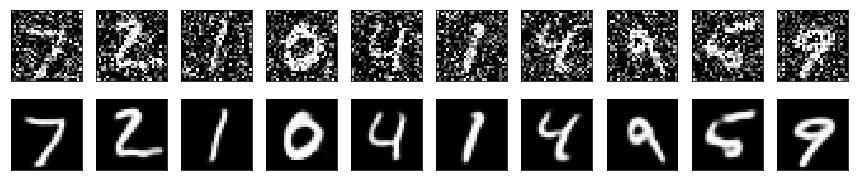

In [19]:
denoised_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(15, 3))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

